In [2]:
import pandas as pd

import seaborn as sns

import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
#from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import os

path= 'C:/Users/mrams/Downloads'
os.chdir(path)

train = pd.read_csv("train.csv")
train['emotion'] = train['emotion'].astype('category')

test = pd.read_csv("test.csv")
test['emotion'] = test['emotion'].astype('category')

val = pd.read_csv("val.csv")
val['emotion'] = val['emotion'].astype('category')

all_frames = [train, test, val]
result = pd.concat(all_frames)
print(result.shape)

def preprocess(text):
    text = text.lower() 
    text=text.strip()  #get rid of leading/trailing whitespace 
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace 
    
    return text

def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

wl = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

def finalpreprocess_stop(string):
    return lemmatizer(stopword(preprocess(string)))

def finalpreprocess(string):
    return lemmatizer(preprocess(string))

'''Call finalpreprocess() if you want to keep stopwords
Call finalpreprocess_stop() to remove stopwords'''

# train['clean_text'] = train['sentence'].apply(lambda x: finalpreprocess_stop(x))
# test['clean_text'] = test['sentence'].apply(lambda x: finalpreprocess_stop(x))
# val['clean_text'] = val['sentence'].apply(lambda x: finalpreprocess_stop(x))
result['clean_text'] = result['sentence'].apply(lambda x: finalpreprocess_stop(x))

# X_train, y_train = train.clean_text, train.emotion
# X_test, y_test = test.clean_text, test.emotion
# X_val, y_val = val.clean_text, val.emotion

# '''Vectorizers'''
# tfidf_vectorizer = TfidfVectorizer(use_idf=True)
# count_vectorizer = CountVectorizer()

# '''Call for tfidf vs countvect'''
# #TFIDF
# X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences 
# # Only transform x_test (not fit and transform)
# X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test) #Don't fit() your TfidfVectorizer to your test data: it will 
# #change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data-
# #fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without 
# #it, and the have compatible
# X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val)

# #CountVect
# X_train_vectors_cv = count_vectorizer.fit_transform(X_train)
# X_test_vectors_cv = count_vectorizer.transform(X_test)
# X_val_vectors_cv = count_vectorizer.transform(X_val)

C:\Users\mrams\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mrams\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


(20000, 2)


In [3]:
# need data to just be in a list to test this one
data = result['sentence'].tolist()
print(data)

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy', 'ive been feeling a little burdened lately wasnt sure why that was', 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny', 'i feel as confused about life as a teenager or as jaded as a year old man', 'i have been with petronas for years i feel that petronas has performed well and made a huge profit', 'i feel romantic too', 'i feel like i have to make the suffering i m seeing mean something', 'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter', 'i think it s the easiest time of year to feel dissatisfied', 'i feel low energy i m just thirsty', 'i have i

In [5]:
# use of a pre-trained model from Hugging Face Hub
# https://huggingface.co/blog/sentiment-analysis-python
from transformers import pipeline

s_pipe = pipeline("sentiment-analysis")

final_assignments = s_pipe(data)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [4]:
# print(final_assignments)
# saving results so I don't need to run them again
final_assign2 = [{'label': 'POSITIVE', 'score': 0.8913365602493286}, {'label': 'POSITIVE', 'score': 0.9665510058403015}, {'label': 'NEGATIVE', 'score': 0.9993053674697876}, {'label': 'POSITIVE', 'score': 0.9657970666885376}, {'label': 'NEGATIVE', 'score': 0.9993914365768433}, {'label': 'NEGATIVE', 'score': 0.9970654845237732}, {'label': 'POSITIVE', 'score': 0.9976455569267273}, {'label': 'NEGATIVE', 'score': 0.9942157864570618}, {'label': 'POSITIVE', 'score': 0.9997748732566833}, {'label': 'POSITIVE', 'score': 0.9982689619064331}, {'label': 'NEGATIVE', 'score': 0.9991733431816101}, {'label': 'POSITIVE', 'score': 0.9954919815063477}, {'label': 'NEGATIVE', 'score': 0.9960087537765503}, {'label': 'NEGATIVE', 'score': 0.9994869232177734}, {'label': 'POSITIVE', 'score': 0.8505792021751404}, {'label': 'NEGATIVE', 'score': 0.9986296892166138}, {'label': 'NEGATIVE', 'score': 0.9801394939422607}, {'label': 'NEGATIVE', 'score': 0.9997668862342834}, {'label': 'POSITIVE', 'score': 0.9944173097610474}, {'label': 'NEGATIVE', 'score': 0.9994459748268127}, {'label': 'NEGATIVE', 'score': 0.9997004270553589}, {'label': 'POSITIVE', 'score': 0.9990422129631042}, {'label': 'POSITIVE', 'score': 0.9998666048049927}, {'label': 'POSITIVE', 'score': 0.9997517466545105}, {'label': 'NEGATIVE', 'score': 0.9993758797645569}, {'label': 'NEGATIVE', 'score': 0.9720817804336548}, {'label': 'NEGATIVE', 'score': 0.9997740387916565}, {'label': 'NEGATIVE', 'score': 0.9996298551559448}, {'label': 'NEGATIVE', 'score': 0.9995662569999695}, {'label': 'NEGATIVE', 'score': 0.9926649928092957}, {'label': 'POSITIVE', 'score': 0.9996635913848877}, {'label': 'NEGATIVE', 'score': 0.9963586926460266}, {'label': 'POSITIVE', 'score': 0.9961624145507812}, {'label': 'NEGATIVE', 'score': 0.9933538436889648}, {'label': 'POSITIVE', 'score': 0.503532886505127}, {'label': 'NEGATIVE', 'score': 0.9995610117912292}, {'label': 'NEGATIVE', 'score': 0.8822051286697388}, {'label': 'NEGATIVE', 'score': 0.9706337451934814}, {'label': 'NEGATIVE', 'score': 0.9780110120773315}, {'label': 'NEGATIVE', 'score': 0.9815829396247864}, {'label': 'POSITIVE', 'score': 0.9998621940612793}, {'label': 'POSITIVE', 'score': 0.9930728077888489}, {'label': 'POSITIVE', 'score': 0.993732750415802}, {'label': 'POSITIVE', 'score': 0.9985743761062622}, {'label': 'NEGATIVE', 'score': 0.9981673955917358}, {'label': 'NEGATIVE', 'score': 0.9997459053993225}, {'label': 'POSITIVE', 'score': 0.9887758493423462}, {'label': 'POSITIVE', 'score': 0.9985936284065247}, {'label': 'POSITIVE', 'score': 0.9642019271850586}, {'label': 'POSITIVE', 'score': 0.5752887725830078}, {'label': 'POSITIVE', 'score': 0.9337073564529419}, {'label': 'NEGATIVE', 'score': 0.9995771050453186}, {'label': 'NEGATIVE', 'score': 0.999582827091217}, {'label': 'NEGATIVE', 'score': 0.9994502663612366}, {'label': 'POSITIVE', 'score': 0.9994344115257263}, {'label': 'NEGATIVE', 'score': 0.9996752738952637}, {'label': 'NEGATIVE', 'score': 0.9996862411499023}, {'label': 'POSITIVE', 'score': 0.9998220801353455}, {'label': 'NEGATIVE', 'score': 0.9996248483657837}, {'label': 'POSITIVE', 'score': 0.999861478805542}, {'label': 'NEGATIVE', 'score': 0.9909408688545227}, {'label': 'POSITIVE', 'score': 0.9951960444450378}, {'label': 'NEGATIVE', 'score': 0.9971997737884521}, {'label': 'NEGATIVE', 'score': 0.9863229990005493}, {'label': 'POSITIVE', 'score': 0.9998751878738403}, {'label': 'NEGATIVE', 'score': 0.9324787855148315}, {'label': 'NEGATIVE', 'score': 0.9883049726486206}, {'label': 'NEGATIVE', 'score': 0.9794127941131592}, {'label': 'NEGATIVE', 'score': 0.9974513649940491}, {'label': 'POSITIVE', 'score': 0.9996459484100342}, {'label': 'POSITIVE', 'score': 0.9997463822364807}, {'label': 'NEGATIVE', 'score': 0.9935907125473022}, {'label': 'POSITIVE', 'score': 0.994976282119751}, {'label': 'POSITIVE', 'score': 0.9944755434989929}, {'label': 'NEGATIVE', 'score': 0.9997957348823547}, {'label': 'NEGATIVE', 'score': 0.9998127818107605}, {'label': 'POSITIVE', 'score': 0.9974370002746582}, {'label': 'POSITIVE', 'score': 0.9968419075012207}, {'label': 'POSITIVE', 'score': 0.9998785257339478}, {'label': 'NEGATIVE', 'score': 0.9980477094650269}, {'label': 'NEGATIVE', 'score': 0.9997898936271667}, {'label': 'NEGATIVE', 'score': 0.9942481517791748}, {'label': 'POSITIVE', 'score': 0.9983627200126648}, {'label': 'NEGATIVE', 'score': 0.9883449077606201}, {'label': 'POSITIVE', 'score': 0.9998849630355835}, {'label': 'POSITIVE', 'score': 0.9971342086791992}, {'label': 'NEGATIVE', 'score': 0.9996596574783325}, {'label': 'POSITIVE', 'score': 0.9991408586502075}, {'label': 'NEGATIVE', 'score': 0.9997329115867615}, {'label': 'POSITIVE', 'score': 0.9905598759651184}, {'label': 'POSITIVE', 'score': 0.9992960691452026}, {'label': 'NEGATIVE', 'score': 0.9980826377868652}, {'label': 'POSITIVE', 'score': 0.9841992855072021}, {'label': 'POSITIVE', 'score': 0.9132087826728821}, {'label': 'POSITIVE', 'score': 0.9971814155578613}, {'label': 'NEGATIVE', 'score': 0.9996100068092346}, {'label': 'POSITIVE', 'score': 0.9381905198097229}, {'label': 'POSITIVE', 'score': 0.9986639022827148}, {'label': 'NEGATIVE', 'score': 0.9945101737976074}, {'label': 'POSITIVE', 'score': 0.9952722191810608}, {'label': 'POSITIVE', 'score': 0.9958401918411255}, {'label': 'POSITIVE', 'score': 0.9998846054077148}, {'label': 'POSITIVE', 'score': 0.999749481678009}, {'label': 'POSITIVE', 'score': 0.9998394250869751}, {'label': 'POSITIVE', 'score': 0.9429304003715515}, {'label': 'POSITIVE', 'score': 0.991675078868866}, {'label': 'NEGATIVE', 'score': 0.9985117316246033}, {'label': 'POSITIVE', 'score': 0.9948480129241943}, {'label': 'POSITIVE', 'score': 0.9915551543235779}, {'label': 'NEGATIVE', 'score': 0.997497022151947}, {'label': 'NEGATIVE', 'score': 0.9976544976234436}, {'label': 'POSITIVE', 'score': 0.9993860721588135}, {'label': 'NEGATIVE', 'score': 0.9824302196502686}, {'label': 'NEGATIVE', 'score': 0.941811203956604}, {'label': 'POSITIVE', 'score': 0.9992369413375854}, {'label': 'POSITIVE', 'score': 0.9990198612213135}, {'label': 'POSITIVE', 'score': 0.9998711347579956}, {'label': 'POSITIVE', 'score': 0.9997267127037048}, {'label': 'POSITIVE', 'score': 0.999516487121582}, {'label': 'POSITIVE', 'score': 0.999671459197998}, {'label': 'POSITIVE', 'score': 0.9732486009597778}, {'label': 'NEGATIVE', 'score': 0.9990121126174927}, {'label': 'POSITIVE', 'score': 0.8028091192245483}, {'label': 'NEGATIVE', 'score': 0.9986086487770081}, {'label': 'POSITIVE', 'score': 0.9998310804367065}, {'label': 'POSITIVE', 'score': 0.9883009791374207}, {'label': 'POSITIVE', 'score': 0.9950541257858276}, {'label': 'NEGATIVE', 'score': 0.9704556465148926}, {'label': 'NEGATIVE', 'score': 0.9825353622436523}, {'label': 'NEGATIVE', 'score': 0.990359902381897}, {'label': 'POSITIVE', 'score': 0.9997720122337341}, {'label': 'POSITIVE', 'score': 0.9996975660324097}, {'label': 'POSITIVE', 'score': 0.9998657703399658}, {'label': 'POSITIVE', 'score': 0.9875763654708862}, {'label': 'NEGATIVE', 'score': 0.9996565580368042}, {'label': 'NEGATIVE', 'score': 0.9960928559303284}, {'label': 'POSITIVE', 'score': 0.9994902610778809}, {'label': 'NEGATIVE', 'score': 0.8485938310623169}, {'label': 'POSITIVE', 'score': 0.9908470511436462}, {'label': 'NEGATIVE', 'score': 0.9984499216079712}, {'label': 'NEGATIVE', 'score': 0.9536579251289368}, {'label': 'NEGATIVE', 'score': 0.9994588494300842}, {'label': 'NEGATIVE', 'score': 0.999000608921051}, {'label': 'NEGATIVE', 'score': 0.9982566237449646}, {'label': 'POSITIVE', 'score': 0.9973576664924622}, {'label': 'NEGATIVE', 'score': 0.9991503953933716}, {'label': 'NEGATIVE', 'score': 0.9474840760231018}, {'label': 'NEGATIVE', 'score': 0.9996892213821411}, {'label': 'NEGATIVE', 'score': 0.9089608788490295}, {'label': 'NEGATIVE', 'score': 0.9964015483856201}, {'label': 'NEGATIVE', 'score': 0.9836783409118652}, {'label': 'NEGATIVE', 'score': 0.9985565543174744}, {'label': 'NEGATIVE', 'score': 0.9965564012527466}, {'label': 'NEGATIVE', 'score': 0.9963666200637817}, {'label': 'NEGATIVE', 'score': 0.9952645301818848}, {'label': 'NEGATIVE', 'score': 0.9969300627708435}, {'label': 'NEGATIVE', 'score': 0.9207955002784729}, {'label': 'NEGATIVE', 'score': 0.9991466999053955}, {'label': 'POSITIVE', 'score': 0.993388295173645}, {'label': 'POSITIVE', 'score': 0.9987260699272156}, {'label': 'NEGATIVE', 'score': 0.9338666796684265}, {'label': 'POSITIVE', 'score': 0.9533737897872925}, {'label': 'NEGATIVE', 'score': 0.982984721660614}, {'label': 'NEGATIVE', 'score': 0.9917998909950256}, {'label': 'NEGATIVE', 'score': 0.9997137188911438}, {'label': 'NEGATIVE', 'score': 0.9991592168807983}, {'label': 'NEGATIVE', 'score': 0.9964411854743958}, {'label': 'POSITIVE', 'score': 0.9992538094520569}, {'label': 'POSITIVE', 'score': 0.9997851252555847}, {'label': 'NEGATIVE', 'score': 0.9997627139091492}, {'label': 'POSITIVE', 'score': 0.9924668669700623}, {'label': 'NEGATIVE', 'score': 0.99880051612854}, {'label': 'POSITIVE', 'score': 0.9997580647468567}, {'label': 'NEGATIVE', 'score': 0.9993757605552673}, {'label': 'POSITIVE', 'score': 0.9984681010246277}, {'label': 'NEGATIVE', 'score': 0.9851987957954407}, {'label': 'NEGATIVE', 'score': 0.9955071210861206}, {'label': 'NEGATIVE', 'score': 0.995500385761261}, {'label': 'NEGATIVE', 'score': 0.9943948984146118}, {'label': 'NEGATIVE', 'score': 0.9997703433036804}, {'label': 'NEGATIVE', 'score': 0.995274007320404}, {'label': 'POSITIVE', 'score': 0.9934059381484985}, {'label': 'POSITIVE', 'score': 0.7570704221725464}, {'label': 'NEGATIVE', 'score': 0.7372176647186279}, {'label': 'POSITIVE', 'score': 0.9996322393417358}, {'label': 'NEGATIVE', 'score': 0.9978803396224976}, {'label': 'POSITIVE', 'score': 0.9995480179786682}, {'label': 'POSITIVE', 'score': 0.999784529209137}, {'label': 'POSITIVE', 'score': 0.989389955997467}, {'label': 'NEGATIVE', 'score': 0.9988082647323608}, {'label': 'POSITIVE', 'score': 0.9998424053192139}, {'label': 'POSITIVE', 'score': 0.9998642206192017}, {'label': 'POSITIVE', 'score': 0.9958561062812805}, {'label': 'POSITIVE', 'score': 0.9125759601593018}, {'label': 'NEGATIVE', 'score': 0.9959543943405151}, {'label': 'NEGATIVE', 'score': 0.9976670742034912}, {'label': 'POSITIVE', 'score': 0.9927109479904175}, {'label': 'NEGATIVE', 'score': 0.9967251420021057}, {'label': 'NEGATIVE', 'score': 0.9997343420982361}, {'label': 'POSITIVE', 'score': 0.9995713829994202}, {'label': 'POSITIVE', 'score': 0.8784475326538086}, {'label': 'POSITIVE', 'score': 0.9982075691223145}, {'label': 'POSITIVE', 'score': 0.9755703210830688}, {'label': 'NEGATIVE', 'score': 0.9991334080696106}, {'label': 'NEGATIVE', 'score': 0.9980491399765015}, {'label': 'NEGATIVE', 'score': 0.9933555126190186}, {'label': 'POSITIVE', 'score': 0.9062066078186035}, {'label': 'NEGATIVE', 'score': 0.9761055111885071}, {'label': 'POSITIVE', 'score': 0.9998835325241089}, {'label': 'NEGATIVE', 'score': 0.9993433356285095}, {'label': 'NEGATIVE', 'score': 0.9984985589981079}, {'label': 'POSITIVE', 'score': 0.9988798499107361}, {'label': 'POSITIVE', 'score': 0.9525294899940491}, {'label': 'NEGATIVE', 'score': 0.9997063279151917}, {'label': 'NEGATIVE', 'score': 0.9996788501739502}, {'label': 'POSITIVE', 'score': 0.9834421277046204}, {'label': 'NEGATIVE', 'score': 0.9993853569030762}, {'label': 'NEGATIVE', 'score': 0.9966471791267395}, {'label': 'NEGATIVE', 'score': 0.6488097310066223}, {'label': 'POSITIVE', 'score': 0.962611734867096}, {'label': 'NEGATIVE', 'score': 0.9956848621368408}, {'label': 'POSITIVE', 'score': 0.9965459704399109}, {'label': 'NEGATIVE', 'score': 0.9990197420120239}, {'label': 'NEGATIVE', 'score': 0.9910887479782104}, {'label': 'POSITIVE', 'score': 0.9992212057113647}, {'label': 'POSITIVE', 'score': 0.9892252087593079}, {'label': 'POSITIVE', 'score': 0.9982560276985168}, {'label': 'POSITIVE', 'score': 0.9989863038063049}, {'label': 'POSITIVE', 'score': 0.999862790107727}, {'label': 'NEGATIVE', 'score': 0.9395871758460999}, {'label': 'POSITIVE', 'score': 0.9902786612510681}, {'label': 'NEGATIVE', 'score': 0.9934892654418945}, {'label': 'POSITIVE', 'score': 0.9640535712242126}, {'label': 'NEGATIVE', 'score': 0.9974921941757202}, {'label': 'NEGATIVE', 'score': 0.9959321618080139}, {'label': 'NEGATIVE', 'score': 0.996884286403656}, {'label': 'POSITIVE', 'score': 0.9996007084846497}, {'label': 'NEGATIVE', 'score': 0.9990692734718323}, {'label': 'NEGATIVE', 'score': 0.9995457530021667}, {'label': 'NEGATIVE', 'score': 0.9989408850669861}, {'label': 'NEGATIVE', 'score': 0.9963340759277344}, {'label': 'NEGATIVE', 'score': 0.9988477230072021}, {'label': 'NEGATIVE', 'score': 0.9305359721183777}, {'label': 'POSITIVE', 'score': 0.9951202273368835}, {'label': 'NEGATIVE', 'score': 0.9993032217025757}, {'label': 'POSITIVE', 'score': 0.9998786449432373}, {'label': 'NEGATIVE', 'score': 0.9780451059341431}, {'label': 'NEGATIVE', 'score': 0.9971135854721069}, {'label': 'NEGATIVE', 'score': 0.9993383288383484}, {'label': 'NEGATIVE', 'score': 0.9251223802566528}, {'label': 'NEGATIVE', 'score': 0.9946686625480652}, {'label': 'NEGATIVE', 'score': 0.999560534954071}, {'label': 'NEGATIVE', 'score': 0.9977684020996094}, {'label': 'NEGATIVE', 'score': 0.9986925721168518}, {'label': 'NEGATIVE', 'score': 0.9972814321517944}, {'label': 'NEGATIVE', 'score': 0.9992191791534424}, {'label': 'NEGATIVE', 'score': 0.999518632888794}, {'label': 'NEGATIVE', 'score': 0.6967787146568298}, {'label': 'POSITIVE', 'score': 0.7483698725700378}, {'label': 'NEGATIVE', 'score': 0.9992519021034241}, {'label': 'POSITIVE', 'score': 0.9937345385551453}, {'label': 'NEGATIVE', 'score': 0.9973425269126892}, {'label': 'NEGATIVE', 'score': 0.9992795586585999}, {'label': 'POSITIVE', 'score': 0.9996734857559204}, {'label': 'NEGATIVE', 'score': 0.9993976354598999}, {'label': 'NEGATIVE', 'score': 0.9864987134933472}, {'label': 'POSITIVE', 'score': 0.998123824596405}, {'label': 'NEGATIVE', 'score': 0.9989131689071655}, {'label': 'NEGATIVE', 'score': 0.999521017074585}, {'label': 'NEGATIVE', 'score': 0.9997813105583191}, {'label': 'NEGATIVE', 'score': 0.9995183944702148}, {'label': 'NEGATIVE', 'score': 0.9949039220809937}, {'label': 'NEGATIVE', 'score': 0.9984912872314453}, {'label': 'NEGATIVE', 'score': 0.9930129647254944}, {'label': 'NEGATIVE', 'score': 0.7327731251716614}, {'label': 'NEGATIVE', 'score': 0.99397873878479}, {'label': 'POSITIVE', 'score': 0.9997326731681824}, {'label': 'NEGATIVE', 'score': 0.9640316367149353}, {'label': 'NEGATIVE', 'score': 0.9996507167816162}, {'label': 'NEGATIVE', 'score': 0.985936164855957}, {'label': 'NEGATIVE', 'score': 0.9943358302116394}, {'label': 'POSITIVE', 'score': 0.9771136045455933}, {'label': 'NEGATIVE', 'score': 0.9928646087646484}, {'label': 'NEGATIVE', 'score': 0.9937806725502014}, {'label': 'POSITIVE', 'score': 0.8989317417144775}, {'label': 'POSITIVE', 'score': 0.8733164668083191}, {'label': 'NEGATIVE', 'score': 0.9994307160377502}, {'label': 'NEGATIVE', 'score': 0.9978118538856506}, {'label': 'POSITIVE', 'score': 0.9154307246208191}, {'label': 'NEGATIVE', 'score': 0.9845735430717468}, {'label': 'NEGATIVE', 'score': 0.9864649772644043}, {'label': 'NEGATIVE', 'score': 0.9764382243156433}, {'label': 'POSITIVE', 'score': 0.7889133095741272}, {'label': 'POSITIVE', 'score': 0.9971913695335388}, {'label': 'POSITIVE', 'score': 0.9993836879730225}, {'label': 'NEGATIVE', 'score': 0.5151932239532471}, {'label': 'NEGATIVE', 'score': 0.9991449117660522}, {'label': 'POSITIVE', 'score': 0.999667763710022}, {'label': 'POSITIVE', 'score': 0.9746553301811218}, {'label': 'NEGATIVE', 'score': 0.9997757077217102}, {'label': 'NEGATIVE', 'score': 0.9991118311882019}, {'label': 'POSITIVE', 'score': 0.9823848605155945}, {'label': 'POSITIVE', 'score': 0.9998599290847778}, {'label': 'POSITIVE', 'score': 0.8704617023468018}, {'label': 'POSITIVE', 'score': 0.9998829364776611}, {'label': 'NEGATIVE', 'score': 0.9899473786354065}, {'label': 'NEGATIVE', 'score': 0.999254047870636}, {'label': 'NEGATIVE', 'score': 0.9988797307014465}, {'label': 'NEGATIVE', 'score': 0.9993544220924377}, {'label': 'POSITIVE', 'score': 0.9998770952224731}, {'label': 'POSITIVE', 'score': 0.921881914138794}, {'label': 'NEGATIVE', 'score': 0.997377872467041}, {'label': 'POSITIVE', 'score': 0.6843409538269043}, {'label': 'NEGATIVE', 'score': 0.7421225905418396}, {'label': 'NEGATIVE', 'score': 0.8910907506942749}, {'label': 'POSITIVE', 'score': 0.999792754650116}, {'label': 'POSITIVE', 'score': 0.9998332262039185}, {'label': 'NEGATIVE', 'score': 0.999234676361084}, {'label': 'NEGATIVE', 'score': 0.997174859046936}, {'label': 'POSITIVE', 'score': 0.9810448884963989}, {'label': 'POSITIVE', 'score': 0.9987248778343201}, {'label': 'NEGATIVE', 'score': 0.5745710134506226}, {'label': 'NEGATIVE', 'score': 0.9991683959960938}, {'label': 'NEGATIVE', 'score': 0.9988351464271545}, {'label': 'POSITIVE', 'score': 0.9986782670021057}, {'label': 'NEGATIVE', 'score': 0.985821545124054}, {'label': 'NEGATIVE', 'score': 0.9851958751678467}, {'label': 'NEGATIVE', 'score': 0.9997863173484802}, {'label': 'NEGATIVE', 'score': 0.9890286922454834}, {'label': 'POSITIVE', 'score': 0.99943608045578}, {'label': 'NEGATIVE', 'score': 0.9768176078796387}, {'label': 'POSITIVE', 'score': 0.9998753070831299}, {'label': 'NEGATIVE', 'score': 0.9945111274719238}, {'label': 'NEGATIVE', 'score': 0.9821334481239319}, {'label': 'NEGATIVE', 'score': 0.9931414723396301}, {'label': 'NEGATIVE', 'score': 0.6114452481269836}, {'label': 'POSITIVE', 'score': 0.9923101663589478}, {'label': 'NEGATIVE', 'score': 0.9363022446632385}, {'label': 'NEGATIVE', 'score': 0.969096839427948}, {'label': 'NEGATIVE', 'score': 0.9974721074104309}, {'label': 'NEGATIVE', 'score': 0.9872950911521912}, {'label': 'NEGATIVE', 'score': 0.8282288312911987}, {'label': 'NEGATIVE', 'score': 0.9991219639778137}, {'label': 'POSITIVE', 'score': 0.9997022747993469}, {'label': 'POSITIVE', 'score': 0.999819815158844}, {'label': 'POSITIVE', 'score': 0.9989269375801086}, {'label': 'NEGATIVE', 'score': 0.9986868500709534}, {'label': 'POSITIVE', 'score': 0.9996746778488159}, {'label': 'NEGATIVE', 'score': 0.9810932278633118}, {'label': 'POSITIVE', 'score': 0.987743616104126}, {'label': 'NEGATIVE', 'score': 0.9987347722053528}, {'label': 'NEGATIVE', 'score': 0.9596660733222961}, {'label': 'POSITIVE', 'score': 0.9998389482498169}, {'label': 'NEGATIVE', 'score': 0.9974260926246643}, {'label': 'POSITIVE', 'score': 0.9948375821113586}, {'label': 'NEGATIVE', 'score': 0.9975687861442566}, {'label': 'POSITIVE', 'score': 0.9858506321907043}, {'label': 'POSITIVE', 'score': 0.966839611530304}, {'label': 'NEGATIVE', 'score': 0.5169429183006287}, {'label': 'POSITIVE', 'score': 0.9998170733451843}, {'label': 'POSITIVE', 'score': 0.9998010993003845}, {'label': 'NEGATIVE', 'score': 0.999698281288147}, {'label': 'NEGATIVE', 'score': 0.9893001317977905}, {'label': 'NEGATIVE', 'score': 0.9835958480834961}, {'label': 'NEGATIVE', 'score': 0.9981428384780884}, {'label': 'NEGATIVE', 'score': 0.9993419051170349}, {'label': 'NEGATIVE', 'score': 0.9954172372817993}, {'label': 'NEGATIVE', 'score': 0.9987068176269531}, {'label': 'POSITIVE', 'score': 0.9819639921188354}, {'label': 'NEGATIVE', 'score': 0.9537256956100464}, {'label': 'POSITIVE', 'score': 0.9511972069740295}, {'label': 'POSITIVE', 'score': 0.9998636245727539}, {'label': 'NEGATIVE', 'score': 0.9989448189735413}, {'label': 'NEGATIVE', 'score': 0.9983483552932739}, {'label': 'NEGATIVE', 'score': 0.9945611357688904}, {'label': 'POSITIVE', 'score': 0.9973969459533691}, {'label': 'POSITIVE', 'score': 0.9991779923439026}, {'label': 'NEGATIVE', 'score': 0.9903578162193298}, {'label': 'POSITIVE', 'score': 0.9998798370361328}, {'label': 'POSITIVE', 'score': 0.9995335340499878}, {'label': 'NEGATIVE', 'score': 0.9971234202384949}, {'label': 'NEGATIVE', 'score': 0.9960780739784241}, {'label': 'POSITIVE', 'score': 0.9996597766876221}, {'label': 'POSITIVE', 'score': 0.9978533387184143}, {'label': 'POSITIVE', 'score': 0.8169623613357544}, {'label': 'NEGATIVE', 'score': 0.9944412112236023}, {'label': 'POSITIVE', 'score': 0.9991967082023621}, {'label': 'POSITIVE', 'score': 0.9993587136268616}, {'label': 'POSITIVE', 'score': 0.9840907454490662}, {'label': 'POSITIVE', 'score': 0.9102832674980164}, {'label': 'NEGATIVE', 'score': 0.5462439656257629}, {'label': 'NEGATIVE', 'score': 0.998102605342865}, {'label': 'NEGATIVE', 'score': 0.9894976615905762}, {'label': 'NEGATIVE', 'score': 0.9996579885482788}, {'label': 'POSITIVE', 'score': 0.559492290019989}, {'label': 'POSITIVE', 'score': 0.9987891316413879}, {'label': 'NEGATIVE', 'score': 0.6128625869750977}, {'label': 'NEGATIVE', 'score': 0.9000872373580933}, {'label': 'POSITIVE', 'score': 0.9996881484985352}, {'label': 'NEGATIVE', 'score': 0.9997633099555969}, {'label': 'POSITIVE', 'score': 0.9981275200843811}, {'label': 'NEGATIVE', 'score': 0.9974410533905029}, {'label': 'NEGATIVE', 'score': 0.9821088314056396}, {'label': 'POSITIVE', 'score': 0.9991451501846313}, {'label': 'NEGATIVE', 'score': 0.9992967844009399}, {'label': 'NEGATIVE', 'score': 0.9996639490127563}, {'label': 'POSITIVE', 'score': 0.9998040795326233}, {'label': 'NEGATIVE', 'score': 0.6210618615150452}, {'label': 'NEGATIVE', 'score': 0.9485577940940857}, {'label': 'POSITIVE', 'score': 0.9921028017997742}, {'label': 'NEGATIVE', 'score': 0.9995507597923279}, {'label': 'NEGATIVE', 'score': 0.9992008805274963}, {'label': 'POSITIVE', 'score': 0.9977411031723022}, {'label': 'POSITIVE', 'score': 0.9910116195678711}, {'label': 'NEGATIVE', 'score': 0.9997723698616028}, {'label': 'POSITIVE', 'score': 0.5343572497367859}, {'label': 'NEGATIVE', 'score': 0.992141604423523}, {'label': 'POSITIVE', 'score': 0.9992914199829102}, {'label': 'NEGATIVE', 'score': 0.998794674873352}, {'label': 'POSITIVE', 'score': 0.998659610748291}, {'label': 'POSITIVE', 'score': 0.9993228912353516}, {'label': 'POSITIVE', 'score': 0.9902524948120117}, {'label': 'POSITIVE', 'score': 0.9998842477798462}, {'label': 'NEGATIVE', 'score': 0.9943232536315918}, {'label': 'NEGATIVE', 'score': 0.9983676075935364}, {'label': 'NEGATIVE', 'score': 0.9997895359992981}, {'label': 'NEGATIVE', 'score': 0.9992740750312805}, {'label': 'POSITIVE', 'score': 0.9996947050094604}, {'label': 'POSITIVE', 'score': 0.9998685121536255}, {'label': 'POSITIVE', 'score': 0.796112596988678}, {'label': 'POSITIVE', 'score': 0.9993058443069458}, {'label': 'NEGATIVE', 'score': 0.9980554580688477}, {'label': 'POSITIVE', 'score': 0.9958816766738892}, {'label': 'NEGATIVE', 'score': 0.9604005217552185}, {'label': 'NEGATIVE', 'score': 0.9978380799293518}, {'label': 'NEGATIVE', 'score': 0.9979986548423767}, {'label': 'NEGATIVE', 'score': 0.9755986332893372}, {'label': 'POSITIVE', 'score': 0.9977374076843262}, {'label': 'NEGATIVE', 'score': 0.9789447784423828}, {'label': 'NEGATIVE', 'score': 0.9995773434638977}, {'label': 'NEGATIVE', 'score': 0.9990567564964294}, {'label': 'NEGATIVE', 'score': 0.9960659146308899}, {'label': 'NEGATIVE', 'score': 0.7453696727752686}, {'label': 'NEGATIVE', 'score': 0.9976450800895691}, {'label': 'POSITIVE', 'score': 0.9989637136459351}, {'label': 'NEGATIVE', 'score': 0.9995837807655334}, {'label': 'POSITIVE', 'score': 0.9995728135108948}, {'label': 'POSITIVE', 'score': 0.997548520565033}, {'label': 'NEGATIVE', 'score': 0.7967778444290161}, {'label': 'POSITIVE', 'score': 0.9996188879013062}, {'label': 'POSITIVE', 'score': 0.9925969839096069}, {'label': 'NEGATIVE', 'score': 0.994515597820282}, {'label': 'NEGATIVE', 'score': 0.9758574366569519}, {'label': 'NEGATIVE', 'score': 0.9870885014533997}, {'label': 'NEGATIVE', 'score': 0.9574632048606873}, {'label': 'NEGATIVE', 'score': 0.9989932179450989}, {'label': 'POSITIVE', 'score': 0.9997733235359192}, {'label': 'NEGATIVE', 'score': 0.9898231625556946}, {'label': 'NEGATIVE', 'score': 0.9993213415145874}, {'label': 'POSITIVE', 'score': 0.9697082042694092}, {'label': 'POSITIVE', 'score': 0.9998818635940552}, {'label': 'NEGATIVE', 'score': 0.9952225089073181}, {'label': 'NEGATIVE', 'score': 0.9997101426124573}, {'label': 'NEGATIVE', 'score': 0.9985713958740234}, {'label': 'NEGATIVE', 'score': 0.9991439580917358}, {'label': 'POSITIVE', 'score': 0.9997708201408386}, {'label': 'NEGATIVE', 'score': 0.9978432655334473}, {'label': 'NEGATIVE', 'score': 0.9984982013702393}, {'label': 'NEGATIVE', 'score': 0.8914248943328857}, {'label': 'NEGATIVE', 'score': 0.9961244463920593}, {'label': 'POSITIVE', 'score': 0.9996269941329956}, {'label': 'NEGATIVE', 'score': 0.9986162185668945}, {'label': 'POSITIVE', 'score': 0.666318416595459}, {'label': 'POSITIVE', 'score': 0.9930272698402405}, {'label': 'POSITIVE', 'score': 0.9983786344528198}, {'label': 'POSITIVE', 'score': 0.9994497895240784}, {'label': 'NEGATIVE', 'score': 0.9981995820999146}, {'label': 'NEGATIVE', 'score': 0.9820885062217712}, {'label': 'NEGATIVE', 'score': 0.9991893172264099}, {'label': 'NEGATIVE', 'score': 0.9924054741859436}, {'label': 'NEGATIVE', 'score': 0.9959887862205505}, {'label': 'POSITIVE', 'score': 0.9995546936988831}, {'label': 'NEGATIVE', 'score': 0.997343122959137}, {'label': 'NEGATIVE', 'score': 0.9828413724899292}, {'label': 'POSITIVE', 'score': 0.9990478157997131}, {'label': 'NEGATIVE', 'score': 0.9985180497169495}, {'label': 'NEGATIVE', 'score': 0.9938884377479553}, {'label': 'POSITIVE', 'score': 0.9992139339447021}, {'label': 'NEGATIVE', 'score': 0.9990037083625793}, {'label': 'NEGATIVE', 'score': 0.6802037358283997}, {'label': 'POSITIVE', 'score': 0.9997997879981995}, {'label': 'NEGATIVE', 'score': 0.9996380805969238}, {'label': 'NEGATIVE', 'score': 0.9950324296951294}, {'label': 'POSITIVE', 'score': 0.9989402890205383}, {'label': 'NEGATIVE', 'score': 0.9992997646331787}, {'label': 'POSITIVE', 'score': 0.9986199140548706}, {'label': 'NEGATIVE', 'score': 0.9991334080696106}, {'label': 'NEGATIVE', 'score': 0.9953054189682007}, {'label': 'NEGATIVE', 'score': 0.8261014819145203}, {'label': 'POSITIVE', 'score': 0.9990254640579224}, {'label': 'POSITIVE', 'score': 0.9997498393058777}, {'label': 'NEGATIVE', 'score': 0.9995031356811523}, {'label': 'NEGATIVE', 'score': 0.9840944409370422}, {'label': 'NEGATIVE', 'score': 0.999703586101532}, {'label': 'POSITIVE', 'score': 0.9996211528778076}, {'label': 'NEGATIVE', 'score': 0.9996534585952759}, {'label': 'NEGATIVE', 'score': 0.6679645776748657}, {'label': 'POSITIVE', 'score': 0.9994055032730103}, {'label': 'POSITIVE', 'score': 0.9995359182357788}, {'label': 'NEGATIVE', 'score': 0.8975251317024231}, {'label': 'NEGATIVE', 'score': 0.8091188073158264}, {'label': 'POSITIVE', 'score': 0.9998905658721924}, {'label': 'NEGATIVE', 'score': 0.9757699966430664}, {'label': 'NEGATIVE', 'score': 0.7451605200767517}, {'label': 'POSITIVE', 'score': 0.999258816242218}, {'label': 'NEGATIVE', 'score': 0.9841311573982239}, {'label': 'NEGATIVE', 'score': 0.9997097849845886}, {'label': 'POSITIVE', 'score': 0.9994818568229675}, {'label': 'POSITIVE', 'score': 0.9953843951225281}, {'label': 'NEGATIVE', 'score': 0.9992731213569641}, {'label': 'NEGATIVE', 'score': 0.998158872127533}, {'label': 'POSITIVE', 'score': 0.9984063506126404}, {'label': 'POSITIVE', 'score': 0.9996473789215088}, {'label': 'NEGATIVE', 'score': 0.9965378046035767}, {'label': 'POSITIVE', 'score': 0.8993432521820068}, {'label': 'NEGATIVE', 'score': 0.546597957611084}, {'label': 'NEGATIVE', 'score': 0.9957043528556824}, {'label': 'POSITIVE', 'score': 0.8006006479263306}, {'label': 'NEGATIVE', 'score': 0.9998020529747009}, {'label': 'NEGATIVE', 'score': 0.9962857961654663}, {'label': 'NEGATIVE', 'score': 0.9997872710227966}, {'label': 'NEGATIVE', 'score': 0.9757292866706848}, {'label': 'NEGATIVE', 'score': 0.9997586607933044}, {'label': 'NEGATIVE', 'score': 0.998980700969696}, {'label': 'NEGATIVE', 'score': 0.9995657801628113}, {'label': 'NEGATIVE', 'score': 0.9877007007598877}, {'label': 'NEGATIVE', 'score': 0.9983419179916382}, {'label': 'NEGATIVE', 'score': 0.9988654851913452}, {'label': 'NEGATIVE', 'score': 0.998618483543396}, {'label': 'POSITIVE', 'score': 0.9959942102432251}, {'label': 'NEGATIVE', 'score': 0.9921227097511292}, {'label': 'POSITIVE', 'score': 0.9998403787612915}, {'label': 'NEGATIVE', 'score': 0.9966354966163635}, {'label': 'POSITIVE', 'score': 0.929366409778595}, {'label': 'NEGATIVE', 'score': 0.9327089190483093}, {'label': 'POSITIVE', 'score': 0.9652023315429688}, {'label': 'NEGATIVE', 'score': 0.9992964267730713}, {'label': 'POSITIVE', 'score': 0.9989385008811951}, {'label': 'POSITIVE', 'score': 0.9848004579544067}, {'label': 'POSITIVE', 'score': 0.9735577702522278}, {'label': 'NEGATIVE', 'score': 0.9994416832923889}, {'label': 'NEGATIVE', 'score': 0.9997500777244568}, {'label': 'POSITIVE', 'score': 0.9995689988136292}, {'label': 'POSITIVE', 'score': 0.9265057444572449}, {'label': 'NEGATIVE', 'score': 0.988602340221405}, {'label': 'POSITIVE', 'score': 0.9998314380645752}, {'label': 'POSITIVE', 'score': 0.9998584985733032}, {'label': 'NEGATIVE', 'score': 0.9682585000991821}, {'label': 'NEGATIVE', 'score': 0.8514094948768616}, {'label': 'NEGATIVE', 'score': 0.9798614978790283}, {'label': 'NEGATIVE', 'score': 0.9791396856307983}, {'label': 'POSITIVE', 'score': 0.9677141904830933}, {'label': 'POSITIVE', 'score': 0.6931087970733643}, {'label': 'NEGATIVE', 'score': 0.9996433258056641}, {'label': 'NEGATIVE', 'score': 0.9994476437568665}, {'label': 'NEGATIVE', 'score': 0.9949072003364563}, {'label': 'NEGATIVE', 'score': 0.9985008239746094}, {'label': 'POSITIVE', 'score': 0.9888492822647095}, {'label': 'POSITIVE', 'score': 0.9884628653526306}, {'label': 'NEGATIVE', 'score': 0.9960458874702454}, {'label': 'NEGATIVE', 'score': 0.9992159605026245}, {'label': 'NEGATIVE', 'score': 0.9987984895706177}, {'label': 'POSITIVE', 'score': 0.9993485808372498}, {'label': 'NEGATIVE', 'score': 0.999494194984436}, {'label': 'NEGATIVE', 'score': 0.9997572302818298}, {'label': 'NEGATIVE', 'score': 0.9970757961273193}, {'label': 'POSITIVE', 'score': 0.9995704293251038}, {'label': 'NEGATIVE', 'score': 0.9978984594345093}, {'label': 'NEGATIVE', 'score': 0.981549084186554}, {'label': 'POSITIVE', 'score': 0.9819252490997314}, {'label': 'POSITIVE', 'score': 0.7426232695579529}, {'label': 'NEGATIVE', 'score': 0.9967825412750244}, {'label': 'NEGATIVE', 'score': 0.99980229139328}, {'label': 'NEGATIVE', 'score': 0.9993960857391357}, {'label': 'NEGATIVE', 'score': 0.9761354923248291}, {'label': 'NEGATIVE', 'score': 0.9996715784072876}, {'label': 'NEGATIVE', 'score': 0.9941377639770508}, {'label': 'POSITIVE', 'score': 0.9997205138206482}, {'label': 'POSITIVE', 'score': 0.9948563575744629}, {'label': 'NEGATIVE', 'score': 0.9997623562812805}, {'label': 'POSITIVE', 'score': 0.9880273342132568}, {'label': 'POSITIVE', 'score': 0.9990000128746033}, {'label': 'NEGATIVE', 'score': 0.9984729886054993}, {'label': 'NEGATIVE', 'score': 0.9987717270851135}, {'label': 'NEGATIVE', 'score': 0.9984034895896912}, {'label': 'NEGATIVE', 'score': 0.9997001886367798}, {'label': 'NEGATIVE', 'score': 0.9997668862342834}, {'label': 'POSITIVE', 'score': 0.5788783431053162}, {'label': 'POSITIVE', 'score': 0.9998868703842163}, {'label': 'NEGATIVE', 'score': 0.9904802441596985}, {'label': 'NEGATIVE', 'score': 0.9991363883018494}, {'label': 'NEGATIVE', 'score': 0.9996740818023682}, {'label': 'NEGATIVE', 'score': 0.9721064567565918}, {'label': 'NEGATIVE', 'score': 0.9770874977111816}, {'label': 'NEGATIVE', 'score': 0.9991464614868164}, {'label': 'NEGATIVE', 'score': 0.9974979758262634}, {'label': 'NEGATIVE', 'score': 0.9854649901390076}, {'label': 'POSITIVE', 'score': 0.9684756994247437}, {'label': 'NEGATIVE', 'score': 0.9996559619903564}, {'label': 'NEGATIVE', 'score': 0.9977819323539734}, {'label': 'NEGATIVE', 'score': 0.9993849992752075}, {'label': 'POSITIVE', 'score': 0.9997422099113464}, {'label': 'POSITIVE', 'score': 0.999470055103302}, {'label': 'NEGATIVE', 'score': 0.9745374917984009}, {'label': 'NEGATIVE', 'score': 0.9949508905410767}, {'label': 'POSITIVE', 'score': 0.9998466968536377}, {'label': 'NEGATIVE', 'score': 0.9995092153549194}, {'label': 'NEGATIVE', 'score': 0.9883900880813599}, {'label': 'NEGATIVE', 'score': 0.9990481734275818}, {'label': 'NEGATIVE', 'score': 0.9993615746498108}, {'label': 'POSITIVE', 'score': 0.9941376447677612}, {'label': 'NEGATIVE', 'score': 0.9358266592025757}, {'label': 'NEGATIVE', 'score': 0.9995410442352295}, {'label': 'POSITIVE', 'score': 0.9998348951339722}, {'label': 'POSITIVE', 'score': 0.9838498830795288}, {'label': 'POSITIVE', 'score': 0.9880708456039429}, {'label': 'POSITIVE', 'score': 0.9998867511749268}, {'label': 'NEGATIVE', 'score': 0.9990647435188293}, {'label': 'NEGATIVE', 'score': 0.9951287508010864}, {'label': 'NEGATIVE', 'score': 0.9927383065223694}, {'label': 'NEGATIVE', 'score': 0.9959322810173035}, {'label': 'NEGATIVE', 'score': 0.9929788708686829}, {'label': 'NEGATIVE', 'score': 0.9808104634284973}, {'label': 'NEGATIVE', 'score': 0.9772433638572693}, {'label': 'POSITIVE', 'score': 0.9980508089065552}, {'label': 'POSITIVE', 'score': 0.9998179078102112}, {'label': 'NEGATIVE', 'score': 0.9996533393859863}, {'label': 'NEGATIVE', 'score': 0.9994872808456421}, {'label': 'POSITIVE', 'score': 0.9952860474586487}, {'label': 'NEGATIVE', 'score': 0.9903776049613953}, {'label': 'POSITIVE', 'score': 0.9282000660896301}, {'label': 'POSITIVE', 'score': 0.9851871132850647}, {'label': 'NEGATIVE', 'score': 0.999652624130249}, {'label': 'NEGATIVE', 'score': 0.9997267127037048}, {'label': 'NEGATIVE', 'score': 0.9788169264793396}, {'label': 'NEGATIVE', 'score': 0.9997215867042542}, {'label': 'POSITIVE', 'score': 0.7550050616264343}, {'label': 'NEGATIVE', 'score': 0.9983183145523071}, {'label': 'POSITIVE', 'score': 0.9684000015258789}, {'label': 'POSITIVE', 'score': 0.9857169389724731}, {'label': 'NEGATIVE', 'score': 0.999021053314209}, {'label': 'POSITIVE', 'score': 0.9937344193458557}, {'label': 'POSITIVE', 'score': 0.9994008541107178}, {'label': 'POSITIVE', 'score': 0.9997981190681458}, {'label': 'POSITIVE', 'score': 0.9956674575805664}, {'label': 'POSITIVE', 'score': 0.9974092841148376}, {'label': 'POSITIVE', 'score': 0.9993288516998291}, {'label': 'POSITIVE', 'score': 0.5877714157104492}, {'label': 'NEGATIVE', 'score': 0.9997209906578064}, {'label': 'POSITIVE', 'score': 0.9998719692230225}, {'label': 'POSITIVE', 'score': 0.9995984435081482}, {'label': 'NEGATIVE', 'score': 0.999184787273407}, {'label': 'NEGATIVE', 'score': 0.9994025230407715}, {'label': 'POSITIVE', 'score': 0.9998632669448853}, {'label': 'NEGATIVE', 'score': 0.9983395338058472}, {'label': 'NEGATIVE', 'score': 0.9991983771324158}, {'label': 'NEGATIVE', 'score': 0.9878580570220947}, {'label': 'POSITIVE', 'score': 0.9798312783241272}, {'label': 'POSITIVE', 'score': 0.994597315788269}, {'label': 'NEGATIVE', 'score': 0.997137188911438}, {'label': 'POSITIVE', 'score': 0.9997168183326721}, {'label': 'POSITIVE', 'score': 0.9992784857749939}, {'label': 'NEGATIVE', 'score': 0.9931321740150452}, {'label': 'NEGATIVE', 'score': 0.9995160102844238}, {'label': 'NEGATIVE', 'score': 0.992625892162323}, {'label': 'POSITIVE', 'score': 0.9966551065444946}, {'label': 'POSITIVE', 'score': 0.9844617247581482}, {'label': 'NEGATIVE', 'score': 0.9944359064102173}, {'label': 'POSITIVE', 'score': 0.9996063113212585}, {'label': 'NEGATIVE', 'score': 0.9993370175361633}, {'label': 'NEGATIVE', 'score': 0.9920990467071533}, {'label': 'NEGATIVE', 'score': 0.9991113543510437}, {'label': 'NEGATIVE', 'score': 0.9971991777420044}, {'label': 'NEGATIVE', 'score': 0.999372661113739}, {'label': 'NEGATIVE', 'score': 0.9963808655738831}, {'label': 'NEGATIVE', 'score': 0.9997369647026062}, {'label': 'POSITIVE', 'score': 0.9997914433479309}, {'label': 'NEGATIVE', 'score': 0.9996022582054138}, {'label': 'POSITIVE', 'score': 0.9938247203826904}, {'label': 'POSITIVE', 'score': 0.9990070462226868}, {'label': 'NEGATIVE', 'score': 0.9995909333229065}, {'label': 'NEGATIVE', 'score': 0.9997128844261169}, {'label': 'NEGATIVE', 'score': 0.9209928512573242}, {'label': 'NEGATIVE', 'score': 0.9965711832046509}, {'label': 'POSITIVE', 'score': 0.9998251795768738}, {'label': 'NEGATIVE', 'score': 0.9989995360374451}, {'label': 'NEGATIVE', 'score': 0.8542337417602539}, {'label': 'NEGATIVE', 'score': 0.9991195797920227}, {'label': 'POSITIVE', 'score': 0.9996978044509888}, {'label': 'POSITIVE', 'score': 0.9992664456367493}, {'label': 'POSITIVE', 'score': 0.9995879530906677}, {'label': 'NEGATIVE', 'score': 0.9887110590934753}, {'label': 'NEGATIVE', 'score': 0.93658846616745}, {'label': 'NEGATIVE', 'score': 0.9920263886451721}, {'label': 'NEGATIVE', 'score': 0.998748779296875}, {'label': 'NEGATIVE', 'score': 0.9996155500411987}, {'label': 'POSITIVE', 'score': 0.8885084986686707}, {'label': 'NEGATIVE', 'score': 0.984490692615509}, {'label': 'NEGATIVE', 'score': 0.9996360540390015}, {'label': 'NEGATIVE', 'score': 0.9727153778076172}, {'label': 'NEGATIVE', 'score': 0.9610077738761902}, {'label': 'NEGATIVE', 'score': 0.9996597766876221}, {'label': 'POSITIVE', 'score': 0.9992263317108154}, {'label': 'NEGATIVE', 'score': 0.9992245435714722}, {'label': 'POSITIVE', 'score': 0.9997506737709045}, {'label': 'POSITIVE', 'score': 0.9995923638343811}, {'label': 'NEGATIVE', 'score': 0.9988226294517517}, {'label': 'NEGATIVE', 'score': 0.9847903847694397}, {'label': 'POSITIVE', 'score': 0.6253107190132141}, {'label': 'NEGATIVE', 'score': 0.9820637702941895}, {'label': 'NEGATIVE', 'score': 0.9952884912490845}, {'label': 'POSITIVE', 'score': 0.9994389414787292}, {'label': 'NEGATIVE', 'score': 0.9995787739753723}, {'label': 'NEGATIVE', 'score': 0.9829927086830139}, {'label': 'NEGATIVE', 'score': 0.9983862638473511}, {'label': 'NEGATIVE', 'score': 0.9988264441490173}, {'label': 'POSITIVE', 'score': 0.6263139843940735}, {'label': 'NEGATIVE', 'score': 0.9995904564857483}, {'label': 'NEGATIVE', 'score': 0.9988715052604675}, {'label': 'NEGATIVE', 'score': 0.9916642904281616}, {'label': 'NEGATIVE', 'score': 0.9992283582687378}, {'label': 'POSITIVE', 'score': 0.9998369216918945}, {'label': 'NEGATIVE', 'score': 0.9987187385559082}, {'label': 'POSITIVE', 'score': 0.9998438358306885}, {'label': 'NEGATIVE', 'score': 0.9993237257003784}, {'label': 'POSITIVE', 'score': 0.9877302050590515}, {'label': 'POSITIVE', 'score': 0.998330295085907}, {'label': 'NEGATIVE', 'score': 0.9973403811454773}, {'label': 'POSITIVE', 'score': 0.9998903274536133}, {'label': 'NEGATIVE', 'score': 0.976783037185669}, {'label': 'NEGATIVE', 'score': 0.999388575553894}, {'label': 'POSITIVE', 'score': 0.9996919631958008}, {'label': 'POSITIVE', 'score': 0.9996024966239929}, {'label': 'NEGATIVE', 'score': 0.9917665123939514}, {'label': 'NEGATIVE', 'score': 0.9964686632156372}, {'label': 'NEGATIVE', 'score': 0.9964959025382996}, {'label': 'NEGATIVE', 'score': 0.9994632601737976}, {'label': 'NEGATIVE', 'score': 0.998633086681366}, {'label': 'NEGATIVE', 'score': 0.9997625946998596}, {'label': 'POSITIVE', 'score': 0.9990656971931458}, {'label': 'POSITIVE', 'score': 0.8405774235725403}, {'label': 'POSITIVE', 'score': 0.8672475218772888}, {'label': 'NEGATIVE', 'score': 0.998262345790863}, {'label': 'NEGATIVE', 'score': 0.8720207810401917}, {'label': 'POSITIVE', 'score': 0.7303125262260437}, {'label': 'NEGATIVE', 'score': 0.977968156337738}, {'label': 'NEGATIVE', 'score': 0.9991264939308167}, {'label': 'POSITIVE', 'score': 0.999841570854187}, {'label': 'NEGATIVE', 'score': 0.9985508322715759}, {'label': 'POSITIVE', 'score': 0.7260674834251404}, {'label': 'NEGATIVE', 'score': 0.9991928935050964}, {'label': 'POSITIVE', 'score': 0.9974595904350281}, {'label': 'NEGATIVE', 'score': 0.9997747540473938}, {'label': 'POSITIVE', 'score': 0.9997180104255676}, {'label': 'POSITIVE', 'score': 0.9998886585235596}, {'label': 'NEGATIVE', 'score': 0.9997360110282898}, {'label': 'NEGATIVE', 'score': 0.9380965828895569}, {'label': 'NEGATIVE', 'score': 0.995822548866272}, {'label': 'NEGATIVE', 'score': 0.9993368983268738}, {'label': 'NEGATIVE', 'score': 0.9962062835693359}, {'label': 'POSITIVE', 'score': 0.8640269637107849}, {'label': 'POSITIVE', 'score': 0.9995803236961365}, {'label': 'POSITIVE', 'score': 0.9831013083457947}, {'label': 'NEGATIVE', 'score': 0.8964539170265198}, {'label': 'NEGATIVE', 'score': 0.9231560230255127}, {'label': 'NEGATIVE', 'score': 0.9992959499359131}, {'label': 'NEGATIVE', 'score': 0.9889684915542603}, {'label': 'POSITIVE', 'score': 0.5076693296432495}, {'label': 'NEGATIVE', 'score': 0.9740878939628601}, {'label': 'NEGATIVE', 'score': 0.9981598258018494}, {'label': 'POSITIVE', 'score': 0.9994996786117554}, {'label': 'POSITIVE', 'score': 0.9985565543174744}, {'label': 'NEGATIVE', 'score': 0.999622106552124}, {'label': 'NEGATIVE', 'score': 0.998603880405426}, {'label': 'NEGATIVE', 'score': 0.9971505999565125}, {'label': 'POSITIVE', 'score': 0.9912170171737671}, {'label': 'NEGATIVE', 'score': 0.9976040720939636}, {'label': 'NEGATIVE', 'score': 0.9929313659667969}, {'label': 'NEGATIVE', 'score': 0.9927622675895691}, {'label': 'NEGATIVE', 'score': 0.9868670701980591}, {'label': 'POSITIVE', 'score': 0.9992929697036743}, {'label': 'NEGATIVE', 'score': 0.9975977540016174}, {'label': 'POSITIVE', 'score': 0.9992260932922363}, {'label': 'NEGATIVE', 'score': 0.9980136156082153}, {'label': 'NEGATIVE', 'score': 0.9844293594360352}, {'label': 'NEGATIVE', 'score': 0.9587867856025696}, {'label': 'POSITIVE', 'score': 0.9955680966377258}, {'label': 'NEGATIVE', 'score': 0.9992151260375977}, {'label': 'NEGATIVE', 'score': 0.9956323504447937}, {'label': 'POSITIVE', 'score': 0.9996860027313232}, {'label': 'NEGATIVE', 'score': 0.9984562397003174}, {'label': 'POSITIVE', 'score': 0.9917513728141785}, {'label': 'POSITIVE', 'score': 0.9535980224609375}, {'label': 'NEGATIVE', 'score': 0.970051109790802}, {'label': 'NEGATIVE', 'score': 0.9993069171905518}, {'label': 'POSITIVE', 'score': 0.9980091452598572}, {'label': 'NEGATIVE', 'score': 0.9997386336326599}, {'label': 'NEGATIVE', 'score': 0.9717602729797363}, {'label': 'POSITIVE', 'score': 0.9979391694068909}, {'label': 'POSITIVE', 'score': 0.9997121691703796}, {'label': 'NEGATIVE', 'score': 0.9952280521392822}, {'label': 'POSITIVE', 'score': 0.9998047947883606}, {'label': 'POSITIVE', 'score': 0.9998908042907715}, {'label': 'POSITIVE', 'score': 0.9987236857414246}, {'label': 'POSITIVE', 'score': 0.991990864276886}, {'label': 'NEGATIVE', 'score': 0.9995816349983215}, {'label': 'POSITIVE', 'score': 0.999168872833252}, {'label': 'POSITIVE', 'score': 0.9998811483383179}, {'label': 'POSITIVE', 'score': 0.9652950763702393}, {'label': 'NEGATIVE', 'score': 0.9359773397445679}, {'label': 'NEGATIVE', 'score': 0.9978107810020447}, {'label': 'POSITIVE', 'score': 0.9825066924095154}, {'label': 'POSITIVE', 'score': 0.9777841567993164}, {'label': 'NEGATIVE', 'score': 0.9994794726371765}, {'label': 'NEGATIVE', 'score': 0.9996685981750488}, {'label': 'NEGATIVE', 'score': 0.9965960383415222}, {'label': 'POSITIVE', 'score': 0.5627250075340271}, {'label': 'POSITIVE', 'score': 0.8906474113464355}, {'label': 'NEGATIVE', 'score': 0.9944208264350891}, {'label': 'NEGATIVE', 'score': 0.9995408058166504}, {'label': 'NEGATIVE', 'score': 0.998526930809021}, {'label': 'NEGATIVE', 'score': 0.862517237663269}, {'label': 'POSITIVE', 'score': 0.9994747042655945}, {'label': 'NEGATIVE', 'score': 0.9992721676826477}, {'label': 'NEGATIVE', 'score': 0.994831919670105}, {'label': 'NEGATIVE', 'score': 0.9781346321105957}, {'label': 'POSITIVE', 'score': 0.999606192111969}, {'label': 'POSITIVE', 'score': 0.9864388704299927}, {'label': 'NEGATIVE', 'score': 0.9998021721839905}, {'label': 'POSITIVE', 'score': 0.9998807907104492}, {'label': 'POSITIVE', 'score': 0.9998867511749268}, {'label': 'NEGATIVE', 'score': 0.9987209439277649}, {'label': 'POSITIVE', 'score': 0.6420726776123047}, {'label': 'NEGATIVE', 'score': 0.9966669678688049}, {'label': 'NEGATIVE', 'score': 0.9806742668151855}, {'label': 'POSITIVE', 'score': 0.9998012185096741}, {'label': 'NEGATIVE', 'score': 0.9980981945991516}, {'label': 'POSITIVE', 'score': 0.9988934397697449}, {'label': 'POSITIVE', 'score': 0.9952139854431152}, {'label': 'NEGATIVE', 'score': 0.9994887113571167}, {'label': 'POSITIVE', 'score': 0.9997919201850891}, {'label': 'NEGATIVE', 'score': 0.9955642223358154}, {'label': 'NEGATIVE', 'score': 0.8457038998603821}, {'label': 'NEGATIVE', 'score': 0.9266726970672607}, {'label': 'POSITIVE', 'score': 0.999593198299408}, {'label': 'POSITIVE', 'score': 0.9977062940597534}, {'label': 'NEGATIVE', 'score': 0.9995530247688293}, {'label': 'NEGATIVE', 'score': 0.9194068908691406}, {'label': 'NEGATIVE', 'score': 0.9289656281471252}, {'label': 'NEGATIVE', 'score': 0.9998025298118591}, {'label': 'NEGATIVE', 'score': 0.9989942908287048}, {'label': 'NEGATIVE', 'score': 0.9975247979164124}, {'label': 'NEGATIVE', 'score': 0.9923382997512817}, {'label': 'NEGATIVE', 'score': 0.9987917542457581}, {'label': 'NEGATIVE', 'score': 0.9830474257469177}, {'label': 'NEGATIVE', 'score': 0.8901602029800415}, {'label': 'NEGATIVE', 'score': 0.9950272440910339}, {'label': 'POSITIVE', 'score': 0.9995224475860596}, {'label': 'POSITIVE', 'score': 0.9143745303153992}, {'label': 'POSITIVE', 'score': 0.9908896088600159}, {'label': 'POSITIVE', 'score': 0.9964470267295837}, {'label': 'NEGATIVE', 'score': 0.9993274211883545}, {'label': 'POSITIVE', 'score': 0.9998717308044434}, {'label': 'NEGATIVE', 'score': 0.999617338180542}, {'label': 'NEGATIVE', 'score': 0.9778168797492981}, {'label': 'NEGATIVE', 'score': 0.9984947443008423}, {'label': 'NEGATIVE', 'score': 0.9984211921691895}, {'label': 'NEGATIVE', 'score': 0.9987927675247192}, {'label': 'POSITIVE', 'score': 0.999883770942688}, {'label': 'POSITIVE', 'score': 0.9429911375045776}, {'label': 'NEGATIVE', 'score': 0.9979619979858398}, {'label': 'POSITIVE', 'score': 0.9998055100440979}, {'label': 'NEGATIVE', 'score': 0.9977960586547852}, {'label': 'NEGATIVE', 'score': 0.9994882345199585}, {'label': 'NEGATIVE', 'score': 0.9981497526168823}, {'label': 'POSITIVE', 'score': 0.9931610822677612}, {'label': 'POSITIVE', 'score': 0.9985906481742859}, {'label': 'NEGATIVE', 'score': 0.7493013143539429}, {'label': 'NEGATIVE', 'score': 0.9976099729537964}, {'label': 'POSITIVE', 'score': 0.9994015693664551}, {'label': 'NEGATIVE', 'score': 0.8357300162315369}, {'label': 'POSITIVE', 'score': 0.999154806137085}, {'label': 'NEGATIVE', 'score': 0.9856225848197937}, {'label': 'NEGATIVE', 'score': 0.9997454285621643}, {'label': 'NEGATIVE', 'score': 0.9773637056350708}, {'label': 'NEGATIVE', 'score': 0.5430586934089661}, {'label': 'POSITIVE', 'score': 0.9929971098899841}, {'label': 'POSITIVE', 'score': 0.9995985627174377}, {'label': 'NEGATIVE', 'score': 0.9519439339637756}, {'label': 'POSITIVE', 'score': 0.9997835755348206}, {'label': 'NEGATIVE', 'score': 0.9995338916778564}, {'label': 'NEGATIVE', 'score': 0.948985755443573}, {'label': 'NEGATIVE', 'score': 0.9263483881950378}, {'label': 'NEGATIVE', 'score': 0.973647952079773}, {'label': 'POSITIVE', 'score': 0.9969185590744019}, {'label': 'NEGATIVE', 'score': 0.9929007291793823}, {'label': 'NEGATIVE', 'score': 0.9994544386863708}, {'label': 'NEGATIVE', 'score': 0.9959561228752136}, {'label': 'POSITIVE', 'score': 0.9995402097702026}, {'label': 'NEGATIVE', 'score': 0.9996881484985352}, {'label': 'NEGATIVE', 'score': 0.9947117567062378}, {'label': 'NEGATIVE', 'score': 0.9991550445556641}, {'label': 'NEGATIVE', 'score': 0.9982326030731201}, {'label': 'NEGATIVE', 'score': 0.9953441023826599}, {'label': 'POSITIVE', 'score': 0.9384360909461975}, {'label': 'NEGATIVE', 'score': 0.9992903470993042}, {'label': 'NEGATIVE', 'score': 0.9996696710586548}, {'label': 'NEGATIVE', 'score': 0.9997245669364929}, {'label': 'NEGATIVE', 'score': 0.9184941649436951}, {'label': 'NEGATIVE', 'score': 0.998885452747345}, {'label': 'NEGATIVE', 'score': 0.999771773815155}, {'label': 'NEGATIVE', 'score': 0.9965348243713379}, {'label': 'NEGATIVE', 'score': 0.9955353736877441}, {'label': 'POSITIVE', 'score': 0.9998277425765991}, {'label': 'POSITIVE', 'score': 0.9990090131759644}, {'label': 'NEGATIVE', 'score': 0.9995369911193848}, {'label': 'NEGATIVE', 'score': 0.9942016005516052}, {'label': 'POSITIVE', 'score': 0.9576528668403625}, {'label': 'POSITIVE', 'score': 0.9737221002578735}, {'label': 'POSITIVE', 'score': 0.9968095421791077}, {'label': 'POSITIVE', 'score': 0.9998753070831299}, {'label': 'POSITIVE', 'score': 0.9967629909515381}, {'label': 'NEGATIVE', 'score': 0.9997759461402893}, {'label': 'NEGATIVE', 'score': 0.999755322933197}, {'label': 'POSITIVE', 'score': 0.9998867511749268}, {'label': 'NEGATIVE', 'score': 0.9998056292533875}, {'label': 'POSITIVE', 'score': 0.9994126558303833}, {'label': 'POSITIVE', 'score': 0.9988850951194763}, {'label': 'POSITIVE', 'score': 0.9995940327644348}, {'label': 'NEGATIVE', 'score': 0.999536395072937}, {'label': 'POSITIVE', 'score': 0.9919931888580322}, {'label': 'POSITIVE', 'score': 0.9470570683479309}, {'label': 'NEGATIVE', 'score': 0.9996920824050903}, {'label': 'POSITIVE', 'score': 0.8017468452453613}, {'label': 'NEGATIVE', 'score': 0.9892545938491821}, {'label': 'NEGATIVE', 'score': 0.9977908134460449}, {'label': 'NEGATIVE', 'score': 0.945021390914917}, {'label': 'NEGATIVE', 'score': 0.7749831676483154}, {'label': 'NEGATIVE', 'score': 0.9985686540603638}, {'label': 'POSITIVE', 'score': 0.9998636245727539}, {'label': 'POSITIVE', 'score': 0.993171215057373}, {'label': 'POSITIVE', 'score': 0.978532075881958}, {'label': 'NEGATIVE', 'score': 0.9995099306106567}, {'label': 'NEGATIVE', 'score': 0.9987931251525879}, {'label': 'NEGATIVE', 'score': 0.998906135559082}, {'label': 'POSITIVE', 'score': 0.9923272728919983}, {'label': 'NEGATIVE', 'score': 0.9991708993911743}, {'label': 'POSITIVE', 'score': 0.9998730421066284}, {'label': 'NEGATIVE', 'score': 0.988101601600647}, {'label': 'NEGATIVE', 'score': 0.998910665512085}, {'label': 'POSITIVE', 'score': 0.9993466734886169}, {'label': 'NEGATIVE', 'score': 0.9964710474014282}, {'label': 'NEGATIVE', 'score': 0.9986862540245056}, {'label': 'POSITIVE', 'score': 0.999779999256134}, {'label': 'NEGATIVE', 'score': 0.998672604560852}, {'label': 'NEGATIVE', 'score': 0.9638941884040833}, {'label': 'NEGATIVE', 'score': 0.9989320635795593}, {'label': 'NEGATIVE', 'score': 0.9990002512931824}, {'label': 'NEGATIVE', 'score': 0.9220197200775146}, {'label': 'POSITIVE', 'score': 0.9992002844810486}, {'label': 'NEGATIVE', 'score': 0.9989598989486694}, {'label': 'POSITIVE', 'score': 0.9979900121688843}, {'label': 'POSITIVE', 'score': 0.9997722506523132}, {'label': 'POSITIVE', 'score': 0.9998539686203003}, {'label': 'NEGATIVE', 'score': 0.9989797472953796}, {'label': 'POSITIVE', 'score': 0.999058187007904}, {'label': 'NEGATIVE', 'score': 0.998489499092102}, {'label': 'NEGATIVE', 'score': 0.9994440674781799}, {'label': 'NEGATIVE', 'score': 0.9994974136352539}, {'label': 'NEGATIVE', 'score': 0.9864292144775391}, {'label': 'NEGATIVE', 'score': 0.9989649057388306}, {'label': 'NEGATIVE', 'score': 0.9996293783187866}, {'label': 'POSITIVE', 'score': 0.9997381567955017}, {'label': 'NEGATIVE', 'score': 0.9997294545173645}, {'label': 'POSITIVE', 'score': 0.9994545578956604}, {'label': 'POSITIVE', 'score': 0.9831355214118958}, {'label': 'POSITIVE', 'score': 0.9993818998336792}, {'label': 'NEGATIVE', 'score': 0.9990647435188293}, {'label': 'NEGATIVE', 'score': 0.9950474500656128}, {'label': 'NEGATIVE', 'score': 0.8234843611717224}, {'label': 'POSITIVE', 'score': 0.9981922507286072}, {'label': 'POSITIVE', 'score': 0.9998365640640259}, {'label': 'NEGATIVE', 'score': 0.8571845889091492}, {'label': 'NEGATIVE', 'score': 0.999371349811554}, {'label': 'POSITIVE', 'score': 0.9982554316520691}, {'label': 'POSITIVE', 'score': 0.9911751747131348}, {'label': 'NEGATIVE', 'score': 0.999445378780365}, {'label': 'NEGATIVE', 'score': 0.9987248778343201}, {'label': 'POSITIVE', 'score': 0.9868944883346558}, {'label': 'POSITIVE', 'score': 0.9885185360908508}, {'label': 'NEGATIVE', 'score': 0.999450147151947}, {'label': 'NEGATIVE', 'score': 0.9922847747802734}, {'label': 'POSITIVE', 'score': 0.9996886253356934}, {'label': 'NEGATIVE', 'score': 0.9921423196792603}, {'label': 'NEGATIVE', 'score': 0.8627134561538696}, {'label': 'POSITIVE', 'score': 0.997373104095459}, {'label': 'NEGATIVE', 'score': 0.9927842617034912}, {'label': 'NEGATIVE', 'score': 0.999243974685669}, {'label': 'NEGATIVE', 'score': 0.9993163347244263}, {'label': 'NEGATIVE', 'score': 0.9942584037780762}, {'label': 'NEGATIVE', 'score': 0.998968243598938}, {'label': 'POSITIVE', 'score': 0.9993033409118652}, {'label': 'POSITIVE', 'score': 0.985017716884613}, {'label': 'NEGATIVE', 'score': 0.9837124347686768}, {'label': 'NEGATIVE', 'score': 0.994615375995636}, {'label': 'NEGATIVE', 'score': 0.9989722967147827}, {'label': 'POSITIVE', 'score': 0.9990272521972656}, {'label': 'POSITIVE', 'score': 0.9962782263755798}, {'label': 'NEGATIVE', 'score': 0.9791315793991089}, {'label': 'NEGATIVE', 'score': 0.9997158646583557}, {'label': 'POSITIVE', 'score': 0.9557216763496399}, {'label': 'POSITIVE', 'score': 0.6854497790336609}, {'label': 'NEGATIVE', 'score': 0.9954290390014648}, {'label': 'NEGATIVE', 'score': 0.998536229133606}, {'label': 'POSITIVE', 'score': 0.9995885491371155}, {'label': 'NEGATIVE', 'score': 0.9958345890045166}, {'label': 'POSITIVE', 'score': 0.9998169541358948}, {'label': 'POSITIVE', 'score': 0.999874472618103}, {'label': 'POSITIVE', 'score': 0.999812662601471}, {'label': 'NEGATIVE', 'score': 0.9688621163368225}, {'label': 'NEGATIVE', 'score': 0.9977447986602783}, {'label': 'POSITIVE', 'score': 0.99944669008255}, {'label': 'POSITIVE', 'score': 0.9956215023994446}, {'label': 'NEGATIVE', 'score': 0.9997037053108215}, {'label': 'POSITIVE', 'score': 0.997814416885376}, {'label': 'NEGATIVE', 'score': 0.9989379048347473}, {'label': 'NEGATIVE', 'score': 0.7975185513496399}, {'label': 'POSITIVE', 'score': 0.9998724460601807}, {'label': 'NEGATIVE', 'score': 0.9996962547302246}, {'label': 'NEGATIVE', 'score': 0.9997875094413757}, {'label': 'NEGATIVE', 'score': 0.9678642153739929}, {'label': 'NEGATIVE', 'score': 0.9968299269676208}, {'label': 'POSITIVE', 'score': 0.9708105325698853}, {'label': 'POSITIVE', 'score': 0.6717196106910706}, {'label': 'POSITIVE', 'score': 0.8274076581001282}, {'label': 'POSITIVE', 'score': 0.8332045674324036}, {'label': 'NEGATIVE', 'score': 0.9905726313591003}, {'label': 'NEGATIVE', 'score': 0.8997560143470764}, {'label': 'POSITIVE', 'score': 0.9992399215698242}, {'label': 'POSITIVE', 'score': 0.9055522680282593}, {'label': 'NEGATIVE', 'score': 0.999035120010376}, {'label': 'NEGATIVE', 'score': 0.9644285440444946}, {'label': 'NEGATIVE', 'score': 0.9619108438491821}, {'label': 'NEGATIVE', 'score': 0.9972564578056335}, {'label': 'NEGATIVE', 'score': 0.9953224062919617}, {'label': 'POSITIVE', 'score': 0.9969182014465332}, {'label': 'NEGATIVE', 'score': 0.9996706247329712}, {'label': 'NEGATIVE', 'score': 0.9972358345985413}, {'label': 'POSITIVE', 'score': 0.9864367842674255}, {'label': 'NEGATIVE', 'score': 0.9996311664581299}, {'label': 'NEGATIVE', 'score': 0.9692479968070984}, {'label': 'NEGATIVE', 'score': 0.9997488856315613}, {'label': 'NEGATIVE', 'score': 0.9990102052688599}, {'label': 'POSITIVE', 'score': 0.9472956657409668}, {'label': 'NEGATIVE', 'score': 0.9906771183013916}, {'label': 'POSITIVE', 'score': 0.6050834059715271}, {'label': 'NEGATIVE', 'score': 0.9970108270645142}, {'label': 'NEGATIVE', 'score': 0.999715268611908}, {'label': 'NEGATIVE', 'score': 0.9924582839012146}, {'label': 'NEGATIVE', 'score': 0.9934921860694885}, {'label': 'NEGATIVE', 'score': 0.9989871382713318}, {'label': 'NEGATIVE', 'score': 0.9958335161209106}, {'label': 'POSITIVE', 'score': 0.9996447563171387}, {'label': 'NEGATIVE', 'score': 0.997385561466217}, {'label': 'POSITIVE', 'score': 0.9992297887802124}, {'label': 'POSITIVE', 'score': 0.9961866736412048}, {'label': 'POSITIVE', 'score': 0.9888912439346313}, {'label': 'NEGATIVE', 'score': 0.9995697140693665}, {'label': 'NEGATIVE', 'score': 0.9993520379066467}, {'label': 'POSITIVE', 'score': 0.9998393058776855}, {'label': 'POSITIVE', 'score': 0.9989963173866272}, {'label': 'POSITIVE', 'score': 0.9715409278869629}, {'label': 'POSITIVE', 'score': 0.920773446559906}, {'label': 'POSITIVE', 'score': 0.9997413754463196}, {'label': 'NEGATIVE', 'score': 0.9996614456176758}, {'label': 'NEGATIVE', 'score': 0.9932399988174438}, {'label': 'POSITIVE', 'score': 0.7026112675666809}, {'label': 'NEGATIVE', 'score': 0.6000671982765198}, {'label': 'NEGATIVE', 'score': 0.9491325616836548}, {'label': 'POSITIVE', 'score': 0.8215394616127014}, {'label': 'NEGATIVE', 'score': 0.9995737671852112}, {'label': 'POSITIVE', 'score': 0.997574508190155}, {'label': 'NEGATIVE', 'score': 0.9984038472175598}, {'label': 'NEGATIVE', 'score': 0.998213529586792}, {'label': 'NEGATIVE', 'score': 0.9997161030769348}, {'label': 'POSITIVE', 'score': 0.9994945526123047}, {'label': 'POSITIVE', 'score': 0.9997658133506775}, {'label': 'NEGATIVE', 'score': 0.9984733462333679}, {'label': 'POSITIVE', 'score': 0.9997332692146301}, {'label': 'POSITIVE', 'score': 0.9998420476913452}, {'label': 'POSITIVE', 'score': 0.7787804007530212}, {'label': 'NEGATIVE', 'score': 0.9978099465370178}, {'label': 'POSITIVE', 'score': 0.9374089241027832}, {'label': 'POSITIVE', 'score': 0.9995120763778687}, {'label': 'POSITIVE', 'score': 0.9993696808815002}, {'label': 'POSITIVE', 'score': 0.9998641014099121}, {'label': 'NEGATIVE', 'score': 0.994809627532959}, {'label': 'NEGATIVE', 'score': 0.996678352355957}, {'label': 'NEGATIVE', 'score': 0.9673705697059631}, {'label': 'NEGATIVE', 'score': 0.9228770136833191}, {'label': 'POSITIVE', 'score': 0.9872989058494568}, {'label': 'POSITIVE', 'score': 0.9892415404319763}, {'label': 'POSITIVE', 'score': 0.9376305341720581}, {'label': 'POSITIVE', 'score': 0.9995669722557068}, {'label': 'NEGATIVE', 'score': 0.9989485144615173}, {'label': 'POSITIVE', 'score': 0.9551869034767151}, {'label': 'POSITIVE', 'score': 0.9998530149459839}, {'label': 'NEGATIVE', 'score': 0.9995607733726501}, {'label': 'NEGATIVE', 'score': 0.9994751811027527}, {'label': 'NEGATIVE', 'score': 0.9966334700584412}, {'label': 'NEGATIVE', 'score': 0.9995367527008057}, {'label': 'POSITIVE', 'score': 0.9982467889785767}, {'label': 'NEGATIVE', 'score': 0.9976816177368164}, {'label': 'NEGATIVE', 'score': 0.9893113970756531}, {'label': 'NEGATIVE', 'score': 0.9986592531204224}, {'label': 'POSITIVE', 'score': 0.8903412222862244}, {'label': 'POSITIVE', 'score': 0.9985033273696899}, {'label': 'POSITIVE', 'score': 0.9809369444847107}, {'label': 'NEGATIVE', 'score': 0.9992228746414185}, {'label': 'POSITIVE', 'score': 0.9873735308647156}, {'label': 'NEGATIVE', 'score': 0.992392897605896}, {'label': 'NEGATIVE', 'score': 0.5713379979133606}, {'label': 'POSITIVE', 'score': 0.9994995594024658}, {'label': 'POSITIVE', 'score': 0.999541163444519}, {'label': 'NEGATIVE', 'score': 0.8342840671539307}, {'label': 'NEGATIVE', 'score': 0.9996916055679321}, {'label': 'NEGATIVE', 'score': 0.9973625540733337}, {'label': 'POSITIVE', 'score': 0.9996116757392883}, {'label': 'NEGATIVE', 'score': 0.9800490140914917}, {'label': 'POSITIVE', 'score': 0.9963858127593994}, {'label': 'NEGATIVE', 'score': 0.9836879968643188}, {'label': 'NEGATIVE', 'score': 0.9941189289093018}, {'label': 'NEGATIVE', 'score': 0.9996726512908936}, {'label': 'NEGATIVE', 'score': 0.9929280877113342}, {'label': 'NEGATIVE', 'score': 0.9714895486831665}, {'label': 'NEGATIVE', 'score': 0.9976397752761841}, {'label': 'POSITIVE', 'score': 0.9995890259742737}, {'label': 'NEGATIVE', 'score': 0.9981599450111389}, {'label': 'NEGATIVE', 'score': 0.997878909111023}, {'label': 'NEGATIVE', 'score': 0.9993196725845337}, {'label': 'POSITIVE', 'score': 0.987011194229126}, {'label': 'POSITIVE', 'score': 0.9997285008430481}, {'label': 'POSITIVE', 'score': 0.999812662601471}, {'label': 'POSITIVE', 'score': 0.9971417784690857}, {'label': 'POSITIVE', 'score': 0.9994254112243652}, {'label': 'POSITIVE', 'score': 0.9951743483543396}, {'label': 'POSITIVE', 'score': 0.998751163482666}, {'label': 'POSITIVE', 'score': 0.9995361566543579}, {'label': 'POSITIVE', 'score': 0.9987983703613281}, {'label': 'NEGATIVE', 'score': 0.9933784604072571}, {'label': 'POSITIVE', 'score': 0.9987454414367676}, {'label': 'NEGATIVE', 'score': 0.9611890316009521}, {'label': 'NEGATIVE', 'score': 0.7096952795982361}, {'label': 'NEGATIVE', 'score': 0.9997019171714783}, {'label': 'NEGATIVE', 'score': 0.9993515610694885}, {'label': 'POSITIVE', 'score': 0.9239810705184937}, {'label': 'NEGATIVE', 'score': 0.9968622922897339}, {'label': 'POSITIVE', 'score': 0.5208830237388611}, {'label': 'NEGATIVE', 'score': 0.9285771250724792}, {'label': 'NEGATIVE', 'score': 0.9990687966346741}, {'label': 'NEGATIVE', 'score': 0.9996941089630127}, {'label': 'POSITIVE', 'score': 0.9996283054351807}, {'label': 'NEGATIVE', 'score': 0.999309778213501}, {'label': 'NEGATIVE', 'score': 0.9990290403366089}, {'label': 'POSITIVE', 'score': 0.9769754409790039}, {'label': 'POSITIVE', 'score': 0.9860971570014954}, {'label': 'POSITIVE', 'score': 0.9996365308761597}, {'label': 'NEGATIVE', 'score': 0.9991783499717712}, {'label': 'POSITIVE', 'score': 0.9997150301933289}, {'label': 'NEGATIVE', 'score': 0.9318358302116394}, {'label': 'NEGATIVE', 'score': 0.9993070363998413}, {'label': 'NEGATIVE', 'score': 0.9973013997077942}, {'label': 'NEGATIVE', 'score': 0.999323844909668}, {'label': 'NEGATIVE', 'score': 0.9968275427818298}, {'label': 'NEGATIVE', 'score': 0.9971128702163696}, {'label': 'NEGATIVE', 'score': 0.9975020289421082}, {'label': 'POSITIVE', 'score': 0.9994910955429077}, {'label': 'NEGATIVE', 'score': 0.9807712435722351}, {'label': 'NEGATIVE', 'score': 0.9996782541275024}, {'label': 'NEGATIVE', 'score': 0.9996100068092346}, {'label': 'NEGATIVE', 'score': 0.8393268585205078}, {'label': 'NEGATIVE', 'score': 0.9818626046180725}, {'label': 'NEGATIVE', 'score': 0.9957730174064636}, {'label': 'NEGATIVE', 'score': 0.9946973323822021}, {'label': 'POSITIVE', 'score': 0.8637340664863586}, {'label': 'NEGATIVE', 'score': 0.9979586601257324}, {'label': 'POSITIVE', 'score': 0.9747244119644165}, {'label': 'POSITIVE', 'score': 0.999752938747406}, {'label': 'POSITIVE', 'score': 0.9998509883880615}, {'label': 'NEGATIVE', 'score': 0.9915710687637329}, {'label': 'POSITIVE', 'score': 0.9897398948669434}, {'label': 'NEGATIVE', 'score': 0.9955592155456543}, {'label': 'NEGATIVE', 'score': 0.9980835914611816}, {'label': 'POSITIVE', 'score': 0.9990047812461853}, {'label': 'POSITIVE', 'score': 0.9998109936714172}, {'label': 'NEGATIVE', 'score': 0.9864635467529297}, {'label': 'NEGATIVE', 'score': 0.9993484616279602}, {'label': 'NEGATIVE', 'score': 0.9954270124435425}, {'label': 'POSITIVE', 'score': 0.9998272061347961}, {'label': 'NEGATIVE', 'score': 0.9976165294647217}, {'label': 'NEGATIVE', 'score': 0.9995256662368774}, {'label': 'POSITIVE', 'score': 0.9997957348823547}, {'label': 'NEGATIVE', 'score': 0.9959720969200134}, {'label': 'NEGATIVE', 'score': 0.998706579208374}, {'label': 'NEGATIVE', 'score': 0.9997753500938416}, {'label': 'POSITIVE', 'score': 0.9998082518577576}, {'label': 'POSITIVE', 'score': 0.9997342228889465}, {'label': 'NEGATIVE', 'score': 0.9559507369995117}, {'label': 'NEGATIVE', 'score': 0.996282160282135}, {'label': 'NEGATIVE', 'score': 0.9966763257980347}, {'label': 'NEGATIVE', 'score': 0.5219692587852478}, {'label': 'NEGATIVE', 'score': 0.9980981945991516}, {'label': 'NEGATIVE', 'score': 0.9934427738189697}, {'label': 'POSITIVE', 'score': 0.8294920921325684}, {'label': 'POSITIVE', 'score': 0.9949008226394653}, {'label': 'NEGATIVE', 'score': 0.9991937279701233}, {'label': 'POSITIVE', 'score': 0.997014045715332}, {'label': 'NEGATIVE', 'score': 0.9988207221031189}, {'label': 'POSITIVE', 'score': 0.8814097046852112}, {'label': 'POSITIVE', 'score': 0.9250656366348267}, {'label': 'POSITIVE', 'score': 0.9997450709342957}, {'label': 'POSITIVE', 'score': 0.9943124055862427}, {'label': 'NEGATIVE', 'score': 0.9988309741020203}, {'label': 'POSITIVE', 'score': 0.972249448299408}, {'label': 'NEGATIVE', 'score': 0.9952261447906494}, {'label': 'NEGATIVE', 'score': 0.9985764026641846}, {'label': 'POSITIVE', 'score': 0.9995323419570923}, {'label': 'NEGATIVE', 'score': 0.9877477884292603}, {'label': 'NEGATIVE', 'score': 0.998749852180481}, {'label': 'POSITIVE', 'score': 0.6968518495559692}, {'label': 'POSITIVE', 'score': 0.9983408451080322}, {'label': 'NEGATIVE', 'score': 0.9977559447288513}, {'label': 'NEGATIVE', 'score': 0.9988411068916321}, {'label': 'NEGATIVE', 'score': 0.9989413619041443}, {'label': 'NEGATIVE', 'score': 0.9956763386726379}, {'label': 'POSITIVE', 'score': 0.9984676241874695}, {'label': 'POSITIVE', 'score': 0.9970898032188416}, {'label': 'NEGATIVE', 'score': 0.9977630376815796}, {'label': 'POSITIVE', 'score': 0.9998137354850769}, {'label': 'POSITIVE', 'score': 0.9998619556427002}, {'label': 'NEGATIVE', 'score': 0.9985471367835999}, {'label': 'NEGATIVE', 'score': 0.9997124075889587}, {'label': 'POSITIVE', 'score': 0.9991518259048462}, {'label': 'NEGATIVE', 'score': 0.9991751313209534}, {'label': 'NEGATIVE', 'score': 0.9952508211135864}, {'label': 'POSITIVE', 'score': 0.999762237071991}, {'label': 'POSITIVE', 'score': 0.9981387853622437}, {'label': 'NEGATIVE', 'score': 0.9972919821739197}, {'label': 'NEGATIVE', 'score': 0.9851747155189514}, {'label': 'POSITIVE', 'score': 0.9977971315383911}, {'label': 'NEGATIVE', 'score': 0.9998148083686829}, {'label': 'POSITIVE', 'score': 0.9996212720870972}, {'label': 'NEGATIVE', 'score': 0.9994779229164124}, {'label': 'POSITIVE', 'score': 0.9997219443321228}, {'label': 'NEGATIVE', 'score': 0.9996711015701294}, {'label': 'POSITIVE', 'score': 0.6027351021766663}, {'label': 'POSITIVE', 'score': 0.5204126834869385}, {'label': 'NEGATIVE', 'score': 0.9995585083961487}, {'label': 'NEGATIVE', 'score': 0.9993452429771423}, {'label': 'POSITIVE', 'score': 0.9893340468406677}, {'label': 'NEGATIVE', 'score': 0.998035728931427}, {'label': 'POSITIVE', 'score': 0.9993001222610474}, {'label': 'NEGATIVE', 'score': 0.9997484087944031}, {'label': 'NEGATIVE', 'score': 0.9982326030731201}, {'label': 'POSITIVE', 'score': 0.9819930791854858}, {'label': 'NEGATIVE', 'score': 0.9096774458885193}, {'label': 'POSITIVE', 'score': 0.8840632438659668}, {'label': 'POSITIVE', 'score': 0.9994246959686279}, {'label': 'POSITIVE', 'score': 0.9997414946556091}, {'label': 'POSITIVE', 'score': 0.9764639139175415}, {'label': 'POSITIVE', 'score': 0.9992966651916504}, {'label': 'NEGATIVE', 'score': 0.9910853505134583}, {'label': 'POSITIVE', 'score': 0.9964058995246887}, {'label': 'NEGATIVE', 'score': 0.995973527431488}, {'label': 'NEGATIVE', 'score': 0.9191272854804993}, {'label': 'NEGATIVE', 'score': 0.9994124174118042}, {'label': 'NEGATIVE', 'score': 0.9932985901832581}, {'label': 'POSITIVE', 'score': 0.999561607837677}, {'label': 'NEGATIVE', 'score': 0.9971946477890015}, {'label': 'NEGATIVE', 'score': 0.9994484782218933}, {'label': 'POSITIVE', 'score': 0.9971840977668762}, {'label': 'POSITIVE', 'score': 0.97995924949646}, {'label': 'NEGATIVE', 'score': 0.998969554901123}, {'label': 'NEGATIVE', 'score': 0.9992850422859192}, {'label': 'POSITIVE', 'score': 0.9974210262298584}, {'label': 'POSITIVE', 'score': 0.9990572333335876}, {'label': 'NEGATIVE', 'score': 0.9996287822723389}, {'label': 'NEGATIVE', 'score': 0.9726252555847168}, {'label': 'POSITIVE', 'score': 0.9956291913986206}, {'label': 'POSITIVE', 'score': 0.999822199344635}, {'label': 'NEGATIVE', 'score': 0.9993170499801636}, {'label': 'NEGATIVE', 'score': 0.9983736276626587}, {'label': 'NEGATIVE', 'score': 0.9990609288215637}, {'label': 'NEGATIVE', 'score': 0.9704487919807434}, {'label': 'NEGATIVE', 'score': 0.9990699887275696}, {'label': 'NEGATIVE', 'score': 0.997026264667511}, {'label': 'POSITIVE', 'score': 0.9997978806495667}, {'label': 'NEGATIVE', 'score': 0.927909255027771}, {'label': 'NEGATIVE', 'score': 0.9666829705238342}, {'label': 'POSITIVE', 'score': 0.9997753500938416}, {'label': 'POSITIVE', 'score': 0.997977077960968}, {'label': 'NEGATIVE', 'score': 0.9985731840133667}, {'label': 'NEGATIVE', 'score': 0.9997560381889343}, {'label': 'POSITIVE', 'score': 0.9998574256896973}, {'label': 'NEGATIVE', 'score': 0.9983093738555908}, {'label': 'NEGATIVE', 'score': 0.7939928770065308}, {'label': 'NEGATIVE', 'score': 0.9992731213569641}, {'label': 'NEGATIVE', 'score': 0.999782145023346}, {'label': 'POSITIVE', 'score': 0.7112138271331787}, {'label': 'POSITIVE', 'score': 0.9997969269752502}, {'label': 'POSITIVE', 'score': 0.9995620846748352}, {'label': 'NEGATIVE', 'score': 0.9981446266174316}, {'label': 'POSITIVE', 'score': 0.9814842939376831}, {'label': 'POSITIVE', 'score': 0.8225142955780029}, {'label': 'NEGATIVE', 'score': 0.9990313053131104}, {'label': 'NEGATIVE', 'score': 0.9890250563621521}, {'label': 'NEGATIVE', 'score': 0.9996693134307861}, {'label': 'NEGATIVE', 'score': 0.9997624754905701}, {'label': 'POSITIVE', 'score': 0.9949967861175537}, {'label': 'NEGATIVE', 'score': 0.9957109689712524}, {'label': 'NEGATIVE', 'score': 0.9870725274085999}, {'label': 'POSITIVE', 'score': 0.993506908416748}, {'label': 'NEGATIVE', 'score': 0.9875925183296204}, {'label': 'NEGATIVE', 'score': 0.9993478655815125}, {'label': 'NEGATIVE', 'score': 0.9940350651741028}, {'label': 'NEGATIVE', 'score': 0.9990652203559875}, {'label': 'POSITIVE', 'score': 0.9994320273399353}, {'label': 'NEGATIVE', 'score': 0.9994315505027771}, {'label': 'POSITIVE', 'score': 0.9929890632629395}, {'label': 'POSITIVE', 'score': 0.9980776309967041}, {'label': 'POSITIVE', 'score': 0.9887545108795166}, {'label': 'POSITIVE', 'score': 0.9986510872840881}, {'label': 'POSITIVE', 'score': 0.9960779547691345}, {'label': 'POSITIVE', 'score': 0.9990875720977783}, {'label': 'NEGATIVE', 'score': 0.9998137354850769}, {'label': 'POSITIVE', 'score': 0.999698281288147}, {'label': 'NEGATIVE', 'score': 0.9988906979560852}, {'label': 'NEGATIVE', 'score': 0.9995076656341553}, {'label': 'POSITIVE', 'score': 0.9954032897949219}, {'label': 'POSITIVE', 'score': 0.9998555183410645}, {'label': 'POSITIVE', 'score': 0.9896703362464905}, {'label': 'POSITIVE', 'score': 0.5971080660820007}, {'label': 'POSITIVE', 'score': 0.9998847246170044}, {'label': 'POSITIVE', 'score': 0.9869214296340942}, {'label': 'POSITIVE', 'score': 0.9975326061248779}, {'label': 'POSITIVE', 'score': 0.998336672782898}, {'label': 'NEGATIVE', 'score': 0.9896356463432312}, {'label': 'POSITIVE', 'score': 0.9998581409454346}, {'label': 'POSITIVE', 'score': 0.9180257320404053}, {'label': 'POSITIVE', 'score': 0.9911502599716187}, {'label': 'NEGATIVE', 'score': 0.9971501231193542}, {'label': 'NEGATIVE', 'score': 0.9971328973770142}, {'label': 'NEGATIVE', 'score': 0.9947382807731628}, {'label': 'NEGATIVE', 'score': 0.9973679184913635}, {'label': 'NEGATIVE', 'score': 0.9954094290733337}, {'label': 'NEGATIVE', 'score': 0.9265043139457703}, {'label': 'NEGATIVE', 'score': 0.9984295964241028}, {'label': 'NEGATIVE', 'score': 0.9966559410095215}, {'label': 'POSITIVE', 'score': 0.9993607401847839}, {'label': 'NEGATIVE', 'score': 0.9597928524017334}, {'label': 'NEGATIVE', 'score': 0.9710006713867188}, {'label': 'POSITIVE', 'score': 0.9853392839431763}, {'label': 'POSITIVE', 'score': 0.9997072815895081}, {'label': 'NEGATIVE', 'score': 0.9995610117912292}, {'label': 'POSITIVE', 'score': 0.9902331829071045}, {'label': 'POSITIVE', 'score': 0.9986078143119812}, {'label': 'NEGATIVE', 'score': 0.9983826875686646}, {'label': 'POSITIVE', 'score': 0.993882417678833}, {'label': 'NEGATIVE', 'score': 0.9969536066055298}, {'label': 'POSITIVE', 'score': 0.997809112071991}, {'label': 'NEGATIVE', 'score': 0.9990094900131226}, {'label': 'NEGATIVE', 'score': 0.9942260384559631}, {'label': 'NEGATIVE', 'score': 0.9869601726531982}, {'label': 'POSITIVE', 'score': 0.9317567348480225}, {'label': 'NEGATIVE', 'score': 0.9953997731208801}, {'label': 'NEGATIVE', 'score': 0.9994407296180725}, {'label': 'NEGATIVE', 'score': 0.9971404075622559}, {'label': 'NEGATIVE', 'score': 0.9970760345458984}, {'label': 'NEGATIVE', 'score': 0.9997037053108215}, {'label': 'NEGATIVE', 'score': 0.9997187256813049}, {'label': 'NEGATIVE', 'score': 0.9995705485343933}, {'label': 'POSITIVE', 'score': 0.9990507960319519}, {'label': 'POSITIVE', 'score': 0.9974944591522217}, {'label': 'NEGATIVE', 'score': 0.9955947995185852}, {'label': 'NEGATIVE', 'score': 0.9993200302124023}, {'label': 'POSITIVE', 'score': 0.9996004700660706}, {'label': 'NEGATIVE', 'score': 0.9992652535438538}, {'label': 'POSITIVE', 'score': 0.999748170375824}, {'label': 'POSITIVE', 'score': 0.9977673292160034}, {'label': 'NEGATIVE', 'score': 0.9991419315338135}, {'label': 'NEGATIVE', 'score': 0.639056384563446}, {'label': 'NEGATIVE', 'score': 0.9996721744537354}, {'label': 'POSITIVE', 'score': 0.9998505115509033}, {'label': 'POSITIVE', 'score': 0.9884273409843445}, {'label': 'NEGATIVE', 'score': 0.7206149101257324}, {'label': 'POSITIVE', 'score': 0.971817135810852}, {'label': 'NEGATIVE', 'score': 0.9986853003501892}, {'label': 'POSITIVE', 'score': 0.9939646124839783}, {'label': 'POSITIVE', 'score': 0.999868631362915}, {'label': 'NEGATIVE', 'score': 0.9995354413986206}, {'label': 'NEGATIVE', 'score': 0.9997170567512512}, {'label': 'NEGATIVE', 'score': 0.9896815419197083}, {'label': 'NEGATIVE', 'score': 0.9973326921463013}, {'label': 'NEGATIVE', 'score': 0.9991787075996399}, {'label': 'NEGATIVE', 'score': 0.9980332255363464}, {'label': 'NEGATIVE', 'score': 0.998672604560852}, {'label': 'POSITIVE', 'score': 0.9998134970664978}, {'label': 'NEGATIVE', 'score': 0.9973998069763184}, {'label': 'POSITIVE', 'score': 0.9987868666648865}, {'label': 'POSITIVE', 'score': 0.967566967010498}, {'label': 'POSITIVE', 'score': 0.9958325028419495}, {'label': 'NEGATIVE', 'score': 0.9981353282928467}, {'label': 'NEGATIVE', 'score': 0.9986768364906311}, {'label': 'NEGATIVE', 'score': 0.9980579018592834}, {'label': 'POSITIVE', 'score': 0.9860550761222839}, {'label': 'POSITIVE', 'score': 0.617457389831543}, {'label': 'NEGATIVE', 'score': 0.9968273043632507}, {'label': 'POSITIVE', 'score': 0.6083382368087769}, {'label': 'NEGATIVE', 'score': 0.9977173805236816}, {'label': 'NEGATIVE', 'score': 0.9920146465301514}, {'label': 'POSITIVE', 'score': 0.999603807926178}, {'label': 'NEGATIVE', 'score': 0.999809205532074}, {'label': 'POSITIVE', 'score': 0.9686987996101379}, {'label': 'POSITIVE', 'score': 0.9996799230575562}, {'label': 'NEGATIVE', 'score': 0.9984116554260254}, {'label': 'NEGATIVE', 'score': 0.9989643096923828}, {'label': 'POSITIVE', 'score': 0.9957180619239807}, {'label': 'POSITIVE', 'score': 0.9998314380645752}, {'label': 'NEGATIVE', 'score': 0.9878308176994324}, {'label': 'POSITIVE', 'score': 0.9969275593757629}, {'label': 'POSITIVE', 'score': 0.9995904564857483}, {'label': 'NEGATIVE', 'score': 0.9994519352912903}, {'label': 'POSITIVE', 'score': 0.8460111021995544}, {'label': 'NEGATIVE', 'score': 0.7031304240226746}, {'label': 'NEGATIVE', 'score': 0.851858377456665}, {'label': 'NEGATIVE', 'score': 0.9986886382102966}, {'label': 'NEGATIVE', 'score': 0.9996041655540466}, {'label': 'NEGATIVE', 'score': 0.9962705373764038}, {'label': 'NEGATIVE', 'score': 0.9930081367492676}, {'label': 'POSITIVE', 'score': 0.990273654460907}, {'label': 'POSITIVE', 'score': 0.980424165725708}, {'label': 'NEGATIVE', 'score': 0.9953171014785767}, {'label': 'POSITIVE', 'score': 0.9916188716888428}, {'label': 'POSITIVE', 'score': 0.999727189540863}, {'label': 'POSITIVE', 'score': 0.9997037053108215}, {'label': 'NEGATIVE', 'score': 0.9910227060317993}, {'label': 'NEGATIVE', 'score': 0.9897395968437195}, {'label': 'POSITIVE', 'score': 0.9963120818138123}, {'label': 'NEGATIVE', 'score': 0.9936097860336304}, {'label': 'NEGATIVE', 'score': 0.999652624130249}, {'label': 'POSITIVE', 'score': 0.9909194707870483}, {'label': 'POSITIVE', 'score': 0.999843955039978}, {'label': 'POSITIVE', 'score': 0.9980927109718323}, {'label': 'POSITIVE', 'score': 0.9989812970161438}, {'label': 'NEGATIVE', 'score': 0.9994490742683411}, {'label': 'POSITIVE', 'score': 0.9994180202484131}, {'label': 'POSITIVE', 'score': 0.9918264150619507}, {'label': 'NEGATIVE', 'score': 0.9925057291984558}, {'label': 'NEGATIVE', 'score': 0.9026827216148376}, {'label': 'NEGATIVE', 'score': 0.9991387128829956}, {'label': 'NEGATIVE', 'score': 0.9988552331924438}, {'label': 'NEGATIVE', 'score': 0.9919711351394653}, {'label': 'POSITIVE', 'score': 0.999885082244873}, {'label': 'POSITIVE', 'score': 0.9996812343597412}, {'label': 'POSITIVE', 'score': 0.9972042441368103}, {'label': 'POSITIVE', 'score': 0.9993413090705872}, {'label': 'POSITIVE', 'score': 0.8763361573219299}, {'label': 'POSITIVE', 'score': 0.9993293285369873}, {'label': 'POSITIVE', 'score': 0.9731912612915039}, {'label': 'POSITIVE', 'score': 0.9575018882751465}, {'label': 'NEGATIVE', 'score': 0.9995325803756714}, {'label': 'NEGATIVE', 'score': 0.9998101592063904}, {'label': 'POSITIVE', 'score': 0.9996261596679688}, {'label': 'POSITIVE', 'score': 0.9996182918548584}, {'label': 'POSITIVE', 'score': 0.999559223651886}, {'label': 'NEGATIVE', 'score': 0.9989041090011597}, {'label': 'POSITIVE', 'score': 0.9457370042800903}, {'label': 'POSITIVE', 'score': 0.9998778104782104}, {'label': 'NEGATIVE', 'score': 0.9998086094856262}, {'label': 'NEGATIVE', 'score': 0.999461829662323}, {'label': 'POSITIVE', 'score': 0.9998340606689453}, {'label': 'POSITIVE', 'score': 0.9894536733627319}, {'label': 'NEGATIVE', 'score': 0.9997757077217102}, {'label': 'NEGATIVE', 'score': 0.9954132437705994}, {'label': 'POSITIVE', 'score': 0.9841172099113464}, {'label': 'NEGATIVE', 'score': 0.9995916485786438}, {'label': 'NEGATIVE', 'score': 0.9997532963752747}, {'label': 'NEGATIVE', 'score': 0.9982782602310181}, {'label': 'POSITIVE', 'score': 0.9998726844787598}, {'label': 'NEGATIVE', 'score': 0.9978024363517761}, {'label': 'POSITIVE', 'score': 0.9976269602775574}, {'label': 'POSITIVE', 'score': 0.9994505047798157}, {'label': 'POSITIVE', 'score': 0.9994063377380371}, {'label': 'NEGATIVE', 'score': 0.964139461517334}, {'label': 'NEGATIVE', 'score': 0.9819981455802917}, {'label': 'NEGATIVE', 'score': 0.9997546076774597}, {'label': 'POSITIVE', 'score': 0.9987194538116455}, {'label': 'NEGATIVE', 'score': 0.9991439580917358}, {'label': 'POSITIVE', 'score': 0.9997802376747131}, {'label': 'NEGATIVE', 'score': 0.9978899359703064}, {'label': 'NEGATIVE', 'score': 0.9979718327522278}, {'label': 'NEGATIVE', 'score': 0.9923130869865417}, {'label': 'POSITIVE', 'score': 0.999518632888794}, {'label': 'POSITIVE', 'score': 0.9855890870094299}, {'label': 'NEGATIVE', 'score': 0.9995357990264893}, {'label': 'POSITIVE', 'score': 0.9998226761817932}, {'label': 'POSITIVE', 'score': 0.6277065873146057}, {'label': 'POSITIVE', 'score': 0.9974275231361389}, {'label': 'POSITIVE', 'score': 0.9710020422935486}, {'label': 'POSITIVE', 'score': 0.9996527433395386}, {'label': 'NEGATIVE', 'score': 0.9995044469833374}, {'label': 'NEGATIVE', 'score': 0.9681258201599121}, {'label': 'NEGATIVE', 'score': 0.9907974004745483}, {'label': 'NEGATIVE', 'score': 0.9992924928665161}, {'label': 'NEGATIVE', 'score': 0.9952371120452881}, {'label': 'NEGATIVE', 'score': 0.9997414946556091}, {'label': 'POSITIVE', 'score': 0.9998784065246582}, {'label': 'NEGATIVE', 'score': 0.9027174115180969}, {'label': 'NEGATIVE', 'score': 0.7664764523506165}, {'label': 'NEGATIVE', 'score': 0.9996426105499268}, {'label': 'POSITIVE', 'score': 0.9867204427719116}, {'label': 'NEGATIVE', 'score': 0.9874719977378845}, {'label': 'POSITIVE', 'score': 0.9993751645088196}, {'label': 'NEGATIVE', 'score': 0.9961979985237122}, {'label': 'NEGATIVE', 'score': 0.9689657688140869}, {'label': 'POSITIVE', 'score': 0.999297022819519}, {'label': 'NEGATIVE', 'score': 0.9951058626174927}, {'label': 'POSITIVE', 'score': 0.9997913241386414}, {'label': 'NEGATIVE', 'score': 0.9987257122993469}, {'label': 'NEGATIVE', 'score': 0.7922115921974182}, {'label': 'POSITIVE', 'score': 0.9995167255401611}, {'label': 'NEGATIVE', 'score': 0.9995009899139404}, {'label': 'NEGATIVE', 'score': 0.7414832711219788}, {'label': 'POSITIVE', 'score': 0.979217529296875}, {'label': 'POSITIVE', 'score': 0.999841570854187}, {'label': 'NEGATIVE', 'score': 0.9711490869522095}, {'label': 'NEGATIVE', 'score': 0.9956515431404114}, {'label': 'POSITIVE', 'score': 0.9979026317596436}, {'label': 'POSITIVE', 'score': 0.99979168176651}, {'label': 'NEGATIVE', 'score': 0.9981125593185425}, {'label': 'POSITIVE', 'score': 0.994828999042511}, {'label': 'NEGATIVE', 'score': 0.9984778761863708}, {'label': 'POSITIVE', 'score': 0.9997138381004333}, {'label': 'NEGATIVE', 'score': 0.9992087483406067}, {'label': 'NEGATIVE', 'score': 0.9989688396453857}, {'label': 'POSITIVE', 'score': 0.999885082244873}, {'label': 'NEGATIVE', 'score': 0.995530903339386}, {'label': 'POSITIVE', 'score': 0.9916998147964478}, {'label': 'POSITIVE', 'score': 0.9996728897094727}, {'label': 'POSITIVE', 'score': 0.9997908473014832}, {'label': 'NEGATIVE', 'score': 0.9995967745780945}, {'label': 'NEGATIVE', 'score': 0.9987448453903198}, {'label': 'POSITIVE', 'score': 0.9970333576202393}, {'label': 'NEGATIVE', 'score': 0.9995381832122803}, {'label': 'NEGATIVE', 'score': 0.8292512893676758}, {'label': 'NEGATIVE', 'score': 0.9988954067230225}, {'label': 'NEGATIVE', 'score': 0.9895600080490112}, {'label': 'POSITIVE', 'score': 0.8996877074241638}, {'label': 'POSITIVE', 'score': 0.728215217590332}, {'label': 'POSITIVE', 'score': 0.9996315240859985}, {'label': 'POSITIVE', 'score': 0.8336236476898193}, {'label': 'NEGATIVE', 'score': 0.9994634985923767}, {'label': 'POSITIVE', 'score': 0.9588639736175537}, {'label': 'NEGATIVE', 'score': 0.9985621571540833}, {'label': 'NEGATIVE', 'score': 0.9997511506080627}, {'label': 'NEGATIVE', 'score': 0.9976860284805298}, {'label': 'NEGATIVE', 'score': 0.9979096055030823}, {'label': 'NEGATIVE', 'score': 0.999416708946228}, {'label': 'NEGATIVE', 'score': 0.9993207454681396}, {'label': 'POSITIVE', 'score': 0.9991564750671387}, {'label': 'NEGATIVE', 'score': 0.9993628859519958}, {'label': 'NEGATIVE', 'score': 0.997570812702179}, {'label': 'NEGATIVE', 'score': 0.9993749260902405}, {'label': 'NEGATIVE', 'score': 0.999569833278656}, {'label': 'NEGATIVE', 'score': 0.995955228805542}, {'label': 'NEGATIVE', 'score': 0.9933552742004395}, {'label': 'POSITIVE', 'score': 0.9993277788162231}, {'label': 'POSITIVE', 'score': 0.9997535347938538}, {'label': 'NEGATIVE', 'score': 0.9984853863716125}, {'label': 'NEGATIVE', 'score': 0.9996923208236694}, {'label': 'POSITIVE', 'score': 0.9995179176330566}, {'label': 'POSITIVE', 'score': 0.934928834438324}, {'label': 'POSITIVE', 'score': 0.9921229481697083}, {'label': 'NEGATIVE', 'score': 0.9997660517692566}, {'label': 'NEGATIVE', 'score': 0.9494460821151733}, {'label': 'NEGATIVE', 'score': 0.9827269315719604}, {'label': 'NEGATIVE', 'score': 0.9976664781570435}, {'label': 'NEGATIVE', 'score': 0.9889306426048279}, {'label': 'NEGATIVE', 'score': 0.995726466178894}, {'label': 'NEGATIVE', 'score': 0.9995079040527344}, {'label': 'NEGATIVE', 'score': 0.9996355772018433}, {'label': 'POSITIVE', 'score': 0.998492956161499}, {'label': 'NEGATIVE', 'score': 0.9992932081222534}, {'label': 'NEGATIVE', 'score': 0.9887059926986694}, {'label': 'NEGATIVE', 'score': 0.8997606635093689}, {'label': 'POSITIVE', 'score': 0.9551905989646912}, {'label': 'POSITIVE', 'score': 0.9987494945526123}, {'label': 'POSITIVE', 'score': 0.9996614456176758}, {'label': 'NEGATIVE', 'score': 0.9987550973892212}, {'label': 'POSITIVE', 'score': 0.9996597766876221}, {'label': 'NEGATIVE', 'score': 0.9961543679237366}, {'label': 'POSITIVE', 'score': 0.999727189540863}, {'label': 'NEGATIVE', 'score': 0.9987371563911438}, {'label': 'NEGATIVE', 'score': 0.993286669254303}, {'label': 'NEGATIVE', 'score': 0.9991028308868408}, {'label': 'NEGATIVE', 'score': 0.8724884986877441}, {'label': 'NEGATIVE', 'score': 0.9997857213020325}, {'label': 'POSITIVE', 'score': 0.9997785687446594}, {'label': 'NEGATIVE', 'score': 0.9829624891281128}, {'label': 'NEGATIVE', 'score': 0.9977312684059143}, {'label': 'NEGATIVE', 'score': 0.9996433258056641}, {'label': 'NEGATIVE', 'score': 0.796316921710968}, {'label': 'NEGATIVE', 'score': 0.9994033575057983}, {'label': 'NEGATIVE', 'score': 0.9885397553443909}, {'label': 'NEGATIVE', 'score': 0.9992117881774902}, {'label': 'POSITIVE', 'score': 0.9012539982795715}, {'label': 'NEGATIVE', 'score': 0.9542976021766663}, {'label': 'POSITIVE', 'score': 0.9986991882324219}, {'label': 'NEGATIVE', 'score': 0.9997581839561462}, {'label': 'POSITIVE', 'score': 0.999813973903656}, {'label': 'POSITIVE', 'score': 0.9998036026954651}, {'label': 'POSITIVE', 'score': 0.9938136339187622}, {'label': 'NEGATIVE', 'score': 0.9922438263893127}, {'label': 'POSITIVE', 'score': 0.9936975836753845}, {'label': 'NEGATIVE', 'score': 0.9996761083602905}, {'label': 'NEGATIVE', 'score': 0.9944090247154236}, {'label': 'POSITIVE', 'score': 0.9994507431983948}, {'label': 'NEGATIVE', 'score': 0.999687910079956}, {'label': 'POSITIVE', 'score': 0.9996777772903442}, {'label': 'NEGATIVE', 'score': 0.999334990978241}, {'label': 'NEGATIVE', 'score': 0.9997929930686951}, {'label': 'POSITIVE', 'score': 0.9997764229774475}, {'label': 'POSITIVE', 'score': 0.9993672966957092}, {'label': 'NEGATIVE', 'score': 0.9989588260650635}, {'label': 'POSITIVE', 'score': 0.9837504029273987}, {'label': 'NEGATIVE', 'score': 0.9923743605613708}, {'label': 'POSITIVE', 'score': 0.9145640134811401}, {'label': 'NEGATIVE', 'score': 0.9967898726463318}, {'label': 'POSITIVE', 'score': 0.9931491017341614}, {'label': 'POSITIVE', 'score': 0.997589111328125}, {'label': 'NEGATIVE', 'score': 0.9995132684707642}, {'label': 'NEGATIVE', 'score': 0.9899019002914429}, {'label': 'NEGATIVE', 'score': 0.9926733374595642}, {'label': 'NEGATIVE', 'score': 0.9991446733474731}, {'label': 'POSITIVE', 'score': 0.9946481585502625}, {'label': 'NEGATIVE', 'score': 0.9931136965751648}, {'label': 'POSITIVE', 'score': 0.9990872144699097}, {'label': 'NEGATIVE', 'score': 0.9410423636436462}, {'label': 'POSITIVE', 'score': 0.9998639822006226}, {'label': 'POSITIVE', 'score': 0.9998754262924194}, {'label': 'POSITIVE', 'score': 0.6105209589004517}, {'label': 'NEGATIVE', 'score': 0.9987254738807678}, {'label': 'POSITIVE', 'score': 0.9992082715034485}, {'label': 'NEGATIVE', 'score': 0.8623107075691223}, {'label': 'NEGATIVE', 'score': 0.5353183150291443}, {'label': 'NEGATIVE', 'score': 0.9995786547660828}, {'label': 'POSITIVE', 'score': 0.9651650190353394}, {'label': 'POSITIVE', 'score': 0.997734785079956}, {'label': 'NEGATIVE', 'score': 0.9990655779838562}, {'label': 'NEGATIVE', 'score': 0.9918964505195618}, {'label': 'POSITIVE', 'score': 0.9996680021286011}, {'label': 'NEGATIVE', 'score': 0.9994662404060364}, {'label': 'POSITIVE', 'score': 0.9998792409896851}, {'label': 'POSITIVE', 'score': 0.9962730407714844}, {'label': 'NEGATIVE', 'score': 0.9994611144065857}, {'label': 'NEGATIVE', 'score': 0.9996070265769958}, {'label': 'NEGATIVE', 'score': 0.9992873072624207}, {'label': 'POSITIVE', 'score': 0.9995157718658447}, {'label': 'NEGATIVE', 'score': 0.9984543323516846}, {'label': 'NEGATIVE', 'score': 0.9787982106208801}, {'label': 'NEGATIVE', 'score': 0.5049608945846558}, {'label': 'NEGATIVE', 'score': 0.9990609288215637}, {'label': 'NEGATIVE', 'score': 0.9995064735412598}, {'label': 'NEGATIVE', 'score': 0.9840896129608154}, {'label': 'POSITIVE', 'score': 0.995159924030304}, {'label': 'POSITIVE', 'score': 0.9998235106468201}, {'label': 'POSITIVE', 'score': 0.9613799452781677}, {'label': 'POSITIVE', 'score': 0.9998581409454346}, {'label': 'POSITIVE', 'score': 0.9989396929740906}, {'label': 'NEGATIVE', 'score': 0.9996756315231323}, {'label': 'NEGATIVE', 'score': 0.9976760745048523}, {'label': 'POSITIVE', 'score': 0.9973944425582886}, {'label': 'POSITIVE', 'score': 0.9370825290679932}, {'label': 'POSITIVE', 'score': 0.9997041821479797}, {'label': 'POSITIVE', 'score': 0.9984765648841858}, {'label': 'POSITIVE', 'score': 0.9984121322631836}, {'label': 'NEGATIVE', 'score': 0.6313663721084595}, {'label': 'POSITIVE', 'score': 0.9998428821563721}, {'label': 'POSITIVE', 'score': 0.9857922196388245}, {'label': 'NEGATIVE', 'score': 0.9974672794342041}, {'label': 'POSITIVE', 'score': 0.9960315823554993}, {'label': 'NEGATIVE', 'score': 0.9731320142745972}, {'label': 'NEGATIVE', 'score': 0.9796642065048218}, {'label': 'POSITIVE', 'score': 0.997288703918457}, {'label': 'POSITIVE', 'score': 0.9998652935028076}, {'label': 'NEGATIVE', 'score': 0.9995176792144775}, {'label': 'POSITIVE', 'score': 0.9956334233283997}, {'label': 'NEGATIVE', 'score': 0.9981729984283447}, {'label': 'NEGATIVE', 'score': 0.9989136457443237}, {'label': 'NEGATIVE', 'score': 0.9995952248573303}, {'label': 'NEGATIVE', 'score': 0.9996863603591919}, {'label': 'NEGATIVE', 'score': 0.9984820485115051}, {'label': 'NEGATIVE', 'score': 0.9942649006843567}, {'label': 'NEGATIVE', 'score': 0.9976372718811035}, {'label': 'NEGATIVE', 'score': 0.9951327443122864}, {'label': 'NEGATIVE', 'score': 0.9973487854003906}, {'label': 'POSITIVE', 'score': 0.9655982851982117}, {'label': 'POSITIVE', 'score': 0.990095853805542}, {'label': 'NEGATIVE', 'score': 0.9576585292816162}, {'label': 'NEGATIVE', 'score': 0.9977594614028931}, {'label': 'NEGATIVE', 'score': 0.989124059677124}, {'label': 'NEGATIVE', 'score': 0.9346257448196411}, {'label': 'POSITIVE', 'score': 0.7110965251922607}, {'label': 'POSITIVE', 'score': 0.736082136631012}, {'label': 'POSITIVE', 'score': 0.9995792508125305}, {'label': 'POSITIVE', 'score': 0.9929153919219971}, {'label': 'POSITIVE', 'score': 0.9981105327606201}, {'label': 'NEGATIVE', 'score': 0.6196619272232056}, {'label': 'POSITIVE', 'score': 0.9996522665023804}, {'label': 'NEGATIVE', 'score': 0.9944034814834595}, {'label': 'NEGATIVE', 'score': 0.9988940358161926}, {'label': 'NEGATIVE', 'score': 0.9992662072181702}, {'label': 'POSITIVE', 'score': 0.9975624084472656}, {'label': 'POSITIVE', 'score': 0.9998453855514526}, {'label': 'NEGATIVE', 'score': 0.9996262788772583}, {'label': 'POSITIVE', 'score': 0.9994086027145386}, {'label': 'NEGATIVE', 'score': 0.9964536428451538}, {'label': 'POSITIVE', 'score': 0.8967963457107544}, {'label': 'NEGATIVE', 'score': 0.9933843016624451}, {'label': 'POSITIVE', 'score': 0.9971582889556885}, {'label': 'POSITIVE', 'score': 0.7015936970710754}, {'label': 'NEGATIVE', 'score': 0.9997183680534363}, {'label': 'POSITIVE', 'score': 0.9730956554412842}, {'label': 'POSITIVE', 'score': 0.9994438290596008}, {'label': 'NEGATIVE', 'score': 0.9974989295005798}, {'label': 'NEGATIVE', 'score': 0.9628458023071289}, {'label': 'NEGATIVE', 'score': 0.8363578915596008}, {'label': 'NEGATIVE', 'score': 0.9969872832298279}, {'label': 'POSITIVE', 'score': 0.5797725319862366}, {'label': 'NEGATIVE', 'score': 0.9996775388717651}, {'label': 'NEGATIVE', 'score': 0.9975135326385498}, {'label': 'NEGATIVE', 'score': 0.9718599319458008}, {'label': 'POSITIVE', 'score': 0.9128383994102478}, {'label': 'NEGATIVE', 'score': 0.9986734390258789}, {'label': 'NEGATIVE', 'score': 0.999775230884552}, {'label': 'NEGATIVE', 'score': 0.998150110244751}, {'label': 'NEGATIVE', 'score': 0.9825047850608826}, {'label': 'POSITIVE', 'score': 0.9587321281433105}, {'label': 'POSITIVE', 'score': 0.9696187376976013}, {'label': 'NEGATIVE', 'score': 0.9984109401702881}, {'label': 'NEGATIVE', 'score': 0.9987660646438599}, {'label': 'NEGATIVE', 'score': 0.9984822869300842}, {'label': 'NEGATIVE', 'score': 0.9996644258499146}, {'label': 'POSITIVE', 'score': 0.999870777130127}, {'label': 'NEGATIVE', 'score': 0.8032689094543457}, {'label': 'NEGATIVE', 'score': 0.9993783235549927}, {'label': 'POSITIVE', 'score': 0.9992399215698242}, {'label': 'POSITIVE', 'score': 0.99826979637146}, {'label': 'NEGATIVE', 'score': 0.9994195699691772}, {'label': 'POSITIVE', 'score': 0.999478280544281}, {'label': 'NEGATIVE', 'score': 0.989538848400116}, {'label': 'NEGATIVE', 'score': 0.999670147895813}, {'label': 'NEGATIVE', 'score': 0.9994354844093323}, {'label': 'POSITIVE', 'score': 0.6095462441444397}, {'label': 'POSITIVE', 'score': 0.999744713306427}, {'label': 'NEGATIVE', 'score': 0.999627947807312}, {'label': 'NEGATIVE', 'score': 0.9977228045463562}, {'label': 'NEGATIVE', 'score': 0.9961482286453247}, {'label': 'POSITIVE', 'score': 0.9642966985702515}, {'label': 'NEGATIVE', 'score': 0.9992077946662903}, {'label': 'NEGATIVE', 'score': 0.9995328187942505}, {'label': 'POSITIVE', 'score': 0.9453644156455994}, {'label': 'NEGATIVE', 'score': 0.9937253594398499}, {'label': 'NEGATIVE', 'score': 0.99857497215271}, {'label': 'POSITIVE', 'score': 0.996482253074646}, {'label': 'POSITIVE', 'score': 0.9990550875663757}, {'label': 'POSITIVE', 'score': 0.8559023141860962}, {'label': 'POSITIVE', 'score': 0.9991933703422546}, {'label': 'NEGATIVE', 'score': 0.9996440410614014}, {'label': 'POSITIVE', 'score': 0.9861198663711548}, {'label': 'POSITIVE', 'score': 0.999497652053833}, {'label': 'POSITIVE', 'score': 0.9995006322860718}, {'label': 'NEGATIVE', 'score': 0.9995484948158264}, {'label': 'POSITIVE', 'score': 0.9996824264526367}, {'label': 'NEGATIVE', 'score': 0.996552586555481}, {'label': 'NEGATIVE', 'score': 0.9879405498504639}, {'label': 'POSITIVE', 'score': 0.999880313873291}, {'label': 'NEGATIVE', 'score': 0.9996640682220459}, {'label': 'NEGATIVE', 'score': 0.9977846741676331}, {'label': 'NEGATIVE', 'score': 0.9932025074958801}, {'label': 'NEGATIVE', 'score': 0.9993645548820496}, {'label': 'POSITIVE', 'score': 0.9998111128807068}, {'label': 'POSITIVE', 'score': 0.9996436834335327}, {'label': 'NEGATIVE', 'score': 0.9987648725509644}, {'label': 'NEGATIVE', 'score': 0.9858189821243286}, {'label': 'NEGATIVE', 'score': 0.9994950294494629}, {'label': 'NEGATIVE', 'score': 0.849632978439331}, {'label': 'POSITIVE', 'score': 0.9982718229293823}, {'label': 'POSITIVE', 'score': 0.9875814914703369}, {'label': 'NEGATIVE', 'score': 0.9916651844978333}, {'label': 'NEGATIVE', 'score': 0.9990224838256836}, {'label': 'POSITIVE', 'score': 0.9981095790863037}, {'label': 'POSITIVE', 'score': 0.9998520612716675}, {'label': 'NEGATIVE', 'score': 0.9951543807983398}, {'label': 'POSITIVE', 'score': 0.9142716526985168}, {'label': 'NEGATIVE', 'score': 0.9994969367980957}, {'label': 'POSITIVE', 'score': 0.9998704195022583}, {'label': 'NEGATIVE', 'score': 0.9997890591621399}, {'label': 'POSITIVE', 'score': 0.9996565580368042}, {'label': 'NEGATIVE', 'score': 0.7855952382087708}, {'label': 'NEGATIVE', 'score': 0.9933493733406067}, {'label': 'POSITIVE', 'score': 0.9810943603515625}, {'label': 'NEGATIVE', 'score': 0.9891128540039062}, {'label': 'NEGATIVE', 'score': 0.9254294633865356}, {'label': 'POSITIVE', 'score': 0.9997214674949646}, {'label': 'NEGATIVE', 'score': 0.9997586607933044}, {'label': 'NEGATIVE', 'score': 0.9997228980064392}, {'label': 'NEGATIVE', 'score': 0.9043290019035339}, {'label': 'POSITIVE', 'score': 0.9998701810836792}, {'label': 'POSITIVE', 'score': 0.9998865127563477}, {'label': 'NEGATIVE', 'score': 0.9948644042015076}, {'label': 'NEGATIVE', 'score': 0.9980171918869019}, {'label': 'POSITIVE', 'score': 0.9997193217277527}, {'label': 'POSITIVE', 'score': 0.9991181492805481}, {'label': 'NEGATIVE', 'score': 0.9997593760490417}, {'label': 'NEGATIVE', 'score': 0.999042809009552}, {'label': 'NEGATIVE', 'score': 0.9953487515449524}, {'label': 'POSITIVE', 'score': 0.9944937825202942}, {'label': 'POSITIVE', 'score': 0.9992212057113647}, {'label': 'NEGATIVE', 'score': 0.9929410219192505}, {'label': 'NEGATIVE', 'score': 0.9646787643432617}, {'label': 'POSITIVE', 'score': 0.9997890591621399}, {'label': 'NEGATIVE', 'score': 0.9973205924034119}, {'label': 'NEGATIVE', 'score': 0.9997604489326477}, {'label': 'NEGATIVE', 'score': 0.9925251007080078}, {'label': 'POSITIVE', 'score': 0.9957466721534729}, {'label': 'NEGATIVE', 'score': 0.999769389629364}, {'label': 'NEGATIVE', 'score': 0.9370716214179993}, {'label': 'NEGATIVE', 'score': 0.964708149433136}, {'label': 'NEGATIVE', 'score': 0.9903349876403809}, {'label': 'POSITIVE', 'score': 0.8131816387176514}, {'label': 'NEGATIVE', 'score': 0.9900813698768616}, {'label': 'NEGATIVE', 'score': 0.9983066320419312}, {'label': 'NEGATIVE', 'score': 0.978371798992157}, {'label': 'POSITIVE', 'score': 0.9998335838317871}, {'label': 'NEGATIVE', 'score': 0.9955570101737976}, {'label': 'NEGATIVE', 'score': 0.9990559220314026}, {'label': 'NEGATIVE', 'score': 0.9975541234016418}, {'label': 'POSITIVE', 'score': 0.9982463121414185}, {'label': 'POSITIVE', 'score': 0.9994664788246155}, {'label': 'NEGATIVE', 'score': 0.6033239960670471}, {'label': 'NEGATIVE', 'score': 0.9867812991142273}, {'label': 'NEGATIVE', 'score': 0.9974187612533569}, {'label': 'POSITIVE', 'score': 0.9543247222900391}, {'label': 'NEGATIVE', 'score': 0.9996113181114197}, {'label': 'NEGATIVE', 'score': 0.9968934059143066}, {'label': 'NEGATIVE', 'score': 0.9664653539657593}, {'label': 'NEGATIVE', 'score': 0.9975720047950745}, {'label': 'POSITIVE', 'score': 0.9838311672210693}, {'label': 'POSITIVE', 'score': 0.9979082345962524}, {'label': 'NEGATIVE', 'score': 0.9782090187072754}, {'label': 'POSITIVE', 'score': 0.9975168704986572}, {'label': 'NEGATIVE', 'score': 0.9992517828941345}, {'label': 'POSITIVE', 'score': 0.8172227740287781}, {'label': 'POSITIVE', 'score': 0.999303936958313}, {'label': 'POSITIVE', 'score': 0.9996424913406372}, {'label': 'NEGATIVE', 'score': 0.9972733855247498}, {'label': 'NEGATIVE', 'score': 0.9993614554405212}, {'label': 'NEGATIVE', 'score': 0.9845080375671387}, {'label': 'POSITIVE', 'score': 0.9655181169509888}, {'label': 'POSITIVE', 'score': 0.9875834584236145}, {'label': 'NEGATIVE', 'score': 0.9965588450431824}, {'label': 'NEGATIVE', 'score': 0.9872603416442871}, {'label': 'NEGATIVE', 'score': 0.9958534240722656}, {'label': 'POSITIVE', 'score': 0.999805748462677}, {'label': 'POSITIVE', 'score': 0.9997661709785461}, {'label': 'POSITIVE', 'score': 0.994150698184967}, {'label': 'NEGATIVE', 'score': 0.9983491897583008}, {'label': 'POSITIVE', 'score': 0.9997897744178772}, {'label': 'NEGATIVE', 'score': 0.9996737241744995}, {'label': 'NEGATIVE', 'score': 0.9906644821166992}, {'label': 'POSITIVE', 'score': 0.9900094866752625}, {'label': 'NEGATIVE', 'score': 0.99689120054245}, {'label': 'NEGATIVE', 'score': 0.9992234706878662}, {'label': 'POSITIVE', 'score': 0.9845457077026367}, {'label': 'NEGATIVE', 'score': 0.9982859492301941}, {'label': 'NEGATIVE', 'score': 0.9916602969169617}, {'label': 'NEGATIVE', 'score': 0.9929746389389038}, {'label': 'NEGATIVE', 'score': 0.9989784955978394}, {'label': 'NEGATIVE', 'score': 0.9982251524925232}, {'label': 'NEGATIVE', 'score': 0.9988062381744385}, {'label': 'NEGATIVE', 'score': 0.9994331002235413}, {'label': 'POSITIVE', 'score': 0.9613513946533203}, {'label': 'NEGATIVE', 'score': 0.9927616715431213}, {'label': 'NEGATIVE', 'score': 0.9742772579193115}, {'label': 'NEGATIVE', 'score': 0.9995957016944885}, {'label': 'POSITIVE', 'score': 0.999686598777771}, {'label': 'NEGATIVE', 'score': 0.9946780204772949}, {'label': 'POSITIVE', 'score': 0.9997227787971497}, {'label': 'POSITIVE', 'score': 0.9664583206176758}, {'label': 'NEGATIVE', 'score': 0.9405439496040344}, {'label': 'NEGATIVE', 'score': 0.9272100925445557}, {'label': 'POSITIVE', 'score': 0.9341049194335938}, {'label': 'POSITIVE', 'score': 0.9247102737426758}, {'label': 'POSITIVE', 'score': 0.7485352158546448}, {'label': 'NEGATIVE', 'score': 0.9997588992118835}, {'label': 'NEGATIVE', 'score': 0.9155969023704529}, {'label': 'NEGATIVE', 'score': 0.798345685005188}, {'label': 'POSITIVE', 'score': 0.9978117346763611}, {'label': 'POSITIVE', 'score': 0.9998692274093628}, {'label': 'POSITIVE', 'score': 0.9998248219490051}, {'label': 'POSITIVE', 'score': 0.9577405452728271}, {'label': 'NEGATIVE', 'score': 0.9978646636009216}, {'label': 'POSITIVE', 'score': 0.9972484707832336}, {'label': 'POSITIVE', 'score': 0.9985577464103699}, {'label': 'POSITIVE', 'score': 0.9986525177955627}, {'label': 'NEGATIVE', 'score': 0.9997338652610779}, {'label': 'NEGATIVE', 'score': 0.9991490840911865}, {'label': 'NEGATIVE', 'score': 0.968268096446991}, {'label': 'NEGATIVE', 'score': 0.9746012091636658}, {'label': 'POSITIVE', 'score': 0.9996576309204102}, {'label': 'POSITIVE', 'score': 0.9972068667411804}, {'label': 'NEGATIVE', 'score': 0.9997079968452454}, {'label': 'POSITIVE', 'score': 0.9832807779312134}, {'label': 'NEGATIVE', 'score': 0.9914291501045227}, {'label': 'POSITIVE', 'score': 0.9913005232810974}, {'label': 'NEGATIVE', 'score': 0.998479425907135}, {'label': 'POSITIVE', 'score': 0.9987804293632507}, {'label': 'POSITIVE', 'score': 0.9994076490402222}, {'label': 'NEGATIVE', 'score': 0.9968383312225342}, {'label': 'POSITIVE', 'score': 0.9956188797950745}, {'label': 'NEGATIVE', 'score': 0.9990761280059814}, {'label': 'NEGATIVE', 'score': 0.9855595827102661}, {'label': 'NEGATIVE', 'score': 0.9981117248535156}, {'label': 'NEGATIVE', 'score': 0.8941739797592163}, {'label': 'NEGATIVE', 'score': 0.9944402575492859}, {'label': 'POSITIVE', 'score': 0.8305250406265259}, {'label': 'POSITIVE', 'score': 0.999126136302948}, {'label': 'POSITIVE', 'score': 0.9990642666816711}, {'label': 'NEGATIVE', 'score': 0.9929304122924805}, {'label': 'NEGATIVE', 'score': 0.994246780872345}, {'label': 'NEGATIVE', 'score': 0.9994841814041138}, {'label': 'NEGATIVE', 'score': 0.9995716214179993}, {'label': 'POSITIVE', 'score': 0.528361439704895}, {'label': 'NEGATIVE', 'score': 0.9990857839584351}, {'label': 'POSITIVE', 'score': 0.9997891783714294}, {'label': 'POSITIVE', 'score': 0.9997226595878601}, {'label': 'NEGATIVE', 'score': 0.9991018772125244}, {'label': 'NEGATIVE', 'score': 0.9977151155471802}, {'label': 'POSITIVE', 'score': 0.9991389513015747}, {'label': 'POSITIVE', 'score': 0.9493831396102905}, {'label': 'NEGATIVE', 'score': 0.8921724557876587}, {'label': 'POSITIVE', 'score': 0.6064154505729675}, {'label': 'NEGATIVE', 'score': 0.9773290753364563}, {'label': 'NEGATIVE', 'score': 0.996411144733429}, {'label': 'NEGATIVE', 'score': 0.9994238615036011}, {'label': 'NEGATIVE', 'score': 0.9987101554870605}, {'label': 'NEGATIVE', 'score': 0.9985699653625488}, {'label': 'NEGATIVE', 'score': 0.9971657395362854}, {'label': 'POSITIVE', 'score': 0.999798595905304}, {'label': 'NEGATIVE', 'score': 0.9044010043144226}, {'label': 'NEGATIVE', 'score': 0.9969143867492676}, {'label': 'POSITIVE', 'score': 0.9997099041938782}, {'label': 'POSITIVE', 'score': 0.9975774884223938}, {'label': 'NEGATIVE', 'score': 0.9991486072540283}, {'label': 'NEGATIVE', 'score': 0.9968366622924805}, {'label': 'POSITIVE', 'score': 0.9997931122779846}, {'label': 'POSITIVE', 'score': 0.9995502829551697}, {'label': 'NEGATIVE', 'score': 0.9039323329925537}, {'label': 'NEGATIVE', 'score': 0.9995146989822388}, {'label': 'POSITIVE', 'score': 0.9997606873512268}, {'label': 'NEGATIVE', 'score': 0.9969315528869629}, {'label': 'POSITIVE', 'score': 0.9986875653266907}, {'label': 'POSITIVE', 'score': 0.992919385433197}, {'label': 'POSITIVE', 'score': 0.9961490631103516}, {'label': 'POSITIVE', 'score': 0.9997369647026062}, {'label': 'NEGATIVE', 'score': 0.9994410872459412}, {'label': 'NEGATIVE', 'score': 0.9997581839561462}, {'label': 'POSITIVE', 'score': 0.9997641444206238}, {'label': 'NEGATIVE', 'score': 0.9997716546058655}, {'label': 'NEGATIVE', 'score': 0.9968844056129456}, {'label': 'POSITIVE', 'score': 0.9996591806411743}, {'label': 'NEGATIVE', 'score': 0.6073076128959656}, {'label': 'POSITIVE', 'score': 0.9968786239624023}, {'label': 'NEGATIVE', 'score': 0.9921787977218628}, {'label': 'NEGATIVE', 'score': 0.9973860383033752}, {'label': 'POSITIVE', 'score': 0.9998831748962402}, {'label': 'NEGATIVE', 'score': 0.937743604183197}, {'label': 'POSITIVE', 'score': 0.9976219534873962}, {'label': 'POSITIVE', 'score': 0.99954754114151}, {'label': 'NEGATIVE', 'score': 0.9910333752632141}, {'label': 'NEGATIVE', 'score': 0.9995655417442322}, {'label': 'NEGATIVE', 'score': 0.7358133792877197}, {'label': 'NEGATIVE', 'score': 0.9976208806037903}, {'label': 'NEGATIVE', 'score': 0.9967613816261292}, {'label': 'NEGATIVE', 'score': 0.9993999004364014}, {'label': 'NEGATIVE', 'score': 0.9779899716377258}, {'label': 'NEGATIVE', 'score': 0.9959757924079895}, {'label': 'NEGATIVE', 'score': 0.9985899329185486}, {'label': 'NEGATIVE', 'score': 0.997805655002594}, {'label': 'NEGATIVE', 'score': 0.9996992349624634}, {'label': 'POSITIVE', 'score': 0.7676526308059692}, {'label': 'POSITIVE', 'score': 0.97984778881073}, {'label': 'POSITIVE', 'score': 0.8614840507507324}, {'label': 'POSITIVE', 'score': 0.999861478805542}, {'label': 'NEGATIVE', 'score': 0.9985648989677429}, {'label': 'POSITIVE', 'score': 0.9615129232406616}, {'label': 'NEGATIVE', 'score': 0.9995212554931641}, {'label': 'POSITIVE', 'score': 0.6604162454605103}, {'label': 'NEGATIVE', 'score': 0.9969964027404785}, {'label': 'POSITIVE', 'score': 0.9926281571388245}, {'label': 'POSITIVE', 'score': 0.9997838139533997}, {'label': 'POSITIVE', 'score': 0.9998364448547363}, {'label': 'NEGATIVE', 'score': 0.9994158744812012}, {'label': 'POSITIVE', 'score': 0.9982141256332397}, {'label': 'POSITIVE', 'score': 0.9856481552124023}, {'label': 'NEGATIVE', 'score': 0.9992017149925232}, {'label': 'NEGATIVE', 'score': 0.9943926334381104}, {'label': 'NEGATIVE', 'score': 0.9985005855560303}, {'label': 'POSITIVE', 'score': 0.9991987347602844}, {'label': 'NEGATIVE', 'score': 0.9621093273162842}, {'label': 'NEGATIVE', 'score': 0.9992109537124634}, {'label': 'POSITIVE', 'score': 0.999882698059082}, {'label': 'NEGATIVE', 'score': 0.9981675148010254}, {'label': 'NEGATIVE', 'score': 0.9988632202148438}, {'label': 'NEGATIVE', 'score': 0.8411968946456909}, {'label': 'POSITIVE', 'score': 0.9998735189437866}, {'label': 'NEGATIVE', 'score': 0.9994749426841736}, {'label': 'NEGATIVE', 'score': 0.9997636675834656}, {'label': 'NEGATIVE', 'score': 0.997725784778595}, {'label': 'POSITIVE', 'score': 0.9997618794441223}, {'label': 'POSITIVE', 'score': 0.9974800944328308}, {'label': 'NEGATIVE', 'score': 0.8810237646102905}, {'label': 'NEGATIVE', 'score': 0.9990412592887878}, {'label': 'POSITIVE', 'score': 0.9942700862884521}, {'label': 'POSITIVE', 'score': 0.9995682835578918}, {'label': 'NEGATIVE', 'score': 0.9992941617965698}, {'label': 'NEGATIVE', 'score': 0.9931307435035706}, {'label': 'NEGATIVE', 'score': 0.5262479186058044}, {'label': 'NEGATIVE', 'score': 0.9993162155151367}, {'label': 'NEGATIVE', 'score': 0.9832239151000977}, {'label': 'POSITIVE', 'score': 0.9970694184303284}, {'label': 'NEGATIVE', 'score': 0.9972379207611084}, {'label': 'POSITIVE', 'score': 0.9982079267501831}, {'label': 'NEGATIVE', 'score': 0.999447762966156}, {'label': 'NEGATIVE', 'score': 0.5059302449226379}, {'label': 'NEGATIVE', 'score': 0.8862518668174744}, {'label': 'POSITIVE', 'score': 0.9769455194473267}, {'label': 'POSITIVE', 'score': 0.999879002571106}, {'label': 'POSITIVE', 'score': 0.9968845248222351}, {'label': 'POSITIVE', 'score': 0.9972466230392456}, {'label': 'NEGATIVE', 'score': 0.9956069588661194}, {'label': 'NEGATIVE', 'score': 0.9997292160987854}, {'label': 'POSITIVE', 'score': 0.9994031190872192}, {'label': 'NEGATIVE', 'score': 0.9820669889450073}, {'label': 'NEGATIVE', 'score': 0.8244826197624207}, {'label': 'NEGATIVE', 'score': 0.998512327671051}, {'label': 'NEGATIVE', 'score': 0.9996172189712524}, {'label': 'NEGATIVE', 'score': 0.9823722243309021}, {'label': 'POSITIVE', 'score': 0.6078447699546814}, {'label': 'POSITIVE', 'score': 0.9291040301322937}, {'label': 'POSITIVE', 'score': 0.999579131603241}, {'label': 'POSITIVE', 'score': 0.999588668346405}, {'label': 'POSITIVE', 'score': 0.999505877494812}, {'label': 'POSITIVE', 'score': 0.9998456239700317}, {'label': 'NEGATIVE', 'score': 0.9979758858680725}, {'label': 'NEGATIVE', 'score': 0.9994969367980957}, {'label': 'NEGATIVE', 'score': 0.9985461235046387}, {'label': 'NEGATIVE', 'score': 0.9953271150588989}, {'label': 'NEGATIVE', 'score': 0.9997580647468567}, {'label': 'NEGATIVE', 'score': 0.9997572302818298}, {'label': 'NEGATIVE', 'score': 0.9417259097099304}, {'label': 'NEGATIVE', 'score': 0.9995644688606262}, {'label': 'NEGATIVE', 'score': 0.9997432827949524}, {'label': 'NEGATIVE', 'score': 0.9996942281723022}, {'label': 'POSITIVE', 'score': 0.9993261098861694}, {'label': 'NEGATIVE', 'score': 0.9977506995201111}, {'label': 'NEGATIVE', 'score': 0.9997923970222473}, {'label': 'NEGATIVE', 'score': 0.9949676394462585}, {'label': 'NEGATIVE', 'score': 0.9933089017868042}, {'label': 'NEGATIVE', 'score': 0.995613694190979}, {'label': 'NEGATIVE', 'score': 0.9993379712104797}, {'label': 'NEGATIVE', 'score': 0.998991072177887}, {'label': 'NEGATIVE', 'score': 0.9997275471687317}, {'label': 'NEGATIVE', 'score': 0.7758880257606506}, {'label': 'NEGATIVE', 'score': 0.9775589108467102}, {'label': 'NEGATIVE', 'score': 0.78028804063797}, {'label': 'NEGATIVE', 'score': 0.9962471127510071}, {'label': 'POSITIVE', 'score': 0.9954838752746582}, {'label': 'NEGATIVE', 'score': 0.9977735877037048}, {'label': 'NEGATIVE', 'score': 0.9213568568229675}, {'label': 'POSITIVE', 'score': 0.9987732768058777}, {'label': 'POSITIVE', 'score': 0.9997645020484924}, {'label': 'NEGATIVE', 'score': 0.9977582693099976}, {'label': 'NEGATIVE', 'score': 0.9720773696899414}, {'label': 'NEGATIVE', 'score': 0.9532271027565002}, {'label': 'NEGATIVE', 'score': 0.9971588850021362}, {'label': 'POSITIVE', 'score': 0.9687153697013855}, {'label': 'NEGATIVE', 'score': 0.9986722469329834}, {'label': 'POSITIVE', 'score': 0.9938235282897949}, {'label': 'NEGATIVE', 'score': 0.9966345429420471}, {'label': 'NEGATIVE', 'score': 0.997653067111969}, {'label': 'POSITIVE', 'score': 0.9982892870903015}, {'label': 'NEGATIVE', 'score': 0.9981319308280945}, {'label': 'POSITIVE', 'score': 0.973828911781311}, {'label': 'POSITIVE', 'score': 0.9990271329879761}, {'label': 'POSITIVE', 'score': 0.998969554901123}, {'label': 'POSITIVE', 'score': 0.9998338222503662}, {'label': 'NEGATIVE', 'score': 0.9951549768447876}, {'label': 'NEGATIVE', 'score': 0.9412394165992737}, {'label': 'NEGATIVE', 'score': 0.9995474219322205}, {'label': 'NEGATIVE', 'score': 0.9979173541069031}, {'label': 'POSITIVE', 'score': 0.9748417735099792}, {'label': 'NEGATIVE', 'score': 0.9983329176902771}, {'label': 'NEGATIVE', 'score': 0.9990360736846924}, {'label': 'NEGATIVE', 'score': 0.9954016208648682}, {'label': 'NEGATIVE', 'score': 0.9951181411743164}, {'label': 'POSITIVE', 'score': 0.9993778467178345}, {'label': 'NEGATIVE', 'score': 0.9865102171897888}, {'label': 'POSITIVE', 'score': 0.999733030796051}, {'label': 'NEGATIVE', 'score': 0.9995877146720886}, {'label': 'POSITIVE', 'score': 0.9991253018379211}, {'label': 'POSITIVE', 'score': 0.9977109432220459}, {'label': 'NEGATIVE', 'score': 0.9997332692146301}, {'label': 'NEGATIVE', 'score': 0.9997592568397522}, {'label': 'NEGATIVE', 'score': 0.9997269511222839}, {'label': 'NEGATIVE', 'score': 0.9758042693138123}, {'label': 'NEGATIVE', 'score': 0.9994809031486511}, {'label': 'NEGATIVE', 'score': 0.9158881902694702}, {'label': 'NEGATIVE', 'score': 0.987038254737854}, {'label': 'NEGATIVE', 'score': 0.9781700968742371}, {'label': 'NEGATIVE', 'score': 0.9979903697967529}, {'label': 'POSITIVE', 'score': 0.9955103397369385}, {'label': 'NEGATIVE', 'score': 0.9770147800445557}, {'label': 'NEGATIVE', 'score': 0.999519944190979}, {'label': 'POSITIVE', 'score': 0.9998683929443359}, {'label': 'POSITIVE', 'score': 0.992489218711853}, {'label': 'NEGATIVE', 'score': 0.9995896220207214}, {'label': 'NEGATIVE', 'score': 0.9938441514968872}, {'label': 'POSITIVE', 'score': 0.9970945119857788}, {'label': 'NEGATIVE', 'score': 0.9902185797691345}, {'label': 'NEGATIVE', 'score': 0.9694321751594543}, {'label': 'POSITIVE', 'score': 0.9382373094558716}, {'label': 'NEGATIVE', 'score': 0.9981533885002136}, {'label': 'POSITIVE', 'score': 0.9562666416168213}, {'label': 'NEGATIVE', 'score': 0.9951421022415161}, {'label': 'NEGATIVE', 'score': 0.9973437190055847}, {'label': 'POSITIVE', 'score': 0.9940798878669739}, {'label': 'POSITIVE', 'score': 0.9018928408622742}, {'label': 'NEGATIVE', 'score': 0.9997041821479797}, {'label': 'NEGATIVE', 'score': 0.9798656105995178}, {'label': 'POSITIVE', 'score': 0.8975276947021484}, {'label': 'NEGATIVE', 'score': 0.9971683621406555}, {'label': 'NEGATIVE', 'score': 0.941474437713623}, {'label': 'NEGATIVE', 'score': 0.9997712969779968}, {'label': 'POSITIVE', 'score': 0.9863348007202148}, {'label': 'NEGATIVE', 'score': 0.9904041290283203}, {'label': 'NEGATIVE', 'score': 0.9994614720344543}, {'label': 'NEGATIVE', 'score': 0.998084306716919}, {'label': 'NEGATIVE', 'score': 0.9986704587936401}, {'label': 'NEGATIVE', 'score': 0.9995834231376648}, {'label': 'POSITIVE', 'score': 0.9932224750518799}, {'label': 'NEGATIVE', 'score': 0.9996732473373413}, {'label': 'NEGATIVE', 'score': 0.9965642094612122}, {'label': 'NEGATIVE', 'score': 0.9969117045402527}, {'label': 'NEGATIVE', 'score': 0.9995391368865967}, {'label': 'NEGATIVE', 'score': 0.9995235204696655}, {'label': 'NEGATIVE', 'score': 0.9996106028556824}, {'label': 'NEGATIVE', 'score': 0.9997158646583557}, {'label': 'POSITIVE', 'score': 0.9956626296043396}, {'label': 'POSITIVE', 'score': 0.9997108578681946}, {'label': 'POSITIVE', 'score': 0.774961531162262}, {'label': 'POSITIVE', 'score': 0.9998652935028076}, {'label': 'POSITIVE', 'score': 0.9998716115951538}, {'label': 'POSITIVE', 'score': 0.9997783303260803}, {'label': 'POSITIVE', 'score': 0.9541682004928589}, {'label': 'NEGATIVE', 'score': 0.9997245669364929}, {'label': 'POSITIVE', 'score': 0.9996639490127563}, {'label': 'NEGATIVE', 'score': 0.9994232654571533}, {'label': 'NEGATIVE', 'score': 0.9726583361625671}, {'label': 'POSITIVE', 'score': 0.9998660087585449}, {'label': 'NEGATIVE', 'score': 0.9996066689491272}, {'label': 'NEGATIVE', 'score': 0.9889811277389526}, {'label': 'NEGATIVE', 'score': 0.9993131160736084}, {'label': 'NEGATIVE', 'score': 0.912233293056488}, {'label': 'NEGATIVE', 'score': 0.8626696467399597}, {'label': 'POSITIVE', 'score': 0.9996111989021301}, {'label': 'POSITIVE', 'score': 0.9896417260169983}, {'label': 'POSITIVE', 'score': 0.9995293617248535}, {'label': 'NEGATIVE', 'score': 0.9997950196266174}, {'label': 'NEGATIVE', 'score': 0.9954711198806763}, {'label': 'NEGATIVE', 'score': 0.9909064769744873}, {'label': 'POSITIVE', 'score': 0.9933680891990662}, {'label': 'POSITIVE', 'score': 0.9997645020484924}, {'label': 'POSITIVE', 'score': 0.99504154920578}, {'label': 'NEGATIVE', 'score': 0.9986523985862732}, {'label': 'NEGATIVE', 'score': 0.987431526184082}, {'label': 'NEGATIVE', 'score': 0.9997541308403015}, {'label': 'NEGATIVE', 'score': 0.9992256164550781}, {'label': 'NEGATIVE', 'score': 0.999758780002594}, {'label': 'NEGATIVE', 'score': 0.8013817667961121}, {'label': 'NEGATIVE', 'score': 0.9913529753684998}, {'label': 'POSITIVE', 'score': 0.98039710521698}, {'label': 'NEGATIVE', 'score': 0.9985356330871582}, {'label': 'NEGATIVE', 'score': 0.9845080375671387}, {'label': 'POSITIVE', 'score': 0.9967203736305237}, {'label': 'NEGATIVE', 'score': 0.9848884344100952}, {'label': 'NEGATIVE', 'score': 0.9994496703147888}, {'label': 'POSITIVE', 'score': 0.7670659422874451}, {'label': 'NEGATIVE', 'score': 0.99001544713974}, {'label': 'POSITIVE', 'score': 0.954957902431488}, {'label': 'POSITIVE', 'score': 0.9995322227478027}, {'label': 'NEGATIVE', 'score': 0.9968104958534241}, {'label': 'POSITIVE', 'score': 0.9949325919151306}, {'label': 'NEGATIVE', 'score': 0.9892206788063049}, {'label': 'POSITIVE', 'score': 0.9997528195381165}, {'label': 'POSITIVE', 'score': 0.9997982382774353}, {'label': 'POSITIVE', 'score': 0.9987743496894836}, {'label': 'NEGATIVE', 'score': 0.9988372921943665}, {'label': 'NEGATIVE', 'score': 0.9996076226234436}, {'label': 'NEGATIVE', 'score': 0.9993464350700378}, {'label': 'NEGATIVE', 'score': 0.9934853911399841}, {'label': 'NEGATIVE', 'score': 0.956291139125824}, {'label': 'POSITIVE', 'score': 0.9984234571456909}, {'label': 'POSITIVE', 'score': 0.9994741082191467}, {'label': 'NEGATIVE', 'score': 0.9670462608337402}, {'label': 'NEGATIVE', 'score': 0.9988318085670471}, {'label': 'NEGATIVE', 'score': 0.9969357252120972}, {'label': 'NEGATIVE', 'score': 0.9948817491531372}, {'label': 'NEGATIVE', 'score': 0.975688099861145}, {'label': 'POSITIVE', 'score': 0.9998326301574707}, {'label': 'NEGATIVE', 'score': 0.9609268307685852}, {'label': 'POSITIVE', 'score': 0.9995995163917542}, {'label': 'POSITIVE', 'score': 0.999863862991333}, {'label': 'NEGATIVE', 'score': 0.9992415904998779}, {'label': 'NEGATIVE', 'score': 0.9996498823165894}, {'label': 'POSITIVE', 'score': 0.9998400211334229}, {'label': 'NEGATIVE', 'score': 0.9997338652610779}, {'label': 'POSITIVE', 'score': 0.974083662033081}, {'label': 'NEGATIVE', 'score': 0.9987993240356445}, {'label': 'NEGATIVE', 'score': 0.9979974627494812}, {'label': 'POSITIVE', 'score': 0.9988527297973633}, {'label': 'NEGATIVE', 'score': 0.998650848865509}, {'label': 'POSITIVE', 'score': 0.9814491868019104}, {'label': 'POSITIVE', 'score': 0.9511788487434387}, {'label': 'POSITIVE', 'score': 0.9578251838684082}, {'label': 'POSITIVE', 'score': 0.9978014826774597}, {'label': 'POSITIVE', 'score': 0.9990904331207275}, {'label': 'NEGATIVE', 'score': 0.9211743474006653}, {'label': 'NEGATIVE', 'score': 0.9953533411026001}, {'label': 'POSITIVE', 'score': 0.9926361441612244}, {'label': 'NEGATIVE', 'score': 0.997141420841217}, {'label': 'NEGATIVE', 'score': 0.9284250140190125}, {'label': 'NEGATIVE', 'score': 0.9950361847877502}, {'label': 'NEGATIVE', 'score': 0.9924536347389221}, {'label': 'NEGATIVE', 'score': 0.9997774958610535}, {'label': 'NEGATIVE', 'score': 0.9969804883003235}, {'label': 'POSITIVE', 'score': 0.9997966885566711}, {'label': 'NEGATIVE', 'score': 0.9985926747322083}, {'label': 'POSITIVE', 'score': 0.5140596628189087}, {'label': 'NEGATIVE', 'score': 0.9570749402046204}, {'label': 'NEGATIVE', 'score': 0.9942451119422913}, {'label': 'POSITIVE', 'score': 0.9998840093612671}, {'label': 'NEGATIVE', 'score': 0.9942968487739563}, {'label': 'POSITIVE', 'score': 0.9432743787765503}, {'label': 'POSITIVE', 'score': 0.9966797828674316}, {'label': 'NEGATIVE', 'score': 0.956059992313385}, {'label': 'POSITIVE', 'score': 0.8881185054779053}, {'label': 'POSITIVE', 'score': 0.9997686743736267}, {'label': 'POSITIVE', 'score': 0.9991450309753418}, {'label': 'NEGATIVE', 'score': 0.9957512617111206}, {'label': 'POSITIVE', 'score': 0.9907341003417969}, {'label': 'POSITIVE', 'score': 0.6379754543304443}, {'label': 'NEGATIVE', 'score': 0.9991957545280457}, {'label': 'NEGATIVE', 'score': 0.9881928563117981}, {'label': 'POSITIVE', 'score': 0.9998633861541748}, {'label': 'NEGATIVE', 'score': 0.9977943897247314}, {'label': 'POSITIVE', 'score': 0.9998611211776733}, {'label': 'POSITIVE', 'score': 0.9998761415481567}, {'label': 'NEGATIVE', 'score': 0.9988216757774353}, {'label': 'NEGATIVE', 'score': 0.903547465801239}, {'label': 'POSITIVE', 'score': 0.9996609687805176}, {'label': 'NEGATIVE', 'score': 0.934867262840271}, {'label': 'POSITIVE', 'score': 0.5157577395439148}, {'label': 'POSITIVE', 'score': 0.9994331002235413}, {'label': 'NEGATIVE', 'score': 0.9985185265541077}, {'label': 'POSITIVE', 'score': 0.9671927690505981}, {'label': 'NEGATIVE', 'score': 0.9997839331626892}, {'label': 'NEGATIVE', 'score': 0.9991171956062317}, {'label': 'POSITIVE', 'score': 0.9994502663612366}, {'label': 'NEGATIVE', 'score': 0.999722421169281}, {'label': 'NEGATIVE', 'score': 0.9996366500854492}, {'label': 'NEGATIVE', 'score': 0.9992061257362366}, {'label': 'NEGATIVE', 'score': 0.9997064471244812}, {'label': 'NEGATIVE', 'score': 0.992537796497345}, {'label': 'POSITIVE', 'score': 0.9995457530021667}, {'label': 'POSITIVE', 'score': 0.9405170679092407}, {'label': 'POSITIVE', 'score': 0.9851281046867371}, {'label': 'NEGATIVE', 'score': 0.9992085099220276}, {'label': 'NEGATIVE', 'score': 0.8707611560821533}, {'label': 'POSITIVE', 'score': 0.9994970560073853}, {'label': 'POSITIVE', 'score': 0.9990395903587341}, {'label': 'NEGATIVE', 'score': 0.9990308284759521}, {'label': 'NEGATIVE', 'score': 0.9950569868087769}, {'label': 'NEGATIVE', 'score': 0.976416826248169}, {'label': 'POSITIVE', 'score': 0.9998610019683838}, {'label': 'POSITIVE', 'score': 0.9998602867126465}, {'label': 'NEGATIVE', 'score': 0.9959180951118469}, {'label': 'NEGATIVE', 'score': 0.982745349407196}, {'label': 'NEGATIVE', 'score': 0.9941900968551636}, {'label': 'NEGATIVE', 'score': 0.9997866749763489}, {'label': 'NEGATIVE', 'score': 0.9995373487472534}, {'label': 'NEGATIVE', 'score': 0.9982402324676514}, {'label': 'NEGATIVE', 'score': 0.996161699295044}, {'label': 'NEGATIVE', 'score': 0.9990972280502319}, {'label': 'POSITIVE', 'score': 0.9998525381088257}, {'label': 'NEGATIVE', 'score': 0.891547679901123}, {'label': 'NEGATIVE', 'score': 0.9750211238861084}, {'label': 'POSITIVE', 'score': 0.9998666048049927}, {'label': 'NEGATIVE', 'score': 0.9808841943740845}, {'label': 'NEGATIVE', 'score': 0.9923577904701233}, {'label': 'POSITIVE', 'score': 0.8600669503211975}, {'label': 'POSITIVE', 'score': 0.9993288516998291}, {'label': 'POSITIVE', 'score': 0.9982740879058838}, {'label': 'NEGATIVE', 'score': 0.999349057674408}, {'label': 'NEGATIVE', 'score': 0.9994003772735596}, {'label': 'POSITIVE', 'score': 0.9971729516983032}, {'label': 'POSITIVE', 'score': 0.9997739195823669}, {'label': 'NEGATIVE', 'score': 0.9997987151145935}, {'label': 'NEGATIVE', 'score': 0.9983900785446167}, {'label': 'NEGATIVE', 'score': 0.9972344040870667}, {'label': 'NEGATIVE', 'score': 0.9973771572113037}, {'label': 'POSITIVE', 'score': 0.9998290538787842}, {'label': 'POSITIVE', 'score': 0.9958025813102722}, {'label': 'NEGATIVE', 'score': 0.9993973970413208}, {'label': 'POSITIVE', 'score': 0.9915920495986938}, {'label': 'NEGATIVE', 'score': 0.9918602108955383}, {'label': 'POSITIVE', 'score': 0.999727189540863}, {'label': 'NEGATIVE', 'score': 0.9997346997261047}, {'label': 'NEGATIVE', 'score': 0.9997090697288513}, {'label': 'NEGATIVE', 'score': 0.9982838034629822}, {'label': 'POSITIVE', 'score': 0.9998676776885986}, {'label': 'NEGATIVE', 'score': 0.9992802739143372}, {'label': 'NEGATIVE', 'score': 0.9979153275489807}, {'label': 'NEGATIVE', 'score': 0.9984082579612732}, {'label': 'NEGATIVE', 'score': 0.9943326711654663}, {'label': 'NEGATIVE', 'score': 0.9777978658676147}, {'label': 'NEGATIVE', 'score': 0.9995519518852234}, {'label': 'POSITIVE', 'score': 0.9744706749916077}, {'label': 'NEGATIVE', 'score': 0.9989523887634277}, {'label': 'NEGATIVE', 'score': 0.977742612361908}, {'label': 'POSITIVE', 'score': 0.9971110820770264}, {'label': 'NEGATIVE', 'score': 0.999767005443573}, {'label': 'POSITIVE', 'score': 0.9990911483764648}, {'label': 'POSITIVE', 'score': 0.9998514652252197}, {'label': 'POSITIVE', 'score': 0.9984681010246277}, {'label': 'NEGATIVE', 'score': 0.9983808994293213}, {'label': 'NEGATIVE', 'score': 0.9991232752799988}, {'label': 'NEGATIVE', 'score': 0.9982598423957825}, {'label': 'NEGATIVE', 'score': 0.9996899366378784}, {'label': 'NEGATIVE', 'score': 0.8461199402809143}, {'label': 'POSITIVE', 'score': 0.9998476505279541}, {'label': 'POSITIVE', 'score': 0.9830668568611145}, {'label': 'NEGATIVE', 'score': 0.993240475654602}, {'label': 'POSITIVE', 'score': 0.8517624735832214}, {'label': 'POSITIVE', 'score': 0.9998743534088135}, {'label': 'NEGATIVE', 'score': 0.9965555667877197}, {'label': 'NEGATIVE', 'score': 0.995387852191925}, {'label': 'NEGATIVE', 'score': 0.6451875567436218}, {'label': 'NEGATIVE', 'score': 0.9969561100006104}, {'label': 'NEGATIVE', 'score': 0.9867673516273499}, {'label': 'NEGATIVE', 'score': 0.7792225480079651}, {'label': 'NEGATIVE', 'score': 0.993747353553772}, {'label': 'NEGATIVE', 'score': 0.9993687272071838}, {'label': 'NEGATIVE', 'score': 0.9961966276168823}, {'label': 'POSITIVE', 'score': 0.999803364276886}, {'label': 'POSITIVE', 'score': 0.9802860617637634}, {'label': 'NEGATIVE', 'score': 0.9894947409629822}, {'label': 'NEGATIVE', 'score': 0.9994708895683289}, {'label': 'POSITIVE', 'score': 0.9997667670249939}, {'label': 'POSITIVE', 'score': 0.9945711493492126}, {'label': 'POSITIVE', 'score': 0.9970502853393555}, {'label': 'POSITIVE', 'score': 0.997738242149353}, {'label': 'POSITIVE', 'score': 0.9997513890266418}, {'label': 'NEGATIVE', 'score': 0.998907208442688}, {'label': 'NEGATIVE', 'score': 0.997800886631012}, {'label': 'NEGATIVE', 'score': 0.9585408568382263}, {'label': 'NEGATIVE', 'score': 0.9913873076438904}, {'label': 'NEGATIVE', 'score': 0.9982938170433044}, {'label': 'POSITIVE', 'score': 0.9998632669448853}, {'label': 'POSITIVE', 'score': 0.9576773643493652}, {'label': 'NEGATIVE', 'score': 0.9976015686988831}, {'label': 'NEGATIVE', 'score': 0.9839552044868469}, {'label': 'NEGATIVE', 'score': 0.9988365769386292}, {'label': 'NEGATIVE', 'score': 0.9913884997367859}, {'label': 'NEGATIVE', 'score': 0.9988338351249695}, {'label': 'NEGATIVE', 'score': 0.998933732509613}, {'label': 'POSITIVE', 'score': 0.9998040795326233}, {'label': 'NEGATIVE', 'score': 0.9306269288063049}, {'label': 'POSITIVE', 'score': 0.9810227751731873}, {'label': 'NEGATIVE', 'score': 0.9996181726455688}, {'label': 'NEGATIVE', 'score': 0.9969438910484314}, {'label': 'POSITIVE', 'score': 0.9998706579208374}, {'label': 'NEGATIVE', 'score': 0.9992013573646545}, {'label': 'NEGATIVE', 'score': 0.9995911717414856}, {'label': 'NEGATIVE', 'score': 0.9553338885307312}, {'label': 'POSITIVE', 'score': 0.9988260865211487}, {'label': 'NEGATIVE', 'score': 0.9941535592079163}, {'label': 'POSITIVE', 'score': 0.9998472929000854}, {'label': 'POSITIVE', 'score': 0.9985212683677673}, {'label': 'NEGATIVE', 'score': 0.9873243570327759}, {'label': 'POSITIVE', 'score': 0.998993456363678}, {'label': 'NEGATIVE', 'score': 0.7378041744232178}, {'label': 'NEGATIVE', 'score': 0.9795591831207275}, {'label': 'POSITIVE', 'score': 0.9998711347579956}, {'label': 'NEGATIVE', 'score': 0.5557094216346741}, {'label': 'POSITIVE', 'score': 0.9900354743003845}, {'label': 'NEGATIVE', 'score': 0.9996931552886963}, {'label': 'POSITIVE', 'score': 0.9994480013847351}, {'label': 'POSITIVE', 'score': 0.9694010019302368}, {'label': 'NEGATIVE', 'score': 0.9938259720802307}, {'label': 'POSITIVE', 'score': 0.9945713877677917}, {'label': 'POSITIVE', 'score': 0.9967026114463806}, {'label': 'POSITIVE', 'score': 0.9996609687805176}, {'label': 'NEGATIVE', 'score': 0.9997071623802185}, {'label': 'POSITIVE', 'score': 0.9738062024116516}, {'label': 'NEGATIVE', 'score': 0.8739305734634399}, {'label': 'POSITIVE', 'score': 0.6071900725364685}, {'label': 'NEGATIVE', 'score': 0.9947751760482788}, {'label': 'NEGATIVE', 'score': 0.9993922710418701}, {'label': 'POSITIVE', 'score': 0.9997139573097229}, {'label': 'POSITIVE', 'score': 0.9998452663421631}, {'label': 'POSITIVE', 'score': 0.9989166259765625}, {'label': 'POSITIVE', 'score': 0.9997145533561707}, {'label': 'POSITIVE', 'score': 0.9415355324745178}, {'label': 'POSITIVE', 'score': 0.9995668530464172}, {'label': 'POSITIVE', 'score': 0.9956306219100952}, {'label': 'POSITIVE', 'score': 0.9998430013656616}, {'label': 'NEGATIVE', 'score': 0.9994086027145386}, {'label': 'NEGATIVE', 'score': 0.9993152618408203}, {'label': 'POSITIVE', 'score': 0.9731288552284241}, {'label': 'POSITIVE', 'score': 0.9991412162780762}, {'label': 'POSITIVE', 'score': 0.9998658895492554}, {'label': 'NEGATIVE', 'score': 0.9993341565132141}, {'label': 'NEGATIVE', 'score': 0.9960768818855286}, {'label': 'NEGATIVE', 'score': 0.9933359622955322}, {'label': 'NEGATIVE', 'score': 0.9998067021369934}, {'label': 'NEGATIVE', 'score': 0.9845511317253113}, {'label': 'NEGATIVE', 'score': 0.9996103644371033}, {'label': 'NEGATIVE', 'score': 0.8537600040435791}, {'label': 'POSITIVE', 'score': 0.9998867511749268}, {'label': 'NEGATIVE', 'score': 0.9986316561698914}, {'label': 'POSITIVE', 'score': 0.9998841285705566}, {'label': 'NEGATIVE', 'score': 0.9996978044509888}, {'label': 'NEGATIVE', 'score': 0.9996780157089233}, {'label': 'NEGATIVE', 'score': 0.9825037121772766}, {'label': 'NEGATIVE', 'score': 0.9887714982032776}, {'label': 'NEGATIVE', 'score': 0.9983689188957214}, {'label': 'NEGATIVE', 'score': 0.9955560564994812}, {'label': 'POSITIVE', 'score': 0.9995101690292358}, {'label': 'POSITIVE', 'score': 0.9998639822006226}, {'label': 'NEGATIVE', 'score': 0.9986575841903687}, {'label': 'NEGATIVE', 'score': 0.9869850277900696}, {'label': 'POSITIVE', 'score': 0.9984418749809265}, {'label': 'POSITIVE', 'score': 0.8151124715805054}, {'label': 'NEGATIVE', 'score': 0.981465220451355}, {'label': 'POSITIVE', 'score': 0.9989942908287048}, {'label': 'NEGATIVE', 'score': 0.9995686411857605}, {'label': 'NEGATIVE', 'score': 0.9970922470092773}, {'label': 'NEGATIVE', 'score': 0.9993879795074463}, {'label': 'NEGATIVE', 'score': 0.9983381032943726}, {'label': 'NEGATIVE', 'score': 0.9996732473373413}, {'label': 'NEGATIVE', 'score': 0.9991149306297302}, {'label': 'POSITIVE', 'score': 0.9949362277984619}, {'label': 'NEGATIVE', 'score': 0.9949711561203003}, {'label': 'NEGATIVE', 'score': 0.6134271025657654}, {'label': 'POSITIVE', 'score': 0.9834052324295044}, {'label': 'POSITIVE', 'score': 0.9983721375465393}, {'label': 'NEGATIVE', 'score': 0.9914854168891907}, {'label': 'POSITIVE', 'score': 0.6424612998962402}, {'label': 'POSITIVE', 'score': 0.9993284940719604}, {'label': 'POSITIVE', 'score': 0.9958949089050293}, {'label': 'POSITIVE', 'score': 0.9905388355255127}, {'label': 'POSITIVE', 'score': 0.9995611310005188}, {'label': 'POSITIVE', 'score': 0.9998732805252075}, {'label': 'POSITIVE', 'score': 0.9853546619415283}, {'label': 'NEGATIVE', 'score': 0.994475781917572}, {'label': 'NEGATIVE', 'score': 0.9885830879211426}, {'label': 'NEGATIVE', 'score': 0.9675410389900208}, {'label': 'POSITIVE', 'score': 0.9998418092727661}, {'label': 'POSITIVE', 'score': 0.990656316280365}, {'label': 'NEGATIVE', 'score': 0.9977623224258423}, {'label': 'NEGATIVE', 'score': 0.9995125532150269}, {'label': 'NEGATIVE', 'score': 0.9887893199920654}, {'label': 'NEGATIVE', 'score': 0.999530553817749}, {'label': 'POSITIVE', 'score': 0.9942157864570618}, {'label': 'NEGATIVE', 'score': 0.9441658854484558}, {'label': 'POSITIVE', 'score': 0.9974307417869568}, {'label': 'POSITIVE', 'score': 0.9992756247520447}, {'label': 'NEGATIVE', 'score': 0.9963139891624451}, {'label': 'NEGATIVE', 'score': 0.9992771744728088}, {'label': 'POSITIVE', 'score': 0.9998641014099121}, {'label': 'NEGATIVE', 'score': 0.9561600089073181}, {'label': 'POSITIVE', 'score': 0.9993029832839966}, {'label': 'NEGATIVE', 'score': 0.9941046833992004}, {'label': 'POSITIVE', 'score': 0.9989890456199646}, {'label': 'POSITIVE', 'score': 0.9996414184570312}, {'label': 'NEGATIVE', 'score': 0.9993196725845337}, {'label': 'NEGATIVE', 'score': 0.9997853636741638}, {'label': 'POSITIVE', 'score': 0.9998483657836914}, {'label': 'POSITIVE', 'score': 0.999687910079956}, {'label': 'POSITIVE', 'score': 0.9982616305351257}, {'label': 'NEGATIVE', 'score': 0.9997922778129578}, {'label': 'NEGATIVE', 'score': 0.982190728187561}, {'label': 'NEGATIVE', 'score': 0.9005659818649292}, {'label': 'NEGATIVE', 'score': 0.9584743976593018}, {'label': 'NEGATIVE', 'score': 0.9993932247161865}, {'label': 'POSITIVE', 'score': 0.9929805397987366}, {'label': 'NEGATIVE', 'score': 0.9969159364700317}, {'label': 'NEGATIVE', 'score': 0.9938285946846008}, {'label': 'NEGATIVE', 'score': 0.9988670349121094}, {'label': 'POSITIVE', 'score': 0.9982221722602844}, {'label': 'NEGATIVE', 'score': 0.9482587575912476}, {'label': 'NEGATIVE', 'score': 0.9950071573257446}, {'label': 'NEGATIVE', 'score': 0.9990156888961792}, {'label': 'NEGATIVE', 'score': 0.9994840621948242}, {'label': 'NEGATIVE', 'score': 0.9910577535629272}, {'label': 'POSITIVE', 'score': 0.9990078806877136}, {'label': 'POSITIVE', 'score': 0.9994683861732483}, {'label': 'NEGATIVE', 'score': 0.9992541670799255}, {'label': 'NEGATIVE', 'score': 0.9996610879898071}, {'label': 'POSITIVE', 'score': 0.9977511763572693}, {'label': 'NEGATIVE', 'score': 0.9993492960929871}, {'label': 'POSITIVE', 'score': 0.9993113279342651}, {'label': 'NEGATIVE', 'score': 0.9997714161872864}, {'label': 'NEGATIVE', 'score': 0.9834702610969543}, {'label': 'NEGATIVE', 'score': 0.9995123147964478}, {'label': 'NEGATIVE', 'score': 0.9996531009674072}, {'label': 'POSITIVE', 'score': 0.9983270764350891}, {'label': 'POSITIVE', 'score': 0.9781978726387024}, {'label': 'NEGATIVE', 'score': 0.9996191263198853}, {'label': 'POSITIVE', 'score': 0.9932205677032471}, {'label': 'POSITIVE', 'score': 0.9964132905006409}, {'label': 'POSITIVE', 'score': 0.9945066571235657}, {'label': 'POSITIVE', 'score': 0.9969419836997986}, {'label': 'POSITIVE', 'score': 0.9997020363807678}, {'label': 'NEGATIVE', 'score': 0.9997097849845886}, {'label': 'POSITIVE', 'score': 0.999686598777771}, {'label': 'POSITIVE', 'score': 0.9997887015342712}, {'label': 'NEGATIVE', 'score': 0.8802328705787659}, {'label': 'NEGATIVE', 'score': 0.9988617897033691}, {'label': 'NEGATIVE', 'score': 0.9952551126480103}, {'label': 'NEGATIVE', 'score': 0.5090256333351135}, {'label': 'NEGATIVE', 'score': 0.9104554653167725}, {'label': 'NEGATIVE', 'score': 0.9993952512741089}, {'label': 'NEGATIVE', 'score': 0.7757886648178101}, {'label': 'NEGATIVE', 'score': 0.9996223449707031}, {'label': 'NEGATIVE', 'score': 0.9795875549316406}, {'label': 'POSITIVE', 'score': 0.9998844861984253}, {'label': 'POSITIVE', 'score': 0.9998689889907837}, {'label': 'NEGATIVE', 'score': 0.9989069700241089}, {'label': 'NEGATIVE', 'score': 0.9928483963012695}, {'label': 'NEGATIVE', 'score': 0.9992332458496094}, {'label': 'POSITIVE', 'score': 0.9976092576980591}, {'label': 'NEGATIVE', 'score': 0.9995785355567932}, {'label': 'NEGATIVE', 'score': 0.9987945556640625}, {'label': 'NEGATIVE', 'score': 0.9989076852798462}, {'label': 'POSITIVE', 'score': 0.9964278340339661}, {'label': 'POSITIVE', 'score': 0.9708454012870789}, {'label': 'NEGATIVE', 'score': 0.9967515468597412}, {'label': 'NEGATIVE', 'score': 0.9994361996650696}, {'label': 'NEGATIVE', 'score': 0.7826326489448547}, {'label': 'NEGATIVE', 'score': 0.9993389248847961}, {'label': 'POSITIVE', 'score': 0.9984411597251892}, {'label': 'POSITIVE', 'score': 0.9963309168815613}, {'label': 'NEGATIVE', 'score': 0.9996811151504517}, {'label': 'NEGATIVE', 'score': 0.9929195046424866}, {'label': 'POSITIVE', 'score': 0.9923422932624817}, {'label': 'NEGATIVE', 'score': 0.9997106194496155}, {'label': 'POSITIVE', 'score': 0.6971763968467712}, {'label': 'NEGATIVE', 'score': 0.9986670017242432}, {'label': 'NEGATIVE', 'score': 0.9956468939781189}, {'label': 'NEGATIVE', 'score': 0.9995629191398621}, {'label': 'NEGATIVE', 'score': 0.9975457787513733}, {'label': 'NEGATIVE', 'score': 0.9945012331008911}, {'label': 'POSITIVE', 'score': 0.9981537461280823}, {'label': 'POSITIVE', 'score': 0.9997205138206482}, {'label': 'NEGATIVE', 'score': 0.9996722936630249}, {'label': 'NEGATIVE', 'score': 0.9997003078460693}, {'label': 'NEGATIVE', 'score': 0.9850046634674072}, {'label': 'NEGATIVE', 'score': 0.9939549565315247}, {'label': 'NEGATIVE', 'score': 0.9986059069633484}, {'label': 'POSITIVE', 'score': 0.6221287250518799}, {'label': 'NEGATIVE', 'score': 0.9996893405914307}, {'label': 'POSITIVE', 'score': 0.9965762495994568}, {'label': 'NEGATIVE', 'score': 0.999672532081604}, {'label': 'NEGATIVE', 'score': 0.9992320537567139}, {'label': 'POSITIVE', 'score': 0.535490095615387}, {'label': 'POSITIVE', 'score': 0.9997828602790833}, {'label': 'NEGATIVE', 'score': 0.9902831315994263}, {'label': 'NEGATIVE', 'score': 0.9837618470191956}, {'label': 'POSITIVE', 'score': 0.8152201771736145}, {'label': 'NEGATIVE', 'score': 0.9954434633255005}, {'label': 'NEGATIVE', 'score': 0.9993391633033752}, {'label': 'POSITIVE', 'score': 0.9965044260025024}, {'label': 'NEGATIVE', 'score': 0.9685505032539368}, {'label': 'NEGATIVE', 'score': 0.9990235567092896}, {'label': 'NEGATIVE', 'score': 0.9986034035682678}, {'label': 'NEGATIVE', 'score': 0.9990119934082031}, {'label': 'NEGATIVE', 'score': 0.9963776469230652}, {'label': 'NEGATIVE', 'score': 0.997580885887146}, {'label': 'NEGATIVE', 'score': 0.9930410385131836}, {'label': 'NEGATIVE', 'score': 0.9863671660423279}, {'label': 'POSITIVE', 'score': 0.9960134029388428}, {'label': 'POSITIVE', 'score': 0.9992874264717102}, {'label': 'POSITIVE', 'score': 0.9358214735984802}, {'label': 'NEGATIVE', 'score': 0.9941281080245972}, {'label': 'POSITIVE', 'score': 0.9994175434112549}, {'label': 'NEGATIVE', 'score': 0.9960441589355469}, {'label': 'POSITIVE', 'score': 0.9906697273254395}, {'label': 'NEGATIVE', 'score': 0.998431384563446}, {'label': 'NEGATIVE', 'score': 0.9652877449989319}, {'label': 'POSITIVE', 'score': 0.7832857966423035}, {'label': 'POSITIVE', 'score': 0.9974160194396973}, {'label': 'NEGATIVE', 'score': 0.9992697834968567}, {'label': 'NEGATIVE', 'score': 0.9997797608375549}, {'label': 'POSITIVE', 'score': 0.9686011672019958}, {'label': 'NEGATIVE', 'score': 0.9993718266487122}, {'label': 'POSITIVE', 'score': 0.999360978603363}, {'label': 'NEGATIVE', 'score': 0.997469425201416}, {'label': 'NEGATIVE', 'score': 0.9986392855644226}, {'label': 'POSITIVE', 'score': 0.9998664855957031}, {'label': 'POSITIVE', 'score': 0.9996812343597412}, {'label': 'POSITIVE', 'score': 0.9994768500328064}, {'label': 'NEGATIVE', 'score': 0.999002993106842}, {'label': 'NEGATIVE', 'score': 0.9997308850288391}, {'label': 'POSITIVE', 'score': 0.9998788833618164}, {'label': 'NEGATIVE', 'score': 0.9995662569999695}, {'label': 'NEGATIVE', 'score': 0.9994902610778809}, {'label': 'NEGATIVE', 'score': 0.9903994202613831}, {'label': 'NEGATIVE', 'score': 0.9973358511924744}, {'label': 'NEGATIVE', 'score': 0.9880571365356445}, {'label': 'NEGATIVE', 'score': 0.9995321035385132}, {'label': 'POSITIVE', 'score': 0.9961763620376587}, {'label': 'NEGATIVE', 'score': 0.6329957842826843}, {'label': 'NEGATIVE', 'score': 0.9980965256690979}, {'label': 'NEGATIVE', 'score': 0.6084607243537903}, {'label': 'POSITIVE', 'score': 0.9990524649620056}, {'label': 'POSITIVE', 'score': 0.9990320205688477}, {'label': 'NEGATIVE', 'score': 0.9956692457199097}, {'label': 'POSITIVE', 'score': 0.9450464844703674}, {'label': 'POSITIVE', 'score': 0.9910199046134949}, {'label': 'NEGATIVE', 'score': 0.9995630383491516}, {'label': 'NEGATIVE', 'score': 0.9997217059135437}, {'label': 'NEGATIVE', 'score': 0.6574225425720215}, {'label': 'NEGATIVE', 'score': 0.9732089042663574}, {'label': 'POSITIVE', 'score': 0.9996106028556824}, {'label': 'NEGATIVE', 'score': 0.9969159364700317}, {'label': 'POSITIVE', 'score': 0.999485969543457}, {'label': 'POSITIVE', 'score': 0.9988589286804199}, {'label': 'POSITIVE', 'score': 0.9994743466377258}, {'label': 'NEGATIVE', 'score': 0.9973282814025879}, {'label': 'POSITIVE', 'score': 0.6547496318817139}, {'label': 'NEGATIVE', 'score': 0.9995960593223572}, {'label': 'POSITIVE', 'score': 0.9982975125312805}, {'label': 'NEGATIVE', 'score': 0.9980667233467102}, {'label': 'POSITIVE', 'score': 0.8959188461303711}, {'label': 'NEGATIVE', 'score': 0.9981846213340759}, {'label': 'NEGATIVE', 'score': 0.9938699007034302}, {'label': 'POSITIVE', 'score': 0.9994791150093079}, {'label': 'NEGATIVE', 'score': 0.9921561479568481}, {'label': 'POSITIVE', 'score': 0.9985105395317078}, {'label': 'NEGATIVE', 'score': 0.9996091723442078}, {'label': 'NEGATIVE', 'score': 0.995164155960083}, {'label': 'POSITIVE', 'score': 0.9970020651817322}, {'label': 'POSITIVE', 'score': 0.9997573494911194}, {'label': 'POSITIVE', 'score': 0.5900265574455261}, {'label': 'NEGATIVE', 'score': 0.9974836707115173}, {'label': 'POSITIVE', 'score': 0.9865303635597229}, {'label': 'NEGATIVE', 'score': 0.9555433392524719}, {'label': 'NEGATIVE', 'score': 0.997399091720581}, {'label': 'NEGATIVE', 'score': 0.9990673661231995}, {'label': 'NEGATIVE', 'score': 0.9994698166847229}, {'label': 'POSITIVE', 'score': 0.5422746539115906}, {'label': 'POSITIVE', 'score': 0.999406099319458}, {'label': 'NEGATIVE', 'score': 0.9696581959724426}, {'label': 'NEGATIVE', 'score': 0.847648024559021}, {'label': 'NEGATIVE', 'score': 0.8308206796646118}, {'label': 'POSITIVE', 'score': 0.999607264995575}, {'label': 'NEGATIVE', 'score': 0.9989018440246582}, {'label': 'NEGATIVE', 'score': 0.9928929209709167}, {'label': 'NEGATIVE', 'score': 0.9985331296920776}, {'label': 'POSITIVE', 'score': 0.987940788269043}, {'label': 'POSITIVE', 'score': 0.9790023565292358}, {'label': 'NEGATIVE', 'score': 0.9995001554489136}, {'label': 'NEGATIVE', 'score': 0.9997853636741638}, {'label': 'POSITIVE', 'score': 0.999785840511322}, {'label': 'NEGATIVE', 'score': 0.9985268115997314}, {'label': 'POSITIVE', 'score': 0.9957607388496399}, {'label': 'POSITIVE', 'score': 0.9979664087295532}, {'label': 'NEGATIVE', 'score': 0.9983617663383484}, {'label': 'NEGATIVE', 'score': 0.9987724423408508}, {'label': 'POSITIVE', 'score': 0.9452189207077026}, {'label': 'POSITIVE', 'score': 0.8810603022575378}, {'label': 'NEGATIVE', 'score': 0.9995924830436707}, {'label': 'POSITIVE', 'score': 0.9893862009048462}, {'label': 'NEGATIVE', 'score': 0.9990585446357727}, {'label': 'NEGATIVE', 'score': 0.9988903403282166}, {'label': 'POSITIVE', 'score': 0.9828934073448181}, {'label': 'POSITIVE', 'score': 0.9998400211334229}, {'label': 'NEGATIVE', 'score': 0.9886597394943237}, {'label': 'POSITIVE', 'score': 0.999812662601471}, {'label': 'NEGATIVE', 'score': 0.9946808218955994}, {'label': 'POSITIVE', 'score': 0.6181840300559998}, {'label': 'NEGATIVE', 'score': 0.6239407062530518}, {'label': 'NEGATIVE', 'score': 0.999603807926178}, {'label': 'NEGATIVE', 'score': 0.9887657761573792}, {'label': 'POSITIVE', 'score': 0.9982221722602844}, {'label': 'POSITIVE', 'score': 0.9991219639778137}, {'label': 'POSITIVE', 'score': 0.7865327000617981}, {'label': 'POSITIVE', 'score': 0.9993621706962585}, {'label': 'POSITIVE', 'score': 0.9998045563697815}, {'label': 'NEGATIVE', 'score': 0.9997503161430359}, {'label': 'NEGATIVE', 'score': 0.999213457107544}, {'label': 'POSITIVE', 'score': 0.978513777256012}, {'label': 'POSITIVE', 'score': 0.9997159838676453}, {'label': 'NEGATIVE', 'score': 0.9976352453231812}, {'label': 'NEGATIVE', 'score': 0.9995856881141663}, {'label': 'NEGATIVE', 'score': 0.995851993560791}, {'label': 'POSITIVE', 'score': 0.9998773336410522}, {'label': 'POSITIVE', 'score': 0.9996176958084106}, {'label': 'POSITIVE', 'score': 0.9997856020927429}, {'label': 'NEGATIVE', 'score': 0.9995558857917786}, {'label': 'NEGATIVE', 'score': 0.9988665580749512}, {'label': 'NEGATIVE', 'score': 0.9994747042655945}, {'label': 'POSITIVE', 'score': 0.9820188283920288}, {'label': 'NEGATIVE', 'score': 0.9674361348152161}, {'label': 'POSITIVE', 'score': 0.9986934065818787}, {'label': 'POSITIVE', 'score': 0.9990561604499817}, {'label': 'POSITIVE', 'score': 0.577655553817749}, {'label': 'POSITIVE', 'score': 0.9937773942947388}, {'label': 'POSITIVE', 'score': 0.9998446702957153}, {'label': 'NEGATIVE', 'score': 0.9992855191230774}, {'label': 'POSITIVE', 'score': 0.9990898370742798}, {'label': 'POSITIVE', 'score': 0.9995880722999573}, {'label': 'NEGATIVE', 'score': 0.9995179176330566}, {'label': 'NEGATIVE', 'score': 0.9850175976753235}, {'label': 'POSITIVE', 'score': 0.9998844861984253}, {'label': 'POSITIVE', 'score': 0.9970991611480713}, {'label': 'POSITIVE', 'score': 0.9648789167404175}, {'label': 'POSITIVE', 'score': 0.9989513158798218}, {'label': 'POSITIVE', 'score': 0.9998888969421387}, {'label': 'POSITIVE', 'score': 0.9625862240791321}, {'label': 'POSITIVE', 'score': 0.5942453742027283}, {'label': 'NEGATIVE', 'score': 0.9974355101585388}, {'label': 'POSITIVE', 'score': 0.997812032699585}, {'label': 'POSITIVE', 'score': 0.9118029475212097}, {'label': 'POSITIVE', 'score': 0.9934497475624084}, {'label': 'POSITIVE', 'score': 0.9992465972900391}, {'label': 'POSITIVE', 'score': 0.9898061156272888}, {'label': 'NEGATIVE', 'score': 0.9985404014587402}, {'label': 'NEGATIVE', 'score': 0.9926663041114807}, {'label': 'NEGATIVE', 'score': 0.9994221925735474}, {'label': 'NEGATIVE', 'score': 0.9970701932907104}, {'label': 'NEGATIVE', 'score': 0.9865413904190063}, {'label': 'NEGATIVE', 'score': 0.9988399147987366}, {'label': 'POSITIVE', 'score': 0.9994888305664062}, {'label': 'NEGATIVE', 'score': 0.99956876039505}, {'label': 'NEGATIVE', 'score': 0.9934887886047363}, {'label': 'NEGATIVE', 'score': 0.9131641387939453}, {'label': 'NEGATIVE', 'score': 0.9995741248130798}, {'label': 'NEGATIVE', 'score': 0.9829052686691284}, {'label': 'NEGATIVE', 'score': 0.9987220168113708}, {'label': 'NEGATIVE', 'score': 0.9044259786605835}, {'label': 'POSITIVE', 'score': 0.9949849843978882}, {'label': 'NEGATIVE', 'score': 0.8400399684906006}, {'label': 'POSITIVE', 'score': 0.9905892610549927}, {'label': 'POSITIVE', 'score': 0.9863835573196411}, {'label': 'NEGATIVE', 'score': 0.9994233846664429}, {'label': 'POSITIVE', 'score': 0.995140790939331}, {'label': 'NEGATIVE', 'score': 0.9998028874397278}, {'label': 'NEGATIVE', 'score': 0.9913884997367859}, {'label': 'POSITIVE', 'score': 0.9912263751029968}, {'label': 'POSITIVE', 'score': 0.9985182881355286}, {'label': 'POSITIVE', 'score': 0.9998576641082764}, {'label': 'POSITIVE', 'score': 0.999869704246521}, {'label': 'NEGATIVE', 'score': 0.9982861876487732}, {'label': 'NEGATIVE', 'score': 0.6704035997390747}, {'label': 'NEGATIVE', 'score': 0.9934864044189453}, {'label': 'NEGATIVE', 'score': 0.9997302889823914}, {'label': 'NEGATIVE', 'score': 0.9994927644729614}, {'label': 'POSITIVE', 'score': 0.9987925291061401}, {'label': 'POSITIVE', 'score': 0.997002899646759}, {'label': 'NEGATIVE', 'score': 0.9994838237762451}, {'label': 'NEGATIVE', 'score': 0.9996778964996338}, {'label': 'NEGATIVE', 'score': 0.9969061017036438}, {'label': 'NEGATIVE', 'score': 0.9932378530502319}, {'label': 'NEGATIVE', 'score': 0.9997052550315857}, {'label': 'POSITIVE', 'score': 0.9997974038124084}, {'label': 'NEGATIVE', 'score': 0.9979256391525269}, {'label': 'POSITIVE', 'score': 0.9995241165161133}, {'label': 'NEGATIVE', 'score': 0.9971415400505066}, {'label': 'NEGATIVE', 'score': 0.9977450966835022}, {'label': 'NEGATIVE', 'score': 0.9956183433532715}, {'label': 'NEGATIVE', 'score': 0.9987894892692566}, {'label': 'POSITIVE', 'score': 0.999278724193573}, {'label': 'POSITIVE', 'score': 0.9994055032730103}, {'label': 'NEGATIVE', 'score': 0.9944255352020264}, {'label': 'NEGATIVE', 'score': 0.9955905675888062}, {'label': 'NEGATIVE', 'score': 0.9218027591705322}, {'label': 'POSITIVE', 'score': 0.9826064109802246}, {'label': 'NEGATIVE', 'score': 0.9992009997367859}, {'label': 'POSITIVE', 'score': 0.9998500347137451}, {'label': 'POSITIVE', 'score': 0.999816358089447}, {'label': 'NEGATIVE', 'score': 0.9995837807655334}, {'label': 'POSITIVE', 'score': 0.9990910291671753}, {'label': 'POSITIVE', 'score': 0.9985702037811279}, {'label': 'NEGATIVE', 'score': 0.9986861348152161}, {'label': 'NEGATIVE', 'score': 0.9704294800758362}, {'label': 'POSITIVE', 'score': 0.999843955039978}, {'label': 'NEGATIVE', 'score': 0.9982069730758667}, {'label': 'NEGATIVE', 'score': 0.5809752941131592}, {'label': 'NEGATIVE', 'score': 0.9962483048439026}, {'label': 'POSITIVE', 'score': 0.9992809891700745}, {'label': 'NEGATIVE', 'score': 0.982975423336029}, {'label': 'NEGATIVE', 'score': 0.9995406866073608}, {'label': 'NEGATIVE', 'score': 0.9993550181388855}, {'label': 'NEGATIVE', 'score': 0.9949803948402405}, {'label': 'NEGATIVE', 'score': 0.9988657236099243}, {'label': 'NEGATIVE', 'score': 0.970752477645874}, {'label': 'NEGATIVE', 'score': 0.99483323097229}, {'label': 'NEGATIVE', 'score': 0.9305885434150696}, {'label': 'POSITIVE', 'score': 0.8319069743156433}, {'label': 'NEGATIVE', 'score': 0.992091178894043}, {'label': 'NEGATIVE', 'score': 0.9714755415916443}, {'label': 'POSITIVE', 'score': 0.9998131394386292}, {'label': 'NEGATIVE', 'score': 0.8427961468696594}, {'label': 'POSITIVE', 'score': 0.9937764406204224}, {'label': 'POSITIVE', 'score': 0.9998164772987366}, {'label': 'NEGATIVE', 'score': 0.9991625547409058}, {'label': 'NEGATIVE', 'score': 0.9956539869308472}, {'label': 'NEGATIVE', 'score': 0.9996588230133057}, {'label': 'NEGATIVE', 'score': 0.9995798468589783}, {'label': 'NEGATIVE', 'score': 0.9988659620285034}, {'label': 'NEGATIVE', 'score': 0.9994816184043884}, {'label': 'POSITIVE', 'score': 0.9996254444122314}, {'label': 'POSITIVE', 'score': 0.9877839684486389}, {'label': 'POSITIVE', 'score': 0.9537160396575928}, {'label': 'POSITIVE', 'score': 0.998449444770813}, {'label': 'NEGATIVE', 'score': 0.9962800145149231}, {'label': 'POSITIVE', 'score': 0.8285039067268372}, {'label': 'POSITIVE', 'score': 0.9972954392433167}, {'label': 'NEGATIVE', 'score': 0.9990756511688232}, {'label': 'NEGATIVE', 'score': 0.9911613464355469}, {'label': 'POSITIVE', 'score': 0.999688982963562}, {'label': 'NEGATIVE', 'score': 0.9998019337654114}, {'label': 'NEGATIVE', 'score': 0.9437488317489624}, {'label': 'NEGATIVE', 'score': 0.9987364411354065}, {'label': 'NEGATIVE', 'score': 0.9965333938598633}, {'label': 'NEGATIVE', 'score': 0.9992675185203552}, {'label': 'NEGATIVE', 'score': 0.9644169807434082}, {'label': 'NEGATIVE', 'score': 0.9985540509223938}, {'label': 'NEGATIVE', 'score': 0.9954995512962341}, {'label': 'NEGATIVE', 'score': 0.9870158433914185}, {'label': 'NEGATIVE', 'score': 0.9996297359466553}, {'label': 'NEGATIVE', 'score': 0.9988076686859131}, {'label': 'NEGATIVE', 'score': 0.914363443851471}, {'label': 'NEGATIVE', 'score': 0.9997827410697937}, {'label': 'NEGATIVE', 'score': 0.9997023940086365}, {'label': 'POSITIVE', 'score': 0.9868430495262146}, {'label': 'NEGATIVE', 'score': 0.9985091090202332}, {'label': 'NEGATIVE', 'score': 0.8532084226608276}, {'label': 'POSITIVE', 'score': 0.9972012042999268}, {'label': 'NEGATIVE', 'score': 0.9997894167900085}, {'label': 'NEGATIVE', 'score': 0.9997729659080505}, {'label': 'NEGATIVE', 'score': 0.9984423518180847}, {'label': 'POSITIVE', 'score': 0.9981034994125366}, {'label': 'POSITIVE', 'score': 0.9875854253768921}, {'label': 'NEGATIVE', 'score': 0.9963670969009399}, {'label': 'NEGATIVE', 'score': 0.9903550148010254}, {'label': 'NEGATIVE', 'score': 0.9823856949806213}, {'label': 'NEGATIVE', 'score': 0.9809499382972717}, {'label': 'NEGATIVE', 'score': 0.9995595812797546}, {'label': 'NEGATIVE', 'score': 0.9993048906326294}, {'label': 'NEGATIVE', 'score': 0.9996793270111084}, {'label': 'NEGATIVE', 'score': 0.9697255492210388}, {'label': 'POSITIVE', 'score': 0.8682260513305664}, {'label': 'NEGATIVE', 'score': 0.5550335645675659}, {'label': 'POSITIVE', 'score': 0.9870460033416748}, {'label': 'NEGATIVE', 'score': 0.9996683597564697}, {'label': 'NEGATIVE', 'score': 0.5269408226013184}, {'label': 'NEGATIVE', 'score': 0.8667476177215576}, {'label': 'POSITIVE', 'score': 0.9997435212135315}, {'label': 'POSITIVE', 'score': 0.9969942569732666}, {'label': 'NEGATIVE', 'score': 0.9997585415840149}, {'label': 'POSITIVE', 'score': 0.9993271827697754}, {'label': 'POSITIVE', 'score': 0.9995197057723999}, {'label': 'NEGATIVE', 'score': 0.9993323683738708}, {'label': 'NEGATIVE', 'score': 0.9975734353065491}, {'label': 'NEGATIVE', 'score': 0.9509229063987732}, {'label': 'NEGATIVE', 'score': 0.9997649788856506}, {'label': 'NEGATIVE', 'score': 0.9997403025627136}, {'label': 'NEGATIVE', 'score': 0.9990382194519043}, {'label': 'NEGATIVE', 'score': 0.999821126461029}, {'label': 'NEGATIVE', 'score': 0.9991169571876526}, {'label': 'NEGATIVE', 'score': 0.9958459734916687}, {'label': 'NEGATIVE', 'score': 0.9997681975364685}, {'label': 'NEGATIVE', 'score': 0.9160313010215759}, {'label': 'NEGATIVE', 'score': 0.9988177418708801}, {'label': 'NEGATIVE', 'score': 0.9994296431541443}, {'label': 'POSITIVE', 'score': 0.8648888468742371}, {'label': 'NEGATIVE', 'score': 0.993893563747406}, {'label': 'NEGATIVE', 'score': 0.9992817044258118}, {'label': 'NEGATIVE', 'score': 0.8690183162689209}, {'label': 'NEGATIVE', 'score': 0.9980056881904602}, {'label': 'POSITIVE', 'score': 0.9987290501594543}, {'label': 'NEGATIVE', 'score': 0.9983490705490112}, {'label': 'NEGATIVE', 'score': 0.9988401532173157}, {'label': 'POSITIVE', 'score': 0.999275267124176}, {'label': 'NEGATIVE', 'score': 0.9945505261421204}, {'label': 'POSITIVE', 'score': 0.9998525381088257}, {'label': 'POSITIVE', 'score': 0.9997894167900085}, {'label': 'POSITIVE', 'score': 0.9998024106025696}, {'label': 'NEGATIVE', 'score': 0.9875634908676147}, {'label': 'POSITIVE', 'score': 0.999600350856781}, {'label': 'POSITIVE', 'score': 0.9987744688987732}, {'label': 'NEGATIVE', 'score': 0.9150516390800476}, {'label': 'POSITIVE', 'score': 0.9998843669891357}, {'label': 'NEGATIVE', 'score': 0.7768098711967468}, {'label': 'NEGATIVE', 'score': 0.9995877146720886}, {'label': 'NEGATIVE', 'score': 0.6327891945838928}, {'label': 'NEGATIVE', 'score': 0.9993026256561279}, {'label': 'NEGATIVE', 'score': 0.9442570805549622}, {'label': 'NEGATIVE', 'score': 0.9944965243339539}, {'label': 'NEGATIVE', 'score': 0.9995691180229187}, {'label': 'POSITIVE', 'score': 0.9998701810836792}, {'label': 'POSITIVE', 'score': 0.9998601675033569}, {'label': 'POSITIVE', 'score': 0.6455214023590088}, {'label': 'NEGATIVE', 'score': 0.9973083734512329}, {'label': 'NEGATIVE', 'score': 0.9040778875350952}, {'label': 'POSITIVE', 'score': 0.9998835325241089}, {'label': 'NEGATIVE', 'score': 0.9952394962310791}, {'label': 'NEGATIVE', 'score': 0.9606244564056396}, {'label': 'NEGATIVE', 'score': 0.990532636642456}, {'label': 'POSITIVE', 'score': 0.9993205070495605}, {'label': 'POSITIVE', 'score': 0.9815264344215393}, {'label': 'NEGATIVE', 'score': 0.9997660517692566}, {'label': 'POSITIVE', 'score': 0.9866238832473755}, {'label': 'POSITIVE', 'score': 0.9698522686958313}, {'label': 'POSITIVE', 'score': 0.921171247959137}, {'label': 'POSITIVE', 'score': 0.999708354473114}, {'label': 'POSITIVE', 'score': 0.9902368187904358}, {'label': 'NEGATIVE', 'score': 0.9981505274772644}, {'label': 'POSITIVE', 'score': 0.9997512698173523}, {'label': 'NEGATIVE', 'score': 0.9911562204360962}, {'label': 'NEGATIVE', 'score': 0.9995593428611755}, {'label': 'POSITIVE', 'score': 0.9993984699249268}, {'label': 'NEGATIVE', 'score': 0.9987082481384277}, {'label': 'POSITIVE', 'score': 0.9940705895423889}, {'label': 'POSITIVE', 'score': 0.9998410940170288}, {'label': 'NEGATIVE', 'score': 0.989124059677124}, {'label': 'NEGATIVE', 'score': 0.9995383024215698}, {'label': 'NEGATIVE', 'score': 0.9973425269126892}, {'label': 'NEGATIVE', 'score': 0.9436440467834473}, {'label': 'POSITIVE', 'score': 0.9708796739578247}, {'label': 'POSITIVE', 'score': 0.6615216732025146}, {'label': 'NEGATIVE', 'score': 0.9995463490486145}, {'label': 'POSITIVE', 'score': 0.999354898929596}, {'label': 'POSITIVE', 'score': 0.9996139407157898}, {'label': 'NEGATIVE', 'score': 0.9903727769851685}, {'label': 'POSITIVE', 'score': 0.9998031258583069}, {'label': 'NEGATIVE', 'score': 0.9997257590293884}, {'label': 'POSITIVE', 'score': 0.9998401403427124}, {'label': 'POSITIVE', 'score': 0.99875807762146}, {'label': 'POSITIVE', 'score': 0.9998003840446472}, {'label': 'POSITIVE', 'score': 0.9997283816337585}, {'label': 'NEGATIVE', 'score': 0.9997453093528748}, {'label': 'POSITIVE', 'score': 0.9998663663864136}, {'label': 'NEGATIVE', 'score': 0.9974422454833984}, {'label': 'NEGATIVE', 'score': 0.9996806383132935}, {'label': 'NEGATIVE', 'score': 0.9959195852279663}, {'label': 'POSITIVE', 'score': 0.9998873472213745}, {'label': 'NEGATIVE', 'score': 0.998659610748291}, {'label': 'POSITIVE', 'score': 0.9997217059135437}, {'label': 'NEGATIVE', 'score': 0.9964606165885925}, {'label': 'POSITIVE', 'score': 0.9972387552261353}, {'label': 'NEGATIVE', 'score': 0.9994866847991943}, {'label': 'NEGATIVE', 'score': 0.9993566870689392}, {'label': 'NEGATIVE', 'score': 0.9995019435882568}, {'label': 'NEGATIVE', 'score': 0.9912113547325134}, {'label': 'NEGATIVE', 'score': 0.9997310042381287}, {'label': 'POSITIVE', 'score': 0.9795665144920349}, {'label': 'NEGATIVE', 'score': 0.9980338215827942}, {'label': 'POSITIVE', 'score': 0.9996575117111206}, {'label': 'NEGATIVE', 'score': 0.9972688555717468}, {'label': 'POSITIVE', 'score': 0.6251919865608215}, {'label': 'NEGATIVE', 'score': 0.9996157884597778}, {'label': 'NEGATIVE', 'score': 0.9968484044075012}, {'label': 'POSITIVE', 'score': 0.9996988773345947}, {'label': 'POSITIVE', 'score': 0.9997081160545349}, {'label': 'NEGATIVE', 'score': 0.9995741248130798}, {'label': 'NEGATIVE', 'score': 0.9994795918464661}, {'label': 'NEGATIVE', 'score': 0.9930069446563721}, {'label': 'NEGATIVE', 'score': 0.9932763576507568}, {'label': 'POSITIVE', 'score': 0.9991177916526794}, {'label': 'POSITIVE', 'score': 0.999291181564331}, {'label': 'NEGATIVE', 'score': 0.9991288781166077}, {'label': 'NEGATIVE', 'score': 0.9925633072853088}, {'label': 'NEGATIVE', 'score': 0.6766164302825928}, {'label': 'NEGATIVE', 'score': 0.8682460784912109}, {'label': 'NEGATIVE', 'score': 0.9988118410110474}, {'label': 'POSITIVE', 'score': 0.9758569598197937}, {'label': 'POSITIVE', 'score': 0.9996428489685059}, {'label': 'NEGATIVE', 'score': 0.9990807771682739}, {'label': 'NEGATIVE', 'score': 0.9754883646965027}, {'label': 'POSITIVE', 'score': 0.8663049936294556}, {'label': 'NEGATIVE', 'score': 0.9997647404670715}, {'label': 'POSITIVE', 'score': 0.9774531126022339}, {'label': 'NEGATIVE', 'score': 0.9980407357215881}, {'label': 'NEGATIVE', 'score': 0.9986936450004578}, {'label': 'NEGATIVE', 'score': 0.9978943467140198}, {'label': 'NEGATIVE', 'score': 0.998022198677063}, {'label': 'POSITIVE', 'score': 0.9998676776885986}, {'label': 'NEGATIVE', 'score': 0.9996771812438965}, {'label': 'NEGATIVE', 'score': 0.9989883303642273}, {'label': 'POSITIVE', 'score': 0.9998236298561096}, {'label': 'NEGATIVE', 'score': 0.999423623085022}, {'label': 'NEGATIVE', 'score': 0.9987072944641113}, {'label': 'POSITIVE', 'score': 0.9966829419136047}, {'label': 'NEGATIVE', 'score': 0.9952038526535034}, {'label': 'NEGATIVE', 'score': 0.9847871661186218}, {'label': 'NEGATIVE', 'score': 0.8459716439247131}, {'label': 'NEGATIVE', 'score': 0.9987428784370422}, {'label': 'POSITIVE', 'score': 0.999864935874939}, {'label': 'NEGATIVE', 'score': 0.9993301630020142}, {'label': 'NEGATIVE', 'score': 0.9973457455635071}, {'label': 'NEGATIVE', 'score': 0.9973796606063843}, {'label': 'NEGATIVE', 'score': 0.821428120136261}, {'label': 'POSITIVE', 'score': 0.9992175102233887}, {'label': 'NEGATIVE', 'score': 0.9914398193359375}, {'label': 'NEGATIVE', 'score': 0.9717506170272827}, {'label': 'NEGATIVE', 'score': 0.9977123737335205}, {'label': 'POSITIVE', 'score': 0.9997215867042542}, {'label': 'NEGATIVE', 'score': 0.9900874495506287}, {'label': 'NEGATIVE', 'score': 0.9792460203170776}, {'label': 'NEGATIVE', 'score': 0.9949592351913452}, {'label': 'NEGATIVE', 'score': 0.9996102452278137}, {'label': 'NEGATIVE', 'score': 0.9994335770606995}, {'label': 'POSITIVE', 'score': 0.9991846680641174}, {'label': 'POSITIVE', 'score': 0.9943485856056213}, {'label': 'POSITIVE', 'score': 0.9964942336082458}, {'label': 'NEGATIVE', 'score': 0.9966141581535339}, {'label': 'NEGATIVE', 'score': 0.9847328066825867}, {'label': 'NEGATIVE', 'score': 0.6068766117095947}, {'label': 'NEGATIVE', 'score': 0.9995644688606262}, {'label': 'POSITIVE', 'score': 0.8575068712234497}, {'label': 'NEGATIVE', 'score': 0.9997591376304626}, {'label': 'NEGATIVE', 'score': 0.9991651773452759}, {'label': 'POSITIVE', 'score': 0.9888428449630737}, {'label': 'POSITIVE', 'score': 0.9950160384178162}, {'label': 'NEGATIVE', 'score': 0.997702419757843}, {'label': 'POSITIVE', 'score': 0.999891996383667}, {'label': 'NEGATIVE', 'score': 0.9765424728393555}, {'label': 'POSITIVE', 'score': 0.9860303401947021}, {'label': 'POSITIVE', 'score': 0.9998667240142822}, {'label': 'POSITIVE', 'score': 0.9997305274009705}, {'label': 'NEGATIVE', 'score': 0.9971485733985901}, {'label': 'NEGATIVE', 'score': 0.9985243678092957}, {'label': 'NEGATIVE', 'score': 0.9979766011238098}, {'label': 'NEGATIVE', 'score': 0.9737316966056824}, {'label': 'NEGATIVE', 'score': 0.9933798313140869}, {'label': 'NEGATIVE', 'score': 0.9135982394218445}, {'label': 'POSITIVE', 'score': 0.9865759015083313}, {'label': 'NEGATIVE', 'score': 0.9989117383956909}, {'label': 'NEGATIVE', 'score': 0.9980862140655518}, {'label': 'NEGATIVE', 'score': 0.9981774091720581}, {'label': 'POSITIVE', 'score': 0.9967271089553833}, {'label': 'NEGATIVE', 'score': 0.9707071185112}, {'label': 'NEGATIVE', 'score': 0.9922299981117249}, {'label': 'NEGATIVE', 'score': 0.9992092251777649}, {'label': 'NEGATIVE', 'score': 0.8542859554290771}, {'label': 'POSITIVE', 'score': 0.9998182654380798}, {'label': 'NEGATIVE', 'score': 0.9979445338249207}, {'label': 'NEGATIVE', 'score': 0.9983175992965698}, {'label': 'NEGATIVE', 'score': 0.9971486926078796}, {'label': 'NEGATIVE', 'score': 0.9994102716445923}, {'label': 'NEGATIVE', 'score': 0.997825562953949}, {'label': 'POSITIVE', 'score': 0.9987584352493286}, {'label': 'POSITIVE', 'score': 0.9810448288917542}, {'label': 'NEGATIVE', 'score': 0.9815876483917236}, {'label': 'POSITIVE', 'score': 0.9994955062866211}, {'label': 'POSITIVE', 'score': 0.9972569346427917}, {'label': 'POSITIVE', 'score': 0.9988682270050049}, {'label': 'POSITIVE', 'score': 0.9995324611663818}, {'label': 'NEGATIVE', 'score': 0.9841157793998718}, {'label': 'NEGATIVE', 'score': 0.9997988343238831}, {'label': 'NEGATIVE', 'score': 0.9991982579231262}, {'label': 'POSITIVE', 'score': 0.9981905817985535}, {'label': 'NEGATIVE', 'score': 0.9935950636863708}, {'label': 'NEGATIVE', 'score': 0.9802035093307495}, {'label': 'NEGATIVE', 'score': 0.9997393488883972}, {'label': 'POSITIVE', 'score': 0.9315705895423889}, {'label': 'NEGATIVE', 'score': 0.9965812563896179}, {'label': 'POSITIVE', 'score': 0.9993529915809631}, {'label': 'NEGATIVE', 'score': 0.9990003705024719}, {'label': 'NEGATIVE', 'score': 0.9988484382629395}, {'label': 'POSITIVE', 'score': 0.991479754447937}, {'label': 'POSITIVE', 'score': 0.9990977048873901}, {'label': 'POSITIVE', 'score': 0.9898785352706909}, {'label': 'NEGATIVE', 'score': 0.9839704632759094}, {'label': 'NEGATIVE', 'score': 0.9807913303375244}, {'label': 'NEGATIVE', 'score': 0.9996753931045532}, {'label': 'NEGATIVE', 'score': 0.9987616539001465}, {'label': 'NEGATIVE', 'score': 0.9958637952804565}, {'label': 'NEGATIVE', 'score': 0.9990487694740295}, {'label': 'NEGATIVE', 'score': 0.9946840405464172}, {'label': 'NEGATIVE', 'score': 0.9889681935310364}, {'label': 'POSITIVE', 'score': 0.9994650483131409}, {'label': 'NEGATIVE', 'score': 0.9977433681488037}, {'label': 'NEGATIVE', 'score': 0.9988604784011841}, {'label': 'POSITIVE', 'score': 0.9982025623321533}, {'label': 'NEGATIVE', 'score': 0.996503472328186}, {'label': 'NEGATIVE', 'score': 0.6840347647666931}, {'label': 'POSITIVE', 'score': 0.9984341263771057}, {'label': 'POSITIVE', 'score': 0.9991044402122498}, {'label': 'POSITIVE', 'score': 0.999850869178772}, {'label': 'NEGATIVE', 'score': 0.9998049139976501}, {'label': 'POSITIVE', 'score': 0.999626636505127}, {'label': 'NEGATIVE', 'score': 0.9993988275527954}, {'label': 'NEGATIVE', 'score': 0.9996943473815918}, {'label': 'NEGATIVE', 'score': 0.9967754483222961}, {'label': 'NEGATIVE', 'score': 0.9936384558677673}, {'label': 'NEGATIVE', 'score': 0.9996567964553833}, {'label': 'NEGATIVE', 'score': 0.9138581156730652}, {'label': 'NEGATIVE', 'score': 0.9916784763336182}, {'label': 'NEGATIVE', 'score': 0.9985485672950745}, {'label': 'NEGATIVE', 'score': 0.8910402059555054}, {'label': 'NEGATIVE', 'score': 0.8507149815559387}, {'label': 'NEGATIVE', 'score': 0.9971951246261597}, {'label': 'NEGATIVE', 'score': 0.9971798658370972}, {'label': 'NEGATIVE', 'score': 0.999707043170929}, {'label': 'NEGATIVE', 'score': 0.996178388595581}, {'label': 'NEGATIVE', 'score': 0.9994458556175232}, {'label': 'NEGATIVE', 'score': 0.9977594614028931}, {'label': 'POSITIVE', 'score': 0.9998898506164551}, {'label': 'NEGATIVE', 'score': 0.9989426732063293}, {'label': 'NEGATIVE', 'score': 0.9987339377403259}, {'label': 'POSITIVE', 'score': 0.9887732863426208}, {'label': 'NEGATIVE', 'score': 0.9993090629577637}, {'label': 'NEGATIVE', 'score': 0.8740309476852417}, {'label': 'NEGATIVE', 'score': 0.9990560412406921}, {'label': 'POSITIVE', 'score': 0.9998224377632141}, {'label': 'NEGATIVE', 'score': 0.9983192086219788}, {'label': 'NEGATIVE', 'score': 0.9992069602012634}, {'label': 'POSITIVE', 'score': 0.9972683191299438}, {'label': 'POSITIVE', 'score': 0.9339922070503235}, {'label': 'POSITIVE', 'score': 0.9998763799667358}, {'label': 'NEGATIVE', 'score': 0.9864292144775391}, {'label': 'POSITIVE', 'score': 0.9988747239112854}, {'label': 'POSITIVE', 'score': 0.9990831613540649}, {'label': 'POSITIVE', 'score': 0.99947589635849}, {'label': 'NEGATIVE', 'score': 0.9997820258140564}, {'label': 'NEGATIVE', 'score': 0.9996722936630249}, {'label': 'POSITIVE', 'score': 0.9996778964996338}, {'label': 'POSITIVE', 'score': 0.9985529780387878}, {'label': 'NEGATIVE', 'score': 0.9997254014015198}, {'label': 'NEGATIVE', 'score': 0.9995668530464172}, {'label': 'NEGATIVE', 'score': 0.9997218251228333}, {'label': 'POSITIVE', 'score': 0.615431547164917}, {'label': 'NEGATIVE', 'score': 0.9950568675994873}, {'label': 'NEGATIVE', 'score': 0.9997190833091736}, {'label': 'NEGATIVE', 'score': 0.9538028240203857}, {'label': 'NEGATIVE', 'score': 0.9867976307868958}, {'label': 'POSITIVE', 'score': 0.9746321439743042}, {'label': 'NEGATIVE', 'score': 0.9996806383132935}, {'label': 'POSITIVE', 'score': 0.7711455225944519}, {'label': 'NEGATIVE', 'score': 0.9991986155509949}, {'label': 'POSITIVE', 'score': 0.9934159517288208}, {'label': 'NEGATIVE', 'score': 0.9858859777450562}, {'label': 'POSITIVE', 'score': 0.9995741248130798}, {'label': 'POSITIVE', 'score': 0.9936503767967224}, {'label': 'POSITIVE', 'score': 0.994428277015686}, {'label': 'NEGATIVE', 'score': 0.9996744394302368}, {'label': 'NEGATIVE', 'score': 0.9991633892059326}, {'label': 'POSITIVE', 'score': 0.9913217425346375}, {'label': 'NEGATIVE', 'score': 0.9827190637588501}, {'label': 'NEGATIVE', 'score': 0.9953562617301941}, {'label': 'POSITIVE', 'score': 0.9998133778572083}, {'label': 'NEGATIVE', 'score': 0.9994301199913025}, {'label': 'NEGATIVE', 'score': 0.9958771467208862}, {'label': 'NEGATIVE', 'score': 0.7544697523117065}, {'label': 'NEGATIVE', 'score': 0.9992969036102295}, {'label': 'NEGATIVE', 'score': 0.9975643157958984}, {'label': 'NEGATIVE', 'score': 0.9962607026100159}, {'label': 'POSITIVE', 'score': 0.9921671748161316}, {'label': 'NEGATIVE', 'score': 0.9950498938560486}, {'label': 'POSITIVE', 'score': 0.984331488609314}, {'label': 'NEGATIVE', 'score': 0.9908464550971985}, {'label': 'NEGATIVE', 'score': 0.9977585077285767}, {'label': 'NEGATIVE', 'score': 0.9995237588882446}, {'label': 'NEGATIVE', 'score': 0.5436573028564453}, {'label': 'NEGATIVE', 'score': 0.9998028874397278}, {'label': 'NEGATIVE', 'score': 0.9957002401351929}, {'label': 'POSITIVE', 'score': 0.9990999698638916}, {'label': 'NEGATIVE', 'score': 0.9963700771331787}, {'label': 'NEGATIVE', 'score': 0.9922751784324646}, {'label': 'POSITIVE', 'score': 0.9877389073371887}, {'label': 'POSITIVE', 'score': 0.9671708345413208}, {'label': 'NEGATIVE', 'score': 0.9995618462562561}, {'label': 'NEGATIVE', 'score': 0.9905099272727966}, {'label': 'NEGATIVE', 'score': 0.9992743134498596}, {'label': 'NEGATIVE', 'score': 0.9953587651252747}, {'label': 'POSITIVE', 'score': 0.9998652935028076}, {'label': 'NEGATIVE', 'score': 0.9823846220970154}, {'label': 'NEGATIVE', 'score': 0.8233234286308289}, {'label': 'POSITIVE', 'score': 0.9758952260017395}, {'label': 'NEGATIVE', 'score': 0.9986920952796936}, {'label': 'NEGATIVE', 'score': 0.9982117414474487}, {'label': 'POSITIVE', 'score': 0.9985864162445068}, {'label': 'POSITIVE', 'score': 0.9995953440666199}, {'label': 'NEGATIVE', 'score': 0.9923954010009766}, {'label': 'POSITIVE', 'score': 0.9949381351470947}, {'label': 'POSITIVE', 'score': 0.9990630745887756}, {'label': 'POSITIVE', 'score': 0.9997344613075256}, {'label': 'POSITIVE', 'score': 0.9996403455734253}, {'label': 'NEGATIVE', 'score': 0.9990233182907104}, {'label': 'NEGATIVE', 'score': 0.9947746992111206}, {'label': 'NEGATIVE', 'score': 0.9909107089042664}, {'label': 'NEGATIVE', 'score': 0.9996108412742615}, {'label': 'NEGATIVE', 'score': 0.998862624168396}, {'label': 'POSITIVE', 'score': 0.9998749494552612}, {'label': 'NEGATIVE', 'score': 0.9909718036651611}, {'label': 'POSITIVE', 'score': 0.9998815059661865}, {'label': 'NEGATIVE', 'score': 0.9990284442901611}, {'label': 'NEGATIVE', 'score': 0.9984663724899292}, {'label': 'POSITIVE', 'score': 0.9901400208473206}, {'label': 'NEGATIVE', 'score': 0.9997791647911072}, {'label': 'POSITIVE', 'score': 0.9936648607254028}, {'label': 'POSITIVE', 'score': 0.9195424914360046}, {'label': 'NEGATIVE', 'score': 0.9996916055679321}, {'label': 'NEGATIVE', 'score': 0.9921056032180786}, {'label': 'NEGATIVE', 'score': 0.997584342956543}, {'label': 'NEGATIVE', 'score': 0.9962322115898132}, {'label': 'NEGATIVE', 'score': 0.9980132579803467}, {'label': 'POSITIVE', 'score': 0.9981790781021118}, {'label': 'NEGATIVE', 'score': 0.9998000264167786}, {'label': 'POSITIVE', 'score': 0.9985514283180237}, {'label': 'NEGATIVE', 'score': 0.984085202217102}, {'label': 'POSITIVE', 'score': 0.9902528524398804}, {'label': 'NEGATIVE', 'score': 0.9987155199050903}, {'label': 'POSITIVE', 'score': 0.9992458820343018}, {'label': 'NEGATIVE', 'score': 0.994690477848053}, {'label': 'POSITIVE', 'score': 0.9847941994667053}, {'label': 'POSITIVE', 'score': 0.9995635151863098}, {'label': 'NEGATIVE', 'score': 0.998765230178833}, {'label': 'POSITIVE', 'score': 0.9998290538787842}, {'label': 'NEGATIVE', 'score': 0.6859971880912781}, {'label': 'NEGATIVE', 'score': 0.9965510368347168}, {'label': 'NEGATIVE', 'score': 0.9643491506576538}, {'label': 'NEGATIVE', 'score': 0.9996412992477417}, {'label': 'NEGATIVE', 'score': 0.9989376664161682}, {'label': 'POSITIVE', 'score': 0.9993270635604858}, {'label': 'NEGATIVE', 'score': 0.9990330934524536}, {'label': 'NEGATIVE', 'score': 0.9991581439971924}, {'label': 'NEGATIVE', 'score': 0.9993733763694763}, {'label': 'POSITIVE', 'score': 0.9987873435020447}, {'label': 'POSITIVE', 'score': 0.9998607635498047}, {'label': 'POSITIVE', 'score': 0.9996659755706787}, {'label': 'NEGATIVE', 'score': 0.9983188509941101}, {'label': 'POSITIVE', 'score': 0.9996367692947388}, {'label': 'POSITIVE', 'score': 0.9620230197906494}, {'label': 'NEGATIVE', 'score': 0.9995757937431335}, {'label': 'POSITIVE', 'score': 0.9829466342926025}, {'label': 'NEGATIVE', 'score': 0.999738872051239}, {'label': 'NEGATIVE', 'score': 0.9934757351875305}, {'label': 'NEGATIVE', 'score': 0.9994596838951111}, {'label': 'NEGATIVE', 'score': 0.9988835453987122}, {'label': 'POSITIVE', 'score': 0.9990285634994507}, {'label': 'POSITIVE', 'score': 0.9997361302375793}, {'label': 'POSITIVE', 'score': 0.9961645603179932}, {'label': 'NEGATIVE', 'score': 0.9913983345031738}, {'label': 'NEGATIVE', 'score': 0.9667532444000244}, {'label': 'NEGATIVE', 'score': 0.9962506890296936}, {'label': 'NEGATIVE', 'score': 0.9991714954376221}, {'label': 'NEGATIVE', 'score': 0.9995303153991699}, {'label': 'POSITIVE', 'score': 0.524111807346344}, {'label': 'NEGATIVE', 'score': 0.9996639490127563}, {'label': 'NEGATIVE', 'score': 0.9916747212409973}, {'label': 'NEGATIVE', 'score': 0.9993703961372375}, {'label': 'NEGATIVE', 'score': 0.9997515082359314}, {'label': 'NEGATIVE', 'score': 0.9988471269607544}, {'label': 'POSITIVE', 'score': 0.9991992115974426}, {'label': 'POSITIVE', 'score': 0.9989207983016968}, {'label': 'NEGATIVE', 'score': 0.9961857199668884}, {'label': 'POSITIVE', 'score': 0.9980584979057312}, {'label': 'POSITIVE', 'score': 0.9990371465682983}, {'label': 'POSITIVE', 'score': 0.9461488723754883}, {'label': 'NEGATIVE', 'score': 0.9927149415016174}, {'label': 'POSITIVE', 'score': 0.9998306035995483}, {'label': 'POSITIVE', 'score': 0.9991104006767273}, {'label': 'NEGATIVE', 'score': 0.9992792010307312}, {'label': 'NEGATIVE', 'score': 0.9880244135856628}, {'label': 'POSITIVE', 'score': 0.9997138381004333}, {'label': 'POSITIVE', 'score': 0.8519194722175598}, {'label': 'NEGATIVE', 'score': 0.9706472158432007}, {'label': 'NEGATIVE', 'score': 0.9929292798042297}, {'label': 'POSITIVE', 'score': 0.9973015189170837}, {'label': 'NEGATIVE', 'score': 0.9970556497573853}, {'label': 'NEGATIVE', 'score': 0.9928938746452332}, {'label': 'POSITIVE', 'score': 0.9440546631813049}, {'label': 'NEGATIVE', 'score': 0.9989540576934814}, {'label': 'POSITIVE', 'score': 0.9976959824562073}, {'label': 'POSITIVE', 'score': 0.9989759922027588}, {'label': 'POSITIVE', 'score': 0.9997392296791077}, {'label': 'POSITIVE', 'score': 0.9842999577522278}, {'label': 'NEGATIVE', 'score': 0.9997560381889343}, {'label': 'POSITIVE', 'score': 0.9920565485954285}, {'label': 'POSITIVE', 'score': 0.9987581968307495}, {'label': 'NEGATIVE', 'score': 0.9485925436019897}, {'label': 'NEGATIVE', 'score': 0.9946856498718262}, {'label': 'POSITIVE', 'score': 0.9978194236755371}, {'label': 'POSITIVE', 'score': 0.9776048064231873}, {'label': 'POSITIVE', 'score': 0.9995818734169006}, {'label': 'NEGATIVE', 'score': 0.998576283454895}, {'label': 'NEGATIVE', 'score': 0.9991692304611206}, {'label': 'NEGATIVE', 'score': 0.9895578026771545}, {'label': 'NEGATIVE', 'score': 0.9997403025627136}, {'label': 'NEGATIVE', 'score': 0.9939205646514893}, {'label': 'NEGATIVE', 'score': 0.9993509650230408}, {'label': 'POSITIVE', 'score': 0.9904593229293823}, {'label': 'POSITIVE', 'score': 0.9996059536933899}, {'label': 'NEGATIVE', 'score': 0.9704466462135315}, {'label': 'POSITIVE', 'score': 0.9996875524520874}, {'label': 'POSITIVE', 'score': 0.9513913989067078}, {'label': 'NEGATIVE', 'score': 0.9653658270835876}, {'label': 'NEGATIVE', 'score': 0.9919849038124084}, {'label': 'POSITIVE', 'score': 0.5612351894378662}, {'label': 'POSITIVE', 'score': 0.9842743277549744}, {'label': 'POSITIVE', 'score': 0.9988045692443848}, {'label': 'POSITIVE', 'score': 0.9969496130943298}, {'label': 'POSITIVE', 'score': 0.9986215829849243}, {'label': 'NEGATIVE', 'score': 0.999392032623291}, {'label': 'POSITIVE', 'score': 0.968478262424469}, {'label': 'NEGATIVE', 'score': 0.9992038607597351}, {'label': 'NEGATIVE', 'score': 0.9836217761039734}, {'label': 'POSITIVE', 'score': 0.9992480874061584}, {'label': 'POSITIVE', 'score': 0.999871015548706}, {'label': 'POSITIVE', 'score': 0.9980450868606567}, {'label': 'NEGATIVE', 'score': 0.9997624754905701}, {'label': 'NEGATIVE', 'score': 0.9992801547050476}, {'label': 'POSITIVE', 'score': 0.9998795986175537}, {'label': 'NEGATIVE', 'score': 0.998843789100647}, {'label': 'NEGATIVE', 'score': 0.9957535266876221}, {'label': 'NEGATIVE', 'score': 0.9842961430549622}, {'label': 'NEGATIVE', 'score': 0.997545063495636}, {'label': 'POSITIVE', 'score': 0.9996311664581299}, {'label': 'POSITIVE', 'score': 0.9027386903762817}, {'label': 'NEGATIVE', 'score': 0.9648509621620178}, {'label': 'NEGATIVE', 'score': 0.9923012256622314}, {'label': 'NEGATIVE', 'score': 0.999679684638977}, {'label': 'NEGATIVE', 'score': 0.9997523427009583}, {'label': 'POSITIVE', 'score': 0.9994845390319824}, {'label': 'POSITIVE', 'score': 0.9998412132263184}, {'label': 'POSITIVE', 'score': 0.9995715022087097}, {'label': 'POSITIVE', 'score': 0.9884528517723083}, {'label': 'POSITIVE', 'score': 0.999446451663971}, {'label': 'POSITIVE', 'score': 0.9997190833091736}, {'label': 'NEGATIVE', 'score': 0.9995918869972229}, {'label': 'POSITIVE', 'score': 0.9136987328529358}, {'label': 'POSITIVE', 'score': 0.9993627667427063}, {'label': 'NEGATIVE', 'score': 0.9978232383728027}, {'label': 'POSITIVE', 'score': 0.9997889399528503}, {'label': 'NEGATIVE', 'score': 0.9995052814483643}, {'label': 'POSITIVE', 'score': 0.9996967315673828}, {'label': 'POSITIVE', 'score': 0.9997300505638123}, {'label': 'POSITIVE', 'score': 0.9996979236602783}, {'label': 'NEGATIVE', 'score': 0.9985206723213196}, {'label': 'POSITIVE', 'score': 0.9998371601104736}, {'label': 'NEGATIVE', 'score': 0.9963263869285583}, {'label': 'POSITIVE', 'score': 0.7846071124076843}, {'label': 'NEGATIVE', 'score': 0.9808130860328674}, {'label': 'POSITIVE', 'score': 0.9997484087944031}, {'label': 'NEGATIVE', 'score': 0.9986365437507629}, {'label': 'POSITIVE', 'score': 0.999681830406189}, {'label': 'NEGATIVE', 'score': 0.9746642708778381}, {'label': 'POSITIVE', 'score': 0.9995896220207214}, {'label': 'NEGATIVE', 'score': 0.995210587978363}, {'label': 'POSITIVE', 'score': 0.9936016201972961}, {'label': 'NEGATIVE', 'score': 0.999344527721405}, {'label': 'POSITIVE', 'score': 0.9989230036735535}, {'label': 'NEGATIVE', 'score': 0.9968333840370178}, {'label': 'NEGATIVE', 'score': 0.994010329246521}, {'label': 'POSITIVE', 'score': 0.9988697171211243}, {'label': 'POSITIVE', 'score': 0.9991346001625061}, {'label': 'NEGATIVE', 'score': 0.998588502407074}, {'label': 'NEGATIVE', 'score': 0.9996026158332825}, {'label': 'POSITIVE', 'score': 0.9994053840637207}, {'label': 'NEGATIVE', 'score': 0.9992092847824097}, {'label': 'POSITIVE', 'score': 0.9995132684707642}, {'label': 'POSITIVE', 'score': 0.9434076547622681}, {'label': 'NEGATIVE', 'score': 0.9986750483512878}, {'label': 'POSITIVE', 'score': 0.7651920914649963}, {'label': 'NEGATIVE', 'score': 0.9994924068450928}, {'label': 'NEGATIVE', 'score': 0.997484564781189}, {'label': 'NEGATIVE', 'score': 0.8626515865325928}, {'label': 'POSITIVE', 'score': 0.8618605732917786}, {'label': 'NEGATIVE', 'score': 0.9983201622962952}, {'label': 'POSITIVE', 'score': 0.9996612071990967}, {'label': 'NEGATIVE', 'score': 0.9552794694900513}, {'label': 'NEGATIVE', 'score': 0.9988827109336853}, {'label': 'NEGATIVE', 'score': 0.9668452739715576}, {'label': 'NEGATIVE', 'score': 0.9975113868713379}, {'label': 'NEGATIVE', 'score': 0.9979883432388306}, {'label': 'NEGATIVE', 'score': 0.9957717061042786}, {'label': 'POSITIVE', 'score': 0.5035098791122437}, {'label': 'POSITIVE', 'score': 0.9977744221687317}, {'label': 'NEGATIVE', 'score': 0.9987678527832031}, {'label': 'POSITIVE', 'score': 0.9987138509750366}, {'label': 'POSITIVE', 'score': 0.911848247051239}, {'label': 'POSITIVE', 'score': 0.9989408850669861}, {'label': 'NEGATIVE', 'score': 0.9882517457008362}, {'label': 'NEGATIVE', 'score': 0.974908173084259}, {'label': 'NEGATIVE', 'score': 0.9983104467391968}, {'label': 'POSITIVE', 'score': 0.9960116147994995}, {'label': 'NEGATIVE', 'score': 0.9254633188247681}, {'label': 'NEGATIVE', 'score': 0.9980371594429016}, {'label': 'POSITIVE', 'score': 0.9993398785591125}, {'label': 'POSITIVE', 'score': 0.9997660517692566}, {'label': 'POSITIVE', 'score': 0.9997183680534363}, {'label': 'NEGATIVE', 'score': 0.99960857629776}, {'label': 'POSITIVE', 'score': 0.6364893317222595}, {'label': 'POSITIVE', 'score': 0.9997467398643494}, {'label': 'NEGATIVE', 'score': 0.8566921353340149}, {'label': 'NEGATIVE', 'score': 0.9996665716171265}, {'label': 'NEGATIVE', 'score': 0.9945700764656067}, {'label': 'NEGATIVE', 'score': 0.9989363551139832}, {'label': 'NEGATIVE', 'score': 0.9986311793327332}, {'label': 'POSITIVE', 'score': 0.9975383281707764}, {'label': 'NEGATIVE', 'score': 0.9997765421867371}, {'label': 'POSITIVE', 'score': 0.9998743534088135}, {'label': 'POSITIVE', 'score': 0.9934671521186829}, {'label': 'POSITIVE', 'score': 0.8735285401344299}, {'label': 'NEGATIVE', 'score': 0.9981169700622559}, {'label': 'NEGATIVE', 'score': 0.9962705373764038}, {'label': 'NEGATIVE', 'score': 0.9951770305633545}, {'label': 'NEGATIVE', 'score': 0.999382734298706}, {'label': 'NEGATIVE', 'score': 0.9995843768119812}, {'label': 'NEGATIVE', 'score': 0.9994100332260132}, {'label': 'POSITIVE', 'score': 0.9976881742477417}, {'label': 'NEGATIVE', 'score': 0.9989269375801086}, {'label': 'NEGATIVE', 'score': 0.9946889877319336}, {'label': 'NEGATIVE', 'score': 0.9903045296669006}, {'label': 'NEGATIVE', 'score': 0.9977329969406128}, {'label': 'NEGATIVE', 'score': 0.9997805953025818}, {'label': 'NEGATIVE', 'score': 0.995069146156311}, {'label': 'NEGATIVE', 'score': 0.9986427426338196}, {'label': 'NEGATIVE', 'score': 0.9981029033660889}, {'label': 'POSITIVE', 'score': 0.9290406107902527}, {'label': 'POSITIVE', 'score': 0.5699502229690552}, {'label': 'POSITIVE', 'score': 0.9935257434844971}, {'label': 'NEGATIVE', 'score': 0.9292834997177124}, {'label': 'NEGATIVE', 'score': 0.9977658987045288}, {'label': 'NEGATIVE', 'score': 0.9798702001571655}, {'label': 'NEGATIVE', 'score': 0.9676458239555359}, {'label': 'NEGATIVE', 'score': 0.8294999003410339}, {'label': 'POSITIVE', 'score': 0.7383013367652893}, {'label': 'NEGATIVE', 'score': 0.9709147214889526}, {'label': 'POSITIVE', 'score': 0.9991463422775269}, {'label': 'POSITIVE', 'score': 0.9997478127479553}, {'label': 'POSITIVE', 'score': 0.6667798161506653}, {'label': 'NEGATIVE', 'score': 0.9984163045883179}, {'label': 'NEGATIVE', 'score': 0.9997890591621399}, {'label': 'NEGATIVE', 'score': 0.9982771873474121}, {'label': 'NEGATIVE', 'score': 0.9881992340087891}, {'label': 'NEGATIVE', 'score': 0.9996469020843506}, {'label': 'POSITIVE', 'score': 0.9689138531684875}, {'label': 'POSITIVE', 'score': 0.9902108907699585}, {'label': 'NEGATIVE', 'score': 0.9918513894081116}, {'label': 'POSITIVE', 'score': 0.9923872947692871}, {'label': 'POSITIVE', 'score': 0.972510576248169}, {'label': 'POSITIVE', 'score': 0.6617020964622498}, {'label': 'POSITIVE', 'score': 0.9881263971328735}, {'label': 'POSITIVE', 'score': 0.9978227615356445}, {'label': 'POSITIVE', 'score': 0.9993984699249268}, {'label': 'NEGATIVE', 'score': 0.9954315423965454}, {'label': 'NEGATIVE', 'score': 0.9935420751571655}, {'label': 'NEGATIVE', 'score': 0.9096842408180237}, {'label': 'POSITIVE', 'score': 0.9998887777328491}, {'label': 'POSITIVE', 'score': 0.9944485425949097}, {'label': 'POSITIVE', 'score': 0.9206666350364685}, {'label': 'POSITIVE', 'score': 0.9970306158065796}, {'label': 'POSITIVE', 'score': 0.9997231364250183}, {'label': 'NEGATIVE', 'score': 0.9992033839225769}, {'label': 'NEGATIVE', 'score': 0.999595582485199}, {'label': 'NEGATIVE', 'score': 0.946229875087738}, {'label': 'NEGATIVE', 'score': 0.9997720122337341}, {'label': 'POSITIVE', 'score': 0.9926838278770447}, {'label': 'NEGATIVE', 'score': 0.9667072296142578}, {'label': 'POSITIVE', 'score': 0.999099612236023}, {'label': 'POSITIVE', 'score': 0.9983246922492981}, {'label': 'NEGATIVE', 'score': 0.9984959363937378}, {'label': 'POSITIVE', 'score': 0.998927891254425}, {'label': 'NEGATIVE', 'score': 0.9987664222717285}, {'label': 'POSITIVE', 'score': 0.9950143694877625}, {'label': 'NEGATIVE', 'score': 0.9987911581993103}, {'label': 'POSITIVE', 'score': 0.9997310042381287}, {'label': 'POSITIVE', 'score': 0.9888818860054016}, {'label': 'NEGATIVE', 'score': 0.9997360110282898}, {'label': 'POSITIVE', 'score': 0.9660173654556274}, {'label': 'NEGATIVE', 'score': 0.9880579710006714}, {'label': 'NEGATIVE', 'score': 0.9920369386672974}, {'label': 'POSITIVE', 'score': 0.9998809099197388}, {'label': 'POSITIVE', 'score': 0.9993601441383362}, {'label': 'POSITIVE', 'score': 0.9998859167098999}, {'label': 'NEGATIVE', 'score': 0.9322989583015442}, {'label': 'NEGATIVE', 'score': 0.9784646034240723}, {'label': 'NEGATIVE', 'score': 0.9202997088432312}, {'label': 'NEGATIVE', 'score': 0.9797824025154114}, {'label': 'POSITIVE', 'score': 0.9946276545524597}, {'label': 'POSITIVE', 'score': 0.9884263277053833}, {'label': 'POSITIVE', 'score': 0.9901025295257568}, {'label': 'NEGATIVE', 'score': 0.9532657265663147}, {'label': 'POSITIVE', 'score': 0.9997265934944153}, {'label': 'NEGATIVE', 'score': 0.9994655251502991}, {'label': 'POSITIVE', 'score': 0.912608802318573}, {'label': 'NEGATIVE', 'score': 0.9769812226295471}, {'label': 'NEGATIVE', 'score': 0.9995148181915283}, {'label': 'POSITIVE', 'score': 0.999566376209259}, {'label': 'POSITIVE', 'score': 0.9876000881195068}, {'label': 'POSITIVE', 'score': 0.5016831755638123}, {'label': 'NEGATIVE', 'score': 0.8365516662597656}, {'label': 'NEGATIVE', 'score': 0.9997897744178772}, {'label': 'NEGATIVE', 'score': 0.9578775763511658}, {'label': 'NEGATIVE', 'score': 0.9963018894195557}, {'label': 'POSITIVE', 'score': 0.9998860359191895}, {'label': 'NEGATIVE', 'score': 0.9996709823608398}, {'label': 'NEGATIVE', 'score': 0.9888312816619873}, {'label': 'NEGATIVE', 'score': 0.9992061257362366}, {'label': 'POSITIVE', 'score': 0.9992176294326782}, {'label': 'NEGATIVE', 'score': 0.9972479939460754}, {'label': 'POSITIVE', 'score': 0.9228034019470215}, {'label': 'NEGATIVE', 'score': 0.9967355132102966}, {'label': 'NEGATIVE', 'score': 0.9956201910972595}, {'label': 'NEGATIVE', 'score': 0.9421418905258179}, {'label': 'NEGATIVE', 'score': 0.9996453523635864}, {'label': 'NEGATIVE', 'score': 0.9995946288108826}, {'label': 'POSITIVE', 'score': 0.9987720847129822}, {'label': 'NEGATIVE', 'score': 0.9900357127189636}, {'label': 'POSITIVE', 'score': 0.9997588992118835}, {'label': 'POSITIVE', 'score': 0.999714195728302}, {'label': 'POSITIVE', 'score': 0.9740846753120422}, {'label': 'NEGATIVE', 'score': 0.998917818069458}, {'label': 'POSITIVE', 'score': 0.9932270646095276}, {'label': 'NEGATIVE', 'score': 0.9994091987609863}, {'label': 'POSITIVE', 'score': 0.8489201664924622}, {'label': 'NEGATIVE', 'score': 0.9953733086585999}, {'label': 'POSITIVE', 'score': 0.9778704643249512}, {'label': 'NEGATIVE', 'score': 0.9974520802497864}, {'label': 'NEGATIVE', 'score': 0.999788224697113}, {'label': 'NEGATIVE', 'score': 0.9994907379150391}, {'label': 'NEGATIVE', 'score': 0.9938840270042419}, {'label': 'POSITIVE', 'score': 0.9997798800468445}, {'label': 'NEGATIVE', 'score': 0.9825824499130249}, {'label': 'NEGATIVE', 'score': 0.9996589422225952}, {'label': 'NEGATIVE', 'score': 0.9576670527458191}, {'label': 'NEGATIVE', 'score': 0.9265952110290527}, {'label': 'POSITIVE', 'score': 0.9989801049232483}, {'label': 'NEGATIVE', 'score': 0.9985294342041016}, {'label': 'POSITIVE', 'score': 0.9986779093742371}, {'label': 'NEGATIVE', 'score': 0.8408627510070801}, {'label': 'POSITIVE', 'score': 0.9971910119056702}, {'label': 'NEGATIVE', 'score': 0.9991806149482727}, {'label': 'NEGATIVE', 'score': 0.9991162419319153}, {'label': 'POSITIVE', 'score': 0.9998351335525513}, {'label': 'NEGATIVE', 'score': 0.9997150301933289}, {'label': 'NEGATIVE', 'score': 0.9996463060379028}, {'label': 'NEGATIVE', 'score': 0.9984039664268494}, {'label': 'POSITIVE', 'score': 0.999845027923584}, {'label': 'NEGATIVE', 'score': 0.9988781809806824}, {'label': 'POSITIVE', 'score': 0.9842007756233215}, {'label': 'NEGATIVE', 'score': 0.9998123049736023}, {'label': 'POSITIVE', 'score': 0.9957866072654724}, {'label': 'NEGATIVE', 'score': 0.9990010857582092}, {'label': 'NEGATIVE', 'score': 0.9997228980064392}, {'label': 'POSITIVE', 'score': 0.9995904564857483}, {'label': 'POSITIVE', 'score': 0.9964174032211304}, {'label': 'POSITIVE', 'score': 0.9986640214920044}, {'label': 'POSITIVE', 'score': 0.9978678226470947}, {'label': 'NEGATIVE', 'score': 0.9719118475914001}, {'label': 'POSITIVE', 'score': 0.9635895490646362}, {'label': 'NEGATIVE', 'score': 0.985248863697052}, {'label': 'POSITIVE', 'score': 0.9998100399971008}, {'label': 'NEGATIVE', 'score': 0.9971616268157959}, {'label': 'POSITIVE', 'score': 0.9976792931556702}, {'label': 'NEGATIVE', 'score': 0.9996304512023926}, {'label': 'NEGATIVE', 'score': 0.9868471026420593}, {'label': 'NEGATIVE', 'score': 0.9889351725578308}, {'label': 'NEGATIVE', 'score': 0.99849534034729}, {'label': 'NEGATIVE', 'score': 0.998723566532135}, {'label': 'NEGATIVE', 'score': 0.9997740387916565}, {'label': 'POSITIVE', 'score': 0.9953976273536682}, {'label': 'NEGATIVE', 'score': 0.7278595566749573}, {'label': 'NEGATIVE', 'score': 0.9996814727783203}, {'label': 'NEGATIVE', 'score': 0.9981809854507446}, {'label': 'POSITIVE', 'score': 0.5580578446388245}, {'label': 'NEGATIVE', 'score': 0.9996967315673828}, {'label': 'NEGATIVE', 'score': 0.9877804517745972}, {'label': 'POSITIVE', 'score': 0.5532939434051514}, {'label': 'POSITIVE', 'score': 0.9997097849845886}, {'label': 'NEGATIVE', 'score': 0.9991627931594849}, {'label': 'NEGATIVE', 'score': 0.9987818598747253}, {'label': 'NEGATIVE', 'score': 0.9883633255958557}, {'label': 'NEGATIVE', 'score': 0.9703071713447571}, {'label': 'NEGATIVE', 'score': 0.9996620416641235}, {'label': 'NEGATIVE', 'score': 0.9595109820365906}, {'label': 'POSITIVE', 'score': 0.9888982176780701}, {'label': 'NEGATIVE', 'score': 0.9992789626121521}, {'label': 'NEGATIVE', 'score': 0.9985849857330322}, {'label': 'NEGATIVE', 'score': 0.999789297580719}, {'label': 'NEGATIVE', 'score': 0.9980023503303528}, {'label': 'POSITIVE', 'score': 0.9989171028137207}, {'label': 'NEGATIVE', 'score': 0.9991045594215393}, {'label': 'NEGATIVE', 'score': 0.9991598129272461}, {'label': 'POSITIVE', 'score': 0.9998587369918823}, {'label': 'NEGATIVE', 'score': 0.9992399215698242}, {'label': 'POSITIVE', 'score': 0.9936422109603882}, {'label': 'POSITIVE', 'score': 0.7299790382385254}, {'label': 'NEGATIVE', 'score': 0.9957875609397888}, {'label': 'POSITIVE', 'score': 0.5181450843811035}, {'label': 'POSITIVE', 'score': 0.9520062804222107}, {'label': 'POSITIVE', 'score': 0.9990264177322388}, {'label': 'NEGATIVE', 'score': 0.9973516464233398}, {'label': 'NEGATIVE', 'score': 0.9958930015563965}, {'label': 'NEGATIVE', 'score': 0.9846172332763672}, {'label': 'POSITIVE', 'score': 0.9863442182540894}, {'label': 'POSITIVE', 'score': 0.9998070597648621}, {'label': 'NEGATIVE', 'score': 0.9665657877922058}, {'label': 'POSITIVE', 'score': 0.7943743467330933}, {'label': 'POSITIVE', 'score': 0.9996923208236694}, {'label': 'NEGATIVE', 'score': 0.9995641112327576}, {'label': 'NEGATIVE', 'score': 0.9991687536239624}, {'label': 'NEGATIVE', 'score': 0.998801589012146}, {'label': 'NEGATIVE', 'score': 0.991671621799469}, {'label': 'NEGATIVE', 'score': 0.9922494888305664}, {'label': 'NEGATIVE', 'score': 0.9951289892196655}, {'label': 'NEGATIVE', 'score': 0.9997548460960388}, {'label': 'NEGATIVE', 'score': 0.9998225569725037}, {'label': 'NEGATIVE', 'score': 0.9959765076637268}, {'label': 'POSITIVE', 'score': 0.9994809031486511}, {'label': 'NEGATIVE', 'score': 0.998754620552063}, {'label': 'POSITIVE', 'score': 0.9998475313186646}, {'label': 'POSITIVE', 'score': 0.9445305466651917}, {'label': 'POSITIVE', 'score': 0.9998101592063904}, {'label': 'POSITIVE', 'score': 0.9990218877792358}, {'label': 'NEGATIVE', 'score': 0.9997562766075134}, {'label': 'POSITIVE', 'score': 0.9996249675750732}, {'label': 'POSITIVE', 'score': 0.9998451471328735}, {'label': 'POSITIVE', 'score': 0.9966405630111694}, {'label': 'NEGATIVE', 'score': 0.9997320771217346}, {'label': 'POSITIVE', 'score': 0.9024056792259216}, {'label': 'NEGATIVE', 'score': 0.9995197057723999}, {'label': 'POSITIVE', 'score': 0.99802565574646}, {'label': 'POSITIVE', 'score': 0.9375951886177063}, {'label': 'NEGATIVE', 'score': 0.9995297193527222}, {'label': 'POSITIVE', 'score': 0.9980629086494446}, {'label': 'POSITIVE', 'score': 0.9996975660324097}, {'label': 'NEGATIVE', 'score': 0.9450962543487549}, {'label': 'NEGATIVE', 'score': 0.9987910389900208}, {'label': 'NEGATIVE', 'score': 0.9997599720954895}, {'label': 'POSITIVE', 'score': 0.9997718930244446}, {'label': 'NEGATIVE', 'score': 0.9704768657684326}, {'label': 'NEGATIVE', 'score': 0.9932314157485962}, {'label': 'NEGATIVE', 'score': 0.9997925162315369}, {'label': 'POSITIVE', 'score': 0.9997890591621399}, {'label': 'NEGATIVE', 'score': 0.9900374412536621}, {'label': 'NEGATIVE', 'score': 0.9978779554367065}, {'label': 'POSITIVE', 'score': 0.9998552799224854}, {'label': 'NEGATIVE', 'score': 0.9995515942573547}, {'label': 'NEGATIVE', 'score': 0.9708471894264221}, {'label': 'NEGATIVE', 'score': 0.9969250559806824}, {'label': 'NEGATIVE', 'score': 0.999286949634552}, {'label': 'NEGATIVE', 'score': 0.9970875382423401}, {'label': 'NEGATIVE', 'score': 0.9744005799293518}, {'label': 'NEGATIVE', 'score': 0.9976280331611633}, {'label': 'POSITIVE', 'score': 0.795633852481842}, {'label': 'NEGATIVE', 'score': 0.9997274279594421}, {'label': 'NEGATIVE', 'score': 0.9972149133682251}, {'label': 'NEGATIVE', 'score': 0.9951189756393433}, {'label': 'NEGATIVE', 'score': 0.9992104768753052}, {'label': 'NEGATIVE', 'score': 0.9984024167060852}, {'label': 'NEGATIVE', 'score': 0.9994621872901917}, {'label': 'NEGATIVE', 'score': 0.9963287711143494}, {'label': 'POSITIVE', 'score': 0.9985074400901794}, {'label': 'NEGATIVE', 'score': 0.9798822402954102}, {'label': 'NEGATIVE', 'score': 0.9580811858177185}, {'label': 'NEGATIVE', 'score': 0.9900828003883362}, {'label': 'NEGATIVE', 'score': 0.9986648559570312}, {'label': 'POSITIVE', 'score': 0.9997016787528992}, {'label': 'POSITIVE', 'score': 0.9971352815628052}, {'label': 'NEGATIVE', 'score': 0.9677257537841797}, {'label': 'NEGATIVE', 'score': 0.9909632802009583}, {'label': 'NEGATIVE', 'score': 0.999683141708374}, {'label': 'NEGATIVE', 'score': 0.9840271472930908}, {'label': 'NEGATIVE', 'score': 0.99196457862854}, {'label': 'POSITIVE', 'score': 0.9958179593086243}, {'label': 'NEGATIVE', 'score': 0.9816612005233765}, {'label': 'NEGATIVE', 'score': 0.9683197140693665}, {'label': 'NEGATIVE', 'score': 0.9996500015258789}, {'label': 'POSITIVE', 'score': 0.9991536140441895}, {'label': 'NEGATIVE', 'score': 0.9880709648132324}, {'label': 'POSITIVE', 'score': 0.9611544609069824}, {'label': 'NEGATIVE', 'score': 0.9980758428573608}, {'label': 'NEGATIVE', 'score': 0.9970253109931946}, {'label': 'NEGATIVE', 'score': 0.9571266174316406}, {'label': 'NEGATIVE', 'score': 0.9995881915092468}, {'label': 'POSITIVE', 'score': 0.7857193946838379}, {'label': 'NEGATIVE', 'score': 0.9720239043235779}, {'label': 'NEGATIVE', 'score': 0.7845845818519592}, {'label': 'NEGATIVE', 'score': 0.9947134852409363}, {'label': 'POSITIVE', 'score': 0.9778948426246643}, {'label': 'NEGATIVE', 'score': 0.9997997879981995}, {'label': 'POSITIVE', 'score': 0.9995138645172119}, {'label': 'NEGATIVE', 'score': 0.9985513091087341}, {'label': 'POSITIVE', 'score': 0.9859506487846375}, {'label': 'NEGATIVE', 'score': 0.9992345571517944}, {'label': 'NEGATIVE', 'score': 0.7830013036727905}, {'label': 'NEGATIVE', 'score': 0.9687143564224243}, {'label': 'NEGATIVE', 'score': 0.9947395920753479}, {'label': 'NEGATIVE', 'score': 0.9980617165565491}, {'label': 'POSITIVE', 'score': 0.9994514584541321}, {'label': 'NEGATIVE', 'score': 0.9715046882629395}, {'label': 'POSITIVE', 'score': 0.9980483055114746}, {'label': 'POSITIVE', 'score': 0.9998821020126343}, {'label': 'NEGATIVE', 'score': 0.997686505317688}, {'label': 'NEGATIVE', 'score': 0.9993104934692383}, {'label': 'POSITIVE', 'score': 0.9614017605781555}, {'label': 'POSITIVE', 'score': 0.9687808156013489}, {'label': 'NEGATIVE', 'score': 0.9900014400482178}, {'label': 'NEGATIVE', 'score': 0.9906355738639832}, {'label': 'POSITIVE', 'score': 0.9997556805610657}, {'label': 'NEGATIVE', 'score': 0.9498714208602905}, {'label': 'NEGATIVE', 'score': 0.9982848763465881}, {'label': 'POSITIVE', 'score': 0.9372865557670593}, {'label': 'NEGATIVE', 'score': 0.9813936948776245}, {'label': 'NEGATIVE', 'score': 0.9701321721076965}, {'label': 'POSITIVE', 'score': 0.9990983009338379}, {'label': 'NEGATIVE', 'score': 0.9515705108642578}, {'label': 'POSITIVE', 'score': 0.8426805138587952}, {'label': 'NEGATIVE', 'score': 0.9711539149284363}, {'label': 'NEGATIVE', 'score': 0.9980452060699463}, {'label': 'NEGATIVE', 'score': 0.9934938549995422}, {'label': 'NEGATIVE', 'score': 0.9830862283706665}, {'label': 'POSITIVE', 'score': 0.9980776309967041}, {'label': 'NEGATIVE', 'score': 0.9983019828796387}, {'label': 'NEGATIVE', 'score': 0.9994831085205078}, {'label': 'POSITIVE', 'score': 0.9984440207481384}, {'label': 'NEGATIVE', 'score': 0.9993866682052612}, {'label': 'POSITIVE', 'score': 0.9990569949150085}, {'label': 'POSITIVE', 'score': 0.9994070529937744}, {'label': 'NEGATIVE', 'score': 0.9993337988853455}, {'label': 'NEGATIVE', 'score': 0.9976565837860107}, {'label': 'NEGATIVE', 'score': 0.9319519996643066}, {'label': 'POSITIVE', 'score': 0.874579668045044}, {'label': 'NEGATIVE', 'score': 0.9816073179244995}, {'label': 'POSITIVE', 'score': 0.9998612403869629}, {'label': 'POSITIVE', 'score': 0.9997742772102356}, {'label': 'NEGATIVE', 'score': 0.9992151260375977}, {'label': 'NEGATIVE', 'score': 0.9982516169548035}, {'label': 'POSITIVE', 'score': 0.9427304863929749}, {'label': 'NEGATIVE', 'score': 0.9868534803390503}, {'label': 'POSITIVE', 'score': 0.999806821346283}, {'label': 'POSITIVE', 'score': 0.9990517497062683}, {'label': 'NEGATIVE', 'score': 0.9896450042724609}, {'label': 'POSITIVE', 'score': 0.9990527033805847}, {'label': 'POSITIVE', 'score': 0.9997279047966003}, {'label': 'NEGATIVE', 'score': 0.999560534954071}, {'label': 'NEGATIVE', 'score': 0.9978210926055908}, {'label': 'NEGATIVE', 'score': 0.999334990978241}, {'label': 'NEGATIVE', 'score': 0.9945606589317322}, {'label': 'POSITIVE', 'score': 0.9997789263725281}, {'label': 'NEGATIVE', 'score': 0.6689532399177551}, {'label': 'NEGATIVE', 'score': 0.9962221384048462}, {'label': 'NEGATIVE', 'score': 0.9997338652610779}, {'label': 'POSITIVE', 'score': 0.9979641437530518}, {'label': 'POSITIVE', 'score': 0.997065007686615}, {'label': 'POSITIVE', 'score': 0.9701208472251892}, {'label': 'NEGATIVE', 'score': 0.9996128678321838}, {'label': 'NEGATIVE', 'score': 0.9997791647911072}, {'label': 'NEGATIVE', 'score': 0.9900423288345337}, {'label': 'NEGATIVE', 'score': 0.9994974136352539}, {'label': 'NEGATIVE', 'score': 0.9989244341850281}, {'label': 'NEGATIVE', 'score': 0.9995573163032532}, {'label': 'NEGATIVE', 'score': 0.987891435623169}, {'label': 'NEGATIVE', 'score': 0.9993805885314941}, {'label': 'POSITIVE', 'score': 0.999883770942688}, {'label': 'NEGATIVE', 'score': 0.9985235333442688}, {'label': 'NEGATIVE', 'score': 0.9983057975769043}, {'label': 'NEGATIVE', 'score': 0.9982847571372986}, {'label': 'POSITIVE', 'score': 0.9715029001235962}, {'label': 'NEGATIVE', 'score': 0.9896656274795532}, {'label': 'NEGATIVE', 'score': 0.9967834949493408}, {'label': 'NEGATIVE', 'score': 0.9890174865722656}, {'label': 'NEGATIVE', 'score': 0.9996820688247681}, {'label': 'POSITIVE', 'score': 0.9432324171066284}, {'label': 'NEGATIVE', 'score': 0.919802725315094}, {'label': 'NEGATIVE', 'score': 0.998941957950592}, {'label': 'NEGATIVE', 'score': 0.9992375373840332}, {'label': 'NEGATIVE', 'score': 0.9995569586753845}, {'label': 'NEGATIVE', 'score': 0.994962215423584}, {'label': 'POSITIVE', 'score': 0.9996843338012695}, {'label': 'POSITIVE', 'score': 0.9990752935409546}, {'label': 'NEGATIVE', 'score': 0.9994770884513855}, {'label': 'NEGATIVE', 'score': 0.9105083346366882}, {'label': 'POSITIVE', 'score': 0.9917280673980713}, {'label': 'POSITIVE', 'score': 0.9998412132263184}, {'label': 'POSITIVE', 'score': 0.9963060617446899}, {'label': 'POSITIVE', 'score': 0.5920883417129517}, {'label': 'NEGATIVE', 'score': 0.9994181394577026}, {'label': 'NEGATIVE', 'score': 0.9995562434196472}, {'label': 'POSITIVE', 'score': 0.9967646598815918}, {'label': 'POSITIVE', 'score': 0.9832231402397156}, {'label': 'POSITIVE', 'score': 0.9998399019241333}, {'label': 'NEGATIVE', 'score': 0.9987974166870117}, {'label': 'NEGATIVE', 'score': 0.9995059967041016}, {'label': 'NEGATIVE', 'score': 0.8502717614173889}, {'label': 'NEGATIVE', 'score': 0.9967004656791687}, {'label': 'NEGATIVE', 'score': 0.9997963309288025}, {'label': 'NEGATIVE', 'score': 0.9978147745132446}, {'label': 'POSITIVE', 'score': 0.9976218342781067}, {'label': 'NEGATIVE', 'score': 0.9994352459907532}, {'label': 'NEGATIVE', 'score': 0.996575653553009}, {'label': 'POSITIVE', 'score': 0.9986363053321838}, {'label': 'POSITIVE', 'score': 0.999864935874939}, {'label': 'POSITIVE', 'score': 0.9983494281768799}, {'label': 'POSITIVE', 'score': 0.9985291957855225}, {'label': 'POSITIVE', 'score': 0.9990206956863403}, {'label': 'NEGATIVE', 'score': 0.9728536605834961}, {'label': 'NEGATIVE', 'score': 0.9934698343276978}, {'label': 'NEGATIVE', 'score': 0.9869246482849121}, {'label': 'NEGATIVE', 'score': 0.9969327449798584}, {'label': 'POSITIVE', 'score': 0.997204601764679}, {'label': 'NEGATIVE', 'score': 0.9940410256385803}, {'label': 'POSITIVE', 'score': 0.9424288272857666}, {'label': 'NEGATIVE', 'score': 0.9171459078788757}, {'label': 'POSITIVE', 'score': 0.9998443126678467}, {'label': 'POSITIVE', 'score': 0.9988203644752502}, {'label': 'POSITIVE', 'score': 0.9998049139976501}, {'label': 'NEGATIVE', 'score': 0.999064028263092}, {'label': 'NEGATIVE', 'score': 0.9951536655426025}, {'label': 'POSITIVE', 'score': 0.99834144115448}, {'label': 'NEGATIVE', 'score': 0.9996423721313477}, {'label': 'NEGATIVE', 'score': 0.9861384034156799}, {'label': 'NEGATIVE', 'score': 0.7146303057670593}, {'label': 'NEGATIVE', 'score': 0.9979464411735535}, {'label': 'NEGATIVE', 'score': 0.9993151426315308}, {'label': 'POSITIVE', 'score': 0.9994696974754333}, {'label': 'NEGATIVE', 'score': 0.9997598528862}, {'label': 'NEGATIVE', 'score': 0.9997304081916809}, {'label': 'NEGATIVE', 'score': 0.9991881251335144}, {'label': 'POSITIVE', 'score': 0.9941537976264954}, {'label': 'NEGATIVE', 'score': 0.9937212467193604}, {'label': 'POSITIVE', 'score': 0.9734572172164917}, {'label': 'POSITIVE', 'score': 0.9979504942893982}, {'label': 'NEGATIVE', 'score': 0.9941965341567993}, {'label': 'NEGATIVE', 'score': 0.999129593372345}, {'label': 'POSITIVE', 'score': 0.9849106669425964}, {'label': 'NEGATIVE', 'score': 0.9907189011573792}, {'label': 'NEGATIVE', 'score': 0.99903404712677}, {'label': 'POSITIVE', 'score': 0.9575589299201965}, {'label': 'NEGATIVE', 'score': 0.9494324922561646}, {'label': 'POSITIVE', 'score': 0.9399244785308838}, {'label': 'NEGATIVE', 'score': 0.9959496259689331}, {'label': 'NEGATIVE', 'score': 0.9990480542182922}, {'label': 'POSITIVE', 'score': 0.9998883008956909}, {'label': 'NEGATIVE', 'score': 0.9996040463447571}, {'label': 'POSITIVE', 'score': 0.9925089478492737}, {'label': 'POSITIVE', 'score': 0.9972628355026245}, {'label': 'NEGATIVE', 'score': 0.9108215570449829}, {'label': 'NEGATIVE', 'score': 0.9986876845359802}, {'label': 'POSITIVE', 'score': 0.9995169639587402}, {'label': 'NEGATIVE', 'score': 0.9988081455230713}, {'label': 'NEGATIVE', 'score': 0.9991115927696228}, {'label': 'POSITIVE', 'score': 0.9275633096694946}, {'label': 'POSITIVE', 'score': 0.9603329300880432}, {'label': 'NEGATIVE', 'score': 0.999441921710968}, {'label': 'POSITIVE', 'score': 0.9977498650550842}, {'label': 'POSITIVE', 'score': 0.9998853206634521}, {'label': 'NEGATIVE', 'score': 0.9992671608924866}, {'label': 'POSITIVE', 'score': 0.9996540546417236}, {'label': 'NEGATIVE', 'score': 0.8980355262756348}, {'label': 'POSITIVE', 'score': 0.9994207620620728}, {'label': 'NEGATIVE', 'score': 0.9938249588012695}, {'label': 'NEGATIVE', 'score': 0.9996936321258545}, {'label': 'POSITIVE', 'score': 0.9911120533943176}, {'label': 'NEGATIVE', 'score': 0.9960803389549255}, {'label': 'POSITIVE', 'score': 0.9998425245285034}, {'label': 'POSITIVE', 'score': 0.9998006224632263}, {'label': 'POSITIVE', 'score': 0.9964565634727478}, {'label': 'POSITIVE', 'score': 0.9996622800827026}, {'label': 'POSITIVE', 'score': 0.9997312426567078}, {'label': 'POSITIVE', 'score': 0.9937047362327576}, {'label': 'POSITIVE', 'score': 0.9998395442962646}, {'label': 'POSITIVE', 'score': 0.9997702240943909}, {'label': 'NEGATIVE', 'score': 0.999800980091095}, {'label': 'NEGATIVE', 'score': 0.9996985197067261}, {'label': 'NEGATIVE', 'score': 0.9998156428337097}, {'label': 'NEGATIVE', 'score': 0.9996349811553955}, {'label': 'POSITIVE', 'score': 0.8592039942741394}, {'label': 'POSITIVE', 'score': 0.8458207249641418}, {'label': 'NEGATIVE', 'score': 0.994850218296051}, {'label': 'POSITIVE', 'score': 0.5874806046485901}, {'label': 'POSITIVE', 'score': 0.9836133718490601}, {'label': 'NEGATIVE', 'score': 0.9995591044425964}, {'label': 'POSITIVE', 'score': 0.999784529209137}, {'label': 'NEGATIVE', 'score': 0.9997963309288025}, {'label': 'NEGATIVE', 'score': 0.9956794381141663}, {'label': 'NEGATIVE', 'score': 0.9882246255874634}, {'label': 'NEGATIVE', 'score': 0.9955958724021912}, {'label': 'NEGATIVE', 'score': 0.9984902143478394}, {'label': 'NEGATIVE', 'score': 0.9996969699859619}, {'label': 'NEGATIVE', 'score': 0.999478280544281}, {'label': 'POSITIVE', 'score': 0.9998517036437988}, {'label': 'NEGATIVE', 'score': 0.9930891394615173}, {'label': 'POSITIVE', 'score': 0.9996356964111328}, {'label': 'NEGATIVE', 'score': 0.9937314391136169}, {'label': 'NEGATIVE', 'score': 0.9630475044250488}, {'label': 'NEGATIVE', 'score': 0.9937980771064758}, {'label': 'POSITIVE', 'score': 0.9997174143791199}, {'label': 'NEGATIVE', 'score': 0.9896320104598999}, {'label': 'NEGATIVE', 'score': 0.9987216591835022}, {'label': 'POSITIVE', 'score': 0.9930659532546997}, {'label': 'NEGATIVE', 'score': 0.9991477727890015}, {'label': 'POSITIVE', 'score': 0.9973577857017517}, {'label': 'POSITIVE', 'score': 0.9993183612823486}, {'label': 'POSITIVE', 'score': 0.998803973197937}, {'label': 'NEGATIVE', 'score': 0.9982889294624329}, {'label': 'NEGATIVE', 'score': 0.9991466999053955}, {'label': 'NEGATIVE', 'score': 0.9405189752578735}, {'label': 'NEGATIVE', 'score': 0.9994296431541443}, {'label': 'POSITIVE', 'score': 0.994929313659668}, {'label': 'POSITIVE', 'score': 0.8934004902839661}, {'label': 'NEGATIVE', 'score': 0.9870932698249817}, {'label': 'POSITIVE', 'score': 0.9997791647911072}, {'label': 'POSITIVE', 'score': 0.9901518225669861}, {'label': 'NEGATIVE', 'score': 0.9988734126091003}, {'label': 'NEGATIVE', 'score': 0.9119333028793335}, {'label': 'POSITIVE', 'score': 0.9955846667289734}, {'label': 'POSITIVE', 'score': 0.9989978671073914}, {'label': 'NEGATIVE', 'score': 0.9967473745346069}, {'label': 'POSITIVE', 'score': 0.9998817443847656}, {'label': 'POSITIVE', 'score': 0.999894380569458}, {'label': 'NEGATIVE', 'score': 0.998120129108429}, {'label': 'NEGATIVE', 'score': 0.9981665015220642}, {'label': 'NEGATIVE', 'score': 0.9986886382102966}, {'label': 'NEGATIVE', 'score': 0.9915560483932495}, {'label': 'NEGATIVE', 'score': 0.9995983242988586}, {'label': 'NEGATIVE', 'score': 0.9987255930900574}, {'label': 'POSITIVE', 'score': 0.9984856247901917}, {'label': 'POSITIVE', 'score': 0.9995418787002563}, {'label': 'POSITIVE', 'score': 0.5754899382591248}, {'label': 'NEGATIVE', 'score': 0.9718902111053467}, {'label': 'POSITIVE', 'score': 0.9961469173431396}, {'label': 'POSITIVE', 'score': 0.9382675290107727}, {'label': 'POSITIVE', 'score': 0.9988449811935425}, {'label': 'NEGATIVE', 'score': 0.9997683167457581}, {'label': 'NEGATIVE', 'score': 0.9959521293640137}, {'label': 'NEGATIVE', 'score': 0.7623270750045776}, {'label': 'POSITIVE', 'score': 0.9826676249504089}, {'label': 'POSITIVE', 'score': 0.9906325340270996}, {'label': 'NEGATIVE', 'score': 0.9990103244781494}, {'label': 'POSITIVE', 'score': 0.999800980091095}, {'label': 'NEGATIVE', 'score': 0.999570906162262}, {'label': 'POSITIVE', 'score': 0.9896124005317688}, {'label': 'NEGATIVE', 'score': 0.9993836879730225}, {'label': 'POSITIVE', 'score': 0.9965842962265015}, {'label': 'NEGATIVE', 'score': 0.9935787916183472}, {'label': 'POSITIVE', 'score': 0.9987813830375671}, {'label': 'NEGATIVE', 'score': 0.9935802221298218}, {'label': 'POSITIVE', 'score': 0.996557354927063}, {'label': 'POSITIVE', 'score': 0.9946066737174988}, {'label': 'POSITIVE', 'score': 0.9997268319129944}, {'label': 'NEGATIVE', 'score': 0.9987779259681702}, {'label': 'POSITIVE', 'score': 0.9979285001754761}, {'label': 'NEGATIVE', 'score': 0.999515175819397}, {'label': 'NEGATIVE', 'score': 0.9952749013900757}, {'label': 'NEGATIVE', 'score': 0.9982026815414429}, {'label': 'POSITIVE', 'score': 0.9980800151824951}, {'label': 'NEGATIVE', 'score': 0.6870442032814026}, {'label': 'NEGATIVE', 'score': 0.9929337501525879}, {'label': 'NEGATIVE', 'score': 0.999724805355072}, {'label': 'POSITIVE', 'score': 0.9998565912246704}, {'label': 'NEGATIVE', 'score': 0.9992353916168213}, {'label': 'NEGATIVE', 'score': 0.991706371307373}, {'label': 'NEGATIVE', 'score': 0.7111796140670776}, {'label': 'NEGATIVE', 'score': 0.9980853796005249}, {'label': 'POSITIVE', 'score': 0.9986370205879211}, {'label': 'NEGATIVE', 'score': 0.9923267960548401}, {'label': 'NEGATIVE', 'score': 0.9994875192642212}, {'label': 'NEGATIVE', 'score': 0.9882580637931824}, {'label': 'NEGATIVE', 'score': 0.9993383288383484}, {'label': 'POSITIVE', 'score': 0.9998822212219238}, {'label': 'POSITIVE', 'score': 0.9961608648300171}, {'label': 'NEGATIVE', 'score': 0.9995948672294617}, {'label': 'NEGATIVE', 'score': 0.9922171831130981}, {'label': 'NEGATIVE', 'score': 0.9760276079177856}, {'label': 'NEGATIVE', 'score': 0.9980480670928955}, {'label': 'POSITIVE', 'score': 0.9997805953025818}, {'label': 'NEGATIVE', 'score': 0.9991697072982788}, {'label': 'POSITIVE', 'score': 0.5016496181488037}, {'label': 'NEGATIVE', 'score': 0.9880237579345703}, {'label': 'POSITIVE', 'score': 0.9978131055831909}, {'label': 'POSITIVE', 'score': 0.9982631802558899}, {'label': 'NEGATIVE', 'score': 0.9997645020484924}, {'label': 'NEGATIVE', 'score': 0.9741266369819641}, {'label': 'NEGATIVE', 'score': 0.9987726807594299}, {'label': 'NEGATIVE', 'score': 0.9991760849952698}, {'label': 'POSITIVE', 'score': 0.9929181933403015}, {'label': 'NEGATIVE', 'score': 0.9923658967018127}, {'label': 'POSITIVE', 'score': 0.998830258846283}, {'label': 'POSITIVE', 'score': 0.9992528557777405}, {'label': 'NEGATIVE', 'score': 0.9997178912162781}, {'label': 'NEGATIVE', 'score': 0.9993236064910889}, {'label': 'NEGATIVE', 'score': 0.9761449694633484}, {'label': 'POSITIVE', 'score': 0.5173072814941406}, {'label': 'POSITIVE', 'score': 0.9998074173927307}, {'label': 'NEGATIVE', 'score': 0.9995693564414978}, {'label': 'POSITIVE', 'score': 0.9991459846496582}, {'label': 'POSITIVE', 'score': 0.9988976716995239}, {'label': 'NEGATIVE', 'score': 0.9916847944259644}, {'label': 'NEGATIVE', 'score': 0.8217470049858093}, {'label': 'POSITIVE', 'score': 0.9967458248138428}, {'label': 'POSITIVE', 'score': 0.9846394062042236}, {'label': 'POSITIVE', 'score': 0.9933586716651917}, {'label': 'POSITIVE', 'score': 0.9853657484054565}, {'label': 'POSITIVE', 'score': 0.9989423155784607}, {'label': 'NEGATIVE', 'score': 0.9994613528251648}, {'label': 'POSITIVE', 'score': 0.999744713306427}, {'label': 'NEGATIVE', 'score': 0.9763410687446594}, {'label': 'NEGATIVE', 'score': 0.9980475902557373}, {'label': 'NEGATIVE', 'score': 0.9935299754142761}, {'label': 'NEGATIVE', 'score': 0.9996505975723267}, {'label': 'POSITIVE', 'score': 0.9948638081550598}, {'label': 'POSITIVE', 'score': 0.996720016002655}, {'label': 'NEGATIVE', 'score': 0.9721130132675171}, {'label': 'NEGATIVE', 'score': 0.9997264742851257}, {'label': 'NEGATIVE', 'score': 0.9950006604194641}, {'label': 'NEGATIVE', 'score': 0.9903823733329773}, {'label': 'NEGATIVE', 'score': 0.9402391910552979}, {'label': 'NEGATIVE', 'score': 0.9974779486656189}, {'label': 'POSITIVE', 'score': 0.9474827647209167}, {'label': 'NEGATIVE', 'score': 0.9777441620826721}, {'label': 'NEGATIVE', 'score': 0.9974753260612488}, {'label': 'NEGATIVE', 'score': 0.9909313917160034}, {'label': 'POSITIVE', 'score': 0.791431725025177}, {'label': 'NEGATIVE', 'score': 0.9981125593185425}, {'label': 'NEGATIVE', 'score': 0.9673820734024048}, {'label': 'POSITIVE', 'score': 0.9998905658721924}, {'label': 'POSITIVE', 'score': 0.9998754262924194}, {'label': 'NEGATIVE', 'score': 0.9995736479759216}, {'label': 'POSITIVE', 'score': 0.9980782270431519}, {'label': 'POSITIVE', 'score': 0.7462860941886902}, {'label': 'NEGATIVE', 'score': 0.9688413143157959}, {'label': 'POSITIVE', 'score': 0.9961360096931458}, {'label': 'POSITIVE', 'score': 0.5202570557594299}, {'label': 'NEGATIVE', 'score': 0.9862335920333862}, {'label': 'NEGATIVE', 'score': 0.9881051778793335}, {'label': 'POSITIVE', 'score': 0.999849796295166}, {'label': 'POSITIVE', 'score': 0.9998486042022705}, {'label': 'NEGATIVE', 'score': 0.996915340423584}, {'label': 'NEGATIVE', 'score': 0.9996316432952881}, {'label': 'NEGATIVE', 'score': 0.9902331829071045}, {'label': 'NEGATIVE', 'score': 0.9945120811462402}, {'label': 'NEGATIVE', 'score': 0.9945486187934875}, {'label': 'NEGATIVE', 'score': 0.9979369640350342}, {'label': 'NEGATIVE', 'score': 0.7512664794921875}, {'label': 'POSITIVE', 'score': 0.9975070357322693}, {'label': 'NEGATIVE', 'score': 0.9995236396789551}, {'label': 'POSITIVE', 'score': 0.9943559765815735}, {'label': 'POSITIVE', 'score': 0.9969807267189026}, {'label': 'NEGATIVE', 'score': 0.9997685551643372}, {'label': 'POSITIVE', 'score': 0.8540922403335571}, {'label': 'NEGATIVE', 'score': 0.9997954964637756}, {'label': 'POSITIVE', 'score': 0.6471309065818787}, {'label': 'NEGATIVE', 'score': 0.9048946499824524}, {'label': 'NEGATIVE', 'score': 0.9994964599609375}, {'label': 'NEGATIVE', 'score': 0.9980706572532654}, {'label': 'POSITIVE', 'score': 0.9960803389549255}, {'label': 'NEGATIVE', 'score': 0.9992678761482239}, {'label': 'NEGATIVE', 'score': 0.9979140162467957}, {'label': 'NEGATIVE', 'score': 0.9814541339874268}, {'label': 'POSITIVE', 'score': 0.5309991836547852}, {'label': 'POSITIVE', 'score': 0.9997290968894958}, {'label': 'POSITIVE', 'score': 0.9998455047607422}, {'label': 'NEGATIVE', 'score': 0.9992382526397705}, {'label': 'NEGATIVE', 'score': 0.9854556918144226}, {'label': 'NEGATIVE', 'score': 0.9983841180801392}, {'label': 'NEGATIVE', 'score': 0.9996994733810425}, {'label': 'POSITIVE', 'score': 0.9945747256278992}, {'label': 'NEGATIVE', 'score': 0.9310723543167114}, {'label': 'NEGATIVE', 'score': 0.9980506896972656}, {'label': 'NEGATIVE', 'score': 0.9984873533248901}, {'label': 'POSITIVE', 'score': 0.9995239973068237}, {'label': 'NEGATIVE', 'score': 0.9995391368865967}, {'label': 'NEGATIVE', 'score': 0.5452697277069092}, {'label': 'POSITIVE', 'score': 0.9939420819282532}, {'label': 'POSITIVE', 'score': 0.9997990727424622}, {'label': 'NEGATIVE', 'score': 0.9984210729598999}, {'label': 'NEGATIVE', 'score': 0.9993115663528442}, {'label': 'NEGATIVE', 'score': 0.9449638724327087}, {'label': 'NEGATIVE', 'score': 0.9796758890151978}, {'label': 'NEGATIVE', 'score': 0.9952327609062195}, {'label': 'POSITIVE', 'score': 0.9993797540664673}, {'label': 'POSITIVE', 'score': 0.9981824159622192}, {'label': 'NEGATIVE', 'score': 0.949367105960846}, {'label': 'NEGATIVE', 'score': 0.9987131357192993}, {'label': 'NEGATIVE', 'score': 0.9887375831604004}, {'label': 'NEGATIVE', 'score': 0.9966496825218201}, {'label': 'NEGATIVE', 'score': 0.9992625117301941}, {'label': 'NEGATIVE', 'score': 0.998791515827179}, {'label': 'NEGATIVE', 'score': 0.9971181154251099}, {'label': 'NEGATIVE', 'score': 0.998467743396759}, {'label': 'NEGATIVE', 'score': 0.9995232820510864}, {'label': 'POSITIVE', 'score': 0.9961391091346741}, {'label': 'POSITIVE', 'score': 0.9998716115951538}, {'label': 'POSITIVE', 'score': 0.9996415376663208}, {'label': 'NEGATIVE', 'score': 0.9997413754463196}, {'label': 'NEGATIVE', 'score': 0.9996463060379028}, {'label': 'POSITIVE', 'score': 0.999839186668396}, {'label': 'NEGATIVE', 'score': 0.9990513920783997}, {'label': 'NEGATIVE', 'score': 0.9708998799324036}, {'label': 'NEGATIVE', 'score': 0.7194839119911194}, {'label': 'POSITIVE', 'score': 0.9998514652252197}, {'label': 'POSITIVE', 'score': 0.998859167098999}, {'label': 'POSITIVE', 'score': 0.9973589777946472}, {'label': 'NEGATIVE', 'score': 0.9326706528663635}, {'label': 'POSITIVE', 'score': 0.5371275544166565}, {'label': 'NEGATIVE', 'score': 0.9994402527809143}, {'label': 'NEGATIVE', 'score': 0.9968230724334717}, {'label': 'NEGATIVE', 'score': 0.995567262172699}, {'label': 'POSITIVE', 'score': 0.6994797587394714}, {'label': 'NEGATIVE', 'score': 0.9977947473526001}, {'label': 'POSITIVE', 'score': 0.9984588623046875}, {'label': 'NEGATIVE', 'score': 0.9941393136978149}, {'label': 'POSITIVE', 'score': 0.9998220801353455}, {'label': 'NEGATIVE', 'score': 0.9619292616844177}, {'label': 'POSITIVE', 'score': 0.9994539618492126}, {'label': 'POSITIVE', 'score': 0.9998239874839783}, {'label': 'POSITIVE', 'score': 0.9994895458221436}, {'label': 'POSITIVE', 'score': 0.9998608827590942}, {'label': 'POSITIVE', 'score': 0.9998443126678467}, {'label': 'NEGATIVE', 'score': 0.9987000226974487}, {'label': 'POSITIVE', 'score': 0.9998785257339478}, {'label': 'POSITIVE', 'score': 0.849513590335846}, {'label': 'NEGATIVE', 'score': 0.9439260959625244}, {'label': 'NEGATIVE', 'score': 0.9993305206298828}, {'label': 'POSITIVE', 'score': 0.999724805355072}, {'label': 'POSITIVE', 'score': 0.8051992058753967}, {'label': 'NEGATIVE', 'score': 0.5641366839408875}, {'label': 'NEGATIVE', 'score': 0.6662083864212036}, {'label': 'NEGATIVE', 'score': 0.9937490224838257}, {'label': 'NEGATIVE', 'score': 0.9997491240501404}, {'label': 'NEGATIVE', 'score': 0.6183425188064575}, {'label': 'POSITIVE', 'score': 0.9995694756507874}, {'label': 'NEGATIVE', 'score': 0.9961627721786499}, {'label': 'POSITIVE', 'score': 0.9910145401954651}, {'label': 'NEGATIVE', 'score': 0.9881505966186523}, {'label': 'POSITIVE', 'score': 0.9811408519744873}, {'label': 'NEGATIVE', 'score': 0.9990622401237488}, {'label': 'NEGATIVE', 'score': 0.999017596244812}, {'label': 'NEGATIVE', 'score': 0.9997982382774353}, {'label': 'NEGATIVE', 'score': 0.9844273924827576}, {'label': 'POSITIVE', 'score': 0.9991926550865173}, {'label': 'POSITIVE', 'score': 0.9996453523635864}, {'label': 'POSITIVE', 'score': 0.9998687505722046}, {'label': 'POSITIVE', 'score': 0.9847748875617981}, {'label': 'POSITIVE', 'score': 0.999880313873291}, {'label': 'POSITIVE', 'score': 0.9969838261604309}, {'label': 'NEGATIVE', 'score': 0.9843828082084656}, {'label': 'NEGATIVE', 'score': 0.9997193217277527}, {'label': 'NEGATIVE', 'score': 0.9739236831665039}, {'label': 'POSITIVE', 'score': 0.9683569669723511}, {'label': 'POSITIVE', 'score': 0.9808927774429321}, {'label': 'NEGATIVE', 'score': 0.9991410970687866}, {'label': 'NEGATIVE', 'score': 0.9991280436515808}, {'label': 'NEGATIVE', 'score': 0.9993199110031128}, {'label': 'NEGATIVE', 'score': 0.9997254014015198}, {'label': 'NEGATIVE', 'score': 0.9997109770774841}, {'label': 'NEGATIVE', 'score': 0.9991377592086792}, {'label': 'NEGATIVE', 'score': 0.9980816841125488}, {'label': 'POSITIVE', 'score': 0.9991210103034973}, {'label': 'NEGATIVE', 'score': 0.9959245920181274}, {'label': 'POSITIVE', 'score': 0.883141040802002}, {'label': 'POSITIVE', 'score': 0.9947382807731628}, {'label': 'NEGATIVE', 'score': 0.9996364116668701}, {'label': 'NEGATIVE', 'score': 0.9791557192802429}, {'label': 'NEGATIVE', 'score': 0.9969503283500671}, {'label': 'POSITIVE', 'score': 0.9997666478157043}, {'label': 'POSITIVE', 'score': 0.997612476348877}, {'label': 'NEGATIVE', 'score': 0.9926795959472656}, {'label': 'NEGATIVE', 'score': 0.9992960691452026}, {'label': 'POSITIVE', 'score': 0.9985106587409973}, {'label': 'NEGATIVE', 'score': 0.9995508790016174}, {'label': 'NEGATIVE', 'score': 0.9997168183326721}, {'label': 'POSITIVE', 'score': 0.9961848855018616}, {'label': 'NEGATIVE', 'score': 0.9685307145118713}, {'label': 'NEGATIVE', 'score': 0.9996106028556824}, {'label': 'POSITIVE', 'score': 0.959380030632019}, {'label': 'NEGATIVE', 'score': 0.9994630217552185}, {'label': 'POSITIVE', 'score': 0.9955377578735352}, {'label': 'POSITIVE', 'score': 0.9996891021728516}, {'label': 'NEGATIVE', 'score': 0.9953342080116272}, {'label': 'NEGATIVE', 'score': 0.9994163513183594}, {'label': 'NEGATIVE', 'score': 0.9983720183372498}, {'label': 'POSITIVE', 'score': 0.9923321008682251}, {'label': 'POSITIVE', 'score': 0.9995971322059631}, {'label': 'POSITIVE', 'score': 0.9951038360595703}, {'label': 'NEGATIVE', 'score': 0.9997722506523132}, {'label': 'NEGATIVE', 'score': 0.9906055331230164}, {'label': 'NEGATIVE', 'score': 0.9992741942405701}, {'label': 'POSITIVE', 'score': 0.9989070892333984}, {'label': 'NEGATIVE', 'score': 0.6376224756240845}, {'label': 'POSITIVE', 'score': 0.9990197420120239}, {'label': 'NEGATIVE', 'score': 0.9982524514198303}, {'label': 'POSITIVE', 'score': 0.9970863461494446}, {'label': 'NEGATIVE', 'score': 0.9995403289794922}, {'label': 'NEGATIVE', 'score': 0.6852983236312866}, {'label': 'NEGATIVE', 'score': 0.9993278980255127}, {'label': 'NEGATIVE', 'score': 0.9853242039680481}, {'label': 'NEGATIVE', 'score': 0.9990363121032715}, {'label': 'POSITIVE', 'score': 0.5566892027854919}, {'label': 'NEGATIVE', 'score': 0.9928826093673706}, {'label': 'POSITIVE', 'score': 0.9983868598937988}, {'label': 'POSITIVE', 'score': 0.9979721903800964}, {'label': 'NEGATIVE', 'score': 0.998206615447998}, {'label': 'NEGATIVE', 'score': 0.9885193705558777}, {'label': 'NEGATIVE', 'score': 0.9975247979164124}, {'label': 'NEGATIVE', 'score': 0.999256432056427}, {'label': 'POSITIVE', 'score': 0.9993531107902527}, {'label': 'NEGATIVE', 'score': 0.9976209998130798}, {'label': 'NEGATIVE', 'score': 0.9994018077850342}, {'label': 'NEGATIVE', 'score': 0.9969117045402527}, {'label': 'POSITIVE', 'score': 0.9834929704666138}, {'label': 'NEGATIVE', 'score': 0.9974403381347656}, {'label': 'NEGATIVE', 'score': 0.9409798979759216}, {'label': 'POSITIVE', 'score': 0.9992471933364868}, {'label': 'POSITIVE', 'score': 0.8656627535820007}, {'label': 'POSITIVE', 'score': 0.9998244643211365}, {'label': 'NEGATIVE', 'score': 0.9994331002235413}, {'label': 'NEGATIVE', 'score': 0.9994797110557556}, {'label': 'NEGATIVE', 'score': 0.9997873902320862}, {'label': 'POSITIVE', 'score': 0.9996579885482788}, {'label': 'NEGATIVE', 'score': 0.9810560345649719}, {'label': 'POSITIVE', 'score': 0.9980698227882385}, {'label': 'NEGATIVE', 'score': 0.8823601603507996}, {'label': 'NEGATIVE', 'score': 0.9947081804275513}, {'label': 'NEGATIVE', 'score': 0.7849717140197754}, {'label': 'POSITIVE', 'score': 0.9966838955879211}, {'label': 'NEGATIVE', 'score': 0.9565203785896301}, {'label': 'POSITIVE', 'score': 0.986152172088623}, {'label': 'NEGATIVE', 'score': 0.9991528987884521}, {'label': 'NEGATIVE', 'score': 0.9910562038421631}, {'label': 'POSITIVE', 'score': 0.9993778467178345}, {'label': 'NEGATIVE', 'score': 0.9973341226577759}, {'label': 'POSITIVE', 'score': 0.9992554783821106}, {'label': 'POSITIVE', 'score': 0.9998661279678345}, {'label': 'NEGATIVE', 'score': 0.9997771382331848}, {'label': 'NEGATIVE', 'score': 0.9989669322967529}, {'label': 'NEGATIVE', 'score': 0.9937704205513}, {'label': 'NEGATIVE', 'score': 0.9967408776283264}, {'label': 'NEGATIVE', 'score': 0.9996196031570435}, {'label': 'POSITIVE', 'score': 0.9998385906219482}, {'label': 'NEGATIVE', 'score': 0.9963645339012146}, {'label': 'NEGATIVE', 'score': 0.9997933506965637}, {'label': 'NEGATIVE', 'score': 0.9990168809890747}, {'label': 'NEGATIVE', 'score': 0.9906368851661682}, {'label': 'NEGATIVE', 'score': 0.9924254417419434}, {'label': 'NEGATIVE', 'score': 0.9997346997261047}, {'label': 'NEGATIVE', 'score': 0.9981654286384583}, {'label': 'POSITIVE', 'score': 0.9998761415481567}, {'label': 'POSITIVE', 'score': 0.9996752738952637}, {'label': 'NEGATIVE', 'score': 0.9870650768280029}, {'label': 'NEGATIVE', 'score': 0.9989029169082642}, {'label': 'NEGATIVE', 'score': 0.999738872051239}, {'label': 'NEGATIVE', 'score': 0.9989966750144958}, {'label': 'NEGATIVE', 'score': 0.996337890625}, {'label': 'POSITIVE', 'score': 0.9997944235801697}, {'label': 'NEGATIVE', 'score': 0.9919841885566711}, {'label': 'NEGATIVE', 'score': 0.9989702701568604}, {'label': 'NEGATIVE', 'score': 0.986483633518219}, {'label': 'POSITIVE', 'score': 0.9998303651809692}, {'label': 'NEGATIVE', 'score': 0.9976996779441833}, {'label': 'NEGATIVE', 'score': 0.9997249245643616}, {'label': 'NEGATIVE', 'score': 0.9995442032814026}, {'label': 'POSITIVE', 'score': 0.9668251276016235}, {'label': 'NEGATIVE', 'score': 0.9258704781532288}, {'label': 'NEGATIVE', 'score': 0.8484715819358826}, {'label': 'POSITIVE', 'score': 0.989065408706665}, {'label': 'NEGATIVE', 'score': 0.9984464049339294}, {'label': 'NEGATIVE', 'score': 0.9889321327209473}, {'label': 'NEGATIVE', 'score': 0.998630940914154}, {'label': 'NEGATIVE', 'score': 0.9992150068283081}, {'label': 'POSITIVE', 'score': 0.8695052266120911}, {'label': 'NEGATIVE', 'score': 0.9858500361442566}, {'label': 'NEGATIVE', 'score': 0.9938105940818787}, {'label': 'POSITIVE', 'score': 0.979512095451355}, {'label': 'NEGATIVE', 'score': 0.9910219311714172}, {'label': 'NEGATIVE', 'score': 0.9973664879798889}, {'label': 'NEGATIVE', 'score': 0.5559931397438049}, {'label': 'POSITIVE', 'score': 0.999637246131897}, {'label': 'POSITIVE', 'score': 0.9998632669448853}, {'label': 'NEGATIVE', 'score': 0.6592833995819092}, {'label': 'POSITIVE', 'score': 0.9978387951850891}, {'label': 'POSITIVE', 'score': 0.999809205532074}, {'label': 'NEGATIVE', 'score': 0.9879129528999329}, {'label': 'NEGATIVE', 'score': 0.9977772831916809}, {'label': 'NEGATIVE', 'score': 0.9983581900596619}, {'label': 'NEGATIVE', 'score': 0.9821857810020447}, {'label': 'POSITIVE', 'score': 0.9998774528503418}, {'label': 'NEGATIVE', 'score': 0.9952402114868164}, {'label': 'NEGATIVE', 'score': 0.9849973917007446}, {'label': 'NEGATIVE', 'score': 0.9981853365898132}, {'label': 'NEGATIVE', 'score': 0.9988693594932556}, {'label': 'POSITIVE', 'score': 0.9966374635696411}, {'label': 'POSITIVE', 'score': 0.9997238516807556}, {'label': 'NEGATIVE', 'score': 0.6467889547348022}, {'label': 'NEGATIVE', 'score': 0.9992173910140991}, {'label': 'POSITIVE', 'score': 0.8742741346359253}, {'label': 'NEGATIVE', 'score': 0.9962967038154602}, {'label': 'NEGATIVE', 'score': 0.9987755417823792}, {'label': 'NEGATIVE', 'score': 0.9979932308197021}, {'label': 'NEGATIVE', 'score': 0.9956815242767334}, {'label': 'POSITIVE', 'score': 0.8834726214408875}, {'label': 'NEGATIVE', 'score': 0.9979106783866882}, {'label': 'POSITIVE', 'score': 0.9568190574645996}, {'label': 'NEGATIVE', 'score': 0.9994516968727112}, {'label': 'POSITIVE', 'score': 0.999884843826294}, {'label': 'NEGATIVE', 'score': 0.9635918736457825}, {'label': 'POSITIVE', 'score': 0.9955825209617615}, {'label': 'POSITIVE', 'score': 0.9979535341262817}, {'label': 'NEGATIVE', 'score': 0.9993688464164734}, {'label': 'NEGATIVE', 'score': 0.9997307658195496}, {'label': 'NEGATIVE', 'score': 0.9859134554862976}, {'label': 'POSITIVE', 'score': 0.988987147808075}, {'label': 'NEGATIVE', 'score': 0.9981983304023743}, {'label': 'POSITIVE', 'score': 0.9997058510780334}, {'label': 'NEGATIVE', 'score': 0.9989516735076904}, {'label': 'POSITIVE', 'score': 0.9998261332511902}, {'label': 'POSITIVE', 'score': 0.9989933371543884}, {'label': 'NEGATIVE', 'score': 0.9968879818916321}, {'label': 'POSITIVE', 'score': 0.9898345470428467}, {'label': 'POSITIVE', 'score': 0.9881584048271179}, {'label': 'POSITIVE', 'score': 0.9846328496932983}, {'label': 'POSITIVE', 'score': 0.999881386756897}, {'label': 'POSITIVE', 'score': 0.9190990924835205}, {'label': 'NEGATIVE', 'score': 0.9988679885864258}, {'label': 'NEGATIVE', 'score': 0.9997162222862244}, {'label': 'POSITIVE', 'score': 0.9996280670166016}, {'label': 'POSITIVE', 'score': 0.9975449442863464}, {'label': 'NEGATIVE', 'score': 0.9993834495544434}, {'label': 'NEGATIVE', 'score': 0.9991872906684875}, {'label': 'NEGATIVE', 'score': 0.998907208442688}, {'label': 'NEGATIVE', 'score': 0.9991827607154846}, {'label': 'POSITIVE', 'score': 0.9998039603233337}, {'label': 'NEGATIVE', 'score': 0.9990673661231995}, {'label': 'POSITIVE', 'score': 0.994125247001648}, {'label': 'NEGATIVE', 'score': 0.9986885190010071}, {'label': 'POSITIVE', 'score': 0.9998643398284912}, {'label': 'NEGATIVE', 'score': 0.6325008273124695}, {'label': 'POSITIVE', 'score': 0.9998306035995483}, {'label': 'NEGATIVE', 'score': 0.9988070726394653}, {'label': 'POSITIVE', 'score': 0.9998258948326111}, {'label': 'NEGATIVE', 'score': 0.9984196424484253}, {'label': 'NEGATIVE', 'score': 0.9997120499610901}, {'label': 'NEGATIVE', 'score': 0.992985188961029}, {'label': 'NEGATIVE', 'score': 0.9976745247840881}, {'label': 'NEGATIVE', 'score': 0.9325320720672607}, {'label': 'POSITIVE', 'score': 0.9993178844451904}, {'label': 'NEGATIVE', 'score': 0.9943403005599976}, {'label': 'POSITIVE', 'score': 0.999754011631012}, {'label': 'NEGATIVE', 'score': 0.9980093836784363}, {'label': 'POSITIVE', 'score': 0.9998784065246582}, {'label': 'NEGATIVE', 'score': 0.824140191078186}, {'label': 'NEGATIVE', 'score': 0.9994328618049622}, {'label': 'NEGATIVE', 'score': 0.9626220464706421}, {'label': 'NEGATIVE', 'score': 0.9985679388046265}, {'label': 'NEGATIVE', 'score': 0.9864611029624939}, {'label': 'POSITIVE', 'score': 0.5929930210113525}, {'label': 'NEGATIVE', 'score': 0.9570911526679993}, {'label': 'NEGATIVE', 'score': 0.967195451259613}, {'label': 'NEGATIVE', 'score': 0.9993923902511597}, {'label': 'NEGATIVE', 'score': 0.9950243830680847}, {'label': 'NEGATIVE', 'score': 0.9991064667701721}, {'label': 'NEGATIVE', 'score': 0.5856843590736389}, {'label': 'POSITIVE', 'score': 0.9998797178268433}, {'label': 'NEGATIVE', 'score': 0.9796868562698364}, {'label': 'POSITIVE', 'score': 0.9989714622497559}, {'label': 'NEGATIVE', 'score': 0.9722680449485779}, {'label': 'NEGATIVE', 'score': 0.9946306943893433}, {'label': 'NEGATIVE', 'score': 0.998325765132904}, {'label': 'NEGATIVE', 'score': 0.9997439980506897}, {'label': 'NEGATIVE', 'score': 0.9766286015510559}, {'label': 'POSITIVE', 'score': 0.9914152026176453}, {'label': 'NEGATIVE', 'score': 0.9721944332122803}, {'label': 'NEGATIVE', 'score': 0.9996480941772461}, {'label': 'NEGATIVE', 'score': 0.993624210357666}, {'label': 'POSITIVE', 'score': 0.9923263788223267}, {'label': 'NEGATIVE', 'score': 0.9863094091415405}, {'label': 'POSITIVE', 'score': 0.999834418296814}, {'label': 'NEGATIVE', 'score': 0.99968421459198}, {'label': 'NEGATIVE', 'score': 0.9997718930244446}, {'label': 'NEGATIVE', 'score': 0.998281717300415}, {'label': 'POSITIVE', 'score': 0.5327540040016174}, {'label': 'NEGATIVE', 'score': 0.9993670582771301}, {'label': 'POSITIVE', 'score': 0.744852602481842}, {'label': 'POSITIVE', 'score': 0.9989700317382812}, {'label': 'POSITIVE', 'score': 0.9926722049713135}, {'label': 'POSITIVE', 'score': 0.9998770952224731}, {'label': 'NEGATIVE', 'score': 0.9996252059936523}, {'label': 'NEGATIVE', 'score': 0.9997884631156921}, {'label': 'NEGATIVE', 'score': 0.9794219732284546}, {'label': 'POSITIVE', 'score': 0.9918773174285889}, {'label': 'POSITIVE', 'score': 0.9995154142379761}, {'label': 'NEGATIVE', 'score': 0.9995055198669434}, {'label': 'POSITIVE', 'score': 0.8319898247718811}, {'label': 'NEGATIVE', 'score': 0.9926421046257019}, {'label': 'POSITIVE', 'score': 0.8098751902580261}, {'label': 'NEGATIVE', 'score': 0.999248206615448}, {'label': 'POSITIVE', 'score': 0.9997889399528503}, {'label': 'NEGATIVE', 'score': 0.995165228843689}, {'label': 'POSITIVE', 'score': 0.9998900890350342}, {'label': 'NEGATIVE', 'score': 0.9986549615859985}, {'label': 'NEGATIVE', 'score': 0.9936944842338562}, {'label': 'NEGATIVE', 'score': 0.9920201897621155}, {'label': 'NEGATIVE', 'score': 0.9960177540779114}, {'label': 'POSITIVE', 'score': 0.9450013637542725}, {'label': 'NEGATIVE', 'score': 0.9980463981628418}, {'label': 'NEGATIVE', 'score': 0.9983866214752197}, {'label': 'NEGATIVE', 'score': 0.9732922315597534}, {'label': 'NEGATIVE', 'score': 0.9425472021102905}, {'label': 'NEGATIVE', 'score': 0.9990567564964294}, {'label': 'NEGATIVE', 'score': 0.9987491369247437}, {'label': 'POSITIVE', 'score': 0.9768475294113159}, {'label': 'NEGATIVE', 'score': 0.9534494280815125}, {'label': 'NEGATIVE', 'score': 0.9988572597503662}, {'label': 'POSITIVE', 'score': 0.9998620748519897}, {'label': 'NEGATIVE', 'score': 0.9790504574775696}, {'label': 'NEGATIVE', 'score': 0.9871222376823425}, {'label': 'POSITIVE', 'score': 0.8666161894798279}, {'label': 'NEGATIVE', 'score': 0.9954932928085327}, {'label': 'NEGATIVE', 'score': 0.5915952920913696}, {'label': 'POSITIVE', 'score': 0.9882107973098755}, {'label': 'POSITIVE', 'score': 0.9922381043434143}, {'label': 'POSITIVE', 'score': 0.999594509601593}, {'label': 'NEGATIVE', 'score': 0.9936189651489258}, {'label': 'NEGATIVE', 'score': 0.9942276477813721}, {'label': 'NEGATIVE', 'score': 0.975461483001709}, {'label': 'NEGATIVE', 'score': 0.9941757917404175}, {'label': 'POSITIVE', 'score': 0.9906935095787048}, {'label': 'POSITIVE', 'score': 0.9990310668945312}, {'label': 'NEGATIVE', 'score': 0.9949648380279541}, {'label': 'POSITIVE', 'score': 0.9947147965431213}, {'label': 'POSITIVE', 'score': 0.9991094470024109}, {'label': 'NEGATIVE', 'score': 0.9995321035385132}, {'label': 'NEGATIVE', 'score': 0.9991699457168579}, {'label': 'NEGATIVE', 'score': 0.9985431432723999}, {'label': 'POSITIVE', 'score': 0.968590497970581}, {'label': 'POSITIVE', 'score': 0.9566087126731873}, {'label': 'POSITIVE', 'score': 0.9998667240142822}, {'label': 'NEGATIVE', 'score': 0.9896373748779297}, {'label': 'NEGATIVE', 'score': 0.9989413619041443}, {'label': 'POSITIVE', 'score': 0.9982067346572876}, {'label': 'NEGATIVE', 'score': 0.9983141422271729}, {'label': 'NEGATIVE', 'score': 0.9993630051612854}, {'label': 'NEGATIVE', 'score': 0.9992077946662903}, {'label': 'NEGATIVE', 'score': 0.9900397658348083}, {'label': 'NEGATIVE', 'score': 0.9986649751663208}, {'label': 'POSITIVE', 'score': 0.995724081993103}, {'label': 'NEGATIVE', 'score': 0.9962570667266846}, {'label': 'POSITIVE', 'score': 0.9947623610496521}, {'label': 'POSITIVE', 'score': 0.9963000416755676}, {'label': 'POSITIVE', 'score': 0.999549925327301}, {'label': 'NEGATIVE', 'score': 0.9997907280921936}, {'label': 'NEGATIVE', 'score': 0.9995928406715393}, {'label': 'POSITIVE', 'score': 0.9997870326042175}, {'label': 'POSITIVE', 'score': 0.9926056861877441}, {'label': 'POSITIVE', 'score': 0.9977867603302002}, {'label': 'NEGATIVE', 'score': 0.9995355606079102}, {'label': 'NEGATIVE', 'score': 0.9972773194313049}, {'label': 'NEGATIVE', 'score': 0.9824180006980896}, {'label': 'NEGATIVE', 'score': 0.997931957244873}, {'label': 'NEGATIVE', 'score': 0.9933706521987915}, {'label': 'NEGATIVE', 'score': 0.9995051622390747}, {'label': 'NEGATIVE', 'score': 0.9997032284736633}, {'label': 'POSITIVE', 'score': 0.9886052012443542}, {'label': 'POSITIVE', 'score': 0.9989197254180908}, {'label': 'NEGATIVE', 'score': 0.9993153810501099}, {'label': 'NEGATIVE', 'score': 0.9994895458221436}, {'label': 'NEGATIVE', 'score': 0.9931272268295288}, {'label': 'NEGATIVE', 'score': 0.9997302889823914}, {'label': 'POSITIVE', 'score': 0.9988378882408142}, {'label': 'NEGATIVE', 'score': 0.9977332353591919}, {'label': 'NEGATIVE', 'score': 0.9976396560668945}, {'label': 'NEGATIVE', 'score': 0.9977442026138306}, {'label': 'NEGATIVE', 'score': 0.995590329170227}, {'label': 'POSITIVE', 'score': 0.9681372046470642}, {'label': 'POSITIVE', 'score': 0.9891830682754517}, {'label': 'POSITIVE', 'score': 0.999880313873291}, {'label': 'NEGATIVE', 'score': 0.5012147426605225}, {'label': 'NEGATIVE', 'score': 0.9967734217643738}, {'label': 'NEGATIVE', 'score': 0.9972845315933228}, {'label': 'NEGATIVE', 'score': 0.997796893119812}, {'label': 'POSITIVE', 'score': 0.9998778104782104}, {'label': 'POSITIVE', 'score': 0.9998316764831543}, {'label': 'POSITIVE', 'score': 0.9970700740814209}, {'label': 'NEGATIVE', 'score': 0.9706705808639526}, {'label': 'POSITIVE', 'score': 0.9936996698379517}, {'label': 'NEGATIVE', 'score': 0.8783573508262634}, {'label': 'NEGATIVE', 'score': 0.9992052912712097}, {'label': 'NEGATIVE', 'score': 0.9919257760047913}, {'label': 'NEGATIVE', 'score': 0.9933618307113647}, {'label': 'POSITIVE', 'score': 0.9998756647109985}, {'label': 'NEGATIVE', 'score': 0.9998039603233337}, {'label': 'POSITIVE', 'score': 0.994869589805603}, {'label': 'POSITIVE', 'score': 0.993402898311615}, {'label': 'POSITIVE', 'score': 0.829395055770874}, {'label': 'POSITIVE', 'score': 0.9996095299720764}, {'label': 'NEGATIVE', 'score': 0.9978513717651367}, {'label': 'POSITIVE', 'score': 0.9995761513710022}, {'label': 'POSITIVE', 'score': 0.9997391104698181}, {'label': 'NEGATIVE', 'score': 0.9994020462036133}, {'label': 'NEGATIVE', 'score': 0.9997566342353821}, {'label': 'NEGATIVE', 'score': 0.9941567182540894}, {'label': 'NEGATIVE', 'score': 0.9905449151992798}, {'label': 'NEGATIVE', 'score': 0.7874877452850342}, {'label': 'NEGATIVE', 'score': 0.97878497838974}, {'label': 'POSITIVE', 'score': 0.9965768456459045}, {'label': 'NEGATIVE', 'score': 0.9927212595939636}, {'label': 'NEGATIVE', 'score': 0.9937049746513367}, {'label': 'NEGATIVE', 'score': 0.9997722506523132}, {'label': 'NEGATIVE', 'score': 0.9842249155044556}, {'label': 'POSITIVE', 'score': 0.9996249675750732}, {'label': 'POSITIVE', 'score': 0.9994076490402222}, {'label': 'POSITIVE', 'score': 0.9998266100883484}, {'label': 'NEGATIVE', 'score': 0.9838009476661682}, {'label': 'POSITIVE', 'score': 0.9997889399528503}, {'label': 'POSITIVE', 'score': 0.9997425675392151}, {'label': 'NEGATIVE', 'score': 0.9991660118103027}, {'label': 'POSITIVE', 'score': 0.9995954632759094}, {'label': 'NEGATIVE', 'score': 0.9969611763954163}, {'label': 'NEGATIVE', 'score': 0.9914865493774414}, {'label': 'POSITIVE', 'score': 0.9863523244857788}, {'label': 'POSITIVE', 'score': 0.9980124235153198}, {'label': 'POSITIVE', 'score': 0.9979496598243713}, {'label': 'NEGATIVE', 'score': 0.9998051524162292}, {'label': 'NEGATIVE', 'score': 0.9303784966468811}, {'label': 'NEGATIVE', 'score': 0.9088566899299622}, {'label': 'NEGATIVE', 'score': 0.999707043170929}, {'label': 'NEGATIVE', 'score': 0.9996291399002075}, {'label': 'POSITIVE', 'score': 0.5017802715301514}, {'label': 'NEGATIVE', 'score': 0.9996515512466431}, {'label': 'NEGATIVE', 'score': 0.9943578839302063}, {'label': 'NEGATIVE', 'score': 0.9994117021560669}, {'label': 'NEGATIVE', 'score': 0.9982563853263855}, {'label': 'NEGATIVE', 'score': 0.9975090026855469}, {'label': 'POSITIVE', 'score': 0.9994131326675415}, {'label': 'NEGATIVE', 'score': 0.9974615573883057}, {'label': 'POSITIVE', 'score': 0.9898394346237183}, {'label': 'NEGATIVE', 'score': 0.9987300038337708}, {'label': 'POSITIVE', 'score': 0.9995341300964355}, {'label': 'POSITIVE', 'score': 0.9996190071105957}, {'label': 'NEGATIVE', 'score': 0.9986211061477661}, {'label': 'POSITIVE', 'score': 0.9998010993003845}, {'label': 'NEGATIVE', 'score': 0.9997780919075012}, {'label': 'POSITIVE', 'score': 0.9985485672950745}, {'label': 'NEGATIVE', 'score': 0.9957014918327332}, {'label': 'POSITIVE', 'score': 0.998420238494873}, {'label': 'NEGATIVE', 'score': 0.9993786811828613}, {'label': 'NEGATIVE', 'score': 0.9997691512107849}, {'label': 'NEGATIVE', 'score': 0.9995403289794922}, {'label': 'POSITIVE', 'score': 0.9948717951774597}, {'label': 'NEGATIVE', 'score': 0.9994186162948608}, {'label': 'NEGATIVE', 'score': 0.9952386617660522}, {'label': 'NEGATIVE', 'score': 0.9985068440437317}, {'label': 'NEGATIVE', 'score': 0.9976755976676941}, {'label': 'NEGATIVE', 'score': 0.9992443323135376}, {'label': 'NEGATIVE', 'score': 0.9977431297302246}, {'label': 'POSITIVE', 'score': 0.9967041611671448}, {'label': 'NEGATIVE', 'score': 0.998327910900116}, {'label': 'POSITIVE', 'score': 0.998823344707489}, {'label': 'NEGATIVE', 'score': 0.9953382015228271}, {'label': 'NEGATIVE', 'score': 0.9914618730545044}, {'label': 'NEGATIVE', 'score': 0.9874417781829834}, {'label': 'NEGATIVE', 'score': 0.9550744295120239}, {'label': 'NEGATIVE', 'score': 0.5117554068565369}, {'label': 'POSITIVE', 'score': 0.9989761114120483}, {'label': 'NEGATIVE', 'score': 0.9897335171699524}, {'label': 'NEGATIVE', 'score': 0.6227870583534241}, {'label': 'NEGATIVE', 'score': 0.9853566288948059}, {'label': 'NEGATIVE', 'score': 0.9996699094772339}, {'label': 'NEGATIVE', 'score': 0.9996119141578674}, {'label': 'POSITIVE', 'score': 0.9536284804344177}, {'label': 'POSITIVE', 'score': 0.9996044039726257}, {'label': 'NEGATIVE', 'score': 0.9959360361099243}, {'label': 'NEGATIVE', 'score': 0.9983305335044861}, {'label': 'NEGATIVE', 'score': 0.99965500831604}, {'label': 'NEGATIVE', 'score': 0.9997996687889099}, {'label': 'NEGATIVE', 'score': 0.9993212223052979}, {'label': 'POSITIVE', 'score': 0.9001670479774475}, {'label': 'POSITIVE', 'score': 0.9832179546356201}, {'label': 'POSITIVE', 'score': 0.9992565512657166}, {'label': 'NEGATIVE', 'score': 0.999228835105896}, {'label': 'NEGATIVE', 'score': 0.9613856673240662}, {'label': 'NEGATIVE', 'score': 0.9989545345306396}, {'label': 'NEGATIVE', 'score': 0.9481320977210999}, {'label': 'NEGATIVE', 'score': 0.9911184906959534}, {'label': 'NEGATIVE', 'score': 0.9996941089630127}, {'label': 'POSITIVE', 'score': 0.99748295545578}, {'label': 'NEGATIVE', 'score': 0.9976539015769958}, {'label': 'NEGATIVE', 'score': 0.9896501302719116}, {'label': 'NEGATIVE', 'score': 0.9508921504020691}, {'label': 'NEGATIVE', 'score': 0.9726464748382568}, {'label': 'NEGATIVE', 'score': 0.9874104857444763}, {'label': 'POSITIVE', 'score': 0.9790323972702026}, {'label': 'NEGATIVE', 'score': 0.993493378162384}, {'label': 'NEGATIVE', 'score': 0.6745118498802185}, {'label': 'POSITIVE', 'score': 0.9967677593231201}, {'label': 'NEGATIVE', 'score': 0.9993215799331665}, {'label': 'NEGATIVE', 'score': 0.9993773102760315}, {'label': 'NEGATIVE', 'score': 0.9984626770019531}, {'label': 'POSITIVE', 'score': 0.9919049739837646}, {'label': 'NEGATIVE', 'score': 0.9985357522964478}, {'label': 'NEGATIVE', 'score': 0.9992296695709229}, {'label': 'NEGATIVE', 'score': 0.9993925094604492}, {'label': 'POSITIVE', 'score': 0.9998587369918823}, {'label': 'NEGATIVE', 'score': 0.8880156874656677}, {'label': 'POSITIVE', 'score': 0.9992194175720215}, {'label': 'NEGATIVE', 'score': 0.9994176626205444}, {'label': 'NEGATIVE', 'score': 0.9810909032821655}, {'label': 'POSITIVE', 'score': 0.998350977897644}, {'label': 'NEGATIVE', 'score': 0.9997754693031311}, {'label': 'NEGATIVE', 'score': 0.9653865694999695}, {'label': 'POSITIVE', 'score': 0.9992986917495728}, {'label': 'POSITIVE', 'score': 0.9981279969215393}, {'label': 'NEGATIVE', 'score': 0.9993902444839478}, {'label': 'POSITIVE', 'score': 0.9960440397262573}, {'label': 'POSITIVE', 'score': 0.9993513226509094}, {'label': 'NEGATIVE', 'score': 0.9848201870918274}, {'label': 'NEGATIVE', 'score': 0.9961309432983398}, {'label': 'NEGATIVE', 'score': 0.9991801381111145}, {'label': 'NEGATIVE', 'score': 0.9988431930541992}, {'label': 'POSITIVE', 'score': 0.9998704195022583}, {'label': 'NEGATIVE', 'score': 0.9975201487541199}, {'label': 'NEGATIVE', 'score': 0.9995550513267517}, {'label': 'NEGATIVE', 'score': 0.9967817068099976}, {'label': 'POSITIVE', 'score': 0.9995551705360413}, {'label': 'NEGATIVE', 'score': 0.9995062351226807}, {'label': 'NEGATIVE', 'score': 0.9884738326072693}, {'label': 'POSITIVE', 'score': 0.9623730182647705}, {'label': 'NEGATIVE', 'score': 0.9955411553382874}, {'label': 'NEGATIVE', 'score': 0.998318076133728}, {'label': 'NEGATIVE', 'score': 0.9954609274864197}, {'label': 'POSITIVE', 'score': 0.9993520379066467}, {'label': 'POSITIVE', 'score': 0.9946494698524475}, {'label': 'NEGATIVE', 'score': 0.9957640171051025}, {'label': 'NEGATIVE', 'score': 0.9669544100761414}, {'label': 'POSITIVE', 'score': 0.9924038052558899}, {'label': 'POSITIVE', 'score': 0.9748613834381104}, {'label': 'POSITIVE', 'score': 0.9998643398284912}, {'label': 'NEGATIVE', 'score': 0.9986036419868469}, {'label': 'NEGATIVE', 'score': 0.9996567964553833}, {'label': 'NEGATIVE', 'score': 0.9920478463172913}, {'label': 'NEGATIVE', 'score': 0.9906348586082458}, {'label': 'NEGATIVE', 'score': 0.9975587129592896}, {'label': 'NEGATIVE', 'score': 0.9995525479316711}, {'label': 'NEGATIVE', 'score': 0.9933313727378845}, {'label': 'NEGATIVE', 'score': 0.994597315788269}, {'label': 'POSITIVE', 'score': 0.9643122553825378}, {'label': 'NEGATIVE', 'score': 0.9990400671958923}, {'label': 'NEGATIVE', 'score': 0.9997476935386658}, {'label': 'NEGATIVE', 'score': 0.9997668862342834}, {'label': 'POSITIVE', 'score': 0.9040804505348206}, {'label': 'NEGATIVE', 'score': 0.9997103810310364}, {'label': 'POSITIVE', 'score': 0.9874688386917114}, {'label': 'NEGATIVE', 'score': 0.9993066787719727}, {'label': 'POSITIVE', 'score': 0.9997945427894592}, {'label': 'POSITIVE', 'score': 0.9998921155929565}, {'label': 'NEGATIVE', 'score': 0.9990946054458618}, {'label': 'NEGATIVE', 'score': 0.9977364540100098}, {'label': 'NEGATIVE', 'score': 0.99681156873703}, {'label': 'NEGATIVE', 'score': 0.9951664209365845}, {'label': 'NEGATIVE', 'score': 0.9992077946662903}, {'label': 'POSITIVE', 'score': 0.9994062185287476}, {'label': 'POSITIVE', 'score': 0.9995872378349304}, {'label': 'NEGATIVE', 'score': 0.9996989965438843}, {'label': 'NEGATIVE', 'score': 0.6222167611122131}, {'label': 'NEGATIVE', 'score': 0.9997579455375671}, {'label': 'NEGATIVE', 'score': 0.9971008896827698}, {'label': 'NEGATIVE', 'score': 0.9997953772544861}, {'label': 'NEGATIVE', 'score': 0.9808481931686401}, {'label': 'POSITIVE', 'score': 0.9893920421600342}, {'label': 'NEGATIVE', 'score': 0.9996801614761353}, {'label': 'POSITIVE', 'score': 0.9989194869995117}, {'label': 'POSITIVE', 'score': 0.6068911552429199}, {'label': 'POSITIVE', 'score': 0.9998207688331604}, {'label': 'NEGATIVE', 'score': 0.9987377524375916}, {'label': 'NEGATIVE', 'score': 0.999618411064148}, {'label': 'NEGATIVE', 'score': 0.9837580323219299}, {'label': 'NEGATIVE', 'score': 0.9981120824813843}, {'label': 'NEGATIVE', 'score': 0.9937410950660706}, {'label': 'POSITIVE', 'score': 0.999854564666748}, {'label': 'POSITIVE', 'score': 0.9921672940254211}, {'label': 'POSITIVE', 'score': 0.9996950626373291}, {'label': 'POSITIVE', 'score': 0.9998725652694702}, {'label': 'NEGATIVE', 'score': 0.9351072907447815}, {'label': 'POSITIVE', 'score': 0.9929230213165283}, {'label': 'NEGATIVE', 'score': 0.6218795776367188}, {'label': 'NEGATIVE', 'score': 0.9972618818283081}, {'label': 'NEGATIVE', 'score': 0.9878717660903931}, {'label': 'POSITIVE', 'score': 0.9396611452102661}, {'label': 'POSITIVE', 'score': 0.9991395473480225}, {'label': 'NEGATIVE', 'score': 0.9113382697105408}, {'label': 'NEGATIVE', 'score': 0.8630416989326477}, {'label': 'POSITIVE', 'score': 0.9994161128997803}, {'label': 'POSITIVE', 'score': 0.964876115322113}, {'label': 'NEGATIVE', 'score': 0.9981112480163574}, {'label': 'NEGATIVE', 'score': 0.997665286064148}, {'label': 'NEGATIVE', 'score': 0.9927173852920532}, {'label': 'POSITIVE', 'score': 0.9998683929443359}, {'label': 'POSITIVE', 'score': 0.9998067021369934}, {'label': 'NEGATIVE', 'score': 0.9907910823822021}, {'label': 'NEGATIVE', 'score': 0.9946488738059998}, {'label': 'POSITIVE', 'score': 0.9839507341384888}, {'label': 'POSITIVE', 'score': 0.9994654059410095}, {'label': 'NEGATIVE', 'score': 0.9992024302482605}, {'label': 'POSITIVE', 'score': 0.9996813535690308}, {'label': 'NEGATIVE', 'score': 0.7760887145996094}, {'label': 'POSITIVE', 'score': 0.9998716115951538}, {'label': 'NEGATIVE', 'score': 0.7981966137886047}, {'label': 'NEGATIVE', 'score': 0.9984824061393738}, {'label': 'POSITIVE', 'score': 0.997139573097229}, {'label': 'NEGATIVE', 'score': 0.9916934370994568}, {'label': 'POSITIVE', 'score': 0.9925873875617981}, {'label': 'NEGATIVE', 'score': 0.9990276098251343}, {'label': 'POSITIVE', 'score': 0.9994722008705139}, {'label': 'NEGATIVE', 'score': 0.9943130016326904}, {'label': 'NEGATIVE', 'score': 0.9993925094604492}, {'label': 'NEGATIVE', 'score': 0.9471694231033325}, {'label': 'NEGATIVE', 'score': 0.9955925345420837}, {'label': 'POSITIVE', 'score': 0.958062469959259}, {'label': 'POSITIVE', 'score': 0.9995697140693665}, {'label': 'NEGATIVE', 'score': 0.9995974898338318}, {'label': 'POSITIVE', 'score': 0.9941961765289307}, {'label': 'POSITIVE', 'score': 0.9985847473144531}, {'label': 'POSITIVE', 'score': 0.9972677230834961}, {'label': 'POSITIVE', 'score': 0.9905645847320557}, {'label': 'NEGATIVE', 'score': 0.9995731711387634}, {'label': 'NEGATIVE', 'score': 0.9952013492584229}, {'label': 'POSITIVE', 'score': 0.9998325109481812}, {'label': 'NEGATIVE', 'score': 0.9997163414955139}, {'label': 'NEGATIVE', 'score': 0.9996427297592163}, {'label': 'NEGATIVE', 'score': 0.9994646906852722}, {'label': 'POSITIVE', 'score': 0.9991058707237244}, {'label': 'POSITIVE', 'score': 0.9998067021369934}, {'label': 'NEGATIVE', 'score': 0.967471182346344}, {'label': 'POSITIVE', 'score': 0.9997557997703552}, {'label': 'NEGATIVE', 'score': 0.7737592458724976}, {'label': 'POSITIVE', 'score': 0.9995132684707642}, {'label': 'NEGATIVE', 'score': 0.9994576573371887}, {'label': 'NEGATIVE', 'score': 0.9388951063156128}, {'label': 'NEGATIVE', 'score': 0.9991732239723206}, {'label': 'NEGATIVE', 'score': 0.9996139407157898}, {'label': 'NEGATIVE', 'score': 0.8553311228752136}, {'label': 'NEGATIVE', 'score': 0.999549925327301}, {'label': 'NEGATIVE', 'score': 0.9959087371826172}, {'label': 'NEGATIVE', 'score': 0.9992311000823975}, {'label': 'NEGATIVE', 'score': 0.996454119682312}, {'label': 'POSITIVE', 'score': 0.9990160465240479}, {'label': 'NEGATIVE', 'score': 0.9984934329986572}, {'label': 'NEGATIVE', 'score': 0.9997357726097107}, {'label': 'POSITIVE', 'score': 0.999360978603363}, {'label': 'POSITIVE', 'score': 0.9925841093063354}, {'label': 'POSITIVE', 'score': 0.9994338154792786}, {'label': 'NEGATIVE', 'score': 0.9995747208595276}, {'label': 'POSITIVE', 'score': 0.9997672438621521}, {'label': 'NEGATIVE', 'score': 0.9993346333503723}, {'label': 'NEGATIVE', 'score': 0.9982514977455139}, {'label': 'NEGATIVE', 'score': 0.9980319142341614}, {'label': 'POSITIVE', 'score': 0.9865216612815857}, {'label': 'POSITIVE', 'score': 0.9939058423042297}, {'label': 'NEGATIVE', 'score': 0.9981276392936707}, {'label': 'POSITIVE', 'score': 0.9992127418518066}, {'label': 'NEGATIVE', 'score': 0.9993361830711365}, {'label': 'POSITIVE', 'score': 0.9998021721839905}, {'label': 'NEGATIVE', 'score': 0.9986649751663208}, {'label': 'NEGATIVE', 'score': 0.9991076588630676}, {'label': 'POSITIVE', 'score': 0.9998186230659485}, {'label': 'POSITIVE', 'score': 0.6736699938774109}, {'label': 'POSITIVE', 'score': 0.9956674575805664}, {'label': 'NEGATIVE', 'score': 0.9984758496284485}, {'label': 'POSITIVE', 'score': 0.9998635053634644}, {'label': 'NEGATIVE', 'score': 0.9992281198501587}, {'label': 'NEGATIVE', 'score': 0.999560534954071}, {'label': 'NEGATIVE', 'score': 0.9919346570968628}, {'label': 'NEGATIVE', 'score': 0.9680967926979065}, {'label': 'NEGATIVE', 'score': 0.9889059066772461}, {'label': 'NEGATIVE', 'score': 0.9990578293800354}, {'label': 'NEGATIVE', 'score': 0.8038745522499084}, {'label': 'NEGATIVE', 'score': 0.9986163377761841}, {'label': 'NEGATIVE', 'score': 0.99951171875}, {'label': 'NEGATIVE', 'score': 0.8198437094688416}, {'label': 'NEGATIVE', 'score': 0.9893797039985657}, {'label': 'POSITIVE', 'score': 0.9998829364776611}, {'label': 'POSITIVE', 'score': 0.9964877367019653}, {'label': 'POSITIVE', 'score': 0.5787786841392517}, {'label': 'NEGATIVE', 'score': 0.9969409108161926}, {'label': 'NEGATIVE', 'score': 0.9944276809692383}, {'label': 'POSITIVE', 'score': 0.9998133778572083}, {'label': 'POSITIVE', 'score': 0.9998713731765747}, {'label': 'POSITIVE', 'score': 0.9998268485069275}, {'label': 'NEGATIVE', 'score': 0.9996894598007202}, {'label': 'NEGATIVE', 'score': 0.9905256032943726}, {'label': 'POSITIVE', 'score': 0.9972991347312927}, {'label': 'NEGATIVE', 'score': 0.9995775818824768}, {'label': 'NEGATIVE', 'score': 0.9239160418510437}, {'label': 'NEGATIVE', 'score': 0.9991955161094666}, {'label': 'NEGATIVE', 'score': 0.9991722106933594}, {'label': 'POSITIVE', 'score': 0.7993765473365784}, {'label': 'POSITIVE', 'score': 0.9990584254264832}, {'label': 'POSITIVE', 'score': 0.9998012185096741}, {'label': 'NEGATIVE', 'score': 0.9602918028831482}, {'label': 'POSITIVE', 'score': 0.9997391104698181}, {'label': 'NEGATIVE', 'score': 0.9970690608024597}, {'label': 'NEGATIVE', 'score': 0.9937130808830261}, {'label': 'POSITIVE', 'score': 0.9934560656547546}, {'label': 'NEGATIVE', 'score': 0.697333037853241}, {'label': 'POSITIVE', 'score': 0.9823598861694336}, {'label': 'POSITIVE', 'score': 0.9998289346694946}, {'label': 'NEGATIVE', 'score': 0.9993995428085327}, {'label': 'POSITIVE', 'score': 0.9998375177383423}, {'label': 'NEGATIVE', 'score': 0.9984299540519714}, {'label': 'NEGATIVE', 'score': 0.9878635406494141}, {'label': 'NEGATIVE', 'score': 0.9996722936630249}, {'label': 'POSITIVE', 'score': 0.9997969269752502}, {'label': 'POSITIVE', 'score': 0.999751627445221}, {'label': 'NEGATIVE', 'score': 0.9973679184913635}, {'label': 'NEGATIVE', 'score': 0.9612173438072205}, {'label': 'POSITIVE', 'score': 0.9998064637184143}, {'label': 'NEGATIVE', 'score': 0.9506399035453796}, {'label': 'POSITIVE', 'score': 0.9982777833938599}, {'label': 'NEGATIVE', 'score': 0.9992702603340149}, {'label': 'POSITIVE', 'score': 0.9997953772544861}, {'label': 'NEGATIVE', 'score': 0.9997701048851013}, {'label': 'NEGATIVE', 'score': 0.9970706701278687}, {'label': 'POSITIVE', 'score': 0.9996615648269653}, {'label': 'NEGATIVE', 'score': 0.8940758109092712}, {'label': 'NEGATIVE', 'score': 0.9488614797592163}, {'label': 'POSITIVE', 'score': 0.9994648098945618}, {'label': 'NEGATIVE', 'score': 0.997800886631012}, {'label': 'NEGATIVE', 'score': 0.9368125200271606}, {'label': 'POSITIVE', 'score': 0.9995133876800537}, {'label': 'NEGATIVE', 'score': 0.9989294409751892}, {'label': 'NEGATIVE', 'score': 0.9330782890319824}, {'label': 'NEGATIVE', 'score': 0.9961509704589844}, {'label': 'NEGATIVE', 'score': 0.8687930703163147}, {'label': 'NEGATIVE', 'score': 0.9994333386421204}, {'label': 'NEGATIVE', 'score': 0.999510645866394}, {'label': 'NEGATIVE', 'score': 0.9902499318122864}, {'label': 'POSITIVE', 'score': 0.9971298575401306}, {'label': 'NEGATIVE', 'score': 0.9991784691810608}, {'label': 'NEGATIVE', 'score': 0.997552216053009}, {'label': 'POSITIVE', 'score': 0.9975772500038147}, {'label': 'NEGATIVE', 'score': 0.999175488948822}, {'label': 'NEGATIVE', 'score': 0.9993244409561157}, {'label': 'POSITIVE', 'score': 0.9941644072532654}, {'label': 'POSITIVE', 'score': 0.9997832179069519}, {'label': 'POSITIVE', 'score': 0.9892945289611816}, {'label': 'NEGATIVE', 'score': 0.9922429919242859}, {'label': 'POSITIVE', 'score': 0.9776939153671265}, {'label': 'NEGATIVE', 'score': 0.9791385531425476}, {'label': 'NEGATIVE', 'score': 0.9575332403182983}, {'label': 'NEGATIVE', 'score': 0.9862251281738281}, {'label': 'NEGATIVE', 'score': 0.999427080154419}, {'label': 'NEGATIVE', 'score': 0.9987788796424866}, {'label': 'NEGATIVE', 'score': 0.9991891980171204}, {'label': 'NEGATIVE', 'score': 0.998812198638916}, {'label': 'NEGATIVE', 'score': 0.9997346997261047}, {'label': 'POSITIVE', 'score': 0.981273889541626}, {'label': 'NEGATIVE', 'score': 0.9960849285125732}, {'label': 'POSITIVE', 'score': 0.9980149269104004}, {'label': 'POSITIVE', 'score': 0.9961586594581604}, {'label': 'POSITIVE', 'score': 0.999369204044342}, {'label': 'NEGATIVE', 'score': 0.9976804256439209}, {'label': 'POSITIVE', 'score': 0.9967484474182129}, {'label': 'NEGATIVE', 'score': 0.9212531447410583}, {'label': 'NEGATIVE', 'score': 0.9985302686691284}, {'label': 'NEGATIVE', 'score': 0.9981533885002136}, {'label': 'NEGATIVE', 'score': 0.993060827255249}, {'label': 'NEGATIVE', 'score': 0.9993939399719238}, {'label': 'NEGATIVE', 'score': 0.9889612793922424}, {'label': 'POSITIVE', 'score': 0.7678482532501221}, {'label': 'POSITIVE', 'score': 0.6182658076286316}, {'label': 'NEGATIVE', 'score': 0.9974392652511597}, {'label': 'NEGATIVE', 'score': 0.9973809123039246}, {'label': 'NEGATIVE', 'score': 0.9997645020484924}, {'label': 'POSITIVE', 'score': 0.9898479580879211}, {'label': 'POSITIVE', 'score': 0.9987004995346069}, {'label': 'NEGATIVE', 'score': 0.9996252059936523}, {'label': 'NEGATIVE', 'score': 0.9995217323303223}, {'label': 'POSITIVE', 'score': 0.9998043179512024}, {'label': 'POSITIVE', 'score': 0.9845342636108398}, {'label': 'POSITIVE', 'score': 0.9895461201667786}, {'label': 'POSITIVE', 'score': 0.9993951320648193}, {'label': 'NEGATIVE', 'score': 0.9856821894645691}, {'label': 'NEGATIVE', 'score': 0.9985355138778687}, {'label': 'POSITIVE', 'score': 0.9998488426208496}, {'label': 'NEGATIVE', 'score': 0.9665926098823547}, {'label': 'POSITIVE', 'score': 0.9985887408256531}, {'label': 'POSITIVE', 'score': 0.9998834133148193}, {'label': 'NEGATIVE', 'score': 0.9995191097259521}, {'label': 'NEGATIVE', 'score': 0.9995173215866089}, {'label': 'NEGATIVE', 'score': 0.9993560910224915}, {'label': 'POSITIVE', 'score': 0.9998664855957031}, {'label': 'POSITIVE', 'score': 0.999887228012085}, {'label': 'NEGATIVE', 'score': 0.9983104467391968}, {'label': 'POSITIVE', 'score': 0.9548740983009338}, {'label': 'NEGATIVE', 'score': 0.9939004182815552}, {'label': 'POSITIVE', 'score': 0.9918129444122314}, {'label': 'NEGATIVE', 'score': 0.7407675981521606}, {'label': 'NEGATIVE', 'score': 0.7604796886444092}, {'label': 'POSITIVE', 'score': 0.9994150400161743}, {'label': 'NEGATIVE', 'score': 0.9953385591506958}, {'label': 'NEGATIVE', 'score': 0.996685802936554}, {'label': 'POSITIVE', 'score': 0.9854507446289062}, {'label': 'POSITIVE', 'score': 0.9918420314788818}, {'label': 'NEGATIVE', 'score': 0.9993249177932739}, {'label': 'NEGATIVE', 'score': 0.9919482469558716}, {'label': 'NEGATIVE', 'score': 0.9951258301734924}, {'label': 'NEGATIVE', 'score': 0.9984556436538696}, {'label': 'NEGATIVE', 'score': 0.9997673630714417}, {'label': 'POSITIVE', 'score': 0.9643058180809021}, {'label': 'NEGATIVE', 'score': 0.9971924424171448}, {'label': 'NEGATIVE', 'score': 0.9890798926353455}, {'label': 'NEGATIVE', 'score': 0.9997956156730652}, {'label': 'POSITIVE', 'score': 0.9900476932525635}, {'label': 'POSITIVE', 'score': 0.9997062087059021}, {'label': 'NEGATIVE', 'score': 0.9911311268806458}, {'label': 'NEGATIVE', 'score': 0.9995985627174377}, {'label': 'POSITIVE', 'score': 0.9911540150642395}, {'label': 'POSITIVE', 'score': 0.9998559951782227}, {'label': 'NEGATIVE', 'score': 0.9982141256332397}, {'label': 'NEGATIVE', 'score': 0.8927122354507446}, {'label': 'POSITIVE', 'score': 0.967666506767273}, {'label': 'NEGATIVE', 'score': 0.9987971782684326}, {'label': 'NEGATIVE', 'score': 0.999785840511322}, {'label': 'NEGATIVE', 'score': 0.999452531337738}, {'label': 'NEGATIVE', 'score': 0.9985270500183105}, {'label': 'NEGATIVE', 'score': 0.9997305274009705}, {'label': 'NEGATIVE', 'score': 0.9952489733695984}, {'label': 'POSITIVE', 'score': 0.9989175796508789}, {'label': 'NEGATIVE', 'score': 0.9880223274230957}, {'label': 'NEGATIVE', 'score': 0.9446389079093933}, {'label': 'POSITIVE', 'score': 0.9997426867485046}, {'label': 'POSITIVE', 'score': 0.9141730070114136}, {'label': 'POSITIVE', 'score': 0.9986572265625}, {'label': 'NEGATIVE', 'score': 0.9665720462799072}, {'label': 'NEGATIVE', 'score': 0.8945770263671875}, {'label': 'NEGATIVE', 'score': 0.9994542002677917}, {'label': 'NEGATIVE', 'score': 0.9996028542518616}, {'label': 'POSITIVE', 'score': 0.9998490810394287}, {'label': 'NEGATIVE', 'score': 0.9581480026245117}, {'label': 'POSITIVE', 'score': 0.990938663482666}, {'label': 'POSITIVE', 'score': 0.9952013492584229}, {'label': 'NEGATIVE', 'score': 0.9972031116485596}, {'label': 'NEGATIVE', 'score': 0.999747097492218}, {'label': 'NEGATIVE', 'score': 0.9687572717666626}, {'label': 'NEGATIVE', 'score': 0.9909859895706177}, {'label': 'NEGATIVE', 'score': 0.9953462481498718}, {'label': 'NEGATIVE', 'score': 0.9925038814544678}, {'label': 'NEGATIVE', 'score': 0.994167685508728}, {'label': 'NEGATIVE', 'score': 0.9994516968727112}, {'label': 'NEGATIVE', 'score': 0.9998027682304382}, {'label': 'NEGATIVE', 'score': 0.9982128143310547}, {'label': 'NEGATIVE', 'score': 0.9004821181297302}, {'label': 'POSITIVE', 'score': 0.9989092350006104}, {'label': 'NEGATIVE', 'score': 0.992563784122467}, {'label': 'NEGATIVE', 'score': 0.9977704286575317}, {'label': 'POSITIVE', 'score': 0.9995436072349548}, {'label': 'POSITIVE', 'score': 0.9519985914230347}, {'label': 'POSITIVE', 'score': 0.9880812168121338}, {'label': 'NEGATIVE', 'score': 0.9900566935539246}, {'label': 'NEGATIVE', 'score': 0.9993442893028259}, {'label': 'POSITIVE', 'score': 0.9985355138778687}, {'label': 'POSITIVE', 'score': 0.9996342658996582}, {'label': 'POSITIVE', 'score': 0.9993127584457397}, {'label': 'POSITIVE', 'score': 0.9997794032096863}, {'label': 'POSITIVE', 'score': 0.9992538094520569}, {'label': 'POSITIVE', 'score': 0.9937441945075989}, {'label': 'NEGATIVE', 'score': 0.7655845880508423}, {'label': 'NEGATIVE', 'score': 0.9990841150283813}, {'label': 'NEGATIVE', 'score': 0.9993261098861694}, {'label': 'NEGATIVE', 'score': 0.995076596736908}, {'label': 'NEGATIVE', 'score': 0.9745103120803833}, {'label': 'NEGATIVE', 'score': 0.9990808963775635}, {'label': 'NEGATIVE', 'score': 0.9884195327758789}, {'label': 'NEGATIVE', 'score': 0.9827159643173218}, {'label': 'POSITIVE', 'score': 0.9998193383216858}, {'label': 'POSITIVE', 'score': 0.7128416895866394}, {'label': 'POSITIVE', 'score': 0.9993399977684021}, {'label': 'POSITIVE', 'score': 0.6417243480682373}, {'label': 'POSITIVE', 'score': 0.9987791180610657}, {'label': 'NEGATIVE', 'score': 0.9924024343490601}, {'label': 'POSITIVE', 'score': 0.7424611449241638}, {'label': 'NEGATIVE', 'score': 0.9851555228233337}, {'label': 'POSITIVE', 'score': 0.9998376369476318}, {'label': 'NEGATIVE', 'score': 0.9900473952293396}, {'label': 'POSITIVE', 'score': 0.9958834052085876}, {'label': 'NEGATIVE', 'score': 0.9996501207351685}, {'label': 'NEGATIVE', 'score': 0.9994841814041138}, {'label': 'NEGATIVE', 'score': 0.9886128902435303}, {'label': 'NEGATIVE', 'score': 0.9923349022865295}, {'label': 'NEGATIVE', 'score': 0.9655987024307251}, {'label': 'POSITIVE', 'score': 0.9824792146682739}, {'label': 'NEGATIVE', 'score': 0.99357670545578}, {'label': 'POSITIVE', 'score': 0.9996541738510132}, {'label': 'POSITIVE', 'score': 0.988174319267273}, {'label': 'NEGATIVE', 'score': 0.9997960925102234}, {'label': 'NEGATIVE', 'score': 0.9629747867584229}, {'label': 'NEGATIVE', 'score': 0.9845311641693115}, {'label': 'NEGATIVE', 'score': 0.9454968571662903}, {'label': 'POSITIVE', 'score': 0.9923926591873169}, {'label': 'POSITIVE', 'score': 0.8771573305130005}, {'label': 'NEGATIVE', 'score': 0.9779958724975586}, {'label': 'NEGATIVE', 'score': 0.9956472516059875}, {'label': 'NEGATIVE', 'score': 0.9984028935432434}, {'label': 'NEGATIVE', 'score': 0.9758996367454529}, {'label': 'NEGATIVE', 'score': 0.9932674169540405}, {'label': 'NEGATIVE', 'score': 0.9980089068412781}, {'label': 'POSITIVE', 'score': 0.9991306662559509}, {'label': 'NEGATIVE', 'score': 0.9784406423568726}, {'label': 'POSITIVE', 'score': 0.9997337460517883}, {'label': 'POSITIVE', 'score': 0.9994363188743591}, {'label': 'NEGATIVE', 'score': 0.9790534377098083}, {'label': 'NEGATIVE', 'score': 0.9982336759567261}, {'label': 'NEGATIVE', 'score': 0.8018122911453247}, {'label': 'NEGATIVE', 'score': 0.9992165565490723}, {'label': 'POSITIVE', 'score': 0.9998773336410522}, {'label': 'NEGATIVE', 'score': 0.9903668165206909}, {'label': 'POSITIVE', 'score': 0.9720264673233032}, {'label': 'POSITIVE', 'score': 0.9859365224838257}, {'label': 'POSITIVE', 'score': 0.9998663663864136}, {'label': 'POSITIVE', 'score': 0.9998465776443481}, {'label': 'NEGATIVE', 'score': 0.9937071204185486}, {'label': 'NEGATIVE', 'score': 0.9996076226234436}, {'label': 'POSITIVE', 'score': 0.9993583559989929}, {'label': 'NEGATIVE', 'score': 0.9945014715194702}, {'label': 'NEGATIVE', 'score': 0.994932234287262}, {'label': 'NEGATIVE', 'score': 0.9902082085609436}, {'label': 'POSITIVE', 'score': 0.9994505047798157}, {'label': 'NEGATIVE', 'score': 0.9992766976356506}, {'label': 'NEGATIVE', 'score': 0.9997937083244324}, {'label': 'NEGATIVE', 'score': 0.9960377216339111}, {'label': 'NEGATIVE', 'score': 0.9988386034965515}, {'label': 'POSITIVE', 'score': 0.995960533618927}, {'label': 'NEGATIVE', 'score': 0.9996790885925293}, {'label': 'POSITIVE', 'score': 0.891622006893158}, {'label': 'POSITIVE', 'score': 0.9993095397949219}, {'label': 'POSITIVE', 'score': 0.8980929851531982}, {'label': 'NEGATIVE', 'score': 0.9925879836082458}, {'label': 'NEGATIVE', 'score': 0.9971033930778503}, {'label': 'NEGATIVE', 'score': 0.995681881904602}, {'label': 'NEGATIVE', 'score': 0.9997102618217468}, {'label': 'NEGATIVE', 'score': 0.9966797828674316}, {'label': 'NEGATIVE', 'score': 0.9993250370025635}, {'label': 'POSITIVE', 'score': 0.9998921155929565}, {'label': 'POSITIVE', 'score': 0.9992109537124634}, {'label': 'NEGATIVE', 'score': 0.9956432580947876}, {'label': 'NEGATIVE', 'score': 0.9992700219154358}, {'label': 'POSITIVE', 'score': 0.9801805019378662}, {'label': 'POSITIVE', 'score': 0.9636788964271545}, {'label': 'NEGATIVE', 'score': 0.9995902180671692}, {'label': 'NEGATIVE', 'score': 0.9964770674705505}, {'label': 'POSITIVE', 'score': 0.9154203534126282}, {'label': 'POSITIVE', 'score': 0.9970558881759644}, {'label': 'POSITIVE', 'score': 0.9913357496261597}, {'label': 'NEGATIVE', 'score': 0.9997081160545349}, {'label': 'POSITIVE', 'score': 0.9955028891563416}, {'label': 'POSITIVE', 'score': 0.905780017375946}, {'label': 'NEGATIVE', 'score': 0.9375987648963928}, {'label': 'NEGATIVE', 'score': 0.9996898174285889}, {'label': 'NEGATIVE', 'score': 0.6034104824066162}, {'label': 'POSITIVE', 'score': 0.9929619431495667}, {'label': 'POSITIVE', 'score': 0.9990028738975525}, {'label': 'NEGATIVE', 'score': 0.9995054006576538}, {'label': 'POSITIVE', 'score': 0.9998243451118469}, {'label': 'NEGATIVE', 'score': 0.9994446635246277}, {'label': 'NEGATIVE', 'score': 0.9997172951698303}, {'label': 'POSITIVE', 'score': 0.8253833651542664}, {'label': 'POSITIVE', 'score': 0.972916305065155}, {'label': 'NEGATIVE', 'score': 0.7575448751449585}, {'label': 'POSITIVE', 'score': 0.99959796667099}, {'label': 'NEGATIVE', 'score': 0.6591079831123352}, {'label': 'NEGATIVE', 'score': 0.9955412745475769}, {'label': 'POSITIVE', 'score': 0.8166159391403198}, {'label': 'NEGATIVE', 'score': 0.9976370334625244}, {'label': 'POSITIVE', 'score': 0.9992165565490723}, {'label': 'POSITIVE', 'score': 0.9993558526039124}, {'label': 'POSITIVE', 'score': 0.9998267292976379}, {'label': 'NEGATIVE', 'score': 0.9997058510780334}, {'label': 'NEGATIVE', 'score': 0.9951723217964172}, {'label': 'NEGATIVE', 'score': 0.6327645778656006}, {'label': 'POSITIVE', 'score': 0.99974125623703}, {'label': 'POSITIVE', 'score': 0.9976840019226074}, {'label': 'NEGATIVE', 'score': 0.9607592225074768}, {'label': 'NEGATIVE', 'score': 0.9935976266860962}, {'label': 'NEGATIVE', 'score': 0.9975607395172119}, {'label': 'NEGATIVE', 'score': 0.996522068977356}, {'label': 'NEGATIVE', 'score': 0.7648110389709473}, {'label': 'POSITIVE', 'score': 0.9995583891868591}, {'label': 'POSITIVE', 'score': 0.999541163444519}, {'label': 'NEGATIVE', 'score': 0.9983230233192444}, {'label': 'POSITIVE', 'score': 0.5155861973762512}, {'label': 'NEGATIVE', 'score': 0.9996224641799927}, {'label': 'NEGATIVE', 'score': 0.75497967004776}, {'label': 'POSITIVE', 'score': 0.9995900988578796}, {'label': 'POSITIVE', 'score': 0.9994663596153259}, {'label': 'POSITIVE', 'score': 0.9989468455314636}, {'label': 'POSITIVE', 'score': 0.7675608396530151}, {'label': 'NEGATIVE', 'score': 0.9992921352386475}, {'label': 'NEGATIVE', 'score': 0.965787947177887}, {'label': 'POSITIVE', 'score': 0.6817359924316406}, {'label': 'POSITIVE', 'score': 0.9972358345985413}, {'label': 'NEGATIVE', 'score': 0.9997528195381165}, {'label': 'NEGATIVE', 'score': 0.9995546936988831}, {'label': 'POSITIVE', 'score': 0.9995917677879333}, {'label': 'POSITIVE', 'score': 0.9996199607849121}, {'label': 'NEGATIVE', 'score': 0.9995579123497009}, {'label': 'POSITIVE', 'score': 0.9810722470283508}, {'label': 'NEGATIVE', 'score': 0.9990938901901245}, {'label': 'POSITIVE', 'score': 0.999038577079773}, {'label': 'NEGATIVE', 'score': 0.9997493624687195}, {'label': 'NEGATIVE', 'score': 0.9991872906684875}, {'label': 'NEGATIVE', 'score': 0.9798580408096313}, {'label': 'NEGATIVE', 'score': 0.9150636196136475}, {'label': 'NEGATIVE', 'score': 0.5557442307472229}, {'label': 'NEGATIVE', 'score': 0.9997039437294006}, {'label': 'POSITIVE', 'score': 0.999866247177124}, {'label': 'POSITIVE', 'score': 0.998444139957428}, {'label': 'NEGATIVE', 'score': 0.9995875954627991}, {'label': 'POSITIVE', 'score': 0.9997058510780334}, {'label': 'POSITIVE', 'score': 0.997260570526123}, {'label': 'NEGATIVE', 'score': 0.9995428323745728}, {'label': 'NEGATIVE', 'score': 0.9997038245201111}, {'label': 'POSITIVE', 'score': 0.9984361529350281}, {'label': 'NEGATIVE', 'score': 0.9935321807861328}, {'label': 'POSITIVE', 'score': 0.9992488026618958}, {'label': 'POSITIVE', 'score': 0.9960267543792725}, {'label': 'NEGATIVE', 'score': 0.9992721676826477}, {'label': 'POSITIVE', 'score': 0.9956592321395874}, {'label': 'POSITIVE', 'score': 0.9957243204116821}, {'label': 'NEGATIVE', 'score': 0.9997850060462952}, {'label': 'POSITIVE', 'score': 0.9986698627471924}, {'label': 'NEGATIVE', 'score': 0.9970431923866272}, {'label': 'POSITIVE', 'score': 0.9972990155220032}, {'label': 'NEGATIVE', 'score': 0.9937884211540222}, {'label': 'POSITIVE', 'score': 0.9996727705001831}, {'label': 'NEGATIVE', 'score': 0.9938291907310486}, {'label': 'NEGATIVE', 'score': 0.9992401599884033}, {'label': 'NEGATIVE', 'score': 0.9538663625717163}, {'label': 'POSITIVE', 'score': 0.9998526573181152}, {'label': 'POSITIVE', 'score': 0.9977536797523499}, {'label': 'NEGATIVE', 'score': 0.8346639275550842}, {'label': 'NEGATIVE', 'score': 0.9996702671051025}, {'label': 'NEGATIVE', 'score': 0.9784074425697327}, {'label': 'NEGATIVE', 'score': 0.9996761083602905}, {'label': 'NEGATIVE', 'score': 0.9996380805969238}, {'label': 'NEGATIVE', 'score': 0.9936882853507996}, {'label': 'NEGATIVE', 'score': 0.9978567957878113}, {'label': 'POSITIVE', 'score': 0.99937903881073}, {'label': 'NEGATIVE', 'score': 0.9996719360351562}, {'label': 'NEGATIVE', 'score': 0.9226765632629395}, {'label': 'NEGATIVE', 'score': 0.9995638728141785}, {'label': 'NEGATIVE', 'score': 0.9938888549804688}, {'label': 'NEGATIVE', 'score': 0.9876729846000671}, {'label': 'POSITIVE', 'score': 0.9992015957832336}, {'label': 'NEGATIVE', 'score': 0.9904416799545288}, {'label': 'POSITIVE', 'score': 0.9973426461219788}, {'label': 'NEGATIVE', 'score': 0.9995695948600769}, {'label': 'POSITIVE', 'score': 0.818141520023346}, {'label': 'NEGATIVE', 'score': 0.912660539150238}, {'label': 'POSITIVE', 'score': 0.9918867945671082}, {'label': 'NEGATIVE', 'score': 0.9977117776870728}, {'label': 'POSITIVE', 'score': 0.8947718739509583}, {'label': 'NEGATIVE', 'score': 0.990757167339325}, {'label': 'NEGATIVE', 'score': 0.7781963348388672}, {'label': 'NEGATIVE', 'score': 0.9996236562728882}, {'label': 'NEGATIVE', 'score': 0.994280219078064}, {'label': 'POSITIVE', 'score': 0.999736487865448}, {'label': 'NEGATIVE', 'score': 0.9989581108093262}, {'label': 'NEGATIVE', 'score': 0.9997760653495789}, {'label': 'NEGATIVE', 'score': 0.9997686743736267}, {'label': 'NEGATIVE', 'score': 0.9972236156463623}, {'label': 'POSITIVE', 'score': 0.9947057366371155}, {'label': 'POSITIVE', 'score': 0.6808927059173584}, {'label': 'NEGATIVE', 'score': 0.9993021488189697}, {'label': 'POSITIVE', 'score': 0.9958510398864746}, {'label': 'POSITIVE', 'score': 0.9991185069084167}, {'label': 'NEGATIVE', 'score': 0.9983071088790894}, {'label': 'POSITIVE', 'score': 0.99981290102005}, {'label': 'NEGATIVE', 'score': 0.9924119114875793}, {'label': 'NEGATIVE', 'score': 0.9990622401237488}, {'label': 'POSITIVE', 'score': 0.9996726512908936}, {'label': 'POSITIVE', 'score': 0.9998258948326111}, {'label': 'NEGATIVE', 'score': 0.9990561604499817}, {'label': 'NEGATIVE', 'score': 0.998871386051178}, {'label': 'POSITIVE', 'score': 0.9915687441825867}, {'label': 'NEGATIVE', 'score': 0.9988314509391785}, {'label': 'POSITIVE', 'score': 0.9998533725738525}, {'label': 'POSITIVE', 'score': 0.999204695224762}, {'label': 'NEGATIVE', 'score': 0.9952995777130127}, {'label': 'POSITIVE', 'score': 0.9953747391700745}, {'label': 'NEGATIVE', 'score': 0.9998005032539368}, {'label': 'NEGATIVE', 'score': 0.9940650463104248}, {'label': 'NEGATIVE', 'score': 0.9853292107582092}, {'label': 'NEGATIVE', 'score': 0.9976789355278015}, {'label': 'NEGATIVE', 'score': 0.8662984371185303}, {'label': 'NEGATIVE', 'score': 0.9952817559242249}, {'label': 'NEGATIVE', 'score': 0.998616099357605}, {'label': 'NEGATIVE', 'score': 0.9959704875946045}, {'label': 'NEGATIVE', 'score': 0.9988180994987488}, {'label': 'NEGATIVE', 'score': 0.984230101108551}, {'label': 'POSITIVE', 'score': 0.998786985874176}, {'label': 'POSITIVE', 'score': 0.9998641014099121}, {'label': 'NEGATIVE', 'score': 0.9997960925102234}, {'label': 'POSITIVE', 'score': 0.9996558427810669}, {'label': 'POSITIVE', 'score': 0.9998786449432373}, {'label': 'POSITIVE', 'score': 0.9998636245727539}, {'label': 'NEGATIVE', 'score': 0.9994006156921387}, {'label': 'NEGATIVE', 'score': 0.9827746748924255}, {'label': 'POSITIVE', 'score': 0.9986141920089722}, {'label': 'POSITIVE', 'score': 0.9976863861083984}, {'label': 'NEGATIVE', 'score': 0.7645079493522644}, {'label': 'NEGATIVE', 'score': 0.9988947510719299}, {'label': 'NEGATIVE', 'score': 0.9700591564178467}, {'label': 'POSITIVE', 'score': 0.9977272152900696}, {'label': 'NEGATIVE', 'score': 0.6539553999900818}, {'label': 'NEGATIVE', 'score': 0.999627947807312}, {'label': 'POSITIVE', 'score': 0.975827693939209}, {'label': 'NEGATIVE', 'score': 0.9988574981689453}, {'label': 'NEGATIVE', 'score': 0.9986483454704285}, {'label': 'NEGATIVE', 'score': 0.9996919631958008}, {'label': 'NEGATIVE', 'score': 0.7525808811187744}, {'label': 'POSITIVE', 'score': 0.9975330829620361}, {'label': 'NEGATIVE', 'score': 0.9987616539001465}, {'label': 'NEGATIVE', 'score': 0.9977278113365173}, {'label': 'NEGATIVE', 'score': 0.998607337474823}, {'label': 'NEGATIVE', 'score': 0.9993133544921875}, {'label': 'NEGATIVE', 'score': 0.9870539307594299}, {'label': 'POSITIVE', 'score': 0.9993093013763428}, {'label': 'NEGATIVE', 'score': 0.9947388768196106}, {'label': 'NEGATIVE', 'score': 0.9985431432723999}, {'label': 'NEGATIVE', 'score': 0.9985527396202087}, {'label': 'POSITIVE', 'score': 0.9697986245155334}, {'label': 'NEGATIVE', 'score': 0.9877609014511108}, {'label': 'NEGATIVE', 'score': 0.9877626895904541}, {'label': 'NEGATIVE', 'score': 0.9992468357086182}, {'label': 'NEGATIVE', 'score': 0.9992651343345642}, {'label': 'NEGATIVE', 'score': 0.9962570667266846}, {'label': 'POSITIVE', 'score': 0.9911154508590698}, {'label': 'NEGATIVE', 'score': 0.9995194673538208}, {'label': 'NEGATIVE', 'score': 0.999258816242218}, {'label': 'POSITIVE', 'score': 0.9997748732566833}, {'label': 'NEGATIVE', 'score': 0.9997158646583557}, {'label': 'POSITIVE', 'score': 0.9996511936187744}, {'label': 'NEGATIVE', 'score': 0.9629035592079163}, {'label': 'NEGATIVE', 'score': 0.9997795224189758}, {'label': 'POSITIVE', 'score': 0.9939578771591187}, {'label': 'NEGATIVE', 'score': 0.9995384216308594}, {'label': 'NEGATIVE', 'score': 0.9995404481887817}, {'label': 'POSITIVE', 'score': 0.9997383952140808}, {'label': 'NEGATIVE', 'score': 0.9961962699890137}, {'label': 'POSITIVE', 'score': 0.9997939467430115}, {'label': 'NEGATIVE', 'score': 0.9939403533935547}, {'label': 'NEGATIVE', 'score': 0.9997320771217346}, {'label': 'NEGATIVE', 'score': 0.9952050447463989}, {'label': 'POSITIVE', 'score': 0.9997084736824036}, {'label': 'POSITIVE', 'score': 0.9359531402587891}, {'label': 'POSITIVE', 'score': 0.9995484948158264}, {'label': 'NEGATIVE', 'score': 0.9923031330108643}, {'label': 'POSITIVE', 'score': 0.9968997240066528}, {'label': 'NEGATIVE', 'score': 0.9997380375862122}, {'label': 'NEGATIVE', 'score': 0.9892927408218384}, {'label': 'NEGATIVE', 'score': 0.937964141368866}, {'label': 'POSITIVE', 'score': 0.999830961227417}, {'label': 'NEGATIVE', 'score': 0.9992669224739075}, {'label': 'NEGATIVE', 'score': 0.9910208582878113}, {'label': 'POSITIVE', 'score': 0.9985172152519226}, {'label': 'POSITIVE', 'score': 0.9898794889450073}, {'label': 'NEGATIVE', 'score': 0.9835563898086548}, {'label': 'NEGATIVE', 'score': 0.9995583891868591}, {'label': 'POSITIVE', 'score': 0.9503394365310669}, {'label': 'NEGATIVE', 'score': 0.9938714504241943}, {'label': 'NEGATIVE', 'score': 0.9987145662307739}, {'label': 'NEGATIVE', 'score': 0.989301860332489}, {'label': 'NEGATIVE', 'score': 0.9612990617752075}, {'label': 'POSITIVE', 'score': 0.9230531454086304}, {'label': 'NEGATIVE', 'score': 0.9940511584281921}, {'label': 'POSITIVE', 'score': 0.9989171028137207}, {'label': 'POSITIVE', 'score': 0.9998199343681335}, {'label': 'NEGATIVE', 'score': 0.999041736125946}, {'label': 'NEGATIVE', 'score': 0.9991613626480103}, {'label': 'NEGATIVE', 'score': 0.9997487664222717}, {'label': 'POSITIVE', 'score': 0.9997181296348572}, {'label': 'NEGATIVE', 'score': 0.9997400641441345}, {'label': 'NEGATIVE', 'score': 0.9997373223304749}, {'label': 'NEGATIVE', 'score': 0.9922312498092651}, {'label': 'NEGATIVE', 'score': 0.999194324016571}, {'label': 'NEGATIVE', 'score': 0.9659332633018494}, {'label': 'NEGATIVE', 'score': 0.9854927659034729}, {'label': 'NEGATIVE', 'score': 0.9298299551010132}, {'label': 'NEGATIVE', 'score': 0.9987871050834656}, {'label': 'POSITIVE', 'score': 0.9871559143066406}, {'label': 'POSITIVE', 'score': 0.9980186223983765}, {'label': 'NEGATIVE', 'score': 0.9991790652275085}, {'label': 'POSITIVE', 'score': 0.9973925352096558}, {'label': 'NEGATIVE', 'score': 0.98896723985672}, {'label': 'NEGATIVE', 'score': 0.9986251592636108}, {'label': 'NEGATIVE', 'score': 0.9966949224472046}, {'label': 'POSITIVE', 'score': 0.975122332572937}, {'label': 'NEGATIVE', 'score': 0.9928350448608398}, {'label': 'NEGATIVE', 'score': 0.9976218342781067}, {'label': 'POSITIVE', 'score': 0.9990770816802979}, {'label': 'POSITIVE', 'score': 0.998943030834198}, {'label': 'POSITIVE', 'score': 0.7599912881851196}, {'label': 'POSITIVE', 'score': 0.9994202852249146}, {'label': 'NEGATIVE', 'score': 0.9992374181747437}, {'label': 'NEGATIVE', 'score': 0.9992101192474365}, {'label': 'NEGATIVE', 'score': 0.9951483607292175}, {'label': 'NEGATIVE', 'score': 0.9966699481010437}, {'label': 'NEGATIVE', 'score': 0.9996631145477295}, {'label': 'POSITIVE', 'score': 0.9047113656997681}, {'label': 'POSITIVE', 'score': 0.9768131971359253}, {'label': 'NEGATIVE', 'score': 0.9947670698165894}, {'label': 'NEGATIVE', 'score': 0.9993259906768799}, {'label': 'NEGATIVE', 'score': 0.9948540329933167}, {'label': 'NEGATIVE', 'score': 0.6690338253974915}, {'label': 'NEGATIVE', 'score': 0.9986887574195862}, {'label': 'POSITIVE', 'score': 0.9980272650718689}, {'label': 'POSITIVE', 'score': 0.998434841632843}, {'label': 'NEGATIVE', 'score': 0.9994938373565674}, {'label': 'NEGATIVE', 'score': 0.9266169667243958}, {'label': 'POSITIVE', 'score': 0.971351146697998}, {'label': 'NEGATIVE', 'score': 0.9992499947547913}, {'label': 'POSITIVE', 'score': 0.9994186162948608}, {'label': 'POSITIVE', 'score': 0.9839687347412109}, {'label': 'NEGATIVE', 'score': 0.9963136315345764}, {'label': 'NEGATIVE', 'score': 0.9996953010559082}, {'label': 'NEGATIVE', 'score': 0.9894086122512817}, {'label': 'NEGATIVE', 'score': 0.9937179088592529}, {'label': 'NEGATIVE', 'score': 0.9990159273147583}, {'label': 'POSITIVE', 'score': 0.9998421669006348}, {'label': 'NEGATIVE', 'score': 0.999675989151001}, {'label': 'NEGATIVE', 'score': 0.990161657333374}, {'label': 'NEGATIVE', 'score': 0.999575674533844}, {'label': 'NEGATIVE', 'score': 0.9966256618499756}, {'label': 'POSITIVE', 'score': 0.9975146055221558}, {'label': 'NEGATIVE', 'score': 0.9945461750030518}, {'label': 'NEGATIVE', 'score': 0.5834951996803284}, {'label': 'NEGATIVE', 'score': 0.998473584651947}, {'label': 'POSITIVE', 'score': 0.9729321002960205}, {'label': 'NEGATIVE', 'score': 0.9897611737251282}, {'label': 'POSITIVE', 'score': 0.7378073334693909}, {'label': 'POSITIVE', 'score': 0.9637641310691833}, {'label': 'NEGATIVE', 'score': 0.9987108707427979}, {'label': 'NEGATIVE', 'score': 0.9979414343833923}, {'label': 'POSITIVE', 'score': 0.9992753863334656}, {'label': 'POSITIVE', 'score': 0.9985040426254272}, {'label': 'NEGATIVE', 'score': 0.9951738715171814}, {'label': 'NEGATIVE', 'score': 0.998150646686554}, {'label': 'NEGATIVE', 'score': 0.9991018772125244}, {'label': 'NEGATIVE', 'score': 0.9877772927284241}, {'label': 'POSITIVE', 'score': 0.9996083378791809}, {'label': 'POSITIVE', 'score': 0.9996528625488281}, {'label': 'POSITIVE', 'score': 0.9996441602706909}, {'label': 'POSITIVE', 'score': 0.9998519420623779}, {'label': 'NEGATIVE', 'score': 0.9997202754020691}, {'label': 'NEGATIVE', 'score': 0.9454385638237}, {'label': 'NEGATIVE', 'score': 0.9946880340576172}, {'label': 'NEGATIVE', 'score': 0.9950841069221497}, {'label': 'NEGATIVE', 'score': 0.9997250437736511}, {'label': 'NEGATIVE', 'score': 0.9996538162231445}, {'label': 'POSITIVE', 'score': 0.9998899698257446}, {'label': 'POSITIVE', 'score': 0.9811626672744751}, {'label': 'NEGATIVE', 'score': 0.997444748878479}, {'label': 'NEGATIVE', 'score': 0.9990026354789734}, {'label': 'NEGATIVE', 'score': 0.9997168183326721}, {'label': 'NEGATIVE', 'score': 0.9976619482040405}, {'label': 'NEGATIVE', 'score': 0.9988860487937927}, {'label': 'NEGATIVE', 'score': 0.9993149042129517}, {'label': 'NEGATIVE', 'score': 0.9863982796669006}, {'label': 'POSITIVE', 'score': 0.9812437891960144}, {'label': 'POSITIVE', 'score': 0.9998395442962646}, {'label': 'POSITIVE', 'score': 0.9989350438117981}, {'label': 'POSITIVE', 'score': 0.998946487903595}, {'label': 'NEGATIVE', 'score': 0.9987208247184753}, {'label': 'NEGATIVE', 'score': 0.9989136457443237}, {'label': 'NEGATIVE', 'score': 0.9920920133590698}, {'label': 'NEGATIVE', 'score': 0.8019276261329651}, {'label': 'NEGATIVE', 'score': 0.9331516623497009}, {'label': 'NEGATIVE', 'score': 0.9858503937721252}, {'label': 'POSITIVE', 'score': 0.9998681545257568}, {'label': 'POSITIVE', 'score': 0.9675034284591675}, {'label': 'POSITIVE', 'score': 0.9931744933128357}, {'label': 'POSITIVE', 'score': 0.9998062252998352}, {'label': 'POSITIVE', 'score': 0.9921556115150452}, {'label': 'POSITIVE', 'score': 0.9992868304252625}, {'label': 'POSITIVE', 'score': 0.9912850260734558}, {'label': 'POSITIVE', 'score': 0.9994949102401733}, {'label': 'POSITIVE', 'score': 0.9992029070854187}, {'label': 'POSITIVE', 'score': 0.9994731545448303}, {'label': 'NEGATIVE', 'score': 0.9992425441741943}, {'label': 'POSITIVE', 'score': 0.9998435974121094}, {'label': 'NEGATIVE', 'score': 0.982397198677063}, {'label': 'NEGATIVE', 'score': 0.9996089339256287}, {'label': 'NEGATIVE', 'score': 0.9308149814605713}, {'label': 'NEGATIVE', 'score': 0.9913318157196045}, {'label': 'NEGATIVE', 'score': 0.9987372756004333}, {'label': 'POSITIVE', 'score': 0.9975071549415588}, {'label': 'NEGATIVE', 'score': 0.999679684638977}, {'label': 'POSITIVE', 'score': 0.9975173473358154}, {'label': 'POSITIVE', 'score': 0.9952688813209534}, {'label': 'POSITIVE', 'score': 0.959865152835846}, {'label': 'POSITIVE', 'score': 0.9428409934043884}, {'label': 'NEGATIVE', 'score': 0.9936375617980957}, {'label': 'NEGATIVE', 'score': 0.9728044867515564}, {'label': 'POSITIVE', 'score': 0.9998515844345093}, {'label': 'NEGATIVE', 'score': 0.9988301396369934}, {'label': 'NEGATIVE', 'score': 0.9920850396156311}, {'label': 'POSITIVE', 'score': 0.998512327671051}, {'label': 'NEGATIVE', 'score': 0.9995461106300354}, {'label': 'POSITIVE', 'score': 0.8884848356246948}, {'label': 'POSITIVE', 'score': 0.998196542263031}, {'label': 'POSITIVE', 'score': 0.9972187280654907}, {'label': 'NEGATIVE', 'score': 0.9928870797157288}, {'label': 'NEGATIVE', 'score': 0.9983772039413452}, {'label': 'NEGATIVE', 'score': 0.999675989151001}, {'label': 'NEGATIVE', 'score': 0.9997660517692566}, {'label': 'NEGATIVE', 'score': 0.9997547268867493}, {'label': 'NEGATIVE', 'score': 0.9997879862785339}, {'label': 'NEGATIVE', 'score': 0.9624897241592407}, {'label': 'NEGATIVE', 'score': 0.999537467956543}, {'label': 'POSITIVE', 'score': 0.995473325252533}, {'label': 'NEGATIVE', 'score': 0.9949083924293518}, {'label': 'NEGATIVE', 'score': 0.93997722864151}, {'label': 'NEGATIVE', 'score': 0.995240330696106}, {'label': 'NEGATIVE', 'score': 0.9953432083129883}, {'label': 'POSITIVE', 'score': 0.9996806383132935}, {'label': 'NEGATIVE', 'score': 0.9953468441963196}, {'label': 'NEGATIVE', 'score': 0.9733442664146423}, {'label': 'NEGATIVE', 'score': 0.9960722923278809}, {'label': 'POSITIVE', 'score': 0.999876856803894}, {'label': 'POSITIVE', 'score': 0.9998500347137451}, {'label': 'POSITIVE', 'score': 0.9988589286804199}, {'label': 'NEGATIVE', 'score': 0.9979615211486816}, {'label': 'NEGATIVE', 'score': 0.9994586110115051}, {'label': 'NEGATIVE', 'score': 0.9886885285377502}, {'label': 'NEGATIVE', 'score': 0.9997606873512268}, {'label': 'POSITIVE', 'score': 0.9998629093170166}, {'label': 'NEGATIVE', 'score': 0.999154806137085}, {'label': 'NEGATIVE', 'score': 0.9996901750564575}, {'label': 'NEGATIVE', 'score': 0.9988085031509399}, {'label': 'NEGATIVE', 'score': 0.9992282390594482}, {'label': 'POSITIVE', 'score': 0.9998193383216858}, {'label': 'POSITIVE', 'score': 0.9997830986976624}, {'label': 'POSITIVE', 'score': 0.9969112277030945}, {'label': 'NEGATIVE', 'score': 0.9967184662818909}, {'label': 'NEGATIVE', 'score': 0.9960552453994751}, {'label': 'POSITIVE', 'score': 0.9844343066215515}, {'label': 'NEGATIVE', 'score': 0.5019271969795227}, {'label': 'NEGATIVE', 'score': 0.9986960291862488}, {'label': 'NEGATIVE', 'score': 0.9997815489768982}, {'label': 'NEGATIVE', 'score': 0.9992488026618958}, {'label': 'POSITIVE', 'score': 0.9998453855514526}, {'label': 'POSITIVE', 'score': 0.9884048700332642}, {'label': 'NEGATIVE', 'score': 0.999505877494812}, {'label': 'NEGATIVE', 'score': 0.9566373229026794}, {'label': 'POSITIVE', 'score': 0.9998632669448853}, {'label': 'NEGATIVE', 'score': 0.9994168281555176}, {'label': 'NEGATIVE', 'score': 0.9898613691329956}, {'label': 'POSITIVE', 'score': 0.999890923500061}, {'label': 'NEGATIVE', 'score': 0.9998069405555725}, {'label': 'NEGATIVE', 'score': 0.9991436004638672}, {'label': 'NEGATIVE', 'score': 0.6771172285079956}, {'label': 'NEGATIVE', 'score': 0.9994940757751465}, {'label': 'NEGATIVE', 'score': 0.9974063038825989}, {'label': 'POSITIVE', 'score': 0.9903496503829956}, {'label': 'NEGATIVE', 'score': 0.999169111251831}, {'label': 'NEGATIVE', 'score': 0.9994081258773804}, {'label': 'NEGATIVE', 'score': 0.9953194260597229}, {'label': 'POSITIVE', 'score': 0.9303919076919556}, {'label': 'NEGATIVE', 'score': 0.9991872906684875}, {'label': 'POSITIVE', 'score': 0.9998608827590942}, {'label': 'POSITIVE', 'score': 0.9985874891281128}, {'label': 'NEGATIVE', 'score': 0.9997231364250183}, {'label': 'NEGATIVE', 'score': 0.8066678047180176}, {'label': 'NEGATIVE', 'score': 0.9992619156837463}, {'label': 'NEGATIVE', 'score': 0.9584370255470276}, {'label': 'NEGATIVE', 'score': 0.9923477172851562}, {'label': 'NEGATIVE', 'score': 0.9974982142448425}, {'label': 'NEGATIVE', 'score': 0.9967437982559204}, {'label': 'NEGATIVE', 'score': 0.9997668862342834}, {'label': 'POSITIVE', 'score': 0.7509866952896118}, {'label': 'NEGATIVE', 'score': 0.999548614025116}, {'label': 'NEGATIVE', 'score': 0.9978256821632385}, {'label': 'NEGATIVE', 'score': 0.9991971850395203}, {'label': 'NEGATIVE', 'score': 0.9995132684707642}, {'label': 'POSITIVE', 'score': 0.9943888783454895}, {'label': 'NEGATIVE', 'score': 0.8665351867675781}, {'label': 'POSITIVE', 'score': 0.9998501539230347}, {'label': 'POSITIVE', 'score': 0.9998736381530762}, {'label': 'NEGATIVE', 'score': 0.9981763362884521}, {'label': 'NEGATIVE', 'score': 0.9852632284164429}, {'label': 'POSITIVE', 'score': 0.9708704352378845}, {'label': 'NEGATIVE', 'score': 0.9824893474578857}, {'label': 'NEGATIVE', 'score': 0.99713134765625}, {'label': 'POSITIVE', 'score': 0.9954109787940979}, {'label': 'NEGATIVE', 'score': 0.9982585310935974}, {'label': 'NEGATIVE', 'score': 0.9997275471687317}, {'label': 'POSITIVE', 'score': 0.9986566305160522}, {'label': 'NEGATIVE', 'score': 0.99934321641922}, {'label': 'POSITIVE', 'score': 0.9975044131278992}, {'label': 'POSITIVE', 'score': 0.999454915523529}, {'label': 'POSITIVE', 'score': 0.9998410940170288}, {'label': 'POSITIVE', 'score': 0.9998462200164795}, {'label': 'NEGATIVE', 'score': 0.9967646598815918}, {'label': 'POSITIVE', 'score': 0.998977541923523}, {'label': 'NEGATIVE', 'score': 0.999713122844696}, {'label': 'NEGATIVE', 'score': 0.9953580498695374}, {'label': 'NEGATIVE', 'score': 0.9936643838882446}, {'label': 'NEGATIVE', 'score': 0.9975469708442688}, {'label': 'POSITIVE', 'score': 0.9998204112052917}, {'label': 'NEGATIVE', 'score': 0.999755322933197}, {'label': 'POSITIVE', 'score': 0.9997732043266296}, {'label': 'POSITIVE', 'score': 0.9996664524078369}, {'label': 'NEGATIVE', 'score': 0.9906615614891052}, {'label': 'NEGATIVE', 'score': 0.9902135729789734}, {'label': 'POSITIVE', 'score': 0.9433194994926453}, {'label': 'NEGATIVE', 'score': 0.9996483325958252}, {'label': 'NEGATIVE', 'score': 0.999510645866394}, {'label': 'NEGATIVE', 'score': 0.999524712562561}, {'label': 'NEGATIVE', 'score': 0.9974952936172485}, {'label': 'NEGATIVE', 'score': 0.9997803568840027}, {'label': 'NEGATIVE', 'score': 0.992222011089325}, {'label': 'NEGATIVE', 'score': 0.9994008541107178}, {'label': 'NEGATIVE', 'score': 0.9879518151283264}, {'label': 'POSITIVE', 'score': 0.9983691573143005}, {'label': 'POSITIVE', 'score': 0.9774977564811707}, {'label': 'NEGATIVE', 'score': 0.9956112504005432}, {'label': 'POSITIVE', 'score': 0.9998739957809448}, {'label': 'POSITIVE', 'score': 0.9864380359649658}, {'label': 'NEGATIVE', 'score': 0.9541664719581604}, {'label': 'POSITIVE', 'score': 0.9995476603507996}, {'label': 'POSITIVE', 'score': 0.9991288781166077}, {'label': 'POSITIVE', 'score': 0.9615187644958496}, {'label': 'NEGATIVE', 'score': 0.9969767332077026}, {'label': 'NEGATIVE', 'score': 0.9973652958869934}, {'label': 'POSITIVE', 'score': 0.7015262246131897}, {'label': 'NEGATIVE', 'score': 0.9990573525428772}, {'label': 'NEGATIVE', 'score': 0.8449147939682007}, {'label': 'NEGATIVE', 'score': 0.9965047836303711}, {'label': 'NEGATIVE', 'score': 0.9932658672332764}, {'label': 'NEGATIVE', 'score': 0.988084614276886}, {'label': 'NEGATIVE', 'score': 0.9996716976165771}, {'label': 'NEGATIVE', 'score': 0.999537467956543}, {'label': 'POSITIVE', 'score': 0.9947167038917542}, {'label': 'NEGATIVE', 'score': 0.9978260397911072}, {'label': 'POSITIVE', 'score': 0.9998490810394287}, {'label': 'NEGATIVE', 'score': 0.8693227171897888}, {'label': 'NEGATIVE', 'score': 0.9996448755264282}, {'label': 'NEGATIVE', 'score': 0.9951971173286438}, {'label': 'POSITIVE', 'score': 0.9981398582458496}, {'label': 'NEGATIVE', 'score': 0.999541163444519}, {'label': 'NEGATIVE', 'score': 0.9997511506080627}, {'label': 'NEGATIVE', 'score': 0.9997320771217346}, {'label': 'NEGATIVE', 'score': 0.9951189756393433}, {'label': 'NEGATIVE', 'score': 0.9895495176315308}, {'label': 'NEGATIVE', 'score': 0.9862446188926697}, {'label': 'NEGATIVE', 'score': 0.9991331696510315}, {'label': 'NEGATIVE', 'score': 0.9994109869003296}, {'label': 'NEGATIVE', 'score': 0.9995618462562561}, {'label': 'NEGATIVE', 'score': 0.9974392652511597}, {'label': 'POSITIVE', 'score': 0.9987780451774597}, {'label': 'NEGATIVE', 'score': 0.6554372310638428}, {'label': 'POSITIVE', 'score': 0.9991081357002258}, {'label': 'NEGATIVE', 'score': 0.9994418025016785}, {'label': 'NEGATIVE', 'score': 0.9996474981307983}, {'label': 'POSITIVE', 'score': 0.9889947772026062}, {'label': 'NEGATIVE', 'score': 0.99732506275177}, {'label': 'NEGATIVE', 'score': 0.9952206015586853}, {'label': 'POSITIVE', 'score': 0.6570906043052673}, {'label': 'POSITIVE', 'score': 0.9951149225234985}, {'label': 'NEGATIVE', 'score': 0.9991568326950073}, {'label': 'POSITIVE', 'score': 0.9981149435043335}, {'label': 'NEGATIVE', 'score': 0.928668737411499}, {'label': 'POSITIVE', 'score': 0.9860592484474182}, {'label': 'NEGATIVE', 'score': 0.9990058541297913}, {'label': 'POSITIVE', 'score': 0.9977317452430725}, {'label': 'NEGATIVE', 'score': 0.9976547956466675}, {'label': 'NEGATIVE', 'score': 0.9938673377037048}, {'label': 'NEGATIVE', 'score': 0.9997982382774353}, {'label': 'POSITIVE', 'score': 0.9593480825424194}, {'label': 'NEGATIVE', 'score': 0.9937196969985962}, {'label': 'NEGATIVE', 'score': 0.9993630051612854}, {'label': 'NEGATIVE', 'score': 0.9747241735458374}, {'label': 'POSITIVE', 'score': 0.9998594522476196}, {'label': 'NEGATIVE', 'score': 0.9977611303329468}, {'label': 'NEGATIVE', 'score': 0.9990003705024719}, {'label': 'POSITIVE', 'score': 0.9998723268508911}, {'label': 'NEGATIVE', 'score': 0.9997628331184387}, {'label': 'POSITIVE', 'score': 0.9650918245315552}, {'label': 'NEGATIVE', 'score': 0.9990867376327515}, {'label': 'NEGATIVE', 'score': 0.9873441457748413}, {'label': 'POSITIVE', 'score': 0.9998273849487305}, {'label': 'NEGATIVE', 'score': 0.9994600415229797}, {'label': 'NEGATIVE', 'score': 0.9584866166114807}, {'label': 'POSITIVE', 'score': 0.9998278617858887}, {'label': 'POSITIVE', 'score': 0.9996522665023804}, {'label': 'POSITIVE', 'score': 0.9734627604484558}, {'label': 'NEGATIVE', 'score': 0.9670093655586243}, {'label': 'POSITIVE', 'score': 0.9997978806495667}, {'label': 'NEGATIVE', 'score': 0.9974095225334167}, {'label': 'POSITIVE', 'score': 0.9997346997261047}, {'label': 'POSITIVE', 'score': 0.9998347759246826}, {'label': 'POSITIVE', 'score': 0.9860858917236328}, {'label': 'POSITIVE', 'score': 0.9963896870613098}, {'label': 'POSITIVE', 'score': 0.9980352520942688}, {'label': 'POSITIVE', 'score': 0.9550712704658508}, {'label': 'POSITIVE', 'score': 0.9976626634597778}, {'label': 'NEGATIVE', 'score': 0.9772748947143555}, {'label': 'NEGATIVE', 'score': 0.9983470439910889}, {'label': 'NEGATIVE', 'score': 0.9260225892066956}, {'label': 'NEGATIVE', 'score': 0.9997468590736389}, {'label': 'NEGATIVE', 'score': 0.9988656044006348}, {'label': 'NEGATIVE', 'score': 0.9962524771690369}, {'label': 'POSITIVE', 'score': 0.9972848892211914}, {'label': 'POSITIVE', 'score': 0.9997279047966003}, {'label': 'NEGATIVE', 'score': 0.9991700649261475}, {'label': 'NEGATIVE', 'score': 0.9975669384002686}, {'label': 'NEGATIVE', 'score': 0.9923001527786255}, {'label': 'POSITIVE', 'score': 0.999812662601471}, {'label': 'POSITIVE', 'score': 0.9486499428749084}, {'label': 'NEGATIVE', 'score': 0.9974105954170227}, {'label': 'NEGATIVE', 'score': 0.9987157583236694}, {'label': 'NEGATIVE', 'score': 0.9776856303215027}, {'label': 'NEGATIVE', 'score': 0.9855965971946716}, {'label': 'POSITIVE', 'score': 0.9998002648353577}, {'label': 'POSITIVE', 'score': 0.9997904896736145}, {'label': 'POSITIVE', 'score': 0.9926314353942871}, {'label': 'NEGATIVE', 'score': 0.9291013479232788}, {'label': 'NEGATIVE', 'score': 0.9997039437294006}, {'label': 'NEGATIVE', 'score': 0.9969545602798462}, {'label': 'POSITIVE', 'score': 0.9998444318771362}, {'label': 'NEGATIVE', 'score': 0.997765064239502}, {'label': 'NEGATIVE', 'score': 0.9995458722114563}, {'label': 'NEGATIVE', 'score': 0.9996522665023804}, {'label': 'NEGATIVE', 'score': 0.9991745352745056}, {'label': 'NEGATIVE', 'score': 0.9993842840194702}, {'label': 'POSITIVE', 'score': 0.7649869322776794}, {'label': 'NEGATIVE', 'score': 0.9570838212966919}, {'label': 'NEGATIVE', 'score': 0.996253252029419}, {'label': 'NEGATIVE', 'score': 0.9783745408058167}, {'label': 'NEGATIVE', 'score': 0.9858869910240173}, {'label': 'NEGATIVE', 'score': 0.9862918257713318}, {'label': 'NEGATIVE', 'score': 0.9961110949516296}, {'label': 'NEGATIVE', 'score': 0.9996442794799805}, {'label': 'NEGATIVE', 'score': 0.999701201915741}, {'label': 'NEGATIVE', 'score': 0.9995531439781189}, {'label': 'POSITIVE', 'score': 0.9977001547813416}, {'label': 'NEGATIVE', 'score': 0.8058931827545166}, {'label': 'POSITIVE', 'score': 0.9995988011360168}, {'label': 'NEGATIVE', 'score': 0.9953853487968445}, {'label': 'POSITIVE', 'score': 0.9996896982192993}, {'label': 'NEGATIVE', 'score': 0.9995762705802917}, {'label': 'NEGATIVE', 'score': 0.9955684542655945}, {'label': 'NEGATIVE', 'score': 0.9971731901168823}, {'label': 'POSITIVE', 'score': 0.9899685978889465}, {'label': 'NEGATIVE', 'score': 0.9979214072227478}, {'label': 'POSITIVE', 'score': 0.9939379692077637}, {'label': 'NEGATIVE', 'score': 0.9987435936927795}, {'label': 'NEGATIVE', 'score': 0.9971504807472229}, {'label': 'NEGATIVE', 'score': 0.9927924871444702}, {'label': 'NEGATIVE', 'score': 0.9982361793518066}, {'label': 'POSITIVE', 'score': 0.9987485408782959}, {'label': 'POSITIVE', 'score': 0.9526726007461548}, {'label': 'POSITIVE', 'score': 0.9996364116668701}, {'label': 'POSITIVE', 'score': 0.9943292737007141}, {'label': 'NEGATIVE', 'score': 0.9956629872322083}, {'label': 'NEGATIVE', 'score': 0.9996956586837769}, {'label': 'NEGATIVE', 'score': 0.9985190033912659}, {'label': 'POSITIVE', 'score': 0.9998043179512024}, {'label': 'NEGATIVE', 'score': 0.9988625049591064}, {'label': 'NEGATIVE', 'score': 0.6302623748779297}, {'label': 'NEGATIVE', 'score': 0.923376202583313}, {'label': 'NEGATIVE', 'score': 0.9864461421966553}, {'label': 'POSITIVE', 'score': 0.9997897744178772}, {'label': 'POSITIVE', 'score': 0.9994314312934875}, {'label': 'NEGATIVE', 'score': 0.9995349645614624}, {'label': 'NEGATIVE', 'score': 0.9979502558708191}, {'label': 'POSITIVE', 'score': 0.9666448831558228}, {'label': 'POSITIVE', 'score': 0.9966939687728882}, {'label': 'NEGATIVE', 'score': 0.9996985197067261}, {'label': 'POSITIVE', 'score': 0.9983919262886047}, {'label': 'NEGATIVE', 'score': 0.9996106028556824}, {'label': 'POSITIVE', 'score': 0.9995481371879578}, {'label': 'NEGATIVE', 'score': 0.9937665462493896}, {'label': 'NEGATIVE', 'score': 0.999692440032959}, {'label': 'NEGATIVE', 'score': 0.998761773109436}, {'label': 'NEGATIVE', 'score': 0.9891074895858765}, {'label': 'NEGATIVE', 'score': 0.9995669722557068}, {'label': 'NEGATIVE', 'score': 0.9985634684562683}, {'label': 'NEGATIVE', 'score': 0.9997796416282654}, {'label': 'POSITIVE', 'score': 0.9532822370529175}, {'label': 'NEGATIVE', 'score': 0.9992666840553284}, {'label': 'POSITIVE', 'score': 0.8753076195716858}, {'label': 'NEGATIVE', 'score': 0.9971219897270203}, {'label': 'POSITIVE', 'score': 0.9995237588882446}, {'label': 'NEGATIVE', 'score': 0.9989027976989746}, {'label': 'POSITIVE', 'score': 0.9998176693916321}, {'label': 'NEGATIVE', 'score': 0.9997016787528992}, {'label': 'NEGATIVE', 'score': 0.9740074276924133}, {'label': 'POSITIVE', 'score': 0.8544328212738037}, {'label': 'POSITIVE', 'score': 0.9969866871833801}, {'label': 'NEGATIVE', 'score': 0.984846830368042}, {'label': 'NEGATIVE', 'score': 0.9978708028793335}, {'label': 'POSITIVE', 'score': 0.9998787641525269}, {'label': 'NEGATIVE', 'score': 0.9996446371078491}, {'label': 'POSITIVE', 'score': 0.9958916902542114}, {'label': 'POSITIVE', 'score': 0.9993053674697876}, {'label': 'NEGATIVE', 'score': 0.864150881767273}, {'label': 'NEGATIVE', 'score': 0.9996439218521118}, {'label': 'POSITIVE', 'score': 0.9963112473487854}, {'label': 'POSITIVE', 'score': 0.9949718713760376}, {'label': 'NEGATIVE', 'score': 0.9997159838676453}, {'label': 'NEGATIVE', 'score': 0.9686548113822937}, {'label': 'POSITIVE', 'score': 0.8759348392486572}, {'label': 'POSITIVE', 'score': 0.9998146891593933}, {'label': 'POSITIVE', 'score': 0.9998137354850769}, {'label': 'NEGATIVE', 'score': 0.7719830870628357}, {'label': 'NEGATIVE', 'score': 0.9991393089294434}, {'label': 'POSITIVE', 'score': 0.9991596937179565}, {'label': 'NEGATIVE', 'score': 0.9985731840133667}, {'label': 'POSITIVE', 'score': 0.9998645782470703}, {'label': 'POSITIVE', 'score': 0.9985566735267639}, {'label': 'POSITIVE', 'score': 0.9905933737754822}, {'label': 'POSITIVE', 'score': 0.9995777010917664}, {'label': 'NEGATIVE', 'score': 0.9991577863693237}, {'label': 'POSITIVE', 'score': 0.9291342496871948}, {'label': 'POSITIVE', 'score': 0.9996858835220337}, {'label': 'POSITIVE', 'score': 0.9994660019874573}, {'label': 'POSITIVE', 'score': 0.9987244009971619}, {'label': 'NEGATIVE', 'score': 0.9994792342185974}, {'label': 'NEGATIVE', 'score': 0.999699592590332}, {'label': 'NEGATIVE', 'score': 0.9997832179069519}, {'label': 'NEGATIVE', 'score': 0.9987528324127197}, {'label': 'NEGATIVE', 'score': 0.9992398023605347}, {'label': 'NEGATIVE', 'score': 0.9992977380752563}, {'label': 'POSITIVE', 'score': 0.9997773766517639}, {'label': 'NEGATIVE', 'score': 0.9993023872375488}, {'label': 'NEGATIVE', 'score': 0.997281551361084}, {'label': 'NEGATIVE', 'score': 0.9796122908592224}, {'label': 'POSITIVE', 'score': 0.9987290501594543}, {'label': 'NEGATIVE', 'score': 0.9992890357971191}, {'label': 'NEGATIVE', 'score': 0.9872034192085266}, {'label': 'NEGATIVE', 'score': 0.9948071837425232}, {'label': 'NEGATIVE', 'score': 0.9976441264152527}, {'label': 'NEGATIVE', 'score': 0.9970331192016602}, {'label': 'NEGATIVE', 'score': 0.8227298855781555}, {'label': 'NEGATIVE', 'score': 0.9960261583328247}, {'label': 'NEGATIVE', 'score': 0.9978412389755249}, {'label': 'NEGATIVE', 'score': 0.9997252821922302}, {'label': 'POSITIVE', 'score': 0.982579231262207}, {'label': 'NEGATIVE', 'score': 0.7953217029571533}, {'label': 'POSITIVE', 'score': 0.9998338222503662}, {'label': 'NEGATIVE', 'score': 0.9667255282402039}, {'label': 'POSITIVE', 'score': 0.9997392296791077}, {'label': 'POSITIVE', 'score': 0.9998254179954529}, {'label': 'NEGATIVE', 'score': 0.8615615963935852}, {'label': 'NEGATIVE', 'score': 0.9594859480857849}, {'label': 'NEGATIVE', 'score': 0.9997928738594055}, {'label': 'NEGATIVE', 'score': 0.9989110231399536}, {'label': 'NEGATIVE', 'score': 0.606801450252533}, {'label': 'NEGATIVE', 'score': 0.9926794767379761}, {'label': 'NEGATIVE', 'score': 0.9953411817550659}, {'label': 'POSITIVE', 'score': 0.9853551387786865}, {'label': 'POSITIVE', 'score': 0.8583648204803467}, {'label': 'POSITIVE', 'score': 0.9990875720977783}, {'label': 'POSITIVE', 'score': 0.9996168613433838}, {'label': 'NEGATIVE', 'score': 0.9996535778045654}, {'label': 'POSITIVE', 'score': 0.9997351765632629}, {'label': 'POSITIVE', 'score': 0.9995904564857483}, {'label': 'NEGATIVE', 'score': 0.9997150301933289}, {'label': 'NEGATIVE', 'score': 0.9607141017913818}, {'label': 'NEGATIVE', 'score': 0.9916595816612244}, {'label': 'NEGATIVE', 'score': 0.9888307452201843}, {'label': 'POSITIVE', 'score': 0.9841580390930176}, {'label': 'NEGATIVE', 'score': 0.9944784641265869}, {'label': 'NEGATIVE', 'score': 0.9709639549255371}, {'label': 'NEGATIVE', 'score': 0.7854968309402466}, {'label': 'NEGATIVE', 'score': 0.9996452331542969}, {'label': 'NEGATIVE', 'score': 0.9995352029800415}, {'label': 'NEGATIVE', 'score': 0.9642215371131897}, {'label': 'POSITIVE', 'score': 0.9993619322776794}, {'label': 'NEGATIVE', 'score': 0.9982187151908875}, {'label': 'NEGATIVE', 'score': 0.9993817806243896}, {'label': 'POSITIVE', 'score': 0.9977030158042908}, {'label': 'POSITIVE', 'score': 0.8928731083869934}, {'label': 'POSITIVE', 'score': 0.9995195865631104}, {'label': 'NEGATIVE', 'score': 0.9997093081474304}, {'label': 'NEGATIVE', 'score': 0.9709162712097168}, {'label': 'POSITIVE', 'score': 0.9944378137588501}, {'label': 'NEGATIVE', 'score': 0.998963475227356}, {'label': 'POSITIVE', 'score': 0.6840019226074219}, {'label': 'NEGATIVE', 'score': 0.9921897053718567}, {'label': 'NEGATIVE', 'score': 0.9763200283050537}, {'label': 'NEGATIVE', 'score': 0.8610526919364929}, {'label': 'NEGATIVE', 'score': 0.9774672389030457}, {'label': 'NEGATIVE', 'score': 0.9997915625572205}, {'label': 'POSITIVE', 'score': 0.9998587369918823}, {'label': 'POSITIVE', 'score': 0.99735426902771}, {'label': 'POSITIVE', 'score': 0.9996800422668457}, {'label': 'POSITIVE', 'score': 0.999836802482605}, {'label': 'NEGATIVE', 'score': 0.9990500807762146}, {'label': 'POSITIVE', 'score': 0.9993630051612854}, {'label': 'NEGATIVE', 'score': 0.9981435537338257}, {'label': 'NEGATIVE', 'score': 0.9005827903747559}, {'label': 'POSITIVE', 'score': 0.9998704195022583}, {'label': 'POSITIVE', 'score': 0.9486371874809265}, {'label': 'NEGATIVE', 'score': 0.9849194288253784}, {'label': 'POSITIVE', 'score': 0.701772928237915}, {'label': 'POSITIVE', 'score': 0.9996620416641235}, {'label': 'POSITIVE', 'score': 0.9995884299278259}, {'label': 'POSITIVE', 'score': 0.5909008383750916}, {'label': 'POSITIVE', 'score': 0.9944104552268982}, {'label': 'NEGATIVE', 'score': 0.9997817873954773}, {'label': 'POSITIVE', 'score': 0.9907934069633484}, {'label': 'NEGATIVE', 'score': 0.9404829144477844}, {'label': 'NEGATIVE', 'score': 0.9812219738960266}, {'label': 'POSITIVE', 'score': 0.9935864806175232}, {'label': 'NEGATIVE', 'score': 0.9980273842811584}, {'label': 'NEGATIVE', 'score': 0.9957887530326843}, {'label': 'NEGATIVE', 'score': 0.9987127780914307}, {'label': 'NEGATIVE', 'score': 0.9767678380012512}, {'label': 'NEGATIVE', 'score': 0.9994511008262634}, {'label': 'NEGATIVE', 'score': 0.9942418336868286}, {'label': 'POSITIVE', 'score': 0.6880785822868347}, {'label': 'POSITIVE', 'score': 0.9981843829154968}, {'label': 'POSITIVE', 'score': 0.9992448091506958}, {'label': 'POSITIVE', 'score': 0.9998513460159302}, {'label': 'POSITIVE', 'score': 0.9956392049789429}, {'label': 'POSITIVE', 'score': 0.99986732006073}, {'label': 'POSITIVE', 'score': 0.9938067197799683}, {'label': 'POSITIVE', 'score': 0.9903395771980286}, {'label': 'NEGATIVE', 'score': 0.9984500408172607}, {'label': 'POSITIVE', 'score': 0.982785165309906}, {'label': 'POSITIVE', 'score': 0.9984453320503235}, {'label': 'NEGATIVE', 'score': 0.9996640682220459}, {'label': 'NEGATIVE', 'score': 0.9887003302574158}, {'label': 'POSITIVE', 'score': 0.998124897480011}, {'label': 'NEGATIVE', 'score': 0.9103026986122131}, {'label': 'NEGATIVE', 'score': 0.5580714344978333}, {'label': 'NEGATIVE', 'score': 0.9997110962867737}, {'label': 'NEGATIVE', 'score': 0.969382643699646}, {'label': 'POSITIVE', 'score': 0.6163656711578369}, {'label': 'NEGATIVE', 'score': 0.9997308850288391}, {'label': 'NEGATIVE', 'score': 0.9991390705108643}, {'label': 'POSITIVE', 'score': 0.9998818635940552}, {'label': 'POSITIVE', 'score': 0.9997625946998596}, {'label': 'NEGATIVE', 'score': 0.9967324733734131}, {'label': 'NEGATIVE', 'score': 0.9994902610778809}, {'label': 'NEGATIVE', 'score': 0.9969021081924438}, {'label': 'POSITIVE', 'score': 0.9993682503700256}, {'label': 'POSITIVE', 'score': 0.6756096482276917}, {'label': 'NEGATIVE', 'score': 0.7461572289466858}, {'label': 'NEGATIVE', 'score': 0.9954522252082825}, {'label': 'NEGATIVE', 'score': 0.9982061386108398}, {'label': 'POSITIVE', 'score': 0.9998455047607422}, {'label': 'NEGATIVE', 'score': 0.940354585647583}, {'label': 'NEGATIVE', 'score': 0.9965810179710388}, {'label': 'NEGATIVE', 'score': 0.9988337159156799}, {'label': 'NEGATIVE', 'score': 0.9990768432617188}, {'label': 'NEGATIVE', 'score': 0.9914987683296204}, {'label': 'POSITIVE', 'score': 0.9816469550132751}, {'label': 'POSITIVE', 'score': 0.575306236743927}, {'label': 'POSITIVE', 'score': 0.9880800843238831}, {'label': 'POSITIVE', 'score': 0.9769238829612732}, {'label': 'NEGATIVE', 'score': 0.9956243634223938}, {'label': 'NEGATIVE', 'score': 0.9966841340065002}, {'label': 'NEGATIVE', 'score': 0.9589347839355469}, {'label': 'POSITIVE', 'score': 0.9983892440795898}, {'label': 'NEGATIVE', 'score': 0.99588543176651}, {'label': 'NEGATIVE', 'score': 0.992682158946991}, {'label': 'POSITIVE', 'score': 0.9977858066558838}, {'label': 'POSITIVE', 'score': 0.9998579025268555}, {'label': 'POSITIVE', 'score': 0.9978616833686829}, {'label': 'NEGATIVE', 'score': 0.9785053730010986}, {'label': 'POSITIVE', 'score': 0.9998548030853271}, {'label': 'NEGATIVE', 'score': 0.9987484216690063}, {'label': 'POSITIVE', 'score': 0.9998080134391785}, {'label': 'POSITIVE', 'score': 0.9875965714454651}, {'label': 'NEGATIVE', 'score': 0.9994344115257263}, {'label': 'NEGATIVE', 'score': 0.9928531050682068}, {'label': 'POSITIVE', 'score': 0.9368278980255127}, {'label': 'NEGATIVE', 'score': 0.9450369477272034}, {'label': 'NEGATIVE', 'score': 0.9940322041511536}, {'label': 'NEGATIVE', 'score': 0.9992764592170715}, {'label': 'POSITIVE', 'score': 0.9779638051986694}, {'label': 'POSITIVE', 'score': 0.9768020510673523}, {'label': 'NEGATIVE', 'score': 0.9997120499610901}, {'label': 'POSITIVE', 'score': 0.9992676377296448}, {'label': 'NEGATIVE', 'score': 0.9962475895881653}, {'label': 'POSITIVE', 'score': 0.9997636675834656}, {'label': 'POSITIVE', 'score': 0.869136393070221}, {'label': 'POSITIVE', 'score': 0.9945318698883057}, {'label': 'POSITIVE', 'score': 0.9996412992477417}, {'label': 'POSITIVE', 'score': 0.9993366599082947}, {'label': 'POSITIVE', 'score': 0.993221640586853}, {'label': 'NEGATIVE', 'score': 0.9965448975563049}, {'label': 'POSITIVE', 'score': 0.8610154986381531}, {'label': 'NEGATIVE', 'score': 0.9859035015106201}, {'label': 'NEGATIVE', 'score': 0.9990333318710327}, {'label': 'POSITIVE', 'score': 0.9885567426681519}, {'label': 'POSITIVE', 'score': 0.5586715340614319}, {'label': 'POSITIVE', 'score': 0.9162825345993042}, {'label': 'NEGATIVE', 'score': 0.9485293030738831}, {'label': 'POSITIVE', 'score': 0.9994397759437561}, {'label': 'NEGATIVE', 'score': 0.999760091304779}, {'label': 'NEGATIVE', 'score': 0.9996408224105835}, {'label': 'POSITIVE', 'score': 0.9950467348098755}, {'label': 'POSITIVE', 'score': 0.9997475743293762}, {'label': 'NEGATIVE', 'score': 0.878414511680603}, {'label': 'POSITIVE', 'score': 0.9889342188835144}, {'label': 'POSITIVE', 'score': 0.9997783303260803}, {'label': 'NEGATIVE', 'score': 0.9931275844573975}, {'label': 'NEGATIVE', 'score': 0.9997839331626892}, {'label': 'POSITIVE', 'score': 0.9995526671409607}, {'label': 'POSITIVE', 'score': 0.9998773336410522}, {'label': 'NEGATIVE', 'score': 0.9976745247840881}, {'label': 'POSITIVE', 'score': 0.9920518398284912}, {'label': 'POSITIVE', 'score': 0.7263244390487671}, {'label': 'NEGATIVE', 'score': 0.9478357434272766}, {'label': 'POSITIVE', 'score': 0.9442983269691467}, {'label': 'NEGATIVE', 'score': 0.5443458557128906}, {'label': 'NEGATIVE', 'score': 0.9745426774024963}, {'label': 'POSITIVE', 'score': 0.9998573064804077}, {'label': 'NEGATIVE', 'score': 0.9978460073471069}, {'label': 'NEGATIVE', 'score': 0.9984480142593384}, {'label': 'POSITIVE', 'score': 0.9998812675476074}, {'label': 'POSITIVE', 'score': 0.9786748886108398}, {'label': 'POSITIVE', 'score': 0.9841058850288391}, {'label': 'NEGATIVE', 'score': 0.9661142826080322}, {'label': 'NEGATIVE', 'score': 0.9950920343399048}, {'label': 'NEGATIVE', 'score': 0.5999482274055481}, {'label': 'NEGATIVE', 'score': 0.9983229041099548}, {'label': 'NEGATIVE', 'score': 0.9992165565490723}, {'label': 'POSITIVE', 'score': 0.9995355606079102}, {'label': 'POSITIVE', 'score': 0.7737632989883423}, {'label': 'POSITIVE', 'score': 0.9996256828308105}, {'label': 'NEGATIVE', 'score': 0.9997350573539734}, {'label': 'POSITIVE', 'score': 0.9921684861183167}, {'label': 'NEGATIVE', 'score': 0.9891636371612549}, {'label': 'POSITIVE', 'score': 0.5408982038497925}, {'label': 'NEGATIVE', 'score': 0.9852633476257324}, {'label': 'NEGATIVE', 'score': 0.9997168183326721}, {'label': 'NEGATIVE', 'score': 0.9113187789916992}, {'label': 'NEGATIVE', 'score': 0.9884958267211914}, {'label': 'POSITIVE', 'score': 0.9996498823165894}, {'label': 'NEGATIVE', 'score': 0.9993207454681396}, {'label': 'NEGATIVE', 'score': 0.9969174861907959}, {'label': 'POSITIVE', 'score': 0.9998233914375305}, {'label': 'POSITIVE', 'score': 0.9990420937538147}, {'label': 'NEGATIVE', 'score': 0.9997870326042175}, {'label': 'NEGATIVE', 'score': 0.9641135334968567}, {'label': 'NEGATIVE', 'score': 0.9991922974586487}, {'label': 'NEGATIVE', 'score': 0.9542907476425171}, {'label': 'NEGATIVE', 'score': 0.9993360638618469}, {'label': 'POSITIVE', 'score': 0.9993185997009277}, {'label': 'NEGATIVE', 'score': 0.9549708366394043}, {'label': 'NEGATIVE', 'score': 0.9997685551643372}, {'label': 'NEGATIVE', 'score': 0.9777234196662903}, {'label': 'POSITIVE', 'score': 0.9993442893028259}, {'label': 'POSITIVE', 'score': 0.9998515844345093}, {'label': 'POSITIVE', 'score': 0.9958987832069397}, {'label': 'NEGATIVE', 'score': 0.9660075902938843}, {'label': 'POSITIVE', 'score': 0.9987799525260925}, {'label': 'POSITIVE', 'score': 0.9998738765716553}, {'label': 'NEGATIVE', 'score': 0.9085547924041748}, {'label': 'NEGATIVE', 'score': 0.9977134466171265}, {'label': 'POSITIVE', 'score': 0.9993757605552673}, {'label': 'POSITIVE', 'score': 0.9828128218650818}, {'label': 'NEGATIVE', 'score': 0.9552983045578003}, {'label': 'NEGATIVE', 'score': 0.9984356760978699}, {'label': 'NEGATIVE', 'score': 0.9847499132156372}, {'label': 'POSITIVE', 'score': 0.9911085367202759}, {'label': 'NEGATIVE', 'score': 0.9993264675140381}, {'label': 'NEGATIVE', 'score': 0.9996877908706665}, {'label': 'POSITIVE', 'score': 0.9742124080657959}, {'label': 'NEGATIVE', 'score': 0.9881970286369324}, {'label': 'POSITIVE', 'score': 0.9939126372337341}, {'label': 'NEGATIVE', 'score': 0.9986783862113953}, {'label': 'POSITIVE', 'score': 0.9988116025924683}, {'label': 'NEGATIVE', 'score': 0.9971656203269958}, {'label': 'NEGATIVE', 'score': 0.999797523021698}, {'label': 'NEGATIVE', 'score': 0.9994155168533325}, {'label': 'POSITIVE', 'score': 0.9576032161712646}, {'label': 'NEGATIVE', 'score': 0.6875475645065308}, {'label': 'POSITIVE', 'score': 0.9998657703399658}, {'label': 'POSITIVE', 'score': 0.9998453855514526}, {'label': 'POSITIVE', 'score': 0.9993525147438049}, {'label': 'POSITIVE', 'score': 0.9979540109634399}, {'label': 'NEGATIVE', 'score': 0.9995089769363403}, {'label': 'NEGATIVE', 'score': 0.9941218495368958}, {'label': 'NEGATIVE', 'score': 0.9997848868370056}, {'label': 'POSITIVE', 'score': 0.9998530149459839}, {'label': 'NEGATIVE', 'score': 0.9991787075996399}, {'label': 'NEGATIVE', 'score': 0.9799228310585022}, {'label': 'NEGATIVE', 'score': 0.9978317618370056}, {'label': 'POSITIVE', 'score': 0.9993973970413208}, {'label': 'NEGATIVE', 'score': 0.9983682036399841}, {'label': 'NEGATIVE', 'score': 0.9955143332481384}, {'label': 'POSITIVE', 'score': 0.9992656111717224}, {'label': 'NEGATIVE', 'score': 0.9985077977180481}, {'label': 'NEGATIVE', 'score': 0.9997472167015076}, {'label': 'POSITIVE', 'score': 0.9995359182357788}, {'label': 'NEGATIVE', 'score': 0.9975776076316833}, {'label': 'NEGATIVE', 'score': 0.997452437877655}, {'label': 'POSITIVE', 'score': 0.9913739562034607}, {'label': 'NEGATIVE', 'score': 0.966892421245575}, {'label': 'NEGATIVE', 'score': 0.9969596862792969}, {'label': 'NEGATIVE', 'score': 0.9990992546081543}, {'label': 'NEGATIVE', 'score': 0.9918267726898193}, {'label': 'POSITIVE', 'score': 0.9998101592063904}, {'label': 'NEGATIVE', 'score': 0.9977320432662964}, {'label': 'NEGATIVE', 'score': 0.9847198724746704}, {'label': 'POSITIVE', 'score': 0.9941925406455994}, {'label': 'NEGATIVE', 'score': 0.6064095497131348}, {'label': 'POSITIVE', 'score': 0.9997530579566956}, {'label': 'POSITIVE', 'score': 0.998598039150238}, {'label': 'POSITIVE', 'score': 0.9967681169509888}, {'label': 'POSITIVE', 'score': 0.9925218224525452}, {'label': 'POSITIVE', 'score': 0.9856874346733093}, {'label': 'POSITIVE', 'score': 0.995452880859375}, {'label': 'NEGATIVE', 'score': 0.9878383874893188}, {'label': 'NEGATIVE', 'score': 0.9984986782073975}, {'label': 'POSITIVE', 'score': 0.9996697902679443}, {'label': 'POSITIVE', 'score': 0.9997698664665222}, {'label': 'POSITIVE', 'score': 0.8831483721733093}, {'label': 'NEGATIVE', 'score': 0.9948575496673584}, {'label': 'NEGATIVE', 'score': 0.999131977558136}, {'label': 'NEGATIVE', 'score': 0.9971840977668762}, {'label': 'NEGATIVE', 'score': 0.9989626407623291}, {'label': 'NEGATIVE', 'score': 0.9997984766960144}, {'label': 'NEGATIVE', 'score': 0.9996638298034668}, {'label': 'POSITIVE', 'score': 0.9159700870513916}, {'label': 'POSITIVE', 'score': 0.9991949200630188}, {'label': 'NEGATIVE', 'score': 0.9504247903823853}, {'label': 'NEGATIVE', 'score': 0.97606360912323}, {'label': 'NEGATIVE', 'score': 0.9958105087280273}, {'label': 'NEGATIVE', 'score': 0.9974478483200073}, {'label': 'NEGATIVE', 'score': 0.9682666063308716}, {'label': 'NEGATIVE', 'score': 0.9801294207572937}, {'label': 'NEGATIVE', 'score': 0.9985540509223938}, {'label': 'NEGATIVE', 'score': 0.9954997897148132}, {'label': 'NEGATIVE', 'score': 0.9909645318984985}, {'label': 'POSITIVE', 'score': 0.9877281188964844}, {'label': 'POSITIVE', 'score': 0.7422117590904236}, {'label': 'NEGATIVE', 'score': 0.9427050352096558}, {'label': 'NEGATIVE', 'score': 0.9996658563613892}, {'label': 'NEGATIVE', 'score': 0.9899043440818787}, {'label': 'POSITIVE', 'score': 0.9915233850479126}, {'label': 'POSITIVE', 'score': 0.9998288154602051}, {'label': 'POSITIVE', 'score': 0.8821651339530945}, {'label': 'NEGATIVE', 'score': 0.9697357416152954}, {'label': 'NEGATIVE', 'score': 0.998158872127533}, {'label': 'NEGATIVE', 'score': 0.995441198348999}, {'label': 'NEGATIVE', 'score': 0.9994780421257019}, {'label': 'NEGATIVE', 'score': 0.9982718229293823}, {'label': 'NEGATIVE', 'score': 0.9997387528419495}, {'label': 'POSITIVE', 'score': 0.957688570022583}, {'label': 'POSITIVE', 'score': 0.8990875482559204}, {'label': 'NEGATIVE', 'score': 0.9993113279342651}, {'label': 'NEGATIVE', 'score': 0.9957011342048645}, {'label': 'NEGATIVE', 'score': 0.9976728558540344}, {'label': 'POSITIVE', 'score': 0.9868616461753845}, {'label': 'NEGATIVE', 'score': 0.999565064907074}, {'label': 'POSITIVE', 'score': 0.9998038411140442}, {'label': 'POSITIVE', 'score': 0.9997705817222595}, {'label': 'POSITIVE', 'score': 0.997841477394104}, {'label': 'POSITIVE', 'score': 0.9982709884643555}, {'label': 'NEGATIVE', 'score': 0.9997628331184387}, {'label': 'NEGATIVE', 'score': 0.924445629119873}, {'label': 'NEGATIVE', 'score': 0.9701523780822754}, {'label': 'POSITIVE', 'score': 0.978157103061676}, {'label': 'NEGATIVE', 'score': 0.9869062304496765}, {'label': 'NEGATIVE', 'score': 0.9833208322525024}, {'label': 'NEGATIVE', 'score': 0.662898063659668}, {'label': 'POSITIVE', 'score': 0.9998196959495544}, {'label': 'POSITIVE', 'score': 0.9144801497459412}, {'label': 'POSITIVE', 'score': 0.994577169418335}, {'label': 'POSITIVE', 'score': 0.9998409748077393}, {'label': 'POSITIVE', 'score': 0.9998859167098999}, {'label': 'NEGATIVE', 'score': 0.998477041721344}, {'label': 'POSITIVE', 'score': 0.9997205138206482}, {'label': 'NEGATIVE', 'score': 0.9978336691856384}, {'label': 'NEGATIVE', 'score': 0.998464822769165}, {'label': 'NEGATIVE', 'score': 0.9987125396728516}, {'label': 'NEGATIVE', 'score': 0.8965898752212524}, {'label': 'NEGATIVE', 'score': 0.9997519850730896}, {'label': 'NEGATIVE', 'score': 0.9995884299278259}, {'label': 'NEGATIVE', 'score': 0.9980893731117249}, {'label': 'NEGATIVE', 'score': 0.9988433122634888}, {'label': 'POSITIVE', 'score': 0.9995695948600769}, {'label': 'NEGATIVE', 'score': 0.9964777827262878}, {'label': 'NEGATIVE', 'score': 0.998874843120575}, {'label': 'POSITIVE', 'score': 0.9876882433891296}, {'label': 'POSITIVE', 'score': 0.9566087126731873}, {'label': 'NEGATIVE', 'score': 0.995154619216919}, {'label': 'NEGATIVE', 'score': 0.999729335308075}, {'label': 'POSITIVE', 'score': 0.619040846824646}, {'label': 'NEGATIVE', 'score': 0.9991281628608704}, {'label': 'POSITIVE', 'score': 0.999154806137085}, {'label': 'POSITIVE', 'score': 0.913037121295929}, {'label': 'NEGATIVE', 'score': 0.9996455907821655}, {'label': 'NEGATIVE', 'score': 0.6071556806564331}, {'label': 'NEGATIVE', 'score': 0.9987786412239075}, {'label': 'POSITIVE', 'score': 0.9986411929130554}, {'label': 'NEGATIVE', 'score': 0.9997214674949646}, {'label': 'NEGATIVE', 'score': 0.9995179176330566}, {'label': 'NEGATIVE', 'score': 0.9935294985771179}, {'label': 'NEGATIVE', 'score': 0.9929624199867249}, {'label': 'POSITIVE', 'score': 0.6052893996238708}, {'label': 'NEGATIVE', 'score': 0.9996041655540466}, {'label': 'POSITIVE', 'score': 0.9618024230003357}, {'label': 'NEGATIVE', 'score': 0.994841992855072}, {'label': 'NEGATIVE', 'score': 0.8998136520385742}, {'label': 'NEGATIVE', 'score': 0.9977138042449951}, {'label': 'NEGATIVE', 'score': 0.9994022846221924}, {'label': 'NEGATIVE', 'score': 0.9996579885482788}, {'label': 'NEGATIVE', 'score': 0.9981120824813843}, {'label': 'NEGATIVE', 'score': 0.9987534284591675}, {'label': 'POSITIVE', 'score': 0.9998766183853149}, {'label': 'NEGATIVE', 'score': 0.9908592104911804}, {'label': 'NEGATIVE', 'score': 0.9974455833435059}, {'label': 'POSITIVE', 'score': 0.9987537860870361}, {'label': 'NEGATIVE', 'score': 0.9993788003921509}, {'label': 'POSITIVE', 'score': 0.9961703419685364}, {'label': 'POSITIVE', 'score': 0.9745144844055176}, {'label': 'NEGATIVE', 'score': 0.9975916147232056}, {'label': 'NEGATIVE', 'score': 0.9992159605026245}, {'label': 'POSITIVE', 'score': 0.8775569200515747}, {'label': 'NEGATIVE', 'score': 0.9996999502182007}, {'label': 'NEGATIVE', 'score': 0.8879130482673645}, {'label': 'NEGATIVE', 'score': 0.9950999617576599}, {'label': 'NEGATIVE', 'score': 0.999049723148346}, {'label': 'NEGATIVE', 'score': 0.998433530330658}, {'label': 'NEGATIVE', 'score': 0.9997206330299377}, {'label': 'POSITIVE', 'score': 0.7989690899848938}, {'label': 'NEGATIVE', 'score': 0.9632034301757812}, {'label': 'NEGATIVE', 'score': 0.9963096976280212}, {'label': 'NEGATIVE', 'score': 0.9960219264030457}, {'label': 'POSITIVE', 'score': 0.8517879843711853}, {'label': 'NEGATIVE', 'score': 0.9948108196258545}, {'label': 'NEGATIVE', 'score': 0.9989712238311768}, {'label': 'NEGATIVE', 'score': 0.9985320568084717}, {'label': 'NEGATIVE', 'score': 0.9972332119941711}, {'label': 'NEGATIVE', 'score': 0.9995555281639099}, {'label': 'NEGATIVE', 'score': 0.9933083057403564}, {'label': 'POSITIVE', 'score': 0.9998711347579956}, {'label': 'NEGATIVE', 'score': 0.9989823698997498}, {'label': 'NEGATIVE', 'score': 0.9707956314086914}, {'label': 'NEGATIVE', 'score': 0.9981158971786499}, {'label': 'NEGATIVE', 'score': 0.55079185962677}, {'label': 'NEGATIVE', 'score': 0.9990744590759277}, {'label': 'NEGATIVE', 'score': 0.9965410828590393}, {'label': 'POSITIVE', 'score': 0.638469398021698}, {'label': 'POSITIVE', 'score': 0.7689579129219055}, {'label': 'NEGATIVE', 'score': 0.9998087286949158}, {'label': 'NEGATIVE', 'score': 0.9996975660324097}, {'label': 'NEGATIVE', 'score': 0.9988719820976257}, {'label': 'POSITIVE', 'score': 0.9880133867263794}, {'label': 'NEGATIVE', 'score': 0.9277161359786987}, {'label': 'POSITIVE', 'score': 0.964346170425415}, {'label': 'NEGATIVE', 'score': 0.9986112117767334}, {'label': 'POSITIVE', 'score': 0.9977978467941284}, {'label': 'NEGATIVE', 'score': 0.9997548460960388}, {'label': 'NEGATIVE', 'score': 0.9997385144233704}, {'label': 'NEGATIVE', 'score': 0.9932842254638672}, {'label': 'NEGATIVE', 'score': 0.9465267062187195}, {'label': 'NEGATIVE', 'score': 0.8495657444000244}, {'label': 'NEGATIVE', 'score': 0.9997920393943787}, {'label': 'NEGATIVE', 'score': 0.9963578581809998}, {'label': 'NEGATIVE', 'score': 0.9997220635414124}, {'label': 'POSITIVE', 'score': 0.9960975050926208}, {'label': 'NEGATIVE', 'score': 0.9982159733772278}, {'label': 'NEGATIVE', 'score': 0.9924283623695374}, {'label': 'NEGATIVE', 'score': 0.9996789693832397}, {'label': 'NEGATIVE', 'score': 0.9985742568969727}, {'label': 'POSITIVE', 'score': 0.9889623522758484}, {'label': 'NEGATIVE', 'score': 0.9996383190155029}, {'label': 'NEGATIVE', 'score': 0.9850489497184753}, {'label': 'NEGATIVE', 'score': 0.999474823474884}, {'label': 'NEGATIVE', 'score': 0.9906814694404602}, {'label': 'NEGATIVE', 'score': 0.9951142072677612}, {'label': 'NEGATIVE', 'score': 0.9945375323295593}, {'label': 'NEGATIVE', 'score': 0.9987034797668457}, {'label': 'NEGATIVE', 'score': 0.9902288913726807}, {'label': 'POSITIVE', 'score': 0.9998726844787598}, {'label': 'NEGATIVE', 'score': 0.8713839650154114}, {'label': 'NEGATIVE', 'score': 0.9997643828392029}, {'label': 'POSITIVE', 'score': 0.9973024129867554}, {'label': 'NEGATIVE', 'score': 0.9888468384742737}, {'label': 'NEGATIVE', 'score': 0.967808187007904}, {'label': 'POSITIVE', 'score': 0.9997155070304871}, {'label': 'POSITIVE', 'score': 0.9993951320648193}, {'label': 'NEGATIVE', 'score': 0.9997057318687439}, {'label': 'POSITIVE', 'score': 0.999535322189331}, {'label': 'POSITIVE', 'score': 0.9998137354850769}, {'label': 'NEGATIVE', 'score': 0.9986806511878967}, {'label': 'POSITIVE', 'score': 0.9991573095321655}, {'label': 'NEGATIVE', 'score': 0.9964224696159363}, {'label': 'POSITIVE', 'score': 0.9993293285369873}, {'label': 'POSITIVE', 'score': 0.9851552844047546}, {'label': 'NEGATIVE', 'score': 0.9962297081947327}, {'label': 'NEGATIVE', 'score': 0.9986138343811035}, {'label': 'POSITIVE', 'score': 0.9994983673095703}, {'label': 'NEGATIVE', 'score': 0.9557497501373291}, {'label': 'NEGATIVE', 'score': 0.9899874329566956}, {'label': 'NEGATIVE', 'score': 0.9989883303642273}, {'label': 'POSITIVE', 'score': 0.9991518259048462}, {'label': 'NEGATIVE', 'score': 0.9829959273338318}, {'label': 'NEGATIVE', 'score': 0.9944009184837341}, {'label': 'NEGATIVE', 'score': 0.9801815152168274}, {'label': 'POSITIVE', 'score': 0.9997805953025818}, {'label': 'POSITIVE', 'score': 0.9537447094917297}, {'label': 'NEGATIVE', 'score': 0.9993102550506592}, {'label': 'POSITIVE', 'score': 0.9998685121536255}, {'label': 'NEGATIVE', 'score': 0.9994137287139893}, {'label': 'NEGATIVE', 'score': 0.9730821251869202}, {'label': 'POSITIVE', 'score': 0.701568067073822}, {'label': 'POSITIVE', 'score': 0.9996743202209473}, {'label': 'NEGATIVE', 'score': 0.999153733253479}, {'label': 'NEGATIVE', 'score': 0.9879993200302124}, {'label': 'NEGATIVE', 'score': 0.9985112547874451}, {'label': 'NEGATIVE', 'score': 0.9992799162864685}, {'label': 'POSITIVE', 'score': 0.977262556552887}, {'label': 'NEGATIVE', 'score': 0.9979737401008606}, {'label': 'NEGATIVE', 'score': 0.9950478672981262}, {'label': 'NEGATIVE', 'score': 0.9967114925384521}, {'label': 'NEGATIVE', 'score': 0.914316713809967}, {'label': 'POSITIVE', 'score': 0.9996929168701172}, {'label': 'NEGATIVE', 'score': 0.9998059868812561}, {'label': 'NEGATIVE', 'score': 0.983627200126648}, {'label': 'NEGATIVE', 'score': 0.9990403056144714}, {'label': 'POSITIVE', 'score': 0.9978678226470947}, {'label': 'NEGATIVE', 'score': 0.9993263483047485}, {'label': 'POSITIVE', 'score': 0.9995508790016174}, {'label': 'NEGATIVE', 'score': 0.8995617628097534}, {'label': 'POSITIVE', 'score': 0.9998569488525391}, {'label': 'NEGATIVE', 'score': 0.9876376390457153}, {'label': 'NEGATIVE', 'score': 0.999277651309967}, {'label': 'NEGATIVE', 'score': 0.9995576739311218}, {'label': 'NEGATIVE', 'score': 0.9941798448562622}, {'label': 'NEGATIVE', 'score': 0.9871858954429626}, {'label': 'NEGATIVE', 'score': 0.9997128844261169}, {'label': 'POSITIVE', 'score': 0.9998005032539368}, {'label': 'NEGATIVE', 'score': 0.9949085116386414}, {'label': 'POSITIVE', 'score': 0.9909618496894836}, {'label': 'POSITIVE', 'score': 0.9996045231819153}, {'label': 'NEGATIVE', 'score': 0.9945955872535706}, {'label': 'NEGATIVE', 'score': 0.9969947338104248}, {'label': 'NEGATIVE', 'score': 0.9663265347480774}, {'label': 'NEGATIVE', 'score': 0.9997134804725647}, {'label': 'POSITIVE', 'score': 0.9996192455291748}, {'label': 'NEGATIVE', 'score': 0.9802324771881104}, {'label': 'NEGATIVE', 'score': 0.9981125593185425}, {'label': 'NEGATIVE', 'score': 0.9991150498390198}, {'label': 'POSITIVE', 'score': 0.9924046397209167}, {'label': 'POSITIVE', 'score': 0.9942259192466736}, {'label': 'POSITIVE', 'score': 0.9763628840446472}, {'label': 'POSITIVE', 'score': 0.9489327073097229}, {'label': 'NEGATIVE', 'score': 0.9996846914291382}, {'label': 'POSITIVE', 'score': 0.999874472618103}, {'label': 'NEGATIVE', 'score': 0.9996753931045532}, {'label': 'NEGATIVE', 'score': 0.9978812336921692}, {'label': 'POSITIVE', 'score': 0.998931348323822}, {'label': 'NEGATIVE', 'score': 0.9988012313842773}, {'label': 'NEGATIVE', 'score': 0.9990612864494324}, {'label': 'NEGATIVE', 'score': 0.9995096921920776}, {'label': 'POSITIVE', 'score': 0.9994171857833862}, {'label': 'POSITIVE', 'score': 0.9994809031486511}, {'label': 'NEGATIVE', 'score': 0.998528242111206}, {'label': 'NEGATIVE', 'score': 0.9888049364089966}, {'label': 'NEGATIVE', 'score': 0.9974150657653809}, {'label': 'NEGATIVE', 'score': 0.9298474192619324}, {'label': 'NEGATIVE', 'score': 0.9997350573539734}, {'label': 'NEGATIVE', 'score': 0.9995471835136414}, {'label': 'NEGATIVE', 'score': 0.9790129661560059}, {'label': 'POSITIVE', 'score': 0.846112072467804}, {'label': 'NEGATIVE', 'score': 0.9545168280601501}, {'label': 'POSITIVE', 'score': 0.9945894479751587}, {'label': 'NEGATIVE', 'score': 0.9746793508529663}, {'label': 'POSITIVE', 'score': 0.9979754090309143}, {'label': 'POSITIVE', 'score': 0.9993577599525452}, {'label': 'NEGATIVE', 'score': 0.9964746832847595}, {'label': 'NEGATIVE', 'score': 0.9987138509750366}, {'label': 'POSITIVE', 'score': 0.9998568296432495}, {'label': 'POSITIVE', 'score': 0.9888936877250671}, {'label': 'NEGATIVE', 'score': 0.9994396567344666}, {'label': 'NEGATIVE', 'score': 0.9948937892913818}, {'label': 'NEGATIVE', 'score': 0.9976074695587158}, {'label': 'NEGATIVE', 'score': 0.992909848690033}, {'label': 'POSITIVE', 'score': 0.9997082352638245}, {'label': 'POSITIVE', 'score': 0.9964110255241394}, {'label': 'POSITIVE', 'score': 0.8910536170005798}, {'label': 'NEGATIVE', 'score': 0.9987720847129822}, {'label': 'NEGATIVE', 'score': 0.9959652423858643}, {'label': 'NEGATIVE', 'score': 0.9996263980865479}, {'label': 'NEGATIVE', 'score': 0.9994933605194092}, {'label': 'NEGATIVE', 'score': 0.9993889331817627}, {'label': 'NEGATIVE', 'score': 0.999454915523529}, {'label': 'POSITIVE', 'score': 0.9684094786643982}, {'label': 'NEGATIVE', 'score': 0.9819040894508362}, {'label': 'POSITIVE', 'score': 0.990470290184021}, {'label': 'POSITIVE', 'score': 0.994454562664032}, {'label': 'POSITIVE', 'score': 0.999233603477478}, {'label': 'NEGATIVE', 'score': 0.9844270348548889}, {'label': 'NEGATIVE', 'score': 0.9988139867782593}, {'label': 'POSITIVE', 'score': 0.9997797608375549}, {'label': 'POSITIVE', 'score': 0.9998225569725037}, {'label': 'NEGATIVE', 'score': 0.805481493473053}, {'label': 'POSITIVE', 'score': 0.9767615795135498}, {'label': 'POSITIVE', 'score': 0.999786913394928}, {'label': 'NEGATIVE', 'score': 0.9995467066764832}, {'label': 'NEGATIVE', 'score': 0.998980700969696}, {'label': 'POSITIVE', 'score': 0.9996095299720764}, {'label': 'NEGATIVE', 'score': 0.958794355392456}, {'label': 'NEGATIVE', 'score': 0.9994961023330688}, {'label': 'POSITIVE', 'score': 0.9974697828292847}, {'label': 'POSITIVE', 'score': 0.9875312447547913}, {'label': 'NEGATIVE', 'score': 0.9474271535873413}, {'label': 'POSITIVE', 'score': 0.624998927116394}, {'label': 'NEGATIVE', 'score': 0.8109601736068726}, {'label': 'POSITIVE', 'score': 0.9973939657211304}, {'label': 'NEGATIVE', 'score': 0.9997751116752625}, {'label': 'POSITIVE', 'score': 0.9979490637779236}, {'label': 'NEGATIVE', 'score': 0.9840880632400513}, {'label': 'NEGATIVE', 'score': 0.9996703863143921}, {'label': 'NEGATIVE', 'score': 0.998848557472229}, {'label': 'POSITIVE', 'score': 0.9998366832733154}, {'label': 'NEGATIVE', 'score': 0.9913825392723083}, {'label': 'NEGATIVE', 'score': 0.9975185394287109}, {'label': 'POSITIVE', 'score': 0.8895965218544006}, {'label': 'NEGATIVE', 'score': 0.5117899179458618}, {'label': 'POSITIVE', 'score': 0.9971146583557129}, {'label': 'NEGATIVE', 'score': 0.9851717948913574}, {'label': 'NEGATIVE', 'score': 0.9601921439170837}, {'label': 'POSITIVE', 'score': 0.9961197376251221}, {'label': 'POSITIVE', 'score': 0.9996225833892822}, {'label': 'NEGATIVE', 'score': 0.9778227210044861}, {'label': 'NEGATIVE', 'score': 0.9997870326042175}, {'label': 'POSITIVE', 'score': 0.9792370796203613}, {'label': 'NEGATIVE', 'score': 0.9996609687805176}, {'label': 'NEGATIVE', 'score': 0.999455988407135}, {'label': 'POSITIVE', 'score': 0.9587752819061279}, {'label': 'POSITIVE', 'score': 0.9887371063232422}, {'label': 'NEGATIVE', 'score': 0.9997755885124207}, {'label': 'NEGATIVE', 'score': 0.9997009038925171}, {'label': 'NEGATIVE', 'score': 0.9973811507225037}, {'label': 'POSITIVE', 'score': 0.985516369342804}, {'label': 'NEGATIVE', 'score': 0.9982739686965942}, {'label': 'NEGATIVE', 'score': 0.992956280708313}, {'label': 'NEGATIVE', 'score': 0.9988019466400146}, {'label': 'NEGATIVE', 'score': 0.99933260679245}, {'label': 'NEGATIVE', 'score': 0.9992152452468872}, {'label': 'NEGATIVE', 'score': 0.9841898083686829}, {'label': 'POSITIVE', 'score': 0.9973352551460266}, {'label': 'POSITIVE', 'score': 0.9996258020401001}, {'label': 'POSITIVE', 'score': 0.9989198446273804}, {'label': 'NEGATIVE', 'score': 0.9962418079376221}, {'label': 'NEGATIVE', 'score': 0.9920881390571594}, {'label': 'POSITIVE', 'score': 0.9987272620201111}, {'label': 'NEGATIVE', 'score': 0.9996535778045654}, {'label': 'NEGATIVE', 'score': 0.9996308088302612}, {'label': 'POSITIVE', 'score': 0.9997598528862}, {'label': 'POSITIVE', 'score': 0.9988106489181519}, {'label': 'NEGATIVE', 'score': 0.9948896169662476}, {'label': 'NEGATIVE', 'score': 0.9964537620544434}, {'label': 'NEGATIVE', 'score': 0.9338653683662415}, {'label': 'NEGATIVE', 'score': 0.9740205407142639}, {'label': 'NEGATIVE', 'score': 0.9987680315971375}, {'label': 'NEGATIVE', 'score': 0.9155915975570679}, {'label': 'POSITIVE', 'score': 0.9997411370277405}, {'label': 'POSITIVE', 'score': 0.9997652173042297}, {'label': 'NEGATIVE', 'score': 0.9960572719573975}, {'label': 'POSITIVE', 'score': 0.978379487991333}, {'label': 'POSITIVE', 'score': 0.9995008707046509}, {'label': 'NEGATIVE', 'score': 0.9987473487854004}, {'label': 'NEGATIVE', 'score': 0.9997124075889587}, {'label': 'NEGATIVE', 'score': 0.9997671246528625}, {'label': 'POSITIVE', 'score': 0.9733442664146423}, {'label': 'NEGATIVE', 'score': 0.9969797134399414}, {'label': 'POSITIVE', 'score': 0.9937340617179871}, {'label': 'POSITIVE', 'score': 0.9983068704605103}, {'label': 'NEGATIVE', 'score': 0.998738706111908}, {'label': 'POSITIVE', 'score': 0.9817839860916138}, {'label': 'NEGATIVE', 'score': 0.9995895028114319}, {'label': 'NEGATIVE', 'score': 0.9982481002807617}, {'label': 'NEGATIVE', 'score': 0.9997735619544983}, {'label': 'NEGATIVE', 'score': 0.968682587146759}, {'label': 'POSITIVE', 'score': 0.9864418506622314}, {'label': 'POSITIVE', 'score': 0.9845808148384094}, {'label': 'POSITIVE', 'score': 0.9945234060287476}, {'label': 'POSITIVE', 'score': 0.9426608681678772}, {'label': 'NEGATIVE', 'score': 0.9987524747848511}, {'label': 'NEGATIVE', 'score': 0.9997377991676331}, {'label': 'POSITIVE', 'score': 0.9996755123138428}, {'label': 'NEGATIVE', 'score': 0.8641870021820068}, {'label': 'POSITIVE', 'score': 0.9991742968559265}, {'label': 'NEGATIVE', 'score': 0.9898023009300232}, {'label': 'NEGATIVE', 'score': 0.9995797276496887}, {'label': 'POSITIVE', 'score': 0.9917126893997192}, {'label': 'NEGATIVE', 'score': 0.9827126264572144}, {'label': 'NEGATIVE', 'score': 0.9964470267295837}, {'label': 'NEGATIVE', 'score': 0.9957320094108582}, {'label': 'POSITIVE', 'score': 0.9997819066047668}, {'label': 'NEGATIVE', 'score': 0.9994757771492004}, {'label': 'NEGATIVE', 'score': 0.9982219338417053}, {'label': 'NEGATIVE', 'score': 0.9994008541107178}, {'label': 'NEGATIVE', 'score': 0.9995362758636475}, {'label': 'POSITIVE', 'score': 0.9998002648353577}, {'label': 'NEGATIVE', 'score': 0.9549791216850281}, {'label': 'NEGATIVE', 'score': 0.998855471611023}, {'label': 'POSITIVE', 'score': 0.9998751878738403}, {'label': 'POSITIVE', 'score': 0.9952119588851929}, {'label': 'POSITIVE', 'score': 0.9869679808616638}, {'label': 'POSITIVE', 'score': 0.9997835755348206}, {'label': 'NEGATIVE', 'score': 0.9997329115867615}, {'label': 'POSITIVE', 'score': 0.9998830556869507}, {'label': 'NEGATIVE', 'score': 0.9996121525764465}, {'label': 'NEGATIVE', 'score': 0.990841269493103}, {'label': 'NEGATIVE', 'score': 0.9995274543762207}, {'label': 'NEGATIVE', 'score': 0.9980754852294922}, {'label': 'NEGATIVE', 'score': 0.9991092085838318}, {'label': 'POSITIVE', 'score': 0.978988766670227}, {'label': 'NEGATIVE', 'score': 0.9996515512466431}, {'label': 'POSITIVE', 'score': 0.9996246099472046}, {'label': 'POSITIVE', 'score': 0.9998832941055298}, {'label': 'NEGATIVE', 'score': 0.9860385060310364}, {'label': 'NEGATIVE', 'score': 0.9971237778663635}, {'label': 'POSITIVE', 'score': 0.9991651773452759}, {'label': 'NEGATIVE', 'score': 0.9955475330352783}, {'label': 'NEGATIVE', 'score': 0.989787220954895}, {'label': 'NEGATIVE', 'score': 0.9958678483963013}, {'label': 'POSITIVE', 'score': 0.9921999573707581}, {'label': 'POSITIVE', 'score': 0.999849796295166}, {'label': 'NEGATIVE', 'score': 0.9983285069465637}, {'label': 'NEGATIVE', 'score': 0.9990676045417786}, {'label': 'NEGATIVE', 'score': 0.9989036321640015}, {'label': 'NEGATIVE', 'score': 0.9997381567955017}, {'label': 'NEGATIVE', 'score': 0.9356446266174316}, {'label': 'NEGATIVE', 'score': 0.999735414981842}, {'label': 'POSITIVE', 'score': 0.9996753931045532}, {'label': 'NEGATIVE', 'score': 0.9691155552864075}, {'label': 'POSITIVE', 'score': 0.998668909072876}, {'label': 'POSITIVE', 'score': 0.9998716115951538}, {'label': 'POSITIVE', 'score': 0.999288022518158}, {'label': 'NEGATIVE', 'score': 0.9997450709342957}, {'label': 'NEGATIVE', 'score': 0.9997324347496033}, {'label': 'NEGATIVE', 'score': 0.9949837923049927}, {'label': 'POSITIVE', 'score': 0.9991558790206909}, {'label': 'POSITIVE', 'score': 0.9994242191314697}, {'label': 'POSITIVE', 'score': 0.9706935286521912}, {'label': 'NEGATIVE', 'score': 0.9978353381156921}, {'label': 'NEGATIVE', 'score': 0.9994507431983948}, {'label': 'NEGATIVE', 'score': 0.9997543692588806}, {'label': 'NEGATIVE', 'score': 0.989862322807312}, {'label': 'NEGATIVE', 'score': 0.9996838569641113}, {'label': 'NEGATIVE', 'score': 0.9994887113571167}, {'label': 'POSITIVE', 'score': 0.9978207349777222}, {'label': 'NEGATIVE', 'score': 0.9997947812080383}, {'label': 'POSITIVE', 'score': 0.9915304183959961}, {'label': 'NEGATIVE', 'score': 0.9997000694274902}, {'label': 'POSITIVE', 'score': 0.9998470544815063}, {'label': 'POSITIVE', 'score': 0.9876253008842468}, {'label': 'NEGATIVE', 'score': 0.9969786405563354}, {'label': 'NEGATIVE', 'score': 0.9455038905143738}, {'label': 'NEGATIVE', 'score': 0.993377149105072}, {'label': 'POSITIVE', 'score': 0.9992235898971558}, {'label': 'POSITIVE', 'score': 0.9987632036209106}, {'label': 'POSITIVE', 'score': 0.9872167706489563}, {'label': 'NEGATIVE', 'score': 0.9976297616958618}, {'label': 'NEGATIVE', 'score': 0.9989482760429382}, {'label': 'NEGATIVE', 'score': 0.9760249853134155}, {'label': 'POSITIVE', 'score': 0.6586889028549194}, {'label': 'NEGATIVE', 'score': 0.7092458605766296}, {'label': 'NEGATIVE', 'score': 0.9901764988899231}, {'label': 'POSITIVE', 'score': 0.9997290968894958}, {'label': 'POSITIVE', 'score': 0.9993758797645569}, {'label': 'POSITIVE', 'score': 0.8112210631370544}, {'label': 'POSITIVE', 'score': 0.9977896213531494}, {'label': 'NEGATIVE', 'score': 0.999657154083252}, {'label': 'POSITIVE', 'score': 0.9384886026382446}, {'label': 'POSITIVE', 'score': 0.9998387098312378}, {'label': 'POSITIVE', 'score': 0.999794065952301}, {'label': 'NEGATIVE', 'score': 0.9965787529945374}, {'label': 'NEGATIVE', 'score': 0.9993540644645691}, {'label': 'NEGATIVE', 'score': 0.98870849609375}, {'label': 'POSITIVE', 'score': 0.9936584830284119}, {'label': 'POSITIVE', 'score': 0.9968938827514648}, {'label': 'NEGATIVE', 'score': 0.9887689352035522}, {'label': 'NEGATIVE', 'score': 0.9434448480606079}, {'label': 'NEGATIVE', 'score': 0.9991839528083801}, {'label': 'POSITIVE', 'score': 0.9998581409454346}, {'label': 'POSITIVE', 'score': 0.7316155433654785}, {'label': 'NEGATIVE', 'score': 0.9994661211967468}, {'label': 'NEGATIVE', 'score': 0.9994895458221436}, {'label': 'NEGATIVE', 'score': 0.9996458292007446}, {'label': 'POSITIVE', 'score': 0.996886670589447}, {'label': 'NEGATIVE', 'score': 0.999174177646637}, {'label': 'POSITIVE', 'score': 0.9996575117111206}, {'label': 'NEGATIVE', 'score': 0.9875898361206055}, {'label': 'NEGATIVE', 'score': 0.992601215839386}, {'label': 'POSITIVE', 'score': 0.9997463822364807}, {'label': 'NEGATIVE', 'score': 0.9960993528366089}, {'label': 'POSITIVE', 'score': 0.9996318817138672}, {'label': 'NEGATIVE', 'score': 0.9953063130378723}, {'label': 'NEGATIVE', 'score': 0.998728334903717}, {'label': 'NEGATIVE', 'score': 0.8225217461585999}, {'label': 'POSITIVE', 'score': 0.6557159423828125}, {'label': 'POSITIVE', 'score': 0.9984982013702393}, {'label': 'POSITIVE', 'score': 0.9997974038124084}, {'label': 'NEGATIVE', 'score': 0.9751708507537842}, {'label': 'NEGATIVE', 'score': 0.9974138736724854}, {'label': 'NEGATIVE', 'score': 0.9959887862205505}, {'label': 'POSITIVE', 'score': 0.8591389060020447}, {'label': 'NEGATIVE', 'score': 0.9882501363754272}, {'label': 'NEGATIVE', 'score': 0.9993079900741577}, {'label': 'NEGATIVE', 'score': 0.9930219054222107}, {'label': 'NEGATIVE', 'score': 0.9993855953216553}, {'label': 'NEGATIVE', 'score': 0.9913921356201172}, {'label': 'NEGATIVE', 'score': 0.9914666414260864}, {'label': 'POSITIVE', 'score': 0.9998468160629272}, {'label': 'POSITIVE', 'score': 0.9966997504234314}, {'label': 'POSITIVE', 'score': 0.9996962547302246}, {'label': 'POSITIVE', 'score': 0.9944920539855957}, {'label': 'NEGATIVE', 'score': 0.9981428384780884}, {'label': 'NEGATIVE', 'score': 0.9993970394134521}, {'label': 'NEGATIVE', 'score': 0.9997666478157043}, {'label': 'NEGATIVE', 'score': 0.9993233680725098}, {'label': 'NEGATIVE', 'score': 0.999211311340332}, {'label': 'NEGATIVE', 'score': 0.9675791263580322}, {'label': 'NEGATIVE', 'score': 0.9773262143135071}, {'label': 'NEGATIVE', 'score': 0.9933913946151733}, {'label': 'NEGATIVE', 'score': 0.9972862005233765}, {'label': 'POSITIVE', 'score': 0.9997696280479431}, {'label': 'NEGATIVE', 'score': 0.9994459748268127}, {'label': 'POSITIVE', 'score': 0.9996719360351562}, {'label': 'POSITIVE', 'score': 0.9995555281639099}, {'label': 'NEGATIVE', 'score': 0.9964205026626587}, {'label': 'NEGATIVE', 'score': 0.959889829158783}, {'label': 'POSITIVE', 'score': 0.9985849857330322}, {'label': 'NEGATIVE', 'score': 0.99442058801651}, {'label': 'POSITIVE', 'score': 0.9583070874214172}, {'label': 'NEGATIVE', 'score': 0.6264700293540955}, {'label': 'POSITIVE', 'score': 0.9017513990402222}, {'label': 'POSITIVE', 'score': 0.6956743597984314}, {'label': 'NEGATIVE', 'score': 0.7847260236740112}, {'label': 'NEGATIVE', 'score': 0.9993816614151001}, {'label': 'NEGATIVE', 'score': 0.9976130723953247}, {'label': 'POSITIVE', 'score': 0.9997759461402893}, {'label': 'POSITIVE', 'score': 0.9994315505027771}, {'label': 'POSITIVE', 'score': 0.9974479675292969}, {'label': 'POSITIVE', 'score': 0.9998352527618408}, {'label': 'NEGATIVE', 'score': 0.9955436587333679}, {'label': 'NEGATIVE', 'score': 0.9592943787574768}, {'label': 'NEGATIVE', 'score': 0.9991927742958069}, {'label': 'NEGATIVE', 'score': 0.9991331696510315}, {'label': 'POSITIVE', 'score': 0.9987742304801941}, {'label': 'NEGATIVE', 'score': 0.9968538880348206}, {'label': 'POSITIVE', 'score': 0.9998114705085754}, {'label': 'NEGATIVE', 'score': 0.9995984435081482}, {'label': 'POSITIVE', 'score': 0.9964307546615601}, {'label': 'POSITIVE', 'score': 0.9983332753181458}, {'label': 'NEGATIVE', 'score': 0.6330000758171082}, {'label': 'POSITIVE', 'score': 0.9998763799667358}, {'label': 'NEGATIVE', 'score': 0.9989722967147827}, {'label': 'NEGATIVE', 'score': 0.9991390705108643}, {'label': 'NEGATIVE', 'score': 0.9990782737731934}, {'label': 'NEGATIVE', 'score': 0.9965870380401611}, {'label': 'POSITIVE', 'score': 0.9821220636367798}, {'label': 'NEGATIVE', 'score': 0.988057017326355}, {'label': 'NEGATIVE', 'score': 0.9987249970436096}, {'label': 'POSITIVE', 'score': 0.9998859167098999}, {'label': 'NEGATIVE', 'score': 0.9988818764686584}, {'label': 'NEGATIVE', 'score': 0.9814474582672119}, {'label': 'NEGATIVE', 'score': 0.9997705817222595}, {'label': 'NEGATIVE', 'score': 0.9947023987770081}, {'label': 'POSITIVE', 'score': 0.9834520220756531}, {'label': 'NEGATIVE', 'score': 0.9897990226745605}, {'label': 'POSITIVE', 'score': 0.998996913433075}, {'label': 'NEGATIVE', 'score': 0.8026262521743774}, {'label': 'NEGATIVE', 'score': 0.7524194121360779}, {'label': 'NEGATIVE', 'score': 0.9387985467910767}, {'label': 'POSITIVE', 'score': 0.9980236291885376}, {'label': 'POSITIVE', 'score': 0.9998316764831543}, {'label': 'POSITIVE', 'score': 0.9946284890174866}, {'label': 'NEGATIVE', 'score': 0.9973993301391602}, {'label': 'NEGATIVE', 'score': 0.9968358874320984}, {'label': 'POSITIVE', 'score': 0.9650219678878784}, {'label': 'NEGATIVE', 'score': 0.9984350800514221}, {'label': 'POSITIVE', 'score': 0.9969584941864014}, {'label': 'NEGATIVE', 'score': 0.9971590042114258}, {'label': 'POSITIVE', 'score': 0.5294286012649536}, {'label': 'POSITIVE', 'score': 0.9928600192070007}, {'label': 'POSITIVE', 'score': 0.9998773336410522}, {'label': 'POSITIVE', 'score': 0.9934014678001404}, {'label': 'POSITIVE', 'score': 0.9974846839904785}, {'label': 'NEGATIVE', 'score': 0.9996745586395264}, {'label': 'NEGATIVE', 'score': 0.9942989349365234}, {'label': 'POSITIVE', 'score': 0.9998090863227844}, {'label': 'NEGATIVE', 'score': 0.9996943473815918}, {'label': 'NEGATIVE', 'score': 0.9574751257896423}, {'label': 'POSITIVE', 'score': 0.9995007514953613}, {'label': 'POSITIVE', 'score': 0.9996336698532104}, {'label': 'NEGATIVE', 'score': 0.9865235686302185}, {'label': 'POSITIVE', 'score': 0.9946681261062622}, {'label': 'NEGATIVE', 'score': 0.9989894032478333}, {'label': 'NEGATIVE', 'score': 0.9771363139152527}, {'label': 'NEGATIVE', 'score': 0.9841235280036926}, {'label': 'NEGATIVE', 'score': 0.995416522026062}, {'label': 'POSITIVE', 'score': 0.9963339567184448}, {'label': 'NEGATIVE', 'score': 0.9978081583976746}, {'label': 'POSITIVE', 'score': 0.9998853206634521}, {'label': 'NEGATIVE', 'score': 0.9972065091133118}, {'label': 'NEGATIVE', 'score': 0.9837738275527954}, {'label': 'POSITIVE', 'score': 0.9967285394668579}, {'label': 'NEGATIVE', 'score': 0.9994737505912781}, {'label': 'NEGATIVE', 'score': 0.9993913173675537}, {'label': 'POSITIVE', 'score': 0.9981389045715332}, {'label': 'NEGATIVE', 'score': 0.9991297125816345}, {'label': 'NEGATIVE', 'score': 0.9991738200187683}, {'label': 'NEGATIVE', 'score': 0.997840166091919}, {'label': 'NEGATIVE', 'score': 0.9792671203613281}, {'label': 'NEGATIVE', 'score': 0.9898269176483154}, {'label': 'POSITIVE', 'score': 0.9908908009529114}, {'label': 'POSITIVE', 'score': 0.994453489780426}, {'label': 'NEGATIVE', 'score': 0.9665793776512146}, {'label': 'NEGATIVE', 'score': 0.9891471862792969}, {'label': 'POSITIVE', 'score': 0.9951625466346741}, {'label': 'NEGATIVE', 'score': 0.9191261529922485}, {'label': 'NEGATIVE', 'score': 0.9978524446487427}, {'label': 'POSITIVE', 'score': 0.9998816251754761}, {'label': 'NEGATIVE', 'score': 0.9996284246444702}, {'label': 'NEGATIVE', 'score': 0.9872386455535889}, {'label': 'NEGATIVE', 'score': 0.9995802044868469}, {'label': 'NEGATIVE', 'score': 0.9997103810310364}, {'label': 'NEGATIVE', 'score': 0.9947562217712402}, {'label': 'POSITIVE', 'score': 0.9992368221282959}, {'label': 'NEGATIVE', 'score': 0.9974855184555054}, {'label': 'POSITIVE', 'score': 0.9937851428985596}, {'label': 'NEGATIVE', 'score': 0.7710661292076111}, {'label': 'NEGATIVE', 'score': 0.9696561694145203}, {'label': 'NEGATIVE', 'score': 0.9943166375160217}, {'label': 'POSITIVE', 'score': 0.9974205493927002}, {'label': 'NEGATIVE', 'score': 0.9993491768836975}, {'label': 'NEGATIVE', 'score': 0.9872699975967407}, {'label': 'NEGATIVE', 'score': 0.9977914094924927}, {'label': 'NEGATIVE', 'score': 0.9981091022491455}, {'label': 'NEGATIVE', 'score': 0.9995120763778687}, {'label': 'NEGATIVE', 'score': 0.6527031064033508}, {'label': 'NEGATIVE', 'score': 0.9990246295928955}, {'label': 'POSITIVE', 'score': 0.9989111423492432}, {'label': 'NEGATIVE', 'score': 0.9993914365768433}, {'label': 'POSITIVE', 'score': 0.9995909333229065}, {'label': 'POSITIVE', 'score': 0.9969262480735779}, {'label': 'POSITIVE', 'score': 0.9714617133140564}, {'label': 'NEGATIVE', 'score': 0.9843100309371948}, {'label': 'NEGATIVE', 'score': 0.999004065990448}, {'label': 'NEGATIVE', 'score': 0.992340087890625}, {'label': 'NEGATIVE', 'score': 0.9994319081306458}, {'label': 'NEGATIVE', 'score': 0.9996291399002075}, {'label': 'NEGATIVE', 'score': 0.998822033405304}, {'label': 'POSITIVE', 'score': 0.9986283779144287}, {'label': 'POSITIVE', 'score': 0.9998769760131836}, {'label': 'NEGATIVE', 'score': 0.9557841420173645}, {'label': 'NEGATIVE', 'score': 0.992555558681488}, {'label': 'POSITIVE', 'score': 0.5413349866867065}, {'label': 'NEGATIVE', 'score': 0.9996471405029297}, {'label': 'NEGATIVE', 'score': 0.996364414691925}, {'label': 'POSITIVE', 'score': 0.9992713332176208}, {'label': 'NEGATIVE', 'score': 0.9992905855178833}, {'label': 'NEGATIVE', 'score': 0.982602596282959}, {'label': 'POSITIVE', 'score': 0.9960275888442993}, {'label': 'NEGATIVE', 'score': 0.9995335340499878}, {'label': 'NEGATIVE', 'score': 0.998955488204956}, {'label': 'POSITIVE', 'score': 0.9993714690208435}, {'label': 'NEGATIVE', 'score': 0.9987063407897949}, {'label': 'POSITIVE', 'score': 0.5708716511726379}, {'label': 'POSITIVE', 'score': 0.8457234501838684}, {'label': 'POSITIVE', 'score': 0.9998468160629272}, {'label': 'POSITIVE', 'score': 0.999872088432312}, {'label': 'POSITIVE', 'score': 0.9994982481002808}, {'label': 'POSITIVE', 'score': 0.9997759461402893}, {'label': 'POSITIVE', 'score': 0.9997027516365051}, {'label': 'NEGATIVE', 'score': 0.9653593897819519}, {'label': 'POSITIVE', 'score': 0.8331392407417297}, {'label': 'POSITIVE', 'score': 0.9998787641525269}, {'label': 'NEGATIVE', 'score': 0.9906157851219177}, {'label': 'NEGATIVE', 'score': 0.9995181560516357}, {'label': 'POSITIVE', 'score': 0.9983903169631958}, {'label': 'NEGATIVE', 'score': 0.9997321963310242}, {'label': 'NEGATIVE', 'score': 0.9961985945701599}, {'label': 'NEGATIVE', 'score': 0.9991961121559143}, {'label': 'POSITIVE', 'score': 0.9828284382820129}, {'label': 'NEGATIVE', 'score': 0.9996613264083862}, {'label': 'NEGATIVE', 'score': 0.9997830986976624}, {'label': 'NEGATIVE', 'score': 0.9997517466545105}, {'label': 'NEGATIVE', 'score': 0.9989323019981384}, {'label': 'NEGATIVE', 'score': 0.999765932559967}, {'label': 'POSITIVE', 'score': 0.9996046423912048}, {'label': 'NEGATIVE', 'score': 0.9995100498199463}, {'label': 'NEGATIVE', 'score': 0.9868814945220947}, {'label': 'POSITIVE', 'score': 0.9998428821563721}, {'label': 'NEGATIVE', 'score': 0.9996881484985352}, {'label': 'NEGATIVE', 'score': 0.9992202520370483}, {'label': 'NEGATIVE', 'score': 0.9922019243240356}, {'label': 'NEGATIVE', 'score': 0.9968721270561218}, {'label': 'POSITIVE', 'score': 0.998915433883667}, {'label': 'POSITIVE', 'score': 0.9925093650817871}, {'label': 'NEGATIVE', 'score': 0.9992735981941223}, {'label': 'NEGATIVE', 'score': 0.9987425208091736}, {'label': 'POSITIVE', 'score': 0.999870777130127}, {'label': 'NEGATIVE', 'score': 0.9991430044174194}, {'label': 'NEGATIVE', 'score': 0.999470055103302}, {'label': 'POSITIVE', 'score': 0.999883770942688}, {'label': 'NEGATIVE', 'score': 0.9985587000846863}, {'label': 'NEGATIVE', 'score': 0.9741665124893188}, {'label': 'NEGATIVE', 'score': 0.9993318915367126}, {'label': 'POSITIVE', 'score': 0.995302677154541}, {'label': 'NEGATIVE', 'score': 0.9896650910377502}, {'label': 'POSITIVE', 'score': 0.9998823404312134}, {'label': 'NEGATIVE', 'score': 0.9997089505195618}, {'label': 'NEGATIVE', 'score': 0.999265730381012}, {'label': 'POSITIVE', 'score': 0.9961580634117126}, {'label': 'NEGATIVE', 'score': 0.9998078942298889}, {'label': 'NEGATIVE', 'score': 0.9947279095649719}, {'label': 'NEGATIVE', 'score': 0.9990537762641907}, {'label': 'NEGATIVE', 'score': 0.9803270101547241}, {'label': 'NEGATIVE', 'score': 0.9755329489707947}, {'label': 'NEGATIVE', 'score': 0.9983634352684021}, {'label': 'NEGATIVE', 'score': 0.9888303875923157}, {'label': 'POSITIVE', 'score': 0.9956700801849365}, {'label': 'NEGATIVE', 'score': 0.9909197092056274}, {'label': 'NEGATIVE', 'score': 0.9996907711029053}, {'label': 'NEGATIVE', 'score': 0.9741780161857605}, {'label': 'NEGATIVE', 'score': 0.998710036277771}, {'label': 'NEGATIVE', 'score': 0.9996726512908936}, {'label': 'POSITIVE', 'score': 0.9990496039390564}, {'label': 'NEGATIVE', 'score': 0.9948546886444092}, {'label': 'NEGATIVE', 'score': 0.9960960745811462}, {'label': 'POSITIVE', 'score': 0.9998435974121094}, {'label': 'POSITIVE', 'score': 0.7594864368438721}, {'label': 'NEGATIVE', 'score': 0.908298671245575}, {'label': 'POSITIVE', 'score': 0.9994051456451416}, {'label': 'NEGATIVE', 'score': 0.7413212656974792}, {'label': 'NEGATIVE', 'score': 0.9995725750923157}, {'label': 'POSITIVE', 'score': 0.8951267004013062}, {'label': 'NEGATIVE', 'score': 0.9997281432151794}, {'label': 'NEGATIVE', 'score': 0.9981420040130615}, {'label': 'POSITIVE', 'score': 0.999842643737793}, {'label': 'NEGATIVE', 'score': 0.9967791438102722}, {'label': 'NEGATIVE', 'score': 0.9929047226905823}, {'label': 'POSITIVE', 'score': 0.9613595604896545}, {'label': 'NEGATIVE', 'score': 0.9640322923660278}, {'label': 'NEGATIVE', 'score': 0.9997172951698303}, {'label': 'POSITIVE', 'score': 0.9910256266593933}, {'label': 'NEGATIVE', 'score': 0.9926256537437439}, {'label': 'NEGATIVE', 'score': 0.997511625289917}, {'label': 'NEGATIVE', 'score': 0.9964685440063477}, {'label': 'POSITIVE', 'score': 0.9913888573646545}, {'label': 'NEGATIVE', 'score': 0.997830331325531}, {'label': 'NEGATIVE', 'score': 0.9996675252914429}, {'label': 'NEGATIVE', 'score': 0.9839897155761719}, {'label': 'NEGATIVE', 'score': 0.9951190948486328}, {'label': 'POSITIVE', 'score': 0.9991315007209778}, {'label': 'NEGATIVE', 'score': 0.9987385869026184}, {'label': 'NEGATIVE', 'score': 0.9991975426673889}, {'label': 'POSITIVE', 'score': 0.9846354722976685}, {'label': 'NEGATIVE', 'score': 0.9991342425346375}, {'label': 'NEGATIVE', 'score': 0.9978324770927429}, {'label': 'NEGATIVE', 'score': 0.8911532163619995}, {'label': 'POSITIVE', 'score': 0.9998769760131836}, {'label': 'POSITIVE', 'score': 0.9996559619903564}, {'label': 'POSITIVE', 'score': 0.9993276596069336}, {'label': 'NEGATIVE', 'score': 0.9960643649101257}, {'label': 'NEGATIVE', 'score': 0.9992383718490601}, {'label': 'POSITIVE', 'score': 0.8227334022521973}, {'label': 'POSITIVE', 'score': 0.9930468201637268}, {'label': 'POSITIVE', 'score': 0.9961462020874023}, {'label': 'NEGATIVE', 'score': 0.9974216222763062}, {'label': 'NEGATIVE', 'score': 0.9971476197242737}, {'label': 'NEGATIVE', 'score': 0.9713365435600281}, {'label': 'NEGATIVE', 'score': 0.9952054023742676}, {'label': 'POSITIVE', 'score': 0.9990741014480591}, {'label': 'POSITIVE', 'score': 0.9940884113311768}, {'label': 'NEGATIVE', 'score': 0.988568902015686}, {'label': 'NEGATIVE', 'score': 0.9997789263725281}, {'label': 'NEGATIVE', 'score': 0.9997029900550842}, {'label': 'POSITIVE', 'score': 0.9890921115875244}, {'label': 'NEGATIVE', 'score': 0.9872879981994629}, {'label': 'NEGATIVE', 'score': 0.999634861946106}, {'label': 'NEGATIVE', 'score': 0.9821217060089111}, {'label': 'POSITIVE', 'score': 0.9985052347183228}, {'label': 'NEGATIVE', 'score': 0.9996376037597656}, {'label': 'POSITIVE', 'score': 0.9747763872146606}, {'label': 'POSITIVE', 'score': 0.9995318651199341}, {'label': 'NEGATIVE', 'score': 0.9938626289367676}, {'label': 'NEGATIVE', 'score': 0.9997379183769226}, {'label': 'NEGATIVE', 'score': 0.9986237287521362}, {'label': 'NEGATIVE', 'score': 0.9991127848625183}, {'label': 'NEGATIVE', 'score': 0.9939677715301514}, {'label': 'POSITIVE', 'score': 0.9977030158042908}, {'label': 'POSITIVE', 'score': 0.9939993619918823}, {'label': 'NEGATIVE', 'score': 0.998374342918396}, {'label': 'NEGATIVE', 'score': 0.9981988072395325}, {'label': 'NEGATIVE', 'score': 0.9966647028923035}, {'label': 'NEGATIVE', 'score': 0.998988926410675}, {'label': 'POSITIVE', 'score': 0.999854326248169}, {'label': 'NEGATIVE', 'score': 0.9966192245483398}, {'label': 'POSITIVE', 'score': 0.9985526204109192}, {'label': 'POSITIVE', 'score': 0.9996731281280518}, {'label': 'NEGATIVE', 'score': 0.9905431866645813}, {'label': 'NEGATIVE', 'score': 0.985174834728241}, {'label': 'NEGATIVE', 'score': 0.914774477481842}, {'label': 'NEGATIVE', 'score': 0.8066937923431396}, {'label': 'POSITIVE', 'score': 0.9994034767150879}, {'label': 'POSITIVE', 'score': 0.9986637830734253}, {'label': 'POSITIVE', 'score': 0.9996631145477295}, {'label': 'NEGATIVE', 'score': 0.7400323152542114}, {'label': 'POSITIVE', 'score': 0.9529632925987244}, {'label': 'NEGATIVE', 'score': 0.9987315535545349}, {'label': 'NEGATIVE', 'score': 0.9982267022132874}, {'label': 'NEGATIVE', 'score': 0.9018006324768066}, {'label': 'POSITIVE', 'score': 0.8906925320625305}, {'label': 'NEGATIVE', 'score': 0.9995318651199341}, {'label': 'POSITIVE', 'score': 0.9947768449783325}, {'label': 'NEGATIVE', 'score': 0.996604323387146}, {'label': 'NEGATIVE', 'score': 0.9994692206382751}, {'label': 'NEGATIVE', 'score': 0.9988044500350952}, {'label': 'NEGATIVE', 'score': 0.9980155229568481}, {'label': 'POSITIVE', 'score': 0.9776521325111389}, {'label': 'POSITIVE', 'score': 0.9997665286064148}, {'label': 'POSITIVE', 'score': 0.9746429920196533}, {'label': 'POSITIVE', 'score': 0.9998401403427124}, {'label': 'NEGATIVE', 'score': 0.997184693813324}, {'label': 'NEGATIVE', 'score': 0.9997119307518005}, {'label': 'POSITIVE', 'score': 0.9997674822807312}, {'label': 'NEGATIVE', 'score': 0.9854006171226501}, {'label': 'POSITIVE', 'score': 0.997448205947876}, {'label': 'POSITIVE', 'score': 0.9988862872123718}, {'label': 'NEGATIVE', 'score': 0.9453465342521667}, {'label': 'POSITIVE', 'score': 0.9958486557006836}, {'label': 'NEGATIVE', 'score': 0.9996036887168884}, {'label': 'POSITIVE', 'score': 0.9998210072517395}, {'label': 'NEGATIVE', 'score': 0.9916737675666809}, {'label': 'NEGATIVE', 'score': 0.9967449903488159}, {'label': 'POSITIVE', 'score': 0.9996737241744995}, {'label': 'POSITIVE', 'score': 0.998547375202179}, {'label': 'NEGATIVE', 'score': 0.9982750415802002}, {'label': 'NEGATIVE', 'score': 0.9967875480651855}, {'label': 'POSITIVE', 'score': 0.9618102312088013}, {'label': 'NEGATIVE', 'score': 0.6539744734764099}, {'label': 'NEGATIVE', 'score': 0.9989957213401794}, {'label': 'NEGATIVE', 'score': 0.9975817203521729}, {'label': 'POSITIVE', 'score': 0.9997401833534241}, {'label': 'POSITIVE', 'score': 0.999858021736145}, {'label': 'NEGATIVE', 'score': 0.9996094107627869}, {'label': 'NEGATIVE', 'score': 0.9996380805969238}, {'label': 'POSITIVE', 'score': 0.9929895401000977}, {'label': 'POSITIVE', 'score': 0.999873161315918}, {'label': 'POSITIVE', 'score': 0.9998763799667358}, {'label': 'POSITIVE', 'score': 0.9993733763694763}, {'label': 'NEGATIVE', 'score': 0.9994286894798279}, {'label': 'NEGATIVE', 'score': 0.9986189603805542}, {'label': 'POSITIVE', 'score': 0.9670987725257874}, {'label': 'NEGATIVE', 'score': 0.9982354640960693}, {'label': 'POSITIVE', 'score': 0.9782842993736267}, {'label': 'POSITIVE', 'score': 0.999841570854187}, {'label': 'NEGATIVE', 'score': 0.9995099306106567}, {'label': 'NEGATIVE', 'score': 0.9952986836433411}, {'label': 'NEGATIVE', 'score': 0.9576496481895447}, {'label': 'NEGATIVE', 'score': 0.9992485642433167}, {'label': 'NEGATIVE', 'score': 0.9251195788383484}, {'label': 'NEGATIVE', 'score': 0.5435613393783569}, {'label': 'POSITIVE', 'score': 0.9976860284805298}, {'label': 'POSITIVE', 'score': 0.9996659755706787}, {'label': 'POSITIVE', 'score': 0.9995995163917542}, {'label': 'POSITIVE', 'score': 0.9924174547195435}, {'label': 'POSITIVE', 'score': 0.9998757839202881}, {'label': 'POSITIVE', 'score': 0.9870582222938538}, {'label': 'NEGATIVE', 'score': 0.9820863008499146}, {'label': 'NEGATIVE', 'score': 0.9998113512992859}, {'label': 'NEGATIVE', 'score': 0.9993864297866821}, {'label': 'NEGATIVE', 'score': 0.999782145023346}, {'label': 'NEGATIVE', 'score': 0.9983928799629211}, {'label': 'NEGATIVE', 'score': 0.9981380701065063}, {'label': 'NEGATIVE', 'score': 0.9984612464904785}, {'label': 'NEGATIVE', 'score': 0.9993952512741089}, {'label': 'NEGATIVE', 'score': 0.9855121970176697}, {'label': 'POSITIVE', 'score': 0.999642014503479}, {'label': 'NEGATIVE', 'score': 0.9996941089630127}, {'label': 'POSITIVE', 'score': 0.9157974123954773}, {'label': 'POSITIVE', 'score': 0.9483345746994019}, {'label': 'NEGATIVE', 'score': 0.9944118857383728}, {'label': 'NEGATIVE', 'score': 0.9989067316055298}, {'label': 'NEGATIVE', 'score': 0.9844875931739807}, {'label': 'NEGATIVE', 'score': 0.9601344466209412}, {'label': 'NEGATIVE', 'score': 0.9923959970474243}, {'label': 'POSITIVE', 'score': 0.9996474981307983}, {'label': 'POSITIVE', 'score': 0.9998220801353455}, {'label': 'NEGATIVE', 'score': 0.9985768795013428}, {'label': 'POSITIVE', 'score': 0.982144832611084}, {'label': 'NEGATIVE', 'score': 0.9348605871200562}, {'label': 'NEGATIVE', 'score': 0.9990975856781006}, {'label': 'NEGATIVE', 'score': 0.996921956539154}, {'label': 'NEGATIVE', 'score': 0.9997281432151794}, {'label': 'NEGATIVE', 'score': 0.9982276558876038}, {'label': 'POSITIVE', 'score': 0.9991115927696228}, {'label': 'POSITIVE', 'score': 0.9992707371711731}, {'label': 'POSITIVE', 'score': 0.9971786737442017}, {'label': 'NEGATIVE', 'score': 0.9995129108428955}, {'label': 'NEGATIVE', 'score': 0.7547210454940796}, {'label': 'POSITIVE', 'score': 0.9995959401130676}, {'label': 'NEGATIVE', 'score': 0.9981504082679749}, {'label': 'NEGATIVE', 'score': 0.9858433604240417}, {'label': 'NEGATIVE', 'score': 0.9979767203330994}, {'label': 'POSITIVE', 'score': 0.993818461894989}, {'label': 'POSITIVE', 'score': 0.9992210865020752}, {'label': 'NEGATIVE', 'score': 0.9939752221107483}, {'label': 'POSITIVE', 'score': 0.8704552054405212}, {'label': 'NEGATIVE', 'score': 0.9930289387702942}, {'label': 'POSITIVE', 'score': 0.9524468779563904}, {'label': 'NEGATIVE', 'score': 0.9996448755264282}, {'label': 'NEGATIVE', 'score': 0.9996296167373657}, {'label': 'NEGATIVE', 'score': 0.9945937991142273}, {'label': 'POSITIVE', 'score': 0.9988546371459961}, {'label': 'NEGATIVE', 'score': 0.9995660185813904}, {'label': 'NEGATIVE', 'score': 0.9994476437568665}, {'label': 'NEGATIVE', 'score': 0.9687749743461609}, {'label': 'NEGATIVE', 'score': 0.9995629191398621}, {'label': 'POSITIVE', 'score': 0.9992000460624695}, {'label': 'NEGATIVE', 'score': 0.9557356238365173}, {'label': 'NEGATIVE', 'score': 0.994993269443512}, {'label': 'POSITIVE', 'score': 0.9937772750854492}, {'label': 'POSITIVE', 'score': 0.9524288177490234}, {'label': 'NEGATIVE', 'score': 0.999384880065918}, {'label': 'POSITIVE', 'score': 0.8531377911567688}, {'label': 'POSITIVE', 'score': 0.9998703002929688}, {'label': 'POSITIVE', 'score': 0.781108021736145}, {'label': 'POSITIVE', 'score': 0.9988646507263184}, {'label': 'NEGATIVE', 'score': 0.9995823502540588}, {'label': 'NEGATIVE', 'score': 0.9988357424736023}, {'label': 'POSITIVE', 'score': 0.9816308617591858}, {'label': 'POSITIVE', 'score': 0.9997316002845764}, {'label': 'NEGATIVE', 'score': 0.9986855387687683}, {'label': 'POSITIVE', 'score': 0.9998736381530762}, {'label': 'POSITIVE', 'score': 0.9998239874839783}, {'label': 'NEGATIVE', 'score': 0.9972700476646423}, {'label': 'NEGATIVE', 'score': 0.9928969740867615}, {'label': 'POSITIVE', 'score': 0.9998414516448975}, {'label': 'POSITIVE', 'score': 0.9998531341552734}, {'label': 'NEGATIVE', 'score': 0.9984931945800781}, {'label': 'NEGATIVE', 'score': 0.9903714060783386}, {'label': 'NEGATIVE', 'score': 0.9997904896736145}, {'label': 'POSITIVE', 'score': 0.9997673630714417}, {'label': 'POSITIVE', 'score': 0.9973896145820618}, {'label': 'POSITIVE', 'score': 0.9991338849067688}, {'label': 'POSITIVE', 'score': 0.9979871511459351}, {'label': 'POSITIVE', 'score': 0.9977626800537109}, {'label': 'NEGATIVE', 'score': 0.9847550392150879}, {'label': 'NEGATIVE', 'score': 0.9905624985694885}, {'label': 'POSITIVE', 'score': 0.9991069436073303}, {'label': 'POSITIVE', 'score': 0.8475196361541748}, {'label': 'NEGATIVE', 'score': 0.9817014932632446}, {'label': 'POSITIVE', 'score': 0.999779999256134}, {'label': 'POSITIVE', 'score': 0.9998644590377808}, {'label': 'NEGATIVE', 'score': 0.9995864033699036}, {'label': 'POSITIVE', 'score': 0.9996283054351807}, {'label': 'POSITIVE', 'score': 0.7285411357879639}, {'label': 'POSITIVE', 'score': 0.8804162740707397}, {'label': 'NEGATIVE', 'score': 0.9997473359107971}, {'label': 'NEGATIVE', 'score': 0.999112069606781}, {'label': 'NEGATIVE', 'score': 0.961667001247406}, {'label': 'POSITIVE', 'score': 0.9985142350196838}, {'label': 'POSITIVE', 'score': 0.9137413501739502}, {'label': 'NEGATIVE', 'score': 0.9995517134666443}, {'label': 'NEGATIVE', 'score': 0.998522937297821}, {'label': 'POSITIVE', 'score': 0.999778687953949}, {'label': 'NEGATIVE', 'score': 0.9995262622833252}, {'label': 'NEGATIVE', 'score': 0.9987776875495911}, {'label': 'POSITIVE', 'score': 0.9994818568229675}, {'label': 'NEGATIVE', 'score': 0.9765748381614685}, {'label': 'NEGATIVE', 'score': 0.9997758269309998}, {'label': 'NEGATIVE', 'score': 0.9997926354408264}, {'label': 'POSITIVE', 'score': 0.9995716214179993}, {'label': 'POSITIVE', 'score': 0.997016429901123}, {'label': 'POSITIVE', 'score': 0.7481184005737305}, {'label': 'POSITIVE', 'score': 0.8864810466766357}, {'label': 'NEGATIVE', 'score': 0.999574601650238}, {'label': 'NEGATIVE', 'score': 0.9921237826347351}, {'label': 'POSITIVE', 'score': 0.9998094439506531}, {'label': 'NEGATIVE', 'score': 0.9988222718238831}, {'label': 'POSITIVE', 'score': 0.9106311798095703}, {'label': 'NEGATIVE', 'score': 0.9575119614601135}, {'label': 'NEGATIVE', 'score': 0.9963059425354004}, {'label': 'POSITIVE', 'score': 0.9992406368255615}, {'label': 'POSITIVE', 'score': 0.9989012479782104}, {'label': 'NEGATIVE', 'score': 0.9037889838218689}, {'label': 'NEGATIVE', 'score': 0.9985975623130798}, {'label': 'NEGATIVE', 'score': 0.9736817479133606}, {'label': 'POSITIVE', 'score': 0.9955008625984192}, {'label': 'NEGATIVE', 'score': 0.9996523857116699}, {'label': 'POSITIVE', 'score': 0.9997287392616272}, {'label': 'NEGATIVE', 'score': 0.9990488886833191}, {'label': 'NEGATIVE', 'score': 0.9989211559295654}, {'label': 'POSITIVE', 'score': 0.9997879862785339}, {'label': 'NEGATIVE', 'score': 0.9894486665725708}, {'label': 'POSITIVE', 'score': 0.9105408787727356}, {'label': 'POSITIVE', 'score': 0.9998206496238708}, {'label': 'POSITIVE', 'score': 0.9988935589790344}, {'label': 'POSITIVE', 'score': 0.9993021488189697}, {'label': 'NEGATIVE', 'score': 0.989738404750824}, {'label': 'NEGATIVE', 'score': 0.9998031258583069}, {'label': 'NEGATIVE', 'score': 0.9987930059432983}, {'label': 'NEGATIVE', 'score': 0.9873627424240112}, {'label': 'POSITIVE', 'score': 0.9955993890762329}, {'label': 'NEGATIVE', 'score': 0.9986155033111572}, {'label': 'NEGATIVE', 'score': 0.995996356010437}, {'label': 'NEGATIVE', 'score': 0.9859814643859863}, {'label': 'NEGATIVE', 'score': 0.9990885257720947}, {'label': 'NEGATIVE', 'score': 0.9993411898612976}, {'label': 'NEGATIVE', 'score': 0.9991137385368347}, {'label': 'POSITIVE', 'score': 0.9998824596405029}, {'label': 'POSITIVE', 'score': 0.9996923208236694}, {'label': 'NEGATIVE', 'score': 0.983107328414917}, {'label': 'POSITIVE', 'score': 0.8702213764190674}, {'label': 'POSITIVE', 'score': 0.9378401637077332}, {'label': 'POSITIVE', 'score': 0.9925462603569031}, {'label': 'NEGATIVE', 'score': 0.9996315240859985}, {'label': 'NEGATIVE', 'score': 0.9992515444755554}, {'label': 'NEGATIVE', 'score': 0.9996422529220581}, {'label': 'POSITIVE', 'score': 0.9957429766654968}, {'label': 'NEGATIVE', 'score': 0.9976692795753479}, {'label': 'NEGATIVE', 'score': 0.9992049336433411}, {'label': 'NEGATIVE', 'score': 0.988205075263977}, {'label': 'POSITIVE', 'score': 0.8844174146652222}, {'label': 'NEGATIVE', 'score': 0.9987624883651733}, {'label': 'POSITIVE', 'score': 0.9984340071678162}, {'label': 'NEGATIVE', 'score': 0.9994491934776306}, {'label': 'NEGATIVE', 'score': 0.9829043745994568}, {'label': 'POSITIVE', 'score': 0.9759271144866943}, {'label': 'POSITIVE', 'score': 0.9971529245376587}, {'label': 'NEGATIVE', 'score': 0.9986125230789185}, {'label': 'NEGATIVE', 'score': 0.9985449314117432}, {'label': 'NEGATIVE', 'score': 0.998866081237793}, {'label': 'POSITIVE', 'score': 0.9948298335075378}, {'label': 'POSITIVE', 'score': 0.9100466370582581}, {'label': 'POSITIVE', 'score': 0.9983510971069336}, {'label': 'NEGATIVE', 'score': 0.998458981513977}, {'label': 'POSITIVE', 'score': 0.6004714965820312}, {'label': 'POSITIVE', 'score': 0.9995684027671814}, {'label': 'POSITIVE', 'score': 0.999299168586731}, {'label': 'NEGATIVE', 'score': 0.9948733448982239}, {'label': 'NEGATIVE', 'score': 0.9976950287818909}, {'label': 'NEGATIVE', 'score': 0.9984543323516846}, {'label': 'POSITIVE', 'score': 0.9996732473373413}, {'label': 'NEGATIVE', 'score': 0.9992539286613464}, {'label': 'POSITIVE', 'score': 0.993493378162384}, {'label': 'NEGATIVE', 'score': 0.9955316781997681}, {'label': 'NEGATIVE', 'score': 0.9997262358665466}, {'label': 'NEGATIVE', 'score': 0.9998049139976501}, {'label': 'POSITIVE', 'score': 0.9727246165275574}, {'label': 'NEGATIVE', 'score': 0.9988229870796204}, {'label': 'NEGATIVE', 'score': 0.9688130021095276}, {'label': 'NEGATIVE', 'score': 0.9985774755477905}, {'label': 'POSITIVE', 'score': 0.9996917247772217}, {'label': 'NEGATIVE', 'score': 0.9680044054985046}, {'label': 'NEGATIVE', 'score': 0.9996885061264038}, {'label': 'POSITIVE', 'score': 0.9998167157173157}, {'label': 'POSITIVE', 'score': 0.9994786381721497}, {'label': 'NEGATIVE', 'score': 0.9932186007499695}, {'label': 'NEGATIVE', 'score': 0.9994840621948242}, {'label': 'NEGATIVE', 'score': 0.9739716053009033}, {'label': 'POSITIVE', 'score': 0.9961156845092773}, {'label': 'NEGATIVE', 'score': 0.9115186929702759}, {'label': 'NEGATIVE', 'score': 0.9868555665016174}, {'label': 'POSITIVE', 'score': 0.9983443021774292}, {'label': 'NEGATIVE', 'score': 0.9974991679191589}, {'label': 'POSITIVE', 'score': 0.9974150657653809}, {'label': 'NEGATIVE', 'score': 0.9995883107185364}, {'label': 'NEGATIVE', 'score': 0.8505393266677856}, {'label': 'NEGATIVE', 'score': 0.9992086291313171}, {'label': 'NEGATIVE', 'score': 0.9956167936325073}, {'label': 'POSITIVE', 'score': 0.9998072981834412}, {'label': 'POSITIVE', 'score': 0.999795138835907}, {'label': 'POSITIVE', 'score': 0.9949015378952026}, {'label': 'POSITIVE', 'score': 0.9998188614845276}, {'label': 'POSITIVE', 'score': 0.9895073771476746}, {'label': 'POSITIVE', 'score': 0.9968506693840027}, {'label': 'POSITIVE', 'score': 0.9986465573310852}, {'label': 'NEGATIVE', 'score': 0.9813794493675232}, {'label': 'NEGATIVE', 'score': 0.9996442794799805}, {'label': 'NEGATIVE', 'score': 0.6626248359680176}, {'label': 'POSITIVE', 'score': 0.9948622584342957}, {'label': 'NEGATIVE', 'score': 0.7287448048591614}, {'label': 'POSITIVE', 'score': 0.9993255138397217}, {'label': 'POSITIVE', 'score': 0.9989179372787476}, {'label': 'NEGATIVE', 'score': 0.9978615641593933}, {'label': 'NEGATIVE', 'score': 0.9996891021728516}, {'label': 'POSITIVE', 'score': 0.9915986061096191}, {'label': 'NEGATIVE', 'score': 0.9984700083732605}, {'label': 'POSITIVE', 'score': 0.9971681237220764}, {'label': 'POSITIVE', 'score': 0.9992707371711731}, {'label': 'NEGATIVE', 'score': 0.997821569442749}, {'label': 'POSITIVE', 'score': 0.9998303651809692}, {'label': 'POSITIVE', 'score': 0.9993902444839478}, {'label': 'NEGATIVE', 'score': 0.999782383441925}, {'label': 'NEGATIVE', 'score': 0.9971987009048462}, {'label': 'NEGATIVE', 'score': 0.9986981153488159}, {'label': 'POSITIVE', 'score': 0.9998568296432495}, {'label': 'NEGATIVE', 'score': 0.980198323726654}, {'label': 'NEGATIVE', 'score': 0.9855313301086426}, {'label': 'NEGATIVE', 'score': 0.9997300505638123}, {'label': 'NEGATIVE', 'score': 0.9944721460342407}, {'label': 'NEGATIVE', 'score': 0.9994844198226929}, {'label': 'NEGATIVE', 'score': 0.9991545677185059}, {'label': 'POSITIVE', 'score': 0.9998350143432617}, {'label': 'NEGATIVE', 'score': 0.85809326171875}, {'label': 'NEGATIVE', 'score': 0.999592125415802}, {'label': 'POSITIVE', 'score': 0.99988853931427}, {'label': 'NEGATIVE', 'score': 0.9934667944908142}, {'label': 'POSITIVE', 'score': 0.9998192191123962}, {'label': 'NEGATIVE', 'score': 0.9991577863693237}, {'label': 'POSITIVE', 'score': 0.9998819828033447}, {'label': 'POSITIVE', 'score': 0.999651312828064}, {'label': 'NEGATIVE', 'score': 0.9790765047073364}, {'label': 'POSITIVE', 'score': 0.9261929988861084}, {'label': 'POSITIVE', 'score': 0.9848217368125916}, {'label': 'POSITIVE', 'score': 0.9984893798828125}, {'label': 'NEGATIVE', 'score': 0.9947372078895569}, {'label': 'NEGATIVE', 'score': 0.9607805609703064}, {'label': 'POSITIVE', 'score': 0.9669235348701477}, {'label': 'NEGATIVE', 'score': 0.9990859031677246}, {'label': 'NEGATIVE', 'score': 0.7259553074836731}, {'label': 'NEGATIVE', 'score': 0.9983469247817993}, {'label': 'NEGATIVE', 'score': 0.9994675517082214}, {'label': 'NEGATIVE', 'score': 0.9596750736236572}, {'label': 'NEGATIVE', 'score': 0.9879289865493774}, {'label': 'NEGATIVE', 'score': 0.9980646967887878}, {'label': 'NEGATIVE', 'score': 0.9954432249069214}, {'label': 'NEGATIVE', 'score': 0.998387336730957}, {'label': 'NEGATIVE', 'score': 0.9756677746772766}, {'label': 'POSITIVE', 'score': 0.9892526268959045}, {'label': 'POSITIVE', 'score': 0.9983696341514587}, {'label': 'NEGATIVE', 'score': 0.9979122281074524}, {'label': 'POSITIVE', 'score': 0.9989963173866272}, {'label': 'POSITIVE', 'score': 0.9995519518852234}, {'label': 'POSITIVE', 'score': 0.9957393407821655}, {'label': 'NEGATIVE', 'score': 0.9707304835319519}, {'label': 'NEGATIVE', 'score': 0.9863790273666382}, {'label': 'NEGATIVE', 'score': 0.9874899983406067}, {'label': 'NEGATIVE', 'score': 0.9995842576026917}, {'label': 'NEGATIVE', 'score': 0.9640663266181946}, {'label': 'POSITIVE', 'score': 0.9104129076004028}, {'label': 'NEGATIVE', 'score': 0.9980104565620422}, {'label': 'NEGATIVE', 'score': 0.9992709755897522}, {'label': 'POSITIVE', 'score': 0.9954854846000671}, {'label': 'POSITIVE', 'score': 0.9990643858909607}, {'label': 'POSITIVE', 'score': 0.999790370464325}, {'label': 'POSITIVE', 'score': 0.999882698059082}, {'label': 'POSITIVE', 'score': 0.9995148181915283}, {'label': 'NEGATIVE', 'score': 0.9993345141410828}, {'label': 'NEGATIVE', 'score': 0.9973469972610474}, {'label': 'POSITIVE', 'score': 0.9975259900093079}, {'label': 'NEGATIVE', 'score': 0.9977613687515259}, {'label': 'NEGATIVE', 'score': 0.9897462129592896}, {'label': 'POSITIVE', 'score': 0.9985964894294739}, {'label': 'NEGATIVE', 'score': 0.9976136684417725}, {'label': 'POSITIVE', 'score': 0.9951303005218506}, {'label': 'NEGATIVE', 'score': 0.998854398727417}, {'label': 'POSITIVE', 'score': 0.9994423985481262}, {'label': 'POSITIVE', 'score': 0.9984588623046875}, {'label': 'NEGATIVE', 'score': 0.9922803640365601}, {'label': 'NEGATIVE', 'score': 0.9995043277740479}, {'label': 'NEGATIVE', 'score': 0.9998161196708679}, {'label': 'NEGATIVE', 'score': 0.9977144002914429}, {'label': 'POSITIVE', 'score': 0.9966967105865479}, {'label': 'NEGATIVE', 'score': 0.9997534155845642}, {'label': 'POSITIVE', 'score': 0.9998843669891357}, {'label': 'NEGATIVE', 'score': 0.9994058609008789}, {'label': 'NEGATIVE', 'score': 0.9972257018089294}, {'label': 'NEGATIVE', 'score': 0.9943175911903381}, {'label': 'NEGATIVE', 'score': 0.9773420691490173}, {'label': 'POSITIVE', 'score': 0.9853734374046326}, {'label': 'POSITIVE', 'score': 0.9985734224319458}, {'label': 'POSITIVE', 'score': 0.9609365463256836}, {'label': 'POSITIVE', 'score': 0.9995266199111938}, {'label': 'POSITIVE', 'score': 0.987858772277832}, {'label': 'POSITIVE', 'score': 0.9970219731330872}, {'label': 'NEGATIVE', 'score': 0.9982921481132507}, {'label': 'NEGATIVE', 'score': 0.9934515953063965}, {'label': 'NEGATIVE', 'score': 0.9965307116508484}, {'label': 'NEGATIVE', 'score': 0.9680188298225403}, {'label': 'NEGATIVE', 'score': 0.9698352217674255}, {'label': 'POSITIVE', 'score': 0.9998300075531006}, {'label': 'NEGATIVE', 'score': 0.9949638843536377}, {'label': 'NEGATIVE', 'score': 0.9987508058547974}, {'label': 'POSITIVE', 'score': 0.9996383190155029}, {'label': 'POSITIVE', 'score': 0.9996544122695923}, {'label': 'NEGATIVE', 'score': 0.9984922409057617}, {'label': 'NEGATIVE', 'score': 0.778448224067688}, {'label': 'NEGATIVE', 'score': 0.9988364577293396}, {'label': 'POSITIVE', 'score': 0.9514795541763306}, {'label': 'NEGATIVE', 'score': 0.5344921350479126}, {'label': 'POSITIVE', 'score': 0.999862551689148}, {'label': 'NEGATIVE', 'score': 0.9997026324272156}, {'label': 'POSITIVE', 'score': 0.9975035786628723}, {'label': 'NEGATIVE', 'score': 0.9692553877830505}, {'label': 'POSITIVE', 'score': 0.9949418902397156}, {'label': 'POSITIVE', 'score': 0.9997876286506653}, {'label': 'NEGATIVE', 'score': 0.9978165626525879}, {'label': 'NEGATIVE', 'score': 0.9996287822723389}, {'label': 'NEGATIVE', 'score': 0.9997100234031677}, {'label': 'POSITIVE', 'score': 0.9998598098754883}, {'label': 'NEGATIVE', 'score': 0.9997101426124573}, {'label': 'NEGATIVE', 'score': 0.9925262928009033}, {'label': 'NEGATIVE', 'score': 0.9997047781944275}, {'label': 'NEGATIVE', 'score': 0.9927124977111816}, {'label': 'NEGATIVE', 'score': 0.9928817749023438}, {'label': 'NEGATIVE', 'score': 0.9985766410827637}, {'label': 'NEGATIVE', 'score': 0.9944040775299072}, {'label': 'NEGATIVE', 'score': 0.9846156239509583}, {'label': 'POSITIVE', 'score': 0.9900966882705688}, {'label': 'NEGATIVE', 'score': 0.9923028945922852}, {'label': 'NEGATIVE', 'score': 0.99977046251297}, {'label': 'POSITIVE', 'score': 0.9648736715316772}, {'label': 'NEGATIVE', 'score': 0.9281371831893921}, {'label': 'POSITIVE', 'score': 0.998683512210846}, {'label': 'POSITIVE', 'score': 0.7226691246032715}, {'label': 'NEGATIVE', 'score': 0.9995551705360413}, {'label': 'POSITIVE', 'score': 0.9908037185668945}, {'label': 'POSITIVE', 'score': 0.9992951154708862}, {'label': 'NEGATIVE', 'score': 0.9996670484542847}, {'label': 'POSITIVE', 'score': 0.9996228218078613}, {'label': 'POSITIVE', 'score': 0.9914538860321045}, {'label': 'POSITIVE', 'score': 0.8774784803390503}, {'label': 'POSITIVE', 'score': 0.9994361996650696}, {'label': 'NEGATIVE', 'score': 0.9973461627960205}, {'label': 'POSITIVE', 'score': 0.9853318333625793}, {'label': 'NEGATIVE', 'score': 0.9997767806053162}, {'label': 'NEGATIVE', 'score': 0.9465366005897522}, {'label': 'NEGATIVE', 'score': 0.9995798468589783}, {'label': 'NEGATIVE', 'score': 0.9974398612976074}, {'label': 'NEGATIVE', 'score': 0.9987348914146423}, {'label': 'POSITIVE', 'score': 0.9923094511032104}, {'label': 'POSITIVE', 'score': 0.9552595615386963}, {'label': 'POSITIVE', 'score': 0.9996668100357056}, {'label': 'NEGATIVE', 'score': 0.9988759160041809}, {'label': 'NEGATIVE', 'score': 0.9965552091598511}, {'label': 'NEGATIVE', 'score': 0.9870126843452454}, {'label': 'NEGATIVE', 'score': 0.9971286654472351}, {'label': 'NEGATIVE', 'score': 0.9976734519004822}, {'label': 'POSITIVE', 'score': 0.9994733929634094}, {'label': 'POSITIVE', 'score': 0.9995298385620117}, {'label': 'NEGATIVE', 'score': 0.9985800981521606}, {'label': 'NEGATIVE', 'score': 0.9985663294792175}, {'label': 'NEGATIVE', 'score': 0.9995005130767822}, {'label': 'NEGATIVE', 'score': 0.9923750758171082}, {'label': 'NEGATIVE', 'score': 0.9991932511329651}, {'label': 'POSITIVE', 'score': 0.9998258948326111}, {'label': 'POSITIVE', 'score': 0.9985162615776062}, {'label': 'NEGATIVE', 'score': 0.9983708262443542}, {'label': 'NEGATIVE', 'score': 0.9981420040130615}, {'label': 'POSITIVE', 'score': 0.9997240900993347}, {'label': 'NEGATIVE', 'score': 0.9903255701065063}, {'label': 'NEGATIVE', 'score': 0.9986854195594788}, {'label': 'NEGATIVE', 'score': 0.994594395160675}, {'label': 'NEGATIVE', 'score': 0.7929952144622803}, {'label': 'NEGATIVE', 'score': 0.9950063228607178}, {'label': 'NEGATIVE', 'score': 0.9996026158332825}, {'label': 'NEGATIVE', 'score': 0.9992159605026245}, {'label': 'NEGATIVE', 'score': 0.9994239807128906}, {'label': 'NEGATIVE', 'score': 0.9992033839225769}, {'label': 'NEGATIVE', 'score': 0.9993409514427185}, {'label': 'NEGATIVE', 'score': 0.8212268948554993}, {'label': 'NEGATIVE', 'score': 0.9549519419670105}, {'label': 'NEGATIVE', 'score': 0.9978362917900085}, {'label': 'NEGATIVE', 'score': 0.9997722506523132}, {'label': 'NEGATIVE', 'score': 0.9984670281410217}, {'label': 'POSITIVE', 'score': 0.9901914596557617}, {'label': 'NEGATIVE', 'score': 0.9990259408950806}, {'label': 'POSITIVE', 'score': 0.999825656414032}, {'label': 'POSITIVE', 'score': 0.752307116985321}, {'label': 'POSITIVE', 'score': 0.9998052716255188}, {'label': 'NEGATIVE', 'score': 0.9964627623558044}, {'label': 'POSITIVE', 'score': 0.9995506405830383}, {'label': 'NEGATIVE', 'score': 0.9987959861755371}, {'label': 'NEGATIVE', 'score': 0.9981887936592102}, {'label': 'NEGATIVE', 'score': 0.9974337220191956}, {'label': 'NEGATIVE', 'score': 0.9994696974754333}, {'label': 'NEGATIVE', 'score': 0.999467670917511}, {'label': 'NEGATIVE', 'score': 0.9995675683021545}, {'label': 'NEGATIVE', 'score': 0.994016170501709}, {'label': 'POSITIVE', 'score': 0.9971268773078918}, {'label': 'POSITIVE', 'score': 0.9992757439613342}, {'label': 'POSITIVE', 'score': 0.9960792660713196}, {'label': 'NEGATIVE', 'score': 0.999634861946106}, {'label': 'POSITIVE', 'score': 0.9998045563697815}, {'label': 'POSITIVE', 'score': 0.9991864562034607}, {'label': 'NEGATIVE', 'score': 0.9932385683059692}, {'label': 'POSITIVE', 'score': 0.9711081385612488}, {'label': 'NEGATIVE', 'score': 0.9962747097015381}, {'label': 'POSITIVE', 'score': 0.9998736381530762}, {'label': 'NEGATIVE', 'score': 0.9967036843299866}, {'label': 'NEGATIVE', 'score': 0.9993332028388977}, {'label': 'NEGATIVE', 'score': 0.9571874737739563}, {'label': 'NEGATIVE', 'score': 0.9872753620147705}, {'label': 'NEGATIVE', 'score': 0.9862532019615173}, {'label': 'POSITIVE', 'score': 0.9988707900047302}, {'label': 'NEGATIVE', 'score': 0.9871930480003357}, {'label': 'NEGATIVE', 'score': 0.9982301592826843}, {'label': 'POSITIVE', 'score': 0.9938830137252808}, {'label': 'NEGATIVE', 'score': 0.9995430707931519}, {'label': 'POSITIVE', 'score': 0.9320705533027649}, {'label': 'NEGATIVE', 'score': 0.9944306015968323}, {'label': 'NEGATIVE', 'score': 0.9932568073272705}, {'label': 'NEGATIVE', 'score': 0.9977748990058899}, {'label': 'POSITIVE', 'score': 0.9998409748077393}, {'label': 'NEGATIVE', 'score': 0.99604332447052}, {'label': 'NEGATIVE', 'score': 0.9715393781661987}, {'label': 'NEGATIVE', 'score': 0.9997764229774475}, {'label': 'POSITIVE', 'score': 0.9688781499862671}, {'label': 'POSITIVE', 'score': 0.6565408706665039}, {'label': 'NEGATIVE', 'score': 0.9985135197639465}, {'label': 'NEGATIVE', 'score': 0.9997296929359436}, {'label': 'POSITIVE', 'score': 0.993124783039093}, {'label': 'POSITIVE', 'score': 0.9560582637786865}, {'label': 'POSITIVE', 'score': 0.9764226675033569}, {'label': 'NEGATIVE', 'score': 0.9962976574897766}, {'label': 'NEGATIVE', 'score': 0.9672592282295227}, {'label': 'POSITIVE', 'score': 0.9998728036880493}, {'label': 'POSITIVE', 'score': 0.633781373500824}, {'label': 'NEGATIVE', 'score': 0.9972647428512573}, {'label': 'NEGATIVE', 'score': 0.999699592590332}, {'label': 'NEGATIVE', 'score': 0.997596800327301}, {'label': 'POSITIVE', 'score': 0.9986138343811035}, {'label': 'POSITIVE', 'score': 0.9959157109260559}, {'label': 'POSITIVE', 'score': 0.9997982382774353}, {'label': 'POSITIVE', 'score': 0.9998199343681335}, {'label': 'NEGATIVE', 'score': 0.9880807399749756}, {'label': 'POSITIVE', 'score': 0.999756395816803}, {'label': 'NEGATIVE', 'score': 0.9959787130355835}, {'label': 'POSITIVE', 'score': 0.9997702240943909}, {'label': 'NEGATIVE', 'score': 0.999749481678009}, {'label': 'NEGATIVE', 'score': 0.9990170001983643}, {'label': 'POSITIVE', 'score': 0.998515784740448}, {'label': 'NEGATIVE', 'score': 0.9998206496238708}, {'label': 'POSITIVE', 'score': 0.757089376449585}, {'label': 'NEGATIVE', 'score': 0.9989010095596313}, {'label': 'NEGATIVE', 'score': 0.8039900660514832}, {'label': 'POSITIVE', 'score': 0.9981915354728699}, {'label': 'NEGATIVE', 'score': 0.9993767142295837}, {'label': 'NEGATIVE', 'score': 0.9907145500183105}, {'label': 'POSITIVE', 'score': 0.9954857230186462}, {'label': 'NEGATIVE', 'score': 0.9984227418899536}, {'label': 'NEGATIVE', 'score': 0.945126473903656}, {'label': 'NEGATIVE', 'score': 0.9992538094520569}, {'label': 'POSITIVE', 'score': 0.998339056968689}, {'label': 'NEGATIVE', 'score': 0.9701208472251892}, {'label': 'NEGATIVE', 'score': 0.9992953538894653}, {'label': 'NEGATIVE', 'score': 0.9974561333656311}, {'label': 'NEGATIVE', 'score': 0.9917141795158386}, {'label': 'NEGATIVE', 'score': 0.9989211559295654}, {'label': 'POSITIVE', 'score': 0.9963865280151367}, {'label': 'NEGATIVE', 'score': 0.9918754696846008}, {'label': 'NEGATIVE', 'score': 0.99726402759552}, {'label': 'POSITIVE', 'score': 0.9655898213386536}, {'label': 'NEGATIVE', 'score': 0.9901826977729797}, {'label': 'NEGATIVE', 'score': 0.9995957016944885}, {'label': 'POSITIVE', 'score': 0.9998800754547119}, {'label': 'POSITIVE', 'score': 0.9998762607574463}, {'label': 'NEGATIVE', 'score': 0.9918223023414612}, {'label': 'NEGATIVE', 'score': 0.9997554421424866}, {'label': 'NEGATIVE', 'score': 0.9965619444847107}, {'label': 'POSITIVE', 'score': 0.9991884827613831}, {'label': 'NEGATIVE', 'score': 0.9988852143287659}, {'label': 'POSITIVE', 'score': 0.999434769153595}, {'label': 'NEGATIVE', 'score': 0.9934067726135254}, {'label': 'POSITIVE', 'score': 0.9998615980148315}, {'label': 'NEGATIVE', 'score': 0.9994210004806519}, {'label': 'NEGATIVE', 'score': 0.997730553150177}, {'label': 'POSITIVE', 'score': 0.9931746125221252}, {'label': 'POSITIVE', 'score': 0.9615478515625}, {'label': 'NEGATIVE', 'score': 0.994411289691925}, {'label': 'NEGATIVE', 'score': 0.9983614087104797}, {'label': 'NEGATIVE', 'score': 0.9997343420982361}, {'label': 'NEGATIVE', 'score': 0.9956483244895935}, {'label': 'POSITIVE', 'score': 0.9948949217796326}, {'label': 'NEGATIVE', 'score': 0.9851999282836914}, {'label': 'POSITIVE', 'score': 0.6172483563423157}, {'label': 'NEGATIVE', 'score': 0.9987252354621887}, {'label': 'NEGATIVE', 'score': 0.9904614090919495}, {'label': 'POSITIVE', 'score': 0.999647855758667}, {'label': 'NEGATIVE', 'score': 0.989966869354248}, {'label': 'NEGATIVE', 'score': 0.9993705153465271}, {'label': 'POSITIVE', 'score': 0.6612191200256348}, {'label': 'POSITIVE', 'score': 0.9954181909561157}, {'label': 'NEGATIVE', 'score': 0.9931208491325378}, {'label': 'POSITIVE', 'score': 0.9982845187187195}, {'label': 'NEGATIVE', 'score': 0.9995935559272766}, {'label': 'NEGATIVE', 'score': 0.9945916533470154}, {'label': 'NEGATIVE', 'score': 0.9997221827507019}, {'label': 'NEGATIVE', 'score': 0.9213639497756958}, {'label': 'NEGATIVE', 'score': 0.9987975358963013}, {'label': 'NEGATIVE', 'score': 0.9886903166770935}, {'label': 'POSITIVE', 'score': 0.8250579833984375}, {'label': 'NEGATIVE', 'score': 0.9983463287353516}, {'label': 'POSITIVE', 'score': 0.9998829364776611}, {'label': 'NEGATIVE', 'score': 0.9698997735977173}, {'label': 'NEGATIVE', 'score': 0.9989738464355469}, {'label': 'NEGATIVE', 'score': 0.999797523021698}, {'label': 'POSITIVE', 'score': 0.9971765279769897}, {'label': 'NEGATIVE', 'score': 0.9956040382385254}, {'label': 'POSITIVE', 'score': 0.9835324287414551}, {'label': 'NEGATIVE', 'score': 0.997225821018219}, {'label': 'POSITIVE', 'score': 0.9406978487968445}, {'label': 'POSITIVE', 'score': 0.9986340403556824}, {'label': 'POSITIVE', 'score': 0.9997809529304504}, {'label': 'POSITIVE', 'score': 0.9920592308044434}, {'label': 'POSITIVE', 'score': 0.999884843826294}, {'label': 'POSITIVE', 'score': 0.9998207688331604}, {'label': 'POSITIVE', 'score': 0.9998867511749268}, {'label': 'NEGATIVE', 'score': 0.9898111820220947}, {'label': 'POSITIVE', 'score': 0.9998608827590942}, {'label': 'NEGATIVE', 'score': 0.9997051358222961}, {'label': 'POSITIVE', 'score': 0.964836597442627}, {'label': 'POSITIVE', 'score': 0.991665780544281}, {'label': 'NEGATIVE', 'score': 0.999531626701355}, {'label': 'POSITIVE', 'score': 0.9992434978485107}, {'label': 'NEGATIVE', 'score': 0.99818354845047}, {'label': 'NEGATIVE', 'score': 0.9615663886070251}, {'label': 'POSITIVE', 'score': 0.9996645450592041}, {'label': 'NEGATIVE', 'score': 0.999428927898407}, {'label': 'POSITIVE', 'score': 0.9944256544113159}, {'label': 'POSITIVE', 'score': 0.9832329154014587}, {'label': 'NEGATIVE', 'score': 0.9964309930801392}, {'label': 'POSITIVE', 'score': 0.9995481371879578}, {'label': 'NEGATIVE', 'score': 0.9825531244277954}, {'label': 'NEGATIVE', 'score': 0.9985163807868958}, {'label': 'NEGATIVE', 'score': 0.9985626339912415}, {'label': 'POSITIVE', 'score': 0.9678208827972412}, {'label': 'NEGATIVE', 'score': 0.999669075012207}, {'label': 'NEGATIVE', 'score': 0.999097466468811}, {'label': 'NEGATIVE', 'score': 0.998713493347168}, {'label': 'NEGATIVE', 'score': 0.9905747771263123}, {'label': 'NEGATIVE', 'score': 0.9992927312850952}, {'label': 'NEGATIVE', 'score': 0.9874288439750671}, {'label': 'NEGATIVE', 'score': 0.9930578470230103}, {'label': 'NEGATIVE', 'score': 0.9885931015014648}, {'label': 'POSITIVE', 'score': 0.9998847246170044}, {'label': 'POSITIVE', 'score': 0.9960654377937317}, {'label': 'POSITIVE', 'score': 0.9951044321060181}, {'label': 'NEGATIVE', 'score': 0.9972358345985413}, {'label': 'POSITIVE', 'score': 0.9978578686714172}, {'label': 'NEGATIVE', 'score': 0.8088220357894897}, {'label': 'NEGATIVE', 'score': 0.8292737603187561}, {'label': 'NEGATIVE', 'score': 0.9916921854019165}, {'label': 'POSITIVE', 'score': 0.8277075886726379}, {'label': 'NEGATIVE', 'score': 0.9991113543510437}, {'label': 'NEGATIVE', 'score': 0.994174063205719}, {'label': 'NEGATIVE', 'score': 0.8353455662727356}, {'label': 'POSITIVE', 'score': 0.9943315982818604}, {'label': 'NEGATIVE', 'score': 0.999735414981842}, {'label': 'NEGATIVE', 'score': 0.9916604161262512}, {'label': 'POSITIVE', 'score': 0.9996254444122314}, {'label': 'NEGATIVE', 'score': 0.9972966313362122}, {'label': 'NEGATIVE', 'score': 0.9974234104156494}, {'label': 'NEGATIVE', 'score': 0.9997259974479675}, {'label': 'NEGATIVE', 'score': 0.9982165694236755}, {'label': 'NEGATIVE', 'score': 0.9983068704605103}, {'label': 'NEGATIVE', 'score': 0.9986814856529236}, {'label': 'NEGATIVE', 'score': 0.9986934065818787}, {'label': 'NEGATIVE', 'score': 0.9967541098594666}, {'label': 'POSITIVE', 'score': 0.9998805522918701}, {'label': 'NEGATIVE', 'score': 0.9985178112983704}, {'label': 'NEGATIVE', 'score': 0.9978109002113342}, {'label': 'POSITIVE', 'score': 0.9984392523765564}, {'label': 'NEGATIVE', 'score': 0.9997414946556091}, {'label': 'NEGATIVE', 'score': 0.7710339426994324}, {'label': 'NEGATIVE', 'score': 0.8938314318656921}, {'label': 'NEGATIVE', 'score': 0.9996832609176636}, {'label': 'POSITIVE', 'score': 0.9997451901435852}, {'label': 'NEGATIVE', 'score': 0.999703586101532}, {'label': 'POSITIVE', 'score': 0.9998770952224731}, {'label': 'POSITIVE', 'score': 0.9998458623886108}, {'label': 'POSITIVE', 'score': 0.9996059536933899}, {'label': 'NEGATIVE', 'score': 0.9349403381347656}, {'label': 'NEGATIVE', 'score': 0.9968607425689697}, {'label': 'NEGATIVE', 'score': 0.9725478887557983}, {'label': 'NEGATIVE', 'score': 0.9997745156288147}, {'label': 'POSITIVE', 'score': 0.9996846914291382}, {'label': 'POSITIVE', 'score': 0.9996473789215088}, {'label': 'NEGATIVE', 'score': 0.9990645051002502}, {'label': 'NEGATIVE', 'score': 0.9942319989204407}, {'label': 'NEGATIVE', 'score': 0.9997797608375549}, {'label': 'NEGATIVE', 'score': 0.994458794593811}, {'label': 'POSITIVE', 'score': 0.9992555975914001}, {'label': 'NEGATIVE', 'score': 0.9968335032463074}, {'label': 'NEGATIVE', 'score': 0.9986279010772705}, {'label': 'NEGATIVE', 'score': 0.9966909885406494}, {'label': 'POSITIVE', 'score': 0.9998769760131836}, {'label': 'NEGATIVE', 'score': 0.9998041987419128}, {'label': 'NEGATIVE', 'score': 0.9987035989761353}, {'label': 'NEGATIVE', 'score': 0.9995723366737366}, {'label': 'POSITIVE', 'score': 0.9996907711029053}, {'label': 'POSITIVE', 'score': 0.9995148181915283}, {'label': 'NEGATIVE', 'score': 0.9953592419624329}, {'label': 'NEGATIVE', 'score': 0.9996143579483032}, {'label': 'POSITIVE', 'score': 0.9997898936271667}, {'label': 'POSITIVE', 'score': 0.9940922856330872}, {'label': 'POSITIVE', 'score': 0.9983585476875305}, {'label': 'NEGATIVE', 'score': 0.9937564134597778}, {'label': 'NEGATIVE', 'score': 0.9992235898971558}, {'label': 'POSITIVE', 'score': 0.9981947541236877}, {'label': 'POSITIVE', 'score': 0.9997537732124329}, {'label': 'POSITIVE', 'score': 0.9997766613960266}, {'label': 'NEGATIVE', 'score': 0.9984058737754822}, {'label': 'NEGATIVE', 'score': 0.989036500453949}, {'label': 'POSITIVE', 'score': 0.9854796528816223}, {'label': 'POSITIVE', 'score': 0.9993213415145874}, {'label': 'POSITIVE', 'score': 0.9864798188209534}, {'label': 'POSITIVE', 'score': 0.9958851933479309}, {'label': 'NEGATIVE', 'score': 0.9992826581001282}, {'label': 'NEGATIVE', 'score': 0.991837203502655}, {'label': 'POSITIVE', 'score': 0.6736263036727905}, {'label': 'POSITIVE', 'score': 0.999576985836029}, {'label': 'POSITIVE', 'score': 0.961708128452301}, {'label': 'NEGATIVE', 'score': 0.999736487865448}, {'label': 'POSITIVE', 'score': 0.9997673630714417}, {'label': 'POSITIVE', 'score': 0.9998818635940552}, {'label': 'NEGATIVE', 'score': 0.9179534912109375}, {'label': 'NEGATIVE', 'score': 0.9975422620773315}, {'label': 'NEGATIVE', 'score': 0.9992161989212036}, {'label': 'POSITIVE', 'score': 0.9920313358306885}, {'label': 'NEGATIVE', 'score': 0.9977610111236572}, {'label': 'POSITIVE', 'score': 0.9456959962844849}, {'label': 'NEGATIVE', 'score': 0.9979681372642517}, {'label': 'NEGATIVE', 'score': 0.998515784740448}, {'label': 'NEGATIVE', 'score': 0.9969571828842163}, {'label': 'NEGATIVE', 'score': 0.9995986819267273}, {'label': 'NEGATIVE', 'score': 0.9960775971412659}, {'label': 'NEGATIVE', 'score': 0.9989864230155945}, {'label': 'POSITIVE', 'score': 0.9735017418861389}, {'label': 'POSITIVE', 'score': 0.9909670948982239}, {'label': 'NEGATIVE', 'score': 0.9970683455467224}, {'label': 'NEGATIVE', 'score': 0.9963890314102173}, {'label': 'NEGATIVE', 'score': 0.998706579208374}, {'label': 'NEGATIVE', 'score': 0.9826475977897644}, {'label': 'NEGATIVE', 'score': 0.9991415739059448}, {'label': 'POSITIVE', 'score': 0.9994513392448425}, {'label': 'POSITIVE', 'score': 0.892293393611908}, {'label': 'NEGATIVE', 'score': 0.9959761500358582}, {'label': 'POSITIVE', 'score': 0.9915823340415955}, {'label': 'POSITIVE', 'score': 0.9975628852844238}, {'label': 'POSITIVE', 'score': 0.9997125267982483}, {'label': 'NEGATIVE', 'score': 0.9996016621589661}, {'label': 'NEGATIVE', 'score': 0.9885618686676025}, {'label': 'NEGATIVE', 'score': 0.9910571575164795}, {'label': 'NEGATIVE', 'score': 0.9997264742851257}, {'label': 'NEGATIVE', 'score': 0.9995206594467163}, {'label': 'POSITIVE', 'score': 0.9998918771743774}, {'label': 'NEGATIVE', 'score': 0.9966933727264404}, {'label': 'POSITIVE', 'score': 0.997127115726471}, {'label': 'NEGATIVE', 'score': 0.999453604221344}, {'label': 'NEGATIVE', 'score': 0.9470057487487793}, {'label': 'POSITIVE', 'score': 0.8217296004295349}, {'label': 'POSITIVE', 'score': 0.9998028874397278}, {'label': 'POSITIVE', 'score': 0.5278829336166382}, {'label': 'POSITIVE', 'score': 0.9991217255592346}, {'label': 'POSITIVE', 'score': 0.9998708963394165}, {'label': 'POSITIVE', 'score': 0.9992800354957581}, {'label': 'POSITIVE', 'score': 0.9823922514915466}, {'label': 'NEGATIVE', 'score': 0.7186833620071411}, {'label': 'POSITIVE', 'score': 0.9997034668922424}, {'label': 'NEGATIVE', 'score': 0.9996256828308105}, {'label': 'NEGATIVE', 'score': 0.9913538098335266}, {'label': 'NEGATIVE', 'score': 0.9951943755149841}, {'label': 'NEGATIVE', 'score': 0.9922688603401184}, {'label': 'POSITIVE', 'score': 0.9956385493278503}, {'label': 'POSITIVE', 'score': 0.8883915543556213}, {'label': 'NEGATIVE', 'score': 0.9990481734275818}, {'label': 'NEGATIVE', 'score': 0.9957270622253418}, {'label': 'NEGATIVE', 'score': 0.9952841401100159}, {'label': 'POSITIVE', 'score': 0.9879264831542969}, {'label': 'POSITIVE', 'score': 0.9649568200111389}, {'label': 'POSITIVE', 'score': 0.9012539982795715}, {'label': 'POSITIVE', 'score': 0.9922141432762146}, {'label': 'POSITIVE', 'score': 0.9997500777244568}, {'label': 'NEGATIVE', 'score': 0.9991896748542786}, {'label': 'POSITIVE', 'score': 0.9998886585235596}, {'label': 'POSITIVE', 'score': 0.9990536570549011}, {'label': 'NEGATIVE', 'score': 0.9968855977058411}, {'label': 'POSITIVE', 'score': 0.9998063445091248}, {'label': 'POSITIVE', 'score': 0.9983022212982178}, {'label': 'NEGATIVE', 'score': 0.8795249462127686}, {'label': 'POSITIVE', 'score': 0.9998679161071777}, {'label': 'POSITIVE', 'score': 0.9995546936988831}, {'label': 'POSITIVE', 'score': 0.9998607635498047}, {'label': 'POSITIVE', 'score': 0.9855279326438904}, {'label': 'NEGATIVE', 'score': 0.9997822642326355}, {'label': 'NEGATIVE', 'score': 0.9985694885253906}, {'label': 'POSITIVE', 'score': 0.9995253086090088}, {'label': 'NEGATIVE', 'score': 0.9965443015098572}, {'label': 'NEGATIVE', 'score': 0.9493032097816467}, {'label': 'NEGATIVE', 'score': 0.9968991279602051}, {'label': 'POSITIVE', 'score': 0.6201203465461731}, {'label': 'POSITIVE', 'score': 0.9997380375862122}, {'label': 'NEGATIVE', 'score': 0.977694034576416}, {'label': 'POSITIVE', 'score': 0.9941900968551636}, {'label': 'NEGATIVE', 'score': 0.9512931704521179}, {'label': 'NEGATIVE', 'score': 0.9986481070518494}, {'label': 'NEGATIVE', 'score': 0.9941263198852539}, {'label': 'POSITIVE', 'score': 0.9998801946640015}, {'label': 'NEGATIVE', 'score': 0.98525071144104}, {'label': 'NEGATIVE', 'score': 0.9990355968475342}, {'label': 'NEGATIVE', 'score': 0.998484194278717}, {'label': 'NEGATIVE', 'score': 0.9927835464477539}, {'label': 'NEGATIVE', 'score': 0.9996256828308105}, {'label': 'NEGATIVE', 'score': 0.9997318387031555}, {'label': 'POSITIVE', 'score': 0.9989194869995117}, {'label': 'NEGATIVE', 'score': 0.9901505708694458}, {'label': 'NEGATIVE', 'score': 0.9985129237174988}, {'label': 'POSITIVE', 'score': 0.9884738326072693}, {'label': 'POSITIVE', 'score': 0.9998492002487183}, {'label': 'NEGATIVE', 'score': 0.9887758493423462}, {'label': 'NEGATIVE', 'score': 0.999664306640625}, {'label': 'NEGATIVE', 'score': 0.9990270137786865}, {'label': 'POSITIVE', 'score': 0.9998571872711182}, {'label': 'NEGATIVE', 'score': 0.9989745616912842}, {'label': 'POSITIVE', 'score': 0.9991598129272461}, {'label': 'NEGATIVE', 'score': 0.9968993663787842}, {'label': 'NEGATIVE', 'score': 0.9960761666297913}, {'label': 'NEGATIVE', 'score': 0.5177906155586243}, {'label': 'NEGATIVE', 'score': 0.9998109936714172}, {'label': 'NEGATIVE', 'score': 0.9969058632850647}, {'label': 'NEGATIVE', 'score': 0.9987855553627014}, {'label': 'NEGATIVE', 'score': 0.997611403465271}, {'label': 'NEGATIVE', 'score': 0.9420666694641113}, {'label': 'NEGATIVE', 'score': 0.9650710821151733}, {'label': 'POSITIVE', 'score': 0.9604706168174744}, {'label': 'NEGATIVE', 'score': 0.9967605471611023}, {'label': 'NEGATIVE', 'score': 0.9995512366294861}, {'label': 'NEGATIVE', 'score': 0.9944668412208557}, {'label': 'POSITIVE', 'score': 0.998572587966919}, {'label': 'NEGATIVE', 'score': 0.999077558517456}, {'label': 'NEGATIVE', 'score': 0.9954303503036499}, {'label': 'NEGATIVE', 'score': 0.9958633184432983}, {'label': 'NEGATIVE', 'score': 0.9975734353065491}, {'label': 'NEGATIVE', 'score': 0.9761175513267517}, {'label': 'POSITIVE', 'score': 0.9260082840919495}, {'label': 'NEGATIVE', 'score': 0.998288094997406}, {'label': 'POSITIVE', 'score': 0.9547093510627747}, {'label': 'NEGATIVE', 'score': 0.999096155166626}, {'label': 'NEGATIVE', 'score': 0.9514346122741699}, {'label': 'POSITIVE', 'score': 0.9997578263282776}, {'label': 'NEGATIVE', 'score': 0.9966912269592285}, {'label': 'POSITIVE', 'score': 0.9974066615104675}, {'label': 'POSITIVE', 'score': 0.9998327493667603}, {'label': 'NEGATIVE', 'score': 0.9991536140441895}, {'label': 'NEGATIVE', 'score': 0.9989922642707825}, {'label': 'NEGATIVE', 'score': 0.96528559923172}, {'label': 'POSITIVE', 'score': 0.999785840511322}, {'label': 'NEGATIVE', 'score': 0.9972578883171082}, {'label': 'POSITIVE', 'score': 0.9989672899246216}, {'label': 'POSITIVE', 'score': 0.9992526173591614}, {'label': 'POSITIVE', 'score': 0.8207066059112549}, {'label': 'POSITIVE', 'score': 0.9997119307518005}, {'label': 'POSITIVE', 'score': 0.934633731842041}, {'label': 'NEGATIVE', 'score': 0.999800980091095}, {'label': 'POSITIVE', 'score': 0.9986681938171387}, {'label': 'NEGATIVE', 'score': 0.9936766028404236}, {'label': 'NEGATIVE', 'score': 0.9994307160377502}, {'label': 'POSITIVE', 'score': 0.9950048327445984}, {'label': 'POSITIVE', 'score': 0.9883737564086914}, {'label': 'NEGATIVE', 'score': 0.9959807395935059}, {'label': 'NEGATIVE', 'score': 0.9817125201225281}, {'label': 'POSITIVE', 'score': 0.9998669624328613}, {'label': 'NEGATIVE', 'score': 0.9442329406738281}, {'label': 'NEGATIVE', 'score': 0.9996104836463928}, {'label': 'POSITIVE', 'score': 0.9987106323242188}, {'label': 'NEGATIVE', 'score': 0.9496361613273621}, {'label': 'POSITIVE', 'score': 0.8663021326065063}, {'label': 'NEGATIVE', 'score': 0.9983325600624084}, {'label': 'NEGATIVE', 'score': 0.9350214004516602}, {'label': 'POSITIVE', 'score': 0.9959537982940674}, {'label': 'POSITIVE', 'score': 0.9995729327201843}, {'label': 'POSITIVE', 'score': 0.8101556897163391}, {'label': 'NEGATIVE', 'score': 0.9967920184135437}, {'label': 'NEGATIVE', 'score': 0.9997887015342712}, {'label': 'NEGATIVE', 'score': 0.9914512038230896}, {'label': 'NEGATIVE', 'score': 0.9996838569641113}, {'label': 'POSITIVE', 'score': 0.9997178912162781}, {'label': 'NEGATIVE', 'score': 0.9921669960021973}, {'label': 'NEGATIVE', 'score': 0.9968530535697937}, {'label': 'NEGATIVE', 'score': 0.9997900128364563}, {'label': 'NEGATIVE', 'score': 0.9927213788032532}, {'label': 'NEGATIVE', 'score': 0.8664785027503967}, {'label': 'NEGATIVE', 'score': 0.9994437098503113}, {'label': 'NEGATIVE', 'score': 0.9966249465942383}, {'label': 'NEGATIVE', 'score': 0.9997263550758362}, {'label': 'NEGATIVE', 'score': 0.9997056126594543}, {'label': 'NEGATIVE', 'score': 0.9979515671730042}, {'label': 'NEGATIVE', 'score': 0.5075106620788574}, {'label': 'NEGATIVE', 'score': 0.9987115859985352}, {'label': 'POSITIVE', 'score': 0.9992517828941345}, {'label': 'POSITIVE', 'score': 0.9993342757225037}, {'label': 'NEGATIVE', 'score': 0.9997236132621765}, {'label': 'NEGATIVE', 'score': 0.9981277585029602}, {'label': 'POSITIVE', 'score': 0.9988226294517517}, {'label': 'NEGATIVE', 'score': 0.980303943157196}, {'label': 'NEGATIVE', 'score': 0.9986099004745483}, {'label': 'POSITIVE', 'score': 0.9996988773345947}, {'label': 'NEGATIVE', 'score': 0.9995958209037781}, {'label': 'POSITIVE', 'score': 0.9992388486862183}, {'label': 'NEGATIVE', 'score': 0.9986091256141663}, {'label': 'POSITIVE', 'score': 0.9996976852416992}, {'label': 'NEGATIVE', 'score': 0.9997251629829407}, {'label': 'NEGATIVE', 'score': 0.9997429251670837}, {'label': 'POSITIVE', 'score': 0.9994310736656189}, {'label': 'POSITIVE', 'score': 0.9998893737792969}, {'label': 'POSITIVE', 'score': 0.9955831170082092}, {'label': 'NEGATIVE', 'score': 0.9869173765182495}, {'label': 'NEGATIVE', 'score': 0.9996787309646606}, {'label': 'POSITIVE', 'score': 0.9992497563362122}, {'label': 'NEGATIVE', 'score': 0.9997182488441467}, {'label': 'NEGATIVE', 'score': 0.9996795654296875}, {'label': 'POSITIVE', 'score': 0.9049569368362427}, {'label': 'NEGATIVE', 'score': 0.9990755319595337}, {'label': 'POSITIVE', 'score': 0.9996376037597656}, {'label': 'POSITIVE', 'score': 0.9998495578765869}, {'label': 'POSITIVE', 'score': 0.9995723366737366}, {'label': 'NEGATIVE', 'score': 0.9969995021820068}, {'label': 'NEGATIVE', 'score': 0.9982873797416687}, {'label': 'NEGATIVE', 'score': 0.9997473359107971}, {'label': 'NEGATIVE', 'score': 0.9944849610328674}, {'label': 'NEGATIVE', 'score': 0.9995670914649963}, {'label': 'POSITIVE', 'score': 0.999824583530426}, {'label': 'NEGATIVE', 'score': 0.9996811151504517}, {'label': 'NEGATIVE', 'score': 0.9991232752799988}, {'label': 'NEGATIVE', 'score': 0.9941278696060181}, {'label': 'NEGATIVE', 'score': 0.9991656541824341}, {'label': 'POSITIVE', 'score': 0.9998393058776855}, {'label': 'NEGATIVE', 'score': 0.9782906174659729}, {'label': 'NEGATIVE', 'score': 0.9522666335105896}, {'label': 'NEGATIVE', 'score': 0.9987896084785461}, {'label': 'POSITIVE', 'score': 0.9993320107460022}, {'label': 'NEGATIVE', 'score': 0.9997630715370178}, {'label': 'NEGATIVE', 'score': 0.9997633099555969}, {'label': 'POSITIVE', 'score': 0.9743262529373169}, {'label': 'NEGATIVE', 'score': 0.9997492432594299}, {'label': 'POSITIVE', 'score': 0.9987958669662476}, {'label': 'NEGATIVE', 'score': 0.9976503252983093}, {'label': 'POSITIVE', 'score': 0.9984244108200073}, {'label': 'NEGATIVE', 'score': 0.9994599223136902}, {'label': 'NEGATIVE', 'score': 0.9997629523277283}, {'label': 'NEGATIVE', 'score': 0.9950974583625793}, {'label': 'NEGATIVE', 'score': 0.9948375821113586}, {'label': 'NEGATIVE', 'score': 0.9801628589630127}, {'label': 'POSITIVE', 'score': 0.9993721842765808}, {'label': 'NEGATIVE', 'score': 0.9996267557144165}, {'label': 'NEGATIVE', 'score': 0.9996377229690552}, {'label': 'NEGATIVE', 'score': 0.9992813467979431}, {'label': 'NEGATIVE', 'score': 0.9992594122886658}, {'label': 'NEGATIVE', 'score': 0.9972376823425293}, {'label': 'NEGATIVE', 'score': 0.9922437071800232}, {'label': 'POSITIVE', 'score': 0.9838253855705261}, {'label': 'POSITIVE', 'score': 0.9992584586143494}, {'label': 'NEGATIVE', 'score': 0.9616022109985352}, {'label': 'POSITIVE', 'score': 0.9874053597450256}, {'label': 'POSITIVE', 'score': 0.9993600249290466}, {'label': 'POSITIVE', 'score': 0.9989437460899353}, {'label': 'POSITIVE', 'score': 0.9922341108322144}, {'label': 'POSITIVE', 'score': 0.9981144666671753}, {'label': 'NEGATIVE', 'score': 0.9994971752166748}, {'label': 'NEGATIVE', 'score': 0.8839106559753418}, {'label': 'POSITIVE', 'score': 0.9949175119400024}, {'label': 'NEGATIVE', 'score': 0.9996846914291382}, {'label': 'NEGATIVE', 'score': 0.9912310242652893}, {'label': 'POSITIVE', 'score': 0.9993225336074829}, {'label': 'POSITIVE', 'score': 0.999355137348175}, {'label': 'POSITIVE', 'score': 0.9997010827064514}, {'label': 'NEGATIVE', 'score': 0.9991455078125}, {'label': 'POSITIVE', 'score': 0.9924955368041992}, {'label': 'POSITIVE', 'score': 0.9840072989463806}, {'label': 'POSITIVE', 'score': 0.9895379543304443}, {'label': 'POSITIVE', 'score': 0.9998010993003845}, {'label': 'NEGATIVE', 'score': 0.9979884624481201}, {'label': 'NEGATIVE', 'score': 0.9973601698875427}, {'label': 'NEGATIVE', 'score': 0.9953970313072205}, {'label': 'NEGATIVE', 'score': 0.9627283215522766}, {'label': 'NEGATIVE', 'score': 0.9960545301437378}, {'label': 'NEGATIVE', 'score': 0.9896920323371887}, {'label': 'POSITIVE', 'score': 0.9996718168258667}, {'label': 'NEGATIVE', 'score': 0.9970842003822327}, {'label': 'POSITIVE', 'score': 0.9797983169555664}, {'label': 'POSITIVE', 'score': 0.9978673458099365}, {'label': 'POSITIVE', 'score': 0.9993465542793274}, {'label': 'NEGATIVE', 'score': 0.9961956739425659}, {'label': 'POSITIVE', 'score': 0.9973574280738831}, {'label': 'POSITIVE', 'score': 0.9995608925819397}, {'label': 'NEGATIVE', 'score': 0.9963577389717102}, {'label': 'POSITIVE', 'score': 0.9982070922851562}, {'label': 'POSITIVE', 'score': 0.9895709753036499}, {'label': 'POSITIVE', 'score': 0.9876081347465515}, {'label': 'NEGATIVE', 'score': 0.9960785508155823}, {'label': 'NEGATIVE', 'score': 0.9983841180801392}, {'label': 'NEGATIVE', 'score': 0.9836671352386475}, {'label': 'NEGATIVE', 'score': 0.9997039437294006}, {'label': 'POSITIVE', 'score': 0.9996728897094727}, {'label': 'NEGATIVE', 'score': 0.9857825040817261}, {'label': 'NEGATIVE', 'score': 0.9996649026870728}, {'label': 'POSITIVE', 'score': 0.9960732460021973}, {'label': 'POSITIVE', 'score': 0.9982340335845947}, {'label': 'NEGATIVE', 'score': 0.9840087890625}, {'label': 'NEGATIVE', 'score': 0.8796473145484924}, {'label': 'NEGATIVE', 'score': 0.9979391694068909}, {'label': 'NEGATIVE', 'score': 0.9977080821990967}, {'label': 'NEGATIVE', 'score': 0.9994803071022034}, {'label': 'POSITIVE', 'score': 0.9987422823905945}, {'label': 'NEGATIVE', 'score': 0.9989873766899109}, {'label': 'POSITIVE', 'score': 0.9998600482940674}, {'label': 'NEGATIVE', 'score': 0.9934602975845337}, {'label': 'NEGATIVE', 'score': 0.9193450212478638}, {'label': 'NEGATIVE', 'score': 0.9994007349014282}, {'label': 'NEGATIVE', 'score': 0.9934406876564026}, {'label': 'NEGATIVE', 'score': 0.9996263980865479}, {'label': 'NEGATIVE', 'score': 0.9997181296348572}, {'label': 'NEGATIVE', 'score': 0.9997749924659729}, {'label': 'POSITIVE', 'score': 0.9997615218162537}, {'label': 'POSITIVE', 'score': 0.9216262698173523}, {'label': 'NEGATIVE', 'score': 0.9994658827781677}, {'label': 'POSITIVE', 'score': 0.9994848966598511}, {'label': 'NEGATIVE', 'score': 0.9781194925308228}, {'label': 'NEGATIVE', 'score': 0.999445378780365}, {'label': 'NEGATIVE', 'score': 0.998936116695404}, {'label': 'POSITIVE', 'score': 0.9980443716049194}, {'label': 'NEGATIVE', 'score': 0.956697940826416}, {'label': 'NEGATIVE', 'score': 0.9980494976043701}, {'label': 'POSITIVE', 'score': 0.9997867941856384}, {'label': 'POSITIVE', 'score': 0.8814764618873596}, {'label': 'NEGATIVE', 'score': 0.9997480511665344}, {'label': 'POSITIVE', 'score': 0.9998774528503418}, {'label': 'POSITIVE', 'score': 0.5737822651863098}, {'label': 'NEGATIVE', 'score': 0.999387264251709}, {'label': 'NEGATIVE', 'score': 0.9993615746498108}, {'label': 'NEGATIVE', 'score': 0.987765908241272}, {'label': 'POSITIVE', 'score': 0.9998586177825928}, {'label': 'NEGATIVE', 'score': 0.9947086572647095}, {'label': 'NEGATIVE', 'score': 0.9992294311523438}, {'label': 'POSITIVE', 'score': 0.9975457787513733}, {'label': 'POSITIVE', 'score': 0.9990578293800354}, {'label': 'NEGATIVE', 'score': 0.9275707006454468}, {'label': 'NEGATIVE', 'score': 0.9864391088485718}, {'label': 'NEGATIVE', 'score': 0.9997214674949646}, {'label': 'NEGATIVE', 'score': 0.9996854066848755}, {'label': 'POSITIVE', 'score': 0.9998165965080261}, {'label': 'NEGATIVE', 'score': 0.9906588792800903}, {'label': 'POSITIVE', 'score': 0.9837920665740967}, {'label': 'NEGATIVE', 'score': 0.9988507032394409}, {'label': 'POSITIVE', 'score': 0.9996154308319092}, {'label': 'POSITIVE', 'score': 0.9996978044509888}, {'label': 'POSITIVE', 'score': 0.9997561573982239}, {'label': 'POSITIVE', 'score': 0.5355474948883057}, {'label': 'NEGATIVE', 'score': 0.9935566782951355}, {'label': 'NEGATIVE', 'score': 0.9846343398094177}, {'label': 'POSITIVE', 'score': 0.5318299531936646}, {'label': 'POSITIVE', 'score': 0.999637246131897}, {'label': 'POSITIVE', 'score': 0.9981840252876282}, {'label': 'NEGATIVE', 'score': 0.977283775806427}, {'label': 'NEGATIVE', 'score': 0.9858686923980713}, {'label': 'POSITIVE', 'score': 0.8551931977272034}, {'label': 'NEGATIVE', 'score': 0.9997026324272156}, {'label': 'NEGATIVE', 'score': 0.9993433356285095}, {'label': 'POSITIVE', 'score': 0.99930739402771}, {'label': 'NEGATIVE', 'score': 0.999144434928894}, {'label': 'NEGATIVE', 'score': 0.9997232556343079}, {'label': 'NEGATIVE', 'score': 0.9992456436157227}, {'label': 'NEGATIVE', 'score': 0.9997561573982239}, {'label': 'NEGATIVE', 'score': 0.9998005032539368}, {'label': 'NEGATIVE', 'score': 0.9988307356834412}, {'label': 'NEGATIVE', 'score': 0.9571204781532288}, {'label': 'POSITIVE', 'score': 0.9998619556427002}, {'label': 'POSITIVE', 'score': 0.9898613691329956}, {'label': 'NEGATIVE', 'score': 0.9983294606208801}, {'label': 'POSITIVE', 'score': 0.9973701238632202}, {'label': 'NEGATIVE', 'score': 0.9979497790336609}, {'label': 'NEGATIVE', 'score': 0.9758570790290833}, {'label': 'NEGATIVE', 'score': 0.9996054768562317}, {'label': 'NEGATIVE', 'score': 0.9997007846832275}, {'label': 'NEGATIVE', 'score': 0.844480574131012}, {'label': 'NEGATIVE', 'score': 0.9875566959381104}, {'label': 'NEGATIVE', 'score': 0.9987913966178894}, {'label': 'NEGATIVE', 'score': 0.9997859597206116}, {'label': 'POSITIVE', 'score': 0.999308705329895}, {'label': 'NEGATIVE', 'score': 0.9959574341773987}, {'label': 'NEGATIVE', 'score': 0.9997492432594299}, {'label': 'NEGATIVE', 'score': 0.9978604912757874}, {'label': 'NEGATIVE', 'score': 0.9968276619911194}, {'label': 'POSITIVE', 'score': 0.9939244389533997}, {'label': 'POSITIVE', 'score': 0.9996931552886963}, {'label': 'POSITIVE', 'score': 0.9997015595436096}, {'label': 'NEGATIVE', 'score': 0.9995185136795044}, {'label': 'NEGATIVE', 'score': 0.9814939498901367}, {'label': 'NEGATIVE', 'score': 0.999240517616272}, {'label': 'POSITIVE', 'score': 0.988585889339447}, {'label': 'POSITIVE', 'score': 0.9998283386230469}, {'label': 'NEGATIVE', 'score': 0.9987481832504272}, {'label': 'NEGATIVE', 'score': 0.9826052188873291}, {'label': 'NEGATIVE', 'score': 0.9966645836830139}, {'label': 'NEGATIVE', 'score': 0.9989796280860901}, {'label': 'POSITIVE', 'score': 0.5744066834449768}, {'label': 'NEGATIVE', 'score': 0.9951310157775879}, {'label': 'NEGATIVE', 'score': 0.9994230270385742}, {'label': 'POSITIVE', 'score': 0.9304243326187134}, {'label': 'NEGATIVE', 'score': 0.9984194040298462}, {'label': 'NEGATIVE', 'score': 0.9989829659461975}, {'label': 'NEGATIVE', 'score': 0.9991075396537781}, {'label': 'NEGATIVE', 'score': 0.9855524897575378}, {'label': 'POSITIVE', 'score': 0.9997174143791199}, {'label': 'NEGATIVE', 'score': 0.9685510396957397}, {'label': 'NEGATIVE', 'score': 0.9997929930686951}, {'label': 'NEGATIVE', 'score': 0.989038348197937}, {'label': 'POSITIVE', 'score': 0.9995518326759338}, {'label': 'NEGATIVE', 'score': 0.9954198598861694}, {'label': 'NEGATIVE', 'score': 0.988590657711029}, {'label': 'POSITIVE', 'score': 0.9986465573310852}, {'label': 'NEGATIVE', 'score': 0.9985342025756836}, {'label': 'POSITIVE', 'score': 0.9996758699417114}, {'label': 'POSITIVE', 'score': 0.9998623132705688}, {'label': 'NEGATIVE', 'score': 0.9996009469032288}, {'label': 'POSITIVE', 'score': 0.9998257756233215}, {'label': 'NEGATIVE', 'score': 0.9965463280677795}, {'label': 'POSITIVE', 'score': 0.9739436507225037}, {'label': 'NEGATIVE', 'score': 0.9972984194755554}, {'label': 'POSITIVE', 'score': 0.9204206466674805}, {'label': 'NEGATIVE', 'score': 0.9983282685279846}, {'label': 'POSITIVE', 'score': 0.9989022016525269}, {'label': 'POSITIVE', 'score': 0.9996850490570068}, {'label': 'NEGATIVE', 'score': 0.9990423321723938}, {'label': 'NEGATIVE', 'score': 0.9996371269226074}, {'label': 'NEGATIVE', 'score': 0.9476183652877808}, {'label': 'POSITIVE', 'score': 0.9997966885566711}, {'label': 'NEGATIVE', 'score': 0.9990023970603943}, {'label': 'POSITIVE', 'score': 0.9998723268508911}, {'label': 'NEGATIVE', 'score': 0.9990662932395935}, {'label': 'NEGATIVE', 'score': 0.9993026256561279}, {'label': 'NEGATIVE', 'score': 0.9922555685043335}, {'label': 'POSITIVE', 'score': 0.9997966885566711}, {'label': 'NEGATIVE', 'score': 0.9997128844261169}, {'label': 'POSITIVE', 'score': 0.9860557317733765}, {'label': 'POSITIVE', 'score': 0.8655558228492737}, {'label': 'POSITIVE', 'score': 0.999489426612854}, {'label': 'NEGATIVE', 'score': 0.998178243637085}, {'label': 'POSITIVE', 'score': 0.9997938275337219}, {'label': 'POSITIVE', 'score': 0.9448217153549194}, {'label': 'NEGATIVE', 'score': 0.9959889054298401}, {'label': 'NEGATIVE', 'score': 0.9598630666732788}, {'label': 'POSITIVE', 'score': 0.9996466636657715}, {'label': 'POSITIVE', 'score': 0.9995537400245667}, {'label': 'NEGATIVE', 'score': 0.9993084669113159}, {'label': 'POSITIVE', 'score': 0.9850707054138184}, {'label': 'NEGATIVE', 'score': 0.9986875653266907}, {'label': 'POSITIVE', 'score': 0.9996871948242188}, {'label': 'NEGATIVE', 'score': 0.9997180104255676}, {'label': 'POSITIVE', 'score': 0.9981067180633545}, {'label': 'POSITIVE', 'score': 0.999821126461029}, {'label': 'NEGATIVE', 'score': 0.9968631267547607}, {'label': 'NEGATIVE', 'score': 0.9997566342353821}, {'label': 'POSITIVE', 'score': 0.9963662624359131}, {'label': 'NEGATIVE', 'score': 0.9997367262840271}, {'label': 'NEGATIVE', 'score': 0.9874417781829834}, {'label': 'NEGATIVE', 'score': 0.9891312122344971}, {'label': 'NEGATIVE', 'score': 0.9988631010055542}, {'label': 'POSITIVE', 'score': 0.99856036901474}, {'label': 'NEGATIVE', 'score': 0.9837364554405212}, {'label': 'POSITIVE', 'score': 0.9920376539230347}, {'label': 'NEGATIVE', 'score': 0.9996540546417236}, {'label': 'POSITIVE', 'score': 0.9997547268867493}, {'label': 'POSITIVE', 'score': 0.9923088550567627}, {'label': 'NEGATIVE', 'score': 0.9995703101158142}, {'label': 'POSITIVE', 'score': 0.9998831748962402}, {'label': 'POSITIVE', 'score': 0.9998648166656494}, {'label': 'POSITIVE', 'score': 0.7315953969955444}, {'label': 'NEGATIVE', 'score': 0.9996362924575806}, {'label': 'POSITIVE', 'score': 0.9988957643508911}, {'label': 'NEGATIVE', 'score': 0.9860050082206726}, {'label': 'NEGATIVE', 'score': 0.9997418522834778}, {'label': 'POSITIVE', 'score': 0.9997839331626892}, {'label': 'POSITIVE', 'score': 0.9737403988838196}, {'label': 'NEGATIVE', 'score': 0.9996490478515625}, {'label': 'POSITIVE', 'score': 0.7663530111312866}, {'label': 'POSITIVE', 'score': 0.9998462200164795}, {'label': 'POSITIVE', 'score': 0.9971358776092529}, {'label': 'POSITIVE', 'score': 0.9976365566253662}, {'label': 'POSITIVE', 'score': 0.9998658895492554}, {'label': 'POSITIVE', 'score': 0.9898476004600525}, {'label': 'POSITIVE', 'score': 0.9997934699058533}, {'label': 'POSITIVE', 'score': 0.9710398316383362}, {'label': 'POSITIVE', 'score': 0.9993256330490112}, {'label': 'NEGATIVE', 'score': 0.9514220952987671}, {'label': 'POSITIVE', 'score': 0.9996693134307861}, {'label': 'POSITIVE', 'score': 0.9971446394920349}, {'label': 'NEGATIVE', 'score': 0.9983198046684265}, {'label': 'POSITIVE', 'score': 0.8466711640357971}, {'label': 'NEGATIVE', 'score': 0.9968781471252441}, {'label': 'NEGATIVE', 'score': 0.985236406326294}, {'label': 'NEGATIVE', 'score': 0.9991305470466614}, {'label': 'NEGATIVE', 'score': 0.9952170848846436}, {'label': 'POSITIVE', 'score': 0.9928160905838013}, {'label': 'NEGATIVE', 'score': 0.9995021820068359}, {'label': 'NEGATIVE', 'score': 0.8742727041244507}, {'label': 'NEGATIVE', 'score': 0.9986880421638489}, {'label': 'NEGATIVE', 'score': 0.9993995428085327}, {'label': 'POSITIVE', 'score': 0.9945699572563171}, {'label': 'POSITIVE', 'score': 0.9847311973571777}, {'label': 'POSITIVE', 'score': 0.9991210103034973}, {'label': 'NEGATIVE', 'score': 0.9435348510742188}, {'label': 'NEGATIVE', 'score': 0.9968400001525879}, {'label': 'POSITIVE', 'score': 0.8837276697158813}, {'label': 'POSITIVE', 'score': 0.9995622038841248}, {'label': 'POSITIVE', 'score': 0.6339929699897766}, {'label': 'NEGATIVE', 'score': 0.9938675761222839}, {'label': 'POSITIVE', 'score': 0.9908480644226074}, {'label': 'NEGATIVE', 'score': 0.9996172189712524}, {'label': 'NEGATIVE', 'score': 0.9997695088386536}, {'label': 'NEGATIVE', 'score': 0.9989420771598816}, {'label': 'POSITIVE', 'score': 0.7592970728874207}, {'label': 'NEGATIVE', 'score': 0.9983463287353516}, {'label': 'NEGATIVE', 'score': 0.9998014569282532}, {'label': 'POSITIVE', 'score': 0.9998759031295776}, {'label': 'NEGATIVE', 'score': 0.8078288435935974}, {'label': 'NEGATIVE', 'score': 0.9985502362251282}, {'label': 'POSITIVE', 'score': 0.9994465708732605}, {'label': 'POSITIVE', 'score': 0.9910399317741394}, {'label': 'POSITIVE', 'score': 0.6853979229927063}, {'label': 'POSITIVE', 'score': 0.9995424747467041}, {'label': 'NEGATIVE', 'score': 0.9996235370635986}, {'label': 'NEGATIVE', 'score': 0.997576892375946}, {'label': 'NEGATIVE', 'score': 0.9979186654090881}, {'label': 'NEGATIVE', 'score': 0.9905121922492981}, {'label': 'NEGATIVE', 'score': 0.7238918542861938}, {'label': 'NEGATIVE', 'score': 0.99918133020401}, {'label': 'POSITIVE', 'score': 0.9917747974395752}, {'label': 'NEGATIVE', 'score': 0.9719133973121643}, {'label': 'NEGATIVE', 'score': 0.9604845643043518}, {'label': 'POSITIVE', 'score': 0.9994462132453918}, {'label': 'NEGATIVE', 'score': 0.9994551539421082}, {'label': 'POSITIVE', 'score': 0.9994171857833862}, {'label': 'NEGATIVE', 'score': 0.9987828135490417}, {'label': 'NEGATIVE', 'score': 0.9989720582962036}, {'label': 'NEGATIVE', 'score': 0.9995773434638977}, {'label': 'NEGATIVE', 'score': 0.8867851495742798}, {'label': 'NEGATIVE', 'score': 0.999403715133667}, {'label': 'POSITIVE', 'score': 0.9960362315177917}, {'label': 'NEGATIVE', 'score': 0.9363498091697693}, {'label': 'NEGATIVE', 'score': 0.9995530247688293}, {'label': 'NEGATIVE', 'score': 0.9997316002845764}, {'label': 'POSITIVE', 'score': 0.9886677861213684}, {'label': 'NEGATIVE', 'score': 0.9207339286804199}, {'label': 'NEGATIVE', 'score': 0.9990997314453125}, {'label': 'POSITIVE', 'score': 0.9998716115951538}, {'label': 'NEGATIVE', 'score': 0.9907251000404358}, {'label': 'NEGATIVE', 'score': 0.9989326596260071}, {'label': 'NEGATIVE', 'score': 0.8660098910331726}, {'label': 'NEGATIVE', 'score': 0.9986510872840881}, {'label': 'NEGATIVE', 'score': 0.9987627267837524}, {'label': 'POSITIVE', 'score': 0.9998681545257568}, {'label': 'POSITIVE', 'score': 0.9995777010917664}, {'label': 'NEGATIVE', 'score': 0.9768585562705994}, {'label': 'NEGATIVE', 'score': 0.9883604049682617}, {'label': 'POSITIVE', 'score': 0.9985889792442322}, {'label': 'NEGATIVE', 'score': 0.9988840222358704}, {'label': 'NEGATIVE', 'score': 0.9984651803970337}, {'label': 'NEGATIVE', 'score': 0.9996882677078247}, {'label': 'NEGATIVE', 'score': 0.9940849542617798}, {'label': 'POSITIVE', 'score': 0.9670261144638062}, {'label': 'POSITIVE', 'score': 0.7687575817108154}, {'label': 'NEGATIVE', 'score': 0.99872225522995}, {'label': 'NEGATIVE', 'score': 0.9997584223747253}, {'label': 'NEGATIVE', 'score': 0.9994038343429565}, {'label': 'NEGATIVE', 'score': 0.9994778037071228}, {'label': 'POSITIVE', 'score': 0.9994757771492004}, {'label': 'NEGATIVE', 'score': 0.9995104074478149}, {'label': 'NEGATIVE', 'score': 0.6007852554321289}, {'label': 'POSITIVE', 'score': 0.9959350824356079}, {'label': 'NEGATIVE', 'score': 0.8955239057540894}, {'label': 'POSITIVE', 'score': 0.9989715814590454}, {'label': 'NEGATIVE', 'score': 0.9997032284736633}, {'label': 'POSITIVE', 'score': 0.5894700288772583}, {'label': 'POSITIVE', 'score': 0.9996540546417236}, {'label': 'NEGATIVE', 'score': 0.9997789263725281}, {'label': 'POSITIVE', 'score': 0.5045627951622009}, {'label': 'POSITIVE', 'score': 0.999203622341156}, {'label': 'NEGATIVE', 'score': 0.9794736504554749}, {'label': 'NEGATIVE', 'score': 0.9985129237174988}, {'label': 'POSITIVE', 'score': 0.6115373969078064}, {'label': 'NEGATIVE', 'score': 0.9972178936004639}, {'label': 'POSITIVE', 'score': 0.99986732006073}, {'label': 'POSITIVE', 'score': 0.868159294128418}, {'label': 'NEGATIVE', 'score': 0.9998103976249695}, {'label': 'POSITIVE', 'score': 0.9996684789657593}, {'label': 'NEGATIVE', 'score': 0.9990779161453247}, {'label': 'POSITIVE', 'score': 0.9532926082611084}, {'label': 'POSITIVE', 'score': 0.9485663771629333}, {'label': 'NEGATIVE', 'score': 0.9979639053344727}, {'label': 'NEGATIVE', 'score': 0.9990885257720947}, {'label': 'NEGATIVE', 'score': 0.9995482563972473}, {'label': 'POSITIVE', 'score': 0.996654748916626}, {'label': 'NEGATIVE', 'score': 0.9980278611183167}, {'label': 'POSITIVE', 'score': 0.990776777267456}, {'label': 'POSITIVE', 'score': 0.9998310804367065}, {'label': 'NEGATIVE', 'score': 0.9877556562423706}, {'label': 'NEGATIVE', 'score': 0.9986132383346558}, {'label': 'POSITIVE', 'score': 0.9998206496238708}, {'label': 'NEGATIVE', 'score': 0.994968831539154}, {'label': 'NEGATIVE', 'score': 0.9997792840003967}, {'label': 'POSITIVE', 'score': 0.8866503834724426}, {'label': 'POSITIVE', 'score': 0.9972739815711975}, {'label': 'NEGATIVE', 'score': 0.5222281217575073}, {'label': 'POSITIVE', 'score': 0.6462785601615906}, {'label': 'POSITIVE', 'score': 0.9998328685760498}, {'label': 'POSITIVE', 'score': 0.9935321807861328}, {'label': 'NEGATIVE', 'score': 0.985188364982605}, {'label': 'POSITIVE', 'score': 0.9995505213737488}, {'label': 'NEGATIVE', 'score': 0.9899347424507141}, {'label': 'NEGATIVE', 'score': 0.9979717135429382}, {'label': 'POSITIVE', 'score': 0.9968070983886719}, {'label': 'NEGATIVE', 'score': 0.9992984533309937}, {'label': 'NEGATIVE', 'score': 0.985309898853302}, {'label': 'POSITIVE', 'score': 0.9993566870689392}, {'label': 'NEGATIVE', 'score': 0.9943336248397827}, {'label': 'POSITIVE', 'score': 0.9975104331970215}, {'label': 'NEGATIVE', 'score': 0.9974086880683899}, {'label': 'NEGATIVE', 'score': 0.7871094346046448}, {'label': 'POSITIVE', 'score': 0.9981750249862671}, {'label': 'NEGATIVE', 'score': 0.9996103644371033}, {'label': 'NEGATIVE', 'score': 0.9993846416473389}, {'label': 'NEGATIVE', 'score': 0.9982531666755676}, {'label': 'NEGATIVE', 'score': 0.5541920065879822}, {'label': 'POSITIVE', 'score': 0.9989970326423645}, {'label': 'NEGATIVE', 'score': 0.9975357055664062}, {'label': 'NEGATIVE', 'score': 0.9997918009757996}, {'label': 'NEGATIVE', 'score': 0.9944188594818115}, {'label': 'NEGATIVE', 'score': 0.6643925309181213}, {'label': 'NEGATIVE', 'score': 0.999517560005188}, {'label': 'POSITIVE', 'score': 0.9998741149902344}, {'label': 'NEGATIVE', 'score': 0.9998080134391785}, {'label': 'NEGATIVE', 'score': 0.9672707319259644}, {'label': 'NEGATIVE', 'score': 0.9857639670372009}, {'label': 'NEGATIVE', 'score': 0.9996147155761719}, {'label': 'NEGATIVE', 'score': 0.9982478618621826}, {'label': 'NEGATIVE', 'score': 0.9997795224189758}, {'label': 'NEGATIVE', 'score': 0.9940219521522522}, {'label': 'NEGATIVE', 'score': 0.9956953525543213}, {'label': 'NEGATIVE', 'score': 0.9914370179176331}, {'label': 'POSITIVE', 'score': 0.9998589754104614}, {'label': 'POSITIVE', 'score': 0.999733030796051}, {'label': 'POSITIVE', 'score': 0.9588679075241089}, {'label': 'NEGATIVE', 'score': 0.9990845918655396}, {'label': 'NEGATIVE', 'score': 0.7620953917503357}, {'label': 'NEGATIVE', 'score': 0.9784234166145325}, {'label': 'NEGATIVE', 'score': 0.6641120910644531}, {'label': 'NEGATIVE', 'score': 0.9981138706207275}, {'label': 'NEGATIVE', 'score': 0.9988933205604553}, {'label': 'NEGATIVE', 'score': 0.9988395571708679}, {'label': 'NEGATIVE', 'score': 0.9995152950286865}, {'label': 'NEGATIVE', 'score': 0.9982226490974426}, {'label': 'NEGATIVE', 'score': 0.9259741306304932}, {'label': 'NEGATIVE', 'score': 0.9973631501197815}, {'label': 'NEGATIVE', 'score': 0.9985281229019165}, {'label': 'NEGATIVE', 'score': 0.9990849494934082}, {'label': 'POSITIVE', 'score': 0.9998841285705566}, {'label': 'POSITIVE', 'score': 0.9984844326972961}, {'label': 'NEGATIVE', 'score': 0.9996250867843628}, {'label': 'POSITIVE', 'score': 0.9827744364738464}, {'label': 'NEGATIVE', 'score': 0.9993119239807129}, {'label': 'NEGATIVE', 'score': 0.9988682270050049}, {'label': 'POSITIVE', 'score': 0.9933099746704102}, {'label': 'POSITIVE', 'score': 0.9451098442077637}, {'label': 'POSITIVE', 'score': 0.9997509121894836}, {'label': 'NEGATIVE', 'score': 0.962699830532074}, {'label': 'POSITIVE', 'score': 0.9998719692230225}, {'label': 'NEGATIVE', 'score': 0.9675531983375549}, {'label': 'NEGATIVE', 'score': 0.9994214773178101}, {'label': 'NEGATIVE', 'score': 0.9993368983268738}, {'label': 'NEGATIVE', 'score': 0.9996697902679443}, {'label': 'POSITIVE', 'score': 0.9640805125236511}, {'label': 'POSITIVE', 'score': 0.9991533756256104}, {'label': 'NEGATIVE', 'score': 0.9630952477455139}, {'label': 'NEGATIVE', 'score': 0.9760494232177734}, {'label': 'NEGATIVE', 'score': 0.9997215867042542}, {'label': 'NEGATIVE', 'score': 0.9958184361457825}, {'label': 'NEGATIVE', 'score': 0.9972712397575378}, {'label': 'POSITIVE', 'score': 0.9991551637649536}, {'label': 'NEGATIVE', 'score': 0.9767903089523315}, {'label': 'POSITIVE', 'score': 0.9968640804290771}, {'label': 'NEGATIVE', 'score': 0.999445378780365}, {'label': 'POSITIVE', 'score': 0.9993908405303955}, {'label': 'POSITIVE', 'score': 0.999752938747406}, {'label': 'NEGATIVE', 'score': 0.9996066689491272}, {'label': 'POSITIVE', 'score': 0.9996625185012817}, {'label': 'NEGATIVE', 'score': 0.996597945690155}, {'label': 'NEGATIVE', 'score': 0.9873633980751038}, {'label': 'NEGATIVE', 'score': 0.9656707644462585}, {'label': 'NEGATIVE', 'score': 0.9993888139724731}, {'label': 'NEGATIVE', 'score': 0.9996315240859985}, {'label': 'NEGATIVE', 'score': 0.9978111386299133}, {'label': 'NEGATIVE', 'score': 0.9918391108512878}, {'label': 'POSITIVE', 'score': 0.999099612236023}, {'label': 'NEGATIVE', 'score': 0.9961341619491577}, {'label': 'NEGATIVE', 'score': 0.9982452392578125}, {'label': 'POSITIVE', 'score': 0.9958937168121338}, {'label': 'POSITIVE', 'score': 0.5579748749732971}, {'label': 'NEGATIVE', 'score': 0.9988877177238464}, {'label': 'NEGATIVE', 'score': 0.9980781078338623}, {'label': 'POSITIVE', 'score': 0.9998395442962646}, {'label': 'POSITIVE', 'score': 0.9949252605438232}, {'label': 'NEGATIVE', 'score': 0.9957681894302368}, {'label': 'POSITIVE', 'score': 0.9933382272720337}, {'label': 'NEGATIVE', 'score': 0.9784870743751526}, {'label': 'NEGATIVE', 'score': 0.9974420070648193}, {'label': 'NEGATIVE', 'score': 0.9997774958610535}, {'label': 'NEGATIVE', 'score': 0.9943351149559021}, {'label': 'NEGATIVE', 'score': 0.9559091925621033}, {'label': 'NEGATIVE', 'score': 0.9728937149047852}, {'label': 'NEGATIVE', 'score': 0.9907101988792419}, {'label': 'NEGATIVE', 'score': 0.9996782541275024}, {'label': 'POSITIVE', 'score': 0.7111641764640808}, {'label': 'POSITIVE', 'score': 0.981178343296051}, {'label': 'NEGATIVE', 'score': 0.9975996613502502}, {'label': 'POSITIVE', 'score': 0.9958949089050293}, {'label': 'POSITIVE', 'score': 0.999586284160614}, {'label': 'NEGATIVE', 'score': 0.988054096698761}, {'label': 'POSITIVE', 'score': 0.9998840093612671}, {'label': 'NEGATIVE', 'score': 0.9919509887695312}, {'label': 'NEGATIVE', 'score': 0.9401887059211731}, {'label': 'NEGATIVE', 'score': 0.9802989363670349}, {'label': 'NEGATIVE', 'score': 0.999677300453186}, {'label': 'NEGATIVE', 'score': 0.9982012510299683}, {'label': 'NEGATIVE', 'score': 0.9992675185203552}, {'label': 'NEGATIVE', 'score': 0.9990115165710449}, {'label': 'NEGATIVE', 'score': 0.9964050054550171}, {'label': 'NEGATIVE', 'score': 0.9997934699058533}, {'label': 'NEGATIVE', 'score': 0.9901484251022339}, {'label': 'POSITIVE', 'score': 0.9993253946304321}, {'label': 'NEGATIVE', 'score': 0.9997910857200623}, {'label': 'NEGATIVE', 'score': 0.9993306398391724}, {'label': 'POSITIVE', 'score': 0.999440610408783}, {'label': 'POSITIVE', 'score': 0.9984377026557922}, {'label': 'POSITIVE', 'score': 0.900309145450592}, {'label': 'POSITIVE', 'score': 0.9998793601989746}, {'label': 'NEGATIVE', 'score': 0.9749205112457275}, {'label': 'POSITIVE', 'score': 0.7265932559967041}, {'label': 'NEGATIVE', 'score': 0.9453709125518799}, {'label': 'NEGATIVE', 'score': 0.9997549653053284}, {'label': 'NEGATIVE', 'score': 0.9106928110122681}, {'label': 'POSITIVE', 'score': 0.8693059682846069}, {'label': 'NEGATIVE', 'score': 0.9996787309646606}, {'label': 'POSITIVE', 'score': 0.9994206428527832}, {'label': 'NEGATIVE', 'score': 0.9997811913490295}, {'label': 'POSITIVE', 'score': 0.998136043548584}, {'label': 'NEGATIVE', 'score': 0.9992243051528931}, {'label': 'POSITIVE', 'score': 0.9884568452835083}, {'label': 'POSITIVE', 'score': 0.9969522953033447}, {'label': 'POSITIVE', 'score': 0.9991973042488098}, {'label': 'NEGATIVE', 'score': 0.9989394545555115}, {'label': 'POSITIVE', 'score': 0.978789210319519}, {'label': 'POSITIVE', 'score': 0.9994825124740601}, {'label': 'NEGATIVE', 'score': 0.9902951717376709}, {'label': 'POSITIVE', 'score': 0.9997286200523376}, {'label': 'NEGATIVE', 'score': 0.9789698719978333}, {'label': 'NEGATIVE', 'score': 0.999769389629364}, {'label': 'NEGATIVE', 'score': 0.9989604949951172}, {'label': 'NEGATIVE', 'score': 0.999725878238678}, {'label': 'NEGATIVE', 'score': 0.9995366334915161}, {'label': 'POSITIVE', 'score': 0.9345932602882385}, {'label': 'NEGATIVE', 'score': 0.9902993440628052}, {'label': 'POSITIVE', 'score': 0.9059504270553589}, {'label': 'POSITIVE', 'score': 0.9922552108764648}, {'label': 'NEGATIVE', 'score': 0.8446722030639648}, {'label': 'NEGATIVE', 'score': 0.999492883682251}, {'label': 'POSITIVE', 'score': 0.9552370309829712}, {'label': 'POSITIVE', 'score': 0.9998801946640015}, {'label': 'NEGATIVE', 'score': 0.9814153909683228}, {'label': 'NEGATIVE', 'score': 0.996821403503418}, {'label': 'POSITIVE', 'score': 0.9994364380836487}, {'label': 'NEGATIVE', 'score': 0.9995381832122803}, {'label': 'POSITIVE', 'score': 0.9966576099395752}, {'label': 'NEGATIVE', 'score': 0.9965323209762573}, {'label': 'NEGATIVE', 'score': 0.9997962117195129}, {'label': 'NEGATIVE', 'score': 0.7686952948570251}, {'label': 'POSITIVE', 'score': 0.9995156526565552}, {'label': 'NEGATIVE', 'score': 0.9973952770233154}, {'label': 'NEGATIVE', 'score': 0.9872955679893494}, {'label': 'POSITIVE', 'score': 0.9987621307373047}, {'label': 'NEGATIVE', 'score': 0.9996694326400757}, {'label': 'NEGATIVE', 'score': 0.9879090189933777}, {'label': 'NEGATIVE', 'score': 0.998773992061615}, {'label': 'POSITIVE', 'score': 0.9988195300102234}, {'label': 'POSITIVE', 'score': 0.9989768266677856}, {'label': 'NEGATIVE', 'score': 0.9921019673347473}, {'label': 'NEGATIVE', 'score': 0.9803202152252197}, {'label': 'NEGATIVE', 'score': 0.9978942275047302}, {'label': 'NEGATIVE', 'score': 0.9854595065116882}, {'label': 'NEGATIVE', 'score': 0.9996281862258911}, {'label': 'NEGATIVE', 'score': 0.9898470044136047}, {'label': 'NEGATIVE', 'score': 0.9992936849594116}, {'label': 'NEGATIVE', 'score': 0.9555973410606384}, {'label': 'NEGATIVE', 'score': 0.9970744848251343}, {'label': 'POSITIVE', 'score': 0.9974370002746582}, {'label': 'NEGATIVE', 'score': 0.9996289014816284}, {'label': 'NEGATIVE', 'score': 0.9992474317550659}, {'label': 'NEGATIVE', 'score': 0.968085527420044}, {'label': 'POSITIVE', 'score': 0.9977370500564575}, {'label': 'NEGATIVE', 'score': 0.9942183494567871}, {'label': 'POSITIVE', 'score': 0.9986214637756348}, {'label': 'NEGATIVE', 'score': 0.9849275350570679}, {'label': 'NEGATIVE', 'score': 0.9976969361305237}, {'label': 'POSITIVE', 'score': 0.9982584118843079}, {'label': 'NEGATIVE', 'score': 0.9966630339622498}, {'label': 'POSITIVE', 'score': 0.9735152721405029}, {'label': 'POSITIVE', 'score': 0.9951139092445374}, {'label': 'NEGATIVE', 'score': 0.9995014667510986}, {'label': 'NEGATIVE', 'score': 0.9912846088409424}, {'label': 'NEGATIVE', 'score': 0.9380682706832886}, {'label': 'POSITIVE', 'score': 0.9996763467788696}, {'label': 'POSITIVE', 'score': 0.997912585735321}, {'label': 'POSITIVE', 'score': 0.9998363256454468}, {'label': 'POSITIVE', 'score': 0.9950120449066162}, {'label': 'NEGATIVE', 'score': 0.949449896812439}, {'label': 'NEGATIVE', 'score': 0.999498724937439}, {'label': 'POSITIVE', 'score': 0.9578965902328491}, {'label': 'POSITIVE', 'score': 0.9953413009643555}, {'label': 'NEGATIVE', 'score': 0.985767126083374}, {'label': 'NEGATIVE', 'score': 0.9990745782852173}, {'label': 'NEGATIVE', 'score': 0.9996267557144165}, {'label': 'NEGATIVE', 'score': 0.9653497934341431}, {'label': 'NEGATIVE', 'score': 0.9997344613075256}, {'label': 'NEGATIVE', 'score': 0.9996377229690552}, {'label': 'POSITIVE', 'score': 0.996517539024353}, {'label': 'NEGATIVE', 'score': 0.8248801827430725}, {'label': 'NEGATIVE', 'score': 0.9931932091712952}, {'label': 'POSITIVE', 'score': 0.9984130859375}, {'label': 'NEGATIVE', 'score': 0.9981718063354492}, {'label': 'POSITIVE', 'score': 0.9988623857498169}, {'label': 'NEGATIVE', 'score': 0.9997902512550354}, {'label': 'NEGATIVE', 'score': 0.9986748695373535}, {'label': 'POSITIVE', 'score': 0.9996737241744995}, {'label': 'POSITIVE', 'score': 0.9989823698997498}, {'label': 'NEGATIVE', 'score': 0.9987809062004089}, {'label': 'NEGATIVE', 'score': 0.7077643275260925}, {'label': 'NEGATIVE', 'score': 0.9993758797645569}, {'label': 'POSITIVE', 'score': 0.9923473596572876}, {'label': 'NEGATIVE', 'score': 0.9956619143486023}, {'label': 'NEGATIVE', 'score': 0.9997395873069763}, {'label': 'NEGATIVE', 'score': 0.9940324425697327}, {'label': 'NEGATIVE', 'score': 0.9992436170578003}, {'label': 'POSITIVE', 'score': 0.9963812828063965}, {'label': 'NEGATIVE', 'score': 0.9842759370803833}, {'label': 'NEGATIVE', 'score': 0.9970362186431885}, {'label': 'NEGATIVE', 'score': 0.9997524619102478}, {'label': 'NEGATIVE', 'score': 0.9962425231933594}, {'label': 'NEGATIVE', 'score': 0.9964545965194702}, {'label': 'NEGATIVE', 'score': 0.9946832060813904}, {'label': 'NEGATIVE', 'score': 0.985601007938385}, {'label': 'NEGATIVE', 'score': 0.9647443890571594}, {'label': 'NEGATIVE', 'score': 0.8693265914916992}, {'label': 'NEGATIVE', 'score': 0.9961507320404053}, {'label': 'NEGATIVE', 'score': 0.9905650615692139}, {'label': 'NEGATIVE', 'score': 0.9978399276733398}, {'label': 'POSITIVE', 'score': 0.9813244938850403}, {'label': 'NEGATIVE', 'score': 0.9859452843666077}, {'label': 'NEGATIVE', 'score': 0.9996342658996582}, {'label': 'POSITIVE', 'score': 0.998706579208374}, {'label': 'POSITIVE', 'score': 0.793472409248352}, {'label': 'NEGATIVE', 'score': 0.9994632601737976}, {'label': 'POSITIVE', 'score': 0.9867461323738098}, {'label': 'NEGATIVE', 'score': 0.9964511394500732}, {'label': 'NEGATIVE', 'score': 0.9996241331100464}, {'label': 'POSITIVE', 'score': 0.9996459484100342}, {'label': 'NEGATIVE', 'score': 0.9985633492469788}, {'label': 'NEGATIVE', 'score': 0.9959506988525391}, {'label': 'NEGATIVE', 'score': 0.9998026490211487}, {'label': 'NEGATIVE', 'score': 0.9898777604103088}, {'label': 'NEGATIVE', 'score': 0.999509334564209}, {'label': 'NEGATIVE', 'score': 0.9909558892250061}, {'label': 'NEGATIVE', 'score': 0.9950200319290161}, {'label': 'NEGATIVE', 'score': 0.9481299519538879}, {'label': 'NEGATIVE', 'score': 0.9980723857879639}, {'label': 'POSITIVE', 'score': 0.9836336970329285}, {'label': 'NEGATIVE', 'score': 0.9873774647712708}, {'label': 'POSITIVE', 'score': 0.9998666048049927}, {'label': 'POSITIVE', 'score': 0.9988440275192261}, {'label': 'NEGATIVE', 'score': 0.9962399005889893}, {'label': 'NEGATIVE', 'score': 0.9987590312957764}, {'label': 'NEGATIVE', 'score': 0.9856971502304077}, {'label': 'NEGATIVE', 'score': 0.9396170377731323}, {'label': 'NEGATIVE', 'score': 0.999717652797699}, {'label': 'NEGATIVE', 'score': 0.9995249509811401}, {'label': 'NEGATIVE', 'score': 0.9086710810661316}, {'label': 'NEGATIVE', 'score': 0.999089241027832}, {'label': 'POSITIVE', 'score': 0.9835297465324402}, {'label': 'POSITIVE', 'score': 0.9963787198066711}, {'label': 'POSITIVE', 'score': 0.9994581341743469}, {'label': 'NEGATIVE', 'score': 0.9800348281860352}, {'label': 'NEGATIVE', 'score': 0.9847032427787781}, {'label': 'POSITIVE', 'score': 0.9994280934333801}, {'label': 'POSITIVE', 'score': 0.9955332279205322}, {'label': 'NEGATIVE', 'score': 0.9993383288383484}, {'label': 'POSITIVE', 'score': 0.9994937181472778}, {'label': 'POSITIVE', 'score': 0.9959989786148071}, {'label': 'NEGATIVE', 'score': 0.9923467636108398}, {'label': 'POSITIVE', 'score': 0.9779524207115173}, {'label': 'NEGATIVE', 'score': 0.9989544153213501}, {'label': 'NEGATIVE', 'score': 0.9970633387565613}, {'label': 'NEGATIVE', 'score': 0.9996945858001709}, {'label': 'NEGATIVE', 'score': 0.8172128200531006}, {'label': 'NEGATIVE', 'score': 0.998420000076294}, {'label': 'NEGATIVE', 'score': 0.9854375123977661}, {'label': 'NEGATIVE', 'score': 0.9958578944206238}, {'label': 'POSITIVE', 'score': 0.9969357252120972}, {'label': 'NEGATIVE', 'score': 0.628406822681427}, {'label': 'NEGATIVE', 'score': 0.9965439438819885}, {'label': 'NEGATIVE', 'score': 0.9951908588409424}, {'label': 'NEGATIVE', 'score': 0.9982894062995911}, {'label': 'NEGATIVE', 'score': 0.9994223117828369}, {'label': 'NEGATIVE', 'score': 0.9954049587249756}, {'label': 'POSITIVE', 'score': 0.9998278617858887}, {'label': 'NEGATIVE', 'score': 0.8261010646820068}, {'label': 'NEGATIVE', 'score': 0.9980520009994507}, {'label': 'POSITIVE', 'score': 0.9729064106941223}, {'label': 'NEGATIVE', 'score': 0.9914264678955078}, {'label': 'NEGATIVE', 'score': 0.9946487545967102}, {'label': 'NEGATIVE', 'score': 0.9992092251777649}, {'label': 'POSITIVE', 'score': 0.9996076226234436}, {'label': 'POSITIVE', 'score': 0.9998680353164673}, {'label': 'POSITIVE', 'score': 0.6024171113967896}, {'label': 'NEGATIVE', 'score': 0.9971044659614563}, {'label': 'NEGATIVE', 'score': 0.8333393335342407}, {'label': 'NEGATIVE', 'score': 0.9978637099266052}, {'label': 'NEGATIVE', 'score': 0.996152937412262}, {'label': 'NEGATIVE', 'score': 0.9981155395507812}, {'label': 'NEGATIVE', 'score': 0.9997923970222473}, {'label': 'POSITIVE', 'score': 0.9996662139892578}, {'label': 'POSITIVE', 'score': 0.9998753070831299}, {'label': 'POSITIVE', 'score': 0.9997897744178772}, {'label': 'NEGATIVE', 'score': 0.7778996229171753}, {'label': 'NEGATIVE', 'score': 0.9820401072502136}, {'label': 'NEGATIVE', 'score': 0.9997146725654602}, {'label': 'NEGATIVE', 'score': 0.9995179176330566}, {'label': 'NEGATIVE', 'score': 0.9994860887527466}, {'label': 'POSITIVE', 'score': 0.9992654919624329}, {'label': 'POSITIVE', 'score': 0.9843083024024963}, {'label': 'NEGATIVE', 'score': 0.9982609152793884}, {'label': 'POSITIVE', 'score': 0.9990240335464478}, {'label': 'POSITIVE', 'score': 0.9998025298118591}, {'label': 'POSITIVE', 'score': 0.9998370409011841}, {'label': 'POSITIVE', 'score': 0.9157575368881226}, {'label': 'NEGATIVE', 'score': 0.9987620115280151}, {'label': 'POSITIVE', 'score': 0.9972438812255859}, {'label': 'POSITIVE', 'score': 0.9998593330383301}, {'label': 'POSITIVE', 'score': 0.9947939515113831}, {'label': 'POSITIVE', 'score': 0.9998761415481567}, {'label': 'NEGATIVE', 'score': 0.9895173907279968}, {'label': 'NEGATIVE', 'score': 0.998956561088562}, {'label': 'POSITIVE', 'score': 0.9997197985649109}, {'label': 'NEGATIVE', 'score': 0.9557139277458191}, {'label': 'NEGATIVE', 'score': 0.9997398257255554}, {'label': 'NEGATIVE', 'score': 0.9867173433303833}, {'label': 'POSITIVE', 'score': 0.9996410608291626}, {'label': 'NEGATIVE', 'score': 0.9977315068244934}, {'label': 'NEGATIVE', 'score': 0.6250321865081787}, {'label': 'POSITIVE', 'score': 0.9949849843978882}, {'label': 'POSITIVE', 'score': 0.9894306659698486}, {'label': 'POSITIVE', 'score': 0.9997952580451965}, {'label': 'POSITIVE', 'score': 0.9930909872055054}, {'label': 'NEGATIVE', 'score': 0.9951081871986389}, {'label': 'POSITIVE', 'score': 0.999467670917511}, {'label': 'NEGATIVE', 'score': 0.999445378780365}, {'label': 'NEGATIVE', 'score': 0.995955228805542}, {'label': 'POSITIVE', 'score': 0.9991145730018616}, {'label': 'NEGATIVE', 'score': 0.998056948184967}, {'label': 'POSITIVE', 'score': 0.9951487183570862}, {'label': 'NEGATIVE', 'score': 0.9994843006134033}, {'label': 'POSITIVE', 'score': 0.9997894167900085}, {'label': 'POSITIVE', 'score': 0.9880550503730774}, {'label': 'POSITIVE', 'score': 0.999816358089447}, {'label': 'POSITIVE', 'score': 0.9998383522033691}, {'label': 'POSITIVE', 'score': 0.9998533725738525}, {'label': 'NEGATIVE', 'score': 0.9990900754928589}, {'label': 'NEGATIVE', 'score': 0.9981215596199036}, {'label': 'POSITIVE', 'score': 0.9980716109275818}, {'label': 'POSITIVE', 'score': 0.9998307228088379}, {'label': 'NEGATIVE', 'score': 0.9979052543640137}, {'label': 'POSITIVE', 'score': 0.9997996687889099}, {'label': 'POSITIVE', 'score': 0.999588668346405}, {'label': 'NEGATIVE', 'score': 0.9969314336776733}, {'label': 'POSITIVE', 'score': 0.9995799660682678}, {'label': 'NEGATIVE', 'score': 0.999774158000946}, {'label': 'POSITIVE', 'score': 0.9997996687889099}, {'label': 'POSITIVE', 'score': 0.9998643398284912}, {'label': 'POSITIVE', 'score': 0.9998773336410522}, {'label': 'POSITIVE', 'score': 0.9998891353607178}, {'label': 'NEGATIVE', 'score': 0.9997072815895081}, {'label': 'NEGATIVE', 'score': 0.9986697435379028}, {'label': 'NEGATIVE', 'score': 0.9983501434326172}, {'label': 'POSITIVE', 'score': 0.9998669624328613}, {'label': 'NEGATIVE', 'score': 0.9937881827354431}, {'label': 'NEGATIVE', 'score': 0.9970455765724182}, {'label': 'NEGATIVE', 'score': 0.9962544441223145}, {'label': 'NEGATIVE', 'score': 0.9937699437141418}, {'label': 'NEGATIVE', 'score': 0.9991934895515442}, {'label': 'POSITIVE', 'score': 0.9967209696769714}, {'label': 'NEGATIVE', 'score': 0.9974961876869202}, {'label': 'POSITIVE', 'score': 0.9998533725738525}, {'label': 'NEGATIVE', 'score': 0.9963381290435791}, {'label': 'NEGATIVE', 'score': 0.5092786550521851}, {'label': 'NEGATIVE', 'score': 0.9650448560714722}, {'label': 'NEGATIVE', 'score': 0.9987322688102722}, {'label': 'NEGATIVE', 'score': 0.9762895703315735}, {'label': 'POSITIVE', 'score': 0.9997386336326599}, {'label': 'NEGATIVE', 'score': 0.9975956082344055}, {'label': 'NEGATIVE', 'score': 0.7137396335601807}, {'label': 'POSITIVE', 'score': 0.9509292244911194}, {'label': 'NEGATIVE', 'score': 0.995668888092041}, {'label': 'NEGATIVE', 'score': 0.9982262253761292}, {'label': 'NEGATIVE', 'score': 0.999244213104248}, {'label': 'NEGATIVE', 'score': 0.9880593419075012}, {'label': 'NEGATIVE', 'score': 0.9937793612480164}, {'label': 'POSITIVE', 'score': 0.999881386756897}, {'label': 'POSITIVE', 'score': 0.9984982013702393}, {'label': 'NEGATIVE', 'score': 0.7341235280036926}, {'label': 'NEGATIVE', 'score': 0.9957186579704285}, {'label': 'NEGATIVE', 'score': 0.9925605654716492}, {'label': 'POSITIVE', 'score': 0.980637788772583}, {'label': 'NEGATIVE', 'score': 0.9199011325836182}, {'label': 'NEGATIVE', 'score': 0.983123242855072}, {'label': 'NEGATIVE', 'score': 0.9997139573097229}, {'label': 'NEGATIVE', 'score': 0.9994531273841858}, {'label': 'POSITIVE', 'score': 0.9997090697288513}, {'label': 'POSITIVE', 'score': 0.9041174650192261}, {'label': 'NEGATIVE', 'score': 0.9419935345649719}, {'label': 'POSITIVE', 'score': 0.9997023940086365}, {'label': 'NEGATIVE', 'score': 0.9976855516433716}, {'label': 'NEGATIVE', 'score': 0.99882572889328}, {'label': 'POSITIVE', 'score': 0.9883042573928833}, {'label': 'NEGATIVE', 'score': 0.9953763484954834}, {'label': 'POSITIVE', 'score': 0.9996160268783569}, {'label': 'NEGATIVE', 'score': 0.999291181564331}, {'label': 'NEGATIVE', 'score': 0.993762195110321}, {'label': 'NEGATIVE', 'score': 0.9608657956123352}, {'label': 'NEGATIVE', 'score': 0.9942567944526672}, {'label': 'NEGATIVE', 'score': 0.997901201248169}, {'label': 'POSITIVE', 'score': 0.9996337890625}, {'label': 'NEGATIVE', 'score': 0.9996613264083862}, {'label': 'NEGATIVE', 'score': 0.9973410964012146}, {'label': 'NEGATIVE', 'score': 0.8925310373306274}, {'label': 'NEGATIVE', 'score': 0.9995390176773071}, {'label': 'NEGATIVE', 'score': 0.9989575147628784}, {'label': 'NEGATIVE', 'score': 0.999190628528595}, {'label': 'POSITIVE', 'score': 0.9969363212585449}, {'label': 'NEGATIVE', 'score': 0.9996167421340942}, {'label': 'NEGATIVE', 'score': 0.9676241874694824}, {'label': 'NEGATIVE', 'score': 0.9828458428382874}, {'label': 'POSITIVE', 'score': 0.9990621209144592}, {'label': 'NEGATIVE', 'score': 0.999754011631012}, {'label': 'POSITIVE', 'score': 0.9988619089126587}, {'label': 'POSITIVE', 'score': 0.9158114194869995}, {'label': 'NEGATIVE', 'score': 0.9996644258499146}, {'label': 'POSITIVE', 'score': 0.9981433153152466}, {'label': 'POSITIVE', 'score': 0.9848778247833252}, {'label': 'NEGATIVE', 'score': 0.9964099526405334}, {'label': 'NEGATIVE', 'score': 0.9993005990982056}, {'label': 'NEGATIVE', 'score': 0.9880068302154541}, {'label': 'NEGATIVE', 'score': 0.999656081199646}, {'label': 'NEGATIVE', 'score': 0.9977381229400635}, {'label': 'NEGATIVE', 'score': 0.9649218320846558}, {'label': 'NEGATIVE', 'score': 0.9933798313140869}, {'label': 'NEGATIVE', 'score': 0.991064190864563}, {'label': 'POSITIVE', 'score': 0.6694778203964233}, {'label': 'NEGATIVE', 'score': 0.9979107975959778}, {'label': 'POSITIVE', 'score': 0.9998297691345215}, {'label': 'POSITIVE', 'score': 0.987748920917511}, {'label': 'NEGATIVE', 'score': 0.9788015484809875}, {'label': 'NEGATIVE', 'score': 0.9983903169631958}, {'label': 'NEGATIVE', 'score': 0.9799362421035767}, {'label': 'NEGATIVE', 'score': 0.9993839263916016}, {'label': 'POSITIVE', 'score': 0.998994767665863}, {'label': 'POSITIVE', 'score': 0.8003990650177002}, {'label': 'POSITIVE', 'score': 0.9998847246170044}, {'label': 'POSITIVE', 'score': 0.9994713664054871}, {'label': 'NEGATIVE', 'score': 0.9973239898681641}, {'label': 'NEGATIVE', 'score': 0.999645471572876}, {'label': 'NEGATIVE', 'score': 0.9991254210472107}, {'label': 'POSITIVE', 'score': 0.99982750415802}, {'label': 'NEGATIVE', 'score': 0.9989482760429382}, {'label': 'POSITIVE', 'score': 0.9987514019012451}, {'label': 'NEGATIVE', 'score': 0.9997754693031311}, {'label': 'NEGATIVE', 'score': 0.9976931214332581}, {'label': 'POSITIVE', 'score': 0.8971447944641113}, {'label': 'NEGATIVE', 'score': 0.9974879026412964}, {'label': 'POSITIVE', 'score': 0.975444495677948}, {'label': 'NEGATIVE', 'score': 0.9973709583282471}, {'label': 'POSITIVE', 'score': 0.9976396560668945}, {'label': 'NEGATIVE', 'score': 0.9762697815895081}, {'label': 'POSITIVE', 'score': 0.9981246590614319}, {'label': 'NEGATIVE', 'score': 0.9996941089630127}, {'label': 'NEGATIVE', 'score': 0.9914173483848572}, {'label': 'NEGATIVE', 'score': 0.9959917664527893}, {'label': 'POSITIVE', 'score': 0.9997605681419373}, {'label': 'NEGATIVE', 'score': 0.9997583031654358}, {'label': 'NEGATIVE', 'score': 0.8868408203125}, {'label': 'POSITIVE', 'score': 0.9988706707954407}, {'label': 'POSITIVE', 'score': 0.9997864365577698}, {'label': 'NEGATIVE', 'score': 0.9997822642326355}, {'label': 'NEGATIVE', 'score': 0.998943030834198}, {'label': 'POSITIVE', 'score': 0.8493161201477051}, {'label': 'NEGATIVE', 'score': 0.9963998794555664}, {'label': 'NEGATIVE', 'score': 0.9988400340080261}, {'label': 'NEGATIVE', 'score': 0.9723791480064392}, {'label': 'NEGATIVE', 'score': 0.9719306230545044}, {'label': 'POSITIVE', 'score': 0.9923313856124878}, {'label': 'NEGATIVE', 'score': 0.9107016921043396}, {'label': 'NEGATIVE', 'score': 0.9933731555938721}, {'label': 'NEGATIVE', 'score': 0.9994937181472778}, {'label': 'POSITIVE', 'score': 0.9997226595878601}, {'label': 'POSITIVE', 'score': 0.9963500499725342}, {'label': 'POSITIVE', 'score': 0.9992992877960205}, {'label': 'POSITIVE', 'score': 0.9983181953430176}, {'label': 'POSITIVE', 'score': 0.9883757829666138}, {'label': 'NEGATIVE', 'score': 0.9974892139434814}, {'label': 'POSITIVE', 'score': 0.9983029365539551}, {'label': 'NEGATIVE', 'score': 0.9995110034942627}, {'label': 'POSITIVE', 'score': 0.9966254234313965}, {'label': 'POSITIVE', 'score': 0.999861478805542}, {'label': 'NEGATIVE', 'score': 0.9989217519760132}, {'label': 'NEGATIVE', 'score': 0.7339662909507751}, {'label': 'POSITIVE', 'score': 0.9974247217178345}, {'label': 'POSITIVE', 'score': 0.9899113774299622}, {'label': 'NEGATIVE', 'score': 0.9997387528419495}, {'label': 'POSITIVE', 'score': 0.9342799186706543}, {'label': 'POSITIVE', 'score': 0.9894781708717346}, {'label': 'POSITIVE', 'score': 0.9732362031936646}, {'label': 'NEGATIVE', 'score': 0.9990757703781128}, {'label': 'POSITIVE', 'score': 0.9993892908096313}, {'label': 'NEGATIVE', 'score': 0.9980555772781372}, {'label': 'NEGATIVE', 'score': 0.9983293414115906}, {'label': 'POSITIVE', 'score': 0.9978983402252197}, {'label': 'NEGATIVE', 'score': 0.9881933331489563}, {'label': 'POSITIVE', 'score': 0.9998862743377686}, {'label': 'POSITIVE', 'score': 0.8682934045791626}, {'label': 'NEGATIVE', 'score': 0.9032580256462097}, {'label': 'POSITIVE', 'score': 0.9985072016716003}, {'label': 'POSITIVE', 'score': 0.9865395426750183}, {'label': 'POSITIVE', 'score': 0.9998754262924194}, {'label': 'POSITIVE', 'score': 0.9998762607574463}, {'label': 'POSITIVE', 'score': 0.9994353652000427}, {'label': 'POSITIVE', 'score': 0.99909508228302}, {'label': 'POSITIVE', 'score': 0.9961203336715698}, {'label': 'POSITIVE', 'score': 0.9995262622833252}, {'label': 'POSITIVE', 'score': 0.8707596659660339}, {'label': 'NEGATIVE', 'score': 0.9974347949028015}, {'label': 'NEGATIVE', 'score': 0.997655987739563}, {'label': 'NEGATIVE', 'score': 0.9989532232284546}, {'label': 'NEGATIVE', 'score': 0.9992735981941223}, {'label': 'NEGATIVE', 'score': 0.9992527365684509}, {'label': 'POSITIVE', 'score': 0.9991196990013123}, {'label': 'NEGATIVE', 'score': 0.999300479888916}, {'label': 'POSITIVE', 'score': 0.9938967823982239}, {'label': 'NEGATIVE', 'score': 0.9994811415672302}, {'label': 'NEGATIVE', 'score': 0.9901302456855774}, {'label': 'POSITIVE', 'score': 0.9949495792388916}, {'label': 'NEGATIVE', 'score': 0.9980483055114746}, {'label': 'NEGATIVE', 'score': 0.9949600696563721}, {'label': 'POSITIVE', 'score': 0.9687750935554504}, {'label': 'POSITIVE', 'score': 0.9544578790664673}, {'label': 'NEGATIVE', 'score': 0.994496762752533}, {'label': 'NEGATIVE', 'score': 0.7654679417610168}, {'label': 'NEGATIVE', 'score': 0.9982837438583374}, {'label': 'NEGATIVE', 'score': 0.9997718930244446}, {'label': 'NEGATIVE', 'score': 0.9996089339256287}, {'label': 'NEGATIVE', 'score': 0.9037501215934753}, {'label': 'NEGATIVE', 'score': 0.9988210797309875}, {'label': 'NEGATIVE', 'score': 0.9969885945320129}, {'label': 'POSITIVE', 'score': 0.9961395859718323}, {'label': 'NEGATIVE', 'score': 0.9986988306045532}, {'label': 'NEGATIVE', 'score': 0.9880309700965881}, {'label': 'POSITIVE', 'score': 0.999560534954071}, {'label': 'NEGATIVE', 'score': 0.9950336217880249}, {'label': 'POSITIVE', 'score': 0.9968733191490173}, {'label': 'NEGATIVE', 'score': 0.9973574280738831}, {'label': 'POSITIVE', 'score': 0.9849387407302856}, {'label': 'NEGATIVE', 'score': 0.998963475227356}, {'label': 'NEGATIVE', 'score': 0.9587233662605286}, {'label': 'NEGATIVE', 'score': 0.999796450138092}, {'label': 'NEGATIVE', 'score': 0.9994603991508484}, {'label': 'NEGATIVE', 'score': 0.999778687953949}, {'label': 'NEGATIVE', 'score': 0.9996471405029297}, {'label': 'NEGATIVE', 'score': 0.9958590865135193}, {'label': 'NEGATIVE', 'score': 0.9117253422737122}, {'label': 'NEGATIVE', 'score': 0.9985255599021912}, {'label': 'NEGATIVE', 'score': 0.9996654987335205}, {'label': 'POSITIVE', 'score': 0.9254137277603149}, {'label': 'NEGATIVE', 'score': 0.9996137022972107}, {'label': 'NEGATIVE', 'score': 0.9981169700622559}, {'label': 'NEGATIVE', 'score': 0.9978829026222229}, {'label': 'NEGATIVE', 'score': 0.9991320967674255}, {'label': 'POSITIVE', 'score': 0.9784884452819824}, {'label': 'POSITIVE', 'score': 0.9983807802200317}, {'label': 'NEGATIVE', 'score': 0.9997318387031555}, {'label': 'NEGATIVE', 'score': 0.9908822774887085}, {'label': 'NEGATIVE', 'score': 0.9938158988952637}, {'label': 'POSITIVE', 'score': 0.9968394041061401}, {'label': 'NEGATIVE', 'score': 0.9027494788169861}, {'label': 'POSITIVE', 'score': 0.9444384574890137}, {'label': 'NEGATIVE', 'score': 0.94132399559021}, {'label': 'POSITIVE', 'score': 0.758751630783081}, {'label': 'NEGATIVE', 'score': 0.999675989151001}, {'label': 'NEGATIVE', 'score': 0.9997616410255432}, {'label': 'POSITIVE', 'score': 0.9981841444969177}, {'label': 'NEGATIVE', 'score': 0.997992992401123}, {'label': 'POSITIVE', 'score': 0.9901531338691711}, {'label': 'NEGATIVE', 'score': 0.9984216690063477}, {'label': 'NEGATIVE', 'score': 0.9966721534729004}, {'label': 'NEGATIVE', 'score': 0.9984391331672668}, {'label': 'NEGATIVE', 'score': 0.9993699193000793}, {'label': 'POSITIVE', 'score': 0.9990361928939819}, {'label': 'POSITIVE', 'score': 0.9998111128807068}, {'label': 'POSITIVE', 'score': 0.9931203126907349}, {'label': 'NEGATIVE', 'score': 0.8485544323921204}, {'label': 'POSITIVE', 'score': 0.9998857975006104}, {'label': 'POSITIVE', 'score': 0.9998763799667358}, {'label': 'POSITIVE', 'score': 0.9741859436035156}, {'label': 'NEGATIVE', 'score': 0.9995604157447815}, {'label': 'NEGATIVE', 'score': 0.9987390637397766}, {'label': 'NEGATIVE', 'score': 0.992318868637085}, {'label': 'NEGATIVE', 'score': 0.9951035976409912}, {'label': 'POSITIVE', 'score': 0.9990265369415283}, {'label': 'NEGATIVE', 'score': 0.9982524514198303}, {'label': 'NEGATIVE', 'score': 0.9997355341911316}, {'label': 'NEGATIVE', 'score': 0.9962702989578247}, {'label': 'NEGATIVE', 'score': 0.9776666760444641}, {'label': 'POSITIVE', 'score': 0.9998160004615784}, {'label': 'NEGATIVE', 'score': 0.9997110962867737}, {'label': 'NEGATIVE', 'score': 0.998340368270874}, {'label': 'NEGATIVE', 'score': 0.9511752724647522}, {'label': 'POSITIVE', 'score': 0.9993674159049988}, {'label': 'NEGATIVE', 'score': 0.9021283388137817}, {'label': 'POSITIVE', 'score': 0.9255251288414001}, {'label': 'NEGATIVE', 'score': 0.6784195899963379}, {'label': 'POSITIVE', 'score': 0.9956722259521484}, {'label': 'NEGATIVE', 'score': 0.9451546669006348}, {'label': 'POSITIVE', 'score': 0.9994657635688782}, {'label': 'POSITIVE', 'score': 0.999836802482605}, {'label': 'NEGATIVE', 'score': 0.9996047616004944}, {'label': 'POSITIVE', 'score': 0.9990543723106384}, {'label': 'POSITIVE', 'score': 0.9981877207756042}, {'label': 'POSITIVE', 'score': 0.9954172372817993}, {'label': 'NEGATIVE', 'score': 0.9995823502540588}, {'label': 'POSITIVE', 'score': 0.9843296408653259}, {'label': 'NEGATIVE', 'score': 0.9991816878318787}, {'label': 'NEGATIVE', 'score': 0.9988376498222351}, {'label': 'NEGATIVE', 'score': 0.9986847043037415}, {'label': 'POSITIVE', 'score': 0.8782529234886169}, {'label': 'NEGATIVE', 'score': 0.9998008608818054}, {'label': 'NEGATIVE', 'score': 0.9980428218841553}, {'label': 'POSITIVE', 'score': 0.9918228983879089}, {'label': 'POSITIVE', 'score': 0.9985263347625732}, {'label': 'NEGATIVE', 'score': 0.9941020607948303}, {'label': 'POSITIVE', 'score': 0.9925605058670044}, {'label': 'POSITIVE', 'score': 0.9945623278617859}, {'label': 'POSITIVE', 'score': 0.9936196208000183}, {'label': 'NEGATIVE', 'score': 0.9992257356643677}, {'label': 'NEGATIVE', 'score': 0.5002517104148865}, {'label': 'NEGATIVE', 'score': 0.9981781244277954}, {'label': 'POSITIVE', 'score': 0.9995700716972351}, {'label': 'NEGATIVE', 'score': 0.9965609908103943}, {'label': 'NEGATIVE', 'score': 0.998427152633667}, {'label': 'POSITIVE', 'score': 0.9998514652252197}, {'label': 'POSITIVE', 'score': 0.9982782602310181}, {'label': 'NEGATIVE', 'score': 0.9996579885482788}, {'label': 'NEGATIVE', 'score': 0.9813872575759888}, {'label': 'POSITIVE', 'score': 0.9979652166366577}, {'label': 'POSITIVE', 'score': 0.9776025414466858}, {'label': 'NEGATIVE', 'score': 0.9990808963775635}, {'label': 'NEGATIVE', 'score': 0.9996910095214844}, {'label': 'POSITIVE', 'score': 0.9957850575447083}, {'label': 'POSITIVE', 'score': 0.9996541738510132}, {'label': 'POSITIVE', 'score': 0.9998451471328735}, {'label': 'NEGATIVE', 'score': 0.9996733665466309}, {'label': 'NEGATIVE', 'score': 0.9963701963424683}, {'label': 'NEGATIVE', 'score': 0.9993720650672913}, {'label': 'NEGATIVE', 'score': 0.9993482232093811}, {'label': 'NEGATIVE', 'score': 0.9995511174201965}, {'label': 'POSITIVE', 'score': 0.9989808201789856}, {'label': 'NEGATIVE', 'score': 0.9971737861633301}, {'label': 'POSITIVE', 'score': 0.9982280135154724}, {'label': 'NEGATIVE', 'score': 0.9991447925567627}, {'label': 'POSITIVE', 'score': 0.9930007457733154}, {'label': 'NEGATIVE', 'score': 0.9851372241973877}, {'label': 'NEGATIVE', 'score': 0.9996869564056396}, {'label': 'NEGATIVE', 'score': 0.9884012937545776}, {'label': 'NEGATIVE', 'score': 0.967502772808075}, {'label': 'POSITIVE', 'score': 0.9976478219032288}, {'label': 'NEGATIVE', 'score': 0.9856147170066833}, {'label': 'POSITIVE', 'score': 0.9984013438224792}, {'label': 'NEGATIVE', 'score': 0.9995856881141663}, {'label': 'POSITIVE', 'score': 0.9998829364776611}, {'label': 'NEGATIVE', 'score': 0.9921159148216248}, {'label': 'NEGATIVE', 'score': 0.9950188398361206}, {'label': 'POSITIVE', 'score': 0.9933330416679382}, {'label': 'POSITIVE', 'score': 0.9998701810836792}, {'label': 'NEGATIVE', 'score': 0.9997368454933167}, {'label': 'POSITIVE', 'score': 0.9922257661819458}, {'label': 'NEGATIVE', 'score': 0.9973565340042114}, {'label': 'NEGATIVE', 'score': 0.9995577931404114}, {'label': 'POSITIVE', 'score': 0.9998685121536255}, {'label': 'NEGATIVE', 'score': 0.9996446371078491}, {'label': 'POSITIVE', 'score': 0.9989898800849915}, {'label': 'POSITIVE', 'score': 0.9986087679862976}, {'label': 'NEGATIVE', 'score': 0.996501088142395}, {'label': 'POSITIVE', 'score': 0.9924874305725098}, {'label': 'POSITIVE', 'score': 0.9979935884475708}, {'label': 'NEGATIVE', 'score': 0.9997807145118713}, {'label': 'POSITIVE', 'score': 0.970340371131897}, {'label': 'NEGATIVE', 'score': 0.9991833567619324}, {'label': 'NEGATIVE', 'score': 0.9975032210350037}, {'label': 'POSITIVE', 'score': 0.9993256330490112}, {'label': 'NEGATIVE', 'score': 0.9162158966064453}, {'label': 'NEGATIVE', 'score': 0.9794920682907104}, {'label': 'NEGATIVE', 'score': 0.7750946283340454}, {'label': 'NEGATIVE', 'score': 0.9971023201942444}, {'label': 'POSITIVE', 'score': 0.9996644258499146}, {'label': 'POSITIVE', 'score': 0.9996280670166016}, {'label': 'NEGATIVE', 'score': 0.9949434399604797}, {'label': 'POSITIVE', 'score': 0.9995649456977844}, {'label': 'NEGATIVE', 'score': 0.9990260601043701}, {'label': 'NEGATIVE', 'score': 0.9968206882476807}, {'label': 'NEGATIVE', 'score': 0.8026923537254333}, {'label': 'NEGATIVE', 'score': 0.695914626121521}, {'label': 'POSITIVE', 'score': 0.9998695850372314}, {'label': 'POSITIVE', 'score': 0.9998096823692322}, {'label': 'POSITIVE', 'score': 0.9975743889808655}, {'label': 'NEGATIVE', 'score': 0.9223186373710632}, {'label': 'NEGATIVE', 'score': 0.9987850785255432}, {'label': 'NEGATIVE', 'score': 0.9992094039916992}, {'label': 'NEGATIVE', 'score': 0.9994059801101685}, {'label': 'NEGATIVE', 'score': 0.9989045858383179}, {'label': 'POSITIVE', 'score': 0.9898335933685303}, {'label': 'NEGATIVE', 'score': 0.9511069059371948}, {'label': 'NEGATIVE', 'score': 0.9987234473228455}, {'label': 'POSITIVE', 'score': 0.9965163469314575}, {'label': 'NEGATIVE', 'score': 0.994485080242157}, {'label': 'POSITIVE', 'score': 0.9831594228744507}, {'label': 'NEGATIVE', 'score': 0.9926064014434814}, {'label': 'POSITIVE', 'score': 0.9977198243141174}, {'label': 'POSITIVE', 'score': 0.9940677881240845}, {'label': 'NEGATIVE', 'score': 0.9900508522987366}, {'label': 'POSITIVE', 'score': 0.9996077418327332}, {'label': 'NEGATIVE', 'score': 0.9987034797668457}, {'label': 'POSITIVE', 'score': 0.9995961785316467}, {'label': 'NEGATIVE', 'score': 0.9984472393989563}, {'label': 'NEGATIVE', 'score': 0.9431811571121216}, {'label': 'NEGATIVE', 'score': 0.8601879477500916}, {'label': 'POSITIVE', 'score': 0.999744713306427}, {'label': 'NEGATIVE', 'score': 0.981747567653656}, {'label': 'NEGATIVE', 'score': 0.9996484518051147}, {'label': 'NEGATIVE', 'score': 0.9976339340209961}, {'label': 'NEGATIVE', 'score': 0.984470009803772}, {'label': 'POSITIVE', 'score': 0.994838535785675}, {'label': 'NEGATIVE', 'score': 0.9996753931045532}, {'label': 'NEGATIVE', 'score': 0.9984319806098938}, {'label': 'POSITIVE', 'score': 0.9693428874015808}, {'label': 'POSITIVE', 'score': 0.9993844032287598}, {'label': 'NEGATIVE', 'score': 0.9998026490211487}, {'label': 'POSITIVE', 'score': 0.9821510314941406}, {'label': 'NEGATIVE', 'score': 0.9966521859169006}, {'label': 'POSITIVE', 'score': 0.9860144853591919}, {'label': 'NEGATIVE', 'score': 0.8768889307975769}, {'label': 'POSITIVE', 'score': 0.9993498921394348}, {'label': 'POSITIVE', 'score': 0.9998576641082764}, {'label': 'NEGATIVE', 'score': 0.6396304965019226}, {'label': 'NEGATIVE', 'score': 0.9930570125579834}, {'label': 'NEGATIVE', 'score': 0.9974250793457031}, {'label': 'POSITIVE', 'score': 0.9537791609764099}, {'label': 'POSITIVE', 'score': 0.9998182654380798}, {'label': 'POSITIVE', 'score': 0.9966793060302734}, {'label': 'POSITIVE', 'score': 0.999873161315918}, {'label': 'POSITIVE', 'score': 0.9981422424316406}, {'label': 'POSITIVE', 'score': 0.9996669292449951}, {'label': 'NEGATIVE', 'score': 0.9996312856674194}, {'label': 'POSITIVE', 'score': 0.9998311996459961}, {'label': 'POSITIVE', 'score': 0.9709104299545288}, {'label': 'POSITIVE', 'score': 0.9998536109924316}, {'label': 'NEGATIVE', 'score': 0.9856138825416565}, {'label': 'POSITIVE', 'score': 0.9998712539672852}, {'label': 'NEGATIVE', 'score': 0.9991833567619324}, {'label': 'NEGATIVE', 'score': 0.9991475343704224}, {'label': 'NEGATIVE', 'score': 0.9983804225921631}, {'label': 'NEGATIVE', 'score': 0.516424834728241}, {'label': 'POSITIVE', 'score': 0.9998555183410645}, {'label': 'POSITIVE', 'score': 0.999869704246521}, {'label': 'NEGATIVE', 'score': 0.9747259020805359}, {'label': 'NEGATIVE', 'score': 0.9921779036521912}, {'label': 'NEGATIVE', 'score': 0.9983431100845337}, {'label': 'POSITIVE', 'score': 0.9234714508056641}, {'label': 'NEGATIVE', 'score': 0.9607167840003967}, {'label': 'NEGATIVE', 'score': 0.8347464203834534}, {'label': 'NEGATIVE', 'score': 0.9997537732124329}, {'label': 'POSITIVE', 'score': 0.9996117949485779}, {'label': 'POSITIVE', 'score': 0.999417781829834}, {'label': 'NEGATIVE', 'score': 0.9995562434196472}, {'label': 'NEGATIVE', 'score': 0.9731696844100952}, {'label': 'NEGATIVE', 'score': 0.9997888207435608}, {'label': 'NEGATIVE', 'score': 0.998222291469574}, {'label': 'POSITIVE', 'score': 0.9954517483711243}, {'label': 'POSITIVE', 'score': 0.9997095465660095}, {'label': 'NEGATIVE', 'score': 0.99565190076828}, {'label': 'POSITIVE', 'score': 0.9138019680976868}, {'label': 'NEGATIVE', 'score': 0.990832507610321}, {'label': 'NEGATIVE', 'score': 0.9768242239952087}, {'label': 'NEGATIVE', 'score': 0.9981862902641296}, {'label': 'POSITIVE', 'score': 0.9980189800262451}, {'label': 'NEGATIVE', 'score': 0.9031344652175903}, {'label': 'NEGATIVE', 'score': 0.9967647790908813}, {'label': 'NEGATIVE', 'score': 0.9989558458328247}, {'label': 'NEGATIVE', 'score': 0.9995187520980835}, {'label': 'NEGATIVE', 'score': 0.9887043833732605}, {'label': 'NEGATIVE', 'score': 0.6428470015525818}, {'label': 'POSITIVE', 'score': 0.9971696734428406}, {'label': 'NEGATIVE', 'score': 0.9995859265327454}, {'label': 'NEGATIVE', 'score': 0.9990431666374207}, {'label': 'POSITIVE', 'score': 0.9788333773612976}, {'label': 'NEGATIVE', 'score': 0.9990108013153076}, {'label': 'POSITIVE', 'score': 0.9972672462463379}, {'label': 'POSITIVE', 'score': 0.9979766011238098}, {'label': 'NEGATIVE', 'score': 0.9996305704116821}, {'label': 'NEGATIVE', 'score': 0.9991694688796997}, {'label': 'NEGATIVE', 'score': 0.9990031123161316}, {'label': 'NEGATIVE', 'score': 0.9742591381072998}, {'label': 'POSITIVE', 'score': 0.9460516571998596}, {'label': 'NEGATIVE', 'score': 0.6373542547225952}, {'label': 'NEGATIVE', 'score': 0.9576793313026428}, {'label': 'NEGATIVE', 'score': 0.9975913763046265}, {'label': 'NEGATIVE', 'score': 0.9881241917610168}, {'label': 'NEGATIVE', 'score': 0.9993294477462769}, {'label': 'POSITIVE', 'score': 0.9995716214179993}, {'label': 'NEGATIVE', 'score': 0.9380640983581543}, {'label': 'NEGATIVE', 'score': 0.9994397759437561}, {'label': 'POSITIVE', 'score': 0.9993876218795776}, {'label': 'POSITIVE', 'score': 0.9901956915855408}, {'label': 'POSITIVE', 'score': 0.9998822212219238}, {'label': 'NEGATIVE', 'score': 0.9990631937980652}, {'label': 'NEGATIVE', 'score': 0.9997474551200867}, {'label': 'NEGATIVE', 'score': 0.9994574189186096}, {'label': 'POSITIVE', 'score': 0.8954201936721802}, {'label': 'NEGATIVE', 'score': 0.9726253747940063}, {'label': 'NEGATIVE', 'score': 0.9983626008033752}, {'label': 'POSITIVE', 'score': 0.9998612403869629}, {'label': 'POSITIVE', 'score': 0.9998774528503418}, {'label': 'POSITIVE', 'score': 0.8474395871162415}, {'label': 'NEGATIVE', 'score': 0.9957024455070496}, {'label': 'NEGATIVE', 'score': 0.9915428161621094}, {'label': 'POSITIVE', 'score': 0.9917329549789429}, {'label': 'NEGATIVE', 'score': 0.993282675743103}, {'label': 'POSITIVE', 'score': 0.9997438788414001}, {'label': 'NEGATIVE', 'score': 0.997590184211731}, {'label': 'POSITIVE', 'score': 0.9996844530105591}, {'label': 'NEGATIVE', 'score': 0.9654001593589783}, {'label': 'NEGATIVE', 'score': 0.9983612895011902}, {'label': 'NEGATIVE', 'score': 0.9721075892448425}, {'label': 'NEGATIVE', 'score': 0.9997981190681458}, {'label': 'NEGATIVE', 'score': 0.6314390897750854}, {'label': 'POSITIVE', 'score': 0.9730116724967957}, {'label': 'POSITIVE', 'score': 0.977561891078949}, {'label': 'NEGATIVE', 'score': 0.9948754906654358}, {'label': 'NEGATIVE', 'score': 0.9880090951919556}, {'label': 'NEGATIVE', 'score': 0.8774690628051758}, {'label': 'POSITIVE', 'score': 0.9993520379066467}, {'label': 'NEGATIVE', 'score': 0.9993376135826111}, {'label': 'NEGATIVE', 'score': 0.9990887641906738}, {'label': 'POSITIVE', 'score': 0.9991862177848816}, {'label': 'POSITIVE', 'score': 0.9946951270103455}, {'label': 'NEGATIVE', 'score': 0.9976911544799805}, {'label': 'NEGATIVE', 'score': 0.9996168613433838}, {'label': 'NEGATIVE', 'score': 0.9975825548171997}, {'label': 'NEGATIVE', 'score': 0.9870922565460205}, {'label': 'POSITIVE', 'score': 0.9994520545005798}, {'label': 'NEGATIVE', 'score': 0.9981484413146973}, {'label': 'POSITIVE', 'score': 0.9996442794799805}, {'label': 'POSITIVE', 'score': 0.9998083710670471}, {'label': 'NEGATIVE', 'score': 0.9997422099113464}, {'label': 'POSITIVE', 'score': 0.9998831748962402}, {'label': 'NEGATIVE', 'score': 0.9842923879623413}, {'label': 'NEGATIVE', 'score': 0.9969846606254578}, {'label': 'NEGATIVE', 'score': 0.9974784255027771}, {'label': 'POSITIVE', 'score': 0.9662588238716125}, {'label': 'POSITIVE', 'score': 0.6795909404754639}, {'label': 'NEGATIVE', 'score': 0.9994138479232788}, {'label': 'NEGATIVE', 'score': 0.999011754989624}, {'label': 'POSITIVE', 'score': 0.9995057582855225}, {'label': 'POSITIVE', 'score': 0.9998413324356079}, {'label': 'NEGATIVE', 'score': 0.9930360913276672}, {'label': 'POSITIVE', 'score': 0.9979391694068909}, {'label': 'POSITIVE', 'score': 0.9998168349266052}, {'label': 'POSITIVE', 'score': 0.9973686933517456}, {'label': 'NEGATIVE', 'score': 0.9990384578704834}, {'label': 'POSITIVE', 'score': 0.9724863767623901}, {'label': 'POSITIVE', 'score': 0.9993517994880676}, {'label': 'NEGATIVE', 'score': 0.912112832069397}, {'label': 'NEGATIVE', 'score': 0.9612302184104919}, {'label': 'NEGATIVE', 'score': 0.9880796074867249}, {'label': 'NEGATIVE', 'score': 0.9977545142173767}, {'label': 'NEGATIVE', 'score': 0.7822396159172058}, {'label': 'NEGATIVE', 'score': 0.9991132616996765}, {'label': 'POSITIVE', 'score': 0.9878196716308594}, {'label': 'POSITIVE', 'score': 0.972315788269043}, {'label': 'NEGATIVE', 'score': 0.9991676807403564}, {'label': 'POSITIVE', 'score': 0.9986839890480042}, {'label': 'NEGATIVE', 'score': 0.9964622855186462}, {'label': 'NEGATIVE', 'score': 0.9838441014289856}, {'label': 'NEGATIVE', 'score': 0.9977286458015442}, {'label': 'POSITIVE', 'score': 0.7389417886734009}, {'label': 'POSITIVE', 'score': 0.999863862991333}, {'label': 'NEGATIVE', 'score': 0.9993683695793152}, {'label': 'NEGATIVE', 'score': 0.9697563648223877}, {'label': 'NEGATIVE', 'score': 0.9990468621253967}, {'label': 'POSITIVE', 'score': 0.9996576309204102}, {'label': 'NEGATIVE', 'score': 0.98478764295578}, {'label': 'POSITIVE', 'score': 0.9892711639404297}, {'label': 'POSITIVE', 'score': 0.9997426867485046}, {'label': 'NEGATIVE', 'score': 0.9988588094711304}, {'label': 'NEGATIVE', 'score': 0.999745786190033}, {'label': 'POSITIVE', 'score': 0.9997316002845764}, {'label': 'POSITIVE', 'score': 0.9995632767677307}, {'label': 'POSITIVE', 'score': 0.9831376075744629}, {'label': 'NEGATIVE', 'score': 0.9973869919776917}, {'label': 'NEGATIVE', 'score': 0.9985376596450806}, {'label': 'POSITIVE', 'score': 0.9996215105056763}, {'label': 'NEGATIVE', 'score': 0.9992383718490601}, {'label': 'NEGATIVE', 'score': 0.9995854496955872}, {'label': 'NEGATIVE', 'score': 0.9966099858283997}, {'label': 'NEGATIVE', 'score': 0.9567144513130188}, {'label': 'NEGATIVE', 'score': 0.998481810092926}, {'label': 'NEGATIVE', 'score': 0.5296863317489624}, {'label': 'NEGATIVE', 'score': 0.9967548251152039}, {'label': 'POSITIVE', 'score': 0.9998337030410767}, {'label': 'NEGATIVE', 'score': 0.9795569181442261}, {'label': 'NEGATIVE', 'score': 0.9813455939292908}, {'label': 'NEGATIVE', 'score': 0.9930249452590942}, {'label': 'NEGATIVE', 'score': 0.9289001226425171}, {'label': 'NEGATIVE', 'score': 0.9997009038925171}, {'label': 'NEGATIVE', 'score': 0.9996886253356934}, {'label': 'NEGATIVE', 'score': 0.9990636706352234}, {'label': 'NEGATIVE', 'score': 0.998980700969696}, {'label': 'NEGATIVE', 'score': 0.9941461086273193}, {'label': 'NEGATIVE', 'score': 0.9092954397201538}, {'label': 'NEGATIVE', 'score': 0.9884224534034729}, {'label': 'NEGATIVE', 'score': 0.9938504695892334}, {'label': 'NEGATIVE', 'score': 0.9985713958740234}, {'label': 'NEGATIVE', 'score': 0.9991307854652405}, {'label': 'POSITIVE', 'score': 0.9974865913391113}, {'label': 'POSITIVE', 'score': 0.9982240796089172}, {'label': 'NEGATIVE', 'score': 0.9997666478157043}, {'label': 'NEGATIVE', 'score': 0.9997194409370422}, {'label': 'POSITIVE', 'score': 0.9988270401954651}, {'label': 'POSITIVE', 'score': 0.9994673132896423}, {'label': 'NEGATIVE', 'score': 0.9971041083335876}, {'label': 'NEGATIVE', 'score': 0.9791695475578308}, {'label': 'NEGATIVE', 'score': 0.9482117891311646}, {'label': 'POSITIVE', 'score': 0.9998088479042053}, {'label': 'POSITIVE', 'score': 0.988400936126709}, {'label': 'NEGATIVE', 'score': 0.999596893787384}, {'label': 'POSITIVE', 'score': 0.9904142022132874}, {'label': 'NEGATIVE', 'score': 0.8341366052627563}, {'label': 'NEGATIVE', 'score': 0.5603161454200745}, {'label': 'NEGATIVE', 'score': 0.9968469738960266}, {'label': 'NEGATIVE', 'score': 0.9991083741188049}, {'label': 'NEGATIVE', 'score': 0.9988043308258057}, {'label': 'NEGATIVE', 'score': 0.5202727913856506}, {'label': 'NEGATIVE', 'score': 0.9985392093658447}, {'label': 'NEGATIVE', 'score': 0.9942018389701843}, {'label': 'NEGATIVE', 'score': 0.9996277093887329}, {'label': 'NEGATIVE', 'score': 0.992584764957428}, {'label': 'POSITIVE', 'score': 0.9745245575904846}, {'label': 'NEGATIVE', 'score': 0.9885239005088806}, {'label': 'POSITIVE', 'score': 0.9991656541824341}, {'label': 'NEGATIVE', 'score': 0.9649065136909485}, {'label': 'NEGATIVE', 'score': 0.9947138428688049}, {'label': 'NEGATIVE', 'score': 0.9978618025779724}, {'label': 'NEGATIVE', 'score': 0.9953811168670654}, {'label': 'NEGATIVE', 'score': 0.9995238780975342}, {'label': 'POSITIVE', 'score': 0.9978727102279663}, {'label': 'POSITIVE', 'score': 0.7588032484054565}, {'label': 'POSITIVE', 'score': 0.9252697229385376}, {'label': 'POSITIVE', 'score': 0.9905833005905151}, {'label': 'POSITIVE', 'score': 0.9996745586395264}, {'label': 'NEGATIVE', 'score': 0.9938145875930786}, {'label': 'NEGATIVE', 'score': 0.9993014335632324}, {'label': 'NEGATIVE', 'score': 0.9960707426071167}, {'label': 'POSITIVE', 'score': 0.9998672008514404}, {'label': 'NEGATIVE', 'score': 0.997114896774292}, {'label': 'NEGATIVE', 'score': 0.9184947609901428}, {'label': 'NEGATIVE', 'score': 0.9967052340507507}, {'label': 'NEGATIVE', 'score': 0.9969574213027954}, {'label': 'POSITIVE', 'score': 0.9992319345474243}, {'label': 'POSITIVE', 'score': 0.9979208111763}, {'label': 'POSITIVE', 'score': 0.9981972575187683}, {'label': 'NEGATIVE', 'score': 0.9950665235519409}, {'label': 'NEGATIVE', 'score': 0.998909592628479}, {'label': 'NEGATIVE', 'score': 0.9997760653495789}, {'label': 'POSITIVE', 'score': 0.9997695088386536}, {'label': 'NEGATIVE', 'score': 0.9924706220626831}, {'label': 'NEGATIVE', 'score': 0.9997218251228333}, {'label': 'NEGATIVE', 'score': 0.8721034526824951}, {'label': 'POSITIVE', 'score': 0.9997584223747253}, {'label': 'NEGATIVE', 'score': 0.9996604919433594}, {'label': 'POSITIVE', 'score': 0.9998468160629272}, {'label': 'NEGATIVE', 'score': 0.9615533947944641}, {'label': 'POSITIVE', 'score': 0.9973316192626953}, {'label': 'POSITIVE', 'score': 0.9998270869255066}, {'label': 'NEGATIVE', 'score': 0.9990947246551514}, {'label': 'NEGATIVE', 'score': 0.9988769888877869}, {'label': 'NEGATIVE', 'score': 0.9996034502983093}, {'label': 'POSITIVE', 'score': 0.9985419511795044}, {'label': 'NEGATIVE', 'score': 0.5038260817527771}, {'label': 'NEGATIVE', 'score': 0.9816774129867554}, {'label': 'POSITIVE', 'score': 0.976746678352356}, {'label': 'NEGATIVE', 'score': 0.9997674822807312}, {'label': 'POSITIVE', 'score': 0.899501383304596}, {'label': 'NEGATIVE', 'score': 0.9979335069656372}, {'label': 'NEGATIVE', 'score': 0.9992782473564148}, {'label': 'POSITIVE', 'score': 0.9963083863258362}, {'label': 'NEGATIVE', 'score': 0.9944559931755066}, {'label': 'NEGATIVE', 'score': 0.9663721323013306}, {'label': 'NEGATIVE', 'score': 0.9931662678718567}, {'label': 'NEGATIVE', 'score': 0.9960625767707825}, {'label': 'NEGATIVE', 'score': 0.9997592568397522}, {'label': 'NEGATIVE', 'score': 0.9996482133865356}, {'label': 'POSITIVE', 'score': 0.9996381998062134}, {'label': 'NEGATIVE', 'score': 0.9995425939559937}, {'label': 'NEGATIVE', 'score': 0.9853840470314026}, {'label': 'POSITIVE', 'score': 0.5051632523536682}, {'label': 'NEGATIVE', 'score': 0.9385641813278198}, {'label': 'POSITIVE', 'score': 0.9994284510612488}, {'label': 'NEGATIVE', 'score': 0.9692859649658203}, {'label': 'NEGATIVE', 'score': 0.9914163947105408}, {'label': 'POSITIVE', 'score': 0.9998775720596313}, {'label': 'POSITIVE', 'score': 0.8949909806251526}, {'label': 'NEGATIVE', 'score': 0.9976396560668945}, {'label': 'POSITIVE', 'score': 0.9623093008995056}, {'label': 'NEGATIVE', 'score': 0.6192984580993652}, {'label': 'NEGATIVE', 'score': 0.9706743955612183}, {'label': 'POSITIVE', 'score': 0.8625560998916626}, {'label': 'POSITIVE', 'score': 0.9998807907104492}, {'label': 'NEGATIVE', 'score': 0.9943040013313293}, {'label': 'NEGATIVE', 'score': 0.9925744533538818}, {'label': 'NEGATIVE', 'score': 0.9990981817245483}, {'label': 'NEGATIVE', 'score': 0.9997679591178894}, {'label': 'POSITIVE', 'score': 0.9992306232452393}, {'label': 'NEGATIVE', 'score': 0.9763587713241577}, {'label': 'POSITIVE', 'score': 0.9996408224105835}, {'label': 'POSITIVE', 'score': 0.9955840706825256}, {'label': 'NEGATIVE', 'score': 0.9893708229064941}, {'label': 'NEGATIVE', 'score': 0.9900025129318237}, {'label': 'NEGATIVE', 'score': 0.9850624799728394}, {'label': 'NEGATIVE', 'score': 0.9978813529014587}, {'label': 'NEGATIVE', 'score': 0.9997462630271912}, {'label': 'NEGATIVE', 'score': 0.9994476437568665}, {'label': 'POSITIVE', 'score': 0.6756551861763}, {'label': 'POSITIVE', 'score': 0.9989393353462219}, {'label': 'NEGATIVE', 'score': 0.9971703886985779}, {'label': 'POSITIVE', 'score': 0.9747636318206787}, {'label': 'NEGATIVE', 'score': 0.9962904453277588}, {'label': 'POSITIVE', 'score': 0.9998770952224731}, {'label': 'NEGATIVE', 'score': 0.9974963068962097}, {'label': 'NEGATIVE', 'score': 0.9997286200523376}, {'label': 'NEGATIVE', 'score': 0.9901344180107117}, {'label': 'POSITIVE', 'score': 0.9992731213569641}, {'label': 'NEGATIVE', 'score': 0.9966698288917542}, {'label': 'POSITIVE', 'score': 0.9996408224105835}, {'label': 'NEGATIVE', 'score': 0.9994720816612244}, {'label': 'POSITIVE', 'score': 0.9987456798553467}, {'label': 'POSITIVE', 'score': 0.9966282248497009}, {'label': 'NEGATIVE', 'score': 0.969826340675354}, {'label': 'NEGATIVE', 'score': 0.9996552467346191}, {'label': 'POSITIVE', 'score': 0.9998618364334106}, {'label': 'POSITIVE', 'score': 0.9824704527854919}, {'label': 'NEGATIVE', 'score': 0.9986644983291626}, {'label': 'NEGATIVE', 'score': 0.9957451224327087}, {'label': 'NEGATIVE', 'score': 0.9961525797843933}, {'label': 'NEGATIVE', 'score': 0.9973522424697876}, {'label': 'NEGATIVE', 'score': 0.9436817765235901}, {'label': 'POSITIVE', 'score': 0.7019380331039429}, {'label': 'POSITIVE', 'score': 0.9990071654319763}, {'label': 'NEGATIVE', 'score': 0.9527044296264648}, {'label': 'NEGATIVE', 'score': 0.9981555342674255}, {'label': 'NEGATIVE', 'score': 0.9772455096244812}, {'label': 'NEGATIVE', 'score': 0.9956828355789185}, {'label': 'POSITIVE', 'score': 0.9996944665908813}, {'label': 'NEGATIVE', 'score': 0.9992942810058594}, {'label': 'POSITIVE', 'score': 0.991840124130249}, {'label': 'NEGATIVE', 'score': 0.9665058851242065}, {'label': 'POSITIVE', 'score': 0.9438830614089966}, {'label': 'NEGATIVE', 'score': 0.9992038607597351}, {'label': 'NEGATIVE', 'score': 0.9940513968467712}, {'label': 'NEGATIVE', 'score': 0.9986569881439209}, {'label': 'NEGATIVE', 'score': 0.9995582699775696}, {'label': 'POSITIVE', 'score': 0.9997971653938293}, {'label': 'POSITIVE', 'score': 0.995820164680481}, {'label': 'NEGATIVE', 'score': 0.9997473359107971}, {'label': 'POSITIVE', 'score': 0.993451714515686}, {'label': 'NEGATIVE', 'score': 0.846074104309082}, {'label': 'NEGATIVE', 'score': 0.9995007514953613}, {'label': 'NEGATIVE', 'score': 0.9926343560218811}, {'label': 'NEGATIVE', 'score': 0.9824947714805603}, {'label': 'NEGATIVE', 'score': 0.9983338713645935}, {'label': 'POSITIVE', 'score': 0.9991829991340637}, {'label': 'NEGATIVE', 'score': 0.9996125102043152}, {'label': 'NEGATIVE', 'score': 0.9986475110054016}, {'label': 'NEGATIVE', 'score': 0.9998016953468323}, {'label': 'NEGATIVE', 'score': 0.9746086597442627}, {'label': 'NEGATIVE', 'score': 0.9985880255699158}, {'label': 'POSITIVE', 'score': 0.9856261610984802}, {'label': 'POSITIVE', 'score': 0.9998148083686829}, {'label': 'POSITIVE', 'score': 0.9998315572738647}, {'label': 'POSITIVE', 'score': 0.9964994192123413}, {'label': 'NEGATIVE', 'score': 0.9987062215805054}, {'label': 'NEGATIVE', 'score': 0.9990629553794861}, {'label': 'POSITIVE', 'score': 0.9988123178482056}, {'label': 'NEGATIVE', 'score': 0.5936472415924072}, {'label': 'NEGATIVE', 'score': 0.993202269077301}, {'label': 'POSITIVE', 'score': 0.9996079802513123}, {'label': 'NEGATIVE', 'score': 0.9533019065856934}, {'label': 'NEGATIVE', 'score': 0.8035081028938293}, {'label': 'NEGATIVE', 'score': 0.9968129992485046}, {'label': 'POSITIVE', 'score': 0.9920840263366699}, {'label': 'NEGATIVE', 'score': 0.9983038902282715}, {'label': 'NEGATIVE', 'score': 0.9976650476455688}, {'label': 'POSITIVE', 'score': 0.8807141780853271}, {'label': 'NEGATIVE', 'score': 0.9995235204696655}, {'label': 'NEGATIVE', 'score': 0.9993033409118652}, {'label': 'NEGATIVE', 'score': 0.9998019337654114}, {'label': 'NEGATIVE', 'score': 0.5810850262641907}, {'label': 'NEGATIVE', 'score': 0.9937174320220947}, {'label': 'NEGATIVE', 'score': 0.7084324359893799}, {'label': 'NEGATIVE', 'score': 0.9992697834968567}, {'label': 'NEGATIVE', 'score': 0.9996657371520996}, {'label': 'NEGATIVE', 'score': 0.9995163679122925}, {'label': 'NEGATIVE', 'score': 0.9518822431564331}, {'label': 'NEGATIVE', 'score': 0.9904235005378723}, {'label': 'NEGATIVE', 'score': 0.9991922974586487}, {'label': 'NEGATIVE', 'score': 0.9997915625572205}, {'label': 'POSITIVE', 'score': 0.9834548234939575}, {'label': 'NEGATIVE', 'score': 0.9985848665237427}, {'label': 'NEGATIVE', 'score': 0.9942164421081543}, {'label': 'POSITIVE', 'score': 0.9993649125099182}, {'label': 'NEGATIVE', 'score': 0.9909873604774475}, {'label': 'NEGATIVE', 'score': 0.9989058971405029}, {'label': 'POSITIVE', 'score': 0.9964884519577026}, {'label': 'NEGATIVE', 'score': 0.9389601349830627}, {'label': 'POSITIVE', 'score': 0.5097103714942932}, {'label': 'NEGATIVE', 'score': 0.9966128468513489}, {'label': 'POSITIVE', 'score': 0.999862551689148}, {'label': 'POSITIVE', 'score': 0.9990311861038208}, {'label': 'POSITIVE', 'score': 0.9987176656723022}, {'label': 'NEGATIVE', 'score': 0.9888660311698914}, {'label': 'NEGATIVE', 'score': 0.9890767335891724}, {'label': 'POSITIVE', 'score': 0.9863793849945068}, {'label': 'NEGATIVE', 'score': 0.9991536140441895}, {'label': 'NEGATIVE', 'score': 0.9994232654571533}, {'label': 'NEGATIVE', 'score': 0.999405026435852}, {'label': 'POSITIVE', 'score': 0.9993610978126526}, {'label': 'NEGATIVE', 'score': 0.98623126745224}, {'label': 'NEGATIVE', 'score': 0.997553288936615}, {'label': 'POSITIVE', 'score': 0.9977843165397644}, {'label': 'NEGATIVE', 'score': 0.9950337409973145}, {'label': 'NEGATIVE', 'score': 0.999300479888916}, {'label': 'NEGATIVE', 'score': 0.9994781613349915}, {'label': 'NEGATIVE', 'score': 0.9996461868286133}, {'label': 'NEGATIVE', 'score': 0.9996846914291382}, {'label': 'NEGATIVE', 'score': 0.9983622431755066}, {'label': 'POSITIVE', 'score': 0.9991815686225891}, {'label': 'NEGATIVE', 'score': 0.9991703033447266}, {'label': 'NEGATIVE', 'score': 0.8226230144500732}, {'label': 'NEGATIVE', 'score': 0.9990647435188293}, {'label': 'POSITIVE', 'score': 0.9996399879455566}, {'label': 'POSITIVE', 'score': 0.514448881149292}, {'label': 'NEGATIVE', 'score': 0.9997541308403015}, {'label': 'POSITIVE', 'score': 0.9967294931411743}, {'label': 'POSITIVE', 'score': 0.9979082345962524}, {'label': 'POSITIVE', 'score': 0.9998770952224731}, {'label': 'NEGATIVE', 'score': 0.9910480380058289}, {'label': 'POSITIVE', 'score': 0.9998399019241333}, {'label': 'NEGATIVE', 'score': 0.9992809891700745}, {'label': 'POSITIVE', 'score': 0.5906948447227478}, {'label': 'POSITIVE', 'score': 0.9917176961898804}, {'label': 'NEGATIVE', 'score': 0.9995552897453308}, {'label': 'POSITIVE', 'score': 0.9998304843902588}, {'label': 'POSITIVE', 'score': 0.9986962676048279}, {'label': 'POSITIVE', 'score': 0.9996998310089111}, {'label': 'POSITIVE', 'score': 0.9957369565963745}, {'label': 'NEGATIVE', 'score': 0.9990432858467102}, {'label': 'POSITIVE', 'score': 0.8778445720672607}, {'label': 'POSITIVE', 'score': 0.9990317821502686}, {'label': 'NEGATIVE', 'score': 0.9993112087249756}, {'label': 'NEGATIVE', 'score': 0.9990528225898743}, {'label': 'NEGATIVE', 'score': 0.915259599685669}, {'label': 'NEGATIVE', 'score': 0.9865549802780151}, {'label': 'POSITIVE', 'score': 0.9964616894721985}, {'label': 'POSITIVE', 'score': 0.9998856782913208}, {'label': 'NEGATIVE', 'score': 0.9990973472595215}, {'label': 'NEGATIVE', 'score': 0.9542887806892395}, {'label': 'NEGATIVE', 'score': 0.9991945624351501}, {'label': 'POSITIVE', 'score': 0.9998900890350342}, {'label': 'NEGATIVE', 'score': 0.9974071383476257}, {'label': 'POSITIVE', 'score': 0.9990399479866028}, {'label': 'NEGATIVE', 'score': 0.9992349147796631}, {'label': 'NEGATIVE', 'score': 0.7321280837059021}, {'label': 'NEGATIVE', 'score': 0.6314711570739746}, {'label': 'NEGATIVE', 'score': 0.9969708919525146}, {'label': 'POSITIVE', 'score': 0.9998797178268433}, {'label': 'NEGATIVE', 'score': 0.999264657497406}, {'label': 'POSITIVE', 'score': 0.9981672763824463}, {'label': 'NEGATIVE', 'score': 0.9997478127479553}, {'label': 'NEGATIVE', 'score': 0.9947629570960999}, {'label': 'NEGATIVE', 'score': 0.9949045181274414}, {'label': 'NEGATIVE', 'score': 0.9997238516807556}, {'label': 'NEGATIVE', 'score': 0.9995768666267395}, {'label': 'NEGATIVE', 'score': 0.8793771266937256}, {'label': 'POSITIVE', 'score': 0.9759348630905151}, {'label': 'NEGATIVE', 'score': 0.9955543875694275}, {'label': 'POSITIVE', 'score': 0.8458945155143738}, {'label': 'NEGATIVE', 'score': 0.9948019981384277}, {'label': 'NEGATIVE', 'score': 0.9963057041168213}, {'label': 'NEGATIVE', 'score': 0.9976428151130676}, {'label': 'NEGATIVE', 'score': 0.9989935755729675}, {'label': 'POSITIVE', 'score': 0.9693440198898315}, {'label': 'POSITIVE', 'score': 0.9971854090690613}, {'label': 'POSITIVE', 'score': 0.9998369216918945}, {'label': 'NEGATIVE', 'score': 0.9996614456176758}, {'label': 'NEGATIVE', 'score': 0.9989120960235596}, {'label': 'POSITIVE', 'score': 0.9985278844833374}, {'label': 'NEGATIVE', 'score': 0.9993709921836853}, {'label': 'POSITIVE', 'score': 0.9997996687889099}, {'label': 'POSITIVE', 'score': 0.9930843114852905}, {'label': 'NEGATIVE', 'score': 0.9876641631126404}, {'label': 'NEGATIVE', 'score': 0.9646775126457214}, {'label': 'POSITIVE', 'score': 0.9984012246131897}, {'label': 'POSITIVE', 'score': 0.7635779976844788}, {'label': 'NEGATIVE', 'score': 0.99785977602005}, {'label': 'POSITIVE', 'score': 0.9998388290405273}, {'label': 'NEGATIVE', 'score': 0.9990228414535522}, {'label': 'NEGATIVE', 'score': 0.9980680346488953}, {'label': 'NEGATIVE', 'score': 0.9976873397827148}, {'label': 'NEGATIVE', 'score': 0.9997374415397644}, {'label': 'NEGATIVE', 'score': 0.7893912196159363}, {'label': 'NEGATIVE', 'score': 0.9950868487358093}, {'label': 'POSITIVE', 'score': 0.9937297105789185}, {'label': 'NEGATIVE', 'score': 0.9989767074584961}, {'label': 'POSITIVE', 'score': 0.9998515844345093}, {'label': 'NEGATIVE', 'score': 0.9993002414703369}, {'label': 'POSITIVE', 'score': 0.9959272742271423}, {'label': 'NEGATIVE', 'score': 0.9995170831680298}, {'label': 'POSITIVE', 'score': 0.9993415474891663}, {'label': 'NEGATIVE', 'score': 0.9955679774284363}, {'label': 'POSITIVE', 'score': 0.9998750686645508}, {'label': 'NEGATIVE', 'score': 0.997944176197052}, {'label': 'NEGATIVE', 'score': 0.9925804138183594}, {'label': 'POSITIVE', 'score': 0.6186423301696777}, {'label': 'NEGATIVE', 'score': 0.9983569979667664}, {'label': 'NEGATIVE', 'score': 0.9578146934509277}, {'label': 'POSITIVE', 'score': 0.9997062087059021}, {'label': 'NEGATIVE', 'score': 0.9917136430740356}, {'label': 'NEGATIVE', 'score': 0.9997503161430359}, {'label': 'POSITIVE', 'score': 0.9997736811637878}, {'label': 'NEGATIVE', 'score': 0.9997773766517639}, {'label': 'POSITIVE', 'score': 0.9998897314071655}, {'label': 'NEGATIVE', 'score': 0.8095417618751526}, {'label': 'POSITIVE', 'score': 0.998141884803772}, {'label': 'POSITIVE', 'score': 0.9242606163024902}, {'label': 'POSITIVE', 'score': 0.9998788833618164}, {'label': 'NEGATIVE', 'score': 0.995375394821167}, {'label': 'POSITIVE', 'score': 0.9962106943130493}, {'label': 'NEGATIVE', 'score': 0.9989590644836426}, {'label': 'POSITIVE', 'score': 0.9997739195823669}, {'label': 'NEGATIVE', 'score': 0.9996008276939392}, {'label': 'POSITIVE', 'score': 0.9994649291038513}, {'label': 'POSITIVE', 'score': 0.883232057094574}, {'label': 'NEGATIVE', 'score': 0.9994994401931763}, {'label': 'POSITIVE', 'score': 0.9985656142234802}, {'label': 'POSITIVE', 'score': 0.6199634671211243}, {'label': 'NEGATIVE', 'score': 0.9991838335990906}, {'label': 'NEGATIVE', 'score': 0.9970492720603943}, {'label': 'NEGATIVE', 'score': 0.9987254738807678}, {'label': 'POSITIVE', 'score': 0.9720712304115295}, {'label': 'NEGATIVE', 'score': 0.9983686804771423}, {'label': 'POSITIVE', 'score': 0.994819700717926}, {'label': 'POSITIVE', 'score': 0.997113823890686}, {'label': 'NEGATIVE', 'score': 0.9997648596763611}, {'label': 'NEGATIVE', 'score': 0.9574061632156372}, {'label': 'POSITIVE', 'score': 0.9998730421066284}, {'label': 'NEGATIVE', 'score': 0.967485785484314}, {'label': 'NEGATIVE', 'score': 0.9989670515060425}, {'label': 'POSITIVE', 'score': 0.963180422782898}, {'label': 'NEGATIVE', 'score': 0.9983212351799011}, {'label': 'POSITIVE', 'score': 0.9997405409812927}, {'label': 'NEGATIVE', 'score': 0.9954663515090942}, {'label': 'POSITIVE', 'score': 0.9982653260231018}, {'label': 'POSITIVE', 'score': 0.9998726844787598}, {'label': 'NEGATIVE', 'score': 0.9964976906776428}, {'label': 'POSITIVE', 'score': 0.9899110198020935}, {'label': 'POSITIVE', 'score': 0.9842930436134338}, {'label': 'NEGATIVE', 'score': 0.9978561997413635}, {'label': 'POSITIVE', 'score': 0.9987792372703552}, {'label': 'POSITIVE', 'score': 0.9945335388183594}, {'label': 'POSITIVE', 'score': 0.9993182420730591}, {'label': 'NEGATIVE', 'score': 0.875836968421936}, {'label': 'NEGATIVE', 'score': 0.9824068546295166}, {'label': 'POSITIVE', 'score': 0.998678982257843}, {'label': 'POSITIVE', 'score': 0.996645987033844}, {'label': 'NEGATIVE', 'score': 0.999775230884552}, {'label': 'POSITIVE', 'score': 0.9996917247772217}, {'label': 'NEGATIVE', 'score': 0.9298521280288696}, {'label': 'NEGATIVE', 'score': 0.9957624077796936}, {'label': 'NEGATIVE', 'score': 0.999798595905304}, {'label': 'NEGATIVE', 'score': 0.9996832609176636}, {'label': 'POSITIVE', 'score': 0.9992885589599609}, {'label': 'POSITIVE', 'score': 0.964352011680603}, {'label': 'POSITIVE', 'score': 0.9982008934020996}, {'label': 'NEGATIVE', 'score': 0.9994577765464783}, {'label': 'NEGATIVE', 'score': 0.9927883744239807}, {'label': 'NEGATIVE', 'score': 0.9996121525764465}, {'label': 'NEGATIVE', 'score': 0.993603527545929}, {'label': 'NEGATIVE', 'score': 0.9978258013725281}, {'label': 'NEGATIVE', 'score': 0.9992764592170715}, {'label': 'POSITIVE', 'score': 0.9998457431793213}, {'label': 'NEGATIVE', 'score': 0.9793277382850647}, {'label': 'NEGATIVE', 'score': 0.999555766582489}, {'label': 'POSITIVE', 'score': 0.9968897700309753}, {'label': 'POSITIVE', 'score': 0.9998481273651123}, {'label': 'NEGATIVE', 'score': 0.9989129304885864}, {'label': 'NEGATIVE', 'score': 0.9873844385147095}, {'label': 'NEGATIVE', 'score': 0.7261104583740234}, {'label': 'POSITIVE', 'score': 0.9924433827400208}, {'label': 'NEGATIVE', 'score': 0.9978737831115723}, {'label': 'POSITIVE', 'score': 0.9989067316055298}, {'label': 'POSITIVE', 'score': 0.9962322115898132}, {'label': 'NEGATIVE', 'score': 0.9995135068893433}, {'label': 'NEGATIVE', 'score': 0.9828416109085083}, {'label': 'NEGATIVE', 'score': 0.9998027682304382}, {'label': 'NEGATIVE', 'score': 0.9948078989982605}, {'label': 'POSITIVE', 'score': 0.9994038343429565}, {'label': 'NEGATIVE', 'score': 0.9950481057167053}, {'label': 'NEGATIVE', 'score': 0.9983450174331665}, {'label': 'NEGATIVE', 'score': 0.9365877509117126}, {'label': 'NEGATIVE', 'score': 0.9969966411590576}, {'label': 'NEGATIVE', 'score': 0.9898970127105713}, {'label': 'NEGATIVE', 'score': 0.9976866245269775}, {'label': 'POSITIVE', 'score': 0.9978209733963013}, {'label': 'NEGATIVE', 'score': 0.9395678043365479}, {'label': 'POSITIVE', 'score': 0.9904362559318542}, {'label': 'NEGATIVE', 'score': 0.9987277388572693}, {'label': 'NEGATIVE', 'score': 0.9982206225395203}, {'label': 'POSITIVE', 'score': 0.9945534467697144}, {'label': 'NEGATIVE', 'score': 0.9807037115097046}, {'label': 'NEGATIVE', 'score': 0.9986172914505005}, {'label': 'NEGATIVE', 'score': 0.9995021820068359}, {'label': 'POSITIVE', 'score': 0.9997969269752502}, {'label': 'NEGATIVE', 'score': 0.9964228272438049}, {'label': 'NEGATIVE', 'score': 0.9888136982917786}, {'label': 'NEGATIVE', 'score': 0.9995711445808411}, {'label': 'NEGATIVE', 'score': 0.999545156955719}, {'label': 'NEGATIVE', 'score': 0.9970922470092773}, {'label': 'NEGATIVE', 'score': 0.9956179857254028}, {'label': 'NEGATIVE', 'score': 0.9982420206069946}, {'label': 'POSITIVE', 'score': 0.9978682994842529}, {'label': 'NEGATIVE', 'score': 0.9994072914123535}, {'label': 'NEGATIVE', 'score': 0.9986572265625}, {'label': 'POSITIVE', 'score': 0.9966599941253662}, {'label': 'POSITIVE', 'score': 0.951434314250946}, {'label': 'POSITIVE', 'score': 0.9998637437820435}, {'label': 'POSITIVE', 'score': 0.9572069048881531}, {'label': 'POSITIVE', 'score': 0.9976046085357666}, {'label': 'NEGATIVE', 'score': 0.9828150868415833}, {'label': 'POSITIVE', 'score': 0.9988754391670227}, {'label': 'POSITIVE', 'score': 0.9998511075973511}, {'label': 'NEGATIVE', 'score': 0.9526200294494629}, {'label': 'POSITIVE', 'score': 0.9998530149459839}, {'label': 'NEGATIVE', 'score': 0.9969511032104492}, {'label': 'NEGATIVE', 'score': 0.9995182752609253}, {'label': 'POSITIVE', 'score': 0.9984455704689026}, {'label': 'POSITIVE', 'score': 0.9766991138458252}, {'label': 'POSITIVE', 'score': 0.999194324016571}, {'label': 'POSITIVE', 'score': 0.9996111989021301}, {'label': 'POSITIVE', 'score': 0.99960857629776}, {'label': 'NEGATIVE', 'score': 0.7912347316741943}, {'label': 'NEGATIVE', 'score': 0.999744713306427}, {'label': 'NEGATIVE', 'score': 0.9983530044555664}, {'label': 'NEGATIVE', 'score': 0.9957292675971985}, {'label': 'POSITIVE', 'score': 0.9973478317260742}, {'label': 'NEGATIVE', 'score': 0.9118684530258179}, {'label': 'NEGATIVE', 'score': 0.999453604221344}, {'label': 'POSITIVE', 'score': 0.9994931221008301}, {'label': 'NEGATIVE', 'score': 0.9956350922584534}, {'label': 'NEGATIVE', 'score': 0.999345600605011}, {'label': 'NEGATIVE', 'score': 0.9975917339324951}, {'label': 'POSITIVE', 'score': 0.9997567534446716}, {'label': 'NEGATIVE', 'score': 0.9197969436645508}, {'label': 'NEGATIVE', 'score': 0.9985787868499756}, {'label': 'POSITIVE', 'score': 0.9998724460601807}, {'label': 'POSITIVE', 'score': 0.9619301557540894}, {'label': 'NEGATIVE', 'score': 0.9977887868881226}, {'label': 'NEGATIVE', 'score': 0.9995461106300354}, {'label': 'NEGATIVE', 'score': 0.9998059868812561}, {'label': 'NEGATIVE', 'score': 0.99642014503479}, {'label': 'NEGATIVE', 'score': 0.9963915944099426}, {'label': 'NEGATIVE', 'score': 0.990575909614563}, {'label': 'POSITIVE', 'score': 0.9967237114906311}, {'label': 'NEGATIVE', 'score': 0.999319314956665}, {'label': 'NEGATIVE', 'score': 0.6290947794914246}, {'label': 'POSITIVE', 'score': 0.9992768168449402}, {'label': 'POSITIVE', 'score': 0.9992923736572266}, {'label': 'POSITIVE', 'score': 0.9998863935470581}, {'label': 'POSITIVE', 'score': 0.9996993541717529}, {'label': 'POSITIVE', 'score': 0.999514102935791}, {'label': 'POSITIVE', 'score': 0.9818134307861328}, {'label': 'NEGATIVE', 'score': 0.9963505268096924}, {'label': 'NEGATIVE', 'score': 0.999372661113739}, {'label': 'NEGATIVE', 'score': 0.9984800219535828}, {'label': 'NEGATIVE', 'score': 0.9983713030815125}, {'label': 'POSITIVE', 'score': 0.9906246066093445}, {'label': 'POSITIVE', 'score': 0.9997851252555847}, {'label': 'POSITIVE', 'score': 0.9438359141349792}, {'label': 'NEGATIVE', 'score': 0.9614310264587402}, {'label': 'NEGATIVE', 'score': 0.959011435508728}, {'label': 'POSITIVE', 'score': 0.985683798789978}, {'label': 'POSITIVE', 'score': 0.9930633902549744}, {'label': 'POSITIVE', 'score': 0.9997991919517517}, {'label': 'NEGATIVE', 'score': 0.9973434805870056}, {'label': 'POSITIVE', 'score': 0.9685413241386414}, {'label': 'POSITIVE', 'score': 0.9604469537734985}, {'label': 'NEGATIVE', 'score': 0.999397873878479}, {'label': 'NEGATIVE', 'score': 0.9969844222068787}, {'label': 'NEGATIVE', 'score': 0.9978218078613281}, {'label': 'NEGATIVE', 'score': 0.931258499622345}, {'label': 'POSITIVE', 'score': 0.9754189848899841}, {'label': 'NEGATIVE', 'score': 0.9981145858764648}, {'label': 'NEGATIVE', 'score': 0.9982523322105408}, {'label': 'POSITIVE', 'score': 0.9988335967063904}, {'label': 'NEGATIVE', 'score': 0.999427318572998}, {'label': 'POSITIVE', 'score': 0.996742308139801}, {'label': 'NEGATIVE', 'score': 0.9984580278396606}, {'label': 'NEGATIVE', 'score': 0.9979082345962524}, {'label': 'NEGATIVE', 'score': 0.999535322189331}, {'label': 'NEGATIVE', 'score': 0.957634687423706}, {'label': 'NEGATIVE', 'score': 0.9596564173698425}, {'label': 'NEGATIVE', 'score': 0.9819459319114685}, {'label': 'NEGATIVE', 'score': 0.9988588094711304}, {'label': 'NEGATIVE', 'score': 0.9971438050270081}, {'label': 'POSITIVE', 'score': 0.9996700286865234}, {'label': 'POSITIVE', 'score': 0.9931591153144836}, {'label': 'NEGATIVE', 'score': 0.9995179176330566}, {'label': 'NEGATIVE', 'score': 0.9988491535186768}, {'label': 'POSITIVE', 'score': 0.9990839958190918}, {'label': 'NEGATIVE', 'score': 0.9957166314125061}, {'label': 'NEGATIVE', 'score': 0.9996914863586426}, {'label': 'NEGATIVE', 'score': 0.9906148910522461}, {'label': 'NEGATIVE', 'score': 0.9974658489227295}, {'label': 'NEGATIVE', 'score': 0.6480255722999573}, {'label': 'POSITIVE', 'score': 0.9988055229187012}, {'label': 'POSITIVE', 'score': 0.9993775486946106}, {'label': 'NEGATIVE', 'score': 0.9993695616722107}, {'label': 'NEGATIVE', 'score': 0.9939025640487671}, {'label': 'NEGATIVE', 'score': 0.9997567534446716}, {'label': 'NEGATIVE', 'score': 0.9322143197059631}, {'label': 'POSITIVE', 'score': 0.9391618967056274}, {'label': 'NEGATIVE', 'score': 0.9313669800758362}, {'label': 'NEGATIVE', 'score': 0.9996253252029419}, {'label': 'NEGATIVE', 'score': 0.9946252703666687}, {'label': 'POSITIVE', 'score': 0.9958298802375793}, {'label': 'POSITIVE', 'score': 0.9981483221054077}, {'label': 'NEGATIVE', 'score': 0.9992838501930237}, {'label': 'POSITIVE', 'score': 0.9988535642623901}, {'label': 'POSITIVE', 'score': 0.9989883303642273}, {'label': 'NEGATIVE', 'score': 0.998674750328064}, {'label': 'NEGATIVE', 'score': 0.9840526580810547}, {'label': 'NEGATIVE', 'score': 0.9980695843696594}, {'label': 'NEGATIVE', 'score': 0.9914773106575012}, {'label': 'POSITIVE', 'score': 0.9892305731773376}, {'label': 'NEGATIVE', 'score': 0.999691367149353}, {'label': 'NEGATIVE', 'score': 0.9985688924789429}, {'label': 'NEGATIVE', 'score': 0.9932783246040344}, {'label': 'NEGATIVE', 'score': 0.9969828724861145}, {'label': 'POSITIVE', 'score': 0.9980486631393433}, {'label': 'NEGATIVE', 'score': 0.9989742040634155}, {'label': 'NEGATIVE', 'score': 0.9951005578041077}, {'label': 'POSITIVE', 'score': 0.9989450573921204}, {'label': 'NEGATIVE', 'score': 0.9996341466903687}, {'label': 'POSITIVE', 'score': 0.9996875524520874}, {'label': 'NEGATIVE', 'score': 0.9093956351280212}, {'label': 'POSITIVE', 'score': 0.9998281002044678}, {'label': 'POSITIVE', 'score': 0.9749506711959839}, {'label': 'NEGATIVE', 'score': 0.9997476935386658}, {'label': 'NEGATIVE', 'score': 0.9995290040969849}, {'label': 'NEGATIVE', 'score': 0.9684346318244934}, {'label': 'POSITIVE', 'score': 0.979241669178009}, {'label': 'NEGATIVE', 'score': 0.9997357726097107}, {'label': 'NEGATIVE', 'score': 0.9997525811195374}, {'label': 'POSITIVE', 'score': 0.9966217279434204}, {'label': 'NEGATIVE', 'score': 0.9760919213294983}, {'label': 'NEGATIVE', 'score': 0.9969622492790222}, {'label': 'POSITIVE', 'score': 0.9859877228736877}, {'label': 'POSITIVE', 'score': 0.985952615737915}, {'label': 'POSITIVE', 'score': 0.9998782873153687}, {'label': 'POSITIVE', 'score': 0.9997429251670837}, {'label': 'POSITIVE', 'score': 0.9996308088302612}, {'label': 'POSITIVE', 'score': 0.9699208736419678}, {'label': 'NEGATIVE', 'score': 0.9860159754753113}, {'label': 'NEGATIVE', 'score': 0.9849558472633362}, {'label': 'NEGATIVE', 'score': 0.9995701909065247}, {'label': 'NEGATIVE', 'score': 0.9772511720657349}, {'label': 'NEGATIVE', 'score': 0.9333363771438599}, {'label': 'NEGATIVE', 'score': 0.9996066689491272}, {'label': 'POSITIVE', 'score': 0.9926199316978455}, {'label': 'NEGATIVE', 'score': 0.9996528625488281}, {'label': 'NEGATIVE', 'score': 0.9965901374816895}, {'label': 'POSITIVE', 'score': 0.9998430013656616}, {'label': 'NEGATIVE', 'score': 0.9960177540779114}, {'label': 'NEGATIVE', 'score': 0.9888975024223328}, {'label': 'NEGATIVE', 'score': 0.9996377229690552}, {'label': 'NEGATIVE', 'score': 0.9993894100189209}, {'label': 'POSITIVE', 'score': 0.9927384257316589}, {'label': 'NEGATIVE', 'score': 0.9971351623535156}, {'label': 'NEGATIVE', 'score': 0.9978039860725403}, {'label': 'POSITIVE', 'score': 0.9997137188911438}, {'label': 'NEGATIVE', 'score': 0.9992139339447021}, {'label': 'POSITIVE', 'score': 0.9981997013092041}, {'label': 'NEGATIVE', 'score': 0.9993748068809509}, {'label': 'NEGATIVE', 'score': 0.995400607585907}, {'label': 'POSITIVE', 'score': 0.7014545798301697}, {'label': 'NEGATIVE', 'score': 0.8199105262756348}, {'label': 'POSITIVE', 'score': 0.9998714923858643}, {'label': 'POSITIVE', 'score': 0.5124750733375549}, {'label': 'NEGATIVE', 'score': 0.9893831610679626}, {'label': 'NEGATIVE', 'score': 0.9997392296791077}, {'label': 'POSITIVE', 'score': 0.8747040629386902}, {'label': 'POSITIVE', 'score': 0.9994193315505981}, {'label': 'NEGATIVE', 'score': 0.9989983439445496}, {'label': 'POSITIVE', 'score': 0.9995132684707642}, {'label': 'POSITIVE', 'score': 0.9984032511711121}, {'label': 'NEGATIVE', 'score': 0.9995449185371399}, {'label': 'POSITIVE', 'score': 0.9998623132705688}, {'label': 'POSITIVE', 'score': 0.9990973472595215}, {'label': 'NEGATIVE', 'score': 0.9993114471435547}, {'label': 'POSITIVE', 'score': 0.806074321269989}, {'label': 'NEGATIVE', 'score': 0.9757306575775146}, {'label': 'POSITIVE', 'score': 0.9978110194206238}, {'label': 'NEGATIVE', 'score': 0.9994240999221802}, {'label': 'NEGATIVE', 'score': 0.6226231455802917}, {'label': 'NEGATIVE', 'score': 0.978276789188385}, {'label': 'POSITIVE', 'score': 0.9997156262397766}, {'label': 'POSITIVE', 'score': 0.9997988343238831}, {'label': 'POSITIVE', 'score': 0.962232232093811}, {'label': 'POSITIVE', 'score': 0.999567449092865}, {'label': 'POSITIVE', 'score': 0.9998906850814819}, {'label': 'POSITIVE', 'score': 0.9995293617248535}, {'label': 'POSITIVE', 'score': 0.6956493258476257}, {'label': 'NEGATIVE', 'score': 0.9981548190116882}, {'label': 'NEGATIVE', 'score': 0.9990129470825195}, {'label': 'POSITIVE', 'score': 0.9887506365776062}, {'label': 'POSITIVE', 'score': 0.805822491645813}, {'label': 'NEGATIVE', 'score': 0.965394139289856}, {'label': 'POSITIVE', 'score': 0.9939263463020325}, {'label': 'NEGATIVE', 'score': 0.9992151260375977}, {'label': 'POSITIVE', 'score': 0.9950469732284546}, {'label': 'POSITIVE', 'score': 0.9942169189453125}, {'label': 'NEGATIVE', 'score': 0.9929967522621155}, {'label': 'POSITIVE', 'score': 0.988052248954773}, {'label': 'NEGATIVE', 'score': 0.5817378759384155}, {'label': 'NEGATIVE', 'score': 0.9990807771682739}, {'label': 'POSITIVE', 'score': 0.9459779262542725}, {'label': 'POSITIVE', 'score': 0.9881956577301025}, {'label': 'NEGATIVE', 'score': 0.9985860586166382}, {'label': 'NEGATIVE', 'score': 0.9997140765190125}, {'label': 'NEGATIVE', 'score': 0.9960311055183411}, {'label': 'NEGATIVE', 'score': 0.9992384910583496}, {'label': 'NEGATIVE', 'score': 0.9997302889823914}, {'label': 'POSITIVE', 'score': 0.9066910147666931}, {'label': 'NEGATIVE', 'score': 0.9962592124938965}, {'label': 'NEGATIVE', 'score': 0.9992552399635315}, {'label': 'NEGATIVE', 'score': 0.9987245202064514}, {'label': 'POSITIVE', 'score': 0.9880452752113342}, {'label': 'NEGATIVE', 'score': 0.999524712562561}, {'label': 'POSITIVE', 'score': 0.7647696137428284}, {'label': 'POSITIVE', 'score': 0.9983093738555908}, {'label': 'POSITIVE', 'score': 0.9922375082969666}, {'label': 'NEGATIVE', 'score': 0.9937445521354675}, {'label': 'POSITIVE', 'score': 0.9995416402816772}, {'label': 'NEGATIVE', 'score': 0.6034990549087524}, {'label': 'NEGATIVE', 'score': 0.9996544122695923}, {'label': 'NEGATIVE', 'score': 0.9996129870414734}, {'label': 'POSITIVE', 'score': 0.9996408224105835}, {'label': 'NEGATIVE', 'score': 0.997406542301178}, {'label': 'NEGATIVE', 'score': 0.9997478127479553}, {'label': 'POSITIVE', 'score': 0.983915388584137}, {'label': 'NEGATIVE', 'score': 0.9757562875747681}, {'label': 'NEGATIVE', 'score': 0.9993615746498108}, {'label': 'POSITIVE', 'score': 0.9967393279075623}, {'label': 'NEGATIVE', 'score': 0.9894371032714844}, {'label': 'NEGATIVE', 'score': 0.9995757937431335}, {'label': 'POSITIVE', 'score': 0.8556591272354126}, {'label': 'NEGATIVE', 'score': 0.9996354579925537}, {'label': 'POSITIVE', 'score': 0.5227168798446655}, {'label': 'NEGATIVE', 'score': 0.9969075322151184}, {'label': 'NEGATIVE', 'score': 0.9854543209075928}, {'label': 'POSITIVE', 'score': 0.9812313914299011}, {'label': 'NEGATIVE', 'score': 0.9989155530929565}, {'label': 'NEGATIVE', 'score': 0.9974532723426819}, {'label': 'NEGATIVE', 'score': 0.9997267127037048}, {'label': 'POSITIVE', 'score': 0.9997839331626892}, {'label': 'NEGATIVE', 'score': 0.9976558685302734}, {'label': 'NEGATIVE', 'score': 0.9991416931152344}, {'label': 'POSITIVE', 'score': 0.9927478432655334}, {'label': 'NEGATIVE', 'score': 0.8087088465690613}, {'label': 'POSITIVE', 'score': 0.9988088607788086}, {'label': 'NEGATIVE', 'score': 0.9976021647453308}, {'label': 'NEGATIVE', 'score': 0.9943565726280212}, {'label': 'POSITIVE', 'score': 0.9990078806877136}, {'label': 'NEGATIVE', 'score': 0.9983117580413818}, {'label': 'NEGATIVE', 'score': 0.9996080994606018}, {'label': 'NEGATIVE', 'score': 0.9550744295120239}, {'label': 'NEGATIVE', 'score': 0.9992890357971191}, {'label': 'NEGATIVE', 'score': 0.9954160451889038}, {'label': 'NEGATIVE', 'score': 0.9131619334220886}, {'label': 'NEGATIVE', 'score': 0.9078545570373535}, {'label': 'NEGATIVE', 'score': 0.997914731502533}, {'label': 'NEGATIVE', 'score': 0.9995819926261902}, {'label': 'NEGATIVE', 'score': 0.9990622401237488}, {'label': 'POSITIVE', 'score': 0.9978294968605042}, {'label': 'NEGATIVE', 'score': 0.9997046589851379}, {'label': 'POSITIVE', 'score': 0.9824165105819702}, {'label': 'POSITIVE', 'score': 0.9667565822601318}, {'label': 'NEGATIVE', 'score': 0.9940826296806335}, {'label': 'NEGATIVE', 'score': 0.9981322884559631}, {'label': 'NEGATIVE', 'score': 0.9996598958969116}, {'label': 'NEGATIVE', 'score': 0.9861131310462952}, {'label': 'POSITIVE', 'score': 0.9998045563697815}, {'label': 'POSITIVE', 'score': 0.9997316002845764}, {'label': 'NEGATIVE', 'score': 0.9996092915534973}, {'label': 'POSITIVE', 'score': 0.9939793348312378}, {'label': 'POSITIVE', 'score': 0.9997034668922424}, {'label': 'NEGATIVE', 'score': 0.9994878768920898}, {'label': 'POSITIVE', 'score': 0.9995869994163513}, {'label': 'POSITIVE', 'score': 0.999752938747406}, {'label': 'NEGATIVE', 'score': 0.9801479578018188}, {'label': 'POSITIVE', 'score': 0.9993841648101807}, {'label': 'NEGATIVE', 'score': 0.981177806854248}, {'label': 'NEGATIVE', 'score': 0.5222969651222229}, {'label': 'POSITIVE', 'score': 0.9879492521286011}, {'label': 'POSITIVE', 'score': 0.6864241361618042}, {'label': 'POSITIVE', 'score': 0.9980778694152832}, {'label': 'NEGATIVE', 'score': 0.9996460676193237}, {'label': 'NEGATIVE', 'score': 0.6532977819442749}, {'label': 'NEGATIVE', 'score': 0.9979512095451355}, {'label': 'POSITIVE', 'score': 0.9965401887893677}, {'label': 'POSITIVE', 'score': 0.999886155128479}, {'label': 'POSITIVE', 'score': 0.7493689656257629}, {'label': 'NEGATIVE', 'score': 0.9975787997245789}, {'label': 'NEGATIVE', 'score': 0.9391701817512512}, {'label': 'POSITIVE', 'score': 0.891613781452179}, {'label': 'POSITIVE', 'score': 0.9993112087249756}, {'label': 'NEGATIVE', 'score': 0.9656894207000732}, {'label': 'NEGATIVE', 'score': 0.9934733510017395}, {'label': 'POSITIVE', 'score': 0.9988070726394653}, {'label': 'NEGATIVE', 'score': 0.9995672106742859}, {'label': 'POSITIVE', 'score': 0.9984093308448792}, {'label': 'POSITIVE', 'score': 0.9997653365135193}, {'label': 'NEGATIVE', 'score': 0.9894410371780396}, {'label': 'NEGATIVE', 'score': 0.767035186290741}, {'label': 'NEGATIVE', 'score': 0.9282382726669312}, {'label': 'NEGATIVE', 'score': 0.9970928430557251}, {'label': 'POSITIVE', 'score': 0.9969136714935303}, {'label': 'NEGATIVE', 'score': 0.9993708729743958}, {'label': 'POSITIVE', 'score': 0.9978532195091248}, {'label': 'POSITIVE', 'score': 0.9994834661483765}, {'label': 'NEGATIVE', 'score': 0.9983488321304321}, {'label': 'NEGATIVE', 'score': 0.9981898665428162}, {'label': 'POSITIVE', 'score': 0.9996980428695679}, {'label': 'NEGATIVE', 'score': 0.9997319579124451}, {'label': 'POSITIVE', 'score': 0.9997625946998596}, {'label': 'POSITIVE', 'score': 0.9954513907432556}, {'label': 'POSITIVE', 'score': 0.9998760223388672}, {'label': 'NEGATIVE', 'score': 0.9967081546783447}, {'label': 'NEGATIVE', 'score': 0.817925751209259}, {'label': 'NEGATIVE', 'score': 0.9997196793556213}, {'label': 'NEGATIVE', 'score': 0.9994708895683289}, {'label': 'NEGATIVE', 'score': 0.9722699522972107}, {'label': 'NEGATIVE', 'score': 0.9985080361366272}, {'label': 'POSITIVE', 'score': 0.9974206686019897}, {'label': 'POSITIVE', 'score': 0.9369104504585266}, {'label': 'NEGATIVE', 'score': 0.9964054822921753}, {'label': 'NEGATIVE', 'score': 0.9524305462837219}, {'label': 'POSITIVE', 'score': 0.9988164901733398}, {'label': 'NEGATIVE', 'score': 0.9995841383934021}, {'label': 'POSITIVE', 'score': 0.9995148181915283}, {'label': 'POSITIVE', 'score': 0.9612094759941101}, {'label': 'NEGATIVE', 'score': 0.9975395202636719}, {'label': 'NEGATIVE', 'score': 0.9996752738952637}, {'label': 'NEGATIVE', 'score': 0.9320551156997681}, {'label': 'POSITIVE', 'score': 0.9989998936653137}, {'label': 'NEGATIVE', 'score': 0.9991468191146851}, {'label': 'POSITIVE', 'score': 0.9427767395973206}, {'label': 'NEGATIVE', 'score': 0.9997033476829529}, {'label': 'NEGATIVE', 'score': 0.997468113899231}, {'label': 'NEGATIVE', 'score': 0.9994342923164368}, {'label': 'NEGATIVE', 'score': 0.9922760128974915}, {'label': 'NEGATIVE', 'score': 0.9994932413101196}, {'label': 'NEGATIVE', 'score': 0.993320107460022}, {'label': 'NEGATIVE', 'score': 0.9986427426338196}, {'label': 'POSITIVE', 'score': 0.9998114705085754}, {'label': 'POSITIVE', 'score': 0.9998190999031067}, {'label': 'NEGATIVE', 'score': 0.9732530117034912}, {'label': 'NEGATIVE', 'score': 0.9998012185096741}, {'label': 'NEGATIVE', 'score': 0.9992629885673523}, {'label': 'POSITIVE', 'score': 0.9998539686203003}, {'label': 'NEGATIVE', 'score': 0.9984862804412842}, {'label': 'NEGATIVE', 'score': 0.9987824559211731}, {'label': 'POSITIVE', 'score': 0.9979816675186157}, {'label': 'POSITIVE', 'score': 0.6003343462944031}, {'label': 'POSITIVE', 'score': 0.9997941851615906}, {'label': 'POSITIVE', 'score': 0.9967523813247681}, {'label': 'POSITIVE', 'score': 0.9994539618492126}, {'label': 'NEGATIVE', 'score': 0.9904363751411438}, {'label': 'POSITIVE', 'score': 0.9992703795433044}, {'label': 'POSITIVE', 'score': 0.998529314994812}, {'label': 'NEGATIVE', 'score': 0.9925665855407715}, {'label': 'POSITIVE', 'score': 0.9996354579925537}, {'label': 'NEGATIVE', 'score': 0.9991171956062317}, {'label': 'POSITIVE', 'score': 0.9602689743041992}, {'label': 'NEGATIVE', 'score': 0.9964520931243896}, {'label': 'POSITIVE', 'score': 0.9998687505722046}, {'label': 'POSITIVE', 'score': 0.9738572835922241}, {'label': 'NEGATIVE', 'score': 0.9802039265632629}, {'label': 'POSITIVE', 'score': 0.9964625239372253}, {'label': 'NEGATIVE', 'score': 0.9364843368530273}, {'label': 'NEGATIVE', 'score': 0.966060996055603}, {'label': 'NEGATIVE', 'score': 0.999683141708374}, {'label': 'NEGATIVE', 'score': 0.9972313046455383}, {'label': 'POSITIVE', 'score': 0.9991760849952698}, {'label': 'NEGATIVE', 'score': 0.9984233379364014}, {'label': 'POSITIVE', 'score': 0.8466829657554626}, {'label': 'NEGATIVE', 'score': 0.9990993738174438}, {'label': 'NEGATIVE', 'score': 0.9972502589225769}, {'label': 'POSITIVE', 'score': 0.912895917892456}, {'label': 'POSITIVE', 'score': 0.9997513890266418}, {'label': 'NEGATIVE', 'score': 0.7980070114135742}, {'label': 'NEGATIVE', 'score': 0.9995613694190979}, {'label': 'POSITIVE', 'score': 0.9996963739395142}, {'label': 'NEGATIVE', 'score': 0.9981556534767151}, {'label': 'NEGATIVE', 'score': 0.9979369640350342}, {'label': 'NEGATIVE', 'score': 0.9988725781440735}, {'label': 'NEGATIVE', 'score': 0.9888086915016174}, {'label': 'NEGATIVE', 'score': 0.9957400560379028}, {'label': 'POSITIVE', 'score': 0.8903301358222961}, {'label': 'POSITIVE', 'score': 0.9946192502975464}, {'label': 'NEGATIVE', 'score': 0.9957678318023682}, {'label': 'NEGATIVE', 'score': 0.9898632764816284}, {'label': 'POSITIVE', 'score': 0.9997779726982117}, {'label': 'NEGATIVE', 'score': 0.9993143081665039}, {'label': 'NEGATIVE', 'score': 0.9717029929161072}, {'label': 'NEGATIVE', 'score': 0.999215841293335}, {'label': 'NEGATIVE', 'score': 0.9925042390823364}, {'label': 'NEGATIVE', 'score': 0.9825666546821594}, {'label': 'NEGATIVE', 'score': 0.9924301505088806}, {'label': 'POSITIVE', 'score': 0.9964736104011536}, {'label': 'POSITIVE', 'score': 0.9243863224983215}, {'label': 'NEGATIVE', 'score': 0.9992939233779907}, {'label': 'POSITIVE', 'score': 0.946122944355011}, {'label': 'POSITIVE', 'score': 0.9998705387115479}, {'label': 'POSITIVE', 'score': 0.9981338381767273}, {'label': 'NEGATIVE', 'score': 0.9990645051002502}, {'label': 'NEGATIVE', 'score': 0.9766174554824829}, {'label': 'NEGATIVE', 'score': 0.9717954397201538}, {'label': 'NEGATIVE', 'score': 0.978293776512146}, {'label': 'NEGATIVE', 'score': 0.957655131816864}, {'label': 'POSITIVE', 'score': 0.9950280785560608}, {'label': 'NEGATIVE', 'score': 0.9997801184654236}, {'label': 'NEGATIVE', 'score': 0.9995521903038025}, {'label': 'POSITIVE', 'score': 0.9623883366584778}, {'label': 'NEGATIVE', 'score': 0.9981685876846313}, {'label': 'NEGATIVE', 'score': 0.9997765421867371}, {'label': 'POSITIVE', 'score': 0.9957131147384644}, {'label': 'POSITIVE', 'score': 0.9619640111923218}, {'label': 'NEGATIVE', 'score': 0.999569833278656}, {'label': 'POSITIVE', 'score': 0.9940104484558105}, {'label': 'POSITIVE', 'score': 0.9996359348297119}, {'label': 'NEGATIVE', 'score': 0.9981504082679749}, {'label': 'NEGATIVE', 'score': 0.9988182187080383}, {'label': 'NEGATIVE', 'score': 0.9993282556533813}, {'label': 'NEGATIVE', 'score': 0.9973570108413696}, {'label': 'POSITIVE', 'score': 0.9994581341743469}, {'label': 'POSITIVE', 'score': 0.9863659143447876}, {'label': 'NEGATIVE', 'score': 0.9982435703277588}, {'label': 'NEGATIVE', 'score': 0.9811844229698181}, {'label': 'NEGATIVE', 'score': 0.9853245615959167}, {'label': 'POSITIVE', 'score': 0.9960491061210632}, {'label': 'NEGATIVE', 'score': 0.999333918094635}, {'label': 'POSITIVE', 'score': 0.9993712306022644}, {'label': 'NEGATIVE', 'score': 0.9992179870605469}, {'label': 'NEGATIVE', 'score': 0.9976192116737366}, {'label': 'POSITIVE', 'score': 0.9997625946998596}, {'label': 'POSITIVE', 'score': 0.9996654987335205}, {'label': 'NEGATIVE', 'score': 0.9994766116142273}, {'label': 'NEGATIVE', 'score': 0.9965741634368896}, {'label': 'NEGATIVE', 'score': 0.9930623173713684}, {'label': 'NEGATIVE', 'score': 0.9939935803413391}, {'label': 'POSITIVE', 'score': 0.9320948719978333}, {'label': 'POSITIVE', 'score': 0.895169734954834}, {'label': 'POSITIVE', 'score': 0.9997130036354065}, {'label': 'POSITIVE', 'score': 0.999790608882904}, {'label': 'NEGATIVE', 'score': 0.9983780384063721}, {'label': 'NEGATIVE', 'score': 0.9980568289756775}, {'label': 'NEGATIVE', 'score': 0.9989217519760132}, {'label': 'POSITIVE', 'score': 0.9998751878738403}, {'label': 'NEGATIVE', 'score': 0.947443425655365}, {'label': 'NEGATIVE', 'score': 0.999790608882904}, {'label': 'NEGATIVE', 'score': 0.9984580278396606}, {'label': 'NEGATIVE', 'score': 0.5618087649345398}, {'label': 'NEGATIVE', 'score': 0.9992904663085938}, {'label': 'NEGATIVE', 'score': 0.9992233514785767}, {'label': 'POSITIVE', 'score': 0.9996047616004944}, {'label': 'POSITIVE', 'score': 0.9868733286857605}, {'label': 'NEGATIVE', 'score': 0.979469895362854}, {'label': 'POSITIVE', 'score': 0.9995470643043518}, {'label': 'POSITIVE', 'score': 0.9996052384376526}, {'label': 'POSITIVE', 'score': 0.9998635053634644}, {'label': 'NEGATIVE', 'score': 0.999342143535614}, {'label': 'NEGATIVE', 'score': 0.9962259531021118}, {'label': 'NEGATIVE', 'score': 0.9233130812644958}, {'label': 'POSITIVE', 'score': 0.9998390674591064}, {'label': 'POSITIVE', 'score': 0.9977161884307861}, {'label': 'NEGATIVE', 'score': 0.9369376301765442}, {'label': 'NEGATIVE', 'score': 0.9995036125183105}, {'label': 'NEGATIVE', 'score': 0.9933533668518066}, {'label': 'NEGATIVE', 'score': 0.9983575940132141}, {'label': 'POSITIVE', 'score': 0.999790370464325}, {'label': 'NEGATIVE', 'score': 0.9982715845108032}, {'label': 'POSITIVE', 'score': 0.9748303294181824}, {'label': 'POSITIVE', 'score': 0.9006096720695496}, {'label': 'POSITIVE', 'score': 0.9787646532058716}, {'label': 'NEGATIVE', 'score': 0.9983982443809509}, {'label': 'NEGATIVE', 'score': 0.9764026403427124}, {'label': 'POSITIVE', 'score': 0.9503216743469238}, {'label': 'POSITIVE', 'score': 0.997295081615448}, {'label': 'POSITIVE', 'score': 0.9998800754547119}, {'label': 'NEGATIVE', 'score': 0.9997404217720032}, {'label': 'NEGATIVE', 'score': 0.9968172311782837}, {'label': 'NEGATIVE', 'score': 0.9973835349082947}, {'label': 'NEGATIVE', 'score': 0.997904896736145}, {'label': 'POSITIVE', 'score': 0.9614273905754089}, {'label': 'NEGATIVE', 'score': 0.9997114539146423}, {'label': 'NEGATIVE', 'score': 0.9874423146247864}, {'label': 'NEGATIVE', 'score': 0.926673173904419}, {'label': 'POSITIVE', 'score': 0.9929115176200867}, {'label': 'NEGATIVE', 'score': 0.833745539188385}, {'label': 'NEGATIVE', 'score': 0.8945670127868652}, {'label': 'NEGATIVE', 'score': 0.9940544962882996}, {'label': 'POSITIVE', 'score': 0.999839186668396}, {'label': 'POSITIVE', 'score': 0.9998276233673096}, {'label': 'NEGATIVE', 'score': 0.9935694932937622}, {'label': 'POSITIVE', 'score': 0.6924355030059814}, {'label': 'NEGATIVE', 'score': 0.9940349459648132}, {'label': 'POSITIVE', 'score': 0.999622106552124}, {'label': 'POSITIVE', 'score': 0.9997773766517639}, {'label': 'NEGATIVE', 'score': 0.9919537901878357}, {'label': 'POSITIVE', 'score': 0.9996633529663086}, {'label': 'NEGATIVE', 'score': 0.9943708777427673}, {'label': 'NEGATIVE', 'score': 0.9993922710418701}, {'label': 'NEGATIVE', 'score': 0.997395396232605}, {'label': 'POSITIVE', 'score': 0.9998884201049805}, {'label': 'NEGATIVE', 'score': 0.9997140765190125}, {'label': 'NEGATIVE', 'score': 0.9984402060508728}, {'label': 'POSITIVE', 'score': 0.9643546938896179}, {'label': 'NEGATIVE', 'score': 0.6229674220085144}, {'label': 'NEGATIVE', 'score': 0.9930621981620789}, {'label': 'NEGATIVE', 'score': 0.9975337982177734}, {'label': 'NEGATIVE', 'score': 0.9805344939231873}, {'label': 'POSITIVE', 'score': 0.9997602105140686}, {'label': 'NEGATIVE', 'score': 0.9993602633476257}, {'label': 'NEGATIVE', 'score': 0.9996441602706909}, {'label': 'NEGATIVE', 'score': 0.9952507019042969}, {'label': 'NEGATIVE', 'score': 0.963797926902771}, {'label': 'NEGATIVE', 'score': 0.9997933506965637}, {'label': 'POSITIVE', 'score': 0.9679096937179565}, {'label': 'POSITIVE', 'score': 0.9994682669639587}, {'label': 'POSITIVE', 'score': 0.9998868703842163}, {'label': 'NEGATIVE', 'score': 0.9719031453132629}, {'label': 'POSITIVE', 'score': 0.988280177116394}, {'label': 'POSITIVE', 'score': 0.9924219250679016}, {'label': 'NEGATIVE', 'score': 0.9918279647827148}, {'label': 'POSITIVE', 'score': 0.8088186979293823}, {'label': 'POSITIVE', 'score': 0.9996935129165649}, {'label': 'NEGATIVE', 'score': 0.9921473860740662}, {'label': 'POSITIVE', 'score': 0.9299471974372864}, {'label': 'POSITIVE', 'score': 0.7109218835830688}, {'label': 'NEGATIVE', 'score': 0.8361275792121887}, {'label': 'POSITIVE', 'score': 0.9996821880340576}, {'label': 'POSITIVE', 'score': 0.9529578685760498}, {'label': 'NEGATIVE', 'score': 0.9997038245201111}, {'label': 'POSITIVE', 'score': 0.9921567440032959}, {'label': 'NEGATIVE', 'score': 0.999602735042572}, {'label': 'POSITIVE', 'score': 0.9851357340812683}, {'label': 'NEGATIVE', 'score': 0.9837972521781921}, {'label': 'NEGATIVE', 'score': 0.9924295544624329}, {'label': 'POSITIVE', 'score': 0.999811589717865}, {'label': 'NEGATIVE', 'score': 0.9993094205856323}, {'label': 'POSITIVE', 'score': 0.9818835258483887}, {'label': 'NEGATIVE', 'score': 0.9538601636886597}, {'label': 'NEGATIVE', 'score': 0.9758922457695007}, {'label': 'NEGATIVE', 'score': 0.9948511719703674}, {'label': 'NEGATIVE', 'score': 0.999572217464447}, {'label': 'NEGATIVE', 'score': 0.9998049139976501}, {'label': 'NEGATIVE', 'score': 0.9168196320533752}, {'label': 'NEGATIVE', 'score': 0.986707329750061}, {'label': 'POSITIVE', 'score': 0.9914813041687012}, {'label': 'NEGATIVE', 'score': 0.9962921142578125}, {'label': 'NEGATIVE', 'score': 0.9876413941383362}, {'label': 'POSITIVE', 'score': 0.9996626377105713}, {'label': 'NEGATIVE', 'score': 0.997962474822998}, {'label': 'NEGATIVE', 'score': 0.9948306679725647}, {'label': 'NEGATIVE', 'score': 0.9996641874313354}, {'label': 'POSITIVE', 'score': 0.9958536624908447}, {'label': 'NEGATIVE', 'score': 0.984024703502655}, {'label': 'POSITIVE', 'score': 0.9998452663421631}, {'label': 'NEGATIVE', 'score': 0.9997422099113464}, {'label': 'POSITIVE', 'score': 0.9998853206634521}, {'label': 'NEGATIVE', 'score': 0.9271640777587891}, {'label': 'POSITIVE', 'score': 0.9998683929443359}, {'label': 'NEGATIVE', 'score': 0.9975010752677917}, {'label': 'NEGATIVE', 'score': 0.9992893934249878}, {'label': 'POSITIVE', 'score': 0.9454891085624695}, {'label': 'POSITIVE', 'score': 0.9987599849700928}, {'label': 'NEGATIVE', 'score': 0.9997097849845886}, {'label': 'NEGATIVE', 'score': 0.9996951818466187}, {'label': 'NEGATIVE', 'score': 0.9997875094413757}, {'label': 'POSITIVE', 'score': 0.998130738735199}, {'label': 'POSITIVE', 'score': 0.9991945624351501}, {'label': 'POSITIVE', 'score': 0.9994934797286987}, {'label': 'NEGATIVE', 'score': 0.9334583878517151}, {'label': 'POSITIVE', 'score': 0.9960577487945557}, {'label': 'POSITIVE', 'score': 0.9652414917945862}, {'label': 'NEGATIVE', 'score': 0.9997784495353699}, {'label': 'POSITIVE', 'score': 0.9997201561927795}, {'label': 'NEGATIVE', 'score': 0.9468063712120056}, {'label': 'POSITIVE', 'score': 0.9838138818740845}, {'label': 'NEGATIVE', 'score': 0.9990472197532654}, {'label': 'POSITIVE', 'score': 0.9997170567512512}, {'label': 'NEGATIVE', 'score': 0.9715344309806824}, {'label': 'POSITIVE', 'score': 0.9962750673294067}, {'label': 'NEGATIVE', 'score': 0.9997065663337708}, {'label': 'POSITIVE', 'score': 0.9956685304641724}, {'label': 'NEGATIVE', 'score': 0.9790887236595154}, {'label': 'NEGATIVE', 'score': 0.9995341300964355}, {'label': 'NEGATIVE', 'score': 0.9997479319572449}, {'label': 'POSITIVE', 'score': 0.9854006171226501}, {'label': 'NEGATIVE', 'score': 0.9989351630210876}, {'label': 'NEGATIVE', 'score': 0.9922754168510437}, {'label': 'NEGATIVE', 'score': 0.9997016787528992}, {'label': 'POSITIVE', 'score': 0.9996029734611511}, {'label': 'NEGATIVE', 'score': 0.9696574211120605}, {'label': 'NEGATIVE', 'score': 0.9979544878005981}, {'label': 'NEGATIVE', 'score': 0.9936525821685791}, {'label': 'POSITIVE', 'score': 0.9998904466629028}, {'label': 'NEGATIVE', 'score': 0.9943467974662781}, {'label': 'POSITIVE', 'score': 0.9998192191123962}, {'label': 'NEGATIVE', 'score': 0.9958183169364929}, {'label': 'NEGATIVE', 'score': 0.9910799860954285}, {'label': 'POSITIVE', 'score': 0.99986732006073}, {'label': 'POSITIVE', 'score': 0.7588032484054565}, {'label': 'POSITIVE', 'score': 0.9997960925102234}, {'label': 'NEGATIVE', 'score': 0.9963254332542419}, {'label': 'NEGATIVE', 'score': 0.998046875}, {'label': 'POSITIVE', 'score': 0.9991025924682617}, {'label': 'NEGATIVE', 'score': 0.9963171482086182}, {'label': 'POSITIVE', 'score': 0.9952945113182068}, {'label': 'NEGATIVE', 'score': 0.998046875}, {'label': 'POSITIVE', 'score': 0.9967880249023438}, {'label': 'POSITIVE', 'score': 0.9591132998466492}, {'label': 'NEGATIVE', 'score': 0.9171048998832703}, {'label': 'POSITIVE', 'score': 0.9994823932647705}, {'label': 'POSITIVE', 'score': 0.9902396202087402}, {'label': 'NEGATIVE', 'score': 0.9991886019706726}, {'label': 'NEGATIVE', 'score': 0.9990978240966797}, {'label': 'NEGATIVE', 'score': 0.9893344044685364}, {'label': 'NEGATIVE', 'score': 0.9710373282432556}, {'label': 'NEGATIVE', 'score': 0.9992548823356628}, {'label': 'NEGATIVE', 'score': 0.9995864033699036}, {'label': 'NEGATIVE', 'score': 0.9977043271064758}, {'label': 'NEGATIVE', 'score': 0.9974952936172485}, {'label': 'NEGATIVE', 'score': 0.9989312291145325}, {'label': 'POSITIVE', 'score': 0.9995515942573547}, {'label': 'POSITIVE', 'score': 0.9995864033699036}, {'label': 'POSITIVE', 'score': 0.9997871518135071}, {'label': 'NEGATIVE', 'score': 0.9894102811813354}, {'label': 'NEGATIVE', 'score': 0.8201403021812439}, {'label': 'NEGATIVE', 'score': 0.98450767993927}, {'label': 'NEGATIVE', 'score': 0.9766449928283691}, {'label': 'POSITIVE', 'score': 0.9920746088027954}, {'label': 'NEGATIVE', 'score': 0.9931333661079407}, {'label': 'NEGATIVE', 'score': 0.9979015588760376}, {'label': 'POSITIVE', 'score': 0.9989824891090393}, {'label': 'POSITIVE', 'score': 0.9986440539360046}, {'label': 'POSITIVE', 'score': 0.5238295197486877}, {'label': 'NEGATIVE', 'score': 0.8736240267753601}, {'label': 'NEGATIVE', 'score': 0.9618217349052429}, {'label': 'NEGATIVE', 'score': 0.9977626800537109}, {'label': 'POSITIVE', 'score': 0.9993849992752075}, {'label': 'NEGATIVE', 'score': 0.981890857219696}, {'label': 'POSITIVE', 'score': 0.9159885048866272}, {'label': 'NEGATIVE', 'score': 0.9927137494087219}, {'label': 'NEGATIVE', 'score': 0.519582986831665}, {'label': 'NEGATIVE', 'score': 0.9991230368614197}, {'label': 'NEGATIVE', 'score': 0.9993751645088196}, {'label': 'POSITIVE', 'score': 0.9313695430755615}, {'label': 'POSITIVE', 'score': 0.9998169541358948}, {'label': 'POSITIVE', 'score': 0.9617053866386414}, {'label': 'NEGATIVE', 'score': 0.9913972616195679}, {'label': 'POSITIVE', 'score': 0.9998552799224854}, {'label': 'NEGATIVE', 'score': 0.9995837807655334}, {'label': 'NEGATIVE', 'score': 0.9992314577102661}, {'label': 'NEGATIVE', 'score': 0.9994984865188599}, {'label': 'POSITIVE', 'score': 0.9982251524925232}, {'label': 'POSITIVE', 'score': 0.9997902512550354}, {'label': 'POSITIVE', 'score': 0.9997981190681458}, {'label': 'POSITIVE', 'score': 0.997683048248291}, {'label': 'NEGATIVE', 'score': 0.9962779879570007}, {'label': 'POSITIVE', 'score': 0.9998531341552734}, {'label': 'NEGATIVE', 'score': 0.9943194389343262}, {'label': 'NEGATIVE', 'score': 0.637809693813324}, {'label': 'NEGATIVE', 'score': 0.999363124370575}, {'label': 'NEGATIVE', 'score': 0.9993836879730225}, {'label': 'NEGATIVE', 'score': 0.954143226146698}, {'label': 'POSITIVE', 'score': 0.9718908667564392}, {'label': 'POSITIVE', 'score': 0.9839044809341431}, {'label': 'NEGATIVE', 'score': 0.9995542168617249}, {'label': 'POSITIVE', 'score': 0.9938333034515381}, {'label': 'NEGATIVE', 'score': 0.9989047050476074}, {'label': 'NEGATIVE', 'score': 0.9990026354789734}, {'label': 'POSITIVE', 'score': 0.9850935935974121}, {'label': 'POSITIVE', 'score': 0.9998618364334106}, {'label': 'POSITIVE', 'score': 0.9883775115013123}, {'label': 'NEGATIVE', 'score': 0.9986101388931274}, {'label': 'NEGATIVE', 'score': 0.999298095703125}, {'label': 'NEGATIVE', 'score': 0.999480664730072}, {'label': 'POSITIVE', 'score': 0.9993011951446533}, {'label': 'NEGATIVE', 'score': 0.9997729659080505}, {'label': 'NEGATIVE', 'score': 0.9231377243995667}, {'label': 'NEGATIVE', 'score': 0.9990733861923218}, {'label': 'POSITIVE', 'score': 0.9843178987503052}, {'label': 'NEGATIVE', 'score': 0.9992972612380981}, {'label': 'NEGATIVE', 'score': 0.9815492033958435}, {'label': 'POSITIVE', 'score': 0.9997592568397522}, {'label': 'POSITIVE', 'score': 0.9478456974029541}, {'label': 'NEGATIVE', 'score': 0.9176005721092224}, {'label': 'NEGATIVE', 'score': 0.9951627254486084}, {'label': 'POSITIVE', 'score': 0.8567332029342651}, {'label': 'POSITIVE', 'score': 0.997439980506897}, {'label': 'POSITIVE', 'score': 0.999589741230011}, {'label': 'POSITIVE', 'score': 0.6394656896591187}, {'label': 'POSITIVE', 'score': 0.9984174966812134}, {'label': 'NEGATIVE', 'score': 0.9993305206298828}, {'label': 'NEGATIVE', 'score': 0.9997439980506897}, {'label': 'POSITIVE', 'score': 0.9995710253715515}, {'label': 'NEGATIVE', 'score': 0.8492725491523743}, {'label': 'POSITIVE', 'score': 0.5294513702392578}, {'label': 'NEGATIVE', 'score': 0.9917687177658081}, {'label': 'NEGATIVE', 'score': 0.9986945986747742}, {'label': 'POSITIVE', 'score': 0.9989770650863647}, {'label': 'POSITIVE', 'score': 0.999314546585083}, {'label': 'NEGATIVE', 'score': 0.9872325658798218}, {'label': 'NEGATIVE', 'score': 0.9925568103790283}, {'label': 'POSITIVE', 'score': 0.9990463852882385}, {'label': 'POSITIVE', 'score': 0.9989787340164185}, {'label': 'POSITIVE', 'score': 0.9996629953384399}, {'label': 'POSITIVE', 'score': 0.9998045563697815}, {'label': 'POSITIVE', 'score': 0.9998738765716553}, {'label': 'NEGATIVE', 'score': 0.9992536902427673}, {'label': 'POSITIVE', 'score': 0.9998712539672852}, {'label': 'POSITIVE', 'score': 0.997947633266449}, {'label': 'NEGATIVE', 'score': 0.9992586970329285}, {'label': 'NEGATIVE', 'score': 0.9985098242759705}, {'label': 'NEGATIVE', 'score': 0.9935017228126526}, {'label': 'POSITIVE', 'score': 0.9997034668922424}, {'label': 'NEGATIVE', 'score': 0.9986335635185242}, {'label': 'POSITIVE', 'score': 0.9996718168258667}, {'label': 'POSITIVE', 'score': 0.9998231530189514}, {'label': 'POSITIVE', 'score': 0.9995408058166504}, {'label': 'NEGATIVE', 'score': 0.9974023699760437}, {'label': 'NEGATIVE', 'score': 0.9994693398475647}, {'label': 'POSITIVE', 'score': 0.9998650550842285}, {'label': 'POSITIVE', 'score': 0.9995977282524109}, {'label': 'NEGATIVE', 'score': 0.996340274810791}, {'label': 'NEGATIVE', 'score': 0.9967165589332581}, {'label': 'NEGATIVE', 'score': 0.9963601231575012}, {'label': 'NEGATIVE', 'score': 0.9990854263305664}, {'label': 'NEGATIVE', 'score': 0.9951702952384949}, {'label': 'NEGATIVE', 'score': 0.9947970509529114}, {'label': 'POSITIVE', 'score': 0.9981133937835693}, {'label': 'NEGATIVE', 'score': 0.9901111721992493}, {'label': 'POSITIVE', 'score': 0.9927290081977844}, {'label': 'NEGATIVE', 'score': 0.9983129501342773}, {'label': 'POSITIVE', 'score': 0.9711167216300964}, {'label': 'NEGATIVE', 'score': 0.9926998019218445}, {'label': 'NEGATIVE', 'score': 0.949769139289856}, {'label': 'NEGATIVE', 'score': 0.995316743850708}, {'label': 'POSITIVE', 'score': 0.9988862872123718}, {'label': 'NEGATIVE', 'score': 0.9858490228652954}, {'label': 'NEGATIVE', 'score': 0.9038287401199341}, {'label': 'NEGATIVE', 'score': 0.9994351267814636}, {'label': 'NEGATIVE', 'score': 0.9770333170890808}, {'label': 'POSITIVE', 'score': 0.9997788071632385}, {'label': 'POSITIVE', 'score': 0.999861478805542}, {'label': 'POSITIVE', 'score': 0.9522337317466736}, {'label': 'NEGATIVE', 'score': 0.9960848093032837}, {'label': 'POSITIVE', 'score': 0.9923641681671143}, {'label': 'NEGATIVE', 'score': 0.9958354234695435}, {'label': 'POSITIVE', 'score': 0.9989853501319885}, {'label': 'NEGATIVE', 'score': 0.9997846484184265}, {'label': 'POSITIVE', 'score': 0.9486079216003418}, {'label': 'NEGATIVE', 'score': 0.9853517413139343}, {'label': 'NEGATIVE', 'score': 0.9950758814811707}, {'label': 'NEGATIVE', 'score': 0.9971158504486084}, {'label': 'NEGATIVE', 'score': 0.9969292283058167}, {'label': 'NEGATIVE', 'score': 0.9997097849845886}, {'label': 'NEGATIVE', 'score': 0.9635909795761108}, {'label': 'NEGATIVE', 'score': 0.9982629418373108}, {'label': 'POSITIVE', 'score': 0.9998168349266052}, {'label': 'NEGATIVE', 'score': 0.9988954067230225}, {'label': 'POSITIVE', 'score': 0.9998716115951538}, {'label': 'POSITIVE', 'score': 0.9926987290382385}, {'label': 'NEGATIVE', 'score': 0.9925898313522339}, {'label': 'NEGATIVE', 'score': 0.9956283569335938}, {'label': 'POSITIVE', 'score': 0.9994367957115173}, {'label': 'POSITIVE', 'score': 0.9998313188552856}, {'label': 'NEGATIVE', 'score': 0.9990472197532654}, {'label': 'POSITIVE', 'score': 0.7604891657829285}, {'label': 'NEGATIVE', 'score': 0.9993478655815125}, {'label': 'NEGATIVE', 'score': 0.9979217648506165}, {'label': 'NEGATIVE', 'score': 0.9990170001983643}, {'label': 'POSITIVE', 'score': 0.9998469352722168}, {'label': 'POSITIVE', 'score': 0.7830060124397278}, {'label': 'NEGATIVE', 'score': 0.9997732043266296}, {'label': 'NEGATIVE', 'score': 0.9790740013122559}, {'label': 'POSITIVE', 'score': 0.9986594915390015}, {'label': 'POSITIVE', 'score': 0.9981998205184937}, {'label': 'POSITIVE', 'score': 0.9917582869529724}, {'label': 'NEGATIVE', 'score': 0.9996846914291382}, {'label': 'NEGATIVE', 'score': 0.9992665648460388}, {'label': 'POSITIVE', 'score': 0.8190031051635742}, {'label': 'NEGATIVE', 'score': 0.9983538389205933}, {'label': 'POSITIVE', 'score': 0.9984498023986816}, {'label': 'POSITIVE', 'score': 0.980776846408844}, {'label': 'NEGATIVE', 'score': 0.9973809123039246}, {'label': 'NEGATIVE', 'score': 0.9995452761650085}, {'label': 'POSITIVE', 'score': 0.9767907857894897}, {'label': 'NEGATIVE', 'score': 0.9663366675376892}, {'label': 'NEGATIVE', 'score': 0.8101862668991089}, {'label': 'NEGATIVE', 'score': 0.9996480941772461}, {'label': 'NEGATIVE', 'score': 0.9839754104614258}, {'label': 'NEGATIVE', 'score': 0.9989307522773743}, {'label': 'NEGATIVE', 'score': 0.97799152135849}, {'label': 'NEGATIVE', 'score': 0.9966777563095093}, {'label': 'NEGATIVE', 'score': 0.9987183809280396}, {'label': 'NEGATIVE', 'score': 0.9991878867149353}, {'label': 'POSITIVE', 'score': 0.9965766072273254}, {'label': 'NEGATIVE', 'score': 0.9979726672172546}, {'label': 'NEGATIVE', 'score': 0.9993290901184082}, {'label': 'NEGATIVE', 'score': 0.630879819393158}, {'label': 'POSITIVE', 'score': 0.9975455403327942}, {'label': 'NEGATIVE', 'score': 0.9996341466903687}, {'label': 'NEGATIVE', 'score': 0.9898165464401245}, {'label': 'POSITIVE', 'score': 0.9714120030403137}, {'label': 'NEGATIVE', 'score': 0.9989013671875}, {'label': 'POSITIVE', 'score': 0.9994346499443054}, {'label': 'NEGATIVE', 'score': 0.9996719360351562}, {'label': 'NEGATIVE', 'score': 0.9994908571243286}, {'label': 'POSITIVE', 'score': 0.9937604069709778}, {'label': 'NEGATIVE', 'score': 0.9986401200294495}, {'label': 'NEGATIVE', 'score': 0.9991474151611328}, {'label': 'NEGATIVE', 'score': 0.9892548322677612}, {'label': 'NEGATIVE', 'score': 0.9981048107147217}, {'label': 'NEGATIVE', 'score': 0.9954540729522705}, {'label': 'NEGATIVE', 'score': 0.9917845726013184}, {'label': 'NEGATIVE', 'score': 0.9993948936462402}, {'label': 'POSITIVE', 'score': 0.7957786321640015}, {'label': 'POSITIVE', 'score': 0.9977349042892456}, {'label': 'POSITIVE', 'score': 0.9946144223213196}, {'label': 'NEGATIVE', 'score': 0.9945034980773926}, {'label': 'POSITIVE', 'score': 0.9971792697906494}, {'label': 'NEGATIVE', 'score': 0.986171543598175}, {'label': 'NEGATIVE', 'score': 0.9987891316413879}, {'label': 'POSITIVE', 'score': 0.9095704555511475}, {'label': 'NEGATIVE', 'score': 0.9994401335716248}, {'label': 'NEGATIVE', 'score': 0.999220609664917}, {'label': 'POSITIVE', 'score': 0.9726568460464478}, {'label': 'POSITIVE', 'score': 0.9993612170219421}, {'label': 'POSITIVE', 'score': 0.9969371557235718}, {'label': 'NEGATIVE', 'score': 0.9979280233383179}, {'label': 'POSITIVE', 'score': 0.9903305768966675}, {'label': 'NEGATIVE', 'score': 0.9994361996650696}, {'label': 'NEGATIVE', 'score': 0.9387369751930237}, {'label': 'POSITIVE', 'score': 0.9715319275856018}, {'label': 'NEGATIVE', 'score': 0.996195912361145}, {'label': 'NEGATIVE', 'score': 0.9406104683876038}, {'label': 'NEGATIVE', 'score': 0.8235548138618469}, {'label': 'POSITIVE', 'score': 0.9984649419784546}, {'label': 'NEGATIVE', 'score': 0.9995373487472534}, {'label': 'POSITIVE', 'score': 0.9920039772987366}, {'label': 'NEGATIVE', 'score': 0.9846560955047607}, {'label': 'POSITIVE', 'score': 0.5275986790657043}, {'label': 'POSITIVE', 'score': 0.9358201026916504}, {'label': 'POSITIVE', 'score': 0.9961159229278564}, {'label': 'POSITIVE', 'score': 0.515866756439209}, {'label': 'NEGATIVE', 'score': 0.6437017321586609}, {'label': 'POSITIVE', 'score': 0.9985847473144531}, {'label': 'NEGATIVE', 'score': 0.9593743085861206}, {'label': 'POSITIVE', 'score': 0.956814169883728}, {'label': 'NEGATIVE', 'score': 0.9997764229774475}, {'label': 'NEGATIVE', 'score': 0.9993560910224915}, {'label': 'POSITIVE', 'score': 0.9996860027313232}, {'label': 'POSITIVE', 'score': 0.9842445254325867}, {'label': 'POSITIVE', 'score': 0.9996836185455322}, {'label': 'POSITIVE', 'score': 0.9735272526741028}, {'label': 'POSITIVE', 'score': 0.9984760880470276}, {'label': 'NEGATIVE', 'score': 0.9997387528419495}, {'label': 'NEGATIVE', 'score': 0.9717797636985779}, {'label': 'NEGATIVE', 'score': 0.9011458158493042}, {'label': 'POSITIVE', 'score': 0.9988825917243958}, {'label': 'NEGATIVE', 'score': 0.994636595249176}, {'label': 'NEGATIVE', 'score': 0.9902611374855042}, {'label': 'POSITIVE', 'score': 0.9998571872711182}, {'label': 'POSITIVE', 'score': 0.9961668848991394}, {'label': 'NEGATIVE', 'score': 0.98898845911026}, {'label': 'NEGATIVE', 'score': 0.9986571073532104}, {'label': 'POSITIVE', 'score': 0.9955980181694031}, {'label': 'NEGATIVE', 'score': 0.9985345602035522}, {'label': 'NEGATIVE', 'score': 0.9939500093460083}, {'label': 'POSITIVE', 'score': 0.9997865557670593}, {'label': 'NEGATIVE', 'score': 0.9992597699165344}, {'label': 'NEGATIVE', 'score': 0.9910314083099365}, {'label': 'POSITIVE', 'score': 0.9981459379196167}, {'label': 'POSITIVE', 'score': 0.9995380640029907}, {'label': 'NEGATIVE', 'score': 0.8667207360267639}, {'label': 'POSITIVE', 'score': 0.9995285272598267}, {'label': 'POSITIVE', 'score': 0.9947123527526855}, {'label': 'NEGATIVE', 'score': 0.9935925602912903}, {'label': 'POSITIVE', 'score': 0.9988371729850769}, {'label': 'NEGATIVE', 'score': 0.9926133155822754}, {'label': 'NEGATIVE', 'score': 0.9992623925209045}, {'label': 'POSITIVE', 'score': 0.9991656541824341}, {'label': 'NEGATIVE', 'score': 0.9964820146560669}, {'label': 'POSITIVE', 'score': 0.999860405921936}, {'label': 'NEGATIVE', 'score': 0.9977080821990967}, {'label': 'POSITIVE', 'score': 0.9992814660072327}, {'label': 'NEGATIVE', 'score': 0.9987788796424866}, {'label': 'NEGATIVE', 'score': 0.9988873600959778}, {'label': 'POSITIVE', 'score': 0.9989171028137207}, {'label': 'POSITIVE', 'score': 0.9983327984809875}, {'label': 'NEGATIVE', 'score': 0.9955275654792786}, {'label': 'POSITIVE', 'score': 0.9444621801376343}, {'label': 'NEGATIVE', 'score': 0.9997730851173401}, {'label': 'NEGATIVE', 'score': 0.9996951818466187}, {'label': 'NEGATIVE', 'score': 0.9997792840003967}, {'label': 'POSITIVE', 'score': 0.9983618855476379}, {'label': 'POSITIVE', 'score': 0.9963633418083191}, {'label': 'POSITIVE', 'score': 0.9949573874473572}, {'label': 'NEGATIVE', 'score': 0.9923664927482605}, {'label': 'POSITIVE', 'score': 0.9840726256370544}, {'label': 'NEGATIVE', 'score': 0.9995408058166504}, {'label': 'NEGATIVE', 'score': 0.982382595539093}, {'label': 'POSITIVE', 'score': 0.9901699423789978}, {'label': 'POSITIVE', 'score': 0.9964393973350525}, {'label': 'POSITIVE', 'score': 0.6012184023857117}, {'label': 'POSITIVE', 'score': 0.9946991205215454}, {'label': 'NEGATIVE', 'score': 0.9811887145042419}, {'label': 'POSITIVE', 'score': 0.9996963739395142}, {'label': 'POSITIVE', 'score': 0.9940159320831299}, {'label': 'NEGATIVE', 'score': 0.9994589686393738}, {'label': 'NEGATIVE', 'score': 0.9972426891326904}, {'label': 'POSITIVE', 'score': 0.9963306784629822}, {'label': 'POSITIVE', 'score': 0.999000608921051}, {'label': 'NEGATIVE', 'score': 0.9996798038482666}, {'label': 'NEGATIVE', 'score': 0.9982393980026245}, {'label': 'NEGATIVE', 'score': 0.9994200468063354}, {'label': 'NEGATIVE', 'score': 0.9597838521003723}, {'label': 'POSITIVE', 'score': 0.9985529780387878}, {'label': 'POSITIVE', 'score': 0.9989991784095764}, {'label': 'POSITIVE', 'score': 0.9965972304344177}, {'label': 'POSITIVE', 'score': 0.9997183680534363}, {'label': 'POSITIVE', 'score': 0.994394063949585}, {'label': 'NEGATIVE', 'score': 0.9992730021476746}, {'label': 'POSITIVE', 'score': 0.9998769760131836}, {'label': 'POSITIVE', 'score': 0.9991804957389832}, {'label': 'POSITIVE', 'score': 0.9032098054885864}, {'label': 'POSITIVE', 'score': 0.9986299276351929}, {'label': 'NEGATIVE', 'score': 0.9790072441101074}, {'label': 'POSITIVE', 'score': 0.9996532201766968}, {'label': 'NEGATIVE', 'score': 0.9352239370346069}, {'label': 'POSITIVE', 'score': 0.9867141842842102}, {'label': 'NEGATIVE', 'score': 0.999612033367157}, {'label': 'POSITIVE', 'score': 0.9039077162742615}, {'label': 'NEGATIVE', 'score': 0.998111367225647}, {'label': 'NEGATIVE', 'score': 0.9956592321395874}, {'label': 'NEGATIVE', 'score': 0.9994572997093201}, {'label': 'POSITIVE', 'score': 0.9998496770858765}, {'label': 'NEGATIVE', 'score': 0.9997692704200745}, {'label': 'NEGATIVE', 'score': 0.9991581439971924}, {'label': 'NEGATIVE', 'score': 0.9921814203262329}, {'label': 'NEGATIVE', 'score': 0.9178552627563477}, {'label': 'NEGATIVE', 'score': 0.9996297359466553}, {'label': 'NEGATIVE', 'score': 0.9119898080825806}, {'label': 'NEGATIVE', 'score': 0.9997633099555969}, {'label': 'NEGATIVE', 'score': 0.998306155204773}, {'label': 'POSITIVE', 'score': 0.9993925094604492}, {'label': 'NEGATIVE', 'score': 0.9987841248512268}, {'label': 'POSITIVE', 'score': 0.9865714907646179}, {'label': 'NEGATIVE', 'score': 0.9829886555671692}, {'label': 'POSITIVE', 'score': 0.9990997314453125}, {'label': 'NEGATIVE', 'score': 0.9993003606796265}, {'label': 'NEGATIVE', 'score': 0.9996641874313354}, {'label': 'POSITIVE', 'score': 0.9997556805610657}, {'label': 'NEGATIVE', 'score': 0.9805354475975037}, {'label': 'NEGATIVE', 'score': 0.9438353776931763}, {'label': 'NEGATIVE', 'score': 0.9997983574867249}, {'label': 'POSITIVE', 'score': 0.9937969446182251}, {'label': 'NEGATIVE', 'score': 0.8124170899391174}, {'label': 'POSITIVE', 'score': 0.9994103908538818}, {'label': 'NEGATIVE', 'score': 0.9971629977226257}, {'label': 'NEGATIVE', 'score': 0.9931941032409668}, {'label': 'NEGATIVE', 'score': 0.9672910571098328}, {'label': 'NEGATIVE', 'score': 0.9995229244232178}, {'label': 'POSITIVE', 'score': 0.9997038245201111}, {'label': 'NEGATIVE', 'score': 0.9958502054214478}, {'label': 'NEGATIVE', 'score': 0.9983567595481873}, {'label': 'NEGATIVE', 'score': 0.9988621473312378}, {'label': 'POSITIVE', 'score': 0.9998594522476196}, {'label': 'POSITIVE', 'score': 0.999859094619751}, {'label': 'NEGATIVE', 'score': 0.9035768508911133}, {'label': 'NEGATIVE', 'score': 0.9959571957588196}, {'label': 'POSITIVE', 'score': 0.8036437630653381}, {'label': 'POSITIVE', 'score': 0.9970592260360718}, {'label': 'NEGATIVE', 'score': 0.9983235001564026}, {'label': 'NEGATIVE', 'score': 0.9996111989021301}, {'label': 'NEGATIVE', 'score': 0.996881365776062}, {'label': 'NEGATIVE', 'score': 0.9989156723022461}, {'label': 'POSITIVE', 'score': 0.9995318651199341}, {'label': 'POSITIVE', 'score': 0.9894096851348877}, {'label': 'NEGATIVE', 'score': 0.9997497200965881}, {'label': 'NEGATIVE', 'score': 0.991285502910614}, {'label': 'NEGATIVE', 'score': 0.9997652173042297}, {'label': 'NEGATIVE', 'score': 0.9997442364692688}, {'label': 'POSITIVE', 'score': 0.9996194839477539}, {'label': 'NEGATIVE', 'score': 0.9993632435798645}, {'label': 'POSITIVE', 'score': 0.9990099668502808}, {'label': 'NEGATIVE', 'score': 0.9947803616523743}, {'label': 'NEGATIVE', 'score': 0.9714784026145935}, {'label': 'NEGATIVE', 'score': 0.9850135445594788}, {'label': 'NEGATIVE', 'score': 0.9994370341300964}, {'label': 'POSITIVE', 'score': 0.5650832653045654}, {'label': 'POSITIVE', 'score': 0.723362386226654}, {'label': 'POSITIVE', 'score': 0.9923646450042725}, {'label': 'NEGATIVE', 'score': 0.8299926519393921}, {'label': 'NEGATIVE', 'score': 0.9865244626998901}, {'label': 'POSITIVE', 'score': 0.9967599511146545}, {'label': 'NEGATIVE', 'score': 0.995707631111145}, {'label': 'POSITIVE', 'score': 0.9997723698616028}, {'label': 'NEGATIVE', 'score': 0.9997785687446594}, {'label': 'POSITIVE', 'score': 0.8008508086204529}, {'label': 'POSITIVE', 'score': 0.984592616558075}, {'label': 'POSITIVE', 'score': 0.9970648884773254}, {'label': 'POSITIVE', 'score': 0.999832272529602}, {'label': 'NEGATIVE', 'score': 0.9922189712524414}, {'label': 'NEGATIVE', 'score': 0.9875426292419434}, {'label': 'POSITIVE', 'score': 0.9992350339889526}, {'label': 'NEGATIVE', 'score': 0.9994004964828491}, {'label': 'POSITIVE', 'score': 0.9822694063186646}, {'label': 'POSITIVE', 'score': 0.9984935522079468}, {'label': 'POSITIVE', 'score': 0.999840259552002}, {'label': 'NEGATIVE', 'score': 0.9991300702095032}, {'label': 'NEGATIVE', 'score': 0.9864364266395569}, {'label': 'POSITIVE', 'score': 0.8528097867965698}, {'label': 'POSITIVE', 'score': 0.9998819828033447}, {'label': 'NEGATIVE', 'score': 0.9994497895240784}, {'label': 'NEGATIVE', 'score': 0.9831317663192749}, {'label': 'POSITIVE', 'score': 0.999707043170929}, {'label': 'NEGATIVE', 'score': 0.9983850717544556}, {'label': 'NEGATIVE', 'score': 0.9988821148872375}, {'label': 'NEGATIVE', 'score': 0.9920782446861267}, {'label': 'NEGATIVE', 'score': 0.9787582159042358}, {'label': 'NEGATIVE', 'score': 0.8431965112686157}, {'label': 'POSITIVE', 'score': 0.9970279335975647}, {'label': 'POSITIVE', 'score': 0.6540912389755249}, {'label': 'NEGATIVE', 'score': 0.9982923865318298}, {'label': 'POSITIVE', 'score': 0.9986359477043152}, {'label': 'NEGATIVE', 'score': 0.9823442697525024}, {'label': 'NEGATIVE', 'score': 0.9923413991928101}, {'label': 'NEGATIVE', 'score': 0.5927261114120483}, {'label': 'NEGATIVE', 'score': 0.9307704567909241}, {'label': 'POSITIVE', 'score': 0.999506950378418}, {'label': 'NEGATIVE', 'score': 0.9502707123756409}, {'label': 'POSITIVE', 'score': 0.9997195601463318}, {'label': 'NEGATIVE', 'score': 0.9969556331634521}, {'label': 'NEGATIVE', 'score': 0.977830708026886}, {'label': 'NEGATIVE', 'score': 0.9993919134140015}, {'label': 'NEGATIVE', 'score': 0.9977668523788452}, {'label': 'NEGATIVE', 'score': 0.9976394176483154}, {'label': 'NEGATIVE', 'score': 0.9841955900192261}, {'label': 'POSITIVE', 'score': 0.9998644590377808}, {'label': 'POSITIVE', 'score': 0.7687577605247498}, {'label': 'NEGATIVE', 'score': 0.9994354844093323}, {'label': 'NEGATIVE', 'score': 0.9949101805686951}, {'label': 'POSITIVE', 'score': 0.9998261332511902}, {'label': 'NEGATIVE', 'score': 0.9997990727424622}, {'label': 'POSITIVE', 'score': 0.999518871307373}, {'label': 'POSITIVE', 'score': 0.9997405409812927}, {'label': 'NEGATIVE', 'score': 0.996582567691803}, {'label': 'POSITIVE', 'score': 0.9603636860847473}, {'label': 'NEGATIVE', 'score': 0.9993287324905396}, {'label': 'NEGATIVE', 'score': 0.9931989312171936}, {'label': 'NEGATIVE', 'score': 0.998293936252594}, {'label': 'NEGATIVE', 'score': 0.9863574504852295}, {'label': 'NEGATIVE', 'score': 0.9997931122779846}, {'label': 'POSITIVE', 'score': 0.9990443587303162}, {'label': 'POSITIVE', 'score': 0.9867223501205444}, {'label': 'POSITIVE', 'score': 0.9976798892021179}, {'label': 'NEGATIVE', 'score': 0.9956439733505249}, {'label': 'NEGATIVE', 'score': 0.9782674312591553}, {'label': 'NEGATIVE', 'score': 0.9993736147880554}, {'label': 'POSITIVE', 'score': 0.9995942711830139}, {'label': 'POSITIVE', 'score': 0.9998451471328735}, {'label': 'POSITIVE', 'score': 0.9983135461807251}, {'label': 'POSITIVE', 'score': 0.9998784065246582}, {'label': 'POSITIVE', 'score': 0.9995729327201843}, {'label': 'NEGATIVE', 'score': 0.9758256077766418}, {'label': 'NEGATIVE', 'score': 0.9996711015701294}, {'label': 'POSITIVE', 'score': 0.9879783391952515}, {'label': 'POSITIVE', 'score': 0.9991920590400696}, {'label': 'NEGATIVE', 'score': 0.9970377683639526}, {'label': 'NEGATIVE', 'score': 0.999772846698761}, {'label': 'NEGATIVE', 'score': 0.9982548356056213}, {'label': 'NEGATIVE', 'score': 0.9995517134666443}, {'label': 'NEGATIVE', 'score': 0.9973447918891907}, {'label': 'POSITIVE', 'score': 0.8469653129577637}, {'label': 'NEGATIVE', 'score': 0.9995788931846619}, {'label': 'POSITIVE', 'score': 0.9705612063407898}, {'label': 'NEGATIVE', 'score': 0.8984291553497314}, {'label': 'NEGATIVE', 'score': 0.9903032183647156}, {'label': 'NEGATIVE', 'score': 0.9944289922714233}, {'label': 'NEGATIVE', 'score': 0.9990628361701965}, {'label': 'NEGATIVE', 'score': 0.9989460110664368}, {'label': 'POSITIVE', 'score': 0.9998356103897095}, {'label': 'POSITIVE', 'score': 0.9994934797286987}, {'label': 'POSITIVE', 'score': 0.9947569370269775}, {'label': 'NEGATIVE', 'score': 0.9974589943885803}, {'label': 'NEGATIVE', 'score': 0.9996367692947388}, {'label': 'NEGATIVE', 'score': 0.9991745352745056}, {'label': 'POSITIVE', 'score': 0.999329686164856}, {'label': 'NEGATIVE', 'score': 0.9785956740379333}, {'label': 'NEGATIVE', 'score': 0.9996832609176636}, {'label': 'NEGATIVE', 'score': 0.9992308616638184}, {'label': 'NEGATIVE', 'score': 0.9920737743377686}, {'label': 'NEGATIVE', 'score': 0.9989715814590454}, {'label': 'NEGATIVE', 'score': 0.998873770236969}, {'label': 'POSITIVE', 'score': 0.9722505807876587}, {'label': 'NEGATIVE', 'score': 0.9997836947441101}, {'label': 'NEGATIVE', 'score': 0.9840408563613892}, {'label': 'POSITIVE', 'score': 0.9469510912895203}, {'label': 'POSITIVE', 'score': 0.9992662072181702}, {'label': 'POSITIVE', 'score': 0.8498214483261108}, {'label': 'NEGATIVE', 'score': 0.9919923543930054}, {'label': 'NEGATIVE', 'score': 0.9958445429801941}, {'label': 'POSITIVE', 'score': 0.9998382329940796}, {'label': 'NEGATIVE', 'score': 0.9935583472251892}, {'label': 'NEGATIVE', 'score': 0.9984468817710876}, {'label': 'NEGATIVE', 'score': 0.9997648596763611}, {'label': 'NEGATIVE', 'score': 0.9987437129020691}, {'label': 'NEGATIVE', 'score': 0.9424593448638916}, {'label': 'POSITIVE', 'score': 0.9998518228530884}, {'label': 'NEGATIVE', 'score': 0.9888868927955627}, {'label': 'POSITIVE', 'score': 0.9665871858596802}, {'label': 'POSITIVE', 'score': 0.8989354968070984}, {'label': 'NEGATIVE', 'score': 0.985898494720459}, {'label': 'NEGATIVE', 'score': 0.9995094537734985}, {'label': 'POSITIVE', 'score': 0.9995299577713013}, {'label': 'POSITIVE', 'score': 0.9951291084289551}, {'label': 'NEGATIVE', 'score': 0.9971675276756287}, {'label': 'NEGATIVE', 'score': 0.7979999780654907}, {'label': 'NEGATIVE', 'score': 0.995274543762207}, {'label': 'POSITIVE', 'score': 0.9998908042907715}, {'label': 'NEGATIVE', 'score': 0.937466025352478}, {'label': 'POSITIVE', 'score': 0.9998431205749512}, {'label': 'NEGATIVE', 'score': 0.9600698947906494}, {'label': 'NEGATIVE', 'score': 0.9889886975288391}, {'label': 'POSITIVE', 'score': 0.5402935743331909}, {'label': 'NEGATIVE', 'score': 0.9679692983627319}, {'label': 'NEGATIVE', 'score': 0.9993345141410828}, {'label': 'POSITIVE', 'score': 0.9939150214195251}, {'label': 'NEGATIVE', 'score': 0.9940815567970276}, {'label': 'NEGATIVE', 'score': 0.9962355494499207}, {'label': 'POSITIVE', 'score': 0.9989963173866272}, {'label': 'POSITIVE', 'score': 0.9996843338012695}, {'label': 'NEGATIVE', 'score': 0.9919449687004089}, {'label': 'NEGATIVE', 'score': 0.9967717528343201}, {'label': 'NEGATIVE', 'score': 0.9958998560905457}, {'label': 'NEGATIVE', 'score': 0.9984227418899536}, {'label': 'NEGATIVE', 'score': 0.9994890689849854}, {'label': 'NEGATIVE', 'score': 0.9996918439865112}, {'label': 'NEGATIVE', 'score': 0.9995651841163635}, {'label': 'NEGATIVE', 'score': 0.9989058971405029}, {'label': 'POSITIVE', 'score': 0.999826967716217}, {'label': 'POSITIVE', 'score': 0.9988576173782349}, {'label': 'POSITIVE', 'score': 0.7760335803031921}, {'label': 'NEGATIVE', 'score': 0.9996496438980103}, {'label': 'NEGATIVE', 'score': 0.9953165054321289}, {'label': 'NEGATIVE', 'score': 0.9975993037223816}, {'label': 'NEGATIVE', 'score': 0.9781700372695923}, {'label': 'NEGATIVE', 'score': 0.9987714886665344}, {'label': 'POSITIVE', 'score': 0.9998782873153687}, {'label': 'NEGATIVE', 'score': 0.9991039633750916}, {'label': 'POSITIVE', 'score': 0.999560534954071}, {'label': 'NEGATIVE', 'score': 0.999017596244812}, {'label': 'NEGATIVE', 'score': 0.9912460446357727}, {'label': 'POSITIVE', 'score': 0.9944111704826355}, {'label': 'NEGATIVE', 'score': 0.9987782835960388}, {'label': 'NEGATIVE', 'score': 0.9874037504196167}, {'label': 'NEGATIVE', 'score': 0.7328197956085205}, {'label': 'POSITIVE', 'score': 0.9987983703613281}, {'label': 'POSITIVE', 'score': 0.9997552037239075}, {'label': 'POSITIVE', 'score': 0.8088400363922119}, {'label': 'POSITIVE', 'score': 0.9996292591094971}, {'label': 'NEGATIVE', 'score': 0.9964116215705872}, {'label': 'NEGATIVE', 'score': 0.9981074333190918}, {'label': 'NEGATIVE', 'score': 0.9993277788162231}, {'label': 'POSITIVE', 'score': 0.9998445510864258}, {'label': 'NEGATIVE', 'score': 0.999788224697113}, {'label': 'POSITIVE', 'score': 0.9792569875717163}, {'label': 'NEGATIVE', 'score': 0.9995848536491394}, {'label': 'POSITIVE', 'score': 0.9945182204246521}, {'label': 'NEGATIVE', 'score': 0.9930496215820312}, {'label': 'NEGATIVE', 'score': 0.9971314668655396}, {'label': 'NEGATIVE', 'score': 0.9877274036407471}, {'label': 'NEGATIVE', 'score': 0.9980917572975159}, {'label': 'POSITIVE', 'score': 0.9972917437553406}, {'label': 'NEGATIVE', 'score': 0.9957696199417114}, {'label': 'POSITIVE', 'score': 0.9811087250709534}, {'label': 'NEGATIVE', 'score': 0.9983416795730591}, {'label': 'POSITIVE', 'score': 0.9993639588356018}, {'label': 'POSITIVE', 'score': 0.9998542070388794}, {'label': 'POSITIVE', 'score': 0.9998798370361328}, {'label': 'POSITIVE', 'score': 0.8705469965934753}, {'label': 'NEGATIVE', 'score': 0.6712383031845093}, {'label': 'NEGATIVE', 'score': 0.9942818880081177}, {'label': 'POSITIVE', 'score': 0.9995595812797546}, {'label': 'NEGATIVE', 'score': 0.9995738863945007}, {'label': 'POSITIVE', 'score': 0.9681310653686523}, {'label': 'POSITIVE', 'score': 0.9991395473480225}, {'label': 'POSITIVE', 'score': 0.9996565580368042}, {'label': 'NEGATIVE', 'score': 0.9965822100639343}, {'label': 'NEGATIVE', 'score': 0.9901009798049927}, {'label': 'NEGATIVE', 'score': 0.9993723034858704}, {'label': 'NEGATIVE', 'score': 0.9996538162231445}, {'label': 'NEGATIVE', 'score': 0.9997414946556091}, {'label': 'POSITIVE', 'score': 0.9997839331626892}, {'label': 'NEGATIVE', 'score': 0.9458554983139038}, {'label': 'NEGATIVE', 'score': 0.9983226656913757}, {'label': 'NEGATIVE', 'score': 0.957568347454071}, {'label': 'NEGATIVE', 'score': 0.9986878037452698}, {'label': 'POSITIVE', 'score': 0.9996691942214966}, {'label': 'POSITIVE', 'score': 0.9995100498199463}, {'label': 'NEGATIVE', 'score': 0.9964602589607239}, {'label': 'NEGATIVE', 'score': 0.7282748222351074}, {'label': 'NEGATIVE', 'score': 0.9849625825881958}, {'label': 'NEGATIVE', 'score': 0.9996287822723389}, {'label': 'POSITIVE', 'score': 0.999751627445221}, {'label': 'NEGATIVE', 'score': 0.9977266192436218}, {'label': 'NEGATIVE', 'score': 0.9988487958908081}, {'label': 'NEGATIVE', 'score': 0.8895505666732788}, {'label': 'NEGATIVE', 'score': 0.9922546148300171}, {'label': 'POSITIVE', 'score': 0.9990431666374207}, {'label': 'POSITIVE', 'score': 0.99972003698349}, {'label': 'NEGATIVE', 'score': 0.9983813762664795}, {'label': 'NEGATIVE', 'score': 0.984973669052124}, {'label': 'NEGATIVE', 'score': 0.9996935129165649}, {'label': 'POSITIVE', 'score': 0.9867274165153503}, {'label': 'NEGATIVE', 'score': 0.9299868941307068}, {'label': 'NEGATIVE', 'score': 0.9901577830314636}, {'label': 'NEGATIVE', 'score': 0.9888305068016052}, {'label': 'POSITIVE', 'score': 0.9992091059684753}, {'label': 'NEGATIVE', 'score': 0.9996974468231201}, {'label': 'POSITIVE', 'score': 0.9995304346084595}, {'label': 'NEGATIVE', 'score': 0.9997019171714783}, {'label': 'POSITIVE', 'score': 0.9828426241874695}, {'label': 'NEGATIVE', 'score': 0.8451019525527954}, {'label': 'POSITIVE', 'score': 0.9998857975006104}, {'label': 'NEGATIVE', 'score': 0.990408182144165}, {'label': 'POSITIVE', 'score': 0.9996128678321838}, {'label': 'POSITIVE', 'score': 0.988827109336853}, {'label': 'NEGATIVE', 'score': 0.9947339296340942}, {'label': 'NEGATIVE', 'score': 0.9912931323051453}, {'label': 'NEGATIVE', 'score': 0.9855431318283081}, {'label': 'NEGATIVE', 'score': 0.9995080232620239}, {'label': 'NEGATIVE', 'score': 0.9976773858070374}, {'label': 'NEGATIVE', 'score': 0.9994111061096191}, {'label': 'NEGATIVE', 'score': 0.986389696598053}, {'label': 'POSITIVE', 'score': 0.999402642250061}, {'label': 'NEGATIVE', 'score': 0.974963366985321}, {'label': 'NEGATIVE', 'score': 0.7848618626594543}, {'label': 'POSITIVE', 'score': 0.597327470779419}, {'label': 'NEGATIVE', 'score': 0.9948825836181641}, {'label': 'POSITIVE', 'score': 0.9982869029045105}, {'label': 'NEGATIVE', 'score': 0.9855808615684509}, {'label': 'POSITIVE', 'score': 0.9998878240585327}, {'label': 'NEGATIVE', 'score': 0.9980680346488953}, {'label': 'POSITIVE', 'score': 0.9989878535270691}, {'label': 'NEGATIVE', 'score': 0.9988561868667603}, {'label': 'NEGATIVE', 'score': 0.9858560562133789}, {'label': 'POSITIVE', 'score': 0.9990202188491821}, {'label': 'NEGATIVE', 'score': 0.9804062843322754}, {'label': 'POSITIVE', 'score': 0.9997398257255554}, {'label': 'NEGATIVE', 'score': 0.997170627117157}, {'label': 'NEGATIVE', 'score': 0.9868645071983337}, {'label': 'NEGATIVE', 'score': 0.9762317538261414}, {'label': 'POSITIVE', 'score': 0.95247483253479}, {'label': 'POSITIVE', 'score': 0.8961197137832642}, {'label': 'POSITIVE', 'score': 0.9960263967514038}, {'label': 'NEGATIVE', 'score': 0.9832825064659119}, {'label': 'POSITIVE', 'score': 0.9925838708877563}, {'label': 'POSITIVE', 'score': 0.9863025546073914}, {'label': 'POSITIVE', 'score': 0.6751595735549927}, {'label': 'POSITIVE', 'score': 0.9984506368637085}, {'label': 'NEGATIVE', 'score': 0.9888372421264648}, {'label': 'NEGATIVE', 'score': 0.9998041987419128}, {'label': 'POSITIVE', 'score': 0.9986661672592163}, {'label': 'NEGATIVE', 'score': 0.9993571639060974}, {'label': 'NEGATIVE', 'score': 0.9672611355781555}, {'label': 'NEGATIVE', 'score': 0.9992695450782776}, {'label': 'NEGATIVE', 'score': 0.9997820258140564}, {'label': 'POSITIVE', 'score': 0.9707427024841309}, {'label': 'POSITIVE', 'score': 0.9998753070831299}, {'label': 'NEGATIVE', 'score': 0.9958317875862122}, {'label': 'NEGATIVE', 'score': 0.98857182264328}, {'label': 'NEGATIVE', 'score': 0.9244931936264038}, {'label': 'POSITIVE', 'score': 0.9979236125946045}, {'label': 'POSITIVE', 'score': 0.9998750686645508}, {'label': 'POSITIVE', 'score': 0.9998778104782104}, {'label': 'NEGATIVE', 'score': 0.6197863221168518}, {'label': 'NEGATIVE', 'score': 0.9971224665641785}, {'label': 'POSITIVE', 'score': 0.9989601373672485}, {'label': 'NEGATIVE', 'score': 0.9975937008857727}, {'label': 'NEGATIVE', 'score': 0.9997578263282776}, {'label': 'NEGATIVE', 'score': 0.9989045858383179}, {'label': 'NEGATIVE', 'score': 0.9823993444442749}, {'label': 'POSITIVE', 'score': 0.9992706179618835}, {'label': 'NEGATIVE', 'score': 0.9989354014396667}, {'label': 'POSITIVE', 'score': 0.9961740374565125}, {'label': 'NEGATIVE', 'score': 0.9995768666267395}, {'label': 'POSITIVE', 'score': 0.9995823502540588}, {'label': 'NEGATIVE', 'score': 0.6133896112442017}, {'label': 'NEGATIVE', 'score': 0.9965707063674927}, {'label': 'NEGATIVE', 'score': 0.9856379628181458}, {'label': 'NEGATIVE', 'score': 0.999632716178894}, {'label': 'NEGATIVE', 'score': 0.9335980415344238}, {'label': 'NEGATIVE', 'score': 0.9955621957778931}, {'label': 'NEGATIVE', 'score': 0.9997965693473816}, {'label': 'NEGATIVE', 'score': 0.9974222183227539}, {'label': 'POSITIVE', 'score': 0.992820680141449}, {'label': 'NEGATIVE', 'score': 0.9902800917625427}, {'label': 'NEGATIVE', 'score': 0.9997569918632507}, {'label': 'POSITIVE', 'score': 0.9867336750030518}, {'label': 'POSITIVE', 'score': 0.9998749494552612}, {'label': 'NEGATIVE', 'score': 0.9995579123497009}, {'label': 'POSITIVE', 'score': 0.9990047812461853}, {'label': 'NEGATIVE', 'score': 0.9986604452133179}, {'label': 'POSITIVE', 'score': 0.9991375207901001}, {'label': 'NEGATIVE', 'score': 0.9996349811553955}, {'label': 'NEGATIVE', 'score': 0.9981239438056946}, {'label': 'NEGATIVE', 'score': 0.9995003938674927}, {'label': 'NEGATIVE', 'score': 0.991202712059021}, {'label': 'NEGATIVE', 'score': 0.9939740300178528}, {'label': 'POSITIVE', 'score': 0.9754801988601685}, {'label': 'POSITIVE', 'score': 0.9998311996459961}, {'label': 'POSITIVE', 'score': 0.995484471321106}, {'label': 'POSITIVE', 'score': 0.9997772574424744}, {'label': 'POSITIVE', 'score': 0.9970923662185669}, {'label': 'NEGATIVE', 'score': 0.9992108345031738}, {'label': 'POSITIVE', 'score': 0.9996432065963745}, {'label': 'NEGATIVE', 'score': 0.9994999170303345}, {'label': 'NEGATIVE', 'score': 0.998794436454773}, {'label': 'POSITIVE', 'score': 0.9988774657249451}, {'label': 'NEGATIVE', 'score': 0.9987962245941162}, {'label': 'NEGATIVE', 'score': 0.9916718602180481}, {'label': 'NEGATIVE', 'score': 0.9997624754905701}, {'label': 'NEGATIVE', 'score': 0.9988333582878113}, {'label': 'NEGATIVE', 'score': 0.9991052746772766}, {'label': 'NEGATIVE', 'score': 0.9531292915344238}, {'label': 'NEGATIVE', 'score': 0.9997976422309875}, {'label': 'NEGATIVE', 'score': 0.9998152852058411}, {'label': 'POSITIVE', 'score': 0.9976939558982849}, {'label': 'NEGATIVE', 'score': 0.9992607235908508}, {'label': 'NEGATIVE', 'score': 0.9605498909950256}, {'label': 'NEGATIVE', 'score': 0.9979791045188904}, {'label': 'POSITIVE', 'score': 0.9994149208068848}, {'label': 'POSITIVE', 'score': 0.9987659454345703}, {'label': 'POSITIVE', 'score': 0.9995088577270508}, {'label': 'NEGATIVE', 'score': 0.9978101849555969}, {'label': 'NEGATIVE', 'score': 0.9987910389900208}, {'label': 'NEGATIVE', 'score': 0.9975221753120422}, {'label': 'POSITIVE', 'score': 0.9897063970565796}, {'label': 'NEGATIVE', 'score': 0.9982389211654663}, {'label': 'POSITIVE', 'score': 0.7821700572967529}, {'label': 'POSITIVE', 'score': 0.9979674220085144}, {'label': 'POSITIVE', 'score': 0.9978112578392029}, {'label': 'NEGATIVE', 'score': 0.9997625946998596}, {'label': 'NEGATIVE', 'score': 0.9874935746192932}, {'label': 'NEGATIVE', 'score': 0.9994833469390869}, {'label': 'NEGATIVE', 'score': 0.9920490384101868}, {'label': 'POSITIVE', 'score': 0.9971842169761658}, {'label': 'NEGATIVE', 'score': 0.9987396597862244}, {'label': 'POSITIVE', 'score': 0.9951519966125488}, {'label': 'NEGATIVE', 'score': 0.9987263083457947}, {'label': 'POSITIVE', 'score': 0.9997599720954895}, {'label': 'NEGATIVE', 'score': 0.9954301118850708}, {'label': 'NEGATIVE', 'score': 0.9988551139831543}, {'label': 'NEGATIVE', 'score': 0.9997391104698181}, {'label': 'NEGATIVE', 'score': 0.9976977705955505}, {'label': 'NEGATIVE', 'score': 0.9997207522392273}, {'label': 'NEGATIVE', 'score': 0.999601423740387}, {'label': 'NEGATIVE', 'score': 0.9997738003730774}, {'label': 'NEGATIVE', 'score': 0.9992234706878662}, {'label': 'NEGATIVE', 'score': 0.9735519289970398}, {'label': 'NEGATIVE', 'score': 0.9997804760932922}, {'label': 'NEGATIVE', 'score': 0.9896266460418701}, {'label': 'POSITIVE', 'score': 0.9991405010223389}, {'label': 'NEGATIVE', 'score': 0.994295060634613}, {'label': 'POSITIVE', 'score': 0.9998644590377808}, {'label': 'POSITIVE', 'score': 0.9998621940612793}, {'label': 'POSITIVE', 'score': 0.9998646974563599}, {'label': 'NEGATIVE', 'score': 0.9946050047874451}, {'label': 'NEGATIVE', 'score': 0.999398946762085}, {'label': 'NEGATIVE', 'score': 0.9996887445449829}, {'label': 'NEGATIVE', 'score': 0.9995781779289246}, {'label': 'NEGATIVE', 'score': 0.9847437739372253}, {'label': 'NEGATIVE', 'score': 0.9966687560081482}, {'label': 'POSITIVE', 'score': 0.9995940327644348}, {'label': 'NEGATIVE', 'score': 0.9530993700027466}, {'label': 'NEGATIVE', 'score': 0.9996960163116455}, {'label': 'POSITIVE', 'score': 0.9993896484375}, {'label': 'POSITIVE', 'score': 0.999626636505127}, {'label': 'NEGATIVE', 'score': 0.7008051872253418}, {'label': 'NEGATIVE', 'score': 0.9852674007415771}, {'label': 'NEGATIVE', 'score': 0.5869303941726685}, {'label': 'NEGATIVE', 'score': 0.9996695518493652}, {'label': 'NEGATIVE', 'score': 0.8318912386894226}, {'label': 'NEGATIVE', 'score': 0.9929479360580444}, {'label': 'NEGATIVE', 'score': 0.9997466206550598}, {'label': 'POSITIVE', 'score': 0.9997959733009338}, {'label': 'POSITIVE', 'score': 0.9980438947677612}, {'label': 'POSITIVE', 'score': 0.973602831363678}, {'label': 'NEGATIVE', 'score': 0.9981887936592102}, {'label': 'NEGATIVE', 'score': 0.9992246627807617}, {'label': 'POSITIVE', 'score': 0.7057215571403503}, {'label': 'POSITIVE', 'score': 0.998796820640564}, {'label': 'POSITIVE', 'score': 0.9959865212440491}, {'label': 'POSITIVE', 'score': 0.9582672119140625}, {'label': 'NEGATIVE', 'score': 0.9997937083244324}, {'label': 'NEGATIVE', 'score': 0.9981380701065063}, {'label': 'POSITIVE', 'score': 0.9997835755348206}, {'label': 'NEGATIVE', 'score': 0.9895330667495728}, {'label': 'POSITIVE', 'score': 0.9996490478515625}, {'label': 'NEGATIVE', 'score': 0.9995660185813904}, {'label': 'NEGATIVE', 'score': 0.9997196793556213}, {'label': 'NEGATIVE', 'score': 0.9577156901359558}, {'label': 'NEGATIVE', 'score': 0.9286174178123474}, {'label': 'POSITIVE', 'score': 0.9540544748306274}, {'label': 'POSITIVE', 'score': 0.999842643737793}, {'label': 'NEGATIVE', 'score': 0.9909102320671082}, {'label': 'NEGATIVE', 'score': 0.991424560546875}, {'label': 'NEGATIVE', 'score': 0.9988037347793579}, {'label': 'POSITIVE', 'score': 0.9998337030410767}, {'label': 'POSITIVE', 'score': 0.9998026490211487}, {'label': 'NEGATIVE', 'score': 0.9980302453041077}, {'label': 'POSITIVE', 'score': 0.9998606443405151}, {'label': 'NEGATIVE', 'score': 0.807793140411377}, {'label': 'NEGATIVE', 'score': 0.9979382157325745}, {'label': 'NEGATIVE', 'score': 0.997757613658905}, {'label': 'POSITIVE', 'score': 0.9995323419570923}, {'label': 'NEGATIVE', 'score': 0.9908546209335327}, {'label': 'NEGATIVE', 'score': 0.9992870688438416}, {'label': 'NEGATIVE', 'score': 0.9954946041107178}, {'label': 'NEGATIVE', 'score': 0.9986928105354309}, {'label': 'POSITIVE', 'score': 0.999316930770874}, {'label': 'NEGATIVE', 'score': 0.9994257688522339}, {'label': 'POSITIVE', 'score': 0.9149486422538757}, {'label': 'NEGATIVE', 'score': 0.990409255027771}, {'label': 'NEGATIVE', 'score': 0.9979292154312134}, {'label': 'NEGATIVE', 'score': 0.9994111061096191}, {'label': 'NEGATIVE', 'score': 0.999313473701477}, {'label': 'NEGATIVE', 'score': 0.9995469450950623}, {'label': 'NEGATIVE', 'score': 0.9948900938034058}, {'label': 'NEGATIVE', 'score': 0.999043881893158}, {'label': 'NEGATIVE', 'score': 0.9926819205284119}, {'label': 'POSITIVE', 'score': 0.9986724853515625}, {'label': 'NEGATIVE', 'score': 0.978247344493866}, {'label': 'NEGATIVE', 'score': 0.9993558526039124}, {'label': 'POSITIVE', 'score': 0.9984130859375}, {'label': 'POSITIVE', 'score': 0.9937810301780701}, {'label': 'NEGATIVE', 'score': 0.99639892578125}, {'label': 'NEGATIVE', 'score': 0.5081590414047241}, {'label': 'NEGATIVE', 'score': 0.9996565580368042}, {'label': 'NEGATIVE', 'score': 0.9998230338096619}, {'label': 'NEGATIVE', 'score': 0.9992959499359131}, {'label': 'NEGATIVE', 'score': 0.9996610879898071}, {'label': 'NEGATIVE', 'score': 0.9947180151939392}, {'label': 'NEGATIVE', 'score': 0.9995014667510986}, {'label': 'POSITIVE', 'score': 0.9997633099555969}, {'label': 'POSITIVE', 'score': 0.9991052746772766}, {'label': 'NEGATIVE', 'score': 0.9997908473014832}, {'label': 'NEGATIVE', 'score': 0.9984063506126404}, {'label': 'NEGATIVE', 'score': 0.9906152486801147}, {'label': 'POSITIVE', 'score': 0.9949102997779846}, {'label': 'POSITIVE', 'score': 0.9460709691047668}, {'label': 'NEGATIVE', 'score': 0.9984638690948486}, {'label': 'POSITIVE', 'score': 0.9996947050094604}, {'label': 'NEGATIVE', 'score': 0.9992861151695251}, {'label': 'NEGATIVE', 'score': 0.9982389211654663}, {'label': 'NEGATIVE', 'score': 0.9991565942764282}, {'label': 'NEGATIVE', 'score': 0.99955815076828}, {'label': 'NEGATIVE', 'score': 0.986179530620575}, {'label': 'NEGATIVE', 'score': 0.7962294816970825}, {'label': 'NEGATIVE', 'score': 0.9938856959342957}, {'label': 'NEGATIVE', 'score': 0.9921510219573975}, {'label': 'POSITIVE', 'score': 0.8666375875473022}, {'label': 'POSITIVE', 'score': 0.9990930557250977}, {'label': 'NEGATIVE', 'score': 0.9997730851173401}, {'label': 'NEGATIVE', 'score': 0.9612765908241272}, {'label': 'NEGATIVE', 'score': 0.7987895011901855}, {'label': 'NEGATIVE', 'score': 0.9484933614730835}, {'label': 'NEGATIVE', 'score': 0.9946762323379517}, {'label': 'POSITIVE', 'score': 0.9968648552894592}, {'label': 'POSITIVE', 'score': 0.9986799359321594}, {'label': 'POSITIVE', 'score': 0.9907783269882202}, {'label': 'POSITIVE', 'score': 0.99674391746521}, {'label': 'NEGATIVE', 'score': 0.9995982050895691}, {'label': 'POSITIVE', 'score': 0.9871298670768738}, {'label': 'NEGATIVE', 'score': 0.9832542538642883}, {'label': 'NEGATIVE', 'score': 0.999630331993103}, {'label': 'NEGATIVE', 'score': 0.9919141530990601}, {'label': 'POSITIVE', 'score': 0.9163148999214172}, {'label': 'POSITIVE', 'score': 0.9998301267623901}, {'label': 'POSITIVE', 'score': 0.9987971782684326}, {'label': 'NEGATIVE', 'score': 0.9990938901901245}, {'label': 'NEGATIVE', 'score': 0.9997078776359558}, {'label': 'NEGATIVE', 'score': 0.998213529586792}, {'label': 'NEGATIVE', 'score': 0.9959502220153809}, {'label': 'NEGATIVE', 'score': 0.9796349406242371}, {'label': 'POSITIVE', 'score': 0.9998537302017212}, {'label': 'POSITIVE', 'score': 0.9964319467544556}, {'label': 'NEGATIVE', 'score': 0.9996781349182129}, {'label': 'NEGATIVE', 'score': 0.9982617497444153}, {'label': 'NEGATIVE', 'score': 0.9987401366233826}, {'label': 'NEGATIVE', 'score': 0.9997019171714783}, {'label': 'NEGATIVE', 'score': 0.9968377351760864}, {'label': 'POSITIVE', 'score': 0.9996814727783203}, {'label': 'NEGATIVE', 'score': 0.9993693232536316}, {'label': 'NEGATIVE', 'score': 0.9823077917098999}, {'label': 'POSITIVE', 'score': 0.9976303577423096}, {'label': 'POSITIVE', 'score': 0.8217115998268127}, {'label': 'NEGATIVE', 'score': 0.9858132004737854}, {'label': 'POSITIVE', 'score': 0.9739665985107422}, {'label': 'POSITIVE', 'score': 0.9762362837791443}, {'label': 'NEGATIVE', 'score': 0.9975537657737732}, {'label': 'NEGATIVE', 'score': 0.9977458119392395}, {'label': 'NEGATIVE', 'score': 0.9991559982299805}, {'label': 'POSITIVE', 'score': 0.999700665473938}, {'label': 'POSITIVE', 'score': 0.9975942969322205}, {'label': 'POSITIVE', 'score': 0.9997788071632385}, {'label': 'POSITIVE', 'score': 0.7383073568344116}, {'label': 'POSITIVE', 'score': 0.9121506214141846}, {'label': 'POSITIVE', 'score': 0.9710726141929626}, {'label': 'POSITIVE', 'score': 0.9998490810394287}, {'label': 'NEGATIVE', 'score': 0.9990409016609192}, {'label': 'NEGATIVE', 'score': 0.9988197684288025}, {'label': 'POSITIVE', 'score': 0.99207603931427}, {'label': 'NEGATIVE', 'score': 0.9975383281707764}, {'label': 'NEGATIVE', 'score': 0.9995635151863098}, {'label': 'POSITIVE', 'score': 0.6807385087013245}, {'label': 'POSITIVE', 'score': 0.7278661131858826}, {'label': 'NEGATIVE', 'score': 0.9976067543029785}, {'label': 'NEGATIVE', 'score': 0.9997300505638123}, {'label': 'NEGATIVE', 'score': 0.9993552565574646}, {'label': 'NEGATIVE', 'score': 0.6781604886054993}, {'label': 'POSITIVE', 'score': 0.9990830421447754}, {'label': 'NEGATIVE', 'score': 0.9997155070304871}, {'label': 'POSITIVE', 'score': 0.9997356534004211}, {'label': 'POSITIVE', 'score': 0.9992344379425049}, {'label': 'POSITIVE', 'score': 0.9968365430831909}, {'label': 'NEGATIVE', 'score': 0.9997509121894836}, {'label': 'POSITIVE', 'score': 0.9993882179260254}, {'label': 'NEGATIVE', 'score': 0.9981764554977417}, {'label': 'NEGATIVE', 'score': 0.9953437447547913}, {'label': 'NEGATIVE', 'score': 0.9996137022972107}, {'label': 'NEGATIVE', 'score': 0.9996436834335327}, {'label': 'NEGATIVE', 'score': 0.999376118183136}, {'label': 'NEGATIVE', 'score': 0.9971629977226257}, {'label': 'NEGATIVE', 'score': 0.9995753169059753}, {'label': 'NEGATIVE', 'score': 0.9986842274665833}, {'label': 'POSITIVE', 'score': 0.9998044371604919}, {'label': 'NEGATIVE', 'score': 0.9971068501472473}, {'label': 'POSITIVE', 'score': 0.9996761083602905}, {'label': 'NEGATIVE', 'score': 0.9825949668884277}, {'label': 'NEGATIVE', 'score': 0.9971150159835815}, {'label': 'NEGATIVE', 'score': 0.9979485869407654}, {'label': 'NEGATIVE', 'score': 0.9995501637458801}, {'label': 'POSITIVE', 'score': 0.9606779217720032}, {'label': 'NEGATIVE', 'score': 0.9979789853096008}, {'label': 'NEGATIVE', 'score': 0.9995730519294739}, {'label': 'NEGATIVE', 'score': 0.9997288584709167}, {'label': 'NEGATIVE', 'score': 0.9741582274436951}, {'label': 'NEGATIVE', 'score': 0.9829529523849487}, {'label': 'NEGATIVE', 'score': 0.9994487166404724}, {'label': 'NEGATIVE', 'score': 0.9970393180847168}, {'label': 'POSITIVE', 'score': 0.9953599572181702}, {'label': 'NEGATIVE', 'score': 0.9945958256721497}, {'label': 'NEGATIVE', 'score': 0.9993757605552673}, {'label': 'NEGATIVE', 'score': 0.9937624335289001}, {'label': 'NEGATIVE', 'score': 0.9996497631072998}, {'label': 'POSITIVE', 'score': 0.9998747110366821}, {'label': 'NEGATIVE', 'score': 0.9997830986976624}, {'label': 'NEGATIVE', 'score': 0.5374477505683899}, {'label': 'NEGATIVE', 'score': 0.9867043495178223}, {'label': 'POSITIVE', 'score': 0.9987155199050903}, {'label': 'NEGATIVE', 'score': 0.9944803714752197}, {'label': 'POSITIVE', 'score': 0.9926580786705017}, {'label': 'POSITIVE', 'score': 0.7483838200569153}, {'label': 'NEGATIVE', 'score': 0.9990078806877136}, {'label': 'NEGATIVE', 'score': 0.9987882971763611}, {'label': 'NEGATIVE', 'score': 0.9995915293693542}, {'label': 'NEGATIVE', 'score': 0.9859204888343811}, {'label': 'POSITIVE', 'score': 0.910298764705658}, {'label': 'POSITIVE', 'score': 0.9968830943107605}, {'label': 'NEGATIVE', 'score': 0.9926286935806274}, {'label': 'NEGATIVE', 'score': 0.9996732473373413}, {'label': 'POSITIVE', 'score': 0.9996746778488159}, {'label': 'NEGATIVE', 'score': 0.9991101622581482}, {'label': 'NEGATIVE', 'score': 0.9960808157920837}, {'label': 'POSITIVE', 'score': 0.9990876913070679}, {'label': 'NEGATIVE', 'score': 0.9856016039848328}, {'label': 'NEGATIVE', 'score': 0.9996048808097839}, {'label': 'NEGATIVE', 'score': 0.9993670582771301}, {'label': 'POSITIVE', 'score': 0.8175299763679504}, {'label': 'POSITIVE', 'score': 0.5458388328552246}, {'label': 'NEGATIVE', 'score': 0.8961079120635986}, {'label': 'POSITIVE', 'score': 0.9995865225791931}, {'label': 'NEGATIVE', 'score': 0.9996676445007324}, {'label': 'POSITIVE', 'score': 0.999447762966156}, {'label': 'NEGATIVE', 'score': 0.9991275668144226}, {'label': 'POSITIVE', 'score': 0.9982783794403076}, {'label': 'POSITIVE', 'score': 0.9997742772102356}, {'label': 'NEGATIVE', 'score': 0.9621044397354126}, {'label': 'NEGATIVE', 'score': 0.9982786178588867}, {'label': 'NEGATIVE', 'score': 0.999464213848114}, {'label': 'NEGATIVE', 'score': 0.998839795589447}, {'label': 'NEGATIVE', 'score': 0.9997738003730774}, {'label': 'POSITIVE', 'score': 0.9996905326843262}, {'label': 'NEGATIVE', 'score': 0.9985145926475525}, {'label': 'POSITIVE', 'score': 0.9897721409797668}, {'label': 'POSITIVE', 'score': 0.9996230602264404}, {'label': 'NEGATIVE', 'score': 0.9959455132484436}, {'label': 'NEGATIVE', 'score': 0.987043023109436}, {'label': 'NEGATIVE', 'score': 0.9997960925102234}, {'label': 'NEGATIVE', 'score': 0.9714640974998474}, {'label': 'POSITIVE', 'score': 0.9998784065246582}, {'label': 'NEGATIVE', 'score': 0.9997420907020569}, {'label': 'NEGATIVE', 'score': 0.9960610270500183}, {'label': 'NEGATIVE', 'score': 0.9991838335990906}, {'label': 'NEGATIVE', 'score': 0.9940097332000732}, {'label': 'NEGATIVE', 'score': 0.9978817105293274}, {'label': 'NEGATIVE', 'score': 0.9908219575881958}, {'label': 'POSITIVE', 'score': 0.937091588973999}, {'label': 'NEGATIVE', 'score': 0.9988089799880981}, {'label': 'POSITIVE', 'score': 0.999350368976593}, {'label': 'POSITIVE', 'score': 0.9996696710586548}, {'label': 'POSITIVE', 'score': 0.9998242259025574}, {'label': 'POSITIVE', 'score': 0.9994682669639587}, {'label': 'POSITIVE', 'score': 0.9996765851974487}, {'label': 'NEGATIVE', 'score': 0.9519431591033936}, {'label': 'POSITIVE', 'score': 0.9835071563720703}, {'label': 'NEGATIVE', 'score': 0.9996905326843262}, {'label': 'NEGATIVE', 'score': 0.991870641708374}, {'label': 'NEGATIVE', 'score': 0.9996601343154907}, {'label': 'NEGATIVE', 'score': 0.9991784691810608}, {'label': 'POSITIVE', 'score': 0.9945923686027527}, {'label': 'NEGATIVE', 'score': 0.9997524619102478}, {'label': 'NEGATIVE', 'score': 0.9838222861289978}, {'label': 'NEGATIVE', 'score': 0.9876202940940857}, {'label': 'POSITIVE', 'score': 0.994963526725769}, {'label': 'NEGATIVE', 'score': 0.9983652234077454}, {'label': 'NEGATIVE', 'score': 0.9943370223045349}, {'label': 'POSITIVE', 'score': 0.9775792956352234}, {'label': 'NEGATIVE', 'score': 0.9949070811271667}, {'label': 'POSITIVE', 'score': 0.9998874664306641}, {'label': 'NEGATIVE', 'score': 0.9997022747993469}, {'label': 'POSITIVE', 'score': 0.9305153489112854}, {'label': 'POSITIVE', 'score': 0.9997250437736511}, {'label': 'POSITIVE', 'score': 0.9990758895874023}, {'label': 'NEGATIVE', 'score': 0.998047947883606}, {'label': 'NEGATIVE', 'score': 0.999736487865448}, {'label': 'NEGATIVE', 'score': 0.996557354927063}, {'label': 'NEGATIVE', 'score': 0.9970813393592834}, {'label': 'NEGATIVE', 'score': 0.9983031749725342}, {'label': 'NEGATIVE', 'score': 0.9997770190238953}, {'label': 'NEGATIVE', 'score': 0.9991374015808105}, {'label': 'POSITIVE', 'score': 0.9997062087059021}, {'label': 'POSITIVE', 'score': 0.9989470839500427}, {'label': 'NEGATIVE', 'score': 0.9918367266654968}, {'label': 'POSITIVE', 'score': 0.934042751789093}, {'label': 'NEGATIVE', 'score': 0.9981369972229004}, {'label': 'NEGATIVE', 'score': 0.7091057300567627}, {'label': 'NEGATIVE', 'score': 0.9993969202041626}, {'label': 'NEGATIVE', 'score': 0.9978815913200378}, {'label': 'POSITIVE', 'score': 0.9944678544998169}, {'label': 'NEGATIVE', 'score': 0.998543381690979}, {'label': 'POSITIVE', 'score': 0.9976041913032532}, {'label': 'POSITIVE', 'score': 0.9974028468132019}, {'label': 'POSITIVE', 'score': 0.9998562335968018}, {'label': 'POSITIVE', 'score': 0.9985657334327698}, {'label': 'NEGATIVE', 'score': 0.9970399737358093}, {'label': 'POSITIVE', 'score': 0.994350790977478}, {'label': 'NEGATIVE', 'score': 0.9983019828796387}, {'label': 'NEGATIVE', 'score': 0.9854325652122498}, {'label': 'POSITIVE', 'score': 0.9995442032814026}, {'label': 'NEGATIVE', 'score': 0.9995137453079224}, {'label': 'NEGATIVE', 'score': 0.9997871518135071}, {'label': 'NEGATIVE', 'score': 0.9992285966873169}, {'label': 'NEGATIVE', 'score': 0.9996328353881836}, {'label': 'POSITIVE', 'score': 0.999631404876709}, {'label': 'NEGATIVE', 'score': 0.9984754920005798}, {'label': 'POSITIVE', 'score': 0.9998785257339478}, {'label': 'POSITIVE', 'score': 0.9993174076080322}, {'label': 'POSITIVE', 'score': 0.8166615962982178}, {'label': 'NEGATIVE', 'score': 0.9994470477104187}, {'label': 'POSITIVE', 'score': 0.9998805522918701}, {'label': 'POSITIVE', 'score': 0.9992757439613342}, {'label': 'NEGATIVE', 'score': 0.9988762736320496}, {'label': 'NEGATIVE', 'score': 0.997768759727478}, {'label': 'POSITIVE', 'score': 0.9902196526527405}, {'label': 'POSITIVE', 'score': 0.9947819113731384}, {'label': 'POSITIVE', 'score': 0.9983211159706116}, {'label': 'NEGATIVE', 'score': 0.9995514750480652}, {'label': 'NEGATIVE', 'score': 0.9986530542373657}, {'label': 'NEGATIVE', 'score': 0.9951179027557373}, {'label': 'NEGATIVE', 'score': 0.9839951395988464}, {'label': 'POSITIVE', 'score': 0.9987309575080872}, {'label': 'NEGATIVE', 'score': 0.9994189739227295}, {'label': 'NEGATIVE', 'score': 0.9805886149406433}, {'label': 'NEGATIVE', 'score': 0.9929924011230469}, {'label': 'NEGATIVE', 'score': 0.9994224309921265}, {'label': 'POSITIVE', 'score': 0.9997718930244446}, {'label': 'POSITIVE', 'score': 0.9916247725486755}, {'label': 'NEGATIVE', 'score': 0.9984234571456909}, {'label': 'NEGATIVE', 'score': 0.9987643957138062}, {'label': 'NEGATIVE', 'score': 0.9989140033721924}, {'label': 'NEGATIVE', 'score': 0.9990399479866028}, {'label': 'NEGATIVE', 'score': 0.9866260886192322}, {'label': 'POSITIVE', 'score': 0.9962150454521179}, {'label': 'POSITIVE', 'score': 0.9872198104858398}, {'label': 'POSITIVE', 'score': 0.9850277900695801}, {'label': 'NEGATIVE', 'score': 0.9987945556640625}, {'label': 'POSITIVE', 'score': 0.9957181811332703}, {'label': 'POSITIVE', 'score': 0.9980741739273071}, {'label': 'POSITIVE', 'score': 0.9988698363304138}, {'label': 'NEGATIVE', 'score': 0.8790002465248108}, {'label': 'NEGATIVE', 'score': 0.9995357990264893}, {'label': 'POSITIVE', 'score': 0.9986132383346558}, {'label': 'POSITIVE', 'score': 0.9857945442199707}, {'label': 'POSITIVE', 'score': 0.9998675584793091}, {'label': 'NEGATIVE', 'score': 0.9997274279594421}, {'label': 'POSITIVE', 'score': 0.8094398379325867}, {'label': 'NEGATIVE', 'score': 0.9978996515274048}, {'label': 'POSITIVE', 'score': 0.9979467988014221}, {'label': 'POSITIVE', 'score': 0.9955378770828247}, {'label': 'NEGATIVE', 'score': 0.9996466636657715}, {'label': 'NEGATIVE', 'score': 0.9995428323745728}, {'label': 'NEGATIVE', 'score': 0.9984654188156128}, {'label': 'POSITIVE', 'score': 0.9998489618301392}, {'label': 'POSITIVE', 'score': 0.8715429902076721}, {'label': 'NEGATIVE', 'score': 0.9969979524612427}, {'label': 'NEGATIVE', 'score': 0.9381037354469299}, {'label': 'NEGATIVE', 'score': 0.9352549910545349}, {'label': 'NEGATIVE', 'score': 0.9925910234451294}, {'label': 'NEGATIVE', 'score': 0.9974327683448792}, {'label': 'POSITIVE', 'score': 0.9996811151504517}, {'label': 'POSITIVE', 'score': 0.9905291199684143}, {'label': 'NEGATIVE', 'score': 0.9946891069412231}, {'label': 'POSITIVE', 'score': 0.9980103373527527}, {'label': 'NEGATIVE', 'score': 0.9997773766517639}, {'label': 'NEGATIVE', 'score': 0.985454797744751}, {'label': 'POSITIVE', 'score': 0.9954980611801147}, {'label': 'POSITIVE', 'score': 0.9279768466949463}, {'label': 'NEGATIVE', 'score': 0.9985206723213196}, {'label': 'POSITIVE', 'score': 0.9991375207901001}, {'label': 'NEGATIVE', 'score': 0.9842645525932312}, {'label': 'NEGATIVE', 'score': 0.9957590699195862}, {'label': 'NEGATIVE', 'score': 0.9943503737449646}, {'label': 'NEGATIVE', 'score': 0.9982287287712097}, {'label': 'NEGATIVE', 'score': 0.9957820177078247}, {'label': 'NEGATIVE', 'score': 0.9539783000946045}, {'label': 'POSITIVE', 'score': 0.662254810333252}, {'label': 'POSITIVE', 'score': 0.9974198341369629}, {'label': 'POSITIVE', 'score': 0.9795724749565125}, {'label': 'POSITIVE', 'score': 0.9988961219787598}, {'label': 'NEGATIVE', 'score': 0.9996803998947144}, {'label': 'POSITIVE', 'score': 0.8843966126441956}, {'label': 'NEGATIVE', 'score': 0.9997879862785339}, {'label': 'NEGATIVE', 'score': 0.9613527059555054}, {'label': 'NEGATIVE', 'score': 0.9974969029426575}, {'label': 'NEGATIVE', 'score': 0.9916443228721619}, {'label': 'POSITIVE', 'score': 0.9976716637611389}, {'label': 'NEGATIVE', 'score': 0.9976904392242432}, {'label': 'POSITIVE', 'score': 0.9911085367202759}, {'label': 'POSITIVE', 'score': 0.9938517808914185}, {'label': 'POSITIVE', 'score': 0.9988940358161926}, {'label': 'NEGATIVE', 'score': 0.9932460784912109}, {'label': 'NEGATIVE', 'score': 0.997596800327301}, {'label': 'NEGATIVE', 'score': 0.9970683455467224}, {'label': 'NEGATIVE', 'score': 0.9991231560707092}, {'label': 'POSITIVE', 'score': 0.9577781558036804}, {'label': 'POSITIVE', 'score': 0.999884843826294}, {'label': 'POSITIVE', 'score': 0.7691033482551575}, {'label': 'NEGATIVE', 'score': 0.9956011772155762}, {'label': 'POSITIVE', 'score': 0.9976211190223694}, {'label': 'POSITIVE', 'score': 0.9952598214149475}, {'label': 'NEGATIVE', 'score': 0.9991402626037598}, {'label': 'NEGATIVE', 'score': 0.9990295171737671}, {'label': 'NEGATIVE', 'score': 0.9985544085502625}, {'label': 'POSITIVE', 'score': 0.9994327425956726}, {'label': 'POSITIVE', 'score': 0.9974555373191833}, {'label': 'NEGATIVE', 'score': 0.9816511869430542}, {'label': 'NEGATIVE', 'score': 0.999757707118988}, {'label': 'POSITIVE', 'score': 0.9997140765190125}, {'label': 'NEGATIVE', 'score': 0.9991303086280823}, {'label': 'NEGATIVE', 'score': 0.9980993866920471}, {'label': 'NEGATIVE', 'score': 0.9955647587776184}, {'label': 'NEGATIVE', 'score': 0.997778594493866}, {'label': 'NEGATIVE', 'score': 0.9996113181114197}, {'label': 'NEGATIVE', 'score': 0.9977165460586548}, {'label': 'NEGATIVE', 'score': 0.9995922446250916}, {'label': 'NEGATIVE', 'score': 0.9877491593360901}, {'label': 'NEGATIVE', 'score': 0.9921993613243103}, {'label': 'NEGATIVE', 'score': 0.9970471262931824}, {'label': 'NEGATIVE', 'score': 0.9997060894966125}, {'label': 'POSITIVE', 'score': 0.9572269916534424}, {'label': 'POSITIVE', 'score': 0.9949495792388916}, {'label': 'POSITIVE', 'score': 0.9998453855514526}, {'label': 'NEGATIVE', 'score': 0.9997687935829163}, {'label': 'NEGATIVE', 'score': 0.9991053938865662}, {'label': 'POSITIVE', 'score': 0.9996223449707031}, {'label': 'POSITIVE', 'score': 0.930990993976593}, {'label': 'POSITIVE', 'score': 0.9316509962081909}, {'label': 'POSITIVE', 'score': 0.994023859500885}, {'label': 'POSITIVE', 'score': 0.9841235280036926}, {'label': 'POSITIVE', 'score': 0.9998670816421509}, {'label': 'NEGATIVE', 'score': 0.9977673292160034}, {'label': 'NEGATIVE', 'score': 0.9917430281639099}, {'label': 'NEGATIVE', 'score': 0.999549925327301}, {'label': 'NEGATIVE', 'score': 0.9997686743736267}, {'label': 'NEGATIVE', 'score': 0.9989151954650879}, {'label': 'NEGATIVE', 'score': 0.8781434893608093}, {'label': 'POSITIVE', 'score': 0.9985321760177612}, {'label': 'NEGATIVE', 'score': 0.9996554851531982}, {'label': 'NEGATIVE', 'score': 0.9993467926979065}, {'label': 'POSITIVE', 'score': 0.9961017370223999}, {'label': 'POSITIVE', 'score': 0.9997797608375549}, {'label': 'POSITIVE', 'score': 0.7834621667861938}, {'label': 'NEGATIVE', 'score': 0.9972158670425415}, {'label': 'NEGATIVE', 'score': 0.9908616542816162}, {'label': 'NEGATIVE', 'score': 0.9992662072181702}, {'label': 'NEGATIVE', 'score': 0.999567449092865}, {'label': 'NEGATIVE', 'score': 0.9978088736534119}, {'label': 'POSITIVE', 'score': 0.999061644077301}, {'label': 'NEGATIVE', 'score': 0.9993564486503601}, {'label': 'NEGATIVE', 'score': 0.9885463714599609}, {'label': 'POSITIVE', 'score': 0.9997850060462952}, {'label': 'NEGATIVE', 'score': 0.9951934218406677}, {'label': 'POSITIVE', 'score': 0.9989468455314636}, {'label': 'POSITIVE', 'score': 0.9726024866104126}, {'label': 'POSITIVE', 'score': 0.9996289014816284}, {'label': 'NEGATIVE', 'score': 0.9959748387336731}, {'label': 'NEGATIVE', 'score': 0.7831392884254456}, {'label': 'NEGATIVE', 'score': 0.9971306920051575}, {'label': 'NEGATIVE', 'score': 0.9962285757064819}, {'label': 'POSITIVE', 'score': 0.9998456239700317}, {'label': 'NEGATIVE', 'score': 0.9995170831680298}, {'label': 'NEGATIVE', 'score': 0.9940557479858398}, {'label': 'NEGATIVE', 'score': 0.899009644985199}, {'label': 'POSITIVE', 'score': 0.9975330829620361}, {'label': 'NEGATIVE', 'score': 0.987194836139679}, {'label': 'POSITIVE', 'score': 0.9941394329071045}, {'label': 'POSITIVE', 'score': 0.9995478987693787}, {'label': 'POSITIVE', 'score': 0.9994257688522339}, {'label': 'POSITIVE', 'score': 0.9806179404258728}, {'label': 'POSITIVE', 'score': 0.9998435974121094}, {'label': 'NEGATIVE', 'score': 0.9991174340248108}, {'label': 'NEGATIVE', 'score': 0.9988865256309509}, {'label': 'POSITIVE', 'score': 0.9986633062362671}, {'label': 'POSITIVE', 'score': 0.9990265369415283}, {'label': 'POSITIVE', 'score': 0.9562016725540161}, {'label': 'NEGATIVE', 'score': 0.7699114680290222}, {'label': 'POSITIVE', 'score': 0.989314079284668}, {'label': 'POSITIVE', 'score': 0.9969249367713928}, {'label': 'NEGATIVE', 'score': 0.9945171475410461}, {'label': 'POSITIVE', 'score': 0.9962539672851562}, {'label': 'POSITIVE', 'score': 0.9984166622161865}, {'label': 'NEGATIVE', 'score': 0.9989885687828064}, {'label': 'POSITIVE', 'score': 0.9997110962867737}, {'label': 'POSITIVE', 'score': 0.9998788833618164}, {'label': 'NEGATIVE', 'score': 0.9993921518325806}, {'label': 'NEGATIVE', 'score': 0.9982584118843079}, {'label': 'NEGATIVE', 'score': 0.9981556534767151}, {'label': 'POSITIVE', 'score': 0.999842643737793}, {'label': 'POSITIVE', 'score': 0.9830014705657959}, {'label': 'NEGATIVE', 'score': 0.992330014705658}, {'label': 'NEGATIVE', 'score': 0.632706344127655}, {'label': 'POSITIVE', 'score': 0.999729573726654}, {'label': 'NEGATIVE', 'score': 0.9950396418571472}, {'label': 'POSITIVE', 'score': 0.9989297986030579}, {'label': 'NEGATIVE', 'score': 0.9992828965187073}, {'label': 'NEGATIVE', 'score': 0.9996902942657471}, {'label': 'NEGATIVE', 'score': 0.9966254234313965}, {'label': 'POSITIVE', 'score': 0.8079958558082581}, {'label': 'NEGATIVE', 'score': 0.9985671043395996}, {'label': 'NEGATIVE', 'score': 0.9996676445007324}, {'label': 'POSITIVE', 'score': 0.9821773767471313}, {'label': 'NEGATIVE', 'score': 0.7843201160430908}, {'label': 'POSITIVE', 'score': 0.9988170862197876}, {'label': 'NEGATIVE', 'score': 0.9997840523719788}, {'label': 'POSITIVE', 'score': 0.5316107273101807}, {'label': 'NEGATIVE', 'score': 0.95354825258255}, {'label': 'POSITIVE', 'score': 0.9996994733810425}, {'label': 'POSITIVE', 'score': 0.9994621872901917}, {'label': 'NEGATIVE', 'score': 0.9996102452278137}, {'label': 'POSITIVE', 'score': 0.9940086603164673}, {'label': 'POSITIVE', 'score': 0.9996094107627869}, {'label': 'NEGATIVE', 'score': 0.9972604513168335}, {'label': 'NEGATIVE', 'score': 0.9897382855415344}, {'label': 'POSITIVE', 'score': 0.9840115308761597}, {'label': 'NEGATIVE', 'score': 0.9948746562004089}, {'label': 'POSITIVE', 'score': 0.9997887015342712}, {'label': 'POSITIVE', 'score': 0.9982303977012634}, {'label': 'NEGATIVE', 'score': 0.9975789189338684}, {'label': 'NEGATIVE', 'score': 0.998915433883667}, {'label': 'NEGATIVE', 'score': 0.9851716756820679}, {'label': 'NEGATIVE', 'score': 0.8924388885498047}, {'label': 'POSITIVE', 'score': 0.9998868703842163}, {'label': 'NEGATIVE', 'score': 0.9988842606544495}, {'label': 'POSITIVE', 'score': 0.9994761347770691}, {'label': 'POSITIVE', 'score': 0.9998866319656372}, {'label': 'POSITIVE', 'score': 0.9898880124092102}, {'label': 'POSITIVE', 'score': 0.9992352724075317}, {'label': 'NEGATIVE', 'score': 0.9997227787971497}, {'label': 'NEGATIVE', 'score': 0.9992627501487732}, {'label': 'POSITIVE', 'score': 0.6546201109886169}, {'label': 'NEGATIVE', 'score': 0.9935181736946106}, {'label': 'POSITIVE', 'score': 0.9987701773643494}, {'label': 'POSITIVE', 'score': 0.9967306852340698}, {'label': 'POSITIVE', 'score': 0.8831164240837097}, {'label': 'POSITIVE', 'score': 0.9998317956924438}, {'label': 'NEGATIVE', 'score': 0.9973330497741699}, {'label': 'NEGATIVE', 'score': 0.9407997727394104}, {'label': 'NEGATIVE', 'score': 0.9997931122779846}, {'label': 'NEGATIVE', 'score': 0.9997542500495911}, {'label': 'NEGATIVE', 'score': 0.9997538924217224}, {'label': 'NEGATIVE', 'score': 0.9994884729385376}, {'label': 'NEGATIVE', 'score': 0.9982837438583374}, {'label': 'NEGATIVE', 'score': 0.9428974390029907}, {'label': 'NEGATIVE', 'score': 0.9939122200012207}, {'label': 'POSITIVE', 'score': 0.9923096895217896}, {'label': 'POSITIVE', 'score': 0.9997449517250061}, {'label': 'POSITIVE', 'score': 0.9998829364776611}, {'label': 'NEGATIVE', 'score': 0.9909304976463318}, {'label': 'NEGATIVE', 'score': 0.9413044452667236}, {'label': 'POSITIVE', 'score': 0.6260051727294922}, {'label': 'NEGATIVE', 'score': 0.9997857213020325}, {'label': 'POSITIVE', 'score': 0.9998393058776855}, {'label': 'NEGATIVE', 'score': 0.999784529209137}, {'label': 'NEGATIVE', 'score': 0.9948590993881226}, {'label': 'NEGATIVE', 'score': 0.9996017813682556}, {'label': 'NEGATIVE', 'score': 0.9790794849395752}, {'label': 'POSITIVE', 'score': 0.9994805455207825}, {'label': 'NEGATIVE', 'score': 0.9948058724403381}, {'label': 'POSITIVE', 'score': 0.9998494386672974}, {'label': 'NEGATIVE', 'score': 0.9985606074333191}, {'label': 'POSITIVE', 'score': 0.9992510676383972}, {'label': 'NEGATIVE', 'score': 0.9929583072662354}, {'label': 'POSITIVE', 'score': 0.9990746974945068}, {'label': 'NEGATIVE', 'score': 0.9997548460960388}, {'label': 'POSITIVE', 'score': 0.999880313873291}, {'label': 'POSITIVE', 'score': 0.9969609379768372}, {'label': 'NEGATIVE', 'score': 0.9994482398033142}, {'label': 'POSITIVE', 'score': 0.9997840523719788}, {'label': 'POSITIVE', 'score': 0.78456711769104}, {'label': 'NEGATIVE', 'score': 0.9604862332344055}, {'label': 'POSITIVE', 'score': 0.9998007416725159}, {'label': 'POSITIVE', 'score': 0.9296198487281799}, {'label': 'NEGATIVE', 'score': 0.9984557628631592}, {'label': 'NEGATIVE', 'score': 0.9975675344467163}, {'label': 'NEGATIVE', 'score': 0.9997269511222839}, {'label': 'POSITIVE', 'score': 0.9991783499717712}, {'label': 'NEGATIVE', 'score': 0.9995895028114319}, {'label': 'POSITIVE', 'score': 0.9972308278083801}, {'label': 'POSITIVE', 'score': 0.9998362064361572}, {'label': 'NEGATIVE', 'score': 0.9934930205345154}, {'label': 'NEGATIVE', 'score': 0.9886638522148132}, {'label': 'NEGATIVE', 'score': 0.98328697681427}, {'label': 'NEGATIVE', 'score': 0.9981209635734558}, {'label': 'POSITIVE', 'score': 0.9993021488189697}, {'label': 'NEGATIVE', 'score': 0.964118480682373}, {'label': 'POSITIVE', 'score': 0.9688077569007874}, {'label': 'NEGATIVE', 'score': 0.994120180606842}, {'label': 'NEGATIVE', 'score': 0.9995641112327576}, {'label': 'NEGATIVE', 'score': 0.9976345300674438}, {'label': 'POSITIVE', 'score': 0.998115062713623}, {'label': 'NEGATIVE', 'score': 0.99937903881073}, {'label': 'NEGATIVE', 'score': 0.9982800483703613}, {'label': 'NEGATIVE', 'score': 0.9993149042129517}, {'label': 'NEGATIVE', 'score': 0.9993199110031128}, {'label': 'POSITIVE', 'score': 0.9921274185180664}, {'label': 'NEGATIVE', 'score': 0.9376264214515686}, {'label': 'POSITIVE', 'score': 0.9569776654243469}, {'label': 'NEGATIVE', 'score': 0.999636173248291}, {'label': 'POSITIVE', 'score': 0.9968429803848267}, {'label': 'NEGATIVE', 'score': 0.9995311498641968}, {'label': 'NEGATIVE', 'score': 0.9784761071205139}, {'label': 'NEGATIVE', 'score': 0.9774549007415771}, {'label': 'NEGATIVE', 'score': 0.9503204822540283}, {'label': 'NEGATIVE', 'score': 0.9987586736679077}, {'label': 'POSITIVE', 'score': 0.9998718500137329}, {'label': 'NEGATIVE', 'score': 0.9995193481445312}, {'label': 'POSITIVE', 'score': 0.9997099041938782}, {'label': 'NEGATIVE', 'score': 0.9792594909667969}, {'label': 'NEGATIVE', 'score': 0.9982982277870178}, {'label': 'NEGATIVE', 'score': 0.998275637626648}, {'label': 'POSITIVE', 'score': 0.9997522234916687}, {'label': 'NEGATIVE', 'score': 0.9992142915725708}, {'label': 'NEGATIVE', 'score': 0.9995493292808533}, {'label': 'NEGATIVE', 'score': 0.9993624091148376}, {'label': 'NEGATIVE', 'score': 0.9995366334915161}, {'label': 'NEGATIVE', 'score': 0.9941964149475098}, {'label': 'POSITIVE', 'score': 0.9438509345054626}, {'label': 'POSITIVE', 'score': 0.9988952279090881}, {'label': 'NEGATIVE', 'score': 0.9985598921775818}, {'label': 'NEGATIVE', 'score': 0.9989866614341736}, {'label': 'NEGATIVE', 'score': 0.9980619549751282}, {'label': 'NEGATIVE', 'score': 0.9994854927062988}, {'label': 'NEGATIVE', 'score': 0.9979110360145569}, {'label': 'NEGATIVE', 'score': 0.9991914629936218}, {'label': 'POSITIVE', 'score': 0.9041855931282043}, {'label': 'POSITIVE', 'score': 0.9998452663421631}, {'label': 'NEGATIVE', 'score': 0.7450600862503052}, {'label': 'POSITIVE', 'score': 0.9986903071403503}, {'label': 'NEGATIVE', 'score': 0.9994314312934875}, {'label': 'NEGATIVE', 'score': 0.9980515241622925}, {'label': 'POSITIVE', 'score': 0.9998077750205994}, {'label': 'POSITIVE', 'score': 0.9912019968032837}, {'label': 'POSITIVE', 'score': 0.9974020719528198}, {'label': 'NEGATIVE', 'score': 0.9937869310379028}, {'label': 'NEGATIVE', 'score': 0.9935328960418701}, {'label': 'POSITIVE', 'score': 0.9997497200965881}, {'label': 'NEGATIVE', 'score': 0.9976084232330322}, {'label': 'POSITIVE', 'score': 0.9990159273147583}, {'label': 'POSITIVE', 'score': 0.9909638166427612}, {'label': 'NEGATIVE', 'score': 0.992999792098999}, {'label': 'NEGATIVE', 'score': 0.9829267859458923}, {'label': 'NEGATIVE', 'score': 0.9979649782180786}, {'label': 'POSITIVE', 'score': 0.9996261596679688}, {'label': 'NEGATIVE', 'score': 0.9995760321617126}, {'label': 'NEGATIVE', 'score': 0.9960775971412659}, {'label': 'NEGATIVE', 'score': 0.9981179237365723}, {'label': 'NEGATIVE', 'score': 0.9839233756065369}, {'label': 'NEGATIVE', 'score': 0.9954826831817627}, {'label': 'POSITIVE', 'score': 0.9936913251876831}, {'label': 'NEGATIVE', 'score': 0.9996647834777832}, {'label': 'POSITIVE', 'score': 0.999535322189331}, {'label': 'POSITIVE', 'score': 0.9966453909873962}, {'label': 'NEGATIVE', 'score': 0.999705970287323}, {'label': 'NEGATIVE', 'score': 0.9945858716964722}, {'label': 'POSITIVE', 'score': 0.9982600808143616}, {'label': 'NEGATIVE', 'score': 0.9978873133659363}, {'label': 'NEGATIVE', 'score': 0.9864440560340881}, {'label': 'NEGATIVE', 'score': 0.9965108036994934}, {'label': 'NEGATIVE', 'score': 0.9985517859458923}, {'label': 'POSITIVE', 'score': 0.9955116510391235}, {'label': 'NEGATIVE', 'score': 0.9989684820175171}, {'label': 'NEGATIVE', 'score': 0.895469605922699}, {'label': 'NEGATIVE', 'score': 0.9992425441741943}, {'label': 'POSITIVE', 'score': 0.9998557567596436}, {'label': 'NEGATIVE', 'score': 0.9983466863632202}, {'label': 'NEGATIVE', 'score': 0.9994736313819885}, {'label': 'NEGATIVE', 'score': 0.9778138995170593}, {'label': 'POSITIVE', 'score': 0.8932428359985352}, {'label': 'POSITIVE', 'score': 0.9963304400444031}, {'label': 'POSITIVE', 'score': 0.5471869111061096}, {'label': 'POSITIVE', 'score': 0.9998375177383423}, {'label': 'POSITIVE', 'score': 0.9998716115951538}, {'label': 'NEGATIVE', 'score': 0.9888957738876343}, {'label': 'NEGATIVE', 'score': 0.995508074760437}, {'label': 'NEGATIVE', 'score': 0.9995632767677307}, {'label': 'NEGATIVE', 'score': 0.9045888781547546}, {'label': 'NEGATIVE', 'score': 0.992553174495697}, {'label': 'POSITIVE', 'score': 0.9828306436538696}, {'label': 'POSITIVE', 'score': 0.8988689184188843}, {'label': 'NEGATIVE', 'score': 0.9995220899581909}, {'label': 'POSITIVE', 'score': 0.9996678829193115}, {'label': 'NEGATIVE', 'score': 0.9993131160736084}, {'label': 'NEGATIVE', 'score': 0.9998074173927307}, {'label': 'POSITIVE', 'score': 0.9997771382331848}, {'label': 'NEGATIVE', 'score': 0.999512791633606}, {'label': 'NEGATIVE', 'score': 0.983812153339386}, {'label': 'NEGATIVE', 'score': 0.6765432953834534}, {'label': 'NEGATIVE', 'score': 0.9995765089988708}, {'label': 'NEGATIVE', 'score': 0.9861481189727783}, {'label': 'POSITIVE', 'score': 0.9995906949043274}, {'label': 'NEGATIVE', 'score': 0.984772264957428}, {'label': 'NEGATIVE', 'score': 0.997979462146759}, {'label': 'NEGATIVE', 'score': 0.9974746108055115}, {'label': 'POSITIVE', 'score': 0.9997085928916931}, {'label': 'NEGATIVE', 'score': 0.9859225749969482}, {'label': 'NEGATIVE', 'score': 0.9748791456222534}, {'label': 'POSITIVE', 'score': 0.8749710321426392}, {'label': 'NEGATIVE', 'score': 0.9980732202529907}, {'label': 'POSITIVE', 'score': 0.9675980806350708}, {'label': 'POSITIVE', 'score': 0.9961913824081421}, {'label': 'NEGATIVE', 'score': 0.9957969188690186}, {'label': 'NEGATIVE', 'score': 0.9888433218002319}, {'label': 'NEGATIVE', 'score': 0.9985954165458679}, {'label': 'POSITIVE', 'score': 0.9949117302894592}, {'label': 'NEGATIVE', 'score': 0.998708963394165}, {'label': 'NEGATIVE', 'score': 0.9877141714096069}, {'label': 'POSITIVE', 'score': 0.9940164089202881}, {'label': 'POSITIVE', 'score': 0.9993332028388977}, {'label': 'POSITIVE', 'score': 0.9998337030410767}, {'label': 'POSITIVE', 'score': 0.9997840523719788}, {'label': 'NEGATIVE', 'score': 0.9997729659080505}, {'label': 'NEGATIVE', 'score': 0.9946120977401733}, {'label': 'NEGATIVE', 'score': 0.9986242055892944}, {'label': 'NEGATIVE', 'score': 0.861385703086853}, {'label': 'NEGATIVE', 'score': 0.992500364780426}, {'label': 'POSITIVE', 'score': 0.9998131394386292}, {'label': 'NEGATIVE', 'score': 0.9991408586502075}, {'label': 'NEGATIVE', 'score': 0.8524728417396545}, {'label': 'POSITIVE', 'score': 0.9998563528060913}, {'label': 'NEGATIVE', 'score': 0.9990020394325256}, {'label': 'NEGATIVE', 'score': 0.9914911389350891}, {'label': 'POSITIVE', 'score': 0.9527391195297241}, {'label': 'NEGATIVE', 'score': 0.9976019263267517}, {'label': 'POSITIVE', 'score': 0.999556839466095}, {'label': 'NEGATIVE', 'score': 0.9867029190063477}, {'label': 'NEGATIVE', 'score': 0.9998047947883606}, {'label': 'NEGATIVE', 'score': 0.9996232986450195}, {'label': 'NEGATIVE', 'score': 0.998963475227356}, {'label': 'NEGATIVE', 'score': 0.9954654574394226}, {'label': 'NEGATIVE', 'score': 0.9796502590179443}, {'label': 'NEGATIVE', 'score': 0.9936062097549438}, {'label': 'NEGATIVE', 'score': 0.9996352195739746}, {'label': 'POSITIVE', 'score': 0.9980904459953308}, {'label': 'POSITIVE', 'score': 0.9998492002487183}, {'label': 'NEGATIVE', 'score': 0.998246431350708}, {'label': 'NEGATIVE', 'score': 0.994956910610199}, {'label': 'POSITIVE', 'score': 0.9818534255027771}, {'label': 'NEGATIVE', 'score': 0.9793957471847534}, {'label': 'POSITIVE', 'score': 0.9998286962509155}, {'label': 'NEGATIVE', 'score': 0.999108612537384}, {'label': 'POSITIVE', 'score': 0.9996631145477295}, {'label': 'NEGATIVE', 'score': 0.9828709363937378}, {'label': 'NEGATIVE', 'score': 0.9909279942512512}, {'label': 'NEGATIVE', 'score': 0.9898791313171387}, {'label': 'POSITIVE', 'score': 0.999248206615448}, {'label': 'NEGATIVE', 'score': 0.9914775490760803}, {'label': 'NEGATIVE', 'score': 0.9939112663269043}, {'label': 'NEGATIVE', 'score': 0.9997768998146057}, {'label': 'NEGATIVE', 'score': 0.9989006519317627}, {'label': 'POSITIVE', 'score': 0.9870468378067017}, {'label': 'POSITIVE', 'score': 0.9998797178268433}, {'label': 'POSITIVE', 'score': 0.9992144107818604}, {'label': 'POSITIVE', 'score': 0.9984530210494995}, {'label': 'NEGATIVE', 'score': 0.997731626033783}, {'label': 'POSITIVE', 'score': 0.9890655279159546}, {'label': 'NEGATIVE', 'score': 0.805816650390625}, {'label': 'POSITIVE', 'score': 0.996179461479187}, {'label': 'POSITIVE', 'score': 0.9998899698257446}, {'label': 'POSITIVE', 'score': 0.9997374415397644}, {'label': 'NEGATIVE', 'score': 0.9981380701065063}, {'label': 'NEGATIVE', 'score': 0.99409419298172}, {'label': 'NEGATIVE', 'score': 0.9996053576469421}, {'label': 'POSITIVE', 'score': 0.8534781336784363}, {'label': 'NEGATIVE', 'score': 0.9997068047523499}, {'label': 'NEGATIVE', 'score': 0.9992019534111023}, {'label': 'NEGATIVE', 'score': 0.9947947859764099}, {'label': 'NEGATIVE', 'score': 0.99864262342453}, {'label': 'POSITIVE', 'score': 0.998776376247406}, {'label': 'NEGATIVE', 'score': 0.9889660477638245}, {'label': 'NEGATIVE', 'score': 0.9994907379150391}, {'label': 'POSITIVE', 'score': 0.9987010955810547}, {'label': 'NEGATIVE', 'score': 0.9575413465499878}, {'label': 'NEGATIVE', 'score': 0.9960882663726807}, {'label': 'POSITIVE', 'score': 0.999701201915741}, {'label': 'NEGATIVE', 'score': 0.9983686804771423}, {'label': 'NEGATIVE', 'score': 0.9893581867218018}, {'label': 'NEGATIVE', 'score': 0.9994072914123535}, {'label': 'POSITIVE', 'score': 0.9781832695007324}, {'label': 'POSITIVE', 'score': 0.9991638660430908}, {'label': 'NEGATIVE', 'score': 0.990454375743866}, {'label': 'NEGATIVE', 'score': 0.9967108964920044}, {'label': 'NEGATIVE', 'score': 0.9980904459953308}, {'label': 'POSITIVE', 'score': 0.9985929131507874}, {'label': 'NEGATIVE', 'score': 0.9984899759292603}, {'label': 'POSITIVE', 'score': 0.9973801970481873}, {'label': 'NEGATIVE', 'score': 0.9992972612380981}, {'label': 'NEGATIVE', 'score': 0.9991356730461121}, {'label': 'POSITIVE', 'score': 0.9984136819839478}, {'label': 'POSITIVE', 'score': 0.9987164735794067}, {'label': 'NEGATIVE', 'score': 0.9986259937286377}, {'label': 'POSITIVE', 'score': 0.9998646974563599}, {'label': 'NEGATIVE', 'score': 0.9860687255859375}, {'label': 'NEGATIVE', 'score': 0.9740142226219177}, {'label': 'NEGATIVE', 'score': 0.9996942281723022}, {'label': 'NEGATIVE', 'score': 0.9763750433921814}, {'label': 'NEGATIVE', 'score': 0.9423347115516663}, {'label': 'NEGATIVE', 'score': 0.9995836615562439}, {'label': 'POSITIVE', 'score': 0.9998273849487305}, {'label': 'NEGATIVE', 'score': 0.9957758784294128}, {'label': 'NEGATIVE', 'score': 0.998529314994812}, {'label': 'POSITIVE', 'score': 0.9998413324356079}, {'label': 'POSITIVE', 'score': 0.9995890259742737}, {'label': 'POSITIVE', 'score': 0.9997603297233582}, {'label': 'NEGATIVE', 'score': 0.9992766976356506}, {'label': 'NEGATIVE', 'score': 0.9994431138038635}, {'label': 'NEGATIVE', 'score': 0.996275782585144}, {'label': 'NEGATIVE', 'score': 0.9983510971069336}, {'label': 'NEGATIVE', 'score': 0.9966855645179749}, {'label': 'NEGATIVE', 'score': 0.8714475631713867}, {'label': 'NEGATIVE', 'score': 0.9906471371650696}, {'label': 'NEGATIVE', 'score': 0.9965351819992065}, {'label': 'POSITIVE', 'score': 0.9993817806243896}, {'label': 'NEGATIVE', 'score': 0.9964334964752197}, {'label': 'POSITIVE', 'score': 0.9997709393501282}, {'label': 'NEGATIVE', 'score': 0.9990787506103516}, {'label': 'NEGATIVE', 'score': 0.9994398951530457}, {'label': 'NEGATIVE', 'score': 0.9972172975540161}, {'label': 'NEGATIVE', 'score': 0.987622857093811}, {'label': 'POSITIVE', 'score': 0.9990589022636414}, {'label': 'NEGATIVE', 'score': 0.9989867806434631}, {'label': 'POSITIVE', 'score': 0.9982227683067322}, {'label': 'NEGATIVE', 'score': 0.9920386075973511}, {'label': 'POSITIVE', 'score': 0.9967442750930786}, {'label': 'NEGATIVE', 'score': 0.9417209029197693}, {'label': 'NEGATIVE', 'score': 0.9988956451416016}, {'label': 'NEGATIVE', 'score': 0.9978984594345093}, {'label': 'NEGATIVE', 'score': 0.9938090443611145}, {'label': 'POSITIVE', 'score': 0.9981074333190918}, {'label': 'NEGATIVE', 'score': 0.989177942276001}, {'label': 'NEGATIVE', 'score': 0.9557263255119324}, {'label': 'POSITIVE', 'score': 0.986158549785614}, {'label': 'NEGATIVE', 'score': 0.9974184036254883}, {'label': 'NEGATIVE', 'score': 0.9931178092956543}, {'label': 'POSITIVE', 'score': 0.9886940121650696}, {'label': 'POSITIVE', 'score': 0.9995837807655334}, {'label': 'POSITIVE', 'score': 0.999667763710022}, {'label': 'POSITIVE', 'score': 0.9992758631706238}, {'label': 'NEGATIVE', 'score': 0.9945472478866577}, {'label': 'POSITIVE', 'score': 0.9997950196266174}, {'label': 'POSITIVE', 'score': 0.9998457431793213}, {'label': 'NEGATIVE', 'score': 0.9856870770454407}, {'label': 'NEGATIVE', 'score': 0.9912263751029968}, {'label': 'NEGATIVE', 'score': 0.8906465768814087}, {'label': 'NEGATIVE', 'score': 0.5543037056922913}, {'label': 'POSITIVE', 'score': 0.9961718916893005}, {'label': 'NEGATIVE', 'score': 0.9950768351554871}, {'label': 'NEGATIVE', 'score': 0.9992733597755432}, {'label': 'NEGATIVE', 'score': 0.9980229139328003}, {'label': 'POSITIVE', 'score': 0.9761333465576172}, {'label': 'POSITIVE', 'score': 0.9997093081474304}, {'label': 'POSITIVE', 'score': 0.9132499098777771}, {'label': 'NEGATIVE', 'score': 0.998696506023407}, {'label': 'NEGATIVE', 'score': 0.9921908974647522}, {'label': 'POSITIVE', 'score': 0.9928961396217346}, {'label': 'NEGATIVE', 'score': 0.9990938901901245}, {'label': 'NEGATIVE', 'score': 0.9997448325157166}, {'label': 'NEGATIVE', 'score': 0.9925109148025513}, {'label': 'NEGATIVE', 'score': 0.9791265726089478}, {'label': 'NEGATIVE', 'score': 0.9986972212791443}, {'label': 'POSITIVE', 'score': 0.9922879934310913}, {'label': 'POSITIVE', 'score': 0.9998449087142944}, {'label': 'POSITIVE', 'score': 0.9963610768318176}, {'label': 'NEGATIVE', 'score': 0.9937114715576172}, {'label': 'NEGATIVE', 'score': 0.9980205297470093}, {'label': 'NEGATIVE', 'score': 0.9069229364395142}, {'label': 'NEGATIVE', 'score': 0.9997128844261169}, {'label': 'NEGATIVE', 'score': 0.9992239475250244}, {'label': 'NEGATIVE', 'score': 0.9997259974479675}, {'label': 'NEGATIVE', 'score': 0.9771297574043274}, {'label': 'NEGATIVE', 'score': 0.9935985803604126}, {'label': 'POSITIVE', 'score': 0.9997296929359436}, {'label': 'POSITIVE', 'score': 0.9994639754295349}, {'label': 'NEGATIVE', 'score': 0.986824095249176}, {'label': 'NEGATIVE', 'score': 0.998675525188446}, {'label': 'POSITIVE', 'score': 0.9985271692276001}, {'label': 'POSITIVE', 'score': 0.9980402588844299}, {'label': 'NEGATIVE', 'score': 0.9909985065460205}, {'label': 'POSITIVE', 'score': 0.9997089505195618}, {'label': 'POSITIVE', 'score': 0.9996594190597534}, {'label': 'NEGATIVE', 'score': 0.9991699457168579}, {'label': 'POSITIVE', 'score': 0.9996341466903687}, {'label': 'NEGATIVE', 'score': 0.9967254400253296}, {'label': 'POSITIVE', 'score': 0.9950618147850037}, {'label': 'POSITIVE', 'score': 0.8221951723098755}, {'label': 'POSITIVE', 'score': 0.9998364448547363}, {'label': 'NEGATIVE', 'score': 0.9985199570655823}, {'label': 'POSITIVE', 'score': 0.9980335831642151}, {'label': 'POSITIVE', 'score': 0.9995471835136414}, {'label': 'NEGATIVE', 'score': 0.9858157634735107}, {'label': 'NEGATIVE', 'score': 0.705752968788147}, {'label': 'NEGATIVE', 'score': 0.9983850717544556}, {'label': 'POSITIVE', 'score': 0.9996531009674072}, {'label': 'POSITIVE', 'score': 0.996705949306488}, {'label': 'NEGATIVE', 'score': 0.9901492595672607}, {'label': 'NEGATIVE', 'score': 0.9996215105056763}, {'label': 'NEGATIVE', 'score': 0.9982830286026001}, {'label': 'NEGATIVE', 'score': 0.9910785555839539}, {'label': 'POSITIVE', 'score': 0.8716849684715271}, {'label': 'NEGATIVE', 'score': 0.9981624484062195}, {'label': 'NEGATIVE', 'score': 0.9995324611663818}, {'label': 'NEGATIVE', 'score': 0.999725878238678}, {'label': 'NEGATIVE', 'score': 0.9918326139450073}, {'label': 'POSITIVE', 'score': 0.9972690939903259}, {'label': 'NEGATIVE', 'score': 0.9997747540473938}, {'label': 'POSITIVE', 'score': 0.9778203368186951}, {'label': 'POSITIVE', 'score': 0.9991857409477234}, {'label': 'NEGATIVE', 'score': 0.9983444213867188}, {'label': 'NEGATIVE', 'score': 0.9996418952941895}, {'label': 'NEGATIVE', 'score': 0.8904416561126709}, {'label': 'NEGATIVE', 'score': 0.9889694452285767}, {'label': 'NEGATIVE', 'score': 0.9890585541725159}, {'label': 'NEGATIVE', 'score': 0.9827305674552917}, {'label': 'POSITIVE', 'score': 0.9991769194602966}, {'label': 'NEGATIVE', 'score': 0.9991610050201416}, {'label': 'NEGATIVE', 'score': 0.9927714467048645}, {'label': 'NEGATIVE', 'score': 0.9905968904495239}, {'label': 'POSITIVE', 'score': 0.8026016354560852}, {'label': 'NEGATIVE', 'score': 0.9940242171287537}, {'label': 'POSITIVE', 'score': 0.9998162388801575}, {'label': 'NEGATIVE', 'score': 0.5574771761894226}, {'label': 'NEGATIVE', 'score': 0.9936455488204956}, {'label': 'NEGATIVE', 'score': 0.9992399215698242}, {'label': 'POSITIVE', 'score': 0.9995808005332947}, {'label': 'NEGATIVE', 'score': 0.9983634352684021}, {'label': 'NEGATIVE', 'score': 0.9963986873626709}, {'label': 'NEGATIVE', 'score': 0.9996650218963623}, {'label': 'NEGATIVE', 'score': 0.9994008541107178}, {'label': 'NEGATIVE', 'score': 0.8176776170730591}, {'label': 'POSITIVE', 'score': 0.9996199607849121}, {'label': 'POSITIVE', 'score': 0.9998766183853149}, {'label': 'POSITIVE', 'score': 0.8874155879020691}, {'label': 'NEGATIVE', 'score': 0.9944493770599365}, {'label': 'NEGATIVE', 'score': 0.9968718886375427}, {'label': 'NEGATIVE', 'score': 0.9994285702705383}, {'label': 'NEGATIVE', 'score': 0.9972668886184692}, {'label': 'POSITIVE', 'score': 0.9979173541069031}, {'label': 'NEGATIVE', 'score': 0.9949589967727661}, {'label': 'NEGATIVE', 'score': 0.9960415363311768}, {'label': 'NEGATIVE', 'score': 0.9996559619903564}, {'label': 'NEGATIVE', 'score': 0.9923895001411438}, {'label': 'NEGATIVE', 'score': 0.9977067708969116}, {'label': 'NEGATIVE', 'score': 0.9866647720336914}, {'label': 'POSITIVE', 'score': 0.9998899698257446}, {'label': 'POSITIVE', 'score': 0.9988006353378296}, {'label': 'NEGATIVE', 'score': 0.9994602799415588}, {'label': 'POSITIVE', 'score': 0.9998630285263062}, {'label': 'NEGATIVE', 'score': 0.8197616934776306}, {'label': 'NEGATIVE', 'score': 0.9857978224754333}, {'label': 'POSITIVE', 'score': 0.9995501637458801}, {'label': 'NEGATIVE', 'score': 0.993582010269165}, {'label': 'POSITIVE', 'score': 0.9995189905166626}, {'label': 'NEGATIVE', 'score': 0.999363362789154}, {'label': 'NEGATIVE', 'score': 0.9985491633415222}, {'label': 'NEGATIVE', 'score': 0.9986819624900818}, {'label': 'POSITIVE', 'score': 0.9997825026512146}, {'label': 'POSITIVE', 'score': 0.999789297580719}, {'label': 'NEGATIVE', 'score': 0.7619105577468872}, {'label': 'NEGATIVE', 'score': 0.9993062019348145}, {'label': 'POSITIVE', 'score': 0.981404185295105}, {'label': 'NEGATIVE', 'score': 0.9977102279663086}, {'label': 'NEGATIVE', 'score': 0.992731511592865}, {'label': 'NEGATIVE', 'score': 0.9993892908096313}, {'label': 'NEGATIVE', 'score': 0.9978602528572083}, {'label': 'NEGATIVE', 'score': 0.9666197896003723}, {'label': 'NEGATIVE', 'score': 0.9821780323982239}, {'label': 'NEGATIVE', 'score': 0.9988189339637756}, {'label': 'NEGATIVE', 'score': 0.9813399910926819}, {'label': 'NEGATIVE', 'score': 0.9973723888397217}, {'label': 'NEGATIVE', 'score': 0.9952859282493591}, {'label': 'NEGATIVE', 'score': 0.8849815130233765}, {'label': 'NEGATIVE', 'score': 0.9886349439620972}, {'label': 'POSITIVE', 'score': 0.9913060069084167}, {'label': 'NEGATIVE', 'score': 0.99907386302948}, {'label': 'POSITIVE', 'score': 0.9767026305198669}, {'label': 'NEGATIVE', 'score': 0.9982537627220154}, {'label': 'NEGATIVE', 'score': 0.9970495700836182}, {'label': 'NEGATIVE', 'score': 0.9983282685279846}, {'label': 'POSITIVE', 'score': 0.9998469352722168}, {'label': 'NEGATIVE', 'score': 0.9995360374450684}, {'label': 'NEGATIVE', 'score': 0.9997630715370178}, {'label': 'NEGATIVE', 'score': 0.9410433173179626}, {'label': 'NEGATIVE', 'score': 0.8048039078712463}, {'label': 'POSITIVE', 'score': 0.6299253702163696}, {'label': 'POSITIVE', 'score': 0.645203709602356}, {'label': 'NEGATIVE', 'score': 0.9739257097244263}, {'label': 'POSITIVE', 'score': 0.9997687935829163}, {'label': 'POSITIVE', 'score': 0.9996397495269775}, {'label': 'POSITIVE', 'score': 0.9997758269309998}, {'label': 'NEGATIVE', 'score': 0.998630702495575}, {'label': 'NEGATIVE', 'score': 0.9985923171043396}, {'label': 'NEGATIVE', 'score': 0.9925957322120667}, {'label': 'NEGATIVE', 'score': 0.9945915341377258}, {'label': 'POSITIVE', 'score': 0.9995369911193848}, {'label': 'NEGATIVE', 'score': 0.8421984314918518}, {'label': 'NEGATIVE', 'score': 0.999563992023468}, {'label': 'NEGATIVE', 'score': 0.9987444877624512}, {'label': 'NEGATIVE', 'score': 0.9996899366378784}, {'label': 'NEGATIVE', 'score': 0.9818553924560547}, {'label': 'NEGATIVE', 'score': 0.9993244409561157}, {'label': 'POSITIVE', 'score': 0.9998499155044556}, {'label': 'POSITIVE', 'score': 0.8621236681938171}, {'label': 'NEGATIVE', 'score': 0.997925877571106}, {'label': 'NEGATIVE', 'score': 0.9987685084342957}, {'label': 'NEGATIVE', 'score': 0.9995982050895691}, {'label': 'NEGATIVE', 'score': 0.999462902545929}, {'label': 'NEGATIVE', 'score': 0.9913249015808105}, {'label': 'NEGATIVE', 'score': 0.9987784028053284}, {'label': 'NEGATIVE', 'score': 0.9583109021186829}, {'label': 'NEGATIVE', 'score': 0.9887160658836365}, {'label': 'NEGATIVE', 'score': 0.9997207522392273}, {'label': 'NEGATIVE', 'score': 0.9870604276657104}, {'label': 'NEGATIVE', 'score': 0.9992976188659668}, {'label': 'POSITIVE', 'score': 0.9930564761161804}, {'label': 'POSITIVE', 'score': 0.9995384216308594}, {'label': 'NEGATIVE', 'score': 0.9957001209259033}, {'label': 'NEGATIVE', 'score': 0.9989601373672485}, {'label': 'NEGATIVE', 'score': 0.9982495903968811}, {'label': 'NEGATIVE', 'score': 0.9975695013999939}, {'label': 'POSITIVE', 'score': 0.7172847390174866}, {'label': 'NEGATIVE', 'score': 0.9990140199661255}, {'label': 'POSITIVE', 'score': 0.9375483393669128}, {'label': 'NEGATIVE', 'score': 0.9963861703872681}, {'label': 'POSITIVE', 'score': 0.9924497604370117}, {'label': 'POSITIVE', 'score': 0.9997332692146301}, {'label': 'NEGATIVE', 'score': 0.6302888989448547}, {'label': 'POSITIVE', 'score': 0.9878660440444946}, {'label': 'POSITIVE', 'score': 0.9965217113494873}, {'label': 'NEGATIVE', 'score': 0.9963601231575012}, {'label': 'NEGATIVE', 'score': 0.9995902180671692}, {'label': 'NEGATIVE', 'score': 0.9929325580596924}, {'label': 'NEGATIVE', 'score': 0.9983249306678772}, {'label': 'NEGATIVE', 'score': 0.9939491748809814}, {'label': 'POSITIVE', 'score': 0.9881481528282166}, {'label': 'NEGATIVE', 'score': 0.9991512298583984}, {'label': 'POSITIVE', 'score': 0.9932816028594971}, {'label': 'POSITIVE', 'score': 0.9997859597206116}, {'label': 'POSITIVE', 'score': 0.9907440543174744}, {'label': 'NEGATIVE', 'score': 0.9921861886978149}, {'label': 'POSITIVE', 'score': 0.9995699524879456}, {'label': 'NEGATIVE', 'score': 0.9800746440887451}, {'label': 'POSITIVE', 'score': 0.997220516204834}, {'label': 'NEGATIVE', 'score': 0.9981096982955933}, {'label': 'NEGATIVE', 'score': 0.9977328777313232}, {'label': 'POSITIVE', 'score': 0.999723494052887}, {'label': 'NEGATIVE', 'score': 0.9855414032936096}, {'label': 'POSITIVE', 'score': 0.9998769760131836}, {'label': 'NEGATIVE', 'score': 0.9972001314163208}, {'label': 'NEGATIVE', 'score': 0.9919256567955017}, {'label': 'NEGATIVE', 'score': 0.9904574155807495}, {'label': 'NEGATIVE', 'score': 0.9979350566864014}, {'label': 'NEGATIVE', 'score': 0.999262273311615}, {'label': 'NEGATIVE', 'score': 0.9773948788642883}, {'label': 'POSITIVE', 'score': 0.9989987015724182}, {'label': 'NEGATIVE', 'score': 0.9986833930015564}, {'label': 'NEGATIVE', 'score': 0.9946757555007935}, {'label': 'NEGATIVE', 'score': 0.9709504246711731}, {'label': 'NEGATIVE', 'score': 0.9958693385124207}, {'label': 'NEGATIVE', 'score': 0.9996304512023926}, {'label': 'POSITIVE', 'score': 0.9991360306739807}, {'label': 'NEGATIVE', 'score': 0.999609649181366}, {'label': 'NEGATIVE', 'score': 0.9995349645614624}, {'label': 'POSITIVE', 'score': 0.8739061951637268}, {'label': 'NEGATIVE', 'score': 0.9665237069129944}, {'label': 'NEGATIVE', 'score': 0.999638557434082}, {'label': 'NEGATIVE', 'score': 0.9149885773658752}, {'label': 'POSITIVE', 'score': 0.9998799562454224}, {'label': 'NEGATIVE', 'score': 0.9996755123138428}, {'label': 'NEGATIVE', 'score': 0.9914748668670654}, {'label': 'NEGATIVE', 'score': 0.9995366334915161}, {'label': 'NEGATIVE', 'score': 0.9741488099098206}, {'label': 'POSITIVE', 'score': 0.9991855025291443}, {'label': 'NEGATIVE', 'score': 0.9989357590675354}, {'label': 'NEGATIVE', 'score': 0.9992331266403198}, {'label': 'POSITIVE', 'score': 0.9586644172668457}, {'label': 'NEGATIVE', 'score': 0.9990687966346741}, {'label': 'NEGATIVE', 'score': 0.998553454875946}, {'label': 'POSITIVE', 'score': 0.8814088106155396}, {'label': 'POSITIVE', 'score': 0.9983415603637695}, {'label': 'POSITIVE', 'score': 0.9976739287376404}, {'label': 'POSITIVE', 'score': 0.9996284246444702}, {'label': 'NEGATIVE', 'score': 0.840640664100647}, {'label': 'NEGATIVE', 'score': 0.8551415801048279}, {'label': 'NEGATIVE', 'score': 0.9996479749679565}, {'label': 'NEGATIVE', 'score': 0.9987230896949768}, {'label': 'POSITIVE', 'score': 0.9970201849937439}, {'label': 'NEGATIVE', 'score': 0.996946394443512}, {'label': 'POSITIVE', 'score': 0.9797934293746948}, {'label': 'NEGATIVE', 'score': 0.9986112117767334}, {'label': 'POSITIVE', 'score': 0.8694652915000916}, {'label': 'NEGATIVE', 'score': 0.8552892804145813}, {'label': 'NEGATIVE', 'score': 0.9976477026939392}, {'label': 'NEGATIVE', 'score': 0.8083885312080383}, {'label': 'NEGATIVE', 'score': 0.999481737613678}, {'label': 'NEGATIVE', 'score': 0.9977746605873108}, {'label': 'NEGATIVE', 'score': 0.9970550537109375}, {'label': 'POSITIVE', 'score': 0.9996424913406372}, {'label': 'NEGATIVE', 'score': 0.9802093505859375}, {'label': 'POSITIVE', 'score': 0.9991238713264465}, {'label': 'NEGATIVE', 'score': 0.9942787885665894}, {'label': 'NEGATIVE', 'score': 0.9997209906578064}, {'label': 'NEGATIVE', 'score': 0.9984996318817139}, {'label': 'NEGATIVE', 'score': 0.9958178400993347}, {'label': 'NEGATIVE', 'score': 0.9964297413825989}, {'label': 'NEGATIVE', 'score': 0.9994532465934753}, {'label': 'NEGATIVE', 'score': 0.9668943285942078}, {'label': 'NEGATIVE', 'score': 0.999713122844696}, {'label': 'NEGATIVE', 'score': 0.9984726309776306}, {'label': 'POSITIVE', 'score': 0.9994217157363892}, {'label': 'POSITIVE', 'score': 0.960128128528595}, {'label': 'NEGATIVE', 'score': 0.9990645051002502}, {'label': 'NEGATIVE', 'score': 0.9993324875831604}, {'label': 'POSITIVE', 'score': 0.9988705515861511}, {'label': 'NEGATIVE', 'score': 0.9990586638450623}, {'label': 'NEGATIVE', 'score': 0.6971172094345093}, {'label': 'NEGATIVE', 'score': 0.9986082911491394}, {'label': 'POSITIVE', 'score': 0.9915252327919006}, {'label': 'POSITIVE', 'score': 0.9998621940612793}, {'label': 'NEGATIVE', 'score': 0.9871721863746643}, {'label': 'POSITIVE', 'score': 0.984539806842804}, {'label': 'NEGATIVE', 'score': 0.9994603991508484}, {'label': 'NEGATIVE', 'score': 0.9995385408401489}, {'label': 'NEGATIVE', 'score': 0.9844099283218384}, {'label': 'NEGATIVE', 'score': 0.9965139031410217}, {'label': 'POSITIVE', 'score': 0.9749064445495605}, {'label': 'NEGATIVE', 'score': 0.9991920590400696}, {'label': 'NEGATIVE', 'score': 0.9974491000175476}, {'label': 'NEGATIVE', 'score': 0.9713838696479797}, {'label': 'POSITIVE', 'score': 0.9719048738479614}, {'label': 'POSITIVE', 'score': 0.9998418092727661}, {'label': 'POSITIVE', 'score': 0.5097202658653259}, {'label': 'POSITIVE', 'score': 0.9997662901878357}, {'label': 'POSITIVE', 'score': 0.9988247752189636}, {'label': 'POSITIVE', 'score': 0.9998575448989868}, {'label': 'POSITIVE', 'score': 0.9994980096817017}, {'label': 'NEGATIVE', 'score': 0.9922210574150085}, {'label': 'POSITIVE', 'score': 0.9988057613372803}, {'label': 'POSITIVE', 'score': 0.9946773052215576}, {'label': 'POSITIVE', 'score': 0.9995711445808411}, {'label': 'NEGATIVE', 'score': 0.9972957968711853}, {'label': 'POSITIVE', 'score': 0.9998131394386292}, {'label': 'NEGATIVE', 'score': 0.9976775050163269}, {'label': 'NEGATIVE', 'score': 0.9994518160820007}, {'label': 'POSITIVE', 'score': 0.9997604489326477}, {'label': 'POSITIVE', 'score': 0.9925773739814758}, {'label': 'POSITIVE', 'score': 0.7288315296173096}, {'label': 'NEGATIVE', 'score': 0.9974888563156128}, {'label': 'NEGATIVE', 'score': 0.9963024854660034}, {'label': 'POSITIVE', 'score': 0.9992340803146362}, {'label': 'NEGATIVE', 'score': 0.9971411228179932}, {'label': 'NEGATIVE', 'score': 0.9983634352684021}, {'label': 'NEGATIVE', 'score': 0.9965835809707642}, {'label': 'POSITIVE', 'score': 0.5971298813819885}, {'label': 'NEGATIVE', 'score': 0.9995943903923035}, {'label': 'POSITIVE', 'score': 0.9959432482719421}, {'label': 'NEGATIVE', 'score': 0.9995995163917542}, {'label': 'NEGATIVE', 'score': 0.9994636178016663}, {'label': 'NEGATIVE', 'score': 0.9991092085838318}, {'label': 'NEGATIVE', 'score': 0.9801106452941895}, {'label': 'NEGATIVE', 'score': 0.8178129196166992}, {'label': 'NEGATIVE', 'score': 0.9997749924659729}, {'label': 'POSITIVE', 'score': 0.9998631477355957}, {'label': 'POSITIVE', 'score': 0.9945985078811646}, {'label': 'NEGATIVE', 'score': 0.9997344613075256}, {'label': 'NEGATIVE', 'score': 0.9996090531349182}, {'label': 'NEGATIVE', 'score': 0.9968193769454956}, {'label': 'NEGATIVE', 'score': 0.999225378036499}, {'label': 'POSITIVE', 'score': 0.8741695284843445}, {'label': 'NEGATIVE', 'score': 0.9872258305549622}, {'label': 'POSITIVE', 'score': 0.9969998002052307}, {'label': 'POSITIVE', 'score': 0.6345986723899841}, {'label': 'POSITIVE', 'score': 0.9976887702941895}, {'label': 'NEGATIVE', 'score': 0.9996011853218079}, {'label': 'NEGATIVE', 'score': 0.9583489894866943}, {'label': 'POSITIVE', 'score': 0.9957899451255798}, {'label': 'POSITIVE', 'score': 0.9993738532066345}, {'label': 'POSITIVE', 'score': 0.6886196136474609}, {'label': 'POSITIVE', 'score': 0.9997214674949646}, {'label': 'NEGATIVE', 'score': 0.9991208910942078}, {'label': 'POSITIVE', 'score': 0.9998212456703186}, {'label': 'NEGATIVE', 'score': 0.9826239943504333}, {'label': 'POSITIVE', 'score': 0.9998729228973389}, {'label': 'NEGATIVE', 'score': 0.9992799162864685}, {'label': 'NEGATIVE', 'score': 0.9997949004173279}, {'label': 'POSITIVE', 'score': 0.9845155477523804}, {'label': 'POSITIVE', 'score': 0.9982172846794128}, {'label': 'POSITIVE', 'score': 0.9985235333442688}, {'label': 'NEGATIVE', 'score': 0.9862090945243835}, {'label': 'NEGATIVE', 'score': 0.9955647587776184}, {'label': 'NEGATIVE', 'score': 0.995311975479126}, {'label': 'NEGATIVE', 'score': 0.6536980867385864}, {'label': 'NEGATIVE', 'score': 0.996166467666626}, {'label': 'NEGATIVE', 'score': 0.994828999042511}, {'label': 'POSITIVE', 'score': 0.9946022629737854}, {'label': 'NEGATIVE', 'score': 0.9993314743041992}, {'label': 'NEGATIVE', 'score': 0.9909740090370178}, {'label': 'POSITIVE', 'score': 0.9998400211334229}, {'label': 'NEGATIVE', 'score': 0.9992794394493103}, {'label': 'POSITIVE', 'score': 0.9996434450149536}, {'label': 'NEGATIVE', 'score': 0.9997883439064026}, {'label': 'POSITIVE', 'score': 0.9995924830436707}, {'label': 'NEGATIVE', 'score': 0.9996321201324463}, {'label': 'POSITIVE', 'score': 0.992796003818512}, {'label': 'POSITIVE', 'score': 0.9973692893981934}, {'label': 'POSITIVE', 'score': 0.9992561936378479}, {'label': 'NEGATIVE', 'score': 0.9977017045021057}, {'label': 'NEGATIVE', 'score': 0.9893773198127747}, {'label': 'NEGATIVE', 'score': 0.997752845287323}, {'label': 'NEGATIVE', 'score': 0.9997062087059021}, {'label': 'POSITIVE', 'score': 0.9998327493667603}, {'label': 'NEGATIVE', 'score': 0.9957669973373413}, {'label': 'POSITIVE', 'score': 0.99854975938797}, {'label': 'NEGATIVE', 'score': 0.9977284073829651}, {'label': 'POSITIVE', 'score': 0.998604953289032}, {'label': 'NEGATIVE', 'score': 0.9787125587463379}, {'label': 'NEGATIVE', 'score': 0.9973176121711731}, {'label': 'NEGATIVE', 'score': 0.9990472197532654}, {'label': 'NEGATIVE', 'score': 0.9994840621948242}, {'label': 'POSITIVE', 'score': 0.9995092153549194}, {'label': 'NEGATIVE', 'score': 0.9892070293426514}, {'label': 'POSITIVE', 'score': 0.9996095299720764}, {'label': 'POSITIVE', 'score': 0.9901651740074158}, {'label': 'NEGATIVE', 'score': 0.9967030882835388}, {'label': 'NEGATIVE', 'score': 0.6982676386833191}, {'label': 'POSITIVE', 'score': 0.9967334270477295}, {'label': 'NEGATIVE', 'score': 0.9998096823692322}, {'label': 'NEGATIVE', 'score': 0.9994747042655945}, {'label': 'POSITIVE', 'score': 0.9997904896736145}, {'label': 'NEGATIVE', 'score': 0.9993459582328796}, {'label': 'POSITIVE', 'score': 0.9974061846733093}, {'label': 'POSITIVE', 'score': 0.9995208978652954}, {'label': 'NEGATIVE', 'score': 0.9989596605300903}, {'label': 'NEGATIVE', 'score': 0.9995899796485901}, {'label': 'NEGATIVE', 'score': 0.9989594221115112}, {'label': 'POSITIVE', 'score': 0.999464213848114}, {'label': 'POSITIVE', 'score': 0.5906649231910706}, {'label': 'POSITIVE', 'score': 0.9982125759124756}, {'label': 'NEGATIVE', 'score': 0.9996039271354675}, {'label': 'NEGATIVE', 'score': 0.9940114617347717}, {'label': 'NEGATIVE', 'score': 0.9986262321472168}, {'label': 'POSITIVE', 'score': 0.9997883439064026}, {'label': 'NEGATIVE', 'score': 0.9981268048286438}, {'label': 'NEGATIVE', 'score': 0.9488948583602905}, {'label': 'NEGATIVE', 'score': 0.9994194507598877}, {'label': 'POSITIVE', 'score': 0.9982264637947083}, {'label': 'POSITIVE', 'score': 0.9998900890350342}, {'label': 'NEGATIVE', 'score': 0.9949766397476196}, {'label': 'NEGATIVE', 'score': 0.9972854852676392}, {'label': 'NEGATIVE', 'score': 0.99244225025177}, {'label': 'NEGATIVE', 'score': 0.99769526720047}, {'label': 'NEGATIVE', 'score': 0.9985331296920776}, {'label': 'NEGATIVE', 'score': 0.9998002648353577}, {'label': 'POSITIVE', 'score': 0.99916672706604}, {'label': 'NEGATIVE', 'score': 0.9798475503921509}, {'label': 'NEGATIVE', 'score': 0.9211264252662659}, {'label': 'NEGATIVE', 'score': 0.9994745850563049}, {'label': 'POSITIVE', 'score': 0.9992972612380981}, {'label': 'NEGATIVE', 'score': 0.7976601123809814}, {'label': 'NEGATIVE', 'score': 0.9954861998558044}, {'label': 'NEGATIVE', 'score': 0.9906721711158752}, {'label': 'POSITIVE', 'score': 0.5505220890045166}, {'label': 'POSITIVE', 'score': 0.9150645136833191}, {'label': 'NEGATIVE', 'score': 0.930707573890686}, {'label': 'NEGATIVE', 'score': 0.9776023030281067}, {'label': 'NEGATIVE', 'score': 0.9995119571685791}, {'label': 'NEGATIVE', 'score': 0.9546408653259277}, {'label': 'NEGATIVE', 'score': 0.9994196891784668}, {'label': 'POSITIVE', 'score': 0.998400866985321}, {'label': 'NEGATIVE', 'score': 0.9959261417388916}, {'label': 'NEGATIVE', 'score': 0.990426242351532}, {'label': 'POSITIVE', 'score': 0.9995076656341553}, {'label': 'POSITIVE', 'score': 0.9600801467895508}, {'label': 'NEGATIVE', 'score': 0.9997863173484802}, {'label': 'POSITIVE', 'score': 0.999488115310669}, {'label': 'NEGATIVE', 'score': 0.8189160823822021}, {'label': 'NEGATIVE', 'score': 0.9663477540016174}, {'label': 'NEGATIVE', 'score': 0.9997127652168274}, {'label': 'POSITIVE', 'score': 0.9995125532150269}, {'label': 'POSITIVE', 'score': 0.9995332956314087}, {'label': 'NEGATIVE', 'score': 0.9996159076690674}, {'label': 'NEGATIVE', 'score': 0.9984404444694519}, {'label': 'NEGATIVE', 'score': 0.9996227025985718}, {'label': 'NEGATIVE', 'score': 0.9969647526741028}, {'label': 'NEGATIVE', 'score': 0.9971920847892761}, {'label': 'NEGATIVE', 'score': 0.999046266078949}, {'label': 'NEGATIVE', 'score': 0.9994934797286987}, {'label': 'POSITIVE', 'score': 0.9998229146003723}, {'label': 'NEGATIVE', 'score': 0.9992212057113647}, {'label': 'POSITIVE', 'score': 0.9930764436721802}, {'label': 'NEGATIVE', 'score': 0.9994660019874573}, {'label': 'NEGATIVE', 'score': 0.9995909333229065}, {'label': 'NEGATIVE', 'score': 0.9299668669700623}, {'label': 'POSITIVE', 'score': 0.9998170733451843}, {'label': 'POSITIVE', 'score': 0.999526858329773}, {'label': 'NEGATIVE', 'score': 0.9832663536071777}, {'label': 'NEGATIVE', 'score': 0.990932822227478}, {'label': 'NEGATIVE', 'score': 0.9828281402587891}, {'label': 'POSITIVE', 'score': 0.9897053837776184}, {'label': 'NEGATIVE', 'score': 0.9021721482276917}, {'label': 'POSITIVE', 'score': 0.999886155128479}, {'label': 'NEGATIVE', 'score': 0.9507147669792175}, {'label': 'NEGATIVE', 'score': 0.9960083961486816}, {'label': 'NEGATIVE', 'score': 0.9992058873176575}, {'label': 'POSITIVE', 'score': 0.9998335838317871}, {'label': 'POSITIVE', 'score': 0.846001386642456}, {'label': 'NEGATIVE', 'score': 0.9933412671089172}, {'label': 'POSITIVE', 'score': 0.9970812201499939}, {'label': 'NEGATIVE', 'score': 0.9866917729377747}, {'label': 'POSITIVE', 'score': 0.9993152618408203}, {'label': 'NEGATIVE', 'score': 0.9994673132896423}, {'label': 'POSITIVE', 'score': 0.993316113948822}, {'label': 'POSITIVE', 'score': 0.6525382995605469}, {'label': 'NEGATIVE', 'score': 0.9762064218521118}, {'label': 'NEGATIVE', 'score': 0.9994893074035645}, {'label': 'POSITIVE', 'score': 0.9998515844345093}, {'label': 'NEGATIVE', 'score': 0.9375609159469604}, {'label': 'NEGATIVE', 'score': 0.9995086193084717}, {'label': 'POSITIVE', 'score': 0.9837498664855957}, {'label': 'NEGATIVE', 'score': 0.9994674324989319}, {'label': 'POSITIVE', 'score': 0.9996572732925415}, {'label': 'NEGATIVE', 'score': 0.9987072944641113}, {'label': 'POSITIVE', 'score': 0.9207913279533386}, {'label': 'POSITIVE', 'score': 0.999810516834259}, {'label': 'NEGATIVE', 'score': 0.9919764399528503}, {'label': 'POSITIVE', 'score': 0.988799512386322}, {'label': 'POSITIVE', 'score': 0.9987350106239319}, {'label': 'POSITIVE', 'score': 0.9487926363945007}, {'label': 'NEGATIVE', 'score': 0.9363764524459839}, {'label': 'NEGATIVE', 'score': 0.9973599314689636}, {'label': 'POSITIVE', 'score': 0.9998624324798584}, {'label': 'NEGATIVE', 'score': 0.9943197965621948}, {'label': 'POSITIVE', 'score': 0.9998891353607178}, {'label': 'POSITIVE', 'score': 0.9989238381385803}, {'label': 'NEGATIVE', 'score': 0.9637789726257324}, {'label': 'POSITIVE', 'score': 0.9980935454368591}, {'label': 'NEGATIVE', 'score': 0.9923648834228516}, {'label': 'NEGATIVE', 'score': 0.7813671827316284}, {'label': 'POSITIVE', 'score': 0.9722536206245422}, {'label': 'NEGATIVE', 'score': 0.9958861470222473}, {'label': 'NEGATIVE', 'score': 0.9990431666374207}, {'label': 'POSITIVE', 'score': 0.847524106502533}, {'label': 'NEGATIVE', 'score': 0.9988164901733398}, {'label': 'NEGATIVE', 'score': 0.998772919178009}, {'label': 'NEGATIVE', 'score': 0.9922406673431396}, {'label': 'POSITIVE', 'score': 0.9950690269470215}, {'label': 'NEGATIVE', 'score': 0.998401939868927}, {'label': 'NEGATIVE', 'score': 0.9987357258796692}, {'label': 'POSITIVE', 'score': 0.9998842477798462}, {'label': 'NEGATIVE', 'score': 0.999664306640625}, {'label': 'POSITIVE', 'score': 0.9995742440223694}, {'label': 'POSITIVE', 'score': 0.9998536109924316}, {'label': 'POSITIVE', 'score': 0.967971920967102}, {'label': 'NEGATIVE', 'score': 0.9682691097259521}, {'label': 'POSITIVE', 'score': 0.9998693466186523}, {'label': 'NEGATIVE', 'score': 0.9452444911003113}, {'label': 'NEGATIVE', 'score': 0.9931974411010742}, {'label': 'NEGATIVE', 'score': 0.9993171691894531}, {'label': 'NEGATIVE', 'score': 0.9967034459114075}, {'label': 'NEGATIVE', 'score': 0.9698743224143982}, {'label': 'NEGATIVE', 'score': 0.9980406165122986}, {'label': 'NEGATIVE', 'score': 0.9987372756004333}, {'label': 'NEGATIVE', 'score': 0.9972437620162964}, {'label': 'NEGATIVE', 'score': 0.9990246295928955}, {'label': 'NEGATIVE', 'score': 0.9997865557670593}, {'label': 'NEGATIVE', 'score': 0.9855377078056335}, {'label': 'POSITIVE', 'score': 0.998285710811615}, {'label': 'NEGATIVE', 'score': 0.9996466636657715}, {'label': 'NEGATIVE', 'score': 0.9896765351295471}, {'label': 'NEGATIVE', 'score': 0.9996541738510132}, {'label': 'POSITIVE', 'score': 0.9997285008430481}, {'label': 'NEGATIVE', 'score': 0.9997488856315613}, {'label': 'POSITIVE', 'score': 0.9998763799667358}, {'label': 'POSITIVE', 'score': 0.9697079658508301}, {'label': 'NEGATIVE', 'score': 0.8824957013130188}, {'label': 'NEGATIVE', 'score': 0.9984158277511597}, {'label': 'POSITIVE', 'score': 0.978373110294342}, {'label': 'NEGATIVE', 'score': 0.563780665397644}, {'label': 'NEGATIVE', 'score': 0.9944179058074951}, {'label': 'NEGATIVE', 'score': 0.887980580329895}, {'label': 'NEGATIVE', 'score': 0.9994605183601379}, {'label': 'POSITIVE', 'score': 0.9882583618164062}, {'label': 'POSITIVE', 'score': 0.9927117824554443}, {'label': 'NEGATIVE', 'score': 0.9968644976615906}, {'label': 'POSITIVE', 'score': 0.9993833303451538}, {'label': 'NEGATIVE', 'score': 0.9952418804168701}, {'label': 'NEGATIVE', 'score': 0.9978380799293518}, {'label': 'POSITIVE', 'score': 0.9989742040634155}, {'label': 'POSITIVE', 'score': 0.9998807907104492}, {'label': 'POSITIVE', 'score': 0.9956068396568298}, {'label': 'POSITIVE', 'score': 0.839228630065918}, {'label': 'POSITIVE', 'score': 0.9897799491882324}, {'label': 'NEGATIVE', 'score': 0.9996185302734375}, {'label': 'NEGATIVE', 'score': 0.9637433290481567}, {'label': 'NEGATIVE', 'score': 0.9830011129379272}, {'label': 'POSITIVE', 'score': 0.999647855758667}, {'label': 'POSITIVE', 'score': 0.8825626373291016}, {'label': 'NEGATIVE', 'score': 0.9505344033241272}, {'label': 'NEGATIVE', 'score': 0.9992539286613464}, {'label': 'POSITIVE', 'score': 0.9990703463554382}, {'label': 'POSITIVE', 'score': 0.99967360496521}, {'label': 'NEGATIVE', 'score': 0.9997783303260803}, {'label': 'NEGATIVE', 'score': 0.9927856922149658}, {'label': 'NEGATIVE', 'score': 0.999202311038971}, {'label': 'NEGATIVE', 'score': 0.9995373487472534}, {'label': 'POSITIVE', 'score': 0.9939267039299011}, {'label': 'NEGATIVE', 'score': 0.9959561228752136}, {'label': 'POSITIVE', 'score': 0.9997780919075012}, {'label': 'NEGATIVE', 'score': 0.9994914531707764}, {'label': 'POSITIVE', 'score': 0.9963347911834717}, {'label': 'POSITIVE', 'score': 0.9990866184234619}, {'label': 'NEGATIVE', 'score': 0.9963197708129883}, {'label': 'POSITIVE', 'score': 0.9987187385559082}, {'label': 'NEGATIVE', 'score': 0.9923445582389832}, {'label': 'POSITIVE', 'score': 0.9979395270347595}, {'label': 'POSITIVE', 'score': 0.9998514652252197}, {'label': 'POSITIVE', 'score': 0.9997113347053528}, {'label': 'POSITIVE', 'score': 0.9993581175804138}, {'label': 'POSITIVE', 'score': 0.9989166259765625}, {'label': 'POSITIVE', 'score': 0.9912860989570618}, {'label': 'POSITIVE', 'score': 0.9902703762054443}, {'label': 'POSITIVE', 'score': 0.9997546076774597}, {'label': 'POSITIVE', 'score': 0.9996484518051147}, {'label': 'POSITIVE', 'score': 0.9923418760299683}, {'label': 'NEGATIVE', 'score': 0.9994426369667053}, {'label': 'NEGATIVE', 'score': 0.9992720484733582}, {'label': 'NEGATIVE', 'score': 0.7949894070625305}, {'label': 'NEGATIVE', 'score': 0.9899172186851501}, {'label': 'POSITIVE', 'score': 0.9103657603263855}, {'label': 'NEGATIVE', 'score': 0.9992541670799255}, {'label': 'NEGATIVE', 'score': 0.9983581900596619}, {'label': 'NEGATIVE', 'score': 0.9992333650588989}, {'label': 'POSITIVE', 'score': 0.9998451471328735}, {'label': 'POSITIVE', 'score': 0.9988137483596802}, {'label': 'NEGATIVE', 'score': 0.9995713829994202}, {'label': 'NEGATIVE', 'score': 0.9977399110794067}, {'label': 'POSITIVE', 'score': 0.9515815377235413}, {'label': 'POSITIVE', 'score': 0.9645318984985352}, {'label': 'POSITIVE', 'score': 0.9080263376235962}, {'label': 'POSITIVE', 'score': 0.9975458979606628}, {'label': 'NEGATIVE', 'score': 0.9987125396728516}, {'label': 'NEGATIVE', 'score': 0.9983882904052734}, {'label': 'NEGATIVE', 'score': 0.9997904896736145}, {'label': 'NEGATIVE', 'score': 0.9997398257255554}, {'label': 'POSITIVE', 'score': 0.9997192025184631}, {'label': 'POSITIVE', 'score': 0.8741515278816223}, {'label': 'NEGATIVE', 'score': 0.9821401238441467}, {'label': 'NEGATIVE', 'score': 0.9994433522224426}, {'label': 'POSITIVE', 'score': 0.9994038343429565}, {'label': 'NEGATIVE', 'score': 0.9933185577392578}, {'label': 'POSITIVE', 'score': 0.9843878746032715}, {'label': 'NEGATIVE', 'score': 0.9994699358940125}, {'label': 'POSITIVE', 'score': 0.9828438758850098}, {'label': 'NEGATIVE', 'score': 0.9997782111167908}, {'label': 'NEGATIVE', 'score': 0.9990059733390808}, {'label': 'NEGATIVE', 'score': 0.9713839888572693}, {'label': 'POSITIVE', 'score': 0.999531626701355}, {'label': 'POSITIVE', 'score': 0.999346911907196}, {'label': 'POSITIVE', 'score': 0.9966536164283752}, {'label': 'NEGATIVE', 'score': 0.9994920492172241}, {'label': 'POSITIVE', 'score': 0.9497705101966858}, {'label': 'POSITIVE', 'score': 0.9997974038124084}, {'label': 'NEGATIVE', 'score': 0.9936574101448059}, {'label': 'POSITIVE', 'score': 0.9996223449707031}, {'label': 'POSITIVE', 'score': 0.9880543351173401}, {'label': 'POSITIVE', 'score': 0.9873899221420288}, {'label': 'POSITIVE', 'score': 0.9998583793640137}, {'label': 'NEGATIVE', 'score': 0.9995725750923157}, {'label': 'NEGATIVE', 'score': 0.979290246963501}, {'label': 'NEGATIVE', 'score': 0.8267166614532471}, {'label': 'POSITIVE', 'score': 0.999190628528595}, {'label': 'POSITIVE', 'score': 0.9998494386672974}, {'label': 'NEGATIVE', 'score': 0.9983015060424805}, {'label': 'NEGATIVE', 'score': 0.9947872161865234}, {'label': 'POSITIVE', 'score': 0.6247461438179016}, {'label': 'POSITIVE', 'score': 0.8899300694465637}, {'label': 'POSITIVE', 'score': 0.9899182915687561}, {'label': 'NEGATIVE', 'score': 0.9992486834526062}, {'label': 'POSITIVE', 'score': 0.946107804775238}, {'label': 'NEGATIVE', 'score': 0.9997352957725525}, {'label': 'POSITIVE', 'score': 0.9996519088745117}, {'label': 'POSITIVE', 'score': 0.9974193572998047}, {'label': 'NEGATIVE', 'score': 0.9994351267814636}, {'label': 'NEGATIVE', 'score': 0.9997970461845398}, {'label': 'NEGATIVE', 'score': 0.9940470457077026}, {'label': 'NEGATIVE', 'score': 0.9997811913490295}, {'label': 'NEGATIVE', 'score': 0.9965752959251404}, {'label': 'POSITIVE', 'score': 0.9996988773345947}, {'label': 'POSITIVE', 'score': 0.996884286403656}, {'label': 'NEGATIVE', 'score': 0.9955912828445435}, {'label': 'POSITIVE', 'score': 0.999396562576294}, {'label': 'POSITIVE', 'score': 0.9998021721839905}, {'label': 'NEGATIVE', 'score': 0.9969757795333862}, {'label': 'POSITIVE', 'score': 0.9998037219047546}, {'label': 'NEGATIVE', 'score': 0.9971498847007751}, {'label': 'POSITIVE', 'score': 0.5758708119392395}, {'label': 'NEGATIVE', 'score': 0.9994277358055115}, {'label': 'POSITIVE', 'score': 0.9939064383506775}, {'label': 'POSITIVE', 'score': 0.9962771534919739}, {'label': 'NEGATIVE', 'score': 0.9997801184654236}, {'label': 'NEGATIVE', 'score': 0.9946850538253784}, {'label': 'POSITIVE', 'score': 0.9914905428886414}, {'label': 'NEGATIVE', 'score': 0.9796358346939087}, {'label': 'NEGATIVE', 'score': 0.9938479065895081}, {'label': 'NEGATIVE', 'score': 0.9978185892105103}, {'label': 'NEGATIVE', 'score': 0.9997150301933289}, {'label': 'POSITIVE', 'score': 0.9886112809181213}, {'label': 'NEGATIVE', 'score': 0.9583426713943481}, {'label': 'NEGATIVE', 'score': 0.9800815582275391}, {'label': 'NEGATIVE', 'score': 0.9938911199569702}, {'label': 'NEGATIVE', 'score': 0.9975407123565674}, {'label': 'NEGATIVE', 'score': 0.9934908747673035}, {'label': 'NEGATIVE', 'score': 0.9530320167541504}, {'label': 'NEGATIVE', 'score': 0.9992934465408325}, {'label': 'NEGATIVE', 'score': 0.9988915324211121}, {'label': 'POSITIVE', 'score': 0.9997323155403137}, {'label': 'NEGATIVE', 'score': 0.9997860789299011}, {'label': 'POSITIVE', 'score': 0.9997521042823792}, {'label': 'POSITIVE', 'score': 0.9555761218070984}, {'label': 'NEGATIVE', 'score': 0.9983254075050354}, {'label': 'POSITIVE', 'score': 0.9993218183517456}, {'label': 'NEGATIVE', 'score': 0.9953877329826355}, {'label': 'POSITIVE', 'score': 0.9915196299552917}, {'label': 'NEGATIVE', 'score': 0.9997926354408264}, {'label': 'POSITIVE', 'score': 0.9994553923606873}, {'label': 'NEGATIVE', 'score': 0.9612024426460266}, {'label': 'POSITIVE', 'score': 0.6305821537971497}, {'label': 'NEGATIVE', 'score': 0.9978856444358826}, {'label': 'NEGATIVE', 'score': 0.9994298815727234}, {'label': 'POSITIVE', 'score': 0.9717755913734436}, {'label': 'NEGATIVE', 'score': 0.9861820936203003}, {'label': 'NEGATIVE', 'score': 0.9872992634773254}, {'label': 'NEGATIVE', 'score': 0.998853325843811}, {'label': 'NEGATIVE', 'score': 0.9992546439170837}, {'label': 'POSITIVE', 'score': 0.9930416345596313}, {'label': 'NEGATIVE', 'score': 0.9996697902679443}, {'label': 'POSITIVE', 'score': 0.9932336211204529}, {'label': 'NEGATIVE', 'score': 0.9986550807952881}, {'label': 'POSITIVE', 'score': 0.9523319005966187}, {'label': 'POSITIVE', 'score': 0.964832067489624}, {'label': 'NEGATIVE', 'score': 0.9960336089134216}, {'label': 'NEGATIVE', 'score': 0.9828353524208069}, {'label': 'POSITIVE', 'score': 0.9876217246055603}, {'label': 'NEGATIVE', 'score': 0.9996284246444702}, {'label': 'POSITIVE', 'score': 0.9967520236968994}, {'label': 'NEGATIVE', 'score': 0.9865102171897888}, {'label': 'NEGATIVE', 'score': 0.9995623230934143}, {'label': 'POSITIVE', 'score': 0.998621940612793}, {'label': 'NEGATIVE', 'score': 0.995215892791748}, {'label': 'POSITIVE', 'score': 0.9984400868415833}, {'label': 'NEGATIVE', 'score': 0.9997921586036682}, {'label': 'NEGATIVE', 'score': 0.9989550113677979}, {'label': 'POSITIVE', 'score': 0.9994097948074341}, {'label': 'NEGATIVE', 'score': 0.9993919134140015}, {'label': 'POSITIVE', 'score': 0.9988076686859131}, {'label': 'NEGATIVE', 'score': 0.998711347579956}, {'label': 'POSITIVE', 'score': 0.9998801946640015}, {'label': 'NEGATIVE', 'score': 0.9854118227958679}, {'label': 'NEGATIVE', 'score': 0.9522464871406555}, {'label': 'NEGATIVE', 'score': 0.9767704606056213}, {'label': 'NEGATIVE', 'score': 0.9053831100463867}, {'label': 'POSITIVE', 'score': 0.9985710382461548}, {'label': 'POSITIVE', 'score': 0.9996436834335327}, {'label': 'POSITIVE', 'score': 0.9993987083435059}, {'label': 'NEGATIVE', 'score': 0.9993563294410706}, {'label': 'NEGATIVE', 'score': 0.9995309114456177}, {'label': 'POSITIVE', 'score': 0.9539528489112854}, {'label': 'NEGATIVE', 'score': 0.9982884526252747}, {'label': 'NEGATIVE', 'score': 0.998596727848053}, {'label': 'NEGATIVE', 'score': 0.9982467889785767}, {'label': 'NEGATIVE', 'score': 0.9996628761291504}, {'label': 'NEGATIVE', 'score': 0.7924373745918274}, {'label': 'POSITIVE', 'score': 0.990983247756958}, {'label': 'POSITIVE', 'score': 0.9998347759246826}, {'label': 'NEGATIVE', 'score': 0.9991695880889893}, {'label': 'NEGATIVE', 'score': 0.9993515610694885}, {'label': 'NEGATIVE', 'score': 0.9909476637840271}, {'label': 'NEGATIVE', 'score': 0.996585488319397}, {'label': 'POSITIVE', 'score': 0.9997811913490295}, {'label': 'NEGATIVE', 'score': 0.6387864947319031}, {'label': 'NEGATIVE', 'score': 0.9679116010665894}, {'label': 'NEGATIVE', 'score': 0.9928720593452454}, {'label': 'POSITIVE', 'score': 0.9998675584793091}, {'label': 'NEGATIVE', 'score': 0.9992775321006775}, {'label': 'POSITIVE', 'score': 0.999707043170929}, {'label': 'POSITIVE', 'score': 0.9997108578681946}, {'label': 'NEGATIVE', 'score': 0.9997327923774719}, {'label': 'POSITIVE', 'score': 0.9964119791984558}, {'label': 'NEGATIVE', 'score': 0.9997473359107971}, {'label': 'NEGATIVE', 'score': 0.9973636269569397}, {'label': 'NEGATIVE', 'score': 0.9996115565299988}, {'label': 'NEGATIVE', 'score': 0.9740522503852844}, {'label': 'POSITIVE', 'score': 0.7944223880767822}, {'label': 'NEGATIVE', 'score': 0.9997139573097229}, {'label': 'NEGATIVE', 'score': 0.9995046854019165}, {'label': 'NEGATIVE', 'score': 0.9979128241539001}, {'label': 'NEGATIVE', 'score': 0.9788545370101929}, {'label': 'NEGATIVE', 'score': 0.9949427247047424}, {'label': 'NEGATIVE', 'score': 0.9948683977127075}, {'label': 'POSITIVE', 'score': 0.924997091293335}, {'label': 'NEGATIVE', 'score': 0.9927183389663696}, {'label': 'NEGATIVE', 'score': 0.9966070652008057}, {'label': 'NEGATIVE', 'score': 0.9989268183708191}, {'label': 'NEGATIVE', 'score': 0.9996479749679565}, {'label': 'POSITIVE', 'score': 0.8264617919921875}, {'label': 'NEGATIVE', 'score': 0.9998100399971008}, {'label': 'NEGATIVE', 'score': 0.9974109530448914}, {'label': 'NEGATIVE', 'score': 0.9994946718215942}, {'label': 'NEGATIVE', 'score': 0.9986225366592407}, {'label': 'POSITIVE', 'score': 0.999108612537384}, {'label': 'NEGATIVE', 'score': 0.9968974590301514}, {'label': 'NEGATIVE', 'score': 0.9964956641197205}, {'label': 'POSITIVE', 'score': 0.8498495221138}, {'label': 'POSITIVE', 'score': 0.9981774091720581}, {'label': 'NEGATIVE', 'score': 0.9978727102279663}, {'label': 'NEGATIVE', 'score': 0.9883594512939453}, {'label': 'POSITIVE', 'score': 0.9998477697372437}, {'label': 'POSITIVE', 'score': 0.9165673851966858}, {'label': 'POSITIVE', 'score': 0.9952918291091919}, {'label': 'NEGATIVE', 'score': 0.9702704548835754}, {'label': 'NEGATIVE', 'score': 0.9784613251686096}, {'label': 'NEGATIVE', 'score': 0.9993081092834473}, {'label': 'POSITIVE', 'score': 0.9993041753768921}, {'label': 'NEGATIVE', 'score': 0.9944483041763306}, {'label': 'NEGATIVE', 'score': 0.9994252920150757}, {'label': 'NEGATIVE', 'score': 0.9980069994926453}, {'label': 'POSITIVE', 'score': 0.9998595714569092}, {'label': 'POSITIVE', 'score': 0.7188834547996521}, {'label': 'POSITIVE', 'score': 0.999758780002594}, {'label': 'POSITIVE', 'score': 0.8969565629959106}, {'label': 'NEGATIVE', 'score': 0.9997274279594421}, {'label': 'NEGATIVE', 'score': 0.9994660019874573}, {'label': 'POSITIVE', 'score': 0.9996121525764465}, {'label': 'NEGATIVE', 'score': 0.9997262358665466}, {'label': 'POSITIVE', 'score': 0.9998704195022583}, {'label': 'NEGATIVE', 'score': 0.9934072494506836}, {'label': 'POSITIVE', 'score': 0.9995077848434448}, {'label': 'POSITIVE', 'score': 0.9994102716445923}, {'label': 'POSITIVE', 'score': 0.998802661895752}, {'label': 'POSITIVE', 'score': 0.9997901320457458}, {'label': 'NEGATIVE', 'score': 0.9961966276168823}, {'label': 'NEGATIVE', 'score': 0.9865021705627441}, {'label': 'NEGATIVE', 'score': 0.8153425455093384}, {'label': 'POSITIVE', 'score': 0.9978258013725281}, {'label': 'NEGATIVE', 'score': 0.9820751547813416}, {'label': 'POSITIVE', 'score': 0.7883301973342896}, {'label': 'NEGATIVE', 'score': 0.9992903470993042}, {'label': 'NEGATIVE', 'score': 0.9986170530319214}, {'label': 'NEGATIVE', 'score': 0.9990185499191284}, {'label': 'POSITIVE', 'score': 0.9995328187942505}, {'label': 'NEGATIVE', 'score': 0.8577656149864197}, {'label': 'NEGATIVE', 'score': 0.9938342571258545}, {'label': 'POSITIVE', 'score': 0.9982632994651794}, {'label': 'POSITIVE', 'score': 0.9936025738716125}, {'label': 'NEGATIVE', 'score': 0.9655538201332092}, {'label': 'NEGATIVE', 'score': 0.9959914088249207}, {'label': 'POSITIVE', 'score': 0.9472252726554871}, {'label': 'POSITIVE', 'score': 0.991629421710968}, {'label': 'NEGATIVE', 'score': 0.9758474230766296}, {'label': 'POSITIVE', 'score': 0.9993467926979065}, {'label': 'NEGATIVE', 'score': 0.8949955701828003}, {'label': 'NEGATIVE', 'score': 0.9887003302574158}, {'label': 'NEGATIVE', 'score': 0.9996997117996216}, {'label': 'NEGATIVE', 'score': 0.8992708325386047}, {'label': 'POSITIVE', 'score': 0.9920014142990112}, {'label': 'NEGATIVE', 'score': 0.9983616471290588}, {'label': 'NEGATIVE', 'score': 0.9748421311378479}, {'label': 'POSITIVE', 'score': 0.9619486927986145}, {'label': 'POSITIVE', 'score': 0.6347612738609314}, {'label': 'NEGATIVE', 'score': 0.9972352385520935}, {'label': 'POSITIVE', 'score': 0.7594912052154541}, {'label': 'POSITIVE', 'score': 0.9997097849845886}, {'label': 'POSITIVE', 'score': 0.9519846439361572}, {'label': 'POSITIVE', 'score': 0.9998719692230225}, {'label': 'POSITIVE', 'score': 0.9987510442733765}, {'label': 'POSITIVE', 'score': 0.9960343241691589}, {'label': 'NEGATIVE', 'score': 0.9995984435081482}, {'label': 'POSITIVE', 'score': 0.9967190623283386}, {'label': 'POSITIVE', 'score': 0.999365508556366}, {'label': 'POSITIVE', 'score': 0.9997403025627136}, {'label': 'POSITIVE', 'score': 0.9997714161872864}, {'label': 'NEGATIVE', 'score': 0.6795189380645752}, {'label': 'POSITIVE', 'score': 0.9365282654762268}, {'label': 'NEGATIVE', 'score': 0.9960761666297913}, {'label': 'NEGATIVE', 'score': 0.9967198967933655}, {'label': 'POSITIVE', 'score': 0.9998487234115601}, {'label': 'POSITIVE', 'score': 0.9967189431190491}, {'label': 'NEGATIVE', 'score': 0.9994567036628723}, {'label': 'POSITIVE', 'score': 0.9951165914535522}, {'label': 'NEGATIVE', 'score': 0.9974150657653809}, {'label': 'NEGATIVE', 'score': 0.9936071634292603}, {'label': 'NEGATIVE', 'score': 0.9996395111083984}, {'label': 'POSITIVE', 'score': 0.9998838901519775}, {'label': 'NEGATIVE', 'score': 0.9997327923774719}, {'label': 'NEGATIVE', 'score': 0.9972768425941467}, {'label': 'NEGATIVE', 'score': 0.9974026083946228}, {'label': 'NEGATIVE', 'score': 0.8534226417541504}, {'label': 'POSITIVE', 'score': 0.9992768168449402}, {'label': 'NEGATIVE', 'score': 0.9984948635101318}, {'label': 'NEGATIVE', 'score': 0.9943829774856567}, {'label': 'POSITIVE', 'score': 0.995040237903595}, {'label': 'NEGATIVE', 'score': 0.9027549028396606}, {'label': 'POSITIVE', 'score': 0.9956082701683044}, {'label': 'POSITIVE', 'score': 0.9967599511146545}, {'label': 'POSITIVE', 'score': 0.9998525381088257}, {'label': 'NEGATIVE', 'score': 0.9996658563613892}, {'label': 'NEGATIVE', 'score': 0.9954001307487488}, {'label': 'POSITIVE', 'score': 0.9912163019180298}, {'label': 'NEGATIVE', 'score': 0.9924250841140747}, {'label': 'NEGATIVE', 'score': 0.9993568062782288}, {'label': 'POSITIVE', 'score': 0.6109776496887207}, {'label': 'POSITIVE', 'score': 0.9860507845878601}, {'label': 'NEGATIVE', 'score': 0.9921250939369202}, {'label': 'POSITIVE', 'score': 0.998176097869873}, {'label': 'POSITIVE', 'score': 0.9995207786560059}, {'label': 'POSITIVE', 'score': 0.9981505274772644}, {'label': 'POSITIVE', 'score': 0.9540035128593445}, {'label': 'NEGATIVE', 'score': 0.9857590198516846}, {'label': 'NEGATIVE', 'score': 0.544036865234375}, {'label': 'NEGATIVE', 'score': 0.9997381567955017}, {'label': 'NEGATIVE', 'score': 0.9991752505302429}, {'label': 'NEGATIVE', 'score': 0.9987391829490662}, {'label': 'NEGATIVE', 'score': 0.9825152158737183}, {'label': 'NEGATIVE', 'score': 0.9989247918128967}, {'label': 'NEGATIVE', 'score': 0.9995998740196228}, {'label': 'POSITIVE', 'score': 0.9396310448646545}, {'label': 'POSITIVE', 'score': 0.9995548129081726}, {'label': 'POSITIVE', 'score': 0.9982506632804871}, {'label': 'NEGATIVE', 'score': 0.9516199827194214}, {'label': 'NEGATIVE', 'score': 0.999038815498352}, {'label': 'NEGATIVE', 'score': 0.9992504715919495}, {'label': 'NEGATIVE', 'score': 0.9929025769233704}, {'label': 'NEGATIVE', 'score': 0.9642975926399231}, {'label': 'NEGATIVE', 'score': 0.999581515789032}, {'label': 'POSITIVE', 'score': 0.9825146794319153}, {'label': 'POSITIVE', 'score': 0.9958380460739136}, {'label': 'NEGATIVE', 'score': 0.9989123344421387}, {'label': 'NEGATIVE', 'score': 0.9883059859275818}, {'label': 'NEGATIVE', 'score': 0.9986428618431091}, {'label': 'NEGATIVE', 'score': 0.9993278980255127}, {'label': 'POSITIVE', 'score': 0.9992938041687012}, {'label': 'POSITIVE', 'score': 0.9986793398857117}, {'label': 'NEGATIVE', 'score': 0.9796278476715088}, {'label': 'NEGATIVE', 'score': 0.9997022747993469}, {'label': 'NEGATIVE', 'score': 0.9987080097198486}, {'label': 'NEGATIVE', 'score': 0.9968721270561218}, {'label': 'NEGATIVE', 'score': 0.9991359114646912}, {'label': 'POSITIVE', 'score': 0.9983872175216675}, {'label': 'POSITIVE', 'score': 0.9799031615257263}, {'label': 'POSITIVE', 'score': 0.9178492426872253}, {'label': 'POSITIVE', 'score': 0.9996780157089233}, {'label': 'NEGATIVE', 'score': 0.9992189407348633}, {'label': 'POSITIVE', 'score': 0.9998177886009216}, {'label': 'NEGATIVE', 'score': 0.5114739537239075}, {'label': 'NEGATIVE', 'score': 0.9992372989654541}, {'label': 'NEGATIVE', 'score': 0.9993770718574524}, {'label': 'POSITIVE', 'score': 0.9997512698173523}, {'label': 'POSITIVE', 'score': 0.7077860832214355}, {'label': 'NEGATIVE', 'score': 0.9977836012840271}, {'label': 'POSITIVE', 'score': 0.999879002571106}, {'label': 'POSITIVE', 'score': 0.9987121820449829}, {'label': 'POSITIVE', 'score': 0.9906311631202698}, {'label': 'NEGATIVE', 'score': 0.9869661331176758}, {'label': 'NEGATIVE', 'score': 0.9633413553237915}, {'label': 'NEGATIVE', 'score': 0.9922385811805725}, {'label': 'POSITIVE', 'score': 0.9921489953994751}, {'label': 'NEGATIVE', 'score': 0.8943930268287659}, {'label': 'POSITIVE', 'score': 0.9009918570518494}, {'label': 'POSITIVE', 'score': 0.9673022031784058}, {'label': 'NEGATIVE', 'score': 0.999758780002594}, {'label': 'NEGATIVE', 'score': 0.9994001388549805}, {'label': 'NEGATIVE', 'score': 0.9997373223304749}, {'label': 'NEGATIVE', 'score': 0.9793846607208252}, {'label': 'NEGATIVE', 'score': 0.999263346195221}, {'label': 'NEGATIVE', 'score': 0.9995124340057373}, {'label': 'POSITIVE', 'score': 0.9997329115867615}, {'label': 'NEGATIVE', 'score': 0.968929648399353}, {'label': 'NEGATIVE', 'score': 0.9997220635414124}, {'label': 'NEGATIVE', 'score': 0.9990528225898743}, {'label': 'POSITIVE', 'score': 0.9974867105484009}, {'label': 'NEGATIVE', 'score': 0.9986026883125305}, {'label': 'NEGATIVE', 'score': 0.9931642413139343}, {'label': 'NEGATIVE', 'score': 0.9968095421791077}, {'label': 'NEGATIVE', 'score': 0.7802639603614807}, {'label': 'POSITIVE', 'score': 0.9991227984428406}, {'label': 'POSITIVE', 'score': 0.9994140863418579}, {'label': 'NEGATIVE', 'score': 0.9812875390052795}, {'label': 'NEGATIVE', 'score': 0.9854843020439148}, {'label': 'NEGATIVE', 'score': 0.9977167844772339}, {'label': 'NEGATIVE', 'score': 0.9994502663612366}, {'label': 'NEGATIVE', 'score': 0.9987102746963501}, {'label': 'NEGATIVE', 'score': 0.9997537732124329}, {'label': 'NEGATIVE', 'score': 0.9997474551200867}, {'label': 'NEGATIVE', 'score': 0.9918979406356812}, {'label': 'POSITIVE', 'score': 0.9997372031211853}, {'label': 'NEGATIVE', 'score': 0.9953603148460388}, {'label': 'POSITIVE', 'score': 0.7643226981163025}, {'label': 'NEGATIVE', 'score': 0.8841177225112915}, {'label': 'NEGATIVE', 'score': 0.9965848922729492}, {'label': 'NEGATIVE', 'score': 0.9426195621490479}, {'label': 'POSITIVE', 'score': 0.9987885355949402}, {'label': 'POSITIVE', 'score': 0.9982393980026245}, {'label': 'NEGATIVE', 'score': 0.993267297744751}, {'label': 'NEGATIVE', 'score': 0.9975793957710266}, {'label': 'NEGATIVE', 'score': 0.9997721314430237}, {'label': 'NEGATIVE', 'score': 0.9876570701599121}, {'label': 'NEGATIVE', 'score': 0.9995563626289368}, {'label': 'POSITIVE', 'score': 0.9968166947364807}, {'label': 'POSITIVE', 'score': 0.9985681772232056}, {'label': 'NEGATIVE', 'score': 0.9877814054489136}, {'label': 'NEGATIVE', 'score': 0.9971442818641663}, {'label': 'NEGATIVE', 'score': 0.9864667057991028}, {'label': 'NEGATIVE', 'score': 0.9991908669471741}, {'label': 'NEGATIVE', 'score': 0.9551742672920227}, {'label': 'NEGATIVE', 'score': 0.992902934551239}, {'label': 'NEGATIVE', 'score': 0.9996309280395508}, {'label': 'NEGATIVE', 'score': 0.9298799633979797}, {'label': 'POSITIVE', 'score': 0.9998341798782349}, {'label': 'NEGATIVE', 'score': 0.9989293217658997}, {'label': 'NEGATIVE', 'score': 0.9675770998001099}, {'label': 'POSITIVE', 'score': 0.9998462200164795}, {'label': 'POSITIVE', 'score': 0.9997573494911194}, {'label': 'NEGATIVE', 'score': 0.9997498393058777}, {'label': 'NEGATIVE', 'score': 0.9997623562812805}, {'label': 'NEGATIVE', 'score': 0.9970273375511169}, {'label': 'NEGATIVE', 'score': 0.9827932119369507}, {'label': 'NEGATIVE', 'score': 0.9353452920913696}, {'label': 'POSITIVE', 'score': 0.9995760321617126}, {'label': 'POSITIVE', 'score': 0.9996627569198608}, {'label': 'POSITIVE', 'score': 0.9996634721755981}, {'label': 'NEGATIVE', 'score': 0.9988388419151306}, {'label': 'POSITIVE', 'score': 0.9987547397613525}, {'label': 'NEGATIVE', 'score': 0.988318920135498}, {'label': 'NEGATIVE', 'score': 0.9905016422271729}, {'label': 'NEGATIVE', 'score': 0.9990228414535522}, {'label': 'NEGATIVE', 'score': 0.9970343112945557}, {'label': 'NEGATIVE', 'score': 0.9993970394134521}, {'label': 'POSITIVE', 'score': 0.9858710169792175}, {'label': 'POSITIVE', 'score': 0.9996993541717529}, {'label': 'NEGATIVE', 'score': 0.9977066516876221}, {'label': 'POSITIVE', 'score': 0.9959271550178528}, {'label': 'NEGATIVE', 'score': 0.9952379465103149}, {'label': 'NEGATIVE', 'score': 0.9996954202651978}, {'label': 'NEGATIVE', 'score': 0.9997460246086121}, {'label': 'NEGATIVE', 'score': 0.9995219707489014}, {'label': 'NEGATIVE', 'score': 0.9966540336608887}, {'label': 'NEGATIVE', 'score': 0.9892128705978394}, {'label': 'POSITIVE', 'score': 0.7346872687339783}, {'label': 'POSITIVE', 'score': 0.9989004135131836}, {'label': 'NEGATIVE', 'score': 0.9996472597122192}, {'label': 'NEGATIVE', 'score': 0.9997555613517761}, {'label': 'NEGATIVE', 'score': 0.9931714534759521}, {'label': 'NEGATIVE', 'score': 0.9821093082427979}, {'label': 'NEGATIVE', 'score': 0.9943947792053223}, {'label': 'NEGATIVE', 'score': 0.9990518689155579}, {'label': 'NEGATIVE', 'score': 0.9977120161056519}, {'label': 'NEGATIVE', 'score': 0.9734874963760376}, {'label': 'NEGATIVE', 'score': 0.9954248070716858}, {'label': 'NEGATIVE', 'score': 0.9993322491645813}, {'label': 'POSITIVE', 'score': 0.9990940093994141}, {'label': 'NEGATIVE', 'score': 0.9992321729660034}, {'label': 'NEGATIVE', 'score': 0.9976053237915039}, {'label': 'POSITIVE', 'score': 0.9485069513320923}, {'label': 'NEGATIVE', 'score': 0.9976246953010559}, {'label': 'POSITIVE', 'score': 0.9996435642242432}, {'label': 'NEGATIVE', 'score': 0.9936343431472778}, {'label': 'NEGATIVE', 'score': 0.9996953010559082}, {'label': 'NEGATIVE', 'score': 0.9920294284820557}, {'label': 'NEGATIVE', 'score': 0.93740314245224}, {'label': 'POSITIVE', 'score': 0.986125648021698}, {'label': 'NEGATIVE', 'score': 0.9868729114532471}, {'label': 'NEGATIVE', 'score': 0.9767329096794128}, {'label': 'POSITIVE', 'score': 0.9998733997344971}, {'label': 'POSITIVE', 'score': 0.9998624324798584}, {'label': 'NEGATIVE', 'score': 0.999214768409729}, {'label': 'POSITIVE', 'score': 0.9860724210739136}, {'label': 'NEGATIVE', 'score': 0.8774778842926025}, {'label': 'POSITIVE', 'score': 0.999631404876709}, {'label': 'NEGATIVE', 'score': 0.86765056848526}, {'label': 'NEGATIVE', 'score': 0.9990516304969788}, {'label': 'NEGATIVE', 'score': 0.9970465302467346}, {'label': 'NEGATIVE', 'score': 0.9977160692214966}, {'label': 'POSITIVE', 'score': 0.9997811913490295}, {'label': 'NEGATIVE', 'score': 0.8698133826255798}, {'label': 'POSITIVE', 'score': 0.9917107820510864}, {'label': 'NEGATIVE', 'score': 0.9135855436325073}, {'label': 'POSITIVE', 'score': 0.9977595806121826}, {'label': 'NEGATIVE', 'score': 0.9819672107696533}, {'label': 'POSITIVE', 'score': 0.9650839567184448}, {'label': 'NEGATIVE', 'score': 0.9951364398002625}, {'label': 'NEGATIVE', 'score': 0.9997126460075378}, {'label': 'NEGATIVE', 'score': 0.997333288192749}, {'label': 'POSITIVE', 'score': 0.9996964931488037}, {'label': 'POSITIVE', 'score': 0.984512209892273}, {'label': 'NEGATIVE', 'score': 0.6954271197319031}, {'label': 'NEGATIVE', 'score': 0.9971237778663635}, {'label': 'POSITIVE', 'score': 0.772303581237793}, {'label': 'POSITIVE', 'score': 0.9976377487182617}, {'label': 'NEGATIVE', 'score': 0.9948542714118958}, {'label': 'POSITIVE', 'score': 0.9899242520332336}, {'label': 'NEGATIVE', 'score': 0.9773030877113342}, {'label': 'NEGATIVE', 'score': 0.9993875026702881}, {'label': 'NEGATIVE', 'score': 0.9993720650672913}, {'label': 'POSITIVE', 'score': 0.9362469911575317}, {'label': 'NEGATIVE', 'score': 0.9993289709091187}, {'label': 'POSITIVE', 'score': 0.7773839831352234}, {'label': 'NEGATIVE', 'score': 0.9984879493713379}, {'label': 'NEGATIVE', 'score': 0.9997482895851135}, {'label': 'NEGATIVE', 'score': 0.9992035031318665}, {'label': 'POSITIVE', 'score': 0.9998741149902344}, {'label': 'NEGATIVE', 'score': 0.9931544065475464}, {'label': 'NEGATIVE', 'score': 0.9885929822921753}, {'label': 'NEGATIVE', 'score': 0.9996455907821655}, {'label': 'NEGATIVE', 'score': 0.9986514449119568}, {'label': 'NEGATIVE', 'score': 0.9891825318336487}, {'label': 'NEGATIVE', 'score': 0.9947869777679443}, {'label': 'NEGATIVE', 'score': 0.9996579885482788}, {'label': 'POSITIVE', 'score': 0.9984935522079468}, {'label': 'POSITIVE', 'score': 0.9996941089630127}, {'label': 'NEGATIVE', 'score': 0.9973920583724976}, {'label': 'NEGATIVE', 'score': 0.9992538094520569}, {'label': 'NEGATIVE', 'score': 0.9962785840034485}, {'label': 'POSITIVE', 'score': 0.9922614693641663}, {'label': 'NEGATIVE', 'score': 0.9531292915344238}, {'label': 'POSITIVE', 'score': 0.9997966885566711}, {'label': 'NEGATIVE', 'score': 0.9936648607254028}, {'label': 'POSITIVE', 'score': 0.9996604919433594}, {'label': 'NEGATIVE', 'score': 0.9724745154380798}, {'label': 'POSITIVE', 'score': 0.6919061541557312}, {'label': 'POSITIVE', 'score': 0.999702513217926}, {'label': 'NEGATIVE', 'score': 0.9972711205482483}, {'label': 'POSITIVE', 'score': 0.999874472618103}, {'label': 'POSITIVE', 'score': 0.9970570802688599}, {'label': 'NEGATIVE', 'score': 0.9902703762054443}, {'label': 'NEGATIVE', 'score': 0.9904804825782776}, {'label': 'POSITIVE', 'score': 0.999197781085968}, {'label': 'NEGATIVE', 'score': 0.9980837106704712}, {'label': 'POSITIVE', 'score': 0.9962645173072815}, {'label': 'NEGATIVE', 'score': 0.9983454942703247}, {'label': 'NEGATIVE', 'score': 0.9997807145118713}, {'label': 'NEGATIVE', 'score': 0.9988571405410767}, {'label': 'NEGATIVE', 'score': 0.9995885491371155}, {'label': 'NEGATIVE', 'score': 0.9996090531349182}, {'label': 'NEGATIVE', 'score': 0.9854487776756287}, {'label': 'NEGATIVE', 'score': 0.986172616481781}, {'label': 'NEGATIVE', 'score': 0.999505877494812}, {'label': 'POSITIVE', 'score': 0.9998323917388916}, {'label': 'NEGATIVE', 'score': 0.9216784834861755}, {'label': 'POSITIVE', 'score': 0.9997784495353699}, {'label': 'POSITIVE', 'score': 0.9995679259300232}, {'label': 'NEGATIVE', 'score': 0.8592586517333984}, {'label': 'POSITIVE', 'score': 0.7245833277702332}, {'label': 'POSITIVE', 'score': 0.9487058520317078}, {'label': 'POSITIVE', 'score': 0.9998865127563477}, {'label': 'NEGATIVE', 'score': 0.9972842931747437}, {'label': 'NEGATIVE', 'score': 0.999752938747406}, {'label': 'POSITIVE', 'score': 0.9921026825904846}, {'label': 'NEGATIVE', 'score': 0.999794065952301}, {'label': 'NEGATIVE', 'score': 0.9946033358573914}, {'label': 'POSITIVE', 'score': 0.9961627721786499}, {'label': 'NEGATIVE', 'score': 0.9972612857818604}, {'label': 'POSITIVE', 'score': 0.9642918109893799}, {'label': 'POSITIVE', 'score': 0.9997143149375916}, {'label': 'NEGATIVE', 'score': 0.9959905743598938}, {'label': 'NEGATIVE', 'score': 0.9930927753448486}, {'label': 'NEGATIVE', 'score': 0.9962510466575623}, {'label': 'NEGATIVE', 'score': 0.9910492897033691}, {'label': 'NEGATIVE', 'score': 0.999657392501831}, {'label': 'NEGATIVE', 'score': 0.9997754693031311}, {'label': 'POSITIVE', 'score': 0.9963124394416809}, {'label': 'POSITIVE', 'score': 0.9988921284675598}, {'label': 'NEGATIVE', 'score': 0.9136840105056763}, {'label': 'NEGATIVE', 'score': 0.9990270137786865}, {'label': 'NEGATIVE', 'score': 0.9581992626190186}, {'label': 'NEGATIVE', 'score': 0.9996672868728638}, {'label': 'POSITIVE', 'score': 0.9994093179702759}, {'label': 'NEGATIVE', 'score': 0.9997963309288025}, {'label': 'POSITIVE', 'score': 0.9986226558685303}, {'label': 'POSITIVE', 'score': 0.9983483552932739}, {'label': 'NEGATIVE', 'score': 0.9867334961891174}, {'label': 'POSITIVE', 'score': 0.9995254278182983}, {'label': 'NEGATIVE', 'score': 0.9998067021369934}, {'label': 'NEGATIVE', 'score': 0.996425449848175}, {'label': 'NEGATIVE', 'score': 0.9831637740135193}, {'label': 'NEGATIVE', 'score': 0.9564302563667297}, {'label': 'POSITIVE', 'score': 0.6038745045661926}, {'label': 'POSITIVE', 'score': 0.9977589845657349}, {'label': 'POSITIVE', 'score': 0.9988001585006714}, {'label': 'NEGATIVE', 'score': 0.9904914498329163}, {'label': 'NEGATIVE', 'score': 0.9962878227233887}, {'label': 'NEGATIVE', 'score': 0.999363124370575}, {'label': 'NEGATIVE', 'score': 0.9970941543579102}, {'label': 'NEGATIVE', 'score': 0.9997603297233582}, {'label': 'NEGATIVE', 'score': 0.9990981817245483}, {'label': 'NEGATIVE', 'score': 0.9990866184234619}, {'label': 'NEGATIVE', 'score': 0.9974828362464905}, {'label': 'NEGATIVE', 'score': 0.9374237656593323}, {'label': 'NEGATIVE', 'score': 0.9888952970504761}, {'label': 'POSITIVE', 'score': 0.9992431402206421}, {'label': 'NEGATIVE', 'score': 0.9989884495735168}, {'label': 'NEGATIVE', 'score': 0.998446524143219}, {'label': 'NEGATIVE', 'score': 0.9988113641738892}, {'label': 'NEGATIVE', 'score': 0.9997804760932922}, {'label': 'POSITIVE', 'score': 0.9895148277282715}, {'label': 'POSITIVE', 'score': 0.9997151494026184}, {'label': 'NEGATIVE', 'score': 0.999594509601593}, {'label': 'POSITIVE', 'score': 0.9994001388549805}, {'label': 'NEGATIVE', 'score': 0.998943030834198}, {'label': 'NEGATIVE', 'score': 0.9981308579444885}, {'label': 'NEGATIVE', 'score': 0.9996322393417358}, {'label': 'NEGATIVE', 'score': 0.9987209439277649}, {'label': 'POSITIVE', 'score': 0.989535927772522}, {'label': 'NEGATIVE', 'score': 0.9849981665611267}, {'label': 'NEGATIVE', 'score': 0.9823077917098999}, {'label': 'POSITIVE', 'score': 0.9998642206192017}, {'label': 'POSITIVE', 'score': 0.9960447549819946}, {'label': 'POSITIVE', 'score': 0.9995123147964478}, {'label': 'NEGATIVE', 'score': 0.9827757477760315}, {'label': 'NEGATIVE', 'score': 0.9977953433990479}, {'label': 'NEGATIVE', 'score': 0.7571938037872314}, {'label': 'POSITIVE', 'score': 0.9972546696662903}, {'label': 'POSITIVE', 'score': 0.9997859597206116}, {'label': 'NEGATIVE', 'score': 0.9823445081710815}, {'label': 'NEGATIVE', 'score': 0.9976564645767212}, {'label': 'POSITIVE', 'score': 0.9937880635261536}, {'label': 'NEGATIVE', 'score': 0.9990987777709961}, {'label': 'NEGATIVE', 'score': 0.9996219873428345}, {'label': 'NEGATIVE', 'score': 0.9991463422775269}, {'label': 'NEGATIVE', 'score': 0.9171143174171448}, {'label': 'NEGATIVE', 'score': 0.9995942711830139}, {'label': 'POSITIVE', 'score': 0.9998113512992859}, {'label': 'NEGATIVE', 'score': 0.9913643598556519}, {'label': 'NEGATIVE', 'score': 0.9972524046897888}, {'label': 'NEGATIVE', 'score': 0.975265622138977}, {'label': 'NEGATIVE', 'score': 0.9934347867965698}, {'label': 'POSITIVE', 'score': 0.9998156428337097}, {'label': 'POSITIVE', 'score': 0.9996368885040283}, {'label': 'POSITIVE', 'score': 0.9998607635498047}, {'label': 'NEGATIVE', 'score': 0.9933274984359741}, {'label': 'NEGATIVE', 'score': 0.9713942408561707}, {'label': 'NEGATIVE', 'score': 0.9876798391342163}, {'label': 'POSITIVE', 'score': 0.999824583530426}, {'label': 'NEGATIVE', 'score': 0.9963206052780151}, {'label': 'NEGATIVE', 'score': 0.9957408905029297}, {'label': 'NEGATIVE', 'score': 0.9817959666252136}, {'label': 'NEGATIVE', 'score': 0.948590099811554}, {'label': 'NEGATIVE', 'score': 0.9997346997261047}, {'label': 'NEGATIVE', 'score': 0.9967370629310608}, {'label': 'NEGATIVE', 'score': 0.9943605065345764}, {'label': 'NEGATIVE', 'score': 0.9997406601905823}, {'label': 'NEGATIVE', 'score': 0.9908009171485901}, {'label': 'NEGATIVE', 'score': 0.9992098808288574}, {'label': 'NEGATIVE', 'score': 0.999805748462677}, {'label': 'NEGATIVE', 'score': 0.9987456798553467}, {'label': 'NEGATIVE', 'score': 0.9997969269752502}, {'label': 'POSITIVE', 'score': 0.98060142993927}, {'label': 'POSITIVE', 'score': 0.9997676014900208}, {'label': 'NEGATIVE', 'score': 0.9386491775512695}, {'label': 'POSITIVE', 'score': 0.9998164772987366}, {'label': 'POSITIVE', 'score': 0.9997883439064026}, {'label': 'POSITIVE', 'score': 0.9986535310745239}, {'label': 'NEGATIVE', 'score': 0.9969678521156311}, {'label': 'POSITIVE', 'score': 0.9997335076332092}, {'label': 'NEGATIVE', 'score': 0.9971011281013489}, {'label': 'NEGATIVE', 'score': 0.9997439980506897}, {'label': 'POSITIVE', 'score': 0.9961203336715698}, {'label': 'NEGATIVE', 'score': 0.993073046207428}, {'label': 'NEGATIVE', 'score': 0.9996223449707031}, {'label': 'POSITIVE', 'score': 0.9997513890266418}, {'label': 'NEGATIVE', 'score': 0.9991752505302429}, {'label': 'POSITIVE', 'score': 0.9996929168701172}, {'label': 'POSITIVE', 'score': 0.9989989399909973}, {'label': 'POSITIVE', 'score': 0.9975693821907043}, {'label': 'NEGATIVE', 'score': 0.9988975524902344}, {'label': 'POSITIVE', 'score': 0.9990467429161072}, {'label': 'NEGATIVE', 'score': 0.7096200585365295}, {'label': 'POSITIVE', 'score': 0.9998292922973633}, {'label': 'NEGATIVE', 'score': 0.990860104560852}, {'label': 'POSITIVE', 'score': 0.999880313873291}, {'label': 'NEGATIVE', 'score': 0.9996591806411743}, {'label': 'NEGATIVE', 'score': 0.987799882888794}, {'label': 'NEGATIVE', 'score': 0.9997872710227966}, {'label': 'NEGATIVE', 'score': 0.9993376135826111}, {'label': 'POSITIVE', 'score': 0.9998800754547119}, {'label': 'NEGATIVE', 'score': 0.9889023900032043}, {'label': 'NEGATIVE', 'score': 0.9976662397384644}, {'label': 'POSITIVE', 'score': 0.9998323917388916}, {'label': 'NEGATIVE', 'score': 0.9997977614402771}, {'label': 'NEGATIVE', 'score': 0.9997735619544983}, {'label': 'NEGATIVE', 'score': 0.9995587468147278}, {'label': 'NEGATIVE', 'score': 0.9889252781867981}, {'label': 'POSITIVE', 'score': 0.9998810291290283}, {'label': 'NEGATIVE', 'score': 0.9886676669120789}, {'label': 'NEGATIVE', 'score': 0.7532541155815125}, {'label': 'POSITIVE', 'score': 0.9997197985649109}, {'label': 'NEGATIVE', 'score': 0.9978839755058289}, {'label': 'NEGATIVE', 'score': 0.9993619322776794}, {'label': 'NEGATIVE', 'score': 0.9996408224105835}, {'label': 'NEGATIVE', 'score': 0.9809306263923645}, {'label': 'POSITIVE', 'score': 0.9955447316169739}, {'label': 'NEGATIVE', 'score': 0.9794278144836426}, {'label': 'NEGATIVE', 'score': 0.9985637068748474}, {'label': 'NEGATIVE', 'score': 0.9985007047653198}, {'label': 'NEGATIVE', 'score': 0.9970834851264954}, {'label': 'POSITIVE', 'score': 0.999869704246521}, {'label': 'NEGATIVE', 'score': 0.9015239477157593}, {'label': 'NEGATIVE', 'score': 0.9989913105964661}, {'label': 'POSITIVE', 'score': 0.9998373985290527}, {'label': 'NEGATIVE', 'score': 0.9683791995048523}, {'label': 'NEGATIVE', 'score': 0.9996414184570312}, {'label': 'NEGATIVE', 'score': 0.9826127290725708}, {'label': 'NEGATIVE', 'score': 0.9986318945884705}, {'label': 'NEGATIVE', 'score': 0.8378311991691589}, {'label': 'NEGATIVE', 'score': 0.9981416463851929}, {'label': 'POSITIVE', 'score': 0.9998772144317627}, {'label': 'NEGATIVE', 'score': 0.9981993436813354}, {'label': 'NEGATIVE', 'score': 0.994532585144043}, {'label': 'POSITIVE', 'score': 0.9991351962089539}, {'label': 'POSITIVE', 'score': 0.9997145533561707}, {'label': 'NEGATIVE', 'score': 0.9989086389541626}, {'label': 'POSITIVE', 'score': 0.9378108978271484}, {'label': 'POSITIVE', 'score': 0.9996178150177002}, {'label': 'POSITIVE', 'score': 0.9998825788497925}, {'label': 'POSITIVE', 'score': 0.9998836517333984}, {'label': 'NEGATIVE', 'score': 0.9996187686920166}, {'label': 'POSITIVE', 'score': 0.9757938385009766}, {'label': 'NEGATIVE', 'score': 0.9981960654258728}, {'label': 'NEGATIVE', 'score': 0.999743640422821}, {'label': 'NEGATIVE', 'score': 0.8560308814048767}, {'label': 'NEGATIVE', 'score': 0.9994264841079712}, {'label': 'POSITIVE', 'score': 0.9995474219322205}, {'label': 'NEGATIVE', 'score': 0.9638994932174683}, {'label': 'NEGATIVE', 'score': 0.9996880292892456}, {'label': 'POSITIVE', 'score': 0.6377019286155701}, {'label': 'POSITIVE', 'score': 0.9944412112236023}, {'label': 'POSITIVE', 'score': 0.9997509121894836}, {'label': 'POSITIVE', 'score': 0.9891723394393921}, {'label': 'POSITIVE', 'score': 0.9997068047523499}, {'label': 'NEGATIVE', 'score': 0.9974926710128784}, {'label': 'POSITIVE', 'score': 0.9983772039413452}, {'label': 'NEGATIVE', 'score': 0.9850267767906189}, {'label': 'NEGATIVE', 'score': 0.9895642995834351}, {'label': 'POSITIVE', 'score': 0.9998366832733154}, {'label': 'POSITIVE', 'score': 0.9998121857643127}, {'label': 'NEGATIVE', 'score': 0.9952333569526672}, {'label': 'POSITIVE', 'score': 0.8954129219055176}, {'label': 'NEGATIVE', 'score': 0.998965859413147}, {'label': 'NEGATIVE', 'score': 0.9993667006492615}, {'label': 'NEGATIVE', 'score': 0.9986971020698547}, {'label': 'NEGATIVE', 'score': 0.9961835741996765}, {'label': 'NEGATIVE', 'score': 0.9993463158607483}, {'label': 'NEGATIVE', 'score': 0.9991430044174194}, {'label': 'POSITIVE', 'score': 0.992953360080719}, {'label': 'NEGATIVE', 'score': 0.9951927661895752}, {'label': 'POSITIVE', 'score': 0.9995822310447693}, {'label': 'NEGATIVE', 'score': 0.981681764125824}, {'label': 'POSITIVE', 'score': 0.9986681938171387}, {'label': 'NEGATIVE', 'score': 0.9971129894256592}, {'label': 'NEGATIVE', 'score': 0.9739263653755188}, {'label': 'NEGATIVE', 'score': 0.9997459053993225}, {'label': 'NEGATIVE', 'score': 0.9997825026512146}, {'label': 'POSITIVE', 'score': 0.992300271987915}, {'label': 'NEGATIVE', 'score': 0.9977973699569702}, {'label': 'NEGATIVE', 'score': 0.9997369647026062}, {'label': 'NEGATIVE', 'score': 0.9997772574424744}, {'label': 'POSITIVE', 'score': 0.9971787929534912}, {'label': 'NEGATIVE', 'score': 0.9990652203559875}, {'label': 'NEGATIVE', 'score': 0.9952968955039978}, {'label': 'POSITIVE', 'score': 0.7679969668388367}, {'label': 'NEGATIVE', 'score': 0.9994056224822998}, {'label': 'NEGATIVE', 'score': 0.9996963739395142}, {'label': 'NEGATIVE', 'score': 0.999607503414154}, {'label': 'POSITIVE', 'score': 0.5906246304512024}, {'label': 'NEGATIVE', 'score': 0.9984140396118164}, {'label': 'POSITIVE', 'score': 0.9064522385597229}, {'label': 'POSITIVE', 'score': 0.9661172032356262}, {'label': 'NEGATIVE', 'score': 0.9991775155067444}, {'label': 'NEGATIVE', 'score': 0.99930739402771}, {'label': 'POSITIVE', 'score': 0.7782512307167053}, {'label': 'NEGATIVE', 'score': 0.9996808767318726}, {'label': 'NEGATIVE', 'score': 0.9991723299026489}, {'label': 'NEGATIVE', 'score': 0.9856616854667664}, {'label': 'NEGATIVE', 'score': 0.997731626033783}, {'label': 'NEGATIVE', 'score': 0.9252195954322815}, {'label': 'POSITIVE', 'score': 0.9996639490127563}, {'label': 'NEGATIVE', 'score': 0.9954093098640442}, {'label': 'POSITIVE', 'score': 0.9955335855484009}, {'label': 'POSITIVE', 'score': 0.9979631900787354}, {'label': 'NEGATIVE', 'score': 0.9997027516365051}, {'label': 'NEGATIVE', 'score': 0.9986191987991333}, {'label': 'NEGATIVE', 'score': 0.9950260519981384}, {'label': 'POSITIVE', 'score': 0.9087424874305725}, {'label': 'POSITIVE', 'score': 0.8698311448097229}, {'label': 'NEGATIVE', 'score': 0.9766002893447876}, {'label': 'NEGATIVE', 'score': 0.9998043179512024}, {'label': 'POSITIVE', 'score': 0.9998834133148193}, {'label': 'POSITIVE', 'score': 0.990281343460083}, {'label': 'POSITIVE', 'score': 0.99936443567276}, {'label': 'NEGATIVE', 'score': 0.9987195730209351}, {'label': 'POSITIVE', 'score': 0.9984729886054993}, {'label': 'POSITIVE', 'score': 0.5934780240058899}, {'label': 'POSITIVE', 'score': 0.9984380602836609}, {'label': 'NEGATIVE', 'score': 0.9938597679138184}, {'label': 'NEGATIVE', 'score': 0.9985613226890564}, {'label': 'NEGATIVE', 'score': 0.9922645092010498}, {'label': 'NEGATIVE', 'score': 0.9960333704948425}, {'label': 'NEGATIVE', 'score': 0.9930382370948792}, {'label': 'POSITIVE', 'score': 0.9137422442436218}, {'label': 'NEGATIVE', 'score': 0.9979674220085144}, {'label': 'NEGATIVE', 'score': 0.9651855230331421}, {'label': 'POSITIVE', 'score': 0.9527697563171387}, {'label': 'POSITIVE', 'score': 0.9905250668525696}, {'label': 'POSITIVE', 'score': 0.9998853206634521}, {'label': 'POSITIVE', 'score': 0.9977564215660095}, {'label': 'POSITIVE', 'score': 0.9998255372047424}, {'label': 'NEGATIVE', 'score': 0.9977340698242188}, {'label': 'POSITIVE', 'score': 0.9986329674720764}, {'label': 'NEGATIVE', 'score': 0.9956904053688049}, {'label': 'NEGATIVE', 'score': 0.9995187520980835}, {'label': 'NEGATIVE', 'score': 0.986160397529602}, {'label': 'NEGATIVE', 'score': 0.9996601343154907}, {'label': 'NEGATIVE', 'score': 0.9982720613479614}, {'label': 'POSITIVE', 'score': 0.9765151739120483}, {'label': 'POSITIVE', 'score': 0.9930822849273682}, {'label': 'NEGATIVE', 'score': 0.9996892213821411}, {'label': 'NEGATIVE', 'score': 0.9940695762634277}, {'label': 'NEGATIVE', 'score': 0.999345600605011}, {'label': 'NEGATIVE', 'score': 0.642177402973175}, {'label': 'NEGATIVE', 'score': 0.6590803265571594}, {'label': 'NEGATIVE', 'score': 0.9905900955200195}, {'label': 'NEGATIVE', 'score': 0.9750257730484009}, {'label': 'POSITIVE', 'score': 0.9987491369247437}, {'label': 'POSITIVE', 'score': 0.9995160102844238}, {'label': 'NEGATIVE', 'score': 0.99915611743927}, {'label': 'POSITIVE', 'score': 0.994818389415741}, {'label': 'POSITIVE', 'score': 0.9906150102615356}, {'label': 'NEGATIVE', 'score': 0.9974641799926758}, {'label': 'NEGATIVE', 'score': 0.9939278364181519}, {'label': 'NEGATIVE', 'score': 0.9952751398086548}, {'label': 'NEGATIVE', 'score': 0.9728805422782898}, {'label': 'NEGATIVE', 'score': 0.9990699887275696}, {'label': 'NEGATIVE', 'score': 0.9994822144508362}, {'label': 'NEGATIVE', 'score': 0.9211222529411316}, {'label': 'NEGATIVE', 'score': 0.9710774421691895}, {'label': 'NEGATIVE', 'score': 0.999699592590332}, {'label': 'NEGATIVE', 'score': 0.9394291043281555}, {'label': 'POSITIVE', 'score': 0.9803197383880615}, {'label': 'NEGATIVE', 'score': 0.9941576719284058}, {'label': 'POSITIVE', 'score': 0.998028576374054}, {'label': 'NEGATIVE', 'score': 0.9986687898635864}, {'label': 'NEGATIVE', 'score': 0.9907069206237793}, {'label': 'POSITIVE', 'score': 0.9998599290847778}, {'label': 'NEGATIVE', 'score': 0.999176561832428}, {'label': 'NEGATIVE', 'score': 0.9997162222862244}, {'label': 'POSITIVE', 'score': 0.9960818886756897}, {'label': 'NEGATIVE', 'score': 0.9933308959007263}, {'label': 'NEGATIVE', 'score': 0.982236921787262}, {'label': 'NEGATIVE', 'score': 0.9909425377845764}, {'label': 'POSITIVE', 'score': 0.9997089505195618}, {'label': 'NEGATIVE', 'score': 0.99741530418396}, {'label': 'POSITIVE', 'score': 0.9861670136451721}, {'label': 'NEGATIVE', 'score': 0.9997311234474182}, {'label': 'POSITIVE', 'score': 0.9962543249130249}, {'label': 'NEGATIVE', 'score': 0.9914135932922363}, {'label': 'NEGATIVE', 'score': 0.9921303391456604}, {'label': 'NEGATIVE', 'score': 0.989237368106842}, {'label': 'POSITIVE', 'score': 0.9689253568649292}, {'label': 'POSITIVE', 'score': 0.9884973764419556}, {'label': 'POSITIVE', 'score': 0.9770696759223938}, {'label': 'NEGATIVE', 'score': 0.9991397857666016}, {'label': 'NEGATIVE', 'score': 0.99977046251297}, {'label': 'NEGATIVE', 'score': 0.9870670437812805}, {'label': 'NEGATIVE', 'score': 0.9924370646476746}, {'label': 'NEGATIVE', 'score': 0.5915462374687195}, {'label': 'POSITIVE', 'score': 0.9995404481887817}, {'label': 'NEGATIVE', 'score': 0.638575553894043}, {'label': 'NEGATIVE', 'score': 0.9936110377311707}, {'label': 'NEGATIVE', 'score': 0.9963182210922241}, {'label': 'NEGATIVE', 'score': 0.8754264116287231}, {'label': 'POSITIVE', 'score': 0.9998784065246582}, {'label': 'NEGATIVE', 'score': 0.9988160133361816}, {'label': 'POSITIVE', 'score': 0.9987013339996338}, {'label': 'POSITIVE', 'score': 0.999203622341156}, {'label': 'POSITIVE', 'score': 0.9980631470680237}, {'label': 'NEGATIVE', 'score': 0.9991304278373718}, {'label': 'POSITIVE', 'score': 0.9997254014015198}, {'label': 'NEGATIVE', 'score': 0.69019615650177}, {'label': 'POSITIVE', 'score': 0.9972163438796997}, {'label': 'POSITIVE', 'score': 0.9998730421066284}, {'label': 'POSITIVE', 'score': 0.9949613809585571}, {'label': 'NEGATIVE', 'score': 0.9965811371803284}, {'label': 'NEGATIVE', 'score': 0.9994749426841736}, {'label': 'NEGATIVE', 'score': 0.9981499910354614}, {'label': 'NEGATIVE', 'score': 0.9996482133865356}, {'label': 'NEGATIVE', 'score': 0.9996920824050903}, {'label': 'NEGATIVE', 'score': 0.9980952143669128}, {'label': 'NEGATIVE', 'score': 0.9901015758514404}, {'label': 'POSITIVE', 'score': 0.9743675589561462}, {'label': 'NEGATIVE', 'score': 0.64933180809021}, {'label': 'NEGATIVE', 'score': 0.9992129802703857}, {'label': 'NEGATIVE', 'score': 0.9997958540916443}, {'label': 'NEGATIVE', 'score': 0.9997765421867371}, {'label': 'NEGATIVE', 'score': 0.9986036419868469}, {'label': 'NEGATIVE', 'score': 0.9156760573387146}, {'label': 'NEGATIVE', 'score': 0.9964219331741333}, {'label': 'NEGATIVE', 'score': 0.9555467367172241}, {'label': 'POSITIVE', 'score': 0.9995046854019165}, {'label': 'NEGATIVE', 'score': 0.9991374015808105}, {'label': 'POSITIVE', 'score': 0.9817995429039001}, {'label': 'NEGATIVE', 'score': 0.7913845181465149}, {'label': 'NEGATIVE', 'score': 0.9984619617462158}, {'label': 'POSITIVE', 'score': 0.9646329283714294}, {'label': 'NEGATIVE', 'score': 0.9980654120445251}, {'label': 'NEGATIVE', 'score': 0.9773732423782349}, {'label': 'POSITIVE', 'score': 0.9996142387390137}, {'label': 'NEGATIVE', 'score': 0.9984596967697144}, {'label': 'NEGATIVE', 'score': 0.9996567964553833}, {'label': 'POSITIVE', 'score': 0.9997261166572571}, {'label': 'NEGATIVE', 'score': 0.8899426460266113}, {'label': 'POSITIVE', 'score': 0.9943840503692627}, {'label': 'NEGATIVE', 'score': 0.9358934760093689}, {'label': 'NEGATIVE', 'score': 0.998913049697876}, {'label': 'NEGATIVE', 'score': 0.9742183089256287}, {'label': 'POSITIVE', 'score': 0.9972448348999023}, {'label': 'POSITIVE', 'score': 0.9998704195022583}, {'label': 'NEGATIVE', 'score': 0.9911709427833557}, {'label': 'POSITIVE', 'score': 0.813728392124176}, {'label': 'NEGATIVE', 'score': 0.9997909665107727}, {'label': 'NEGATIVE', 'score': 0.9536730051040649}, {'label': 'NEGATIVE', 'score': 0.9972021579742432}, {'label': 'POSITIVE', 'score': 0.9946234226226807}, {'label': 'POSITIVE', 'score': 0.9874266386032104}, {'label': 'NEGATIVE', 'score': 0.9980119466781616}, {'label': 'NEGATIVE', 'score': 0.9941980838775635}, {'label': 'NEGATIVE', 'score': 0.9974241256713867}, {'label': 'NEGATIVE', 'score': 0.9948571920394897}, {'label': 'POSITIVE', 'score': 0.9972996115684509}, {'label': 'NEGATIVE', 'score': 0.9961801767349243}, {'label': 'POSITIVE', 'score': 0.9996219873428345}, {'label': 'NEGATIVE', 'score': 0.9996927976608276}, {'label': 'NEGATIVE', 'score': 0.9899407029151917}, {'label': 'NEGATIVE', 'score': 0.9944618344306946}, {'label': 'NEGATIVE', 'score': 0.9968546032905579}, {'label': 'POSITIVE', 'score': 0.9988721013069153}, {'label': 'NEGATIVE', 'score': 0.9951149225234985}, {'label': 'NEGATIVE', 'score': 0.9983141422271729}, {'label': 'NEGATIVE', 'score': 0.9970807433128357}, {'label': 'NEGATIVE', 'score': 0.9844675660133362}, {'label': 'NEGATIVE', 'score': 0.9980542659759521}, {'label': 'POSITIVE', 'score': 0.9460071921348572}, {'label': 'POSITIVE', 'score': 0.9957093000411987}, {'label': 'POSITIVE', 'score': 0.9821343421936035}, {'label': 'NEGATIVE', 'score': 0.9826144576072693}, {'label': 'NEGATIVE', 'score': 0.9774128794670105}, {'label': 'POSITIVE', 'score': 0.9974206686019897}, {'label': 'POSITIVE', 'score': 0.9338369965553284}, {'label': 'NEGATIVE', 'score': 0.9314873218536377}, {'label': 'NEGATIVE', 'score': 0.9906148910522461}, {'label': 'NEGATIVE', 'score': 0.9871340394020081}, {'label': 'NEGATIVE', 'score': 0.9996054768562317}, {'label': 'POSITIVE', 'score': 0.9995144605636597}, {'label': 'POSITIVE', 'score': 0.9998098015785217}, {'label': 'NEGATIVE', 'score': 0.9996498823165894}, {'label': 'POSITIVE', 'score': 0.9998780488967896}, {'label': 'NEGATIVE', 'score': 0.9960733652114868}, {'label': 'NEGATIVE', 'score': 0.9991762042045593}, {'label': 'POSITIVE', 'score': 0.9997705817222595}, {'label': 'NEGATIVE', 'score': 0.9997734427452087}, {'label': 'POSITIVE', 'score': 0.9994136095046997}, {'label': 'NEGATIVE', 'score': 0.9706028699874878}, {'label': 'NEGATIVE', 'score': 0.9988499879837036}, {'label': 'POSITIVE', 'score': 0.9997890591621399}, {'label': 'NEGATIVE', 'score': 0.9972700476646423}, {'label': 'NEGATIVE', 'score': 0.9949129819869995}, {'label': 'NEGATIVE', 'score': 0.9948037266731262}, {'label': 'NEGATIVE', 'score': 0.9993475079536438}, {'label': 'POSITIVE', 'score': 0.9355128407478333}, {'label': 'POSITIVE', 'score': 0.9303243160247803}, {'label': 'NEGATIVE', 'score': 0.9996727705001831}, {'label': 'NEGATIVE', 'score': 0.9996739625930786}, {'label': 'NEGATIVE', 'score': 0.9898713231086731}, {'label': 'NEGATIVE', 'score': 0.9982991814613342}, {'label': 'NEGATIVE', 'score': 0.9995813965797424}, {'label': 'POSITIVE', 'score': 0.9997419714927673}, {'label': 'POSITIVE', 'score': 0.9997884631156921}, {'label': 'POSITIVE', 'score': 0.9994927644729614}, {'label': 'POSITIVE', 'score': 0.867666482925415}, {'label': 'NEGATIVE', 'score': 0.989484965801239}, {'label': 'NEGATIVE', 'score': 0.9996687173843384}, {'label': 'NEGATIVE', 'score': 0.9996144771575928}, {'label': 'NEGATIVE', 'score': 0.9406566023826599}, {'label': 'NEGATIVE', 'score': 0.980160653591156}, {'label': 'NEGATIVE', 'score': 0.9983854293823242}, {'label': 'POSITIVE', 'score': 0.9983953833580017}, {'label': 'POSITIVE', 'score': 0.9969366788864136}, {'label': 'POSITIVE', 'score': 0.9987071752548218}, {'label': 'NEGATIVE', 'score': 0.9992140531539917}, {'label': 'NEGATIVE', 'score': 0.9299097657203674}, {'label': 'NEGATIVE', 'score': 0.999646782875061}, {'label': 'POSITIVE', 'score': 0.9997801184654236}, {'label': 'NEGATIVE', 'score': 0.9997647404670715}, {'label': 'NEGATIVE', 'score': 0.9936738014221191}, {'label': 'NEGATIVE', 'score': 0.9997137188911438}, {'label': 'POSITIVE', 'score': 0.9948804378509521}, {'label': 'NEGATIVE', 'score': 0.9321075081825256}, {'label': 'POSITIVE', 'score': 0.9982714653015137}, {'label': 'NEGATIVE', 'score': 0.9994367957115173}, {'label': 'NEGATIVE', 'score': 0.99480140209198}, {'label': 'POSITIVE', 'score': 0.9959909319877625}, {'label': 'POSITIVE', 'score': 0.998698353767395}, {'label': 'NEGATIVE', 'score': 0.999106228351593}, {'label': 'NEGATIVE', 'score': 0.9995642304420471}, {'label': 'NEGATIVE', 'score': 0.9973704814910889}, {'label': 'NEGATIVE', 'score': 0.9997754693031311}, {'label': 'NEGATIVE', 'score': 0.9531050324440002}, {'label': 'NEGATIVE', 'score': 0.9997513890266418}, {'label': 'POSITIVE', 'score': 0.6580384969711304}, {'label': 'NEGATIVE', 'score': 0.9762954711914062}, {'label': 'NEGATIVE', 'score': 0.998492956161499}, {'label': 'POSITIVE', 'score': 0.9985180497169495}, {'label': 'NEGATIVE', 'score': 0.9986118078231812}, {'label': 'POSITIVE', 'score': 0.9970381259918213}, {'label': 'NEGATIVE', 'score': 0.9978373646736145}, {'label': 'NEGATIVE', 'score': 0.9991292357444763}, {'label': 'NEGATIVE', 'score': 0.9928330183029175}, {'label': 'NEGATIVE', 'score': 0.9974265694618225}, {'label': 'NEGATIVE', 'score': 0.9915521144866943}, {'label': 'NEGATIVE', 'score': 0.9948192238807678}, {'label': 'NEGATIVE', 'score': 0.9840350151062012}, {'label': 'POSITIVE', 'score': 0.9789039492607117}, {'label': 'NEGATIVE', 'score': 0.9995622038841248}, {'label': 'POSITIVE', 'score': 0.999876856803894}, {'label': 'POSITIVE', 'score': 0.9686846137046814}, {'label': 'POSITIVE', 'score': 0.9980300068855286}, {'label': 'NEGATIVE', 'score': 0.9940338730812073}, {'label': 'NEGATIVE', 'score': 0.996759831905365}, {'label': 'NEGATIVE', 'score': 0.999795138835907}, {'label': 'NEGATIVE', 'score': 0.9935380816459656}, {'label': 'NEGATIVE', 'score': 0.9925992488861084}, {'label': 'NEGATIVE', 'score': 0.9992571473121643}, {'label': 'NEGATIVE', 'score': 0.996455192565918}, {'label': 'NEGATIVE', 'score': 0.9944686889648438}, {'label': 'NEGATIVE', 'score': 0.9982325434684753}, {'label': 'NEGATIVE', 'score': 0.9979807734489441}, {'label': 'POSITIVE', 'score': 0.9692016839981079}, {'label': 'NEGATIVE', 'score': 0.9433713555335999}, {'label': 'NEGATIVE', 'score': 0.9990670084953308}, {'label': 'POSITIVE', 'score': 0.999413013458252}, {'label': 'NEGATIVE', 'score': 0.8636662364006042}, {'label': 'NEGATIVE', 'score': 0.9942132830619812}, {'label': 'POSITIVE', 'score': 0.7808398604393005}, {'label': 'NEGATIVE', 'score': 0.9987181425094604}, {'label': 'POSITIVE', 'score': 0.9938424825668335}, {'label': 'NEGATIVE', 'score': 0.9946972131729126}, {'label': 'NEGATIVE', 'score': 0.9988217949867249}, {'label': 'NEGATIVE', 'score': 0.9833555817604065}, {'label': 'POSITIVE', 'score': 0.9990034699440002}, {'label': 'POSITIVE', 'score': 0.9973435997962952}, {'label': 'POSITIVE', 'score': 0.9996180534362793}, {'label': 'POSITIVE', 'score': 0.999750554561615}, {'label': 'NEGATIVE', 'score': 0.9776100516319275}, {'label': 'NEGATIVE', 'score': 0.9687100648880005}, {'label': 'POSITIVE', 'score': 0.9998743534088135}, {'label': 'POSITIVE', 'score': 0.9998835325241089}, {'label': 'POSITIVE', 'score': 0.9989616870880127}, {'label': 'NEGATIVE', 'score': 0.8252975940704346}, {'label': 'NEGATIVE', 'score': 0.9540681838989258}, {'label': 'NEGATIVE', 'score': 0.999639630317688}, {'label': 'NEGATIVE', 'score': 0.9995390176773071}, {'label': 'NEGATIVE', 'score': 0.9988419413566589}, {'label': 'POSITIVE', 'score': 0.9996297359466553}, {'label': 'NEGATIVE', 'score': 0.9990321397781372}, {'label': 'NEGATIVE', 'score': 0.9991518259048462}, {'label': 'POSITIVE', 'score': 0.9916377663612366}, {'label': 'NEGATIVE', 'score': 0.9816266298294067}, {'label': 'NEGATIVE', 'score': 0.9985793828964233}, {'label': 'POSITIVE', 'score': 0.993244469165802}, {'label': 'NEGATIVE', 'score': 0.999775230884552}, {'label': 'POSITIVE', 'score': 0.9997681975364685}, {'label': 'POSITIVE', 'score': 0.9998424053192139}, {'label': 'POSITIVE', 'score': 0.9972131848335266}, {'label': 'NEGATIVE', 'score': 0.998773992061615}, {'label': 'NEGATIVE', 'score': 0.9994595646858215}, {'label': 'NEGATIVE', 'score': 0.9983221888542175}, {'label': 'NEGATIVE', 'score': 0.9985164999961853}, {'label': 'POSITIVE', 'score': 0.9970918893814087}, {'label': 'NEGATIVE', 'score': 0.9959521293640137}, {'label': 'POSITIVE', 'score': 0.9992926120758057}, {'label': 'POSITIVE', 'score': 0.9917415380477905}, {'label': 'POSITIVE', 'score': 0.9945228099822998}, {'label': 'POSITIVE', 'score': 0.9994316697120667}, {'label': 'POSITIVE', 'score': 0.9998188614845276}, {'label': 'NEGATIVE', 'score': 0.9993411898612976}, {'label': 'POSITIVE', 'score': 0.9990600943565369}, {'label': 'POSITIVE', 'score': 0.9361023902893066}, {'label': 'NEGATIVE', 'score': 0.9963380098342896}, {'label': 'POSITIVE', 'score': 0.8833577632904053}, {'label': 'POSITIVE', 'score': 0.9998458623886108}, {'label': 'NEGATIVE', 'score': 0.9984580278396606}, {'label': 'NEGATIVE', 'score': 0.9956698417663574}, {'label': 'NEGATIVE', 'score': 0.9822315573692322}, {'label': 'POSITIVE', 'score': 0.9998769760131836}, {'label': 'NEGATIVE', 'score': 0.9785878658294678}, {'label': 'NEGATIVE', 'score': 0.9992697834968567}, {'label': 'NEGATIVE', 'score': 0.9986885190010071}, {'label': 'POSITIVE', 'score': 0.9998443126678467}, {'label': 'POSITIVE', 'score': 0.9988729357719421}, {'label': 'NEGATIVE', 'score': 0.9972952008247375}, {'label': 'POSITIVE', 'score': 0.9933251738548279}, {'label': 'POSITIVE', 'score': 0.9973649382591248}, {'label': 'NEGATIVE', 'score': 0.9989309906959534}, {'label': 'NEGATIVE', 'score': 0.9777310490608215}, {'label': 'NEGATIVE', 'score': 0.9997491240501404}, {'label': 'POSITIVE', 'score': 0.9998867511749268}, {'label': 'NEGATIVE', 'score': 0.9995244741439819}, {'label': 'NEGATIVE', 'score': 0.8979021906852722}, {'label': 'POSITIVE', 'score': 0.9995194673538208}, {'label': 'NEGATIVE', 'score': 0.9990355968475342}, {'label': 'POSITIVE', 'score': 0.9837284088134766}, {'label': 'NEGATIVE', 'score': 0.9997957348823547}, {'label': 'POSITIVE', 'score': 0.9998451471328735}, {'label': 'NEGATIVE', 'score': 0.999157190322876}, {'label': 'NEGATIVE', 'score': 0.9960519671440125}, {'label': 'NEGATIVE', 'score': 0.9994407296180725}, {'label': 'POSITIVE', 'score': 0.9998142123222351}, {'label': 'POSITIVE', 'score': 0.9953174591064453}, {'label': 'NEGATIVE', 'score': 0.9979100823402405}, {'label': 'POSITIVE', 'score': 0.8554162979125977}, {'label': 'POSITIVE', 'score': 0.9975461363792419}, {'label': 'NEGATIVE', 'score': 0.9995740056037903}, {'label': 'POSITIVE', 'score': 0.999762237071991}, {'label': 'NEGATIVE', 'score': 0.9986569881439209}, {'label': 'POSITIVE', 'score': 0.9958756566047668}, {'label': 'POSITIVE', 'score': 0.9974188804626465}, {'label': 'POSITIVE', 'score': 0.9996097683906555}, {'label': 'NEGATIVE', 'score': 0.9950072765350342}, {'label': 'NEGATIVE', 'score': 0.9990788698196411}, {'label': 'NEGATIVE', 'score': 0.9855087399482727}, {'label': 'NEGATIVE', 'score': 0.9993059635162354}, {'label': 'POSITIVE', 'score': 0.9778752326965332}, {'label': 'POSITIVE', 'score': 0.527484118938446}, {'label': 'POSITIVE', 'score': 0.9994660019874573}, {'label': 'NEGATIVE', 'score': 0.9942945837974548}, {'label': 'NEGATIVE', 'score': 0.998290479183197}, {'label': 'NEGATIVE', 'score': 0.9984310269355774}, {'label': 'NEGATIVE', 'score': 0.9997637867927551}, {'label': 'POSITIVE', 'score': 0.9937804341316223}, {'label': 'NEGATIVE', 'score': 0.9989327788352966}, {'label': 'POSITIVE', 'score': 0.9988052845001221}, {'label': 'NEGATIVE', 'score': 0.9864702820777893}, {'label': 'NEGATIVE', 'score': 0.9996689558029175}, {'label': 'POSITIVE', 'score': 0.9995552897453308}, {'label': 'NEGATIVE', 'score': 0.9994086027145386}, {'label': 'NEGATIVE', 'score': 0.998369038105011}, {'label': 'POSITIVE', 'score': 0.9916717410087585}, {'label': 'NEGATIVE', 'score': 0.9661155939102173}, {'label': 'NEGATIVE', 'score': 0.9947404265403748}, {'label': 'NEGATIVE', 'score': 0.9998067021369934}, {'label': 'NEGATIVE', 'score': 0.9995914101600647}, {'label': 'NEGATIVE', 'score': 0.9997749924659729}, {'label': 'NEGATIVE', 'score': 0.989939272403717}, {'label': 'NEGATIVE', 'score': 0.999288022518158}, {'label': 'POSITIVE', 'score': 0.99965500831604}, {'label': 'POSITIVE', 'score': 0.9982879757881165}, {'label': 'NEGATIVE', 'score': 0.999487042427063}, {'label': 'POSITIVE', 'score': 0.9996838569641113}, {'label': 'NEGATIVE', 'score': 0.9988285899162292}, {'label': 'NEGATIVE', 'score': 0.9947027564048767}, {'label': 'NEGATIVE', 'score': 0.9960303902626038}, {'label': 'NEGATIVE', 'score': 0.9997720122337341}, {'label': 'POSITIVE', 'score': 0.9996896982192993}, {'label': 'NEGATIVE', 'score': 0.9996335506439209}, {'label': 'NEGATIVE', 'score': 0.9977972507476807}, {'label': 'POSITIVE', 'score': 0.9899060130119324}, {'label': 'POSITIVE', 'score': 0.9964600205421448}, {'label': 'NEGATIVE', 'score': 0.9990083575248718}, {'label': 'POSITIVE', 'score': 0.9998776912689209}, {'label': 'POSITIVE', 'score': 0.9935793876647949}, {'label': 'POSITIVE', 'score': 0.9998263716697693}, {'label': 'NEGATIVE', 'score': 0.999420166015625}, {'label': 'POSITIVE', 'score': 0.9991708993911743}, {'label': 'POSITIVE', 'score': 0.9785828590393066}, {'label': 'NEGATIVE', 'score': 0.9924680590629578}, {'label': 'POSITIVE', 'score': 0.998988687992096}, {'label': 'NEGATIVE', 'score': 0.5760801434516907}, {'label': 'POSITIVE', 'score': 0.9989811778068542}, {'label': 'NEGATIVE', 'score': 0.9914373755455017}, {'label': 'POSITIVE', 'score': 0.9080995917320251}, {'label': 'NEGATIVE', 'score': 0.998047947883606}, {'label': 'NEGATIVE', 'score': 0.9938222169876099}, {'label': 'POSITIVE', 'score': 0.9998737573623657}, {'label': 'POSITIVE', 'score': 0.9991710186004639}, {'label': 'POSITIVE', 'score': 0.9998716115951538}, {'label': 'NEGATIVE', 'score': 0.9955729246139526}, {'label': 'POSITIVE', 'score': 0.9996366500854492}, {'label': 'POSITIVE', 'score': 0.9983514547348022}, {'label': 'NEGATIVE', 'score': 0.9863277673721313}, {'label': 'NEGATIVE', 'score': 0.9985805749893188}, {'label': 'NEGATIVE', 'score': 0.9997571110725403}, {'label': 'NEGATIVE', 'score': 0.9983567595481873}, {'label': 'POSITIVE', 'score': 0.9997366070747375}, {'label': 'POSITIVE', 'score': 0.998979389667511}, {'label': 'POSITIVE', 'score': 0.9956425428390503}, {'label': 'POSITIVE', 'score': 0.6689930558204651}, {'label': 'NEGATIVE', 'score': 0.5933660268783569}, {'label': 'NEGATIVE', 'score': 0.9995356798171997}, {'label': 'POSITIVE', 'score': 0.9741237163543701}, {'label': 'NEGATIVE', 'score': 0.9964459538459778}, {'label': 'NEGATIVE', 'score': 0.9997714161872864}, {'label': 'NEGATIVE', 'score': 0.9859237670898438}, {'label': 'POSITIVE', 'score': 0.9994220733642578}, {'label': 'NEGATIVE', 'score': 0.9340329766273499}, {'label': 'NEGATIVE', 'score': 0.8718275427818298}, {'label': 'POSITIVE', 'score': 0.9992640614509583}, {'label': 'POSITIVE', 'score': 0.997160792350769}, {'label': 'POSITIVE', 'score': 0.9998779296875}, {'label': 'NEGATIVE', 'score': 0.9958492517471313}, {'label': 'NEGATIVE', 'score': 0.9994718432426453}, {'label': 'POSITIVE', 'score': 0.9998708963394165}, {'label': 'POSITIVE', 'score': 0.9995052814483643}, {'label': 'NEGATIVE', 'score': 0.9995978474617004}, {'label': 'POSITIVE', 'score': 0.9998668432235718}, {'label': 'NEGATIVE', 'score': 0.9993276596069336}, {'label': 'POSITIVE', 'score': 0.8759288191795349}, {'label': 'NEGATIVE', 'score': 0.9609630703926086}, {'label': 'NEGATIVE', 'score': 0.9947428703308105}, {'label': 'POSITIVE', 'score': 0.9907485842704773}, {'label': 'NEGATIVE', 'score': 0.8529344797134399}, {'label': 'NEGATIVE', 'score': 0.9940744042396545}, {'label': 'POSITIVE', 'score': 0.9971058964729309}, {'label': 'POSITIVE', 'score': 0.9989826083183289}, {'label': 'NEGATIVE', 'score': 0.9973233342170715}, {'label': 'NEGATIVE', 'score': 0.9776925444602966}, {'label': 'NEGATIVE', 'score': 0.9941190481185913}, {'label': 'NEGATIVE', 'score': 0.9997610449790955}, {'label': 'POSITIVE', 'score': 0.9936643838882446}, {'label': 'POSITIVE', 'score': 0.9994888305664062}, {'label': 'NEGATIVE', 'score': 0.9900997281074524}, {'label': 'POSITIVE', 'score': 0.9996566772460938}, {'label': 'NEGATIVE', 'score': 0.9972701668739319}, {'label': 'NEGATIVE', 'score': 0.9997362494468689}, {'label': 'NEGATIVE', 'score': 0.9939969778060913}, {'label': 'NEGATIVE', 'score': 0.9893025755882263}, {'label': 'NEGATIVE', 'score': 0.9995056390762329}, {'label': 'NEGATIVE', 'score': 0.999707043170929}, {'label': 'NEGATIVE', 'score': 0.9977136850357056}, {'label': 'POSITIVE', 'score': 0.8612529635429382}, {'label': 'NEGATIVE', 'score': 0.9960464835166931}, {'label': 'NEGATIVE', 'score': 0.9882929921150208}, {'label': 'NEGATIVE', 'score': 0.9984353184700012}, {'label': 'NEGATIVE', 'score': 0.9996899366378784}, {'label': 'POSITIVE', 'score': 0.9973612427711487}, {'label': 'NEGATIVE', 'score': 0.9735690951347351}, {'label': 'POSITIVE', 'score': 0.9971340894699097}, {'label': 'POSITIVE', 'score': 0.9997612833976746}, {'label': 'NEGATIVE', 'score': 0.9900211691856384}, {'label': 'NEGATIVE', 'score': 0.9993927478790283}, {'label': 'NEGATIVE', 'score': 0.9983851909637451}, {'label': 'NEGATIVE', 'score': 0.9877124428749084}, {'label': 'POSITIVE', 'score': 0.9998148083686829}, {'label': 'NEGATIVE', 'score': 0.9996217489242554}, {'label': 'NEGATIVE', 'score': 0.9967376589775085}, {'label': 'POSITIVE', 'score': 0.7130861282348633}, {'label': 'POSITIVE', 'score': 0.9915348291397095}, {'label': 'NEGATIVE', 'score': 0.9919511079788208}, {'label': 'NEGATIVE', 'score': 0.9494947791099548}, {'label': 'NEGATIVE', 'score': 0.9992793202400208}, {'label': 'NEGATIVE', 'score': 0.9987377524375916}, {'label': 'NEGATIVE', 'score': 0.999738872051239}, {'label': 'NEGATIVE', 'score': 0.9969486594200134}, {'label': 'NEGATIVE', 'score': 0.9986853003501892}, {'label': 'POSITIVE', 'score': 0.9792998433113098}, {'label': 'NEGATIVE', 'score': 0.9995423555374146}, {'label': 'POSITIVE', 'score': 0.9983839988708496}, {'label': 'NEGATIVE', 'score': 0.965914249420166}, {'label': 'NEGATIVE', 'score': 0.9994353652000427}, {'label': 'NEGATIVE', 'score': 0.9888082146644592}, {'label': 'NEGATIVE', 'score': 0.9995904564857483}, {'label': 'POSITIVE', 'score': 0.9952160120010376}, {'label': 'NEGATIVE', 'score': 0.9994935989379883}, {'label': 'NEGATIVE', 'score': 0.99793940782547}, {'label': 'NEGATIVE', 'score': 0.9995632767677307}, {'label': 'POSITIVE', 'score': 0.9997075200080872}, {'label': 'NEGATIVE', 'score': 0.9992653727531433}, {'label': 'POSITIVE', 'score': 0.9991970658302307}, {'label': 'NEGATIVE', 'score': 0.999723494052887}, {'label': 'POSITIVE', 'score': 0.9939502477645874}, {'label': 'NEGATIVE', 'score': 0.9769744873046875}, {'label': 'NEGATIVE', 'score': 0.9998001456260681}, {'label': 'NEGATIVE', 'score': 0.9991907477378845}, {'label': 'POSITIVE', 'score': 0.99803227186203}, {'label': 'NEGATIVE', 'score': 0.9997056126594543}, {'label': 'NEGATIVE', 'score': 0.9948413968086243}, {'label': 'NEGATIVE', 'score': 0.9874140024185181}, {'label': 'POSITIVE', 'score': 0.9998756647109985}, {'label': 'POSITIVE', 'score': 0.8421021103858948}, {'label': 'NEGATIVE', 'score': 0.9962739944458008}, {'label': 'NEGATIVE', 'score': 0.8961296677589417}, {'label': 'POSITIVE', 'score': 0.999764621257782}, {'label': 'POSITIVE', 'score': 0.9996321201324463}, {'label': 'NEGATIVE', 'score': 0.9872792959213257}, {'label': 'POSITIVE', 'score': 0.9993764758110046}, {'label': 'NEGATIVE', 'score': 0.9945143461227417}, {'label': 'POSITIVE', 'score': 0.9963988065719604}, {'label': 'POSITIVE', 'score': 0.9995444416999817}, {'label': 'NEGATIVE', 'score': 0.9993019104003906}, {'label': 'NEGATIVE', 'score': 0.932988703250885}, {'label': 'POSITIVE', 'score': 0.999698281288147}, {'label': 'NEGATIVE', 'score': 0.9982746839523315}, {'label': 'NEGATIVE', 'score': 0.9990332126617432}, {'label': 'POSITIVE', 'score': 0.9901254177093506}, {'label': 'POSITIVE', 'score': 0.9998249411582947}, {'label': 'NEGATIVE', 'score': 0.9997283816337585}, {'label': 'NEGATIVE', 'score': 0.9994767308235168}, {'label': 'NEGATIVE', 'score': 0.9983966946601868}, {'label': 'NEGATIVE', 'score': 0.9471392631530762}, {'label': 'NEGATIVE', 'score': 0.9403887391090393}, {'label': 'NEGATIVE', 'score': 0.9995110034942627}, {'label': 'POSITIVE', 'score': 0.997719943523407}, {'label': 'POSITIVE', 'score': 0.9997344613075256}, {'label': 'NEGATIVE', 'score': 0.9683351516723633}, {'label': 'NEGATIVE', 'score': 0.999480664730072}, {'label': 'NEGATIVE', 'score': 0.9843575954437256}, {'label': 'NEGATIVE', 'score': 0.9870991110801697}, {'label': 'NEGATIVE', 'score': 0.9995848536491394}, {'label': 'NEGATIVE', 'score': 0.9995701909065247}, {'label': 'NEGATIVE', 'score': 0.9996675252914429}, {'label': 'NEGATIVE', 'score': 0.9996703863143921}, {'label': 'POSITIVE', 'score': 0.9101871848106384}, {'label': 'NEGATIVE', 'score': 0.9988062381744385}, {'label': 'NEGATIVE', 'score': 0.9980326294898987}, {'label': 'NEGATIVE', 'score': 0.999257504940033}, {'label': 'POSITIVE', 'score': 0.9953492283821106}, {'label': 'NEGATIVE', 'score': 0.8987557888031006}, {'label': 'NEGATIVE', 'score': 0.9973500967025757}, {'label': 'NEGATIVE', 'score': 0.9881296157836914}, {'label': 'NEGATIVE', 'score': 0.9985159039497375}, {'label': 'NEGATIVE', 'score': 0.6260672807693481}, {'label': 'POSITIVE', 'score': 0.999880313873291}, {'label': 'NEGATIVE', 'score': 0.9584183096885681}, {'label': 'NEGATIVE', 'score': 0.9948300719261169}, {'label': 'POSITIVE', 'score': 0.9995934367179871}, {'label': 'NEGATIVE', 'score': 0.9997957348823547}, {'label': 'POSITIVE', 'score': 0.9990566372871399}, {'label': 'NEGATIVE', 'score': 0.9968056678771973}, {'label': 'NEGATIVE', 'score': 0.9968611001968384}, {'label': 'NEGATIVE', 'score': 0.9997079968452454}, {'label': 'NEGATIVE', 'score': 0.9995937943458557}, {'label': 'NEGATIVE', 'score': 0.9991569519042969}, {'label': 'NEGATIVE', 'score': 0.9997856020927429}, {'label': 'NEGATIVE', 'score': 0.5367124676704407}, {'label': 'NEGATIVE', 'score': 0.9473656415939331}, {'label': 'NEGATIVE', 'score': 0.9991772770881653}, {'label': 'NEGATIVE', 'score': 0.9994223117828369}, {'label': 'POSITIVE', 'score': 0.9960964322090149}, {'label': 'NEGATIVE', 'score': 0.9997854828834534}, {'label': 'POSITIVE', 'score': 0.8880908489227295}, {'label': 'POSITIVE', 'score': 0.9998308420181274}, {'label': 'POSITIVE', 'score': 0.9998272061347961}, {'label': 'POSITIVE', 'score': 0.6882622838020325}, {'label': 'POSITIVE', 'score': 0.9899858236312866}, {'label': 'POSITIVE', 'score': 0.716930091381073}, {'label': 'NEGATIVE', 'score': 0.9404009580612183}, {'label': 'NEGATIVE', 'score': 0.9990068078041077}, {'label': 'NEGATIVE', 'score': 0.9861608743667603}, {'label': 'NEGATIVE', 'score': 0.9879194498062134}, {'label': 'NEGATIVE', 'score': 0.9932430386543274}, {'label': 'POSITIVE', 'score': 0.9932345747947693}, {'label': 'NEGATIVE', 'score': 0.9985439777374268}, {'label': 'POSITIVE', 'score': 0.9980753660202026}, {'label': 'NEGATIVE', 'score': 0.9926084876060486}, {'label': 'NEGATIVE', 'score': 0.9911640882492065}, {'label': 'POSITIVE', 'score': 0.9995766282081604}, {'label': 'NEGATIVE', 'score': 0.9966082572937012}, {'label': 'NEGATIVE', 'score': 0.9926693439483643}, {'label': 'NEGATIVE', 'score': 0.9973982572555542}, {'label': 'POSITIVE', 'score': 0.9991419315338135}, {'label': 'NEGATIVE', 'score': 0.9936467409133911}, {'label': 'NEGATIVE', 'score': 0.9996159076690674}, {'label': 'POSITIVE', 'score': 0.9987468719482422}, {'label': 'POSITIVE', 'score': 0.9992550015449524}, {'label': 'POSITIVE', 'score': 0.9871671795845032}, {'label': 'POSITIVE', 'score': 0.9997184872627258}, {'label': 'NEGATIVE', 'score': 0.9997091889381409}, {'label': 'NEGATIVE', 'score': 0.9988216757774353}, {'label': 'NEGATIVE', 'score': 0.9976930022239685}, {'label': 'NEGATIVE', 'score': 0.9989307522773743}, {'label': 'POSITIVE', 'score': 0.9997968077659607}, {'label': 'NEGATIVE', 'score': 0.9930030703544617}, {'label': 'NEGATIVE', 'score': 0.9760251045227051}, {'label': 'NEGATIVE', 'score': 0.999570906162262}, {'label': 'POSITIVE', 'score': 0.9997815489768982}, {'label': 'POSITIVE', 'score': 0.9822500348091125}, {'label': 'NEGATIVE', 'score': 0.9790219068527222}, {'label': 'NEGATIVE', 'score': 0.9989857077598572}, {'label': 'POSITIVE', 'score': 0.991229772567749}, {'label': 'POSITIVE', 'score': 0.8446874618530273}, {'label': 'POSITIVE', 'score': 0.9986893534660339}, {'label': 'POSITIVE', 'score': 0.9988687634468079}, {'label': 'NEGATIVE', 'score': 0.9392865896224976}, {'label': 'NEGATIVE', 'score': 0.9993807077407837}, {'label': 'NEGATIVE', 'score': 0.9747953414916992}, {'label': 'POSITIVE', 'score': 0.9998670816421509}, {'label': 'POSITIVE', 'score': 0.9950087070465088}, {'label': 'NEGATIVE', 'score': 0.9700274467468262}, {'label': 'NEGATIVE', 'score': 0.9889451861381531}, {'label': 'POSITIVE', 'score': 0.9996955394744873}, {'label': 'NEGATIVE', 'score': 0.960575520992279}, {'label': 'NEGATIVE', 'score': 0.999679446220398}, {'label': 'NEGATIVE', 'score': 0.8102767467498779}, {'label': 'POSITIVE', 'score': 0.9861112833023071}, {'label': 'NEGATIVE', 'score': 0.9993405938148499}, {'label': 'NEGATIVE', 'score': 0.9976455569267273}, {'label': 'NEGATIVE', 'score': 0.9329692125320435}, {'label': 'NEGATIVE', 'score': 0.9996733665466309}, {'label': 'POSITIVE', 'score': 0.9985706806182861}, {'label': 'NEGATIVE', 'score': 0.9994413256645203}, {'label': 'NEGATIVE', 'score': 0.9985621571540833}, {'label': 'NEGATIVE', 'score': 0.9997456669807434}, {'label': 'POSITIVE', 'score': 0.9993665814399719}, {'label': 'NEGATIVE', 'score': 0.9997367262840271}, {'label': 'NEGATIVE', 'score': 0.8937368988990784}, {'label': 'NEGATIVE', 'score': 0.9716020226478577}, {'label': 'NEGATIVE', 'score': 0.9976775050163269}, {'label': 'POSITIVE', 'score': 0.986748993396759}, {'label': 'NEGATIVE', 'score': 0.9978200197219849}, {'label': 'POSITIVE', 'score': 0.9906561970710754}, {'label': 'POSITIVE', 'score': 0.9995068311691284}, {'label': 'NEGATIVE', 'score': 0.9948465824127197}, {'label': 'NEGATIVE', 'score': 0.9997418522834778}, {'label': 'POSITIVE', 'score': 0.9995077848434448}, {'label': 'NEGATIVE', 'score': 0.9975517392158508}, {'label': 'NEGATIVE', 'score': 0.9938012957572937}, {'label': 'POSITIVE', 'score': 0.5347945690155029}, {'label': 'POSITIVE', 'score': 0.9618312120437622}, {'label': 'NEGATIVE', 'score': 0.9997363686561584}, {'label': 'POSITIVE', 'score': 0.9991957545280457}, {'label': 'NEGATIVE', 'score': 0.9974842071533203}, {'label': 'NEGATIVE', 'score': 0.9801289439201355}, {'label': 'POSITIVE', 'score': 0.9990377426147461}, {'label': 'POSITIVE', 'score': 0.998403012752533}, {'label': 'NEGATIVE', 'score': 0.9979003667831421}, {'label': 'POSITIVE', 'score': 0.5472211241722107}, {'label': 'POSITIVE', 'score': 0.999811589717865}, {'label': 'POSITIVE', 'score': 0.9982342720031738}, {'label': 'POSITIVE', 'score': 0.9978468418121338}, {'label': 'POSITIVE', 'score': 0.9982771873474121}, {'label': 'POSITIVE', 'score': 0.665414571762085}, {'label': 'POSITIVE', 'score': 0.9997709393501282}, {'label': 'NEGATIVE', 'score': 0.966412365436554}, {'label': 'NEGATIVE', 'score': 0.9980181455612183}, {'label': 'POSITIVE', 'score': 0.9982894062995911}, {'label': 'POSITIVE', 'score': 0.9968230724334717}, {'label': 'NEGATIVE', 'score': 0.9988343119621277}, {'label': 'POSITIVE', 'score': 0.9991810917854309}, {'label': 'NEGATIVE', 'score': 0.997917115688324}, {'label': 'NEGATIVE', 'score': 0.9984903335571289}, {'label': 'NEGATIVE', 'score': 0.9996009469032288}, {'label': 'NEGATIVE', 'score': 0.9845459461212158}, {'label': 'NEGATIVE', 'score': 0.9994370341300964}, {'label': 'NEGATIVE', 'score': 0.8967533111572266}, {'label': 'NEGATIVE', 'score': 0.9974741339683533}, {'label': 'NEGATIVE', 'score': 0.9882416129112244}, {'label': 'POSITIVE', 'score': 0.9998226761817932}, {'label': 'NEGATIVE', 'score': 0.9977837204933167}, {'label': 'NEGATIVE', 'score': 0.9948955178260803}, {'label': 'NEGATIVE', 'score': 0.998877227306366}, {'label': 'NEGATIVE', 'score': 0.9760410189628601}, {'label': 'POSITIVE', 'score': 0.9997941851615906}, {'label': 'POSITIVE', 'score': 0.9967750906944275}, {'label': 'POSITIVE', 'score': 0.9992695450782776}, {'label': 'POSITIVE', 'score': 0.9998204112052917}, {'label': 'POSITIVE', 'score': 0.9994511008262634}, {'label': 'POSITIVE', 'score': 0.9998852014541626}, {'label': 'POSITIVE', 'score': 0.9985978007316589}, {'label': 'NEGATIVE', 'score': 0.9995619654655457}, {'label': 'POSITIVE', 'score': 0.9998418092727661}, {'label': 'NEGATIVE', 'score': 0.9829476475715637}, {'label': 'POSITIVE', 'score': 0.999735414981842}, {'label': 'NEGATIVE', 'score': 0.9997406601905823}, {'label': 'POSITIVE', 'score': 0.9973657727241516}, {'label': 'NEGATIVE', 'score': 0.9991957545280457}, {'label': 'POSITIVE', 'score': 0.999125063419342}, {'label': 'NEGATIVE', 'score': 0.9122073650360107}, {'label': 'NEGATIVE', 'score': 0.9997718930244446}, {'label': 'POSITIVE', 'score': 0.7416689991950989}, {'label': 'POSITIVE', 'score': 0.9992914199829102}, {'label': 'NEGATIVE', 'score': 0.9996071457862854}, {'label': 'POSITIVE', 'score': 0.999883770942688}, {'label': 'NEGATIVE', 'score': 0.9973899722099304}, {'label': 'NEGATIVE', 'score': 0.7958164215087891}, {'label': 'NEGATIVE', 'score': 0.9992774128913879}, {'label': 'POSITIVE', 'score': 0.9998641014099121}, {'label': 'NEGATIVE', 'score': 0.9947066903114319}, {'label': 'POSITIVE', 'score': 0.9995949864387512}, {'label': 'POSITIVE', 'score': 0.9997794032096863}, {'label': 'POSITIVE', 'score': 0.9997478127479553}, {'label': 'NEGATIVE', 'score': 0.9997854828834534}, {'label': 'POSITIVE', 'score': 0.9926929473876953}, {'label': 'POSITIVE', 'score': 0.9994582533836365}, {'label': 'NEGATIVE', 'score': 0.9974806904792786}, {'label': 'POSITIVE', 'score': 0.7517491579055786}, {'label': 'POSITIVE', 'score': 0.9998621940612793}, {'label': 'NEGATIVE', 'score': 0.9995543360710144}, {'label': 'NEGATIVE', 'score': 0.9989294409751892}, {'label': 'NEGATIVE', 'score': 0.9997242093086243}, {'label': 'POSITIVE', 'score': 0.9204886555671692}, {'label': 'NEGATIVE', 'score': 0.97358238697052}, {'label': 'NEGATIVE', 'score': 0.9988497495651245}, {'label': 'POSITIVE', 'score': 0.9993733763694763}, {'label': 'NEGATIVE', 'score': 0.9997240900993347}, {'label': 'POSITIVE', 'score': 0.9996315240859985}, {'label': 'POSITIVE', 'score': 0.652021050453186}, {'label': 'POSITIVE', 'score': 0.9861472249031067}, {'label': 'NEGATIVE', 'score': 0.9583079218864441}, {'label': 'NEGATIVE', 'score': 0.994596540927887}, {'label': 'NEGATIVE', 'score': 0.7517285943031311}, {'label': 'POSITIVE', 'score': 0.9998364448547363}, {'label': 'NEGATIVE', 'score': 0.992764413356781}, {'label': 'POSITIVE', 'score': 0.935660719871521}, {'label': 'POSITIVE', 'score': 0.8800655603408813}, {'label': 'NEGATIVE', 'score': 0.9988120794296265}, {'label': 'NEGATIVE', 'score': 0.9997438788414001}, {'label': 'POSITIVE', 'score': 0.9979396462440491}, {'label': 'NEGATIVE', 'score': 0.9996966123580933}, {'label': 'NEGATIVE', 'score': 0.591972827911377}, {'label': 'NEGATIVE', 'score': 0.9695146083831787}, {'label': 'POSITIVE', 'score': 0.9998294115066528}, {'label': 'NEGATIVE', 'score': 0.9994101524353027}, {'label': 'NEGATIVE', 'score': 0.9586360454559326}, {'label': 'NEGATIVE', 'score': 0.9918261766433716}, {'label': 'POSITIVE', 'score': 0.9959622025489807}, {'label': 'NEGATIVE', 'score': 0.9972060322761536}, {'label': 'NEGATIVE', 'score': 0.9992251396179199}, {'label': 'POSITIVE', 'score': 0.9981746673583984}, {'label': 'POSITIVE', 'score': 0.9988340735435486}, {'label': 'NEGATIVE', 'score': 0.9944532513618469}, {'label': 'POSITIVE', 'score': 0.9952410459518433}, {'label': 'NEGATIVE', 'score': 0.999648928642273}, {'label': 'POSITIVE', 'score': 0.7238770127296448}, {'label': 'NEGATIVE', 'score': 0.9959381818771362}, {'label': 'POSITIVE', 'score': 0.9994901418685913}, {'label': 'POSITIVE', 'score': 0.9962213039398193}, {'label': 'NEGATIVE', 'score': 0.9996199607849121}, {'label': 'POSITIVE', 'score': 0.9925711750984192}, {'label': 'POSITIVE', 'score': 0.8245521187782288}, {'label': 'POSITIVE', 'score': 0.9994897842407227}, {'label': 'NEGATIVE', 'score': 0.9508090615272522}, {'label': 'NEGATIVE', 'score': 0.8493822813034058}, {'label': 'NEGATIVE', 'score': 0.9997318387031555}, {'label': 'NEGATIVE', 'score': 0.7700378894805908}, {'label': 'NEGATIVE', 'score': 0.9984468817710876}, {'label': 'NEGATIVE', 'score': 0.9989812970161438}, {'label': 'POSITIVE', 'score': 0.9992848038673401}, {'label': 'NEGATIVE', 'score': 0.9994789958000183}, {'label': 'POSITIVE', 'score': 0.907648503780365}, {'label': 'NEGATIVE', 'score': 0.999338686466217}, {'label': 'NEGATIVE', 'score': 0.999721109867096}, {'label': 'POSITIVE', 'score': 0.9998251795768738}, {'label': 'NEGATIVE', 'score': 0.9613942503929138}, {'label': 'NEGATIVE', 'score': 0.9976649284362793}, {'label': 'NEGATIVE', 'score': 0.9890409111976624}, {'label': 'NEGATIVE', 'score': 0.9985648989677429}, {'label': 'NEGATIVE', 'score': 0.9851174354553223}, {'label': 'NEGATIVE', 'score': 0.9962639212608337}, {'label': 'POSITIVE', 'score': 0.9989994168281555}, {'label': 'NEGATIVE', 'score': 0.9995598196983337}, {'label': 'NEGATIVE', 'score': 0.8945770263671875}, {'label': 'POSITIVE', 'score': 0.9998800754547119}, {'label': 'NEGATIVE', 'score': 0.9993399977684021}, {'label': 'NEGATIVE', 'score': 0.9936782717704773}, {'label': 'NEGATIVE', 'score': 0.9707080125808716}, {'label': 'POSITIVE', 'score': 0.9988634586334229}, {'label': 'POSITIVE', 'score': 0.9998525381088257}, {'label': 'NEGATIVE', 'score': 0.9984531402587891}, {'label': 'NEGATIVE', 'score': 0.9997162222862244}, {'label': 'POSITIVE', 'score': 0.9992625117301941}, {'label': 'POSITIVE', 'score': 0.9972898960113525}, {'label': 'POSITIVE', 'score': 0.9997889399528503}, {'label': 'POSITIVE', 'score': 0.999580442905426}, {'label': 'POSITIVE', 'score': 0.9996337890625}, {'label': 'NEGATIVE', 'score': 0.9964109063148499}, {'label': 'POSITIVE', 'score': 0.9997910857200623}, {'label': 'NEGATIVE', 'score': 0.9970781803131104}, {'label': 'POSITIVE', 'score': 0.9984157085418701}, {'label': 'POSITIVE', 'score': 0.99737548828125}, {'label': 'NEGATIVE', 'score': 0.9547889828681946}, {'label': 'POSITIVE', 'score': 0.9991582632064819}, {'label': 'NEGATIVE', 'score': 0.9971967935562134}, {'label': 'NEGATIVE', 'score': 0.9989036321640015}, {'label': 'NEGATIVE', 'score': 0.554912269115448}, {'label': 'NEGATIVE', 'score': 0.999508261680603}, {'label': 'POSITIVE', 'score': 0.998970627784729}, {'label': 'POSITIVE', 'score': 0.9988349080085754}, {'label': 'NEGATIVE', 'score': 0.9824647307395935}, {'label': 'POSITIVE', 'score': 0.9847412705421448}, {'label': 'POSITIVE', 'score': 0.9998505115509033}, {'label': 'NEGATIVE', 'score': 0.9980881810188293}, {'label': 'POSITIVE', 'score': 0.991288423538208}, {'label': 'NEGATIVE', 'score': 0.9779695272445679}, {'label': 'POSITIVE', 'score': 0.9964821338653564}, {'label': 'POSITIVE', 'score': 0.9960792660713196}, {'label': 'POSITIVE', 'score': 0.9995813965797424}, {'label': 'NEGATIVE', 'score': 0.9577958583831787}, {'label': 'POSITIVE', 'score': 0.9991508722305298}, {'label': 'NEGATIVE', 'score': 0.9985583424568176}, {'label': 'POSITIVE', 'score': 0.9774454832077026}, {'label': 'POSITIVE', 'score': 0.9896575808525085}, {'label': 'NEGATIVE', 'score': 0.9884151220321655}, {'label': 'NEGATIVE', 'score': 0.9996809959411621}, {'label': 'NEGATIVE', 'score': 0.9992852807044983}, {'label': 'NEGATIVE', 'score': 0.9976397752761841}, {'label': 'POSITIVE', 'score': 0.8837547302246094}, {'label': 'NEGATIVE', 'score': 0.9991790652275085}, {'label': 'POSITIVE', 'score': 0.9997625946998596}, {'label': 'POSITIVE', 'score': 0.9708443880081177}, {'label': 'NEGATIVE', 'score': 0.9123786091804504}, {'label': 'POSITIVE', 'score': 0.987458348274231}, {'label': 'POSITIVE', 'score': 0.9991784691810608}, {'label': 'POSITIVE', 'score': 0.9992727637290955}, {'label': 'POSITIVE', 'score': 0.9980877041816711}, {'label': 'NEGATIVE', 'score': 0.9880693554878235}, {'label': 'NEGATIVE', 'score': 0.9986183643341064}, {'label': 'POSITIVE', 'score': 0.999737560749054}, {'label': 'NEGATIVE', 'score': 0.997468113899231}, {'label': 'NEGATIVE', 'score': 0.9981319308280945}, {'label': 'NEGATIVE', 'score': 0.9996032118797302}, {'label': 'NEGATIVE', 'score': 0.9989802241325378}, {'label': 'NEGATIVE', 'score': 0.9995966553688049}, {'label': 'NEGATIVE', 'score': 0.9984462857246399}, {'label': 'POSITIVE', 'score': 0.9989632368087769}, {'label': 'POSITIVE', 'score': 0.9887598752975464}, {'label': 'POSITIVE', 'score': 0.9996501207351685}, {'label': 'NEGATIVE', 'score': 0.9909720420837402}, {'label': 'NEGATIVE', 'score': 0.9997182488441467}, {'label': 'POSITIVE', 'score': 0.9992807507514954}, {'label': 'NEGATIVE', 'score': 0.9995899796485901}, {'label': 'NEGATIVE', 'score': 0.9956750273704529}, {'label': 'POSITIVE', 'score': 0.9998811483383179}, {'label': 'NEGATIVE', 'score': 0.9659558534622192}, {'label': 'NEGATIVE', 'score': 0.9995796084403992}, {'label': 'NEGATIVE', 'score': 0.9994736313819885}, {'label': 'NEGATIVE', 'score': 0.988010823726654}, {'label': 'NEGATIVE', 'score': 0.8940417766571045}, {'label': 'NEGATIVE', 'score': 0.8232871890068054}, {'label': 'POSITIVE', 'score': 0.9646921753883362}, {'label': 'POSITIVE', 'score': 0.9994993209838867}, {'label': 'POSITIVE', 'score': 0.9920410513877869}, {'label': 'POSITIVE', 'score': 0.9994027614593506}, {'label': 'POSITIVE', 'score': 0.9998464584350586}, {'label': 'NEGATIVE', 'score': 0.9990509152412415}, {'label': 'NEGATIVE', 'score': 0.9997653365135193}, {'label': 'NEGATIVE', 'score': 0.9996248483657837}, {'label': 'POSITIVE', 'score': 0.9776006937026978}, {'label': 'NEGATIVE', 'score': 0.9996834993362427}, {'label': 'POSITIVE', 'score': 0.9987314343452454}, {'label': 'POSITIVE', 'score': 0.9983322024345398}, {'label': 'POSITIVE', 'score': 0.9994252920150757}, {'label': 'POSITIVE', 'score': 0.9707304835319519}, {'label': 'POSITIVE', 'score': 0.9998114705085754}, {'label': 'NEGATIVE', 'score': 0.9615852236747742}, {'label': 'NEGATIVE', 'score': 0.99962317943573}, {'label': 'NEGATIVE', 'score': 0.9915549159049988}, {'label': 'POSITIVE', 'score': 0.9988569021224976}, {'label': 'NEGATIVE', 'score': 0.999480664730072}, {'label': 'NEGATIVE', 'score': 0.9986057877540588}, {'label': 'NEGATIVE', 'score': 0.7382510304450989}, {'label': 'POSITIVE', 'score': 0.9997460246086121}, {'label': 'NEGATIVE', 'score': 0.9994810223579407}, {'label': 'POSITIVE', 'score': 0.9995061159133911}, {'label': 'NEGATIVE', 'score': 0.9915805459022522}, {'label': 'NEGATIVE', 'score': 0.9972361922264099}, {'label': 'NEGATIVE', 'score': 0.9994863271713257}, {'label': 'NEGATIVE', 'score': 0.998938262462616}, {'label': 'NEGATIVE', 'score': 0.9969547986984253}, {'label': 'POSITIVE', 'score': 0.9998739957809448}, {'label': 'NEGATIVE', 'score': 0.9996111989021301}, {'label': 'POSITIVE', 'score': 0.9997504353523254}, {'label': 'NEGATIVE', 'score': 0.9995766282081604}, {'label': 'NEGATIVE', 'score': 0.9967246651649475}, {'label': 'POSITIVE', 'score': 0.8376282453536987}, {'label': 'NEGATIVE', 'score': 0.9992781281471252}, {'label': 'POSITIVE', 'score': 0.9997954964637756}, {'label': 'NEGATIVE', 'score': 0.9466367959976196}, {'label': 'NEGATIVE', 'score': 0.9997350573539734}, {'label': 'POSITIVE', 'score': 0.9989620447158813}, {'label': 'NEGATIVE', 'score': 0.9977445602416992}, {'label': 'NEGATIVE', 'score': 0.9996974468231201}, {'label': 'POSITIVE', 'score': 0.9997468590736389}, {'label': 'POSITIVE', 'score': 0.9998748302459717}, {'label': 'NEGATIVE', 'score': 0.9985760450363159}, {'label': 'POSITIVE', 'score': 0.8306499123573303}, {'label': 'POSITIVE', 'score': 0.9155296087265015}, {'label': 'NEGATIVE', 'score': 0.9991787075996399}, {'label': 'NEGATIVE', 'score': 0.9983558058738708}, {'label': 'POSITIVE', 'score': 0.9998218417167664}, {'label': 'NEGATIVE', 'score': 0.768164336681366}, {'label': 'NEGATIVE', 'score': 0.9830282926559448}, {'label': 'NEGATIVE', 'score': 0.9988889098167419}, {'label': 'NEGATIVE', 'score': 0.9991101622581482}, {'label': 'NEGATIVE', 'score': 0.9994971752166748}, {'label': 'NEGATIVE', 'score': 0.9996128678321838}, {'label': 'NEGATIVE', 'score': 0.999535083770752}, {'label': 'POSITIVE', 'score': 0.999458372592926}, {'label': 'POSITIVE', 'score': 0.9988910555839539}, {'label': 'NEGATIVE', 'score': 0.9866353869438171}, {'label': 'NEGATIVE', 'score': 0.9974561333656311}, {'label': 'POSITIVE', 'score': 0.9998846054077148}, {'label': 'NEGATIVE', 'score': 0.9979444146156311}, {'label': 'NEGATIVE', 'score': 0.998258650302887}, {'label': 'NEGATIVE', 'score': 0.9982556700706482}, {'label': 'NEGATIVE', 'score': 0.9957268238067627}, {'label': 'NEGATIVE', 'score': 0.9994454979896545}, {'label': 'NEGATIVE', 'score': 0.9966949224472046}, {'label': 'NEGATIVE', 'score': 0.9960058331489563}, {'label': 'NEGATIVE', 'score': 0.9985081553459167}, {'label': 'POSITIVE', 'score': 0.9996778964996338}, {'label': 'NEGATIVE', 'score': 0.9711709022521973}, {'label': 'NEGATIVE', 'score': 0.999731719493866}, {'label': 'NEGATIVE', 'score': 0.9972810745239258}, {'label': 'POSITIVE', 'score': 0.9987086057662964}, {'label': 'NEGATIVE', 'score': 0.9997901320457458}, {'label': 'NEGATIVE', 'score': 0.9967292547225952}, {'label': 'NEGATIVE', 'score': 0.9989585876464844}, {'label': 'NEGATIVE', 'score': 0.8027878403663635}, {'label': 'POSITIVE', 'score': 0.6369208097457886}, {'label': 'POSITIVE', 'score': 0.9745468497276306}, {'label': 'NEGATIVE', 'score': 0.9647913575172424}, {'label': 'POSITIVE', 'score': 0.9991390705108643}, {'label': 'NEGATIVE', 'score': 0.9993466734886169}, {'label': 'NEGATIVE', 'score': 0.9917774200439453}, {'label': 'NEGATIVE', 'score': 0.8913065195083618}, {'label': 'NEGATIVE', 'score': 0.9995330572128296}, {'label': 'POSITIVE', 'score': 0.9941108822822571}, {'label': 'NEGATIVE', 'score': 0.6911334991455078}, {'label': 'NEGATIVE', 'score': 0.9983009696006775}, {'label': 'NEGATIVE', 'score': 0.9958082437515259}, {'label': 'NEGATIVE', 'score': 0.9904747605323792}, {'label': 'NEGATIVE', 'score': 0.9963890314102173}, {'label': 'POSITIVE', 'score': 0.9237768650054932}, {'label': 'POSITIVE', 'score': 0.9994909763336182}, {'label': 'NEGATIVE', 'score': 0.6276794075965881}, {'label': 'NEGATIVE', 'score': 0.9447975754737854}, {'label': 'NEGATIVE', 'score': 0.9995744824409485}, {'label': 'POSITIVE', 'score': 0.9996829032897949}, {'label': 'POSITIVE', 'score': 0.9955904483795166}, {'label': 'POSITIVE', 'score': 0.999850869178772}, {'label': 'NEGATIVE', 'score': 0.6547545790672302}, {'label': 'NEGATIVE', 'score': 0.9853063821792603}, {'label': 'POSITIVE', 'score': 0.9998860359191895}, {'label': 'POSITIVE', 'score': 0.9998468160629272}, {'label': 'NEGATIVE', 'score': 0.9996328353881836}, {'label': 'POSITIVE', 'score': 0.9988667964935303}, {'label': 'POSITIVE', 'score': 0.997266411781311}, {'label': 'NEGATIVE', 'score': 0.9965135455131531}, {'label': 'NEGATIVE', 'score': 0.999127209186554}, {'label': 'POSITIVE', 'score': 0.9891525506973267}, {'label': 'POSITIVE', 'score': 0.9998620748519897}, {'label': 'POSITIVE', 'score': 0.9899011254310608}, {'label': 'POSITIVE', 'score': 0.8217980265617371}, {'label': 'POSITIVE', 'score': 0.9408773183822632}, {'label': 'NEGATIVE', 'score': 0.9997591376304626}, {'label': 'POSITIVE', 'score': 0.9996654987335205}, {'label': 'NEGATIVE', 'score': 0.9928990602493286}, {'label': 'POSITIVE', 'score': 0.8513493537902832}, {'label': 'NEGATIVE', 'score': 0.9996699094772339}, {'label': 'POSITIVE', 'score': 0.9979304075241089}, {'label': 'POSITIVE', 'score': 0.993716299533844}, {'label': 'POSITIVE', 'score': 0.9982455968856812}, {'label': 'POSITIVE', 'score': 0.9982788562774658}, {'label': 'NEGATIVE', 'score': 0.9974398612976074}, {'label': 'NEGATIVE', 'score': 0.9968600273132324}, {'label': 'NEGATIVE', 'score': 0.9386908411979675}, {'label': 'POSITIVE', 'score': 0.7752454876899719}, {'label': 'NEGATIVE', 'score': 0.999446451663971}, {'label': 'NEGATIVE', 'score': 0.9974523186683655}, {'label': 'NEGATIVE', 'score': 0.964066743850708}, {'label': 'POSITIVE', 'score': 0.9384060502052307}, {'label': 'NEGATIVE', 'score': 0.9543101787567139}, {'label': 'NEGATIVE', 'score': 0.9920971393585205}, {'label': 'POSITIVE', 'score': 0.999734103679657}, {'label': 'NEGATIVE', 'score': 0.9768945574760437}, {'label': 'POSITIVE', 'score': 0.9991587400436401}, {'label': 'NEGATIVE', 'score': 0.9908422231674194}, {'label': 'POSITIVE', 'score': 0.9928629994392395}, {'label': 'NEGATIVE', 'score': 0.9881249666213989}, {'label': 'NEGATIVE', 'score': 0.9978541731834412}, {'label': 'POSITIVE', 'score': 0.9841879606246948}, {'label': 'NEGATIVE', 'score': 0.9970605969429016}, {'label': 'POSITIVE', 'score': 0.9998213648796082}, {'label': 'NEGATIVE', 'score': 0.996094286441803}, {'label': 'NEGATIVE', 'score': 0.998456597328186}, {'label': 'POSITIVE', 'score': 0.9996809959411621}, {'label': 'NEGATIVE', 'score': 0.9977946281433105}, {'label': 'NEGATIVE', 'score': 0.9996628761291504}, {'label': 'NEGATIVE', 'score': 0.999616265296936}, {'label': 'NEGATIVE', 'score': 0.9996123909950256}, {'label': 'NEGATIVE', 'score': 0.9950718283653259}, {'label': 'NEGATIVE', 'score': 0.9996991157531738}, {'label': 'POSITIVE', 'score': 0.9995269775390625}, {'label': 'NEGATIVE', 'score': 0.9997212290763855}, {'label': 'NEGATIVE', 'score': 0.9862228035926819}, {'label': 'POSITIVE', 'score': 0.9971745014190674}, {'label': 'NEGATIVE', 'score': 0.999563992023468}, {'label': 'NEGATIVE', 'score': 0.9996956586837769}, {'label': 'POSITIVE', 'score': 0.9967424273490906}, {'label': 'NEGATIVE', 'score': 0.9945684671401978}, {'label': 'NEGATIVE', 'score': 0.9997294545173645}, {'label': 'NEGATIVE', 'score': 0.9977060556411743}, {'label': 'NEGATIVE', 'score': 0.9920071363449097}, {'label': 'NEGATIVE', 'score': 0.9993512034416199}, {'label': 'NEGATIVE', 'score': 0.9990555644035339}, {'label': 'NEGATIVE', 'score': 0.9995051622390747}, {'label': 'POSITIVE', 'score': 0.9997448325157166}, {'label': 'POSITIVE', 'score': 0.9997473359107971}, {'label': 'NEGATIVE', 'score': 0.998314380645752}, {'label': 'NEGATIVE', 'score': 0.9987490177154541}, {'label': 'NEGATIVE', 'score': 0.9936789870262146}, {'label': 'POSITIVE', 'score': 0.9987481832504272}, {'label': 'POSITIVE', 'score': 0.9978439807891846}, {'label': 'NEGATIVE', 'score': 0.9995375871658325}, {'label': 'POSITIVE', 'score': 0.9968917965888977}, {'label': 'POSITIVE', 'score': 0.9899787902832031}, {'label': 'POSITIVE', 'score': 0.9911226034164429}, {'label': 'NEGATIVE', 'score': 0.604215681552887}, {'label': 'POSITIVE', 'score': 0.9998010993003845}, {'label': 'NEGATIVE', 'score': 0.9888861179351807}, {'label': 'NEGATIVE', 'score': 0.9992340803146362}, {'label': 'NEGATIVE', 'score': 0.9762895703315735}, {'label': 'POSITIVE', 'score': 0.71492999792099}, {'label': 'POSITIVE', 'score': 0.9997962117195129}, {'label': 'POSITIVE', 'score': 0.9898926615715027}, {'label': 'POSITIVE', 'score': 0.9691920280456543}, {'label': 'NEGATIVE', 'score': 0.9970397353172302}, {'label': 'NEGATIVE', 'score': 0.9747899770736694}, {'label': 'POSITIVE', 'score': 0.9284566640853882}, {'label': 'POSITIVE', 'score': 0.9997757077217102}, {'label': 'POSITIVE', 'score': 0.9870322942733765}, {'label': 'NEGATIVE', 'score': 0.9997503161430359}, {'label': 'POSITIVE', 'score': 0.9995734095573425}, {'label': 'NEGATIVE', 'score': 0.9941071271896362}, {'label': 'POSITIVE', 'score': 0.9344685077667236}, {'label': 'NEGATIVE', 'score': 0.9993255138397217}, {'label': 'POSITIVE', 'score': 0.9821244478225708}, {'label': 'POSITIVE', 'score': 0.9995693564414978}, {'label': 'POSITIVE', 'score': 0.9945823550224304}, {'label': 'NEGATIVE', 'score': 0.9889028668403625}, {'label': 'NEGATIVE', 'score': 0.9960839748382568}, {'label': 'POSITIVE', 'score': 0.8446157574653625}, {'label': 'POSITIVE', 'score': 0.9998446702957153}, {'label': 'NEGATIVE', 'score': 0.9987788796424866}, {'label': 'NEGATIVE', 'score': 0.9997697472572327}, {'label': 'POSITIVE', 'score': 0.9986024498939514}, {'label': 'NEGATIVE', 'score': 0.9580314755439758}, {'label': 'NEGATIVE', 'score': 0.9993427395820618}, {'label': 'NEGATIVE', 'score': 0.9946922659873962}, {'label': 'NEGATIVE', 'score': 0.8589115142822266}, {'label': 'POSITIVE', 'score': 0.9998338222503662}, {'label': 'POSITIVE', 'score': 0.9998562335968018}, {'label': 'NEGATIVE', 'score': 0.9874774217605591}, {'label': 'NEGATIVE', 'score': 0.9945887327194214}, {'label': 'NEGATIVE', 'score': 0.9232242703437805}, {'label': 'NEGATIVE', 'score': 0.998839795589447}, {'label': 'NEGATIVE', 'score': 0.6925610303878784}, {'label': 'POSITIVE', 'score': 0.9984440207481384}, {'label': 'NEGATIVE', 'score': 0.9993197917938232}, {'label': 'NEGATIVE', 'score': 0.9921539425849915}, {'label': 'NEGATIVE', 'score': 0.9908704161643982}, {'label': 'NEGATIVE', 'score': 0.9972091317176819}, {'label': 'POSITIVE', 'score': 0.9972007274627686}, {'label': 'NEGATIVE', 'score': 0.9960158467292786}, {'label': 'POSITIVE', 'score': 0.999864935874939}, {'label': 'NEGATIVE', 'score': 0.9983419179916382}, {'label': 'POSITIVE', 'score': 0.8676445484161377}, {'label': 'NEGATIVE', 'score': 0.9708333611488342}, {'label': 'NEGATIVE', 'score': 0.9778668284416199}, {'label': 'NEGATIVE', 'score': 0.9984810948371887}, {'label': 'NEGATIVE', 'score': 0.9997490048408508}, {'label': 'POSITIVE', 'score': 0.9994198083877563}, {'label': 'NEGATIVE', 'score': 0.9977327585220337}, {'label': 'POSITIVE', 'score': 0.9981119632720947}, {'label': 'NEGATIVE', 'score': 0.9998013377189636}, {'label': 'POSITIVE', 'score': 0.9995242357254028}, {'label': 'NEGATIVE', 'score': 0.9987516403198242}, {'label': 'NEGATIVE', 'score': 0.9988964796066284}, {'label': 'NEGATIVE', 'score': 0.9996570348739624}, {'label': 'NEGATIVE', 'score': 0.9842183589935303}, {'label': 'NEGATIVE', 'score': 0.709357500076294}, {'label': 'NEGATIVE', 'score': 0.9892650842666626}, {'label': 'NEGATIVE', 'score': 0.9996132254600525}, {'label': 'POSITIVE', 'score': 0.9914776682853699}, {'label': 'NEGATIVE', 'score': 0.9969087243080139}, {'label': 'NEGATIVE', 'score': 0.969184398651123}, {'label': 'NEGATIVE', 'score': 0.9527437686920166}, {'label': 'NEGATIVE', 'score': 0.9996041655540466}, {'label': 'NEGATIVE', 'score': 0.9990854263305664}, {'label': 'POSITIVE', 'score': 0.9998389482498169}, {'label': 'NEGATIVE', 'score': 0.9961767196655273}, {'label': 'POSITIVE', 'score': 0.9938469529151917}, {'label': 'POSITIVE', 'score': 0.9998633861541748}, {'label': 'NEGATIVE', 'score': 0.9986741542816162}, {'label': 'NEGATIVE', 'score': 0.9990088939666748}, {'label': 'NEGATIVE', 'score': 0.8085644841194153}, {'label': 'POSITIVE', 'score': 0.9995344877243042}, {'label': 'NEGATIVE', 'score': 0.9996625185012817}, {'label': 'NEGATIVE', 'score': 0.7519947290420532}, {'label': 'NEGATIVE', 'score': 0.9997745156288147}, {'label': 'POSITIVE', 'score': 0.9996515512466431}, {'label': 'POSITIVE', 'score': 0.9990519881248474}, {'label': 'POSITIVE', 'score': 0.9998531341552734}, {'label': 'NEGATIVE', 'score': 0.9621571898460388}, {'label': 'NEGATIVE', 'score': 0.9993991851806641}, {'label': 'NEGATIVE', 'score': 0.9748125672340393}, {'label': 'NEGATIVE', 'score': 0.9995267391204834}, {'label': 'POSITIVE', 'score': 0.9997833371162415}, {'label': 'POSITIVE', 'score': 0.9995648264884949}, {'label': 'NEGATIVE', 'score': 0.9753319621086121}, {'label': 'POSITIVE', 'score': 0.9638959169387817}, {'label': 'POSITIVE', 'score': 0.9972018003463745}, {'label': 'NEGATIVE', 'score': 0.9996801614761353}, {'label': 'POSITIVE', 'score': 0.9995090961456299}, {'label': 'NEGATIVE', 'score': 0.675508439540863}, {'label': 'NEGATIVE', 'score': 0.9986692667007446}, {'label': 'NEGATIVE', 'score': 0.9800907969474792}, {'label': 'NEGATIVE', 'score': 0.9830973148345947}, {'label': 'NEGATIVE', 'score': 0.9946354031562805}, {'label': 'NEGATIVE', 'score': 0.9992563128471375}, {'label': 'NEGATIVE', 'score': 0.8150901794433594}, {'label': 'NEGATIVE', 'score': 0.9355324506759644}, {'label': 'NEGATIVE', 'score': 0.9994813799858093}, {'label': 'NEGATIVE', 'score': 0.9900879263877869}, {'label': 'POSITIVE', 'score': 0.9998451471328735}, {'label': 'POSITIVE', 'score': 0.9865351319313049}, {'label': 'NEGATIVE', 'score': 0.9911621809005737}, {'label': 'NEGATIVE', 'score': 0.9987006187438965}, {'label': 'NEGATIVE', 'score': 0.9997019171714783}, {'label': 'NEGATIVE', 'score': 0.999433696269989}, {'label': 'POSITIVE', 'score': 0.9971238970756531}, {'label': 'POSITIVE', 'score': 0.9998637437820435}, {'label': 'NEGATIVE', 'score': 0.9966446161270142}, {'label': 'NEGATIVE', 'score': 0.9877316355705261}, {'label': 'POSITIVE', 'score': 0.9972760081291199}, {'label': 'POSITIVE', 'score': 0.9842380881309509}, {'label': 'NEGATIVE', 'score': 0.9997517466545105}, {'label': 'POSITIVE', 'score': 0.9996975660324097}, {'label': 'POSITIVE', 'score': 0.9997828602790833}, {'label': 'NEGATIVE', 'score': 0.9995627999305725}, {'label': 'POSITIVE', 'score': 0.9993960857391357}, {'label': 'NEGATIVE', 'score': 0.9994837045669556}, {'label': 'NEGATIVE', 'score': 0.9994298815727234}, {'label': 'POSITIVE', 'score': 0.9763849973678589}, {'label': 'POSITIVE', 'score': 0.9747040271759033}, {'label': 'POSITIVE', 'score': 0.9791675806045532}, {'label': 'POSITIVE', 'score': 0.9988417029380798}, {'label': 'NEGATIVE', 'score': 0.9838441014289856}, {'label': 'POSITIVE', 'score': 0.9851357340812683}, {'label': 'POSITIVE', 'score': 0.9879636764526367}, {'label': 'NEGATIVE', 'score': 0.991547167301178}, {'label': 'NEGATIVE', 'score': 0.9946361184120178}, {'label': 'NEGATIVE', 'score': 0.9752228856086731}, {'label': 'NEGATIVE', 'score': 0.9897506833076477}, {'label': 'NEGATIVE', 'score': 0.9988343119621277}, {'label': 'NEGATIVE', 'score': 0.9754251837730408}, {'label': 'NEGATIVE', 'score': 0.9942382574081421}, {'label': 'POSITIVE', 'score': 0.9483880400657654}, {'label': 'NEGATIVE', 'score': 0.9994623064994812}, {'label': 'NEGATIVE', 'score': 0.9948233366012573}, {'label': 'POSITIVE', 'score': 0.9988324046134949}, {'label': 'POSITIVE', 'score': 0.9998601675033569}, {'label': 'POSITIVE', 'score': 0.9997681975364685}, {'label': 'NEGATIVE', 'score': 0.9987959861755371}, {'label': 'POSITIVE', 'score': 0.9990144968032837}, {'label': 'NEGATIVE', 'score': 0.9998074173927307}, {'label': 'NEGATIVE', 'score': 0.9996825456619263}, {'label': 'NEGATIVE', 'score': 0.9997990727424622}, {'label': 'NEGATIVE', 'score': 0.9984176158905029}, {'label': 'POSITIVE', 'score': 0.9890124797821045}, {'label': 'POSITIVE', 'score': 0.9998757839202881}, {'label': 'NEGATIVE', 'score': 0.9989219903945923}, {'label': 'NEGATIVE', 'score': 0.9994562268257141}, {'label': 'NEGATIVE', 'score': 0.9984694123268127}, {'label': 'NEGATIVE', 'score': 0.6145097613334656}, {'label': 'NEGATIVE', 'score': 0.9832967519760132}, {'label': 'NEGATIVE', 'score': 0.5470099449157715}, {'label': 'POSITIVE', 'score': 0.9789146184921265}, {'label': 'NEGATIVE', 'score': 0.997347354888916}, {'label': 'POSITIVE', 'score': 0.9997389912605286}, {'label': 'NEGATIVE', 'score': 0.9997740387916565}, {'label': 'NEGATIVE', 'score': 0.9974991679191589}, {'label': 'NEGATIVE', 'score': 0.9859078526496887}, {'label': 'NEGATIVE', 'score': 0.9997804760932922}, {'label': 'NEGATIVE', 'score': 0.9398722648620605}, {'label': 'NEGATIVE', 'score': 0.9972770810127258}, {'label': 'POSITIVE', 'score': 0.9998506307601929}, {'label': 'NEGATIVE', 'score': 0.7118229866027832}, {'label': 'NEGATIVE', 'score': 0.9988884329795837}, {'label': 'POSITIVE', 'score': 0.9994956254959106}, {'label': 'POSITIVE', 'score': 0.998909592628479}, {'label': 'NEGATIVE', 'score': 0.9997538924217224}, {'label': 'NEGATIVE', 'score': 0.9982004165649414}, {'label': 'POSITIVE', 'score': 0.999528169631958}, {'label': 'POSITIVE', 'score': 0.9994992017745972}, {'label': 'POSITIVE', 'score': 0.9997738003730774}, {'label': 'NEGATIVE', 'score': 0.9993162155151367}, {'label': 'NEGATIVE', 'score': 0.9977103471755981}, {'label': 'NEGATIVE', 'score': 0.9966037273406982}, {'label': 'NEGATIVE', 'score': 0.9995571970939636}, {'label': 'POSITIVE', 'score': 0.9967352747917175}, {'label': 'POSITIVE', 'score': 0.9997817873954773}, {'label': 'NEGATIVE', 'score': 0.9997548460960388}, {'label': 'NEGATIVE', 'score': 0.9711340069770813}, {'label': 'NEGATIVE', 'score': 0.9885092377662659}, {'label': 'POSITIVE', 'score': 0.9998842477798462}, {'label': 'NEGATIVE', 'score': 0.9986581802368164}, {'label': 'POSITIVE', 'score': 0.9850413203239441}, {'label': 'NEGATIVE', 'score': 0.9962934851646423}, {'label': 'POSITIVE', 'score': 0.9974857568740845}, {'label': 'POSITIVE', 'score': 0.995230495929718}, {'label': 'NEGATIVE', 'score': 0.9868910908699036}, {'label': 'POSITIVE', 'score': 0.9976617097854614}, {'label': 'NEGATIVE', 'score': 0.9989987015724182}, {'label': 'NEGATIVE', 'score': 0.9861424565315247}, {'label': 'NEGATIVE', 'score': 0.9992108345031738}, {'label': 'NEGATIVE', 'score': 0.9966187477111816}, {'label': 'POSITIVE', 'score': 0.999850869178772}, {'label': 'POSITIVE', 'score': 0.9953978657722473}, {'label': 'NEGATIVE', 'score': 0.9992846846580505}, {'label': 'POSITIVE', 'score': 0.9727616310119629}, {'label': 'NEGATIVE', 'score': 0.9965524673461914}, {'label': 'NEGATIVE', 'score': 0.9907930493354797}, {'label': 'NEGATIVE', 'score': 0.999167799949646}, {'label': 'NEGATIVE', 'score': 0.9643663167953491}, {'label': 'NEGATIVE', 'score': 0.9987989664077759}, {'label': 'POSITIVE', 'score': 0.8591392636299133}, {'label': 'POSITIVE', 'score': 0.9998780488967896}, {'label': 'NEGATIVE', 'score': 0.9926693439483643}, {'label': 'POSITIVE', 'score': 0.9990907907485962}, {'label': 'POSITIVE', 'score': 0.8299159407615662}, {'label': 'NEGATIVE', 'score': 0.999372661113739}, {'label': 'NEGATIVE', 'score': 0.9995774626731873}, {'label': 'NEGATIVE', 'score': 0.9989290833473206}, {'label': 'NEGATIVE', 'score': 0.9994401335716248}, {'label': 'POSITIVE', 'score': 0.9995924830436707}, {'label': 'NEGATIVE', 'score': 0.9900878071784973}, {'label': 'POSITIVE', 'score': 0.9850488305091858}, {'label': 'POSITIVE', 'score': 0.9989020824432373}, {'label': 'POSITIVE', 'score': 0.9750814437866211}, {'label': 'NEGATIVE', 'score': 0.9877239465713501}, {'label': 'POSITIVE', 'score': 0.9972472786903381}, {'label': 'POSITIVE', 'score': 0.9969870448112488}, {'label': 'POSITIVE', 'score': 0.9991626739501953}, {'label': 'NEGATIVE', 'score': 0.9635387659072876}, {'label': 'POSITIVE', 'score': 0.9389435648918152}, {'label': 'NEGATIVE', 'score': 0.9998053908348083}, {'label': 'NEGATIVE', 'score': 0.9974430799484253}, {'label': 'NEGATIVE', 'score': 0.9996362924575806}, {'label': 'POSITIVE', 'score': 0.9574457406997681}, {'label': 'NEGATIVE', 'score': 0.9977384805679321}, {'label': 'NEGATIVE', 'score': 0.9937312006950378}, {'label': 'POSITIVE', 'score': 0.9997672438621521}, {'label': 'POSITIVE', 'score': 0.9864028096199036}, {'label': 'NEGATIVE', 'score': 0.9990708827972412}, {'label': 'NEGATIVE', 'score': 0.9985523819923401}, {'label': 'POSITIVE', 'score': 0.9988262057304382}, {'label': 'POSITIVE', 'score': 0.8528322577476501}, {'label': 'NEGATIVE', 'score': 0.9879235625267029}, {'label': 'NEGATIVE', 'score': 0.9996715784072876}, {'label': 'NEGATIVE', 'score': 0.9998074173927307}, {'label': 'POSITIVE', 'score': 0.987504780292511}, {'label': 'POSITIVE', 'score': 0.9933829307556152}, {'label': 'NEGATIVE', 'score': 0.9995875954627991}, {'label': 'NEGATIVE', 'score': 0.9905480742454529}, {'label': 'NEGATIVE', 'score': 0.9997472167015076}, {'label': 'NEGATIVE', 'score': 0.9950737357139587}, {'label': 'POSITIVE', 'score': 0.6462526321411133}, {'label': 'POSITIVE', 'score': 0.9967595934867859}, {'label': 'NEGATIVE', 'score': 0.9996778964996338}, {'label': 'NEGATIVE', 'score': 0.9996699094772339}, {'label': 'NEGATIVE', 'score': 0.9797991514205933}, {'label': 'POSITIVE', 'score': 0.9997618794441223}, {'label': 'POSITIVE', 'score': 0.9998074173927307}, {'label': 'NEGATIVE', 'score': 0.9897186756134033}, {'label': 'NEGATIVE', 'score': 0.986783504486084}, {'label': 'POSITIVE', 'score': 0.9996968507766724}, {'label': 'NEGATIVE', 'score': 0.9992353916168213}, {'label': 'NEGATIVE', 'score': 0.9985718727111816}, {'label': 'NEGATIVE', 'score': 0.9888595342636108}, {'label': 'NEGATIVE', 'score': 0.999565064907074}, {'label': 'POSITIVE', 'score': 0.9911908507347107}, {'label': 'NEGATIVE', 'score': 0.9961316585540771}, {'label': 'NEGATIVE', 'score': 0.9991378784179688}, {'label': 'POSITIVE', 'score': 0.999514102935791}, {'label': 'NEGATIVE', 'score': 0.9994208812713623}, {'label': 'POSITIVE', 'score': 0.9992079138755798}, {'label': 'POSITIVE', 'score': 0.9998728036880493}, {'label': 'POSITIVE', 'score': 0.9047123789787292}, {'label': 'NEGATIVE', 'score': 0.989938497543335}, {'label': 'NEGATIVE', 'score': 0.99858558177948}, {'label': 'NEGATIVE', 'score': 0.9943663477897644}, {'label': 'NEGATIVE', 'score': 0.9964737296104431}, {'label': 'NEGATIVE', 'score': 0.9949876070022583}, {'label': 'POSITIVE', 'score': 0.8191468715667725}, {'label': 'NEGATIVE', 'score': 0.9995552897453308}, {'label': 'POSITIVE', 'score': 0.9961787462234497}, {'label': 'POSITIVE', 'score': 0.9996552467346191}, {'label': 'NEGATIVE', 'score': 0.9960822463035583}, {'label': 'NEGATIVE', 'score': 0.9996305704116821}, {'label': 'POSITIVE', 'score': 0.9992542862892151}, {'label': 'NEGATIVE', 'score': 0.9965116381645203}, {'label': 'POSITIVE', 'score': 0.9380173087120056}, {'label': 'NEGATIVE', 'score': 0.9984190464019775}, {'label': 'POSITIVE', 'score': 0.998375654220581}, {'label': 'NEGATIVE', 'score': 0.999488353729248}, {'label': 'POSITIVE', 'score': 0.999796450138092}, {'label': 'NEGATIVE', 'score': 0.9987649917602539}, {'label': 'POSITIVE', 'score': 0.9997299313545227}, {'label': 'NEGATIVE', 'score': 0.9541959762573242}, {'label': 'NEGATIVE', 'score': 0.9997615218162537}, {'label': 'NEGATIVE', 'score': 0.9994000196456909}, {'label': 'POSITIVE', 'score': 0.999591052532196}, {'label': 'NEGATIVE', 'score': 0.9752800464630127}, {'label': 'NEGATIVE', 'score': 0.9704539775848389}, {'label': 'NEGATIVE', 'score': 0.9994519352912903}, {'label': 'NEGATIVE', 'score': 0.9985566735267639}, {'label': 'POSITIVE', 'score': 0.9889435768127441}, {'label': 'POSITIVE', 'score': 0.9998865127563477}, {'label': 'POSITIVE', 'score': 0.9983264803886414}, {'label': 'POSITIVE', 'score': 0.9998698234558105}, {'label': 'NEGATIVE', 'score': 0.9938791990280151}, {'label': 'NEGATIVE', 'score': 0.9956503510475159}, {'label': 'NEGATIVE', 'score': 0.9858025312423706}, {'label': 'NEGATIVE', 'score': 0.9960554838180542}, {'label': 'NEGATIVE', 'score': 0.9941082000732422}, {'label': 'NEGATIVE', 'score': 0.998435914516449}, {'label': 'POSITIVE', 'score': 0.9997476935386658}, {'label': 'NEGATIVE', 'score': 0.7621586918830872}, {'label': 'POSITIVE', 'score': 0.9997496008872986}, {'label': 'POSITIVE', 'score': 0.9997965693473816}, {'label': 'NEGATIVE', 'score': 0.988505482673645}, {'label': 'POSITIVE', 'score': 0.9843699932098389}, {'label': 'POSITIVE', 'score': 0.9846495985984802}, {'label': 'NEGATIVE', 'score': 0.999454915523529}, {'label': 'POSITIVE', 'score': 0.9765491485595703}, {'label': 'POSITIVE', 'score': 0.9672099351882935}, {'label': 'POSITIVE', 'score': 0.9996902942657471}, {'label': 'POSITIVE', 'score': 0.999789297580719}, {'label': 'POSITIVE', 'score': 0.9997817873954773}, {'label': 'POSITIVE', 'score': 0.9718223214149475}, {'label': 'POSITIVE', 'score': 0.9997627139091492}, {'label': 'POSITIVE', 'score': 0.9937991499900818}, {'label': 'POSITIVE', 'score': 0.5628200769424438}, {'label': 'NEGATIVE', 'score': 0.9851551651954651}, {'label': 'NEGATIVE', 'score': 0.9991356730461121}, {'label': 'NEGATIVE', 'score': 0.9990285634994507}, {'label': 'POSITIVE', 'score': 0.9981309771537781}, {'label': 'POSITIVE', 'score': 0.999864935874939}, {'label': 'NEGATIVE', 'score': 0.998420000076294}, {'label': 'POSITIVE', 'score': 0.9950902462005615}, {'label': 'NEGATIVE', 'score': 0.9982790946960449}, {'label': 'NEGATIVE', 'score': 0.9982397556304932}, {'label': 'NEGATIVE', 'score': 0.9995924830436707}, {'label': 'NEGATIVE', 'score': 0.9864787459373474}, {'label': 'NEGATIVE', 'score': 0.9995465874671936}, {'label': 'NEGATIVE', 'score': 0.8713383674621582}, {'label': 'NEGATIVE', 'score': 0.9995362758636475}, {'label': 'NEGATIVE', 'score': 0.9997946619987488}, {'label': 'NEGATIVE', 'score': 0.9885110855102539}, {'label': 'NEGATIVE', 'score': 0.9996984004974365}, {'label': 'POSITIVE', 'score': 0.9811668992042542}, {'label': 'NEGATIVE', 'score': 0.9889941811561584}, {'label': 'NEGATIVE', 'score': 0.9995937943458557}, {'label': 'NEGATIVE', 'score': 0.9986317753791809}, {'label': 'POSITIVE', 'score': 0.9985331296920776}, {'label': 'NEGATIVE', 'score': 0.9923034906387329}, {'label': 'NEGATIVE', 'score': 0.99727863073349}, {'label': 'POSITIVE', 'score': 0.9995402097702026}, {'label': 'NEGATIVE', 'score': 0.9989892840385437}, {'label': 'POSITIVE', 'score': 0.9991254210472107}, {'label': 'NEGATIVE', 'score': 0.9770947694778442}, {'label': 'NEGATIVE', 'score': 0.9876394867897034}, {'label': 'NEGATIVE', 'score': 0.9847517609596252}, {'label': 'POSITIVE', 'score': 0.8257068991661072}, {'label': 'POSITIVE', 'score': 0.9980939030647278}, {'label': 'NEGATIVE', 'score': 0.9499995112419128}, {'label': 'NEGATIVE', 'score': 0.9989672899246216}, {'label': 'POSITIVE', 'score': 0.999757707118988}, {'label': 'POSITIVE', 'score': 0.9997879862785339}, {'label': 'NEGATIVE', 'score': 0.9990754127502441}, {'label': 'NEGATIVE', 'score': 0.989692747592926}, {'label': 'NEGATIVE', 'score': 0.998950719833374}, {'label': 'NEGATIVE', 'score': 0.9791439175605774}, {'label': 'POSITIVE', 'score': 0.9981594681739807}, {'label': 'NEGATIVE', 'score': 0.9965749382972717}, {'label': 'NEGATIVE', 'score': 0.9966739416122437}, {'label': 'POSITIVE', 'score': 0.9996297359466553}, {'label': 'POSITIVE', 'score': 0.9816290140151978}, {'label': 'NEGATIVE', 'score': 0.9880356192588806}, {'label': 'NEGATIVE', 'score': 0.9995705485343933}, {'label': 'POSITIVE', 'score': 0.9996917247772217}, {'label': 'POSITIVE', 'score': 0.9986287355422974}, {'label': 'NEGATIVE', 'score': 0.9973280429840088}, {'label': 'POSITIVE', 'score': 0.9995496869087219}, {'label': 'POSITIVE', 'score': 0.9996758699417114}, {'label': 'NEGATIVE', 'score': 0.9920539855957031}, {'label': 'POSITIVE', 'score': 0.8943307995796204}, {'label': 'NEGATIVE', 'score': 0.9995627999305725}, {'label': 'NEGATIVE', 'score': 0.9811448454856873}, {'label': 'POSITIVE', 'score': 0.9941076040267944}, {'label': 'POSITIVE', 'score': 0.9996482133865356}, {'label': 'POSITIVE', 'score': 0.9997915625572205}, {'label': 'NEGATIVE', 'score': 0.9846791625022888}, {'label': 'NEGATIVE', 'score': 0.9916257262229919}, {'label': 'NEGATIVE', 'score': 0.9944736361503601}, {'label': 'NEGATIVE', 'score': 0.9868135452270508}, {'label': 'POSITIVE', 'score': 0.7678794860839844}, {'label': 'NEGATIVE', 'score': 0.9980935454368591}, {'label': 'POSITIVE', 'score': 0.8444024324417114}, {'label': 'POSITIVE', 'score': 0.999879002571106}, {'label': 'NEGATIVE', 'score': 0.8710317611694336}, {'label': 'NEGATIVE', 'score': 0.9966026544570923}, {'label': 'NEGATIVE', 'score': 0.9870880842208862}, {'label': 'POSITIVE', 'score': 0.9983425140380859}, {'label': 'NEGATIVE', 'score': 0.9996048808097839}, {'label': 'NEGATIVE', 'score': 0.9897432923316956}, {'label': 'POSITIVE', 'score': 0.8576204180717468}, {'label': 'NEGATIVE', 'score': 0.9904802441596985}, {'label': 'NEGATIVE', 'score': 0.9973211884498596}, {'label': 'NEGATIVE', 'score': 0.9948357343673706}, {'label': 'NEGATIVE', 'score': 0.9992671608924866}, {'label': 'POSITIVE', 'score': 0.8585561513900757}, {'label': 'NEGATIVE', 'score': 0.9997143149375916}, {'label': 'NEGATIVE', 'score': 0.9997422099113464}, {'label': 'NEGATIVE', 'score': 0.9979186654090881}, {'label': 'POSITIVE', 'score': 0.9997162222862244}, {'label': 'NEGATIVE', 'score': 0.9997109770774841}, {'label': 'NEGATIVE', 'score': 0.9997619986534119}, {'label': 'NEGATIVE', 'score': 0.9856635332107544}, {'label': 'NEGATIVE', 'score': 0.9985902905464172}, {'label': 'NEGATIVE', 'score': 0.9997201561927795}, {'label': 'POSITIVE', 'score': 0.9992241859436035}, {'label': 'NEGATIVE', 'score': 0.9994286894798279}, {'label': 'NEGATIVE', 'score': 0.8898037672042847}, {'label': 'NEGATIVE', 'score': 0.9995356798171997}, {'label': 'NEGATIVE', 'score': 0.9947138428688049}, {'label': 'POSITIVE', 'score': 0.9998791217803955}, {'label': 'POSITIVE', 'score': 0.9994922876358032}, {'label': 'NEGATIVE', 'score': 0.9997541308403015}, {'label': 'POSITIVE', 'score': 0.9998724460601807}, {'label': 'POSITIVE', 'score': 0.9998016953468323}, {'label': 'POSITIVE', 'score': 0.9854387044906616}, {'label': 'NEGATIVE', 'score': 0.9837657809257507}, {'label': 'NEGATIVE', 'score': 0.9935431480407715}, {'label': 'NEGATIVE', 'score': 0.9990348815917969}, {'label': 'POSITIVE', 'score': 0.9962050318717957}, {'label': 'POSITIVE', 'score': 0.9998065829277039}, {'label': 'NEGATIVE', 'score': 0.9970026612281799}, {'label': 'NEGATIVE', 'score': 0.9979780316352844}, {'label': 'POSITIVE', 'score': 0.9924079179763794}, {'label': 'NEGATIVE', 'score': 0.9983785152435303}, {'label': 'NEGATIVE', 'score': 0.9996168613433838}, {'label': 'NEGATIVE', 'score': 0.9990079998970032}, {'label': 'NEGATIVE', 'score': 0.9863516092300415}, {'label': 'NEGATIVE', 'score': 0.9989948868751526}, {'label': 'POSITIVE', 'score': 0.9949148893356323}, {'label': 'NEGATIVE', 'score': 0.9976401329040527}, {'label': 'NEGATIVE', 'score': 0.9997667670249939}, {'label': 'NEGATIVE', 'score': 0.9907038807868958}, {'label': 'NEGATIVE', 'score': 0.9983768463134766}, {'label': 'NEGATIVE', 'score': 0.9997382760047913}, {'label': 'NEGATIVE', 'score': 0.9995218515396118}, {'label': 'POSITIVE', 'score': 0.9998767375946045}, {'label': 'NEGATIVE', 'score': 0.9915703535079956}, {'label': 'NEGATIVE', 'score': 0.9971574544906616}, {'label': 'NEGATIVE', 'score': 0.9974820017814636}, {'label': 'NEGATIVE', 'score': 0.986724317073822}, {'label': 'NEGATIVE', 'score': 0.9645075798034668}, {'label': 'NEGATIVE', 'score': 0.9905059933662415}, {'label': 'NEGATIVE', 'score': 0.9996092915534973}, {'label': 'NEGATIVE', 'score': 0.9874870777130127}, {'label': 'NEGATIVE', 'score': 0.995102047920227}, {'label': 'NEGATIVE', 'score': 0.9764935374259949}, {'label': 'NEGATIVE', 'score': 0.9997788071632385}, {'label': 'NEGATIVE', 'score': 0.991041898727417}, {'label': 'POSITIVE', 'score': 0.999665379524231}, {'label': 'POSITIVE', 'score': 0.8854411244392395}, {'label': 'NEGATIVE', 'score': 0.9996465444564819}, {'label': 'POSITIVE', 'score': 0.9987815022468567}, {'label': 'POSITIVE', 'score': 0.9195407629013062}, {'label': 'NEGATIVE', 'score': 0.9994319081306458}, {'label': 'POSITIVE', 'score': 0.9900415539741516}, {'label': 'NEGATIVE', 'score': 0.9991592168807983}, {'label': 'NEGATIVE', 'score': 0.9990444779396057}, {'label': 'POSITIVE', 'score': 0.9976346492767334}, {'label': 'NEGATIVE', 'score': 0.9901825785636902}, {'label': 'NEGATIVE', 'score': 0.9996802806854248}, {'label': 'NEGATIVE', 'score': 0.9845218062400818}, {'label': 'NEGATIVE', 'score': 0.9823088049888611}, {'label': 'NEGATIVE', 'score': 0.9994807839393616}, {'label': 'NEGATIVE', 'score': 0.9991326928138733}, {'label': 'NEGATIVE', 'score': 0.9991605281829834}, {'label': 'POSITIVE', 'score': 0.998115062713623}, {'label': 'NEGATIVE', 'score': 0.9963400363922119}, {'label': 'NEGATIVE', 'score': 0.9997965693473816}, {'label': 'NEGATIVE', 'score': 0.9953688979148865}, {'label': 'NEGATIVE', 'score': 0.9992566704750061}, {'label': 'POSITIVE', 'score': 0.9933339953422546}, {'label': 'NEGATIVE', 'score': 0.9987319111824036}, {'label': 'NEGATIVE', 'score': 0.9817095398902893}, {'label': 'POSITIVE', 'score': 0.9998645782470703}, {'label': 'POSITIVE', 'score': 0.9972469806671143}, {'label': 'POSITIVE', 'score': 0.9912751913070679}, {'label': 'NEGATIVE', 'score': 0.9345800280570984}, {'label': 'NEGATIVE', 'score': 0.9985185265541077}, {'label': 'NEGATIVE', 'score': 0.9994331002235413}, {'label': 'NEGATIVE', 'score': 0.8804295659065247}, {'label': 'NEGATIVE', 'score': 0.9997087121009827}, {'label': 'NEGATIVE', 'score': 0.9995425939559937}, {'label': 'NEGATIVE', 'score': 0.9959557056427002}, {'label': 'POSITIVE', 'score': 0.9996225833892822}, {'label': 'NEGATIVE', 'score': 0.9997864365577698}, {'label': 'NEGATIVE', 'score': 0.9991409778594971}, {'label': 'NEGATIVE', 'score': 0.9989604949951172}, {'label': 'NEGATIVE', 'score': 0.9964415431022644}, {'label': 'POSITIVE', 'score': 0.999677300453186}, {'label': 'POSITIVE', 'score': 0.9998396635055542}, {'label': 'NEGATIVE', 'score': 0.9995896220207214}, {'label': 'NEGATIVE', 'score': 0.9977161884307861}, {'label': 'NEGATIVE', 'score': 0.9995672106742859}, {'label': 'NEGATIVE', 'score': 0.5236736536026001}, {'label': 'NEGATIVE', 'score': 0.9975374937057495}, {'label': 'NEGATIVE', 'score': 0.9997242093086243}, {'label': 'POSITIVE', 'score': 0.9998480081558228}, {'label': 'POSITIVE', 'score': 0.9837069511413574}, {'label': 'NEGATIVE', 'score': 0.999544084072113}, {'label': 'POSITIVE', 'score': 0.814573347568512}, {'label': 'NEGATIVE', 'score': 0.9995065927505493}, {'label': 'NEGATIVE', 'score': 0.9997333884239197}, {'label': 'NEGATIVE', 'score': 0.9993414282798767}, {'label': 'NEGATIVE', 'score': 0.9987521171569824}, {'label': 'POSITIVE', 'score': 0.9997536540031433}, {'label': 'NEGATIVE', 'score': 0.950671374797821}, {'label': 'NEGATIVE', 'score': 0.9870923757553101}, {'label': 'NEGATIVE', 'score': 0.9990986585617065}, {'label': 'POSITIVE', 'score': 0.9496023058891296}, {'label': 'POSITIVE', 'score': 0.992588222026825}, {'label': 'NEGATIVE', 'score': 0.9917791485786438}, {'label': 'POSITIVE', 'score': 0.9995230436325073}, {'label': 'NEGATIVE', 'score': 0.9986913800239563}, {'label': 'NEGATIVE', 'score': 0.9978705644607544}, {'label': 'POSITIVE', 'score': 0.9997472167015076}, {'label': 'POSITIVE', 'score': 0.9998689889907837}, {'label': 'NEGATIVE', 'score': 0.9945177435874939}, {'label': 'NEGATIVE', 'score': 0.8900899291038513}, {'label': 'NEGATIVE', 'score': 0.9877256751060486}, {'label': 'POSITIVE', 'score': 0.9987743496894836}, {'label': 'NEGATIVE', 'score': 0.9997380375862122}, {'label': 'NEGATIVE', 'score': 0.9982286095619202}, {'label': 'POSITIVE', 'score': 0.9998227953910828}, {'label': 'NEGATIVE', 'score': 0.9997928738594055}, {'label': 'NEGATIVE', 'score': 0.9996151924133301}, {'label': 'NEGATIVE', 'score': 0.6118507385253906}, {'label': 'NEGATIVE', 'score': 0.9863048791885376}, {'label': 'NEGATIVE', 'score': 0.9996896982192993}, {'label': 'POSITIVE', 'score': 0.9798915982246399}, {'label': 'NEGATIVE', 'score': 0.9763715863227844}, {'label': 'NEGATIVE', 'score': 0.9982011318206787}, {'label': 'POSITIVE', 'score': 0.9997487664222717}, {'label': 'NEGATIVE', 'score': 0.9922935962677002}, {'label': 'NEGATIVE', 'score': 0.9992026686668396}, {'label': 'NEGATIVE', 'score': 0.9987186193466187}, {'label': 'NEGATIVE', 'score': 0.9991856217384338}, {'label': 'NEGATIVE', 'score': 0.9985625147819519}, {'label': 'NEGATIVE', 'score': 0.9540809392929077}, {'label': 'NEGATIVE', 'score': 0.9960631728172302}, {'label': 'POSITIVE', 'score': 0.8152812123298645}, {'label': 'NEGATIVE', 'score': 0.9993908405303955}, {'label': 'NEGATIVE', 'score': 0.9996600151062012}, {'label': 'NEGATIVE', 'score': 0.9995928406715393}, {'label': 'NEGATIVE', 'score': 0.9986373782157898}, {'label': 'NEGATIVE', 'score': 0.9927409291267395}, {'label': 'NEGATIVE', 'score': 0.9985840320587158}, {'label': 'NEGATIVE', 'score': 0.99920254945755}, {'label': 'NEGATIVE', 'score': 0.9956161975860596}, {'label': 'NEGATIVE', 'score': 0.9997739195823669}, {'label': 'NEGATIVE', 'score': 0.9997597336769104}, {'label': 'NEGATIVE', 'score': 0.9883157014846802}, {'label': 'POSITIVE', 'score': 0.8530469536781311}, {'label': 'POSITIVE', 'score': 0.9997450709342957}, {'label': 'POSITIVE', 'score': 0.9994224309921265}, {'label': 'NEGATIVE', 'score': 0.9984229803085327}, {'label': 'POSITIVE', 'score': 0.9869411587715149}, {'label': 'POSITIVE', 'score': 0.9998904466629028}, {'label': 'NEGATIVE', 'score': 0.9991046786308289}, {'label': 'NEGATIVE', 'score': 0.9405354857444763}, {'label': 'POSITIVE', 'score': 0.9987548589706421}, {'label': 'NEGATIVE', 'score': 0.5548405647277832}, {'label': 'NEGATIVE', 'score': 0.99681156873703}, {'label': 'NEGATIVE', 'score': 0.9997541308403015}, {'label': 'POSITIVE', 'score': 0.9862509965896606}, {'label': 'POSITIVE', 'score': 0.9992026686668396}, {'label': 'NEGATIVE', 'score': 0.9979265928268433}, {'label': 'NEGATIVE', 'score': 0.9996104836463928}, {'label': 'NEGATIVE', 'score': 0.9941734671592712}, {'label': 'NEGATIVE', 'score': 0.9975621700286865}, {'label': 'POSITIVE', 'score': 0.9953296184539795}, {'label': 'NEGATIVE', 'score': 0.8912566304206848}, {'label': 'NEGATIVE', 'score': 0.9970954656600952}, {'label': 'POSITIVE', 'score': 0.9998049139976501}, {'label': 'NEGATIVE', 'score': 0.9944483041763306}, {'label': 'NEGATIVE', 'score': 0.9995402097702026}, {'label': 'NEGATIVE', 'score': 0.9458503723144531}, {'label': 'NEGATIVE', 'score': 0.9698634743690491}, {'label': 'POSITIVE', 'score': 0.9986212253570557}, {'label': 'POSITIVE', 'score': 0.9981116056442261}, {'label': 'POSITIVE', 'score': 0.9898306727409363}, {'label': 'POSITIVE', 'score': 0.9846434593200684}, {'label': 'NEGATIVE', 'score': 0.9761033654212952}, {'label': 'POSITIVE', 'score': 0.9939312934875488}, {'label': 'POSITIVE', 'score': 0.9998101592063904}, {'label': 'POSITIVE', 'score': 0.9996209144592285}, {'label': 'NEGATIVE', 'score': 0.9997887015342712}, {'label': 'NEGATIVE', 'score': 0.9990721940994263}, {'label': 'NEGATIVE', 'score': 0.9968777894973755}, {'label': 'NEGATIVE', 'score': 0.9882757663726807}, {'label': 'NEGATIVE', 'score': 0.9997019171714783}, {'label': 'NEGATIVE', 'score': 0.9509504437446594}, {'label': 'NEGATIVE', 'score': 0.8560734987258911}, {'label': 'NEGATIVE', 'score': 0.9998014569282532}, {'label': 'NEGATIVE', 'score': 0.9561789035797119}, {'label': 'POSITIVE', 'score': 0.9825758934020996}, {'label': 'NEGATIVE', 'score': 0.9980555772781372}, {'label': 'NEGATIVE', 'score': 0.9992743134498596}, {'label': 'NEGATIVE', 'score': 0.9941518902778625}, {'label': 'POSITIVE', 'score': 0.9975606203079224}, {'label': 'POSITIVE', 'score': 0.9987086057662964}, {'label': 'NEGATIVE', 'score': 0.999180257320404}, {'label': 'NEGATIVE', 'score': 0.9836230874061584}, {'label': 'NEGATIVE', 'score': 0.9964182376861572}, {'label': 'NEGATIVE', 'score': 0.7125784754753113}, {'label': 'NEGATIVE', 'score': 0.9996474981307983}, {'label': 'NEGATIVE', 'score': 0.9994943141937256}, {'label': 'POSITIVE', 'score': 0.7886137366294861}, {'label': 'NEGATIVE', 'score': 0.9998207688331604}, {'label': 'NEGATIVE', 'score': 0.9996975660324097}, {'label': 'NEGATIVE', 'score': 0.9983456134796143}, {'label': 'NEGATIVE', 'score': 0.9414792060852051}, {'label': 'NEGATIVE', 'score': 0.999758780002594}, {'label': 'NEGATIVE', 'score': 0.994183361530304}, {'label': 'NEGATIVE', 'score': 0.9995641112327576}, {'label': 'POSITIVE', 'score': 0.9995688796043396}, {'label': 'POSITIVE', 'score': 0.998870313167572}, {'label': 'NEGATIVE', 'score': 0.9997764229774475}, {'label': 'POSITIVE', 'score': 0.9998001456260681}, {'label': 'NEGATIVE', 'score': 0.9876881241798401}, {'label': 'NEGATIVE', 'score': 0.9994614720344543}, {'label': 'NEGATIVE', 'score': 0.9748743772506714}, {'label': 'NEGATIVE', 'score': 0.9818500876426697}, {'label': 'NEGATIVE', 'score': 0.9997676014900208}, {'label': 'NEGATIVE', 'score': 0.9884118437767029}, {'label': 'NEGATIVE', 'score': 0.9929581880569458}, {'label': 'NEGATIVE', 'score': 0.9993780851364136}, {'label': 'POSITIVE', 'score': 0.9998489618301392}, {'label': 'NEGATIVE', 'score': 0.9907577037811279}, {'label': 'NEGATIVE', 'score': 0.9864221811294556}, {'label': 'NEGATIVE', 'score': 0.6242266893386841}, {'label': 'POSITIVE', 'score': 0.9985625147819519}, {'label': 'NEGATIVE', 'score': 0.9976014494895935}, {'label': 'POSITIVE', 'score': 0.9998408555984497}, {'label': 'POSITIVE', 'score': 0.9998846054077148}, {'label': 'NEGATIVE', 'score': 0.9922778606414795}, {'label': 'NEGATIVE', 'score': 0.999521017074585}, {'label': 'POSITIVE', 'score': 0.999398946762085}, {'label': 'POSITIVE', 'score': 0.9998631477355957}, {'label': 'NEGATIVE', 'score': 0.9228526949882507}, {'label': 'POSITIVE', 'score': 0.9997401833534241}, {'label': 'NEGATIVE', 'score': 0.9996292591094971}, {'label': 'NEGATIVE', 'score': 0.9989998936653137}, {'label': 'NEGATIVE', 'score': 0.99764084815979}, {'label': 'POSITIVE', 'score': 0.9738996624946594}, {'label': 'NEGATIVE', 'score': 0.9997032284736633}, {'label': 'POSITIVE', 'score': 0.9995970129966736}, {'label': 'POSITIVE', 'score': 0.9741766452789307}, {'label': 'POSITIVE', 'score': 0.9995759129524231}, {'label': 'POSITIVE', 'score': 0.999869704246521}, {'label': 'POSITIVE', 'score': 0.9994454979896545}, {'label': 'POSITIVE', 'score': 0.9997580647468567}, {'label': 'POSITIVE', 'score': 0.9992868304252625}, {'label': 'NEGATIVE', 'score': 0.999131977558136}, {'label': 'NEGATIVE', 'score': 0.9993544220924377}, {'label': 'NEGATIVE', 'score': 0.9090936183929443}, {'label': 'NEGATIVE', 'score': 0.9958884119987488}, {'label': 'NEGATIVE', 'score': 0.9993564486503601}, {'label': 'NEGATIVE', 'score': 0.9977704286575317}, {'label': 'NEGATIVE', 'score': 0.9993324875831604}, {'label': 'NEGATIVE', 'score': 0.9996563196182251}, {'label': 'POSITIVE', 'score': 0.5976090431213379}, {'label': 'NEGATIVE', 'score': 0.9977672100067139}, {'label': 'POSITIVE', 'score': 0.9989927411079407}, {'label': 'NEGATIVE', 'score': 0.9759290814399719}, {'label': 'NEGATIVE', 'score': 0.9996769428253174}, {'label': 'NEGATIVE', 'score': 0.9949250221252441}, {'label': 'POSITIVE', 'score': 0.9998144507408142}, {'label': 'NEGATIVE', 'score': 0.9951165914535522}, {'label': 'NEGATIVE', 'score': 0.9983829259872437}, {'label': 'NEGATIVE', 'score': 0.9997467398643494}, {'label': 'POSITIVE', 'score': 0.9960313439369202}, {'label': 'POSITIVE', 'score': 0.8439905047416687}, {'label': 'NEGATIVE', 'score': 0.979534924030304}, {'label': 'POSITIVE', 'score': 0.9995051622390747}, {'label': 'NEGATIVE', 'score': 0.9791695475578308}, {'label': 'NEGATIVE', 'score': 0.9598156213760376}, {'label': 'POSITIVE', 'score': 0.9940768480300903}, {'label': 'NEGATIVE', 'score': 0.9963914752006531}, {'label': 'POSITIVE', 'score': 0.9954789876937866}, {'label': 'POSITIVE', 'score': 0.9998418092727661}, {'label': 'NEGATIVE', 'score': 0.9918256998062134}, {'label': 'POSITIVE', 'score': 0.99888676404953}, {'label': 'POSITIVE', 'score': 0.9998544454574585}, {'label': 'NEGATIVE', 'score': 0.9655493497848511}, {'label': 'POSITIVE', 'score': 0.9958088397979736}, {'label': 'NEGATIVE', 'score': 0.9996962547302246}, {'label': 'NEGATIVE', 'score': 0.9980992674827576}, {'label': 'POSITIVE', 'score': 0.9947584271430969}, {'label': 'NEGATIVE', 'score': 0.9994452595710754}, {'label': 'POSITIVE', 'score': 0.9930300116539001}, {'label': 'POSITIVE', 'score': 0.998676598072052}, {'label': 'POSITIVE', 'score': 0.9825531244277954}, {'label': 'NEGATIVE', 'score': 0.9996964931488037}, {'label': 'POSITIVE', 'score': 0.9997765421867371}, {'label': 'NEGATIVE', 'score': 0.9346138834953308}, {'label': 'NEGATIVE', 'score': 0.5019517540931702}, {'label': 'POSITIVE', 'score': 0.9998767375946045}, {'label': 'NEGATIVE', 'score': 0.9955366849899292}, {'label': 'NEGATIVE', 'score': 0.9945677518844604}, {'label': 'NEGATIVE', 'score': 0.994023859500885}, {'label': 'NEGATIVE', 'score': 0.982286274433136}, {'label': 'POSITIVE', 'score': 0.9346816539764404}, {'label': 'POSITIVE', 'score': 0.9983425140380859}, {'label': 'NEGATIVE', 'score': 0.9959660768508911}, {'label': 'POSITIVE', 'score': 0.9998633861541748}, {'label': 'NEGATIVE', 'score': 0.9990942478179932}, {'label': 'NEGATIVE', 'score': 0.9875824451446533}, {'label': 'NEGATIVE', 'score': 0.9856451153755188}, {'label': 'NEGATIVE', 'score': 0.9913246631622314}, {'label': 'POSITIVE', 'score': 0.9780601859092712}, {'label': 'NEGATIVE', 'score': 0.9997863173484802}, {'label': 'POSITIVE', 'score': 0.7241908311843872}, {'label': 'POSITIVE', 'score': 0.9742740988731384}, {'label': 'NEGATIVE', 'score': 0.9992851614952087}, {'label': 'NEGATIVE', 'score': 0.9932722449302673}, {'label': 'NEGATIVE', 'score': 0.992658793926239}, {'label': 'NEGATIVE', 'score': 0.998561680316925}, {'label': 'NEGATIVE', 'score': 0.9986534118652344}, {'label': 'NEGATIVE', 'score': 0.9994714856147766}, {'label': 'NEGATIVE', 'score': 0.9743769764900208}, {'label': 'NEGATIVE', 'score': 0.9980680346488953}, {'label': 'NEGATIVE', 'score': 0.9975048899650574}, {'label': 'NEGATIVE', 'score': 0.9992350339889526}, {'label': 'POSITIVE', 'score': 0.6935259103775024}, {'label': 'NEGATIVE', 'score': 0.9989662170410156}, {'label': 'NEGATIVE', 'score': 0.9961903095245361}, {'label': 'NEGATIVE', 'score': 0.980941653251648}, {'label': 'NEGATIVE', 'score': 0.9974550604820251}, {'label': 'NEGATIVE', 'score': 0.9977365732192993}, {'label': 'POSITIVE', 'score': 0.9997735619544983}, {'label': 'NEGATIVE', 'score': 0.9915680289268494}, {'label': 'NEGATIVE', 'score': 0.9962434768676758}, {'label': 'POSITIVE', 'score': 0.9991927742958069}, {'label': 'NEGATIVE', 'score': 0.9414085149765015}, {'label': 'POSITIVE', 'score': 0.9953912496566772}, {'label': 'NEGATIVE', 'score': 0.9919697642326355}, {'label': 'NEGATIVE', 'score': 0.9931975603103638}, {'label': 'NEGATIVE', 'score': 0.9960936903953552}, {'label': 'POSITIVE', 'score': 0.9996179342269897}, {'label': 'NEGATIVE', 'score': 0.9975927472114563}, {'label': 'NEGATIVE', 'score': 0.9840251803398132}, {'label': 'NEGATIVE', 'score': 0.8303931951522827}, {'label': 'NEGATIVE', 'score': 0.9859737157821655}, {'label': 'POSITIVE', 'score': 0.9994920492172241}, {'label': 'NEGATIVE', 'score': 0.9997642636299133}, {'label': 'POSITIVE', 'score': 0.9998360872268677}, {'label': 'NEGATIVE', 'score': 0.9956335425376892}, {'label': 'NEGATIVE', 'score': 0.999482274055481}, {'label': 'NEGATIVE', 'score': 0.9964112639427185}, {'label': 'NEGATIVE', 'score': 0.9965713024139404}, {'label': 'NEGATIVE', 'score': 0.9804824590682983}, {'label': 'NEGATIVE', 'score': 0.9988617897033691}, {'label': 'NEGATIVE', 'score': 0.999685525894165}, {'label': 'NEGATIVE', 'score': 0.9872698783874512}, {'label': 'NEGATIVE', 'score': 0.9997208714485168}, {'label': 'POSITIVE', 'score': 0.999845027923584}, {'label': 'NEGATIVE', 'score': 0.9992758631706238}, {'label': 'NEGATIVE', 'score': 0.9992414712905884}, {'label': 'POSITIVE', 'score': 0.9969711303710938}, {'label': 'POSITIVE', 'score': 0.9510607719421387}, {'label': 'POSITIVE', 'score': 0.9964326620101929}, {'label': 'NEGATIVE', 'score': 0.998235821723938}, {'label': 'NEGATIVE', 'score': 0.9959008097648621}, {'label': 'POSITIVE', 'score': 0.9934617280960083}, {'label': 'NEGATIVE', 'score': 0.8624364733695984}, {'label': 'POSITIVE', 'score': 0.9997242093086243}, {'label': 'NEGATIVE', 'score': 0.9994893074035645}, {'label': 'NEGATIVE', 'score': 0.9996170997619629}, {'label': 'NEGATIVE', 'score': 0.959837019443512}, {'label': 'NEGATIVE', 'score': 0.9975730776786804}, {'label': 'NEGATIVE', 'score': 0.9982078075408936}, {'label': 'NEGATIVE', 'score': 0.9994282126426697}, {'label': 'NEGATIVE', 'score': 0.9985159039497375}, {'label': 'NEGATIVE', 'score': 0.6655885577201843}, {'label': 'NEGATIVE', 'score': 0.9796930551528931}, {'label': 'NEGATIVE', 'score': 0.9934659600257874}, {'label': 'POSITIVE', 'score': 0.9995192289352417}, {'label': 'NEGATIVE', 'score': 0.9995206594467163}, {'label': 'NEGATIVE', 'score': 0.9997319579124451}, {'label': 'NEGATIVE', 'score': 0.9985342025756836}, {'label': 'NEGATIVE', 'score': 0.9953494668006897}, {'label': 'POSITIVE', 'score': 0.9997187256813049}, {'label': 'NEGATIVE', 'score': 0.9987756609916687}, {'label': 'NEGATIVE', 'score': 0.9988462924957275}, {'label': 'NEGATIVE', 'score': 0.9972066283226013}, {'label': 'POSITIVE', 'score': 0.9920477271080017}, {'label': 'NEGATIVE', 'score': 0.9993311166763306}, {'label': 'NEGATIVE', 'score': 0.9977668523788452}, {'label': 'POSITIVE', 'score': 0.9460551738739014}, {'label': 'POSITIVE', 'score': 0.9956064820289612}, {'label': 'NEGATIVE', 'score': 0.9994900226593018}, {'label': 'NEGATIVE', 'score': 0.9988918900489807}, {'label': 'POSITIVE', 'score': 0.9997544884681702}, {'label': 'NEGATIVE', 'score': 0.9997228980064392}, {'label': 'POSITIVE', 'score': 0.9998218417167664}, {'label': 'NEGATIVE', 'score': 0.9889090657234192}, {'label': 'NEGATIVE', 'score': 0.9941006302833557}, {'label': 'NEGATIVE', 'score': 0.9982576966285706}, {'label': 'NEGATIVE', 'score': 0.9988247752189636}, {'label': 'NEGATIVE', 'score': 0.8645423650741577}, {'label': 'POSITIVE', 'score': 0.8521375060081482}, {'label': 'POSITIVE', 'score': 0.9615201950073242}, {'label': 'POSITIVE', 'score': 0.9975130558013916}, {'label': 'NEGATIVE', 'score': 0.8992832899093628}, {'label': 'POSITIVE', 'score': 0.9998583793640137}, {'label': 'NEGATIVE', 'score': 0.9997068047523499}, {'label': 'NEGATIVE', 'score': 0.9912222623825073}, {'label': 'NEGATIVE', 'score': 0.998914361000061}, {'label': 'NEGATIVE', 'score': 0.9784517288208008}, {'label': 'NEGATIVE', 'score': 0.9988905787467957}, {'label': 'NEGATIVE', 'score': 0.9952830672264099}, {'label': 'NEGATIVE', 'score': 0.9997711777687073}, {'label': 'NEGATIVE', 'score': 0.9966841340065002}, {'label': 'NEGATIVE', 'score': 0.9967498779296875}, {'label': 'POSITIVE', 'score': 0.999843955039978}, {'label': 'NEGATIVE', 'score': 0.9974575638771057}, {'label': 'NEGATIVE', 'score': 0.9980663657188416}, {'label': 'NEGATIVE', 'score': 0.9988226294517517}, {'label': 'POSITIVE', 'score': 0.9986880421638489}, {'label': 'NEGATIVE', 'score': 0.9990578293800354}, {'label': 'NEGATIVE', 'score': 0.9996356964111328}, {'label': 'POSITIVE', 'score': 0.999862790107727}, {'label': 'NEGATIVE', 'score': 0.9997567534446716}, {'label': 'NEGATIVE', 'score': 0.9977467656135559}, {'label': 'NEGATIVE', 'score': 0.9977631568908691}, {'label': 'NEGATIVE', 'score': 0.9898624420166016}, {'label': 'NEGATIVE', 'score': 0.9863813519477844}, {'label': 'NEGATIVE', 'score': 0.9992228746414185}, {'label': 'NEGATIVE', 'score': 0.9991113543510437}, {'label': 'NEGATIVE', 'score': 0.9857953786849976}, {'label': 'NEGATIVE', 'score': 0.9391223192214966}, {'label': 'NEGATIVE', 'score': 0.9950029253959656}, {'label': 'NEGATIVE', 'score': 0.9994040727615356}, {'label': 'NEGATIVE', 'score': 0.9997697472572327}, {'label': 'NEGATIVE', 'score': 0.7747673988342285}, {'label': 'POSITIVE', 'score': 0.9998016953468323}, {'label': 'NEGATIVE', 'score': 0.9991896748542786}, {'label': 'NEGATIVE', 'score': 0.9867204427719116}, {'label': 'NEGATIVE', 'score': 0.9993213415145874}, {'label': 'NEGATIVE', 'score': 0.9994409680366516}, {'label': 'NEGATIVE', 'score': 0.9872224926948547}, {'label': 'POSITIVE', 'score': 0.9995495676994324}, {'label': 'NEGATIVE', 'score': 0.9949123859405518}, {'label': 'NEGATIVE', 'score': 0.9993102550506592}, {'label': 'NEGATIVE', 'score': 0.968159019947052}, {'label': 'POSITIVE', 'score': 0.9973281621932983}, {'label': 'NEGATIVE', 'score': 0.9951940178871155}, {'label': 'NEGATIVE', 'score': 0.9890511631965637}, {'label': 'NEGATIVE', 'score': 0.9997701048851013}, {'label': 'NEGATIVE', 'score': 0.999543309211731}, {'label': 'POSITIVE', 'score': 0.9997320771217346}, {'label': 'POSITIVE', 'score': 0.9998422861099243}, {'label': 'NEGATIVE', 'score': 0.9997484087944031}, {'label': 'POSITIVE', 'score': 0.9966520667076111}, {'label': 'NEGATIVE', 'score': 0.9995611310005188}, {'label': 'NEGATIVE', 'score': 0.9997287392616272}, {'label': 'POSITIVE', 'score': 0.9997640252113342}, {'label': 'NEGATIVE', 'score': 0.991224467754364}, {'label': 'POSITIVE', 'score': 0.9998176693916321}, {'label': 'NEGATIVE', 'score': 0.9997897744178772}, {'label': 'NEGATIVE', 'score': 0.998885452747345}, {'label': 'POSITIVE', 'score': 0.9825284481048584}, {'label': 'POSITIVE', 'score': 0.9922367930412292}, {'label': 'NEGATIVE', 'score': 0.9992765784263611}, {'label': 'NEGATIVE', 'score': 0.9901375770568848}, {'label': 'POSITIVE', 'score': 0.9997290968894958}, {'label': 'POSITIVE', 'score': 0.9990406632423401}, {'label': 'NEGATIVE', 'score': 0.9989511966705322}, {'label': 'NEGATIVE', 'score': 0.9992687106132507}, {'label': 'NEGATIVE', 'score': 0.9981537461280823}, {'label': 'POSITIVE', 'score': 0.9996811151504517}, {'label': 'NEGATIVE', 'score': 0.9763799905776978}, {'label': 'NEGATIVE', 'score': 0.8934497833251953}, {'label': 'POSITIVE', 'score': 0.9997193217277527}, {'label': 'POSITIVE', 'score': 0.999870777130127}, {'label': 'NEGATIVE', 'score': 0.9995473027229309}, {'label': 'POSITIVE', 'score': 0.9996992349624634}, {'label': 'NEGATIVE', 'score': 0.997991681098938}, {'label': 'NEGATIVE', 'score': 0.9997705817222595}, {'label': 'NEGATIVE', 'score': 0.99764484167099}, {'label': 'NEGATIVE', 'score': 0.9991934895515442}, {'label': 'NEGATIVE', 'score': 0.9960489869117737}, {'label': 'POSITIVE', 'score': 0.991636335849762}, {'label': 'POSITIVE', 'score': 0.8398585319519043}, {'label': 'NEGATIVE', 'score': 0.9891603589057922}, {'label': 'POSITIVE', 'score': 0.9959394931793213}, {'label': 'POSITIVE', 'score': 0.9994673132896423}, {'label': 'NEGATIVE', 'score': 0.8848982453346252}, {'label': 'NEGATIVE', 'score': 0.9997557997703552}, {'label': 'POSITIVE', 'score': 0.9366421103477478}, {'label': 'NEGATIVE', 'score': 0.9963232278823853}, {'label': 'POSITIVE', 'score': 0.9988859295845032}, {'label': 'NEGATIVE', 'score': 0.9991633892059326}, {'label': 'NEGATIVE', 'score': 0.9901531338691711}, {'label': 'NEGATIVE', 'score': 0.9997531771659851}, {'label': 'NEGATIVE', 'score': 0.9982882142066956}, {'label': 'POSITIVE', 'score': 0.9954103827476501}, {'label': 'NEGATIVE', 'score': 0.9941410422325134}, {'label': 'POSITIVE', 'score': 0.9998511075973511}, {'label': 'NEGATIVE', 'score': 0.9882293939590454}, {'label': 'NEGATIVE', 'score': 0.9997212290763855}, {'label': 'NEGATIVE', 'score': 0.9995517134666443}, {'label': 'POSITIVE', 'score': 0.9996022582054138}, {'label': 'POSITIVE', 'score': 0.9995577931404114}, {'label': 'POSITIVE', 'score': 0.9997219443321228}, {'label': 'POSITIVE', 'score': 0.9998821020126343}, {'label': 'POSITIVE', 'score': 0.8716639280319214}, {'label': 'POSITIVE', 'score': 0.9998692274093628}, {'label': 'POSITIVE', 'score': 0.9995869994163513}, {'label': 'POSITIVE', 'score': 0.9981060028076172}, {'label': 'NEGATIVE', 'score': 0.558962345123291}, {'label': 'NEGATIVE', 'score': 0.9952718615531921}, {'label': 'NEGATIVE', 'score': 0.9996445178985596}, {'label': 'POSITIVE', 'score': 0.9874131679534912}, {'label': 'POSITIVE', 'score': 0.8791321516036987}, {'label': 'POSITIVE', 'score': 0.6676477193832397}, {'label': 'POSITIVE', 'score': 0.9998859167098999}, {'label': 'NEGATIVE', 'score': 0.9996609687805176}, {'label': 'NEGATIVE', 'score': 0.9969640374183655}, {'label': 'NEGATIVE', 'score': 0.9912073016166687}, {'label': 'NEGATIVE', 'score': 0.9442498683929443}, {'label': 'NEGATIVE', 'score': 0.9866812229156494}, {'label': 'NEGATIVE', 'score': 0.893303632736206}, {'label': 'POSITIVE', 'score': 0.9741151332855225}, {'label': 'POSITIVE', 'score': 0.9738888144493103}, {'label': 'POSITIVE', 'score': 0.9997095465660095}, {'label': 'POSITIVE', 'score': 0.9691179990768433}, {'label': 'POSITIVE', 'score': 0.8512392640113831}, {'label': 'NEGATIVE', 'score': 0.9997993111610413}, {'label': 'POSITIVE', 'score': 0.9996036887168884}, {'label': 'POSITIVE', 'score': 0.9995980858802795}, {'label': 'NEGATIVE', 'score': 0.9962303042411804}, {'label': 'NEGATIVE', 'score': 0.9997408986091614}, {'label': 'POSITIVE', 'score': 0.9987598657608032}, {'label': 'POSITIVE', 'score': 0.94829261302948}, {'label': 'NEGATIVE', 'score': 0.9988633394241333}, {'label': 'NEGATIVE', 'score': 0.9944572448730469}, {'label': 'NEGATIVE', 'score': 0.9995063543319702}, {'label': 'POSITIVE', 'score': 0.9956281185150146}, {'label': 'POSITIVE', 'score': 0.999671459197998}, {'label': 'POSITIVE', 'score': 0.9945164322853088}, {'label': 'POSITIVE', 'score': 0.9991453886032104}, {'label': 'POSITIVE', 'score': 0.6302582025527954}, {'label': 'POSITIVE', 'score': 0.9966302514076233}, {'label': 'NEGATIVE', 'score': 0.675971508026123}, {'label': 'NEGATIVE', 'score': 0.9983566403388977}, {'label': 'NEGATIVE', 'score': 0.9953680038452148}, {'label': 'POSITIVE', 'score': 0.9997784495353699}, {'label': 'NEGATIVE', 'score': 0.9995514750480652}, {'label': 'POSITIVE', 'score': 0.9411729574203491}, {'label': 'POSITIVE', 'score': 0.8298462629318237}, {'label': 'POSITIVE', 'score': 0.9970954656600952}, {'label': 'NEGATIVE', 'score': 0.9995947480201721}, {'label': 'POSITIVE', 'score': 0.9952666759490967}, {'label': 'POSITIVE', 'score': 0.9997534155845642}, {'label': 'NEGATIVE', 'score': 0.9994106292724609}, {'label': 'NEGATIVE', 'score': 0.9982598423957825}, {'label': 'NEGATIVE', 'score': 0.9908838868141174}, {'label': 'POSITIVE', 'score': 0.9998738765716553}, {'label': 'NEGATIVE', 'score': 0.998964786529541}, {'label': 'NEGATIVE', 'score': 0.9996175765991211}, {'label': 'NEGATIVE', 'score': 0.9851154685020447}, {'label': 'NEGATIVE', 'score': 0.9997774958610535}, {'label': 'NEGATIVE', 'score': 0.999038815498352}, {'label': 'NEGATIVE', 'score': 0.9313700795173645}, {'label': 'POSITIVE', 'score': 0.9975029826164246}, {'label': 'NEGATIVE', 'score': 0.9985602498054504}, {'label': 'NEGATIVE', 'score': 0.9966428279876709}, {'label': 'NEGATIVE', 'score': 0.9961172342300415}, {'label': 'NEGATIVE', 'score': 0.9948974251747131}, {'label': 'NEGATIVE', 'score': 0.9991230368614197}, {'label': 'NEGATIVE', 'score': 0.9915628433227539}, {'label': 'NEGATIVE', 'score': 0.9991150498390198}, {'label': 'NEGATIVE', 'score': 0.9079190492630005}, {'label': 'POSITIVE', 'score': 0.9998812675476074}, {'label': 'POSITIVE', 'score': 0.9085102677345276}, {'label': 'POSITIVE', 'score': 0.999815046787262}, {'label': 'NEGATIVE', 'score': 0.9985448122024536}, {'label': 'POSITIVE', 'score': 0.9091805219650269}, {'label': 'NEGATIVE', 'score': 0.999461829662323}, {'label': 'NEGATIVE', 'score': 0.9995493292808533}, {'label': 'POSITIVE', 'score': 0.9994004964828491}, {'label': 'NEGATIVE', 'score': 0.997676432132721}, {'label': 'NEGATIVE', 'score': 0.9995101690292358}, {'label': 'POSITIVE', 'score': 0.9990628361701965}, {'label': 'POSITIVE', 'score': 0.995882511138916}, {'label': 'POSITIVE', 'score': 0.9990328550338745}, {'label': 'POSITIVE', 'score': 0.9995182752609253}, {'label': 'NEGATIVE', 'score': 0.9984050393104553}, {'label': 'POSITIVE', 'score': 0.9739258289337158}, {'label': 'POSITIVE', 'score': 0.9994441866874695}, {'label': 'NEGATIVE', 'score': 0.9994309544563293}, {'label': 'POSITIVE', 'score': 0.5233741402626038}, {'label': 'POSITIVE', 'score': 0.9986125230789185}, {'label': 'POSITIVE', 'score': 0.891311526298523}, {'label': 'POSITIVE', 'score': 0.9997376799583435}, {'label': 'NEGATIVE', 'score': 0.9985803365707397}, {'label': 'NEGATIVE', 'score': 0.8138754963874817}, {'label': 'NEGATIVE', 'score': 0.9990739822387695}, {'label': 'NEGATIVE', 'score': 0.9971032738685608}, {'label': 'NEGATIVE', 'score': 0.9994003772735596}, {'label': 'POSITIVE', 'score': 0.9689450860023499}, {'label': 'NEGATIVE', 'score': 0.9997850060462952}, {'label': 'NEGATIVE', 'score': 0.9954389929771423}, {'label': 'POSITIVE', 'score': 0.9971984624862671}, {'label': 'POSITIVE', 'score': 0.9996293783187866}, {'label': 'NEGATIVE', 'score': 0.9995383024215698}, {'label': 'NEGATIVE', 'score': 0.9997949004173279}, {'label': 'POSITIVE', 'score': 0.9958689212799072}, {'label': 'NEGATIVE', 'score': 0.9972602128982544}, {'label': 'POSITIVE', 'score': 0.9957295060157776}, {'label': 'POSITIVE', 'score': 0.9899120926856995}, {'label': 'POSITIVE', 'score': 0.9757490158081055}, {'label': 'POSITIVE', 'score': 0.998416543006897}, {'label': 'POSITIVE', 'score': 0.9998863935470581}, {'label': 'POSITIVE', 'score': 0.9979523420333862}, {'label': 'NEGATIVE', 'score': 0.9976073503494263}, {'label': 'NEGATIVE', 'score': 0.9946935772895813}, {'label': 'NEGATIVE', 'score': 0.9655317068099976}, {'label': 'NEGATIVE', 'score': 0.9978534579277039}, {'label': 'NEGATIVE', 'score': 0.9978579878807068}, {'label': 'POSITIVE', 'score': 0.9998501539230347}, {'label': 'NEGATIVE', 'score': 0.9997400641441345}, {'label': 'POSITIVE', 'score': 0.8465462327003479}, {'label': 'NEGATIVE', 'score': 0.9774287343025208}, {'label': 'POSITIVE', 'score': 0.9995251893997192}, {'label': 'POSITIVE', 'score': 0.9998084902763367}, {'label': 'NEGATIVE', 'score': 0.9998025298118591}, {'label': 'NEGATIVE', 'score': 0.9989343285560608}, {'label': 'POSITIVE', 'score': 0.9988184571266174}, {'label': 'NEGATIVE', 'score': 0.9935441017150879}, {'label': 'NEGATIVE', 'score': 0.9997038245201111}, {'label': 'POSITIVE', 'score': 0.9553759694099426}, {'label': 'NEGATIVE', 'score': 0.9956948757171631}, {'label': 'NEGATIVE', 'score': 0.9995854496955872}, {'label': 'NEGATIVE', 'score': 0.9963312745094299}, {'label': 'NEGATIVE', 'score': 0.9874820709228516}, {'label': 'POSITIVE', 'score': 0.9998316764831543}, {'label': 'NEGATIVE', 'score': 0.8968426585197449}, {'label': 'POSITIVE', 'score': 0.999602735042572}, {'label': 'POSITIVE', 'score': 0.6691559553146362}, {'label': 'POSITIVE', 'score': 0.9973661303520203}, {'label': 'POSITIVE', 'score': 0.9998459815979004}, {'label': 'NEGATIVE', 'score': 0.9986323714256287}, {'label': 'NEGATIVE', 'score': 0.9899933934211731}, {'label': 'NEGATIVE', 'score': 0.8375012278556824}, {'label': 'NEGATIVE', 'score': 0.9915294647216797}, {'label': 'NEGATIVE', 'score': 0.9988687634468079}, {'label': 'NEGATIVE', 'score': 0.9998136162757874}, {'label': 'NEGATIVE', 'score': 0.8436793684959412}, {'label': 'NEGATIVE', 'score': 0.999637246131897}, {'label': 'NEGATIVE', 'score': 0.9571186304092407}, {'label': 'NEGATIVE', 'score': 0.9791335463523865}, {'label': 'NEGATIVE', 'score': 0.9993128776550293}, {'label': 'POSITIVE', 'score': 0.9988473653793335}, {'label': 'NEGATIVE', 'score': 0.9731119275093079}, {'label': 'POSITIVE', 'score': 0.9986591339111328}, {'label': 'POSITIVE', 'score': 0.9998781681060791}, {'label': 'POSITIVE', 'score': 0.9853265285491943}, {'label': 'NEGATIVE', 'score': 0.9993789196014404}, {'label': 'NEGATIVE', 'score': 0.9366627335548401}, {'label': 'NEGATIVE', 'score': 0.9805567264556885}, {'label': 'POSITIVE', 'score': 0.9998929500579834}, {'label': 'NEGATIVE', 'score': 0.9997304081916809}, {'label': 'NEGATIVE', 'score': 0.9510526657104492}, {'label': 'NEGATIVE', 'score': 0.9974453449249268}, {'label': 'NEGATIVE', 'score': 0.9997650980949402}, {'label': 'NEGATIVE', 'score': 0.9902921319007874}, {'label': 'POSITIVE', 'score': 0.9971364736557007}, {'label': 'NEGATIVE', 'score': 0.99700528383255}, {'label': 'NEGATIVE', 'score': 0.9985462427139282}, {'label': 'POSITIVE', 'score': 0.998437225818634}, {'label': 'POSITIVE', 'score': 0.9986542463302612}, {'label': 'NEGATIVE', 'score': 0.99812251329422}, {'label': 'POSITIVE', 'score': 0.9996914863586426}, {'label': 'NEGATIVE', 'score': 0.9765616655349731}, {'label': 'NEGATIVE', 'score': 0.9949895739555359}, {'label': 'POSITIVE', 'score': 0.9888880848884583}, {'label': 'POSITIVE', 'score': 0.8314869999885559}, {'label': 'POSITIVE', 'score': 0.9996621608734131}, {'label': 'NEGATIVE', 'score': 0.9819351434707642}, {'label': 'POSITIVE', 'score': 0.9982269406318665}, {'label': 'NEGATIVE', 'score': 0.9168046116828918}, {'label': 'NEGATIVE', 'score': 0.6521590352058411}, {'label': 'NEGATIVE', 'score': 0.9269853830337524}, {'label': 'POSITIVE', 'score': 0.9998788833618164}, {'label': 'NEGATIVE', 'score': 0.9963173866271973}, {'label': 'NEGATIVE', 'score': 0.9990383386611938}, {'label': 'POSITIVE', 'score': 0.9998206496238708}, {'label': 'POSITIVE', 'score': 0.9997417330741882}, {'label': 'POSITIVE', 'score': 0.7402414679527283}, {'label': 'POSITIVE', 'score': 0.5460644960403442}, {'label': 'NEGATIVE', 'score': 0.9907190203666687}, {'label': 'POSITIVE', 'score': 0.9971708655357361}, {'label': 'NEGATIVE', 'score': 0.9996594190597534}, {'label': 'NEGATIVE', 'score': 0.9947338104248047}, {'label': 'NEGATIVE', 'score': 0.9992805123329163}, {'label': 'POSITIVE', 'score': 0.9993315935134888}, {'label': 'POSITIVE', 'score': 0.9985344409942627}, {'label': 'POSITIVE', 'score': 0.9998748302459717}, {'label': 'POSITIVE', 'score': 0.9996397495269775}, {'label': 'NEGATIVE', 'score': 0.885201096534729}, {'label': 'POSITIVE', 'score': 0.9992427825927734}, {'label': 'NEGATIVE', 'score': 0.998223602771759}, {'label': 'NEGATIVE', 'score': 0.9990206956863403}, {'label': 'POSITIVE', 'score': 0.9932112693786621}, {'label': 'NEGATIVE', 'score': 0.9952190518379211}, {'label': 'NEGATIVE', 'score': 0.9996103644371033}, {'label': 'NEGATIVE', 'score': 0.932434618473053}, {'label': 'NEGATIVE', 'score': 0.9995717406272888}, {'label': 'POSITIVE', 'score': 0.9992738366127014}, {'label': 'NEGATIVE', 'score': 0.9987653493881226}, {'label': 'NEGATIVE', 'score': 0.9864100813865662}, {'label': 'NEGATIVE', 'score': 0.992486834526062}, {'label': 'NEGATIVE', 'score': 0.9928795695304871}, {'label': 'NEGATIVE', 'score': 0.998791515827179}, {'label': 'POSITIVE', 'score': 0.9995282888412476}, {'label': 'NEGATIVE', 'score': 0.989065408706665}, {'label': 'NEGATIVE', 'score': 0.9772920608520508}, {'label': 'POSITIVE', 'score': 0.9988394379615784}, {'label': 'NEGATIVE', 'score': 0.6087619662284851}, {'label': 'NEGATIVE', 'score': 0.9453117847442627}, {'label': 'POSITIVE', 'score': 0.9771122336387634}, {'label': 'NEGATIVE', 'score': 0.9992600083351135}, {'label': 'NEGATIVE', 'score': 0.9956574440002441}, {'label': 'NEGATIVE', 'score': 0.9915124773979187}, {'label': 'NEGATIVE', 'score': 0.9997947812080383}, {'label': 'NEGATIVE', 'score': 0.9969117045402527}, {'label': 'NEGATIVE', 'score': 0.9953927993774414}, {'label': 'NEGATIVE', 'score': 0.9868500232696533}, {'label': 'NEGATIVE', 'score': 0.9978353381156921}, {'label': 'NEGATIVE', 'score': 0.9996602535247803}, {'label': 'POSITIVE', 'score': 0.9981220364570618}, {'label': 'POSITIVE', 'score': 0.9332399964332581}, {'label': 'NEGATIVE', 'score': 0.9974333643913269}, {'label': 'NEGATIVE', 'score': 0.9958561062812805}, {'label': 'NEGATIVE', 'score': 0.9946784973144531}, {'label': 'NEGATIVE', 'score': 0.9984971284866333}, {'label': 'NEGATIVE', 'score': 0.9983727335929871}, {'label': 'NEGATIVE', 'score': 0.9970832467079163}, {'label': 'NEGATIVE', 'score': 0.9919805526733398}, {'label': 'NEGATIVE', 'score': 0.9925813674926758}, {'label': 'POSITIVE', 'score': 0.992324709892273}, {'label': 'NEGATIVE', 'score': 0.9923747181892395}, {'label': 'NEGATIVE', 'score': 0.9842908382415771}, {'label': 'NEGATIVE', 'score': 0.9917801022529602}, {'label': 'POSITIVE', 'score': 0.9998338222503662}, {'label': 'NEGATIVE', 'score': 0.9957440495491028}, {'label': 'NEGATIVE', 'score': 0.9987805485725403}, {'label': 'NEGATIVE', 'score': 0.9986088871955872}, {'label': 'NEGATIVE', 'score': 0.9504432082176208}, {'label': 'NEGATIVE', 'score': 0.9910634756088257}, {'label': 'POSITIVE', 'score': 0.9673330783843994}, {'label': 'POSITIVE', 'score': 0.9952848553657532}, {'label': 'POSITIVE', 'score': 0.6572695970535278}, {'label': 'NEGATIVE', 'score': 0.9980073571205139}, {'label': 'NEGATIVE', 'score': 0.9912651181221008}, {'label': 'NEGATIVE', 'score': 0.9967143535614014}, {'label': 'POSITIVE', 'score': 0.9997946619987488}, {'label': 'NEGATIVE', 'score': 0.9977118968963623}, {'label': 'NEGATIVE', 'score': 0.9391255974769592}, {'label': 'NEGATIVE', 'score': 0.9725525379180908}, {'label': 'NEGATIVE', 'score': 0.9997797608375549}, {'label': 'POSITIVE', 'score': 0.9996678829193115}, {'label': 'NEGATIVE', 'score': 0.9993776679039001}, {'label': 'POSITIVE', 'score': 0.9976866245269775}, {'label': 'NEGATIVE', 'score': 0.9973214268684387}, {'label': 'POSITIVE', 'score': 0.9998626708984375}, {'label': 'NEGATIVE', 'score': 0.9991313815116882}, {'label': 'NEGATIVE', 'score': 0.9958845973014832}, {'label': 'POSITIVE', 'score': 0.9996346235275269}, {'label': 'POSITIVE', 'score': 0.999725878238678}, {'label': 'NEGATIVE', 'score': 0.9950249791145325}, {'label': 'POSITIVE', 'score': 0.9998706579208374}, {'label': 'POSITIVE', 'score': 0.9939898252487183}, {'label': 'NEGATIVE', 'score': 0.9963513612747192}, {'label': 'NEGATIVE', 'score': 0.9991050362586975}, {'label': 'POSITIVE', 'score': 0.9991260170936584}, {'label': 'POSITIVE', 'score': 0.990404486656189}, {'label': 'NEGATIVE', 'score': 0.9950855374336243}, {'label': 'NEGATIVE', 'score': 0.9995338916778564}, {'label': 'POSITIVE', 'score': 0.996184766292572}, {'label': 'NEGATIVE', 'score': 0.9969313144683838}, {'label': 'NEGATIVE', 'score': 0.9985912442207336}, {'label': 'NEGATIVE', 'score': 0.9790782332420349}, {'label': 'NEGATIVE', 'score': 0.9991286396980286}, {'label': 'NEGATIVE', 'score': 0.9996755123138428}, {'label': 'POSITIVE', 'score': 0.9973282814025879}, {'label': 'POSITIVE', 'score': 0.999201238155365}, {'label': 'POSITIVE', 'score': 0.6850762367248535}, {'label': 'NEGATIVE', 'score': 0.9982067346572876}, {'label': 'NEGATIVE', 'score': 0.9994891881942749}, {'label': 'POSITIVE', 'score': 0.995181143283844}, {'label': 'POSITIVE', 'score': 0.7498077154159546}, {'label': 'POSITIVE', 'score': 0.999884843826294}, {'label': 'POSITIVE', 'score': 0.9998419284820557}, {'label': 'POSITIVE', 'score': 0.9986401200294495}, {'label': 'POSITIVE', 'score': 0.9500608444213867}, {'label': 'NEGATIVE', 'score': 0.9830235838890076}, {'label': 'NEGATIVE', 'score': 0.9996870756149292}, {'label': 'NEGATIVE', 'score': 0.9987990856170654}, {'label': 'POSITIVE', 'score': 0.9993612170219421}, {'label': 'NEGATIVE', 'score': 0.9997938275337219}, {'label': 'NEGATIVE', 'score': 0.9992133378982544}, {'label': 'NEGATIVE', 'score': 0.9987288117408752}, {'label': 'NEGATIVE', 'score': 0.9995859265327454}, {'label': 'POSITIVE', 'score': 0.9992852807044983}, {'label': 'POSITIVE', 'score': 0.9954652190208435}, {'label': 'NEGATIVE', 'score': 0.9482255578041077}, {'label': 'NEGATIVE', 'score': 0.9992430210113525}, {'label': 'NEGATIVE', 'score': 0.9996803998947144}, {'label': 'NEGATIVE', 'score': 0.9989326596260071}, {'label': 'NEGATIVE', 'score': 0.9990712404251099}, {'label': 'POSITIVE', 'score': 0.9825695753097534}, {'label': 'POSITIVE', 'score': 0.8872433304786682}, {'label': 'NEGATIVE', 'score': 0.9040778875350952}, {'label': 'NEGATIVE', 'score': 0.9981447458267212}, {'label': 'NEGATIVE', 'score': 0.9990770816802979}, {'label': 'NEGATIVE', 'score': 0.993588924407959}, {'label': 'POSITIVE', 'score': 0.6684909462928772}, {'label': 'NEGATIVE', 'score': 0.9984991550445557}, {'label': 'NEGATIVE', 'score': 0.9996110796928406}, {'label': 'NEGATIVE', 'score': 0.9983748197555542}, {'label': 'NEGATIVE', 'score': 0.9489490389823914}, {'label': 'NEGATIVE', 'score': 0.9992761015892029}, {'label': 'POSITIVE', 'score': 0.880804717540741}, {'label': 'NEGATIVE', 'score': 0.9992676377296448}, {'label': 'NEGATIVE', 'score': 0.9069682955741882}, {'label': 'NEGATIVE', 'score': 0.9835658669471741}, {'label': 'NEGATIVE', 'score': 0.9964266419410706}, {'label': 'POSITIVE', 'score': 0.9978651404380798}, {'label': 'NEGATIVE', 'score': 0.9975675344467163}, {'label': 'POSITIVE', 'score': 0.9998003840446472}, {'label': 'NEGATIVE', 'score': 0.9995418787002563}, {'label': 'POSITIVE', 'score': 0.9641724824905396}, {'label': 'NEGATIVE', 'score': 0.9995433688163757}, {'label': 'NEGATIVE', 'score': 0.9990159273147583}, {'label': 'NEGATIVE', 'score': 0.9994814991950989}, {'label': 'POSITIVE', 'score': 0.9573255181312561}, {'label': 'NEGATIVE', 'score': 0.9976542592048645}, {'label': 'POSITIVE', 'score': 0.9991434812545776}, {'label': 'NEGATIVE', 'score': 0.9665015339851379}, {'label': 'NEGATIVE', 'score': 0.9994673132896423}, {'label': 'POSITIVE', 'score': 0.9995827078819275}, {'label': 'POSITIVE', 'score': 0.960427463054657}, {'label': 'NEGATIVE', 'score': 0.9993987083435059}, {'label': 'POSITIVE', 'score': 0.9997383952140808}, {'label': 'NEGATIVE', 'score': 0.9913135170936584}, {'label': 'POSITIVE', 'score': 0.9957155585289001}, {'label': 'NEGATIVE', 'score': 0.9978387951850891}, {'label': 'NEGATIVE', 'score': 0.999782383441925}, {'label': 'NEGATIVE', 'score': 0.9960118532180786}, {'label': 'NEGATIVE', 'score': 0.9988430738449097}, {'label': 'NEGATIVE', 'score': 0.9997267127037048}, {'label': 'POSITIVE', 'score': 0.9997867941856384}, {'label': 'NEGATIVE', 'score': 0.9771127700805664}, {'label': 'POSITIVE', 'score': 0.9993478655815125}, {'label': 'NEGATIVE', 'score': 0.9968411922454834}, {'label': 'NEGATIVE', 'score': 0.9989301562309265}, {'label': 'NEGATIVE', 'score': 0.9967676401138306}, {'label': 'POSITIVE', 'score': 0.9970471262931824}, {'label': 'POSITIVE', 'score': 0.9997346997261047}, {'label': 'POSITIVE', 'score': 0.9995843768119812}, {'label': 'NEGATIVE', 'score': 0.9993588328361511}, {'label': 'NEGATIVE', 'score': 0.9996179342269897}, {'label': 'POSITIVE', 'score': 0.9995701909065247}, {'label': 'NEGATIVE', 'score': 0.9960232973098755}, {'label': 'NEGATIVE', 'score': 0.9956116080284119}, {'label': 'POSITIVE', 'score': 0.9980133771896362}, {'label': 'POSITIVE', 'score': 0.9989400506019592}, {'label': 'POSITIVE', 'score': 0.9968847632408142}, {'label': 'POSITIVE', 'score': 0.9993926286697388}, {'label': 'NEGATIVE', 'score': 0.9990460276603699}, {'label': 'NEGATIVE', 'score': 0.9889442920684814}, {'label': 'POSITIVE', 'score': 0.9993851184844971}, {'label': 'NEGATIVE', 'score': 0.9690478444099426}, {'label': 'POSITIVE', 'score': 0.999432384967804}, {'label': 'NEGATIVE', 'score': 0.9993958473205566}, {'label': 'NEGATIVE', 'score': 0.9922434687614441}, {'label': 'NEGATIVE', 'score': 0.9997406601905823}, {'label': 'POSITIVE', 'score': 0.9991808533668518}, {'label': 'NEGATIVE', 'score': 0.9712942242622375}, {'label': 'NEGATIVE', 'score': 0.9190966486930847}, {'label': 'NEGATIVE', 'score': 0.9951741099357605}, {'label': 'NEGATIVE', 'score': 0.9316518306732178}, {'label': 'NEGATIVE', 'score': 0.9930034279823303}, {'label': 'NEGATIVE', 'score': 0.9997125267982483}, {'label': 'POSITIVE', 'score': 0.9997808337211609}, {'label': 'NEGATIVE', 'score': 0.9986639022827148}, {'label': 'NEGATIVE', 'score': 0.9590243697166443}, {'label': 'NEGATIVE', 'score': 0.959304690361023}, {'label': 'POSITIVE', 'score': 0.9995631575584412}, {'label': 'POSITIVE', 'score': 0.5305310487747192}, {'label': 'NEGATIVE', 'score': 0.9933277368545532}, {'label': 'NEGATIVE', 'score': 0.9933173656463623}, {'label': 'NEGATIVE', 'score': 0.9996179342269897}, {'label': 'POSITIVE', 'score': 0.9994111061096191}, {'label': 'POSITIVE', 'score': 0.9998449087142944}, {'label': 'POSITIVE', 'score': 0.9997044205665588}, {'label': 'NEGATIVE', 'score': 0.9636175632476807}, {'label': 'POSITIVE', 'score': 0.999704897403717}, {'label': 'POSITIVE', 'score': 0.9996280670166016}, {'label': 'NEGATIVE', 'score': 0.9951850771903992}, {'label': 'NEGATIVE', 'score': 0.9960620999336243}, {'label': 'NEGATIVE', 'score': 0.9996464252471924}, {'label': 'POSITIVE', 'score': 0.9996687173843384}, {'label': 'NEGATIVE', 'score': 0.9861932396888733}, {'label': 'NEGATIVE', 'score': 0.9752819538116455}, {'label': 'NEGATIVE', 'score': 0.9885873794555664}, {'label': 'POSITIVE', 'score': 0.9979037046432495}, {'label': 'NEGATIVE', 'score': 0.9919662475585938}, {'label': 'POSITIVE', 'score': 0.5586090683937073}, {'label': 'POSITIVE', 'score': 0.9997318387031555}, {'label': 'NEGATIVE', 'score': 0.9995354413986206}, {'label': 'POSITIVE', 'score': 0.9921687245368958}, {'label': 'NEGATIVE', 'score': 0.621138334274292}, {'label': 'POSITIVE', 'score': 0.9916833639144897}, {'label': 'POSITIVE', 'score': 0.9997590184211731}, {'label': 'NEGATIVE', 'score': 0.9997422099113464}, {'label': 'POSITIVE', 'score': 0.951744019985199}, {'label': 'NEGATIVE', 'score': 0.9995142221450806}, {'label': 'NEGATIVE', 'score': 0.9977095127105713}, {'label': 'POSITIVE', 'score': 0.9057536125183105}, {'label': 'POSITIVE', 'score': 0.9994014501571655}, {'label': 'POSITIVE', 'score': 0.8251636028289795}, {'label': 'NEGATIVE', 'score': 0.994789719581604}, {'label': 'NEGATIVE', 'score': 0.998302698135376}, {'label': 'NEGATIVE', 'score': 0.9808557629585266}, {'label': 'POSITIVE', 'score': 0.8482329845428467}, {'label': 'POSITIVE', 'score': 0.999622106552124}, {'label': 'NEGATIVE', 'score': 0.9986785054206848}, {'label': 'POSITIVE', 'score': 0.9986349940299988}, {'label': 'NEGATIVE', 'score': 0.9977546334266663}, {'label': 'NEGATIVE', 'score': 0.999345600605011}, {'label': 'NEGATIVE', 'score': 0.9998020529747009}, {'label': 'NEGATIVE', 'score': 0.8927275538444519}, {'label': 'NEGATIVE', 'score': 0.9991432428359985}, {'label': 'NEGATIVE', 'score': 0.9992148876190186}, {'label': 'POSITIVE', 'score': 0.9997530579566956}, {'label': 'POSITIVE', 'score': 0.9991905093193054}, {'label': 'NEGATIVE', 'score': 0.9950370192527771}, {'label': 'NEGATIVE', 'score': 0.9925175905227661}, {'label': 'NEGATIVE', 'score': 0.9845369458198547}, {'label': 'POSITIVE', 'score': 0.9895748496055603}, {'label': 'POSITIVE', 'score': 0.9995688796043396}, {'label': 'NEGATIVE', 'score': 0.9980905652046204}, {'label': 'NEGATIVE', 'score': 0.9996092915534973}, {'label': 'POSITIVE', 'score': 0.9998189806938171}, {'label': 'NEGATIVE', 'score': 0.9965847730636597}, {'label': 'NEGATIVE', 'score': 0.9726715087890625}, {'label': 'NEGATIVE', 'score': 0.9812591671943665}, {'label': 'NEGATIVE', 'score': 0.9997757077217102}, {'label': 'NEGATIVE', 'score': 0.9985466599464417}, {'label': 'NEGATIVE', 'score': 0.9997571110725403}, {'label': 'POSITIVE', 'score': 0.9995121955871582}, {'label': 'NEGATIVE', 'score': 0.9996108412742615}, {'label': 'POSITIVE', 'score': 0.9998546838760376}, {'label': 'NEGATIVE', 'score': 0.9936794638633728}, {'label': 'NEGATIVE', 'score': 0.99974125623703}, {'label': 'NEGATIVE', 'score': 0.9976879358291626}, {'label': 'NEGATIVE', 'score': 0.9995964169502258}, {'label': 'NEGATIVE', 'score': 0.9995487332344055}, {'label': 'NEGATIVE', 'score': 0.995005190372467}, {'label': 'NEGATIVE', 'score': 0.9915462136268616}, {'label': 'POSITIVE', 'score': 0.999748170375824}, {'label': 'POSITIVE', 'score': 0.9983491897583008}, {'label': 'POSITIVE', 'score': 0.9974505305290222}, {'label': 'POSITIVE', 'score': 0.9995989203453064}, {'label': 'POSITIVE', 'score': 0.9998621940612793}, {'label': 'POSITIVE', 'score': 0.9993519186973572}, {'label': 'POSITIVE', 'score': 0.953324019908905}, {'label': 'POSITIVE', 'score': 0.9995949864387512}, {'label': 'POSITIVE', 'score': 0.8659819960594177}, {'label': 'NEGATIVE', 'score': 0.9996678829193115}, {'label': 'POSITIVE', 'score': 0.9652084112167358}, {'label': 'POSITIVE', 'score': 0.9480139017105103}, {'label': 'POSITIVE', 'score': 0.7438031435012817}, {'label': 'NEGATIVE', 'score': 0.9753408432006836}, {'label': 'NEGATIVE', 'score': 0.9993428587913513}, {'label': 'NEGATIVE', 'score': 0.9996316432952881}, {'label': 'POSITIVE', 'score': 0.98586106300354}, {'label': 'POSITIVE', 'score': 0.9945801496505737}, {'label': 'POSITIVE', 'score': 0.9996545314788818}, {'label': 'NEGATIVE', 'score': 0.9964035749435425}, {'label': 'NEGATIVE', 'score': 0.9971815347671509}, {'label': 'NEGATIVE', 'score': 0.9952986836433411}, {'label': 'NEGATIVE', 'score': 0.9680376648902893}, {'label': 'POSITIVE', 'score': 0.999774158000946}, {'label': 'POSITIVE', 'score': 0.9399483799934387}, {'label': 'POSITIVE', 'score': 0.9987762570381165}, {'label': 'NEGATIVE', 'score': 0.999592125415802}, {'label': 'NEGATIVE', 'score': 0.9988407492637634}, {'label': 'NEGATIVE', 'score': 0.9984493255615234}, {'label': 'NEGATIVE', 'score': 0.9976308345794678}, {'label': 'POSITIVE', 'score': 0.9756067395210266}, {'label': 'NEGATIVE', 'score': 0.9969072937965393}, {'label': 'NEGATIVE', 'score': 0.9960775971412659}, {'label': 'NEGATIVE', 'score': 0.9990732669830322}, {'label': 'POSITIVE', 'score': 0.7643715143203735}, {'label': 'NEGATIVE', 'score': 0.9989578723907471}, {'label': 'POSITIVE', 'score': 0.9996681213378906}, {'label': 'NEGATIVE', 'score': 0.999518632888794}, {'label': 'POSITIVE', 'score': 0.999350368976593}, {'label': 'POSITIVE', 'score': 0.9994169473648071}, {'label': 'POSITIVE', 'score': 0.9967533946037292}, {'label': 'POSITIVE', 'score': 0.9980523586273193}, {'label': 'POSITIVE', 'score': 0.9909430146217346}, {'label': 'NEGATIVE', 'score': 0.9533650875091553}, {'label': 'NEGATIVE', 'score': 0.9967595934867859}, {'label': 'POSITIVE', 'score': 0.9998724460601807}, {'label': 'NEGATIVE', 'score': 0.9996036887168884}, {'label': 'POSITIVE', 'score': 0.9998403787612915}, {'label': 'NEGATIVE', 'score': 0.9945433139801025}, {'label': 'NEGATIVE', 'score': 0.9154244065284729}, {'label': 'NEGATIVE', 'score': 0.9978140592575073}, {'label': 'NEGATIVE', 'score': 0.9959295392036438}, {'label': 'NEGATIVE', 'score': 0.9944288730621338}, {'label': 'POSITIVE', 'score': 0.9986687898635864}, {'label': 'POSITIVE', 'score': 0.9996305704116821}, {'label': 'POSITIVE', 'score': 0.9984625577926636}, {'label': 'POSITIVE', 'score': 0.8055707216262817}, {'label': 'NEGATIVE', 'score': 0.8851296901702881}, {'label': 'NEGATIVE', 'score': 0.9997225403785706}, {'label': 'NEGATIVE', 'score': 0.9983466863632202}, {'label': 'NEGATIVE', 'score': 0.97220379114151}, {'label': 'NEGATIVE', 'score': 0.999625563621521}, {'label': 'POSITIVE', 'score': 0.9968734383583069}, {'label': 'NEGATIVE', 'score': 0.9997541308403015}, {'label': 'NEGATIVE', 'score': 0.9156088829040527}, {'label': 'POSITIVE', 'score': 0.9998257756233215}, {'label': 'POSITIVE', 'score': 0.9947670698165894}, {'label': 'POSITIVE', 'score': 0.9994266033172607}, {'label': 'POSITIVE', 'score': 0.9879593849182129}, {'label': 'POSITIVE', 'score': 0.9983918070793152}, {'label': 'POSITIVE', 'score': 0.993425726890564}, {'label': 'NEGATIVE', 'score': 0.9993639588356018}, {'label': 'NEGATIVE', 'score': 0.9745005369186401}, {'label': 'POSITIVE', 'score': 0.9863845705986023}, {'label': 'NEGATIVE', 'score': 0.9997586607933044}, {'label': 'POSITIVE', 'score': 0.999880313873291}, {'label': 'NEGATIVE', 'score': 0.9992623925209045}, {'label': 'NEGATIVE', 'score': 0.9710909724235535}, {'label': 'NEGATIVE', 'score': 0.9953539371490479}, {'label': 'POSITIVE', 'score': 0.9995887875556946}, {'label': 'NEGATIVE', 'score': 0.9996510744094849}, {'label': 'POSITIVE', 'score': 0.523682713508606}, {'label': 'POSITIVE', 'score': 0.9981389045715332}, {'label': 'NEGATIVE', 'score': 0.9992838501930237}, {'label': 'POSITIVE', 'score': 0.9998711347579956}, {'label': 'POSITIVE', 'score': 0.9997112154960632}, {'label': 'NEGATIVE', 'score': 0.999710738658905}, {'label': 'POSITIVE', 'score': 0.9875774383544922}, {'label': 'POSITIVE', 'score': 0.9998127818107605}, {'label': 'POSITIVE', 'score': 0.9998524188995361}, {'label': 'NEGATIVE', 'score': 0.9713855981826782}, {'label': 'POSITIVE', 'score': 0.9971625208854675}, {'label': 'NEGATIVE', 'score': 0.9844282269477844}, {'label': 'NEGATIVE', 'score': 0.9990233182907104}, {'label': 'POSITIVE', 'score': 0.9918228983879089}, {'label': 'NEGATIVE', 'score': 0.9947348833084106}, {'label': 'POSITIVE', 'score': 0.9998366832733154}, {'label': 'NEGATIVE', 'score': 0.5380395650863647}, {'label': 'POSITIVE', 'score': 0.9938982725143433}, {'label': 'NEGATIVE', 'score': 0.9981335997581482}, {'label': 'POSITIVE', 'score': 0.9759352207183838}, {'label': 'NEGATIVE', 'score': 0.9989079236984253}, {'label': 'POSITIVE', 'score': 0.9998310804367065}, {'label': 'NEGATIVE', 'score': 0.987263023853302}, {'label': 'NEGATIVE', 'score': 0.9994713664054871}, {'label': 'POSITIVE', 'score': 0.9998483657836914}, {'label': 'POSITIVE', 'score': 0.651011049747467}, {'label': 'POSITIVE', 'score': 0.9990234375}, {'label': 'POSITIVE', 'score': 0.9958492517471313}, {'label': 'POSITIVE', 'score': 0.9982897639274597}, {'label': 'NEGATIVE', 'score': 0.9996252059936523}, {'label': 'NEGATIVE', 'score': 0.9995736479759216}, {'label': 'NEGATIVE', 'score': 0.9976752400398254}, {'label': 'POSITIVE', 'score': 0.9150436520576477}, {'label': 'POSITIVE', 'score': 0.9964912533760071}, {'label': 'POSITIVE', 'score': 0.9898790121078491}, {'label': 'NEGATIVE', 'score': 0.999127209186554}, {'label': 'NEGATIVE', 'score': 0.9917235970497131}, {'label': 'POSITIVE', 'score': 0.9975761771202087}, {'label': 'POSITIVE', 'score': 0.9988712668418884}, {'label': 'NEGATIVE', 'score': 0.9980011582374573}, {'label': 'POSITIVE', 'score': 0.9998574256896973}, {'label': 'POSITIVE', 'score': 0.9992104768753052}, {'label': 'POSITIVE', 'score': 0.9998090863227844}, {'label': 'POSITIVE', 'score': 0.9993176460266113}, {'label': 'POSITIVE', 'score': 0.9993554949760437}, {'label': 'POSITIVE', 'score': 0.993552565574646}, {'label': 'NEGATIVE', 'score': 0.9985295534133911}, {'label': 'POSITIVE', 'score': 0.9998519420623779}, {'label': 'POSITIVE', 'score': 0.9272482395172119}, {'label': 'NEGATIVE', 'score': 0.9991239905357361}, {'label': 'NEGATIVE', 'score': 0.966521680355072}, {'label': 'POSITIVE', 'score': 0.670830488204956}, {'label': 'NEGATIVE', 'score': 0.9996308088302612}, {'label': 'POSITIVE', 'score': 0.9997425675392151}, {'label': 'NEGATIVE', 'score': 0.9988489151000977}, {'label': 'NEGATIVE', 'score': 0.9929401874542236}, {'label': 'NEGATIVE', 'score': 0.9954417943954468}, {'label': 'POSITIVE', 'score': 0.996944010257721}, {'label': 'POSITIVE', 'score': 0.9995517134666443}, {'label': 'NEGATIVE', 'score': 0.9101854562759399}, {'label': 'NEGATIVE', 'score': 0.9920352101325989}, {'label': 'NEGATIVE', 'score': 0.9988667964935303}, {'label': 'NEGATIVE', 'score': 0.9994038343429565}, {'label': 'POSITIVE', 'score': 0.7130961418151855}, {'label': 'POSITIVE', 'score': 0.9995217323303223}, {'label': 'POSITIVE', 'score': 0.9990701079368591}, {'label': 'NEGATIVE', 'score': 0.9993724226951599}, {'label': 'NEGATIVE', 'score': 0.5919978022575378}, {'label': 'POSITIVE', 'score': 0.9987236857414246}, {'label': 'NEGATIVE', 'score': 0.998883068561554}, {'label': 'NEGATIVE', 'score': 0.9968640804290771}, {'label': 'NEGATIVE', 'score': 0.9992462396621704}, {'label': 'NEGATIVE', 'score': 0.9779897332191467}, {'label': 'POSITIVE', 'score': 0.6847060918807983}, {'label': 'POSITIVE', 'score': 0.8925121426582336}, {'label': 'NEGATIVE', 'score': 0.9994016885757446}, {'label': 'NEGATIVE', 'score': 0.9988970756530762}, {'label': 'POSITIVE', 'score': 0.9992726445198059}, {'label': 'POSITIVE', 'score': 0.9829042553901672}, {'label': 'NEGATIVE', 'score': 0.9941633343696594}, {'label': 'POSITIVE', 'score': 0.8700817823410034}, {'label': 'NEGATIVE', 'score': 0.9991263747215271}, {'label': 'POSITIVE', 'score': 0.9967942833900452}, {'label': 'NEGATIVE', 'score': 0.9578559994697571}, {'label': 'POSITIVE', 'score': 0.9877318143844604}, {'label': 'NEGATIVE', 'score': 0.9910919070243835}, {'label': 'NEGATIVE', 'score': 0.9980936646461487}, {'label': 'NEGATIVE', 'score': 0.8098986744880676}, {'label': 'NEGATIVE', 'score': 0.9990291595458984}, {'label': 'NEGATIVE', 'score': 0.9875104427337646}, {'label': 'POSITIVE', 'score': 0.9979737401008606}, {'label': 'NEGATIVE', 'score': 0.9996602535247803}, {'label': 'NEGATIVE', 'score': 0.9964436888694763}, {'label': 'NEGATIVE', 'score': 0.9996826648712158}, {'label': 'NEGATIVE', 'score': 0.8182718753814697}, {'label': 'POSITIVE', 'score': 0.9657017588615417}, {'label': 'POSITIVE', 'score': 0.9997346997261047}, {'label': 'POSITIVE', 'score': 0.9878290891647339}, {'label': 'POSITIVE', 'score': 0.9743033051490784}, {'label': 'POSITIVE', 'score': 0.9992738366127014}, {'label': 'NEGATIVE', 'score': 0.9990654587745667}, {'label': 'POSITIVE', 'score': 0.9996640682220459}, {'label': 'NEGATIVE', 'score': 0.9986082911491394}, {'label': 'NEGATIVE', 'score': 0.9974064230918884}, {'label': 'NEGATIVE', 'score': 0.9925552010536194}, {'label': 'POSITIVE', 'score': 0.9996603727340698}, {'label': 'NEGATIVE', 'score': 0.9972677230834961}, {'label': 'NEGATIVE', 'score': 0.962006688117981}, {'label': 'NEGATIVE', 'score': 0.9995741248130798}, {'label': 'NEGATIVE', 'score': 0.9655845165252686}, {'label': 'NEGATIVE', 'score': 0.9997864365577698}, {'label': 'NEGATIVE', 'score': 0.9997605681419373}, {'label': 'NEGATIVE', 'score': 0.999674916267395}, {'label': 'POSITIVE', 'score': 0.8513322472572327}, {'label': 'POSITIVE', 'score': 0.8528231978416443}, {'label': 'NEGATIVE', 'score': 0.9992382526397705}, {'label': 'NEGATIVE', 'score': 0.9866089224815369}, {'label': 'POSITIVE', 'score': 0.8300845623016357}, {'label': 'POSITIVE', 'score': 0.9975806474685669}, {'label': 'NEGATIVE', 'score': 0.9995020627975464}, {'label': 'NEGATIVE', 'score': 0.9992806315422058}, {'label': 'NEGATIVE', 'score': 0.9946193695068359}, {'label': 'NEGATIVE', 'score': 0.9975000023841858}, {'label': 'POSITIVE', 'score': 0.8434035181999207}, {'label': 'POSITIVE', 'score': 0.9996702671051025}, {'label': 'NEGATIVE', 'score': 0.9832203388214111}, {'label': 'POSITIVE', 'score': 0.9998805522918701}, {'label': 'NEGATIVE', 'score': 0.9817258715629578}, {'label': 'NEGATIVE', 'score': 0.9834538102149963}, {'label': 'POSITIVE', 'score': 0.9998416900634766}, {'label': 'POSITIVE', 'score': 0.999885082244873}, {'label': 'NEGATIVE', 'score': 0.9994485974311829}, {'label': 'POSITIVE', 'score': 0.9979749321937561}, {'label': 'NEGATIVE', 'score': 0.999503493309021}, {'label': 'POSITIVE', 'score': 0.8651735782623291}, {'label': 'POSITIVE', 'score': 0.9998857975006104}, {'label': 'POSITIVE', 'score': 0.9950219392776489}, {'label': 'POSITIVE', 'score': 0.999869704246521}, {'label': 'POSITIVE', 'score': 0.9998026490211487}, {'label': 'NEGATIVE', 'score': 0.9759054183959961}, {'label': 'POSITIVE', 'score': 0.998126208782196}, {'label': 'NEGATIVE', 'score': 0.9845186471939087}, {'label': 'NEGATIVE', 'score': 0.9997608065605164}, {'label': 'NEGATIVE', 'score': 0.995772659778595}, {'label': 'NEGATIVE', 'score': 0.999170184135437}, {'label': 'NEGATIVE', 'score': 0.5434536933898926}, {'label': 'POSITIVE', 'score': 0.9911154508590698}, {'label': 'NEGATIVE', 'score': 0.9996901750564575}, {'label': 'NEGATIVE', 'score': 0.9976004958152771}, {'label': 'POSITIVE', 'score': 0.9876199960708618}, {'label': 'NEGATIVE', 'score': 0.9969696402549744}, {'label': 'POSITIVE', 'score': 0.9994766116142273}, {'label': 'NEGATIVE', 'score': 0.9982892870903015}, {'label': 'NEGATIVE', 'score': 0.9754858613014221}, {'label': 'NEGATIVE', 'score': 0.9997034668922424}, {'label': 'NEGATIVE', 'score': 0.9964459538459778}, {'label': 'NEGATIVE', 'score': 0.9948117733001709}, {'label': 'NEGATIVE', 'score': 0.9951450228691101}, {'label': 'NEGATIVE', 'score': 0.9980266690254211}, {'label': 'NEGATIVE', 'score': 0.916930079460144}, {'label': 'NEGATIVE', 'score': 0.9918816685676575}, {'label': 'NEGATIVE', 'score': 0.9964723587036133}, {'label': 'NEGATIVE', 'score': 0.9857127666473389}, {'label': 'NEGATIVE', 'score': 0.7690836191177368}, {'label': 'NEGATIVE', 'score': 0.985436737537384}, {'label': 'NEGATIVE', 'score': 0.9981659054756165}, {'label': 'POSITIVE', 'score': 0.9995023012161255}, {'label': 'POSITIVE', 'score': 0.9996973276138306}, {'label': 'NEGATIVE', 'score': 0.8962398767471313}, {'label': 'NEGATIVE', 'score': 0.9836301207542419}, {'label': 'POSITIVE', 'score': 0.6105133891105652}, {'label': 'NEGATIVE', 'score': 0.847335696220398}, {'label': 'POSITIVE', 'score': 0.9844858646392822}, {'label': 'NEGATIVE', 'score': 0.9977191090583801}, {'label': 'NEGATIVE', 'score': 0.9945559501647949}, {'label': 'NEGATIVE', 'score': 0.9994568228721619}, {'label': 'NEGATIVE', 'score': 0.9983306527137756}, {'label': 'NEGATIVE', 'score': 0.9962701797485352}, {'label': 'POSITIVE', 'score': 0.9991092085838318}, {'label': 'NEGATIVE', 'score': 0.9478437900543213}, {'label': 'NEGATIVE', 'score': 0.9997276663780212}, {'label': 'POSITIVE', 'score': 0.9511378407478333}, {'label': 'NEGATIVE', 'score': 0.9996047616004944}, {'label': 'NEGATIVE', 'score': 0.973747193813324}, {'label': 'POSITIVE', 'score': 0.9983934760093689}, {'label': 'NEGATIVE', 'score': 0.9949588179588318}, {'label': 'POSITIVE', 'score': 0.9993120431900024}, {'label': 'POSITIVE', 'score': 0.9992823004722595}, {'label': 'NEGATIVE', 'score': 0.998237133026123}, {'label': 'NEGATIVE', 'score': 0.999445378780365}, {'label': 'NEGATIVE', 'score': 0.9996563196182251}, {'label': 'POSITIVE', 'score': 0.9898410439491272}, {'label': 'POSITIVE', 'score': 0.999737560749054}, {'label': 'POSITIVE', 'score': 0.99916672706604}, {'label': 'NEGATIVE', 'score': 0.9833371043205261}, {'label': 'NEGATIVE', 'score': 0.9915866851806641}, {'label': 'NEGATIVE', 'score': 0.9979853630065918}, {'label': 'POSITIVE', 'score': 0.9959262609481812}, {'label': 'POSITIVE', 'score': 0.978721022605896}, {'label': 'NEGATIVE', 'score': 0.9992187023162842}, {'label': 'POSITIVE', 'score': 0.9998175501823425}, {'label': 'NEGATIVE', 'score': 0.9733180999755859}, {'label': 'NEGATIVE', 'score': 0.9148083925247192}, {'label': 'NEGATIVE', 'score': 0.9876235723495483}, {'label': 'NEGATIVE', 'score': 0.9981232285499573}, {'label': 'POSITIVE', 'score': 0.9998180270195007}, {'label': 'NEGATIVE', 'score': 0.9997544884681702}, {'label': 'NEGATIVE', 'score': 0.9678192138671875}, {'label': 'POSITIVE', 'score': 0.999393105506897}, {'label': 'NEGATIVE', 'score': 0.999667763710022}, {'label': 'NEGATIVE', 'score': 0.9996033310890198}, {'label': 'POSITIVE', 'score': 0.9998528957366943}, {'label': 'NEGATIVE', 'score': 0.9957025647163391}, {'label': 'NEGATIVE', 'score': 0.9973536729812622}, {'label': 'NEGATIVE', 'score': 0.9968337416648865}, {'label': 'POSITIVE', 'score': 0.9898753762245178}, {'label': 'NEGATIVE', 'score': 0.8451667428016663}, {'label': 'NEGATIVE', 'score': 0.9997578263282776}, {'label': 'NEGATIVE', 'score': 0.9973317384719849}, {'label': 'POSITIVE', 'score': 0.9982783794403076}, {'label': 'NEGATIVE', 'score': 0.998511016368866}, {'label': 'POSITIVE', 'score': 0.9818431735038757}, {'label': 'POSITIVE', 'score': 0.998479425907135}, {'label': 'NEGATIVE', 'score': 0.9991551637649536}, {'label': 'POSITIVE', 'score': 0.999874472618103}, {'label': 'POSITIVE', 'score': 0.9996010661125183}, {'label': 'NEGATIVE', 'score': 0.9993813037872314}, {'label': 'NEGATIVE', 'score': 0.9941465854644775}, {'label': 'POSITIVE', 'score': 0.9983945488929749}, {'label': 'NEGATIVE', 'score': 0.9995158910751343}, {'label': 'POSITIVE', 'score': 0.9987528324127197}, {'label': 'POSITIVE', 'score': 0.9997789263725281}, {'label': 'NEGATIVE', 'score': 0.9932284951210022}, {'label': 'NEGATIVE', 'score': 0.9991729855537415}, {'label': 'POSITIVE', 'score': 0.9994773268699646}, {'label': 'NEGATIVE', 'score': 0.9998001456260681}, {'label': 'NEGATIVE', 'score': 0.9997859597206116}, {'label': 'POSITIVE', 'score': 0.5293038487434387}, {'label': 'NEGATIVE', 'score': 0.9991405010223389}, {'label': 'POSITIVE', 'score': 0.9993865489959717}, {'label': 'NEGATIVE', 'score': 0.970775306224823}, {'label': 'NEGATIVE', 'score': 0.9659371972084045}, {'label': 'POSITIVE', 'score': 0.9997919201850891}, {'label': 'NEGATIVE', 'score': 0.9998055100440979}, {'label': 'NEGATIVE', 'score': 0.9978076815605164}, {'label': 'NEGATIVE', 'score': 0.9994605183601379}, {'label': 'NEGATIVE', 'score': 0.9985514283180237}, {'label': 'POSITIVE', 'score': 0.9998362064361572}, {'label': 'NEGATIVE', 'score': 0.9994434714317322}, {'label': 'NEGATIVE', 'score': 0.9950205087661743}, {'label': 'NEGATIVE', 'score': 0.9978199005126953}, {'label': 'POSITIVE', 'score': 0.9991886019706726}, {'label': 'NEGATIVE', 'score': 0.9995711445808411}, {'label': 'POSITIVE', 'score': 0.9998453855514526}, {'label': 'NEGATIVE', 'score': 0.9966564178466797}, {'label': 'NEGATIVE', 'score': 0.9996885061264038}, {'label': 'NEGATIVE', 'score': 0.9984325766563416}, {'label': 'NEGATIVE', 'score': 0.9978969097137451}, {'label': 'POSITIVE', 'score': 0.9998606443405151}, {'label': 'POSITIVE', 'score': 0.9994712471961975}, {'label': 'NEGATIVE', 'score': 0.9990012049674988}, {'label': 'NEGATIVE', 'score': 0.9997298121452332}, {'label': 'POSITIVE', 'score': 0.9597143530845642}, {'label': 'NEGATIVE', 'score': 0.9166719317436218}, {'label': 'POSITIVE', 'score': 0.9971141815185547}, {'label': 'POSITIVE', 'score': 0.9908411502838135}, {'label': 'POSITIVE', 'score': 0.758517324924469}, {'label': 'POSITIVE', 'score': 0.727541446685791}, {'label': 'NEGATIVE', 'score': 0.9889640808105469}, {'label': 'POSITIVE', 'score': 0.9998290538787842}, {'label': 'NEGATIVE', 'score': 0.9988864064216614}, {'label': 'POSITIVE', 'score': 0.9900766015052795}, {'label': 'NEGATIVE', 'score': 0.9959312081336975}, {'label': 'POSITIVE', 'score': 0.9998371601104736}, {'label': 'NEGATIVE', 'score': 0.9992654919624329}, {'label': 'POSITIVE', 'score': 0.9998714923858643}, {'label': 'NEGATIVE', 'score': 0.9862319827079773}, {'label': 'POSITIVE', 'score': 0.9286507368087769}, {'label': 'NEGATIVE', 'score': 0.9965716600418091}, {'label': 'POSITIVE', 'score': 0.9994056224822998}, {'label': 'NEGATIVE', 'score': 0.9980687499046326}, {'label': 'NEGATIVE', 'score': 0.9990695118904114}, {'label': 'NEGATIVE', 'score': 0.9978348612785339}, {'label': 'NEGATIVE', 'score': 0.9988484382629395}, {'label': 'NEGATIVE', 'score': 0.9985300302505493}, {'label': 'NEGATIVE', 'score': 0.9969639182090759}, {'label': 'NEGATIVE', 'score': 0.9994726777076721}, {'label': 'POSITIVE', 'score': 0.9998257756233215}, {'label': 'POSITIVE', 'score': 0.975858211517334}, {'label': 'POSITIVE', 'score': 0.9944856762886047}, {'label': 'NEGATIVE', 'score': 0.9985242486000061}, {'label': 'NEGATIVE', 'score': 0.9360526204109192}, {'label': 'NEGATIVE', 'score': 0.9988611936569214}, {'label': 'POSITIVE', 'score': 0.9766592979431152}, {'label': 'NEGATIVE', 'score': 0.9995307922363281}, {'label': 'NEGATIVE', 'score': 0.9995090961456299}, {'label': 'POSITIVE', 'score': 0.9998301267623901}, {'label': 'NEGATIVE', 'score': 0.9996784925460815}, {'label': 'NEGATIVE', 'score': 0.998489499092102}, {'label': 'NEGATIVE', 'score': 0.9978529214859009}, {'label': 'POSITIVE', 'score': 0.9835083484649658}, {'label': 'NEGATIVE', 'score': 0.9989161491394043}, {'label': 'NEGATIVE', 'score': 0.9988090991973877}, {'label': 'NEGATIVE', 'score': 0.9927356243133545}, {'label': 'POSITIVE', 'score': 0.9994913339614868}, {'label': 'NEGATIVE', 'score': 0.9965566396713257}, {'label': 'NEGATIVE', 'score': 0.9994783997535706}, {'label': 'NEGATIVE', 'score': 0.9540557861328125}, {'label': 'POSITIVE', 'score': 0.9992920160293579}, {'label': 'NEGATIVE', 'score': 0.9844376444816589}, {'label': 'NEGATIVE', 'score': 0.9995856881141663}, {'label': 'POSITIVE', 'score': 0.9957127571105957}, {'label': 'POSITIVE', 'score': 0.9991266131401062}, {'label': 'POSITIVE', 'score': 0.9944877028465271}, {'label': 'POSITIVE', 'score': 0.998898983001709}, {'label': 'NEGATIVE', 'score': 0.9665666818618774}, {'label': 'POSITIVE', 'score': 0.998795747756958}, {'label': 'NEGATIVE', 'score': 0.9991474151611328}, {'label': 'POSITIVE', 'score': 0.9977040886878967}, {'label': 'NEGATIVE', 'score': 0.9787763953208923}, {'label': 'NEGATIVE', 'score': 0.9957614541053772}, {'label': 'POSITIVE', 'score': 0.9981516003608704}, {'label': 'NEGATIVE', 'score': 0.9986826777458191}, {'label': 'NEGATIVE', 'score': 0.997982382774353}, {'label': 'POSITIVE', 'score': 0.9966251850128174}, {'label': 'NEGATIVE', 'score': 0.9994770884513855}, {'label': 'POSITIVE', 'score': 0.9978792667388916}, {'label': 'NEGATIVE', 'score': 0.9993614554405212}, {'label': 'POSITIVE', 'score': 0.9896796941757202}, {'label': 'POSITIVE', 'score': 0.999387264251709}, {'label': 'NEGATIVE', 'score': 0.9964613318443298}, {'label': 'NEGATIVE', 'score': 0.9863423705101013}, {'label': 'POSITIVE', 'score': 0.9838745594024658}, {'label': 'POSITIVE', 'score': 0.9997419714927673}, {'label': 'NEGATIVE', 'score': 0.9918645620346069}, {'label': 'NEGATIVE', 'score': 0.9994230270385742}, {'label': 'NEGATIVE', 'score': 0.9850938320159912}, {'label': 'POSITIVE', 'score': 0.7800596952438354}, {'label': 'NEGATIVE', 'score': 0.9977279305458069}, {'label': 'NEGATIVE', 'score': 0.9995998740196228}, {'label': 'POSITIVE', 'score': 0.9994664788246155}, {'label': 'POSITIVE', 'score': 0.8635972738265991}, {'label': 'NEGATIVE', 'score': 0.992774486541748}, {'label': 'POSITIVE', 'score': 0.9480769038200378}, {'label': 'POSITIVE', 'score': 0.9996901750564575}, {'label': 'NEGATIVE', 'score': 0.9953560829162598}, {'label': 'NEGATIVE', 'score': 0.9987917542457581}, {'label': 'NEGATIVE', 'score': 0.9876596331596375}, {'label': 'NEGATIVE', 'score': 0.9988248944282532}, {'label': 'POSITIVE', 'score': 0.990587055683136}, {'label': 'NEGATIVE', 'score': 0.9993446469306946}, {'label': 'NEGATIVE', 'score': 0.9964535236358643}, {'label': 'POSITIVE', 'score': 0.9917961359024048}, {'label': 'POSITIVE', 'score': 0.995448887348175}, {'label': 'NEGATIVE', 'score': 0.9793702960014343}, {'label': 'NEGATIVE', 'score': 0.9996148347854614}, {'label': 'POSITIVE', 'score': 0.990433931350708}, {'label': 'NEGATIVE', 'score': 0.9399775862693787}, {'label': 'NEGATIVE', 'score': 0.9983689188957214}, {'label': 'NEGATIVE', 'score': 0.9955703616142273}, {'label': 'NEGATIVE', 'score': 0.9997419714927673}, {'label': 'POSITIVE', 'score': 0.64793461561203}, {'label': 'POSITIVE', 'score': 0.9998691082000732}, {'label': 'NEGATIVE', 'score': 0.9895552396774292}, {'label': 'NEGATIVE', 'score': 0.9816334843635559}, {'label': 'POSITIVE', 'score': 0.9883444309234619}, {'label': 'NEGATIVE', 'score': 0.9973400235176086}, {'label': 'POSITIVE', 'score': 0.9996788501739502}, {'label': 'POSITIVE', 'score': 0.9995954632759094}, {'label': 'NEGATIVE', 'score': 0.9989838004112244}, {'label': 'NEGATIVE', 'score': 0.9997475743293762}, {'label': 'POSITIVE', 'score': 0.9994100332260132}, {'label': 'POSITIVE', 'score': 0.9997727274894714}, {'label': 'POSITIVE', 'score': 0.9940012097358704}, {'label': 'NEGATIVE', 'score': 0.9987886548042297}, {'label': 'POSITIVE', 'score': 0.9816949367523193}, {'label': 'NEGATIVE', 'score': 0.9985895752906799}, {'label': 'POSITIVE', 'score': 0.9987938404083252}, {'label': 'NEGATIVE', 'score': 0.9986041188240051}, {'label': 'NEGATIVE', 'score': 0.996406614780426}, {'label': 'NEGATIVE', 'score': 0.9994603991508484}, {'label': 'POSITIVE', 'score': 0.8842650651931763}, {'label': 'NEGATIVE', 'score': 0.9994603991508484}, {'label': 'NEGATIVE', 'score': 0.9832825064659119}, {'label': 'POSITIVE', 'score': 0.9997381567955017}, {'label': 'NEGATIVE', 'score': 0.9598105549812317}, {'label': 'NEGATIVE', 'score': 0.9988906979560852}, {'label': 'NEGATIVE', 'score': 0.6698128581047058}, {'label': 'POSITIVE', 'score': 0.9960428476333618}, {'label': 'NEGATIVE', 'score': 0.9997391104698181}, {'label': 'POSITIVE', 'score': 0.9997445940971375}, {'label': 'NEGATIVE', 'score': 0.9995582699775696}, {'label': 'NEGATIVE', 'score': 0.9996857643127441}, {'label': 'NEGATIVE', 'score': 0.9980149269104004}, {'label': 'NEGATIVE', 'score': 0.95676189661026}, {'label': 'NEGATIVE', 'score': 0.997736930847168}, {'label': 'NEGATIVE', 'score': 0.9991551637649536}, {'label': 'POSITIVE', 'score': 0.9958409667015076}, {'label': 'NEGATIVE', 'score': 0.9989381432533264}, {'label': 'NEGATIVE', 'score': 0.9986109733581543}, {'label': 'POSITIVE', 'score': 0.9893997311592102}, {'label': 'NEGATIVE', 'score': 0.9985672235488892}, {'label': 'NEGATIVE', 'score': 0.9901761412620544}, {'label': 'NEGATIVE', 'score': 0.9993775486946106}, {'label': 'POSITIVE', 'score': 0.9998878240585327}, {'label': 'NEGATIVE', 'score': 0.9997716546058655}, {'label': 'POSITIVE', 'score': 0.9997066855430603}, {'label': 'NEGATIVE', 'score': 0.9993515610694885}, {'label': 'NEGATIVE', 'score': 0.9969490170478821}, {'label': 'NEGATIVE', 'score': 0.7854079008102417}, {'label': 'NEGATIVE', 'score': 0.9857228398323059}, {'label': 'NEGATIVE', 'score': 0.8998321890830994}, {'label': 'NEGATIVE', 'score': 0.9961416125297546}, {'label': 'NEGATIVE', 'score': 0.9893504977226257}, {'label': 'NEGATIVE', 'score': 0.9997780919075012}, {'label': 'POSITIVE', 'score': 0.9993075132369995}, {'label': 'NEGATIVE', 'score': 0.9966896772384644}, {'label': 'NEGATIVE', 'score': 0.9187906384468079}, {'label': 'NEGATIVE', 'score': 0.9939811825752258}, {'label': 'POSITIVE', 'score': 0.9996474981307983}, {'label': 'NEGATIVE', 'score': 0.9977235198020935}, {'label': 'POSITIVE', 'score': 0.9996682405471802}, {'label': 'POSITIVE', 'score': 0.9956719875335693}, {'label': 'POSITIVE', 'score': 0.9989853501319885}, {'label': 'NEGATIVE', 'score': 0.999103844165802}, {'label': 'POSITIVE', 'score': 0.9607577919960022}, {'label': 'POSITIVE', 'score': 0.9998798370361328}, {'label': 'NEGATIVE', 'score': 0.9625142216682434}, {'label': 'POSITIVE', 'score': 0.9968806505203247}, {'label': 'NEGATIVE', 'score': 0.9996875524520874}, {'label': 'NEGATIVE', 'score': 0.9928104281425476}, {'label': 'POSITIVE', 'score': 0.9970148801803589}, {'label': 'NEGATIVE', 'score': 0.9993890523910522}, {'label': 'NEGATIVE', 'score': 0.9582518935203552}, {'label': 'POSITIVE', 'score': 0.9996993541717529}, {'label': 'POSITIVE', 'score': 0.9986698627471924}, {'label': 'NEGATIVE', 'score': 0.9983516931533813}, {'label': 'NEGATIVE', 'score': 0.9997090697288513}, {'label': 'POSITIVE', 'score': 0.9998704195022583}, {'label': 'NEGATIVE', 'score': 0.9912214279174805}, {'label': 'NEGATIVE', 'score': 0.9996929168701172}, {'label': 'NEGATIVE', 'score': 0.9998108744621277}, {'label': 'NEGATIVE', 'score': 0.9994602799415588}, {'label': 'POSITIVE', 'score': 0.9993082284927368}, {'label': 'POSITIVE', 'score': 0.9868245720863342}, {'label': 'NEGATIVE', 'score': 0.999649167060852}, {'label': 'POSITIVE', 'score': 0.9846810102462769}, {'label': 'NEGATIVE', 'score': 0.9967357516288757}, {'label': 'NEGATIVE', 'score': 0.996063768863678}, {'label': 'POSITIVE', 'score': 0.9900689721107483}, {'label': 'NEGATIVE', 'score': 0.9973070621490479}, {'label': 'NEGATIVE', 'score': 0.9991698265075684}, {'label': 'POSITIVE', 'score': 0.999841570854187}, {'label': 'NEGATIVE', 'score': 0.6734780073165894}, {'label': 'POSITIVE', 'score': 0.9997802376747131}, {'label': 'POSITIVE', 'score': 0.9780327081680298}, {'label': 'NEGATIVE', 'score': 0.9966063499450684}, {'label': 'NEGATIVE', 'score': 0.9983270764350891}, {'label': 'NEGATIVE', 'score': 0.9966002106666565}, {'label': 'NEGATIVE', 'score': 0.9945439100265503}, {'label': 'POSITIVE', 'score': 0.9998898506164551}, {'label': 'POSITIVE', 'score': 0.9633073806762695}, {'label': 'POSITIVE', 'score': 0.9997020363807678}, {'label': 'NEGATIVE', 'score': 0.9855635166168213}, {'label': 'NEGATIVE', 'score': 0.9687036275863647}, {'label': 'NEGATIVE', 'score': 0.9391562938690186}, {'label': 'NEGATIVE', 'score': 0.9996378421783447}, {'label': 'NEGATIVE', 'score': 0.9938284754753113}, {'label': 'NEGATIVE', 'score': 0.9996868371963501}, {'label': 'NEGATIVE', 'score': 0.6139910817146301}, {'label': 'POSITIVE', 'score': 0.9969097971916199}, {'label': 'NEGATIVE', 'score': 0.9880619049072266}, {'label': 'NEGATIVE', 'score': 0.9991870522499084}, {'label': 'POSITIVE', 'score': 0.5384430289268494}, {'label': 'NEGATIVE', 'score': 0.9996668100357056}, {'label': 'NEGATIVE', 'score': 0.9997480511665344}, {'label': 'POSITIVE', 'score': 0.9988366961479187}, {'label': 'POSITIVE', 'score': 0.9971669316291809}, {'label': 'NEGATIVE', 'score': 0.9997397065162659}, {'label': 'POSITIVE', 'score': 0.9996088147163391}, {'label': 'POSITIVE', 'score': 0.9997302889823914}, {'label': 'NEGATIVE', 'score': 0.9926170706748962}, {'label': 'POSITIVE', 'score': 0.9978232383728027}, {'label': 'POSITIVE', 'score': 0.9998119473457336}, {'label': 'POSITIVE', 'score': 0.9335829615592957}, {'label': 'POSITIVE', 'score': 0.9998273253440857}, {'label': 'NEGATIVE', 'score': 0.999681830406189}, {'label': 'NEGATIVE', 'score': 0.8835543394088745}, {'label': 'POSITIVE', 'score': 0.9821188449859619}, {'label': 'NEGATIVE', 'score': 0.9993578791618347}, {'label': 'POSITIVE', 'score': 0.9998183846473694}, {'label': 'NEGATIVE', 'score': 0.9780325889587402}, {'label': 'NEGATIVE', 'score': 0.9934984445571899}, {'label': 'POSITIVE', 'score': 0.9737842679023743}, {'label': 'NEGATIVE', 'score': 0.5371780395507812}, {'label': 'POSITIVE', 'score': 0.7042195200920105}, {'label': 'POSITIVE', 'score': 0.8308119177818298}, {'label': 'NEGATIVE', 'score': 0.9997735619544983}, {'label': 'POSITIVE', 'score': 0.9998759031295776}, {'label': 'POSITIVE', 'score': 0.9980366826057434}, {'label': 'NEGATIVE', 'score': 0.9606395363807678}, {'label': 'NEGATIVE', 'score': 0.9991453886032104}, {'label': 'NEGATIVE', 'score': 0.999452531337738}, {'label': 'NEGATIVE', 'score': 0.9983885288238525}, {'label': 'POSITIVE', 'score': 0.9998103976249695}, {'label': 'NEGATIVE', 'score': 0.9997726082801819}, {'label': 'NEGATIVE', 'score': 0.7394165992736816}, {'label': 'NEGATIVE', 'score': 0.9979775547981262}, {'label': 'NEGATIVE', 'score': 0.9902659058570862}, {'label': 'NEGATIVE', 'score': 0.9972789883613586}, {'label': 'NEGATIVE', 'score': 0.9913331866264343}, {'label': 'POSITIVE', 'score': 0.9915409684181213}, {'label': 'NEGATIVE', 'score': 0.995384156703949}, {'label': 'NEGATIVE', 'score': 0.9943535327911377}, {'label': 'POSITIVE', 'score': 0.9997778534889221}, {'label': 'POSITIVE', 'score': 0.7579625248908997}, {'label': 'NEGATIVE', 'score': 0.9991075396537781}, {'label': 'POSITIVE', 'score': 0.9998923540115356}, {'label': 'NEGATIVE', 'score': 0.9981074333190918}, {'label': 'POSITIVE', 'score': 0.9998779296875}, {'label': 'POSITIVE', 'score': 0.9997653365135193}, {'label': 'POSITIVE', 'score': 0.9997456669807434}, {'label': 'NEGATIVE', 'score': 0.9993157386779785}, {'label': 'NEGATIVE', 'score': 0.9996142387390137}, {'label': 'NEGATIVE', 'score': 0.997256338596344}, {'label': 'NEGATIVE', 'score': 0.998080849647522}, {'label': 'NEGATIVE', 'score': 0.999583899974823}, {'label': 'POSITIVE', 'score': 0.9996134638786316}, {'label': 'POSITIVE', 'score': 0.999884843826294}, {'label': 'POSITIVE', 'score': 0.9990071654319763}, {'label': 'NEGATIVE', 'score': 0.9982638955116272}, {'label': 'POSITIVE', 'score': 0.999517560005188}, {'label': 'NEGATIVE', 'score': 0.9980066418647766}, {'label': 'POSITIVE', 'score': 0.9845308065414429}, {'label': 'NEGATIVE', 'score': 0.999488353729248}, {'label': 'NEGATIVE', 'score': 0.9841200709342957}, {'label': 'NEGATIVE', 'score': 0.9963709115982056}, {'label': 'POSITIVE', 'score': 0.9946710467338562}, {'label': 'POSITIVE', 'score': 0.9994940757751465}, {'label': 'NEGATIVE', 'score': 0.910910427570343}, {'label': 'NEGATIVE', 'score': 0.9838283061981201}, {'label': 'NEGATIVE', 'score': 0.9765413999557495}, {'label': 'NEGATIVE', 'score': 0.9973205924034119}, {'label': 'NEGATIVE', 'score': 0.9994034767150879}, {'label': 'NEGATIVE', 'score': 0.9497437477111816}, {'label': 'NEGATIVE', 'score': 0.998701810836792}, {'label': 'NEGATIVE', 'score': 0.9947452545166016}, {'label': 'POSITIVE', 'score': 0.998132050037384}, {'label': 'POSITIVE', 'score': 0.9998663663864136}, {'label': 'NEGATIVE', 'score': 0.9918752312660217}, {'label': 'NEGATIVE', 'score': 0.9996579885482788}, {'label': 'NEGATIVE', 'score': 0.99886155128479}, {'label': 'POSITIVE', 'score': 0.9998036026954651}, {'label': 'NEGATIVE', 'score': 0.9919875860214233}, {'label': 'POSITIVE', 'score': 0.9899302124977112}, {'label': 'NEGATIVE', 'score': 0.9991037249565125}, {'label': 'POSITIVE', 'score': 0.9940692186355591}, {'label': 'POSITIVE', 'score': 0.9996862411499023}, {'label': 'NEGATIVE', 'score': 0.9972244501113892}, {'label': 'POSITIVE', 'score': 0.9966371059417725}, {'label': 'NEGATIVE', 'score': 0.9802139401435852}, {'label': 'POSITIVE', 'score': 0.5622846484184265}, {'label': 'POSITIVE', 'score': 0.9998836517333984}, {'label': 'NEGATIVE', 'score': 0.9434864521026611}, {'label': 'POSITIVE', 'score': 0.922112762928009}, {'label': 'NEGATIVE', 'score': 0.9994612336158752}, {'label': 'NEGATIVE', 'score': 0.9939870834350586}, {'label': 'NEGATIVE', 'score': 0.9996077418327332}, {'label': 'NEGATIVE', 'score': 0.9814940690994263}, {'label': 'NEGATIVE', 'score': 0.996536135673523}, {'label': 'NEGATIVE', 'score': 0.9988017082214355}, {'label': 'NEGATIVE', 'score': 0.5057089924812317}, {'label': 'POSITIVE', 'score': 0.9998074173927307}, {'label': 'NEGATIVE', 'score': 0.9982854723930359}, {'label': 'NEGATIVE', 'score': 0.9979327917098999}, {'label': 'POSITIVE', 'score': 0.5470573902130127}, {'label': 'POSITIVE', 'score': 0.9972027540206909}, {'label': 'NEGATIVE', 'score': 0.9966442584991455}, {'label': 'NEGATIVE', 'score': 0.9994871616363525}, {'label': 'NEGATIVE', 'score': 0.8408995866775513}, {'label': 'POSITIVE', 'score': 0.9998857975006104}, {'label': 'NEGATIVE', 'score': 0.742831826210022}, {'label': 'NEGATIVE', 'score': 0.983002245426178}, {'label': 'POSITIVE', 'score': 0.998484194278717}, {'label': 'POSITIVE', 'score': 0.999136745929718}, {'label': 'POSITIVE', 'score': 0.9869546294212341}, {'label': 'NEGATIVE', 'score': 0.9974229335784912}, {'label': 'NEGATIVE', 'score': 0.9550181031227112}, {'label': 'NEGATIVE', 'score': 0.9994445443153381}, {'label': 'POSITIVE', 'score': 0.9121825098991394}, {'label': 'NEGATIVE', 'score': 0.9984017014503479}, {'label': 'NEGATIVE', 'score': 0.9996163845062256}, {'label': 'POSITIVE', 'score': 0.9970402121543884}, {'label': 'NEGATIVE', 'score': 0.9987934827804565}, {'label': 'NEGATIVE', 'score': 0.9997634291648865}, {'label': 'POSITIVE', 'score': 0.9984588623046875}, {'label': 'NEGATIVE', 'score': 0.9997439980506897}, {'label': 'NEGATIVE', 'score': 0.9424865245819092}, {'label': 'POSITIVE', 'score': 0.9994913339614868}, {'label': 'NEGATIVE', 'score': 0.9997959733009338}, {'label': 'POSITIVE', 'score': 0.9882481694221497}, {'label': 'NEGATIVE', 'score': 0.9996700286865234}, {'label': 'POSITIVE', 'score': 0.9986894726753235}, {'label': 'POSITIVE', 'score': 0.9992018342018127}, {'label': 'NEGATIVE', 'score': 0.9988351464271545}, {'label': 'NEGATIVE', 'score': 0.9400842785835266}, {'label': 'POSITIVE', 'score': 0.8854528069496155}, {'label': 'NEGATIVE', 'score': 0.9851338863372803}, {'label': 'POSITIVE', 'score': 0.9998055100440979}, {'label': 'NEGATIVE', 'score': 0.989032506942749}, {'label': 'NEGATIVE', 'score': 0.999632716178894}, {'label': 'POSITIVE', 'score': 0.9803112745285034}, {'label': 'NEGATIVE', 'score': 0.9987782835960388}, {'label': 'POSITIVE', 'score': 0.9997826218605042}, {'label': 'POSITIVE', 'score': 0.93491530418396}, {'label': 'NEGATIVE', 'score': 0.9997846484184265}, {'label': 'NEGATIVE', 'score': 0.9985151886940002}, {'label': 'POSITIVE', 'score': 0.9960303902626038}, {'label': 'POSITIVE', 'score': 0.9998795986175537}, {'label': 'NEGATIVE', 'score': 0.9991922974586487}, {'label': 'POSITIVE', 'score': 0.9983912110328674}, {'label': 'POSITIVE', 'score': 0.9997114539146423}, {'label': 'POSITIVE', 'score': 0.9994248151779175}, {'label': 'POSITIVE', 'score': 0.8574124574661255}, {'label': 'POSITIVE', 'score': 0.9998568296432495}, {'label': 'NEGATIVE', 'score': 0.9928160905838013}, {'label': 'POSITIVE', 'score': 0.9949786067008972}, {'label': 'NEGATIVE', 'score': 0.9815582633018494}, {'label': 'NEGATIVE', 'score': 0.9332433342933655}, {'label': 'NEGATIVE', 'score': 0.9979883432388306}, {'label': 'POSITIVE', 'score': 0.9888482093811035}, {'label': 'POSITIVE', 'score': 0.9998223185539246}, {'label': 'POSITIVE', 'score': 0.9986972212791443}, {'label': 'POSITIVE', 'score': 0.9940197467803955}, {'label': 'NEGATIVE', 'score': 0.9991273283958435}, {'label': 'NEGATIVE', 'score': 0.9948577880859375}, {'label': 'NEGATIVE', 'score': 0.9977673292160034}, {'label': 'NEGATIVE', 'score': 0.996673583984375}, {'label': 'NEGATIVE', 'score': 0.9996498823165894}, {'label': 'POSITIVE', 'score': 0.9998847246170044}, {'label': 'POSITIVE', 'score': 0.99516761302948}, {'label': 'POSITIVE', 'score': 0.9961431622505188}, {'label': 'POSITIVE', 'score': 0.9932971596717834}, {'label': 'POSITIVE', 'score': 0.9995530247688293}, {'label': 'POSITIVE', 'score': 0.9988613128662109}, {'label': 'POSITIVE', 'score': 0.9989104270935059}, {'label': 'POSITIVE', 'score': 0.9987127780914307}, {'label': 'NEGATIVE', 'score': 0.9995197057723999}, {'label': 'POSITIVE', 'score': 0.9910438060760498}, {'label': 'NEGATIVE', 'score': 0.9992627501487732}, {'label': 'NEGATIVE', 'score': 0.5880916118621826}, {'label': 'NEGATIVE', 'score': 0.9989284873008728}, {'label': 'POSITIVE', 'score': 0.9251996874809265}, {'label': 'POSITIVE', 'score': 0.9994903802871704}, {'label': 'NEGATIVE', 'score': 0.8674136400222778}, {'label': 'POSITIVE', 'score': 0.9997461438179016}, {'label': 'NEGATIVE', 'score': 0.9983140230178833}, {'label': 'NEGATIVE', 'score': 0.9976611137390137}, {'label': 'NEGATIVE', 'score': 0.9991843104362488}, {'label': 'NEGATIVE', 'score': 0.9994354844093323}, {'label': 'POSITIVE', 'score': 0.9965499639511108}, {'label': 'NEGATIVE', 'score': 0.9984606504440308}, {'label': 'NEGATIVE', 'score': 0.9906817674636841}, {'label': 'NEGATIVE', 'score': 0.5396242737770081}, {'label': 'NEGATIVE', 'score': 0.9986825585365295}, {'label': 'NEGATIVE', 'score': 0.962743878364563}, {'label': 'NEGATIVE', 'score': 0.9949641227722168}, {'label': 'NEGATIVE', 'score': 0.9996581077575684}, {'label': 'NEGATIVE', 'score': 0.9965251088142395}, {'label': 'POSITIVE', 'score': 0.9734256863594055}, {'label': 'NEGATIVE', 'score': 0.9973312616348267}, {'label': 'NEGATIVE', 'score': 0.9997530579566956}, {'label': 'NEGATIVE', 'score': 0.9997381567955017}, {'label': 'POSITIVE', 'score': 0.9992875456809998}, {'label': 'POSITIVE', 'score': 0.9992927312850952}, {'label': 'NEGATIVE', 'score': 0.998572587966919}, {'label': 'POSITIVE', 'score': 0.9998600482940674}, {'label': 'NEGATIVE', 'score': 0.7630488872528076}, {'label': 'POSITIVE', 'score': 0.9901977777481079}, {'label': 'NEGATIVE', 'score': 0.9996966123580933}, {'label': 'POSITIVE', 'score': 0.9987506866455078}, {'label': 'NEGATIVE', 'score': 0.9997010827064514}, {'label': 'POSITIVE', 'score': 0.974748432636261}, {'label': 'NEGATIVE', 'score': 0.9852014183998108}, {'label': 'NEGATIVE', 'score': 0.8858846426010132}, {'label': 'POSITIVE', 'score': 0.9426988959312439}, {'label': 'NEGATIVE', 'score': 0.9997515082359314}, {'label': 'NEGATIVE', 'score': 0.999573290348053}, {'label': 'NEGATIVE', 'score': 0.9590013027191162}, {'label': 'POSITIVE', 'score': 0.9997174143791199}, {'label': 'POSITIVE', 'score': 0.9990448355674744}, {'label': 'NEGATIVE', 'score': 0.9995917677879333}, {'label': 'POSITIVE', 'score': 0.9992865920066833}, {'label': 'NEGATIVE', 'score': 0.997684121131897}, {'label': 'NEGATIVE', 'score': 0.9996497631072998}, {'label': 'POSITIVE', 'score': 0.9997500777244568}, {'label': 'POSITIVE', 'score': 0.9778627157211304}, {'label': 'POSITIVE', 'score': 0.9998787641525269}, {'label': 'NEGATIVE', 'score': 0.9014121294021606}, {'label': 'NEGATIVE', 'score': 0.9378966689109802}, {'label': 'NEGATIVE', 'score': 0.9968171715736389}, {'label': 'NEGATIVE', 'score': 0.9981348514556885}, {'label': 'NEGATIVE', 'score': 0.9643058180809021}, {'label': 'POSITIVE', 'score': 0.999757707118988}, {'label': 'NEGATIVE', 'score': 0.9990506768226624}, {'label': 'NEGATIVE', 'score': 0.9875583648681641}, {'label': 'POSITIVE', 'score': 0.9998612403869629}, {'label': 'NEGATIVE', 'score': 0.7971866726875305}, {'label': 'POSITIVE', 'score': 0.9996618032455444}, {'label': 'POSITIVE', 'score': 0.8257449865341187}, {'label': 'NEGATIVE', 'score': 0.9870358109474182}, {'label': 'NEGATIVE', 'score': 0.9850103259086609}, {'label': 'NEGATIVE', 'score': 0.9995193481445312}, {'label': 'POSITIVE', 'score': 0.9360901713371277}, {'label': 'NEGATIVE', 'score': 0.9997768998146057}, {'label': 'NEGATIVE', 'score': 0.9995946288108826}, {'label': 'NEGATIVE', 'score': 0.99970942735672}, {'label': 'POSITIVE', 'score': 0.9997667670249939}, {'label': 'NEGATIVE', 'score': 0.9988681077957153}, {'label': 'POSITIVE', 'score': 0.9825462102890015}, {'label': 'NEGATIVE', 'score': 0.9997137188911438}, {'label': 'POSITIVE', 'score': 0.9919037222862244}, {'label': 'NEGATIVE', 'score': 0.9995396137237549}, {'label': 'NEGATIVE', 'score': 0.9997226595878601}, {'label': 'POSITIVE', 'score': 0.9997709393501282}, {'label': 'POSITIVE', 'score': 0.9998856782913208}, {'label': 'POSITIVE', 'score': 0.9998364448547363}, {'label': 'NEGATIVE', 'score': 0.9975239634513855}, {'label': 'NEGATIVE', 'score': 0.9996945858001709}, {'label': 'POSITIVE', 'score': 0.8355101346969604}, {'label': 'NEGATIVE', 'score': 0.9979678988456726}, {'label': 'NEGATIVE', 'score': 0.9998031258583069}, {'label': 'NEGATIVE', 'score': 0.9990838766098022}, {'label': 'NEGATIVE', 'score': 0.9559173583984375}, {'label': 'NEGATIVE', 'score': 0.9838712215423584}, {'label': 'POSITIVE', 'score': 0.9998546838760376}, {'label': 'NEGATIVE', 'score': 0.983984112739563}, {'label': 'NEGATIVE', 'score': 0.9921633005142212}, {'label': 'NEGATIVE', 'score': 0.999763548374176}, {'label': 'NEGATIVE', 'score': 0.9959802627563477}, {'label': 'NEGATIVE', 'score': 0.9989597797393799}, {'label': 'POSITIVE', 'score': 0.6083726286888123}, {'label': 'NEGATIVE', 'score': 0.693642795085907}, {'label': 'POSITIVE', 'score': 0.9964170455932617}, {'label': 'POSITIVE', 'score': 0.9997928738594055}, {'label': 'NEGATIVE', 'score': 0.9991981387138367}, {'label': 'POSITIVE', 'score': 0.9975425004959106}, {'label': 'NEGATIVE', 'score': 0.9992945194244385}, {'label': 'NEGATIVE', 'score': 0.9994490742683411}, {'label': 'NEGATIVE', 'score': 0.6881896257400513}, {'label': 'NEGATIVE', 'score': 0.9997192025184631}, {'label': 'POSITIVE', 'score': 0.8700105547904968}, {'label': 'NEGATIVE', 'score': 0.5015733242034912}, {'label': 'NEGATIVE', 'score': 0.9970341920852661}, {'label': 'POSITIVE', 'score': 0.999593198299408}, {'label': 'NEGATIVE', 'score': 0.9985978007316589}, {'label': 'NEGATIVE', 'score': 0.7551226615905762}, {'label': 'POSITIVE', 'score': 0.9974990487098694}, {'label': 'POSITIVE', 'score': 0.99972003698349}, {'label': 'NEGATIVE', 'score': 0.9992129802703857}, {'label': 'POSITIVE', 'score': 0.9771031141281128}, {'label': 'NEGATIVE', 'score': 0.9975764155387878}, {'label': 'NEGATIVE', 'score': 0.9994953870773315}, {'label': 'POSITIVE', 'score': 0.999859094619751}, {'label': 'POSITIVE', 'score': 0.9997765421867371}, {'label': 'NEGATIVE', 'score': 0.9643340706825256}, {'label': 'NEGATIVE', 'score': 0.9946144223213196}, {'label': 'NEGATIVE', 'score': 0.999487042427063}, {'label': 'NEGATIVE', 'score': 0.998158872127533}, {'label': 'POSITIVE', 'score': 0.9938035011291504}, {'label': 'NEGATIVE', 'score': 0.9997597336769104}, {'label': 'POSITIVE', 'score': 0.9794396758079529}, {'label': 'NEGATIVE', 'score': 0.9994352459907532}, {'label': 'NEGATIVE', 'score': 0.9993402361869812}, {'label': 'POSITIVE', 'score': 0.9982401132583618}, {'label': 'NEGATIVE', 'score': 0.9939371347427368}, {'label': 'POSITIVE', 'score': 0.9865872263908386}, {'label': 'NEGATIVE', 'score': 0.9905287623405457}, {'label': 'POSITIVE', 'score': 0.9989319443702698}, {'label': 'POSITIVE', 'score': 0.973587155342102}, {'label': 'NEGATIVE', 'score': 0.9997912049293518}, {'label': 'NEGATIVE', 'score': 0.9988875985145569}, {'label': 'POSITIVE', 'score': 0.9994320273399353}, {'label': 'POSITIVE', 'score': 0.9998742341995239}, {'label': 'POSITIVE', 'score': 0.9979027509689331}, {'label': 'POSITIVE', 'score': 0.9998761415481567}, {'label': 'POSITIVE', 'score': 0.9998264908790588}, {'label': 'POSITIVE', 'score': 0.9977624416351318}, {'label': 'NEGATIVE', 'score': 0.9992759823799133}, {'label': 'NEGATIVE', 'score': 0.968316376209259}, {'label': 'NEGATIVE', 'score': 0.999699592590332}, {'label': 'NEGATIVE', 'score': 0.999755322933197}, {'label': 'POSITIVE', 'score': 0.9973247051239014}, {'label': 'NEGATIVE', 'score': 0.9996885061264038}, {'label': 'POSITIVE', 'score': 0.9997383952140808}, {'label': 'NEGATIVE', 'score': 0.9981451034545898}, {'label': 'NEGATIVE', 'score': 0.9955263733863831}, {'label': 'NEGATIVE', 'score': 0.9958264231681824}, {'label': 'NEGATIVE', 'score': 0.9995244741439819}, {'label': 'NEGATIVE', 'score': 0.9815599918365479}, {'label': 'POSITIVE', 'score': 0.9713008999824524}, {'label': 'NEGATIVE', 'score': 0.9826168417930603}, {'label': 'POSITIVE', 'score': 0.997225821018219}, {'label': 'NEGATIVE', 'score': 0.9842001795768738}, {'label': 'POSITIVE', 'score': 0.9881910085678101}, {'label': 'NEGATIVE', 'score': 0.9868721961975098}, {'label': 'POSITIVE', 'score': 0.9996691942214966}, {'label': 'NEGATIVE', 'score': 0.9990311861038208}, {'label': 'NEGATIVE', 'score': 0.9994862079620361}, {'label': 'NEGATIVE', 'score': 0.9903896450996399}, {'label': 'NEGATIVE', 'score': 0.9997788071632385}, {'label': 'NEGATIVE', 'score': 0.9998078942298889}, {'label': 'POSITIVE', 'score': 0.9995046854019165}, {'label': 'POSITIVE', 'score': 0.9982549548149109}, {'label': 'POSITIVE', 'score': 0.9943503737449646}, {'label': 'NEGATIVE', 'score': 0.9988107681274414}, {'label': 'NEGATIVE', 'score': 0.9927697777748108}, {'label': 'NEGATIVE', 'score': 0.9974912405014038}, {'label': 'POSITIVE', 'score': 0.9680531024932861}, {'label': 'NEGATIVE', 'score': 0.9890931844711304}, {'label': 'NEGATIVE', 'score': 0.947178840637207}, {'label': 'NEGATIVE', 'score': 0.9951936602592468}, {'label': 'POSITIVE', 'score': 0.9957621693611145}, {'label': 'NEGATIVE', 'score': 0.9857158064842224}, {'label': 'NEGATIVE', 'score': 0.9913739562034607}, {'label': 'POSITIVE', 'score': 0.999795138835907}, {'label': 'NEGATIVE', 'score': 0.9994624257087708}, {'label': 'NEGATIVE', 'score': 0.8906968832015991}, {'label': 'NEGATIVE', 'score': 0.9958088397979736}, {'label': 'NEGATIVE', 'score': 0.9890888333320618}, {'label': 'POSITIVE', 'score': 0.9870092272758484}, {'label': 'NEGATIVE', 'score': 0.9992629885673523}, {'label': 'NEGATIVE', 'score': 0.9703342914581299}, {'label': 'NEGATIVE', 'score': 0.9990511536598206}, {'label': 'NEGATIVE', 'score': 0.9997907280921936}, {'label': 'NEGATIVE', 'score': 0.9988013505935669}, {'label': 'NEGATIVE', 'score': 0.9997003078460693}, {'label': 'NEGATIVE', 'score': 0.998290479183197}, {'label': 'POSITIVE', 'score': 0.9998487234115601}, {'label': 'NEGATIVE', 'score': 0.782308042049408}, {'label': 'NEGATIVE', 'score': 0.9880154728889465}, {'label': 'NEGATIVE', 'score': 0.6941288113594055}, {'label': 'POSITIVE', 'score': 0.9994609951972961}, {'label': 'NEGATIVE', 'score': 0.9870462417602539}, {'label': 'NEGATIVE', 'score': 0.8688961863517761}, {'label': 'POSITIVE', 'score': 0.9927722811698914}, {'label': 'POSITIVE', 'score': 0.9996936321258545}, {'label': 'POSITIVE', 'score': 0.9998615980148315}, {'label': 'NEGATIVE', 'score': 0.9996628761291504}, {'label': 'POSITIVE', 'score': 0.997617781162262}, {'label': 'NEGATIVE', 'score': 0.9997485280036926}, {'label': 'POSITIVE', 'score': 0.9947890043258667}, {'label': 'POSITIVE', 'score': 0.7578163146972656}, {'label': 'POSITIVE', 'score': 0.9998053908348083}, {'label': 'POSITIVE', 'score': 0.9997839331626892}, {'label': 'NEGATIVE', 'score': 0.9996111989021301}, {'label': 'POSITIVE', 'score': 0.9997072815895081}, {'label': 'NEGATIVE', 'score': 0.9989016056060791}, {'label': 'NEGATIVE', 'score': 0.998299777507782}, {'label': 'NEGATIVE', 'score': 0.9987226128578186}, {'label': 'POSITIVE', 'score': 0.9660460948944092}, {'label': 'NEGATIVE', 'score': 0.898492693901062}, {'label': 'NEGATIVE', 'score': 0.9568864107131958}, {'label': 'NEGATIVE', 'score': 0.9792364835739136}, {'label': 'NEGATIVE', 'score': 0.9976303577423096}, {'label': 'POSITIVE', 'score': 0.9255451560020447}, {'label': 'POSITIVE', 'score': 0.9215078949928284}, {'label': 'NEGATIVE', 'score': 0.9980244636535645}, {'label': 'POSITIVE', 'score': 0.9998542070388794}, {'label': 'NEGATIVE', 'score': 0.9996094107627869}, {'label': 'POSITIVE', 'score': 0.999659538269043}, {'label': 'NEGATIVE', 'score': 0.6912259459495544}, {'label': 'NEGATIVE', 'score': 0.9980847835540771}, {'label': 'NEGATIVE', 'score': 0.9991436004638672}, {'label': 'NEGATIVE', 'score': 0.998715877532959}, {'label': 'NEGATIVE', 'score': 0.9958756566047668}, {'label': 'NEGATIVE', 'score': 0.9786796569824219}, {'label': 'POSITIVE', 'score': 0.9998059868812561}, {'label': 'NEGATIVE', 'score': 0.9985080361366272}, {'label': 'NEGATIVE', 'score': 0.9985111355781555}, {'label': 'NEGATIVE', 'score': 0.9952067732810974}, {'label': 'NEGATIVE', 'score': 0.9996932744979858}, {'label': 'POSITIVE', 'score': 0.9781358242034912}, {'label': 'NEGATIVE', 'score': 0.9988352656364441}, {'label': 'NEGATIVE', 'score': 0.9996955394744873}, {'label': 'NEGATIVE', 'score': 0.999739944934845}, {'label': 'POSITIVE', 'score': 0.9998840093612671}, {'label': 'NEGATIVE', 'score': 0.9992367029190063}, {'label': 'POSITIVE', 'score': 0.992240309715271}, {'label': 'NEGATIVE', 'score': 0.9708979725837708}, {'label': 'NEGATIVE', 'score': 0.9753490090370178}, {'label': 'NEGATIVE', 'score': 0.9991256594657898}, {'label': 'NEGATIVE', 'score': 0.999173104763031}, {'label': 'NEGATIVE', 'score': 0.999632716178894}, {'label': 'NEGATIVE', 'score': 0.7158584594726562}, {'label': 'NEGATIVE', 'score': 0.5560593008995056}, {'label': 'NEGATIVE', 'score': 0.9963259100914001}, {'label': 'POSITIVE', 'score': 0.9997245669364929}, {'label': 'NEGATIVE', 'score': 0.9989472031593323}, {'label': 'POSITIVE', 'score': 0.9998799562454224}, {'label': 'POSITIVE', 'score': 0.9433706998825073}, {'label': 'POSITIVE', 'score': 0.7842428088188171}, {'label': 'POSITIVE', 'score': 0.9997078776359558}, {'label': 'NEGATIVE', 'score': 0.9894883036613464}, {'label': 'NEGATIVE', 'score': 0.9960677623748779}, {'label': 'NEGATIVE', 'score': 0.9941695928573608}, {'label': 'POSITIVE', 'score': 0.9997007846832275}, {'label': 'POSITIVE', 'score': 0.9992823004722595}, {'label': 'NEGATIVE', 'score': 0.983237087726593}, {'label': 'POSITIVE', 'score': 0.9613763093948364}, {'label': 'NEGATIVE', 'score': 0.9501051902770996}, {'label': 'NEGATIVE', 'score': 0.9945472478866577}, {'label': 'NEGATIVE', 'score': 0.986384928226471}, {'label': 'POSITIVE', 'score': 0.9975935816764832}, {'label': 'POSITIVE', 'score': 0.9965991377830505}, {'label': 'NEGATIVE', 'score': 0.9985067248344421}, {'label': 'POSITIVE', 'score': 0.9995191097259521}, {'label': 'NEGATIVE', 'score': 0.9951409101486206}, {'label': 'NEGATIVE', 'score': 0.9987290501594543}, {'label': 'POSITIVE', 'score': 0.9998061060905457}, {'label': 'NEGATIVE', 'score': 0.9344093799591064}, {'label': 'NEGATIVE', 'score': 0.9350879192352295}, {'label': 'NEGATIVE', 'score': 0.9997352957725525}, {'label': 'NEGATIVE', 'score': 0.9974172115325928}, {'label': 'POSITIVE', 'score': 0.9994015693664551}, {'label': 'NEGATIVE', 'score': 0.5659496188163757}, {'label': 'POSITIVE', 'score': 0.9982830286026001}, {'label': 'NEGATIVE', 'score': 0.998967170715332}, {'label': 'NEGATIVE', 'score': 0.9997013211250305}, {'label': 'POSITIVE', 'score': 0.9976832866668701}, {'label': 'NEGATIVE', 'score': 0.998325765132904}, {'label': 'POSITIVE', 'score': 0.9989318251609802}, {'label': 'NEGATIVE', 'score': 0.9988935589790344}, {'label': 'POSITIVE', 'score': 0.9934254884719849}, {'label': 'NEGATIVE', 'score': 0.9969557523727417}, {'label': 'POSITIVE', 'score': 0.9998754262924194}, {'label': 'POSITIVE', 'score': 0.9983117580413818}, {'label': 'NEGATIVE', 'score': 0.980148196220398}, {'label': 'POSITIVE', 'score': 0.996560275554657}, {'label': 'NEGATIVE', 'score': 0.977903425693512}, {'label': 'POSITIVE', 'score': 0.9830085635185242}, {'label': 'NEGATIVE', 'score': 0.9982993006706238}, {'label': 'NEGATIVE', 'score': 0.9993546605110168}, {'label': 'NEGATIVE', 'score': 0.9975695013999939}, {'label': 'POSITIVE', 'score': 0.9907949566841125}, {'label': 'NEGATIVE', 'score': 0.9906354546546936}, {'label': 'NEGATIVE', 'score': 0.9605437517166138}, {'label': 'NEGATIVE', 'score': 0.9992173910140991}, {'label': 'NEGATIVE', 'score': 0.9989448189735413}, {'label': 'NEGATIVE', 'score': 0.9894857406616211}, {'label': 'NEGATIVE', 'score': 0.9902799725532532}, {'label': 'POSITIVE', 'score': 0.9987335801124573}, {'label': 'POSITIVE', 'score': 0.9588555097579956}, {'label': 'NEGATIVE', 'score': 0.8413954973220825}, {'label': 'POSITIVE', 'score': 0.9988929629325867}, {'label': 'NEGATIVE', 'score': 0.9921154379844666}, {'label': 'POSITIVE', 'score': 0.9962484240531921}, {'label': 'NEGATIVE', 'score': 0.9974023103713989}, {'label': 'POSITIVE', 'score': 0.9998689889907837}, {'label': 'NEGATIVE', 'score': 0.8576385974884033}, {'label': 'NEGATIVE', 'score': 0.9985830783843994}, {'label': 'POSITIVE', 'score': 0.8792569637298584}, {'label': 'NEGATIVE', 'score': 0.9982678890228271}, {'label': 'NEGATIVE', 'score': 0.9948949217796326}, {'label': 'POSITIVE', 'score': 0.9189831018447876}, {'label': 'POSITIVE', 'score': 0.9995988011360168}, {'label': 'NEGATIVE', 'score': 0.999496579170227}, {'label': 'NEGATIVE', 'score': 0.9996941089630127}, {'label': 'NEGATIVE', 'score': 0.999423623085022}, {'label': 'POSITIVE', 'score': 0.9779502749443054}, {'label': 'POSITIVE', 'score': 0.9995570778846741}, {'label': 'POSITIVE', 'score': 0.999861478805542}, {'label': 'NEGATIVE', 'score': 0.9865748286247253}, {'label': 'NEGATIVE', 'score': 0.9692277312278748}, {'label': 'POSITIVE', 'score': 0.9989380240440369}, {'label': 'POSITIVE', 'score': 0.9996689558029175}, {'label': 'NEGATIVE', 'score': 0.9909049868583679}, {'label': 'NEGATIVE', 'score': 0.977462887763977}, {'label': 'NEGATIVE', 'score': 0.9966734647750854}, {'label': 'POSITIVE', 'score': 0.9997232556343079}, {'label': 'NEGATIVE', 'score': 0.9981194138526917}, {'label': 'NEGATIVE', 'score': 0.9937570095062256}, {'label': 'POSITIVE', 'score': 0.9995799660682678}, {'label': 'POSITIVE', 'score': 0.9967389702796936}, {'label': 'POSITIVE', 'score': 0.984470009803772}, {'label': 'NEGATIVE', 'score': 0.9998049139976501}, {'label': 'POSITIVE', 'score': 0.9381575584411621}, {'label': 'POSITIVE', 'score': 0.9998675584793091}, {'label': 'POSITIVE', 'score': 0.9826781153678894}, {'label': 'NEGATIVE', 'score': 0.9988179802894592}, {'label': 'NEGATIVE', 'score': 0.9997263550758362}, {'label': 'NEGATIVE', 'score': 0.9842864871025085}, {'label': 'NEGATIVE', 'score': 0.9992594122886658}, {'label': 'NEGATIVE', 'score': 0.9979631900787354}, {'label': 'NEGATIVE', 'score': 0.9997372031211853}, {'label': 'NEGATIVE', 'score': 0.9955815672874451}, {'label': 'POSITIVE', 'score': 0.988723874092102}, {'label': 'NEGATIVE', 'score': 0.9115902781486511}, {'label': 'NEGATIVE', 'score': 0.9965934157371521}, {'label': 'NEGATIVE', 'score': 0.8818149566650391}, {'label': 'POSITIVE', 'score': 0.9997208714485168}, {'label': 'POSITIVE', 'score': 0.9718250036239624}, {'label': 'POSITIVE', 'score': 0.8470094799995422}, {'label': 'NEGATIVE', 'score': 0.9992528557777405}, {'label': 'POSITIVE', 'score': 0.9990546107292175}, {'label': 'POSITIVE', 'score': 0.9991662502288818}, {'label': 'NEGATIVE', 'score': 0.9996501207351685}, {'label': 'POSITIVE', 'score': 0.9978005290031433}, {'label': 'NEGATIVE', 'score': 0.9953438639640808}, {'label': 'POSITIVE', 'score': 0.997512936592102}, {'label': 'POSITIVE', 'score': 0.999729573726654}, {'label': 'POSITIVE', 'score': 0.9994434714317322}, {'label': 'NEGATIVE', 'score': 0.9902592897415161}, {'label': 'NEGATIVE', 'score': 0.9996200799942017}, {'label': 'NEGATIVE', 'score': 0.9997900128364563}, {'label': 'POSITIVE', 'score': 0.9998651742935181}, {'label': 'NEGATIVE', 'score': 0.9993047714233398}, {'label': 'POSITIVE', 'score': 0.9997876286506653}, {'label': 'NEGATIVE', 'score': 0.9995896220207214}, {'label': 'NEGATIVE', 'score': 0.9985103011131287}, {'label': 'POSITIVE', 'score': 0.999649167060852}, {'label': 'POSITIVE', 'score': 0.9982078075408936}, {'label': 'NEGATIVE', 'score': 0.999347984790802}, {'label': 'NEGATIVE', 'score': 0.9985817670822144}, {'label': 'POSITIVE', 'score': 0.9998144507408142}, {'label': 'NEGATIVE', 'score': 0.9993877410888672}, {'label': 'NEGATIVE', 'score': 0.987559974193573}, {'label': 'NEGATIVE', 'score': 0.9958184361457825}, {'label': 'POSITIVE', 'score': 0.9224944114685059}, {'label': 'NEGATIVE', 'score': 0.9786070585250854}, {'label': 'NEGATIVE', 'score': 0.9926032423973083}, {'label': 'NEGATIVE', 'score': 0.999592125415802}, {'label': 'POSITIVE', 'score': 0.661492645740509}, {'label': 'NEGATIVE', 'score': 0.9997732043266296}, {'label': 'POSITIVE', 'score': 0.9778463244438171}, {'label': 'POSITIVE', 'score': 0.9853968024253845}, {'label': 'NEGATIVE', 'score': 0.9977313876152039}, {'label': 'POSITIVE', 'score': 0.9996637105941772}, {'label': 'POSITIVE', 'score': 0.9998555183410645}, {'label': 'POSITIVE', 'score': 0.986555814743042}, {'label': 'NEGATIVE', 'score': 0.9984277486801147}, {'label': 'NEGATIVE', 'score': 0.9738990068435669}, {'label': 'NEGATIVE', 'score': 0.9818198680877686}, {'label': 'NEGATIVE', 'score': 0.9974915981292725}, {'label': 'NEGATIVE', 'score': 0.57566899061203}, {'label': 'NEGATIVE', 'score': 0.9722630977630615}, {'label': 'NEGATIVE', 'score': 0.9997267127037048}, {'label': 'NEGATIVE', 'score': 0.9997254014015198}, {'label': 'NEGATIVE', 'score': 0.9687573909759521}, {'label': 'POSITIVE', 'score': 0.9983322024345398}, {'label': 'POSITIVE', 'score': 0.9971756935119629}, {'label': 'NEGATIVE', 'score': 0.9996169805526733}, {'label': 'POSITIVE', 'score': 0.9614012837409973}, {'label': 'POSITIVE', 'score': 0.9998762607574463}, {'label': 'POSITIVE', 'score': 0.9982945322990417}, {'label': 'POSITIVE', 'score': 0.9997183680534363}, {'label': 'POSITIVE', 'score': 0.9998282194137573}, {'label': 'NEGATIVE', 'score': 0.9984003901481628}, {'label': 'POSITIVE', 'score': 0.9998440742492676}, {'label': 'NEGATIVE', 'score': 0.9553252458572388}, {'label': 'NEGATIVE', 'score': 0.8408206701278687}, {'label': 'NEGATIVE', 'score': 0.9955772161483765}, {'label': 'POSITIVE', 'score': 0.9960850477218628}, {'label': 'NEGATIVE', 'score': 0.9995972514152527}, {'label': 'NEGATIVE', 'score': 0.9987738728523254}, {'label': 'NEGATIVE', 'score': 0.9996907711029053}, {'label': 'NEGATIVE', 'score': 0.8802424073219299}, {'label': 'NEGATIVE', 'score': 0.9812896847724915}, {'label': 'NEGATIVE', 'score': 0.933312714099884}, {'label': 'POSITIVE', 'score': 0.9956300258636475}, {'label': 'POSITIVE', 'score': 0.9998034834861755}, {'label': 'POSITIVE', 'score': 0.9984487295150757}, {'label': 'NEGATIVE', 'score': 0.9813627004623413}, {'label': 'NEGATIVE', 'score': 0.9981435537338257}, {'label': 'POSITIVE', 'score': 0.9998270869255066}, {'label': 'NEGATIVE', 'score': 0.999734103679657}, {'label': 'POSITIVE', 'score': 0.997239351272583}, {'label': 'POSITIVE', 'score': 0.9998132586479187}, {'label': 'POSITIVE', 'score': 0.9998331069946289}, {'label': 'NEGATIVE', 'score': 0.9642552733421326}, {'label': 'POSITIVE', 'score': 0.9998438358306885}, {'label': 'POSITIVE', 'score': 0.9897650480270386}, {'label': 'NEGATIVE', 'score': 0.9967266321182251}, {'label': 'NEGATIVE', 'score': 0.9570750594139099}, {'label': 'POSITIVE', 'score': 0.988637387752533}, {'label': 'NEGATIVE', 'score': 0.9983364939689636}, {'label': 'POSITIVE', 'score': 0.9997435212135315}, {'label': 'POSITIVE', 'score': 0.9997054934501648}, {'label': 'POSITIVE', 'score': 0.7392188906669617}, {'label': 'POSITIVE', 'score': 0.9830894470214844}, {'label': 'POSITIVE', 'score': 0.9995813965797424}, {'label': 'POSITIVE', 'score': 0.9997598528862}, {'label': 'NEGATIVE', 'score': 0.9979647397994995}, {'label': 'NEGATIVE', 'score': 0.9997146725654602}, {'label': 'POSITIVE', 'score': 0.9992668032646179}, {'label': 'NEGATIVE', 'score': 0.7248749136924744}, {'label': 'POSITIVE', 'score': 0.9673978686332703}, {'label': 'NEGATIVE', 'score': 0.9979401230812073}, {'label': 'NEGATIVE', 'score': 0.9989975094795227}, {'label': 'POSITIVE', 'score': 0.892122209072113}, {'label': 'POSITIVE', 'score': 0.9976323843002319}, {'label': 'NEGATIVE', 'score': 0.9981613755226135}, {'label': 'POSITIVE', 'score': 0.9589137434959412}, {'label': 'NEGATIVE', 'score': 0.9989774227142334}, {'label': 'NEGATIVE', 'score': 0.9324556589126587}, {'label': 'NEGATIVE', 'score': 0.9808812141418457}, {'label': 'NEGATIVE', 'score': 0.9992483258247375}, {'label': 'NEGATIVE', 'score': 0.9968757629394531}, {'label': 'NEGATIVE', 'score': 0.99854975938797}, {'label': 'POSITIVE', 'score': 0.9628376960754395}, {'label': 'NEGATIVE', 'score': 0.9987785220146179}, {'label': 'POSITIVE', 'score': 0.9929661750793457}, {'label': 'NEGATIVE', 'score': 0.9812520742416382}, {'label': 'POSITIVE', 'score': 0.9998694658279419}, {'label': 'POSITIVE', 'score': 0.9983834028244019}, {'label': 'POSITIVE', 'score': 0.9997199177742004}, {'label': 'POSITIVE', 'score': 0.9998338222503662}, {'label': 'POSITIVE', 'score': 0.9981599450111389}, {'label': 'NEGATIVE', 'score': 0.9994482398033142}, {'label': 'NEGATIVE', 'score': 0.9895817041397095}, {'label': 'NEGATIVE', 'score': 0.9937611222267151}, {'label': 'NEGATIVE', 'score': 0.8311101794242859}, {'label': 'POSITIVE', 'score': 0.9986079335212708}, {'label': 'NEGATIVE', 'score': 0.9997941851615906}, {'label': 'NEGATIVE', 'score': 0.9990224838256836}, {'label': 'NEGATIVE', 'score': 0.5988062024116516}, {'label': 'NEGATIVE', 'score': 0.605897068977356}, {'label': 'NEGATIVE', 'score': 0.9982796907424927}, {'label': 'NEGATIVE', 'score': 0.9960852861404419}, {'label': 'NEGATIVE', 'score': 0.9988627433776855}, {'label': 'NEGATIVE', 'score': 0.9988920092582703}, {'label': 'POSITIVE', 'score': 0.9961420893669128}, {'label': 'NEGATIVE', 'score': 0.9995741248130798}, {'label': 'NEGATIVE', 'score': 0.9802381992340088}, {'label': 'POSITIVE', 'score': 0.6518253087997437}, {'label': 'POSITIVE', 'score': 0.9969160556793213}, {'label': 'POSITIVE', 'score': 0.9995273351669312}, {'label': 'NEGATIVE', 'score': 0.9993243217468262}, {'label': 'NEGATIVE', 'score': 0.852877676486969}, {'label': 'NEGATIVE', 'score': 0.9972454309463501}, {'label': 'POSITIVE', 'score': 0.9960475564002991}, {'label': 'POSITIVE', 'score': 0.9849576950073242}, {'label': 'NEGATIVE', 'score': 0.7312724590301514}, {'label': 'NEGATIVE', 'score': 0.9994219541549683}, {'label': 'NEGATIVE', 'score': 0.9993624091148376}, {'label': 'NEGATIVE', 'score': 0.9997788071632385}, {'label': 'POSITIVE', 'score': 0.9136106967926025}, {'label': 'NEGATIVE', 'score': 0.9974328875541687}, {'label': 'POSITIVE', 'score': 0.9415212869644165}, {'label': 'POSITIVE', 'score': 0.9985841512680054}, {'label': 'NEGATIVE', 'score': 0.9988422989845276}, {'label': 'POSITIVE', 'score': 0.8020670413970947}, {'label': 'NEGATIVE', 'score': 0.9973180890083313}, {'label': 'NEGATIVE', 'score': 0.9890037178993225}, {'label': 'POSITIVE', 'score': 0.999806821346283}, {'label': 'POSITIVE', 'score': 0.999344527721405}, {'label': 'POSITIVE', 'score': 0.9995368719100952}, {'label': 'POSITIVE', 'score': 0.9897782206535339}, {'label': 'NEGATIVE', 'score': 0.9981005787849426}, {'label': 'NEGATIVE', 'score': 0.995958149433136}, {'label': 'POSITIVE', 'score': 0.9998828172683716}, {'label': 'POSITIVE', 'score': 0.9985817670822144}, {'label': 'POSITIVE', 'score': 0.963882327079773}, {'label': 'NEGATIVE', 'score': 0.9965717792510986}, {'label': 'POSITIVE', 'score': 0.656343400478363}, {'label': 'POSITIVE', 'score': 0.998593270778656}, {'label': 'NEGATIVE', 'score': 0.8590829372406006}, {'label': 'NEGATIVE', 'score': 0.9933093786239624}, {'label': 'NEGATIVE', 'score': 0.9942818880081177}, {'label': 'POSITIVE', 'score': 0.9981780052185059}, {'label': 'POSITIVE', 'score': 0.9979586601257324}, {'label': 'POSITIVE', 'score': 0.999476969242096}, {'label': 'NEGATIVE', 'score': 0.9993865489959717}, {'label': 'NEGATIVE', 'score': 0.9890118837356567}, {'label': 'POSITIVE', 'score': 0.9998401403427124}, {'label': 'NEGATIVE', 'score': 0.994697093963623}, {'label': 'POSITIVE', 'score': 0.999607503414154}, {'label': 'POSITIVE', 'score': 0.9662472605705261}, {'label': 'NEGATIVE', 'score': 0.9923228025436401}, {'label': 'NEGATIVE', 'score': 0.9994376301765442}, {'label': 'NEGATIVE', 'score': 0.9967976212501526}, {'label': 'POSITIVE', 'score': 0.9998376369476318}, {'label': 'POSITIVE', 'score': 0.9998694658279419}, {'label': 'POSITIVE', 'score': 0.9812636375427246}, {'label': 'NEGATIVE', 'score': 0.9968056678771973}, {'label': 'POSITIVE', 'score': 0.9993616938591003}, {'label': 'NEGATIVE', 'score': 0.9997115731239319}, {'label': 'NEGATIVE', 'score': 0.9986370205879211}, {'label': 'POSITIVE', 'score': 0.9994980096817017}, {'label': 'NEGATIVE', 'score': 0.9802974462509155}, {'label': 'NEGATIVE', 'score': 0.9789431691169739}, {'label': 'NEGATIVE', 'score': 0.999754011631012}, {'label': 'POSITIVE', 'score': 0.9998849630355835}, {'label': 'POSITIVE', 'score': 0.9980683922767639}, {'label': 'NEGATIVE', 'score': 0.9822691679000854}, {'label': 'NEGATIVE', 'score': 0.8689806461334229}, {'label': 'NEGATIVE', 'score': 0.999758780002594}, {'label': 'NEGATIVE', 'score': 0.999228835105896}, {'label': 'NEGATIVE', 'score': 0.9995563626289368}, {'label': 'POSITIVE', 'score': 0.9994739890098572}, {'label': 'POSITIVE', 'score': 0.9983096122741699}, {'label': 'NEGATIVE', 'score': 0.9389941096305847}, {'label': 'POSITIVE', 'score': 0.9968981742858887}, {'label': 'NEGATIVE', 'score': 0.9995793700218201}, {'label': 'POSITIVE', 'score': 0.9998776912689209}, {'label': 'NEGATIVE', 'score': 0.9995494484901428}, {'label': 'POSITIVE', 'score': 0.9996848106384277}, {'label': 'POSITIVE', 'score': 0.9988148212432861}, {'label': 'NEGATIVE', 'score': 0.9976537823677063}, {'label': 'NEGATIVE', 'score': 0.9997773766517639}, {'label': 'POSITIVE', 'score': 0.5821877121925354}, {'label': 'POSITIVE', 'score': 0.9973522424697876}, {'label': 'POSITIVE', 'score': 0.9998243451118469}, {'label': 'NEGATIVE', 'score': 0.9936079978942871}, {'label': 'POSITIVE', 'score': 0.9912589192390442}, {'label': 'NEGATIVE', 'score': 0.9918872714042664}, {'label': 'POSITIVE', 'score': 0.983709454536438}, {'label': 'NEGATIVE', 'score': 0.9996174573898315}, {'label': 'NEGATIVE', 'score': 0.9947133660316467}, {'label': 'NEGATIVE', 'score': 0.9771670699119568}, {'label': 'NEGATIVE', 'score': 0.9943580031394958}, {'label': 'POSITIVE', 'score': 0.9311557412147522}, {'label': 'POSITIVE', 'score': 0.9993539452552795}, {'label': 'POSITIVE', 'score': 0.9596090912818909}, {'label': 'NEGATIVE', 'score': 0.9989510774612427}, {'label': 'NEGATIVE', 'score': 0.9992671608924866}, {'label': 'POSITIVE', 'score': 0.998588502407074}, {'label': 'POSITIVE', 'score': 0.9998706579208374}, {'label': 'POSITIVE', 'score': 0.9978952407836914}, {'label': 'NEGATIVE', 'score': 0.9736447930335999}, {'label': 'NEGATIVE', 'score': 0.9995964169502258}, {'label': 'POSITIVE', 'score': 0.9997184872627258}, {'label': 'NEGATIVE', 'score': 0.9988130331039429}, {'label': 'POSITIVE', 'score': 0.8787333369255066}, {'label': 'NEGATIVE', 'score': 0.9580852389335632}, {'label': 'POSITIVE', 'score': 0.9943365454673767}, {'label': 'POSITIVE', 'score': 0.9932630658149719}, {'label': 'POSITIVE', 'score': 0.9993314743041992}, {'label': 'POSITIVE', 'score': 0.9968116879463196}, {'label': 'NEGATIVE', 'score': 0.9997385144233704}, {'label': 'NEGATIVE', 'score': 0.9886801242828369}, {'label': 'NEGATIVE', 'score': 0.9958130717277527}, {'label': 'NEGATIVE', 'score': 0.9881139397621155}, {'label': 'NEGATIVE', 'score': 0.8894535303115845}, {'label': 'NEGATIVE', 'score': 0.9978138208389282}, {'label': 'NEGATIVE', 'score': 0.9996438026428223}, {'label': 'POSITIVE', 'score': 0.9998310804367065}, {'label': 'NEGATIVE', 'score': 0.9503337144851685}, {'label': 'NEGATIVE', 'score': 0.9997337460517883}, {'label': 'POSITIVE', 'score': 0.9984508752822876}, {'label': 'POSITIVE', 'score': 0.9995123147964478}, {'label': 'NEGATIVE', 'score': 0.9931816458702087}, {'label': 'NEGATIVE', 'score': 0.9920966625213623}, {'label': 'NEGATIVE', 'score': 0.9945120811462402}, {'label': 'NEGATIVE', 'score': 0.9873219132423401}, {'label': 'NEGATIVE', 'score': 0.9992555975914001}, {'label': 'NEGATIVE', 'score': 0.9983407258987427}, {'label': 'POSITIVE', 'score': 0.5414133667945862}, {'label': 'NEGATIVE', 'score': 0.9530311822891235}, {'label': 'NEGATIVE', 'score': 0.9997983574867249}, {'label': 'POSITIVE', 'score': 0.9998841285705566}, {'label': 'NEGATIVE', 'score': 0.9586796760559082}, {'label': 'POSITIVE', 'score': 0.9896212816238403}, {'label': 'NEGATIVE', 'score': 0.999576985836029}, {'label': 'NEGATIVE', 'score': 0.9996975660324097}, {'label': 'POSITIVE', 'score': 0.8665431141853333}, {'label': 'POSITIVE', 'score': 0.999733030796051}, {'label': 'NEGATIVE', 'score': 0.9988730549812317}, {'label': 'NEGATIVE', 'score': 0.9997627139091492}, {'label': 'NEGATIVE', 'score': 0.8302451968193054}, {'label': 'POSITIVE', 'score': 0.9501792192459106}, {'label': 'NEGATIVE', 'score': 0.9852231740951538}, {'label': 'POSITIVE', 'score': 0.9990612864494324}, {'label': 'NEGATIVE', 'score': 0.9958551526069641}, {'label': 'POSITIVE', 'score': 0.9827902317047119}, {'label': 'NEGATIVE', 'score': 0.9997771382331848}, {'label': 'NEGATIVE', 'score': 0.9987044334411621}, {'label': 'NEGATIVE', 'score': 0.9950205087661743}, {'label': 'NEGATIVE', 'score': 0.9846930503845215}, {'label': 'NEGATIVE', 'score': 0.9933524131774902}, {'label': 'NEGATIVE', 'score': 0.9965883493423462}, {'label': 'NEGATIVE', 'score': 0.5381298661231995}, {'label': 'POSITIVE', 'score': 0.9857864379882812}, {'label': 'NEGATIVE', 'score': 0.9904658794403076}, {'label': 'POSITIVE', 'score': 0.9972649812698364}, {'label': 'POSITIVE', 'score': 0.9991492033004761}, {'label': 'POSITIVE', 'score': 0.8929505944252014}, {'label': 'NEGATIVE', 'score': 0.9997933506965637}, {'label': 'POSITIVE', 'score': 0.9903048276901245}, {'label': 'NEGATIVE', 'score': 0.9996265172958374}, {'label': 'POSITIVE', 'score': 0.9799096584320068}, {'label': 'NEGATIVE', 'score': 0.999656081199646}, {'label': 'NEGATIVE', 'score': 0.9983591437339783}, {'label': 'NEGATIVE', 'score': 0.9907693266868591}, {'label': 'POSITIVE', 'score': 0.9996875524520874}, {'label': 'NEGATIVE', 'score': 0.9993911981582642}, {'label': 'NEGATIVE', 'score': 0.996415376663208}, {'label': 'NEGATIVE', 'score': 0.9996166229248047}, {'label': 'POSITIVE', 'score': 0.9947616457939148}, {'label': 'NEGATIVE', 'score': 0.999734103679657}, {'label': 'NEGATIVE', 'score': 0.969099760055542}, {'label': 'NEGATIVE', 'score': 0.9997677206993103}, {'label': 'NEGATIVE', 'score': 0.974575400352478}, {'label': 'NEGATIVE', 'score': 0.9997732043266296}, {'label': 'NEGATIVE', 'score': 0.9986306428909302}, {'label': 'POSITIVE', 'score': 0.984574019908905}, {'label': 'NEGATIVE', 'score': 0.9970024228096008}, {'label': 'NEGATIVE', 'score': 0.997368335723877}, {'label': 'POSITIVE', 'score': 0.9998810291290283}, {'label': 'NEGATIVE', 'score': 0.9924771189689636}, {'label': 'NEGATIVE', 'score': 0.9909041523933411}, {'label': 'POSITIVE', 'score': 0.9989431500434875}, {'label': 'NEGATIVE', 'score': 0.9993399977684021}, {'label': 'NEGATIVE', 'score': 0.9996017813682556}, {'label': 'NEGATIVE', 'score': 0.998588502407074}, {'label': 'POSITIVE', 'score': 0.9997203946113586}, {'label': 'POSITIVE', 'score': 0.9895917773246765}, {'label': 'NEGATIVE', 'score': 0.9997076392173767}, {'label': 'POSITIVE', 'score': 0.9998204112052917}, {'label': 'NEGATIVE', 'score': 0.9988871216773987}, {'label': 'POSITIVE', 'score': 0.9996323585510254}, {'label': 'NEGATIVE', 'score': 0.9989186525344849}, {'label': 'NEGATIVE', 'score': 0.9997079968452454}, {'label': 'NEGATIVE', 'score': 0.9995354413986206}, {'label': 'POSITIVE', 'score': 0.9867897629737854}, {'label': 'NEGATIVE', 'score': 0.9996498823165894}, {'label': 'POSITIVE', 'score': 0.9998218417167664}, {'label': 'POSITIVE', 'score': 0.9997633099555969}, {'label': 'POSITIVE', 'score': 0.9473434686660767}, {'label': 'POSITIVE', 'score': 0.9992528557777405}, {'label': 'POSITIVE', 'score': 0.9990566372871399}, {'label': 'POSITIVE', 'score': 0.9898130297660828}, {'label': 'POSITIVE', 'score': 0.9990379810333252}, {'label': 'NEGATIVE', 'score': 0.9954270124435425}, {'label': 'POSITIVE', 'score': 0.9798517823219299}, {'label': 'POSITIVE', 'score': 0.9996447563171387}, {'label': 'NEGATIVE', 'score': 0.9994024038314819}, {'label': 'NEGATIVE', 'score': 0.9996500015258789}, {'label': 'POSITIVE', 'score': 0.9998098015785217}, {'label': 'NEGATIVE', 'score': 0.9997522234916687}, {'label': 'POSITIVE', 'score': 0.9998372793197632}, {'label': 'NEGATIVE', 'score': 0.9959606528282166}, {'label': 'POSITIVE', 'score': 0.9998772144317627}, {'label': 'POSITIVE', 'score': 0.9749665260314941}, {'label': 'POSITIVE', 'score': 0.9994489550590515}, {'label': 'NEGATIVE', 'score': 0.9973268508911133}, {'label': 'NEGATIVE', 'score': 0.9978744983673096}, {'label': 'NEGATIVE', 'score': 0.9997873902320862}, {'label': 'NEGATIVE', 'score': 0.9996312856674194}, {'label': 'NEGATIVE', 'score': 0.9997996687889099}, {'label': 'POSITIVE', 'score': 0.9958913326263428}, {'label': 'NEGATIVE', 'score': 0.9997666478157043}, {'label': 'POSITIVE', 'score': 0.9998019337654114}, {'label': 'NEGATIVE', 'score': 0.9994314312934875}, {'label': 'POSITIVE', 'score': 0.9997648596763611}, {'label': 'POSITIVE', 'score': 0.9998608827590942}, {'label': 'NEGATIVE', 'score': 0.9975904226303101}, {'label': 'NEGATIVE', 'score': 0.9922480583190918}, {'label': 'NEGATIVE', 'score': 0.977694034576416}, {'label': 'NEGATIVE', 'score': 0.9973522424697876}, {'label': 'NEGATIVE', 'score': 0.9964912533760071}, {'label': 'POSITIVE', 'score': 0.9995935559272766}, {'label': 'POSITIVE', 'score': 0.5990411639213562}, {'label': 'NEGATIVE', 'score': 0.9994320273399353}, {'label': 'POSITIVE', 'score': 0.9994232654571533}, {'label': 'NEGATIVE', 'score': 0.9951217770576477}, {'label': 'POSITIVE', 'score': 0.999840497970581}, {'label': 'NEGATIVE', 'score': 0.999735414981842}, {'label': 'NEGATIVE', 'score': 0.999550998210907}, {'label': 'POSITIVE', 'score': 0.9961135387420654}, {'label': 'POSITIVE', 'score': 0.9971796274185181}, {'label': 'NEGATIVE', 'score': 0.9997254014015198}, {'label': 'POSITIVE', 'score': 0.9771679639816284}, {'label': 'NEGATIVE', 'score': 0.9914785027503967}, {'label': 'NEGATIVE', 'score': 0.9917357563972473}, {'label': 'POSITIVE', 'score': 0.9916505217552185}, {'label': 'NEGATIVE', 'score': 0.9968409538269043}, {'label': 'POSITIVE', 'score': 0.9995936751365662}, {'label': 'NEGATIVE', 'score': 0.9966457486152649}, {'label': 'POSITIVE', 'score': 0.9049100279808044}, {'label': 'NEGATIVE', 'score': 0.8622705936431885}, {'label': 'NEGATIVE', 'score': 0.9988559484481812}, {'label': 'NEGATIVE', 'score': 0.9970648884773254}, {'label': 'NEGATIVE', 'score': 0.997044026851654}, {'label': 'NEGATIVE', 'score': 0.9989074468612671}, {'label': 'NEGATIVE', 'score': 0.9968703389167786}, {'label': 'POSITIVE', 'score': 0.999704897403717}, {'label': 'NEGATIVE', 'score': 0.9995393753051758}, {'label': 'NEGATIVE', 'score': 0.9994363188743591}, {'label': 'POSITIVE', 'score': 0.9984174966812134}, {'label': 'NEGATIVE', 'score': 0.99964439868927}, {'label': 'NEGATIVE', 'score': 0.9996892213821411}, {'label': 'POSITIVE', 'score': 0.97018963098526}, {'label': 'POSITIVE', 'score': 0.9996981620788574}, {'label': 'NEGATIVE', 'score': 0.9953972697257996}, {'label': 'NEGATIVE', 'score': 0.9994657635688782}, {'label': 'POSITIVE', 'score': 0.9997027516365051}, {'label': 'POSITIVE', 'score': 0.9997218251228333}, {'label': 'POSITIVE', 'score': 0.9994572997093201}, {'label': 'POSITIVE', 'score': 0.9933484196662903}, {'label': 'POSITIVE', 'score': 0.9996824264526367}, {'label': 'POSITIVE', 'score': 0.9997970461845398}, {'label': 'NEGATIVE', 'score': 0.999727189540863}, {'label': 'NEGATIVE', 'score': 0.9996297359466553}, {'label': 'POSITIVE', 'score': 0.8112923502922058}, {'label': 'NEGATIVE', 'score': 0.9997238516807556}, {'label': 'NEGATIVE', 'score': 0.9998038411140442}, {'label': 'POSITIVE', 'score': 0.9988883137702942}, {'label': 'NEGATIVE', 'score': 0.9992731213569641}, {'label': 'NEGATIVE', 'score': 0.5620680451393127}, {'label': 'NEGATIVE', 'score': 0.9856032133102417}, {'label': 'NEGATIVE', 'score': 0.9994032382965088}, {'label': 'POSITIVE', 'score': 0.9871190786361694}, {'label': 'POSITIVE', 'score': 0.5190020203590393}, {'label': 'NEGATIVE', 'score': 0.999607503414154}, {'label': 'NEGATIVE', 'score': 0.9793809056282043}, {'label': 'NEGATIVE', 'score': 0.9995301961898804}, {'label': 'NEGATIVE', 'score': 0.9933037161827087}, {'label': 'POSITIVE', 'score': 0.9923220276832581}, {'label': 'POSITIVE', 'score': 0.9943398833274841}, {'label': 'POSITIVE', 'score': 0.9980708956718445}, {'label': 'POSITIVE', 'score': 0.9696171879768372}, {'label': 'NEGATIVE', 'score': 0.9993858337402344}, {'label': 'POSITIVE', 'score': 0.9821760058403015}, {'label': 'POSITIVE', 'score': 0.9736106395721436}, {'label': 'NEGATIVE', 'score': 0.5992287397384644}, {'label': 'POSITIVE', 'score': 0.9997387528419495}, {'label': 'POSITIVE', 'score': 0.9982544779777527}, {'label': 'POSITIVE', 'score': 0.99985671043396}, {'label': 'NEGATIVE', 'score': 0.9997301697731018}, {'label': 'NEGATIVE', 'score': 0.9696999788284302}, {'label': 'NEGATIVE', 'score': 0.9995220899581909}, {'label': 'POSITIVE', 'score': 0.976028323173523}, {'label': 'NEGATIVE', 'score': 0.9975861310958862}, {'label': 'POSITIVE', 'score': 0.9980711340904236}, {'label': 'POSITIVE', 'score': 0.99605393409729}, {'label': 'POSITIVE', 'score': 0.9953976273536682}, {'label': 'NEGATIVE', 'score': 0.9775181412696838}, {'label': 'POSITIVE', 'score': 0.9987896084785461}, {'label': 'POSITIVE', 'score': 0.9831591844558716}, {'label': 'NEGATIVE', 'score': 0.9933280944824219}, {'label': 'POSITIVE', 'score': 0.5392774939537048}, {'label': 'POSITIVE', 'score': 0.9966182112693787}, {'label': 'NEGATIVE', 'score': 0.9954833984375}, {'label': 'POSITIVE', 'score': 0.9998828172683716}, {'label': 'NEGATIVE', 'score': 0.9955356121063232}, {'label': 'POSITIVE', 'score': 0.9990289211273193}, {'label': 'NEGATIVE', 'score': 0.9434390068054199}, {'label': 'NEGATIVE', 'score': 0.9997273087501526}, {'label': 'NEGATIVE', 'score': 0.7098862528800964}, {'label': 'POSITIVE', 'score': 0.9986349940299988}, {'label': 'NEGATIVE', 'score': 0.9995378255844116}, {'label': 'POSITIVE', 'score': 0.9994413256645203}, {'label': 'POSITIVE', 'score': 0.9966643452644348}, {'label': 'POSITIVE', 'score': 0.998817503452301}, {'label': 'NEGATIVE', 'score': 0.9957591891288757}, {'label': 'POSITIVE', 'score': 0.9998281002044678}, {'label': 'NEGATIVE', 'score': 0.9996115565299988}, {'label': 'POSITIVE', 'score': 0.9990660548210144}, {'label': 'NEGATIVE', 'score': 0.9972063899040222}, {'label': 'POSITIVE', 'score': 0.7637937068939209}, {'label': 'POSITIVE', 'score': 0.9998520612716675}, {'label': 'NEGATIVE', 'score': 0.9995540976524353}, {'label': 'NEGATIVE', 'score': 0.998043417930603}, {'label': 'POSITIVE', 'score': 0.9998748302459717}, {'label': 'POSITIVE', 'score': 0.9938166737556458}, {'label': 'NEGATIVE', 'score': 0.9990621209144592}, {'label': 'NEGATIVE', 'score': 0.9978317618370056}, {'label': 'NEGATIVE', 'score': 0.9469879865646362}, {'label': 'POSITIVE', 'score': 0.9998422861099243}, {'label': 'NEGATIVE', 'score': 0.990562915802002}, {'label': 'POSITIVE', 'score': 0.9994500279426575}, {'label': 'NEGATIVE', 'score': 0.9991825222969055}, {'label': 'NEGATIVE', 'score': 0.9932661056518555}, {'label': 'NEGATIVE', 'score': 0.9994644522666931}, {'label': 'NEGATIVE', 'score': 0.9997765421867371}, {'label': 'NEGATIVE', 'score': 0.847899317741394}, {'label': 'POSITIVE', 'score': 0.9985336065292358}, {'label': 'POSITIVE', 'score': 0.7615876197814941}, {'label': 'NEGATIVE', 'score': 0.9985076785087585}, {'label': 'POSITIVE', 'score': 0.9938762784004211}, {'label': 'POSITIVE', 'score': 0.9913749098777771}, {'label': 'NEGATIVE', 'score': 0.9739794135093689}, {'label': 'POSITIVE', 'score': 0.9949978590011597}, {'label': 'POSITIVE', 'score': 0.9990146160125732}, {'label': 'POSITIVE', 'score': 0.9996292591094971}, {'label': 'NEGATIVE', 'score': 0.9993815422058105}, {'label': 'NEGATIVE', 'score': 0.9994696974754333}, {'label': 'POSITIVE', 'score': 0.9650087952613831}, {'label': 'NEGATIVE', 'score': 0.9989750385284424}, {'label': 'POSITIVE', 'score': 0.8011530637741089}, {'label': 'NEGATIVE', 'score': 0.9996114373207092}, {'label': 'POSITIVE', 'score': 0.9995267391204834}, {'label': 'NEGATIVE', 'score': 0.9993744492530823}, {'label': 'NEGATIVE', 'score': 0.9990654587745667}, {'label': 'POSITIVE', 'score': 0.9997817873954773}, {'label': 'POSITIVE', 'score': 0.9993261098861694}, {'label': 'NEGATIVE', 'score': 0.9993594288825989}, {'label': 'POSITIVE', 'score': 0.9996248483657837}, {'label': 'NEGATIVE', 'score': 0.9981229901313782}, {'label': 'NEGATIVE', 'score': 0.8261433839797974}, {'label': 'NEGATIVE', 'score': 0.9935564398765564}, {'label': 'POSITIVE', 'score': 0.9974126219749451}, {'label': 'POSITIVE', 'score': 0.9529193639755249}, {'label': 'NEGATIVE', 'score': 0.9544245004653931}, {'label': 'NEGATIVE', 'score': 0.9981234669685364}, {'label': 'NEGATIVE', 'score': 0.9889037013053894}, {'label': 'POSITIVE', 'score': 0.999380350112915}, {'label': 'NEGATIVE', 'score': 0.9997500777244568}, {'label': 'POSITIVE', 'score': 0.999593198299408}, {'label': 'POSITIVE', 'score': 0.9997406601905823}, {'label': 'NEGATIVE', 'score': 0.9984487295150757}, {'label': 'NEGATIVE', 'score': 0.9723150134086609}, {'label': 'POSITIVE', 'score': 0.998454213142395}, {'label': 'POSITIVE', 'score': 0.9996764659881592}, {'label': 'NEGATIVE', 'score': 0.9980108141899109}, {'label': 'NEGATIVE', 'score': 0.999530553817749}, {'label': 'NEGATIVE', 'score': 0.9942633509635925}, {'label': 'NEGATIVE', 'score': 0.9997625946998596}, {'label': 'NEGATIVE', 'score': 0.9982561469078064}, {'label': 'NEGATIVE', 'score': 0.999016523361206}, {'label': 'NEGATIVE', 'score': 0.9997562766075134}, {'label': 'NEGATIVE', 'score': 0.9090127944946289}, {'label': 'NEGATIVE', 'score': 0.9988711476325989}, {'label': 'POSITIVE', 'score': 0.997619092464447}, {'label': 'POSITIVE', 'score': 0.8413938879966736}, {'label': 'NEGATIVE', 'score': 0.9990606904029846}, {'label': 'POSITIVE', 'score': 0.9882579445838928}, {'label': 'NEGATIVE', 'score': 0.9868174195289612}, {'label': 'NEGATIVE', 'score': 0.9996954202651978}, {'label': 'POSITIVE', 'score': 0.9998799562454224}, {'label': 'POSITIVE', 'score': 0.9475249648094177}, {'label': 'NEGATIVE', 'score': 0.9972285628318787}, {'label': 'POSITIVE', 'score': 0.998206615447998}, {'label': 'NEGATIVE', 'score': 0.8766008615493774}, {'label': 'NEGATIVE', 'score': 0.9919781684875488}, {'label': 'NEGATIVE', 'score': 0.9993308782577515}, {'label': 'NEGATIVE', 'score': 0.9993177652359009}, {'label': 'NEGATIVE', 'score': 0.9961521029472351}, {'label': 'NEGATIVE', 'score': 0.9992936849594116}, {'label': 'NEGATIVE', 'score': 0.9756356477737427}, {'label': 'POSITIVE', 'score': 0.9992770552635193}, {'label': 'NEGATIVE', 'score': 0.9765735864639282}, {'label': 'NEGATIVE', 'score': 0.999763548374176}, {'label': 'NEGATIVE', 'score': 0.999743640422821}, {'label': 'POSITIVE', 'score': 0.9903520941734314}, {'label': 'POSITIVE', 'score': 0.9997779726982117}, {'label': 'NEGATIVE', 'score': 0.9997087121009827}, {'label': 'POSITIVE', 'score': 0.9991255402565002}, {'label': 'NEGATIVE', 'score': 0.9984982013702393}, {'label': 'NEGATIVE', 'score': 0.9997857213020325}, {'label': 'NEGATIVE', 'score': 0.996650755405426}, {'label': 'POSITIVE', 'score': 0.9587368369102478}, {'label': 'NEGATIVE', 'score': 0.9984179735183716}, {'label': 'NEGATIVE', 'score': 0.9752919673919678}, {'label': 'POSITIVE', 'score': 0.9998694658279419}, {'label': 'NEGATIVE', 'score': 0.9970645308494568}, {'label': 'POSITIVE', 'score': 0.9996914863586426}, {'label': 'POSITIVE', 'score': 0.9998062252998352}, {'label': 'NEGATIVE', 'score': 0.9995786547660828}, {'label': 'NEGATIVE', 'score': 0.9977186918258667}, {'label': 'NEGATIVE', 'score': 0.9988014698028564}, {'label': 'NEGATIVE', 'score': 0.9702140092849731}, {'label': 'POSITIVE', 'score': 0.9998799562454224}, {'label': 'NEGATIVE', 'score': 0.9935664534568787}, {'label': 'NEGATIVE', 'score': 0.9972544312477112}, {'label': 'NEGATIVE', 'score': 0.9961932897567749}, {'label': 'POSITIVE', 'score': 0.9990465044975281}, {'label': 'NEGATIVE', 'score': 0.9987789988517761}, {'label': 'NEGATIVE', 'score': 0.9682161211967468}, {'label': 'NEGATIVE', 'score': 0.9432592988014221}, {'label': 'NEGATIVE', 'score': 0.5002808570861816}, {'label': 'NEGATIVE', 'score': 0.9969319105148315}, {'label': 'NEGATIVE', 'score': 0.7282718420028687}, {'label': 'POSITIVE', 'score': 0.9468866586685181}, {'label': 'NEGATIVE', 'score': 0.999699592590332}, {'label': 'POSITIVE', 'score': 0.9946828484535217}, {'label': 'NEGATIVE', 'score': 0.998855710029602}, {'label': 'NEGATIVE', 'score': 0.9993914365768433}, {'label': 'NEGATIVE', 'score': 0.9974377155303955}, {'label': 'NEGATIVE', 'score': 0.8794218301773071}, {'label': 'POSITIVE', 'score': 0.9991253018379211}, {'label': 'NEGATIVE', 'score': 0.974105954170227}, {'label': 'POSITIVE', 'score': 0.99983811378479}, {'label': 'NEGATIVE', 'score': 0.999372661113739}, {'label': 'NEGATIVE', 'score': 0.9996912479400635}, {'label': 'POSITIVE', 'score': 0.9998703002929688}, {'label': 'POSITIVE', 'score': 0.9962164759635925}, {'label': 'NEGATIVE', 'score': 0.9667285084724426}, {'label': 'POSITIVE', 'score': 0.9754071831703186}, {'label': 'NEGATIVE', 'score': 0.9908973574638367}, {'label': 'NEGATIVE', 'score': 0.9899379014968872}, {'label': 'NEGATIVE', 'score': 0.9997299313545227}, {'label': 'POSITIVE', 'score': 0.9962232112884521}, {'label': 'NEGATIVE', 'score': 0.9994627833366394}, {'label': 'POSITIVE', 'score': 0.9997856020927429}, {'label': 'NEGATIVE', 'score': 0.9998225569725037}, {'label': 'NEGATIVE', 'score': 0.5778756141662598}, {'label': 'POSITIVE', 'score': 0.7597343325614929}, {'label': 'POSITIVE', 'score': 0.5586907863616943}, {'label': 'NEGATIVE', 'score': 0.9974517226219177}, {'label': 'POSITIVE', 'score': 0.9935243129730225}, {'label': 'NEGATIVE', 'score': 0.9997667670249939}, {'label': 'NEGATIVE', 'score': 0.998974084854126}, {'label': 'NEGATIVE', 'score': 0.9917885661125183}, {'label': 'NEGATIVE', 'score': 0.9518107771873474}, {'label': 'POSITIVE', 'score': 0.9995986819267273}, {'label': 'NEGATIVE', 'score': 0.9988151788711548}, {'label': 'NEGATIVE', 'score': 0.9997231364250183}, {'label': 'NEGATIVE', 'score': 0.9984586238861084}, {'label': 'POSITIVE', 'score': 0.9760254621505737}, {'label': 'POSITIVE', 'score': 0.9998019337654114}, {'label': 'POSITIVE', 'score': 0.9982150793075562}, {'label': 'NEGATIVE', 'score': 0.9957996010780334}, {'label': 'NEGATIVE', 'score': 0.9990025162696838}, {'label': 'NEGATIVE', 'score': 0.977218747138977}, {'label': 'NEGATIVE', 'score': 0.9841168522834778}, {'label': 'POSITIVE', 'score': 0.9992949962615967}, {'label': 'NEGATIVE', 'score': 0.9876296520233154}, {'label': 'POSITIVE', 'score': 0.9959316849708557}, {'label': 'NEGATIVE', 'score': 0.9976919889450073}, {'label': 'NEGATIVE', 'score': 0.9708031415939331}, {'label': 'NEGATIVE', 'score': 0.9729480147361755}, {'label': 'NEGATIVE', 'score': 0.9960950016975403}, {'label': 'POSITIVE', 'score': 0.9996901750564575}, {'label': 'NEGATIVE', 'score': 0.9971938133239746}, {'label': 'NEGATIVE', 'score': 0.9877382516860962}, {'label': 'NEGATIVE', 'score': 0.9923410415649414}, {'label': 'POSITIVE', 'score': 0.9997357726097107}, {'label': 'NEGATIVE', 'score': 0.9996685981750488}, {'label': 'NEGATIVE', 'score': 0.9968655705451965}, {'label': 'NEGATIVE', 'score': 0.9995947480201721}, {'label': 'NEGATIVE', 'score': 0.9867260456085205}, {'label': 'NEGATIVE', 'score': 0.9950657486915588}, {'label': 'NEGATIVE', 'score': 0.9992524981498718}, {'label': 'POSITIVE', 'score': 0.9741921424865723}, {'label': 'POSITIVE', 'score': 0.9850243330001831}, {'label': 'NEGATIVE', 'score': 0.994642972946167}, {'label': 'NEGATIVE', 'score': 0.9995995163917542}, {'label': 'NEGATIVE', 'score': 0.9540228843688965}, {'label': 'POSITIVE', 'score': 0.999724805355072}, {'label': 'NEGATIVE', 'score': 0.9857383966445923}, {'label': 'NEGATIVE', 'score': 0.999143123626709}, {'label': 'NEGATIVE', 'score': 0.9989436268806458}, {'label': 'NEGATIVE', 'score': 0.9993501305580139}, {'label': 'NEGATIVE', 'score': 0.9995884299278259}, {'label': 'POSITIVE', 'score': 0.8350683450698853}, {'label': 'POSITIVE', 'score': 0.998609185218811}, {'label': 'POSITIVE', 'score': 0.9995825886726379}, {'label': 'NEGATIVE', 'score': 0.9991523027420044}, {'label': 'NEGATIVE', 'score': 0.9715437293052673}, {'label': 'POSITIVE', 'score': 0.980227530002594}, {'label': 'POSITIVE', 'score': 0.9988164901733398}, {'label': 'NEGATIVE', 'score': 0.9995991587638855}, {'label': 'NEGATIVE', 'score': 0.9903919696807861}, {'label': 'NEGATIVE', 'score': 0.9981247782707214}, {'label': 'POSITIVE', 'score': 0.9903075695037842}, {'label': 'POSITIVE', 'score': 0.7214272022247314}, {'label': 'POSITIVE', 'score': 0.9997005462646484}, {'label': 'POSITIVE', 'score': 0.9993153810501099}, {'label': 'POSITIVE', 'score': 0.8401448726654053}, {'label': 'POSITIVE', 'score': 0.9993322491645813}, {'label': 'NEGATIVE', 'score': 0.9874162077903748}, {'label': 'NEGATIVE', 'score': 0.9988804459571838}, {'label': 'NEGATIVE', 'score': 0.9851617813110352}, {'label': 'NEGATIVE', 'score': 0.9891370534896851}, {'label': 'NEGATIVE', 'score': 0.9994450211524963}, {'label': 'POSITIVE', 'score': 0.9997778534889221}, {'label': 'NEGATIVE', 'score': 0.9996298551559448}, {'label': 'NEGATIVE', 'score': 0.9996077418327332}, {'label': 'POSITIVE', 'score': 0.9998553991317749}, {'label': 'NEGATIVE', 'score': 0.999649167060852}, {'label': 'POSITIVE', 'score': 0.9998894929885864}, {'label': 'POSITIVE', 'score': 0.9607980847358704}, {'label': 'POSITIVE', 'score': 0.9997702240943909}, {'label': 'POSITIVE', 'score': 0.9223426580429077}, {'label': 'NEGATIVE', 'score': 0.997563362121582}, {'label': 'NEGATIVE', 'score': 0.645024299621582}, {'label': 'NEGATIVE', 'score': 0.9996864795684814}, {'label': 'NEGATIVE', 'score': 0.9975789189338684}, {'label': 'POSITIVE', 'score': 0.9986091256141663}, {'label': 'NEGATIVE', 'score': 0.9992573857307434}, {'label': 'NEGATIVE', 'score': 0.9995515942573547}, {'label': 'NEGATIVE', 'score': 0.9997811913490295}, {'label': 'NEGATIVE', 'score': 0.9719420075416565}, {'label': 'NEGATIVE', 'score': 0.9850690960884094}, {'label': 'NEGATIVE', 'score': 0.9268503189086914}, {'label': 'NEGATIVE', 'score': 0.9991078972816467}, {'label': 'POSITIVE', 'score': 0.9992233514785767}, {'label': 'NEGATIVE', 'score': 0.9440033435821533}, {'label': 'NEGATIVE', 'score': 0.9996881484985352}, {'label': 'NEGATIVE', 'score': 0.9956591129302979}, {'label': 'POSITIVE', 'score': 0.9996786117553711}, {'label': 'NEGATIVE', 'score': 0.9942829608917236}, {'label': 'POSITIVE', 'score': 0.9993898868560791}, {'label': 'NEGATIVE', 'score': 0.941011369228363}, {'label': 'POSITIVE', 'score': 0.9842211008071899}, {'label': 'NEGATIVE', 'score': 0.9840622544288635}, {'label': 'NEGATIVE', 'score': 0.9991366267204285}, {'label': 'POSITIVE', 'score': 0.9972333312034607}, {'label': 'NEGATIVE', 'score': 0.999804675579071}, {'label': 'POSITIVE', 'score': 0.9448524713516235}, {'label': 'NEGATIVE', 'score': 0.9684700965881348}, {'label': 'POSITIVE', 'score': 0.7761793732643127}, {'label': 'NEGATIVE', 'score': 0.9994068145751953}, {'label': 'POSITIVE', 'score': 0.9946368336677551}, {'label': 'POSITIVE', 'score': 0.9959190487861633}, {'label': 'NEGATIVE', 'score': 0.9992990493774414}, {'label': 'NEGATIVE', 'score': 0.9997963309288025}, {'label': 'NEGATIVE', 'score': 0.9997866749763489}, {'label': 'POSITIVE', 'score': 0.9998705387115479}, {'label': 'NEGATIVE', 'score': 0.9982128143310547}, {'label': 'POSITIVE', 'score': 0.9998373985290527}, {'label': 'POSITIVE', 'score': 0.9998689889907837}, {'label': 'POSITIVE', 'score': 0.9817112684249878}, {'label': 'NEGATIVE', 'score': 0.9970479607582092}, {'label': 'POSITIVE', 'score': 0.9614017605781555}, {'label': 'POSITIVE', 'score': 0.9998196959495544}, {'label': 'NEGATIVE', 'score': 0.999108612537384}, {'label': 'NEGATIVE', 'score': 0.9787695407867432}, {'label': 'NEGATIVE', 'score': 0.9859429597854614}, {'label': 'NEGATIVE', 'score': 0.9828858971595764}, {'label': 'NEGATIVE', 'score': 0.9989283680915833}, {'label': 'NEGATIVE', 'score': 0.9968248605728149}, {'label': 'POSITIVE', 'score': 0.999372661113739}, {'label': 'NEGATIVE', 'score': 0.9993246793746948}, {'label': 'NEGATIVE', 'score': 0.9683614373207092}, {'label': 'POSITIVE', 'score': 0.9990289211273193}, {'label': 'NEGATIVE', 'score': 0.998666524887085}, {'label': 'NEGATIVE', 'score': 0.9974628686904907}, {'label': 'POSITIVE', 'score': 0.9991660118103027}, {'label': 'NEGATIVE', 'score': 0.7504965662956238}, {'label': 'NEGATIVE', 'score': 0.9995713829994202}, {'label': 'NEGATIVE', 'score': 0.9994528889656067}, {'label': 'NEGATIVE', 'score': 0.9959521293640137}, {'label': 'NEGATIVE', 'score': 0.9988183379173279}, {'label': 'NEGATIVE', 'score': 0.9996215105056763}, {'label': 'NEGATIVE', 'score': 0.9939917922019958}, {'label': 'NEGATIVE', 'score': 0.9975062012672424}, {'label': 'NEGATIVE', 'score': 0.9153603911399841}, {'label': 'NEGATIVE', 'score': 0.9975273013114929}, {'label': 'NEGATIVE', 'score': 0.9941664934158325}, {'label': 'POSITIVE', 'score': 0.9678657054901123}, {'label': 'POSITIVE', 'score': 0.9994090795516968}, {'label': 'NEGATIVE', 'score': 0.7881760597229004}, {'label': 'NEGATIVE', 'score': 0.9979909658432007}, {'label': 'NEGATIVE', 'score': 0.8217861652374268}, {'label': 'POSITIVE', 'score': 0.9991057515144348}, {'label': 'POSITIVE', 'score': 0.9997678399085999}, {'label': 'NEGATIVE', 'score': 0.9950643181800842}, {'label': 'POSITIVE', 'score': 0.9998853206634521}, {'label': 'POSITIVE', 'score': 0.9965404868125916}, {'label': 'POSITIVE', 'score': 0.9917417764663696}, {'label': 'NEGATIVE', 'score': 0.9981744289398193}, {'label': 'NEGATIVE', 'score': 0.9993153810501099}, {'label': 'POSITIVE', 'score': 0.7510771751403809}, {'label': 'NEGATIVE', 'score': 0.9983067512512207}, {'label': 'POSITIVE', 'score': 0.9998569488525391}, {'label': 'POSITIVE', 'score': 0.9993396401405334}, {'label': 'NEGATIVE', 'score': 0.9972665309906006}, {'label': 'NEGATIVE', 'score': 0.998809814453125}, {'label': 'NEGATIVE', 'score': 0.8958498239517212}, {'label': 'NEGATIVE', 'score': 0.9622770547866821}, {'label': 'NEGATIVE', 'score': 0.9907562136650085}, {'label': 'POSITIVE', 'score': 0.9980859756469727}, {'label': 'POSITIVE', 'score': 0.9812448024749756}, {'label': 'POSITIVE', 'score': 0.9962683320045471}, {'label': 'NEGATIVE', 'score': 0.9993778467178345}, {'label': 'NEGATIVE', 'score': 0.9900901317596436}, {'label': 'NEGATIVE', 'score': 0.9994317889213562}, {'label': 'NEGATIVE', 'score': 0.9997022747993469}, {'label': 'NEGATIVE', 'score': 0.9571390748023987}, {'label': 'POSITIVE', 'score': 0.9987407326698303}, {'label': 'POSITIVE', 'score': 0.9994175434112549}, {'label': 'POSITIVE', 'score': 0.9998549222946167}, {'label': 'NEGATIVE', 'score': 0.9981655478477478}, {'label': 'NEGATIVE', 'score': 0.9996867179870605}, {'label': 'POSITIVE', 'score': 0.9975250363349915}, {'label': 'NEGATIVE', 'score': 0.9985352754592896}, {'label': 'NEGATIVE', 'score': 0.9996801614761353}, {'label': 'NEGATIVE', 'score': 0.9985067248344421}, {'label': 'NEGATIVE', 'score': 0.9661036133766174}, {'label': 'NEGATIVE', 'score': 0.9987592697143555}, {'label': 'POSITIVE', 'score': 0.9983339905738831}, {'label': 'POSITIVE', 'score': 0.9986282587051392}, {'label': 'POSITIVE', 'score': 0.9923127293586731}, {'label': 'POSITIVE', 'score': 0.5868471264839172}, {'label': 'NEGATIVE', 'score': 0.9996700286865234}, {'label': 'POSITIVE', 'score': 0.999819815158844}, {'label': 'POSITIVE', 'score': 0.9997790455818176}, {'label': 'NEGATIVE', 'score': 0.9975858926773071}, {'label': 'NEGATIVE', 'score': 0.9898185133934021}, {'label': 'POSITIVE', 'score': 0.9771839380264282}, {'label': 'POSITIVE', 'score': 0.9847747683525085}, {'label': 'NEGATIVE', 'score': 0.9613391757011414}, {'label': 'NEGATIVE', 'score': 0.9964911341667175}, {'label': 'NEGATIVE', 'score': 0.9637554883956909}, {'label': 'POSITIVE', 'score': 0.9963008165359497}, {'label': 'NEGATIVE', 'score': 0.9553399682044983}, {'label': 'NEGATIVE', 'score': 0.989956796169281}, {'label': 'POSITIVE', 'score': 0.9998787641525269}, {'label': 'POSITIVE', 'score': 0.9998700618743896}, {'label': 'POSITIVE', 'score': 0.9997751116752625}, {'label': 'NEGATIVE', 'score': 0.9938833713531494}, {'label': 'NEGATIVE', 'score': 0.9852875471115112}, {'label': 'POSITIVE', 'score': 0.9998722076416016}, {'label': 'NEGATIVE', 'score': 0.9997592568397522}, {'label': 'NEGATIVE', 'score': 0.9998154044151306}, {'label': 'NEGATIVE', 'score': 0.9849445223808289}, {'label': 'NEGATIVE', 'score': 0.9995075464248657}, {'label': 'POSITIVE', 'score': 0.999718964099884}, {'label': 'POSITIVE', 'score': 0.988804280757904}, {'label': 'NEGATIVE', 'score': 0.8076885342597961}, {'label': 'POSITIVE', 'score': 0.9965960383415222}, {'label': 'NEGATIVE', 'score': 0.9954621195793152}, {'label': 'NEGATIVE', 'score': 0.9996935129165649}, {'label': 'POSITIVE', 'score': 0.9088422656059265}, {'label': 'NEGATIVE', 'score': 0.9989243149757385}, {'label': 'POSITIVE', 'score': 0.9990824460983276}, {'label': 'POSITIVE', 'score': 0.9935563206672668}, {'label': 'POSITIVE', 'score': 0.9840033650398254}, {'label': 'POSITIVE', 'score': 0.9988942742347717}, {'label': 'NEGATIVE', 'score': 0.9973536729812622}, {'label': 'NEGATIVE', 'score': 0.9959403276443481}, {'label': 'NEGATIVE', 'score': 0.9988510608673096}, {'label': 'NEGATIVE', 'score': 0.9983659386634827}, {'label': 'POSITIVE', 'score': 0.998565137386322}, {'label': 'NEGATIVE', 'score': 0.9980317950248718}, {'label': 'NEGATIVE', 'score': 0.9976968169212341}, {'label': 'POSITIVE', 'score': 0.9998819828033447}, {'label': 'POSITIVE', 'score': 0.9790549278259277}, {'label': 'POSITIVE', 'score': 0.999626636505127}, {'label': 'POSITIVE', 'score': 0.9984319806098938}, {'label': 'NEGATIVE', 'score': 0.9997780919075012}, {'label': 'POSITIVE', 'score': 0.9848290085792542}, {'label': 'POSITIVE', 'score': 0.9985742568969727}, {'label': 'NEGATIVE', 'score': 0.9186697006225586}, {'label': 'POSITIVE', 'score': 0.981147289276123}, {'label': 'NEGATIVE', 'score': 0.9989089965820312}, {'label': 'NEGATIVE', 'score': 0.9996572732925415}, {'label': 'POSITIVE', 'score': 0.9987240433692932}, {'label': 'NEGATIVE', 'score': 0.9637270569801331}, {'label': 'NEGATIVE', 'score': 0.997437596321106}, {'label': 'POSITIVE', 'score': 0.9998817443847656}, {'label': 'NEGATIVE', 'score': 0.5830274224281311}, {'label': 'NEGATIVE', 'score': 0.9995203018188477}, {'label': 'NEGATIVE', 'score': 0.9987552165985107}, {'label': 'POSITIVE', 'score': 0.9994730353355408}, {'label': 'POSITIVE', 'score': 0.9997698664665222}, {'label': 'POSITIVE', 'score': 0.9993372559547424}, {'label': 'NEGATIVE', 'score': 0.998955488204956}, {'label': 'POSITIVE', 'score': 0.9998824596405029}, {'label': 'POSITIVE', 'score': 0.9998548030853271}, {'label': 'POSITIVE', 'score': 0.9947553873062134}, {'label': 'NEGATIVE', 'score': 0.9980372786521912}, {'label': 'NEGATIVE', 'score': 0.747737467288971}, {'label': 'POSITIVE', 'score': 0.9995772242546082}, {'label': 'POSITIVE', 'score': 0.9995817542076111}, {'label': 'POSITIVE', 'score': 0.9926050901412964}, {'label': 'POSITIVE', 'score': 0.9997585415840149}, {'label': 'NEGATIVE', 'score': 0.9997031092643738}, {'label': 'POSITIVE', 'score': 0.8422452211380005}, {'label': 'POSITIVE', 'score': 0.9997257590293884}, {'label': 'NEGATIVE', 'score': 0.9988973140716553}, {'label': 'NEGATIVE', 'score': 0.9984788298606873}, {'label': 'NEGATIVE', 'score': 0.9996589422225952}, {'label': 'POSITIVE', 'score': 0.9994446635246277}, {'label': 'NEGATIVE', 'score': 0.9977926015853882}, {'label': 'POSITIVE', 'score': 0.9996246099472046}, {'label': 'NEGATIVE', 'score': 0.998195230960846}, {'label': 'NEGATIVE', 'score': 0.997425377368927}, {'label': 'NEGATIVE', 'score': 0.9994558691978455}, {'label': 'POSITIVE', 'score': 0.9888650178909302}, {'label': 'NEGATIVE', 'score': 0.999170184135437}, {'label': 'NEGATIVE', 'score': 0.9998069405555725}, {'label': 'POSITIVE', 'score': 0.9990020394325256}, {'label': 'NEGATIVE', 'score': 0.9853795170783997}, {'label': 'NEGATIVE', 'score': 0.9864928126335144}, {'label': 'NEGATIVE', 'score': 0.9965329170227051}, {'label': 'NEGATIVE', 'score': 0.9992260932922363}, {'label': 'NEGATIVE', 'score': 0.9954525828361511}, {'label': 'NEGATIVE', 'score': 0.9905676245689392}, {'label': 'NEGATIVE', 'score': 0.9962185025215149}, {'label': 'NEGATIVE', 'score': 0.858221173286438}, {'label': 'NEGATIVE', 'score': 0.8689378499984741}, {'label': 'POSITIVE', 'score': 0.9995700716972351}, {'label': 'POSITIVE', 'score': 0.999626874923706}, {'label': 'NEGATIVE', 'score': 0.9995212554931641}, {'label': 'POSITIVE', 'score': 0.9998728036880493}, {'label': 'POSITIVE', 'score': 0.928311288356781}, {'label': 'NEGATIVE', 'score': 0.8413575887680054}, {'label': 'NEGATIVE', 'score': 0.6949328184127808}, {'label': 'POSITIVE', 'score': 0.9991204142570496}, {'label': 'POSITIVE', 'score': 0.9807872772216797}, {'label': 'NEGATIVE', 'score': 0.5146830081939697}, {'label': 'POSITIVE', 'score': 0.9977952241897583}, {'label': 'POSITIVE', 'score': 0.9354426264762878}, {'label': 'POSITIVE', 'score': 0.5801117420196533}, {'label': 'NEGATIVE', 'score': 0.8474850058555603}, {'label': 'POSITIVE', 'score': 0.9996029734611511}, {'label': 'NEGATIVE', 'score': 0.9991162419319153}, {'label': 'NEGATIVE', 'score': 0.9996019005775452}, {'label': 'POSITIVE', 'score': 0.9998661279678345}, {'label': 'NEGATIVE', 'score': 0.9963471293449402}, {'label': 'NEGATIVE', 'score': 0.9641628265380859}, {'label': 'NEGATIVE', 'score': 0.9864395260810852}, {'label': 'NEGATIVE', 'score': 0.9943945407867432}, {'label': 'POSITIVE', 'score': 0.9881077408790588}, {'label': 'NEGATIVE', 'score': 0.9731115698814392}, {'label': 'POSITIVE', 'score': 0.9996117949485779}, {'label': 'NEGATIVE', 'score': 0.9925364255905151}, {'label': 'NEGATIVE', 'score': 0.9993368983268738}, {'label': 'NEGATIVE', 'score': 0.9987106323242188}, {'label': 'POSITIVE', 'score': 0.9998038411140442}, {'label': 'POSITIVE', 'score': 0.9964003562927246}, {'label': 'NEGATIVE', 'score': 0.9996888637542725}, {'label': 'NEGATIVE', 'score': 0.983772337436676}, {'label': 'POSITIVE', 'score': 0.9998685121536255}, {'label': 'NEGATIVE', 'score': 0.989822506904602}, {'label': 'NEGATIVE', 'score': 0.9033206701278687}, {'label': 'POSITIVE', 'score': 0.6912133693695068}, {'label': 'POSITIVE', 'score': 0.9994274377822876}, {'label': 'POSITIVE', 'score': 0.9997462630271912}, {'label': 'NEGATIVE', 'score': 0.995923638343811}, {'label': 'NEGATIVE', 'score': 0.998997151851654}, {'label': 'NEGATIVE', 'score': 0.9880126714706421}, {'label': 'NEGATIVE', 'score': 0.9848909974098206}, {'label': 'POSITIVE', 'score': 0.8718705773353577}, {'label': 'POSITIVE', 'score': 0.9930068254470825}, {'label': 'POSITIVE', 'score': 0.9998650550842285}, {'label': 'NEGATIVE', 'score': 0.9998059868812561}, {'label': 'POSITIVE', 'score': 0.9997820258140564}, {'label': 'NEGATIVE', 'score': 0.9971484541893005}, {'label': 'POSITIVE', 'score': 0.9753921031951904}, {'label': 'NEGATIVE', 'score': 0.9987429976463318}, {'label': 'NEGATIVE', 'score': 0.9993575215339661}, {'label': 'POSITIVE', 'score': 0.9998871088027954}, {'label': 'NEGATIVE', 'score': 0.9972270131111145}, {'label': 'NEGATIVE', 'score': 0.9997268319129944}, {'label': 'POSITIVE', 'score': 0.9993543028831482}, {'label': 'NEGATIVE', 'score': 0.999568521976471}, {'label': 'POSITIVE', 'score': 0.9998688697814941}, {'label': 'POSITIVE', 'score': 0.9564591646194458}, {'label': 'POSITIVE', 'score': 0.9908875226974487}, {'label': 'NEGATIVE', 'score': 0.9972002506256104}, {'label': 'NEGATIVE', 'score': 0.9988038539886475}, {'label': 'NEGATIVE', 'score': 0.9997333884239197}, {'label': 'NEGATIVE', 'score': 0.9179659485816956}, {'label': 'NEGATIVE', 'score': 0.9910616278648376}, {'label': 'NEGATIVE', 'score': 0.9881159067153931}, {'label': 'NEGATIVE', 'score': 0.99943608045578}, {'label': 'NEGATIVE', 'score': 0.9952907562255859}, {'label': 'POSITIVE', 'score': 0.9764854907989502}, {'label': 'POSITIVE', 'score': 0.9998127818107605}, {'label': 'NEGATIVE', 'score': 0.9938164353370667}, {'label': 'NEGATIVE', 'score': 0.9992916584014893}, {'label': 'POSITIVE', 'score': 0.9919155240058899}, {'label': 'NEGATIVE', 'score': 0.9991236329078674}, {'label': 'NEGATIVE', 'score': 0.9306089878082275}, {'label': 'POSITIVE', 'score': 0.9994077682495117}, {'label': 'NEGATIVE', 'score': 0.997901439666748}, {'label': 'POSITIVE', 'score': 0.9914126396179199}, {'label': 'NEGATIVE', 'score': 0.9986866116523743}, {'label': 'NEGATIVE', 'score': 0.9873461127281189}, {'label': 'NEGATIVE', 'score': 0.996364176273346}, {'label': 'POSITIVE', 'score': 0.9995261430740356}, {'label': 'POSITIVE', 'score': 0.9998507499694824}, {'label': 'NEGATIVE', 'score': 0.9763607978820801}, {'label': 'NEGATIVE', 'score': 0.9946592450141907}, {'label': 'NEGATIVE', 'score': 0.9894680380821228}, {'label': 'POSITIVE', 'score': 0.9994766116142273}, {'label': 'POSITIVE', 'score': 0.9739387035369873}, {'label': 'NEGATIVE', 'score': 0.9989204406738281}, {'label': 'POSITIVE', 'score': 0.9998236298561096}, {'label': 'NEGATIVE', 'score': 0.9993768334388733}, {'label': 'POSITIVE', 'score': 0.863884687423706}, {'label': 'NEGATIVE', 'score': 0.9956421852111816}, {'label': 'POSITIVE', 'score': 0.9996813535690308}, {'label': 'POSITIVE', 'score': 0.9998767375946045}, {'label': 'NEGATIVE', 'score': 0.9930116534233093}, {'label': 'NEGATIVE', 'score': 0.5301408767700195}, {'label': 'NEGATIVE', 'score': 0.9994082450866699}, {'label': 'POSITIVE', 'score': 0.9992545247077942}, {'label': 'NEGATIVE', 'score': 0.9990699887275696}, {'label': 'POSITIVE', 'score': 0.8603726029396057}, {'label': 'POSITIVE', 'score': 0.9998630285263062}, {'label': 'POSITIVE', 'score': 0.9633582830429077}, {'label': 'NEGATIVE', 'score': 0.6991647481918335}, {'label': 'NEGATIVE', 'score': 0.9997950196266174}, {'label': 'NEGATIVE', 'score': 0.9994317889213562}, {'label': 'NEGATIVE', 'score': 0.9921109676361084}, {'label': 'POSITIVE', 'score': 0.9973559379577637}, {'label': 'POSITIVE', 'score': 0.5937842130661011}, {'label': 'POSITIVE', 'score': 0.7241709232330322}, {'label': 'POSITIVE', 'score': 0.97516268491745}, {'label': 'NEGATIVE', 'score': 0.998307466506958}, {'label': 'NEGATIVE', 'score': 0.9996789693832397}, {'label': 'NEGATIVE', 'score': 0.998554527759552}, {'label': 'NEGATIVE', 'score': 0.9562094807624817}, {'label': 'POSITIVE', 'score': 0.9998562335968018}, {'label': 'POSITIVE', 'score': 0.9982490539550781}, {'label': 'NEGATIVE', 'score': 0.9991217255592346}, {'label': 'POSITIVE', 'score': 0.9865571856498718}, {'label': 'NEGATIVE', 'score': 0.9994280934333801}, {'label': 'POSITIVE', 'score': 0.8539921641349792}, {'label': 'NEGATIVE', 'score': 0.9996545314788818}, {'label': 'POSITIVE', 'score': 0.9991884827613831}, {'label': 'POSITIVE', 'score': 0.9984484910964966}, {'label': 'POSITIVE', 'score': 0.9925731420516968}, {'label': 'POSITIVE', 'score': 0.9965309500694275}, {'label': 'NEGATIVE', 'score': 0.9842793345451355}, {'label': 'NEGATIVE', 'score': 0.9984063506126404}, {'label': 'NEGATIVE', 'score': 0.9862971305847168}, {'label': 'NEGATIVE', 'score': 0.9951063394546509}, {'label': 'POSITIVE', 'score': 0.9998020529747009}, {'label': 'POSITIVE', 'score': 0.5724819898605347}, {'label': 'NEGATIVE', 'score': 0.9988828301429749}, {'label': 'NEGATIVE', 'score': 0.9995891451835632}, {'label': 'NEGATIVE', 'score': 0.9995821118354797}, {'label': 'NEGATIVE', 'score': 0.9995684027671814}, {'label': 'POSITIVE', 'score': 0.9990168809890747}, {'label': 'NEGATIVE', 'score': 0.9990623593330383}, {'label': 'NEGATIVE', 'score': 0.9996931552886963}, {'label': 'POSITIVE', 'score': 0.98848557472229}, {'label': 'NEGATIVE', 'score': 0.9980113506317139}, {'label': 'NEGATIVE', 'score': 0.9957761168479919}, {'label': 'NEGATIVE', 'score': 0.9149299263954163}, {'label': 'NEGATIVE', 'score': 0.9993060827255249}, {'label': 'NEGATIVE', 'score': 0.9975157976150513}, {'label': 'POSITIVE', 'score': 0.9992678761482239}, {'label': 'NEGATIVE', 'score': 0.8252989053726196}, {'label': 'POSITIVE', 'score': 0.6599835753440857}, {'label': 'NEGATIVE', 'score': 0.997549831867218}, {'label': 'POSITIVE', 'score': 0.9998345375061035}, {'label': 'NEGATIVE', 'score': 0.9989815354347229}, {'label': 'POSITIVE', 'score': 0.9994882345199585}, {'label': 'NEGATIVE', 'score': 0.9996585845947266}, {'label': 'NEGATIVE', 'score': 0.9994354844093323}, {'label': 'POSITIVE', 'score': 0.9988025426864624}, {'label': 'NEGATIVE', 'score': 0.999134361743927}, {'label': 'POSITIVE', 'score': 0.9620087742805481}, {'label': 'NEGATIVE', 'score': 0.9987881779670715}, {'label': 'POSITIVE', 'score': 0.9990832805633545}, {'label': 'NEGATIVE', 'score': 0.9964917302131653}, {'label': 'POSITIVE', 'score': 0.9997280240058899}, {'label': 'POSITIVE', 'score': 0.9998732805252075}, {'label': 'NEGATIVE', 'score': 0.994934618473053}, {'label': 'NEGATIVE', 'score': 0.9932510256767273}, {'label': 'NEGATIVE', 'score': 0.9908498525619507}, {'label': 'POSITIVE', 'score': 0.9989763498306274}, {'label': 'NEGATIVE', 'score': 0.9983339905738831}, {'label': 'NEGATIVE', 'score': 0.9949457049369812}, {'label': 'POSITIVE', 'score': 0.9993485808372498}, {'label': 'NEGATIVE', 'score': 0.9951189756393433}, {'label': 'NEGATIVE', 'score': 0.997639536857605}, {'label': 'POSITIVE', 'score': 0.9994069337844849}, {'label': 'NEGATIVE', 'score': 0.9968768358230591}, {'label': 'POSITIVE', 'score': 0.9976425766944885}, {'label': 'POSITIVE', 'score': 0.9861215949058533}, {'label': 'NEGATIVE', 'score': 0.8428688049316406}, {'label': 'NEGATIVE', 'score': 0.9976345300674438}, {'label': 'NEGATIVE', 'score': 0.6833523511886597}, {'label': 'NEGATIVE', 'score': 0.9989308714866638}, {'label': 'NEGATIVE', 'score': 0.9991644620895386}, {'label': 'POSITIVE', 'score': 0.9996088147163391}, {'label': 'NEGATIVE', 'score': 0.997330904006958}, {'label': 'NEGATIVE', 'score': 0.9559902548789978}, {'label': 'NEGATIVE', 'score': 0.9992165565490723}, {'label': 'POSITIVE', 'score': 0.9842212200164795}, {'label': 'NEGATIVE', 'score': 0.994999885559082}, {'label': 'NEGATIVE', 'score': 0.7802902460098267}, {'label': 'NEGATIVE', 'score': 0.9896578192710876}, {'label': 'NEGATIVE', 'score': 0.9965722560882568}, {'label': 'NEGATIVE', 'score': 0.9987459182739258}, {'label': 'POSITIVE', 'score': 0.9996004700660706}, {'label': 'NEGATIVE', 'score': 0.9950462579727173}, {'label': 'POSITIVE', 'score': 0.9998787641525269}, {'label': 'POSITIVE', 'score': 0.9997113347053528}, {'label': 'POSITIVE', 'score': 0.9998658895492554}, {'label': 'POSITIVE', 'score': 0.9990859031677246}, {'label': 'NEGATIVE', 'score': 0.9756301045417786}, {'label': 'POSITIVE', 'score': 0.9998557567596436}, {'label': 'NEGATIVE', 'score': 0.9995704293251038}, {'label': 'POSITIVE', 'score': 0.9943113327026367}, {'label': 'POSITIVE', 'score': 0.5874465107917786}, {'label': 'NEGATIVE', 'score': 0.9997798800468445}, {'label': 'NEGATIVE', 'score': 0.998665452003479}, {'label': 'POSITIVE', 'score': 0.7986978888511658}, {'label': 'POSITIVE', 'score': 0.9429820775985718}, {'label': 'POSITIVE', 'score': 0.9998406171798706}, {'label': 'NEGATIVE', 'score': 0.8595988154411316}, {'label': 'NEGATIVE', 'score': 0.969900906085968}, {'label': 'NEGATIVE', 'score': 0.9997344613075256}, {'label': 'NEGATIVE', 'score': 0.9426121115684509}, {'label': 'NEGATIVE', 'score': 0.9985890984535217}, {'label': 'NEGATIVE', 'score': 0.9995392560958862}, {'label': 'NEGATIVE', 'score': 0.9991445541381836}, {'label': 'POSITIVE', 'score': 0.9998340606689453}, {'label': 'NEGATIVE', 'score': 0.9941582679748535}, {'label': 'NEGATIVE', 'score': 0.9996997117996216}, {'label': 'NEGATIVE', 'score': 0.9995877146720886}, {'label': 'POSITIVE', 'score': 0.9914762377738953}, {'label': 'NEGATIVE', 'score': 0.9991055130958557}, {'label': 'POSITIVE', 'score': 0.9996826648712158}, {'label': 'NEGATIVE', 'score': 0.9997873902320862}, {'label': 'NEGATIVE', 'score': 0.9940170049667358}, {'label': 'NEGATIVE', 'score': 0.9997609257698059}, {'label': 'NEGATIVE', 'score': 0.9019807577133179}, {'label': 'NEGATIVE', 'score': 0.9965710639953613}, {'label': 'NEGATIVE', 'score': 0.998845100402832}, {'label': 'NEGATIVE', 'score': 0.9713643193244934}, {'label': 'POSITIVE', 'score': 0.9992425441741943}, {'label': 'POSITIVE', 'score': 0.7155290842056274}, {'label': 'POSITIVE', 'score': 0.9866503477096558}, {'label': 'NEGATIVE', 'score': 0.9987984895706177}, {'label': 'POSITIVE', 'score': 0.9940464496612549}, {'label': 'NEGATIVE', 'score': 0.9353200793266296}, {'label': 'NEGATIVE', 'score': 0.9990315437316895}, {'label': 'NEGATIVE', 'score': 0.9956642985343933}, {'label': 'NEGATIVE', 'score': 0.9977038502693176}, {'label': 'NEGATIVE', 'score': 0.9921249747276306}, {'label': 'POSITIVE', 'score': 0.9979403614997864}, {'label': 'NEGATIVE', 'score': 0.9993864297866821}, {'label': 'POSITIVE', 'score': 0.9964225888252258}, {'label': 'NEGATIVE', 'score': 0.9988580942153931}, {'label': 'NEGATIVE', 'score': 0.999761164188385}, {'label': 'NEGATIVE', 'score': 0.7915735244750977}, {'label': 'NEGATIVE', 'score': 0.9976515173912048}, {'label': 'NEGATIVE', 'score': 0.9978214502334595}, {'label': 'POSITIVE', 'score': 0.9998472929000854}, {'label': 'POSITIVE', 'score': 0.9998786449432373}, {'label': 'POSITIVE', 'score': 0.978681743144989}, {'label': 'NEGATIVE', 'score': 0.9984278678894043}, {'label': 'POSITIVE', 'score': 0.9992287158966064}, {'label': 'POSITIVE', 'score': 0.9996329545974731}, {'label': 'POSITIVE', 'score': 0.999885082244873}, {'label': 'POSITIVE', 'score': 0.9351199865341187}, {'label': 'NEGATIVE', 'score': 0.9962246417999268}, {'label': 'POSITIVE', 'score': 0.9963148236274719}, {'label': 'POSITIVE', 'score': 0.9695878028869629}, {'label': 'NEGATIVE', 'score': 0.9995191097259521}, {'label': 'POSITIVE', 'score': 0.9997536540031433}, {'label': 'POSITIVE', 'score': 0.9988572597503662}, {'label': 'NEGATIVE', 'score': 0.9997970461845398}, {'label': 'POSITIVE', 'score': 0.9935179948806763}, {'label': 'NEGATIVE', 'score': 0.9997401833534241}, {'label': 'POSITIVE', 'score': 0.9619060158729553}, {'label': 'NEGATIVE', 'score': 0.9988277554512024}, {'label': 'POSITIVE', 'score': 0.9998520612716675}, {'label': 'NEGATIVE', 'score': 0.9995360374450684}, {'label': 'NEGATIVE', 'score': 0.9746204614639282}, {'label': 'NEGATIVE', 'score': 0.9994699358940125}, {'label': 'NEGATIVE', 'score': 0.9972911477088928}, {'label': 'NEGATIVE', 'score': 0.9335020184516907}, {'label': 'NEGATIVE', 'score': 0.9996435642242432}, {'label': 'POSITIVE', 'score': 0.9942976832389832}, {'label': 'NEGATIVE', 'score': 0.9908952713012695}, {'label': 'NEGATIVE', 'score': 0.9941070079803467}, {'label': 'POSITIVE', 'score': 0.5556328296661377}, {'label': 'NEGATIVE', 'score': 0.9797554016113281}, {'label': 'NEGATIVE', 'score': 0.9971514344215393}, {'label': 'NEGATIVE', 'score': 0.9964727759361267}, {'label': 'POSITIVE', 'score': 0.9979776740074158}, {'label': 'POSITIVE', 'score': 0.9997660517692566}, {'label': 'NEGATIVE', 'score': 0.9988183379173279}, {'label': 'POSITIVE', 'score': 0.9466043710708618}, {'label': 'POSITIVE', 'score': 0.8767687678337097}, {'label': 'POSITIVE', 'score': 0.9969853758811951}, {'label': 'NEGATIVE', 'score': 0.9930475354194641}, {'label': 'NEGATIVE', 'score': 0.9992130994796753}, {'label': 'NEGATIVE', 'score': 0.990843653678894}, {'label': 'NEGATIVE', 'score': 0.9995379447937012}, {'label': 'POSITIVE', 'score': 0.9984301924705505}, {'label': 'NEGATIVE', 'score': 0.9355266094207764}, {'label': 'NEGATIVE', 'score': 0.8026681542396545}, {'label': 'POSITIVE', 'score': 0.9998825788497925}, {'label': 'NEGATIVE', 'score': 0.9708113670349121}, {'label': 'NEGATIVE', 'score': 0.9401748776435852}, {'label': 'NEGATIVE', 'score': 0.9983035326004028}, {'label': 'NEGATIVE', 'score': 0.9795767068862915}, {'label': 'POSITIVE', 'score': 0.9977872371673584}, {'label': 'NEGATIVE', 'score': 0.9996021389961243}, {'label': 'NEGATIVE', 'score': 0.9844260215759277}, {'label': 'NEGATIVE', 'score': 0.9968971014022827}, {'label': 'POSITIVE', 'score': 0.7715945243835449}, {'label': 'POSITIVE', 'score': 0.9996218681335449}, {'label': 'POSITIVE', 'score': 0.9887043833732605}, {'label': 'POSITIVE', 'score': 0.9996331930160522}, {'label': 'NEGATIVE', 'score': 0.9800424575805664}, {'label': 'NEGATIVE', 'score': 0.999542236328125}, {'label': 'NEGATIVE', 'score': 0.9995003938674927}, {'label': 'NEGATIVE', 'score': 0.9914387464523315}, {'label': 'NEGATIVE', 'score': 0.9995954632759094}, {'label': 'NEGATIVE', 'score': 0.9705224633216858}, {'label': 'POSITIVE', 'score': 0.9998278617858887}, {'label': 'NEGATIVE', 'score': 0.9996862411499023}, {'label': 'NEGATIVE', 'score': 0.998414158821106}, {'label': 'POSITIVE', 'score': 0.9997383952140808}, {'label': 'POSITIVE', 'score': 0.9997748732566833}, {'label': 'POSITIVE', 'score': 0.7738401293754578}, {'label': 'NEGATIVE', 'score': 0.999221682548523}, {'label': 'NEGATIVE', 'score': 0.9933940768241882}, {'label': 'POSITIVE', 'score': 0.9991530179977417}, {'label': 'NEGATIVE', 'score': 0.9752899408340454}, {'label': 'POSITIVE', 'score': 0.9984410405158997}, {'label': 'NEGATIVE', 'score': 0.9874815940856934}, {'label': 'POSITIVE', 'score': 0.9973360896110535}, {'label': 'NEGATIVE', 'score': 0.5313379764556885}, {'label': 'POSITIVE', 'score': 0.9987980127334595}, {'label': 'NEGATIVE', 'score': 0.9976167678833008}, {'label': 'NEGATIVE', 'score': 0.9145781993865967}, {'label': 'POSITIVE', 'score': 0.9989306330680847}, {'label': 'NEGATIVE', 'score': 0.9997096657752991}, {'label': 'POSITIVE', 'score': 0.9883341789245605}, {'label': 'POSITIVE', 'score': 0.9997509121894836}, {'label': 'POSITIVE', 'score': 0.9855216145515442}, {'label': 'NEGATIVE', 'score': 0.998336911201477}, {'label': 'POSITIVE', 'score': 0.9985553622245789}, {'label': 'POSITIVE', 'score': 0.9989567995071411}, {'label': 'NEGATIVE', 'score': 0.9987762570381165}, {'label': 'POSITIVE', 'score': 0.9998107552528381}, {'label': 'NEGATIVE', 'score': 0.9980375170707703}, {'label': 'NEGATIVE', 'score': 0.9974871873855591}, {'label': 'POSITIVE', 'score': 0.9991016387939453}, {'label': 'NEGATIVE', 'score': 0.99925297498703}, {'label': 'NEGATIVE', 'score': 0.9995893836021423}, {'label': 'NEGATIVE', 'score': 0.9986580610275269}, {'label': 'NEGATIVE', 'score': 0.9988552331924438}, {'label': 'NEGATIVE', 'score': 0.9997187256813049}, {'label': 'NEGATIVE', 'score': 0.9989467263221741}, {'label': 'NEGATIVE', 'score': 0.9991636276245117}, {'label': 'NEGATIVE', 'score': 0.6990702748298645}, {'label': 'POSITIVE', 'score': 0.9998350143432617}, {'label': 'POSITIVE', 'score': 0.9962608218193054}, {'label': 'POSITIVE', 'score': 0.9995520710945129}, {'label': 'NEGATIVE', 'score': 0.9531665444374084}, {'label': 'NEGATIVE', 'score': 0.999783456325531}, {'label': 'NEGATIVE', 'score': 0.9842116236686707}, {'label': 'NEGATIVE', 'score': 0.9853641390800476}, {'label': 'NEGATIVE', 'score': 0.9830243587493896}, {'label': 'NEGATIVE', 'score': 0.9983048439025879}, {'label': 'POSITIVE', 'score': 0.9468790292739868}, {'label': 'POSITIVE', 'score': 0.9997981190681458}, {'label': 'NEGATIVE', 'score': 0.9979987740516663}, {'label': 'NEGATIVE', 'score': 0.9968492388725281}, {'label': 'NEGATIVE', 'score': 0.9997288584709167}, {'label': 'NEGATIVE', 'score': 0.9908603429794312}, {'label': 'NEGATIVE', 'score': 0.9989151954650879}, {'label': 'POSITIVE', 'score': 0.9873950481414795}, {'label': 'NEGATIVE', 'score': 0.9971662163734436}, {'label': 'NEGATIVE', 'score': 0.9965143799781799}, {'label': 'NEGATIVE', 'score': 0.9966399669647217}, {'label': 'NEGATIVE', 'score': 0.9080794453620911}, {'label': 'NEGATIVE', 'score': 0.9956129789352417}, {'label': 'NEGATIVE', 'score': 0.9997511506080627}, {'label': 'NEGATIVE', 'score': 0.9997895359992981}, {'label': 'POSITIVE', 'score': 0.9989237189292908}, {'label': 'NEGATIVE', 'score': 0.9943324327468872}, {'label': 'NEGATIVE', 'score': 0.9735347032546997}, {'label': 'POSITIVE', 'score': 0.9981591105461121}, {'label': 'NEGATIVE', 'score': 0.9991517066955566}, {'label': 'NEGATIVE', 'score': 0.9993351101875305}, {'label': 'NEGATIVE', 'score': 0.9996814727783203}, {'label': 'POSITIVE', 'score': 0.9664321541786194}, {'label': 'NEGATIVE', 'score': 0.9938095211982727}, {'label': 'POSITIVE', 'score': 0.9998753070831299}, {'label': 'POSITIVE', 'score': 0.9948392510414124}, {'label': 'POSITIVE', 'score': 0.9974274039268494}, {'label': 'NEGATIVE', 'score': 0.9994090795516968}, {'label': 'NEGATIVE', 'score': 0.995762288570404}, {'label': 'NEGATIVE', 'score': 0.992127537727356}, {'label': 'POSITIVE', 'score': 0.9928417205810547}, {'label': 'POSITIVE', 'score': 0.9953893423080444}, {'label': 'POSITIVE', 'score': 0.9736230969429016}, {'label': 'NEGATIVE', 'score': 0.9969555139541626}, {'label': 'NEGATIVE', 'score': 0.9663804173469543}, {'label': 'POSITIVE', 'score': 0.9969143867492676}, {'label': 'POSITIVE', 'score': 0.9998759031295776}, {'label': 'NEGATIVE', 'score': 0.9499305486679077}, {'label': 'NEGATIVE', 'score': 0.9902862906455994}, {'label': 'POSITIVE', 'score': 0.9985542893409729}, {'label': 'POSITIVE', 'score': 0.758425235748291}, {'label': 'NEGATIVE', 'score': 0.9977693557739258}, {'label': 'POSITIVE', 'score': 0.9998645782470703}, {'label': 'POSITIVE', 'score': 0.9859161972999573}, {'label': 'POSITIVE', 'score': 0.9796671867370605}, {'label': 'POSITIVE', 'score': 0.9997534155845642}, {'label': 'NEGATIVE', 'score': 0.9770765900611877}, {'label': 'NEGATIVE', 'score': 0.9996592998504639}, {'label': 'POSITIVE', 'score': 0.9995120763778687}, {'label': 'NEGATIVE', 'score': 0.96955406665802}, {'label': 'POSITIVE', 'score': 0.9978773593902588}, {'label': 'NEGATIVE', 'score': 0.9956901669502258}, {'label': 'NEGATIVE', 'score': 0.9868671894073486}, {'label': 'POSITIVE', 'score': 0.9990693926811218}, {'label': 'POSITIVE', 'score': 0.9959275126457214}, {'label': 'NEGATIVE', 'score': 0.9991164803504944}, {'label': 'NEGATIVE', 'score': 0.9275006651878357}, {'label': 'POSITIVE', 'score': 0.9998834133148193}, {'label': 'POSITIVE', 'score': 0.9996206760406494}, {'label': 'POSITIVE', 'score': 0.9869009852409363}, {'label': 'POSITIVE', 'score': 0.998755931854248}, {'label': 'NEGATIVE', 'score': 0.9981257319450378}, {'label': 'POSITIVE', 'score': 0.8394458889961243}, {'label': 'NEGATIVE', 'score': 0.9979531764984131}, {'label': 'NEGATIVE', 'score': 0.948468029499054}, {'label': 'NEGATIVE', 'score': 0.9992806315422058}, {'label': 'POSITIVE', 'score': 0.9997920393943787}, {'label': 'NEGATIVE', 'score': 0.9997405409812927}, {'label': 'NEGATIVE', 'score': 0.9328691959381104}, {'label': 'NEGATIVE', 'score': 0.9987176656723022}, {'label': 'NEGATIVE', 'score': 0.9989762306213379}, {'label': 'NEGATIVE', 'score': 0.9771690964698792}, {'label': 'POSITIVE', 'score': 0.9987499713897705}, {'label': 'POSITIVE', 'score': 0.999795138835907}, {'label': 'NEGATIVE', 'score': 0.979194700717926}, {'label': 'POSITIVE', 'score': 0.9990610480308533}, {'label': 'NEGATIVE', 'score': 0.9992200136184692}, {'label': 'NEGATIVE', 'score': 0.9942512512207031}, {'label': 'NEGATIVE', 'score': 0.999445378780365}, {'label': 'NEGATIVE', 'score': 0.9987131357192993}, {'label': 'POSITIVE', 'score': 0.9985847473144531}, {'label': 'NEGATIVE', 'score': 0.9994749426841736}, {'label': 'POSITIVE', 'score': 0.9995866417884827}, {'label': 'NEGATIVE', 'score': 0.9988608360290527}, {'label': 'NEGATIVE', 'score': 0.9997197985649109}, {'label': 'POSITIVE', 'score': 0.9994392991065979}, {'label': 'NEGATIVE', 'score': 0.9918718934059143}, {'label': 'NEGATIVE', 'score': 0.9824302196502686}, {'label': 'POSITIVE', 'score': 0.9942177534103394}, {'label': 'POSITIVE', 'score': 0.9844802021980286}, {'label': 'NEGATIVE', 'score': 0.9990864992141724}, {'label': 'POSITIVE', 'score': 0.998170018196106}, {'label': 'NEGATIVE', 'score': 0.9963579773902893}, {'label': 'NEGATIVE', 'score': 0.9360136985778809}, {'label': 'NEGATIVE', 'score': 0.9984713196754456}, {'label': 'NEGATIVE', 'score': 0.9991853833198547}, {'label': 'NEGATIVE', 'score': 0.999704897403717}, {'label': 'NEGATIVE', 'score': 0.9978538155555725}, {'label': 'POSITIVE', 'score': 0.9948500990867615}, {'label': 'POSITIVE', 'score': 0.9994019269943237}, {'label': 'NEGATIVE', 'score': 0.9986376166343689}, {'label': 'NEGATIVE', 'score': 0.9970694184303284}, {'label': 'POSITIVE', 'score': 0.998216450214386}, {'label': 'NEGATIVE', 'score': 0.9975948929786682}, {'label': 'POSITIVE', 'score': 0.9984265565872192}, {'label': 'NEGATIVE', 'score': 0.9721983075141907}, {'label': 'NEGATIVE', 'score': 0.9771363139152527}, {'label': 'NEGATIVE', 'score': 0.9997749924659729}, {'label': 'NEGATIVE', 'score': 0.9996557235717773}, {'label': 'NEGATIVE', 'score': 0.9981480836868286}, {'label': 'NEGATIVE', 'score': 0.9971137046813965}, {'label': 'POSITIVE', 'score': 0.9960173964500427}, {'label': 'POSITIVE', 'score': 0.9982596039772034}, {'label': 'NEGATIVE', 'score': 0.9984961748123169}, {'label': 'POSITIVE', 'score': 0.9958558678627014}, {'label': 'NEGATIVE', 'score': 0.6919216513633728}, {'label': 'NEGATIVE', 'score': 0.9602864384651184}, {'label': 'NEGATIVE', 'score': 0.9985111355781555}, {'label': 'POSITIVE', 'score': 0.5960617661476135}, {'label': 'NEGATIVE', 'score': 0.9953646659851074}, {'label': 'NEGATIVE', 'score': 0.9940555095672607}, {'label': 'POSITIVE', 'score': 0.9995763897895813}, {'label': 'POSITIVE', 'score': 0.9922342300415039}, {'label': 'NEGATIVE', 'score': 0.9982900023460388}, {'label': 'POSITIVE', 'score': 0.9998453855514526}, {'label': 'POSITIVE', 'score': 0.9511107206344604}, {'label': 'NEGATIVE', 'score': 0.9997724890708923}, {'label': 'NEGATIVE', 'score': 0.998977780342102}, {'label': 'POSITIVE', 'score': 0.7021517157554626}, {'label': 'NEGATIVE', 'score': 0.9988788962364197}, {'label': 'NEGATIVE', 'score': 0.9991810917854309}, {'label': 'POSITIVE', 'score': 0.9997740387916565}, {'label': 'NEGATIVE', 'score': 0.9965869188308716}, {'label': 'POSITIVE', 'score': 0.9544975161552429}, {'label': 'NEGATIVE', 'score': 0.9987984895706177}, {'label': 'NEGATIVE', 'score': 0.9995452761650085}, {'label': 'POSITIVE', 'score': 0.9767740964889526}, {'label': 'NEGATIVE', 'score': 0.999678373336792}, {'label': 'NEGATIVE', 'score': 0.9986144304275513}, {'label': 'NEGATIVE', 'score': 0.9081637859344482}, {'label': 'NEGATIVE', 'score': 0.9995468258857727}, {'label': 'POSITIVE', 'score': 0.9998713731765747}, {'label': 'POSITIVE', 'score': 0.9981195330619812}, {'label': 'NEGATIVE', 'score': 0.9863060712814331}, {'label': 'POSITIVE', 'score': 0.997220516204834}, {'label': 'POSITIVE', 'score': 0.9995755553245544}, {'label': 'NEGATIVE', 'score': 0.9982277750968933}, {'label': 'POSITIVE', 'score': 0.9867081642150879}, {'label': 'NEGATIVE', 'score': 0.9792445302009583}, {'label': 'POSITIVE', 'score': 0.9989546537399292}, {'label': 'NEGATIVE', 'score': 0.9955946803092957}, {'label': 'POSITIVE', 'score': 0.9998726844787598}, {'label': 'NEGATIVE', 'score': 0.9811098575592041}, {'label': 'POSITIVE', 'score': 0.998721182346344}, {'label': 'NEGATIVE', 'score': 0.9996744394302368}, {'label': 'POSITIVE', 'score': 0.9989311099052429}, {'label': 'POSITIVE', 'score': 0.99985671043396}, {'label': 'POSITIVE', 'score': 0.9998886585235596}, {'label': 'POSITIVE', 'score': 0.9996525049209595}, {'label': 'POSITIVE', 'score': 0.9978598952293396}, {'label': 'POSITIVE', 'score': 0.9942582845687866}, {'label': 'NEGATIVE', 'score': 0.9997579455375671}, {'label': 'POSITIVE', 'score': 0.9997996687889099}, {'label': 'POSITIVE', 'score': 0.9997449517250061}, {'label': 'NEGATIVE', 'score': 0.9993630051612854}, {'label': 'NEGATIVE', 'score': 0.9545240998268127}, {'label': 'POSITIVE', 'score': 0.9993563294410706}, {'label': 'POSITIVE', 'score': 0.8501222133636475}, {'label': 'NEGATIVE', 'score': 0.9991639852523804}, {'label': 'POSITIVE', 'score': 0.9998332262039185}, {'label': 'NEGATIVE', 'score': 0.9887272119522095}, {'label': 'POSITIVE', 'score': 0.868587851524353}, {'label': 'NEGATIVE', 'score': 0.9654302597045898}, {'label': 'POSITIVE', 'score': 0.9996411800384521}, {'label': 'NEGATIVE', 'score': 0.9992753863334656}, {'label': 'NEGATIVE', 'score': 0.998193085193634}, {'label': 'POSITIVE', 'score': 0.9987882971763611}, {'label': 'NEGATIVE', 'score': 0.9982913136482239}, {'label': 'NEGATIVE', 'score': 0.9705750346183777}, {'label': 'NEGATIVE', 'score': 0.9996024966239929}, {'label': 'NEGATIVE', 'score': 0.9988001585006714}, {'label': 'NEGATIVE', 'score': 0.9997805953025818}, {'label': 'POSITIVE', 'score': 0.9996592998504639}, {'label': 'NEGATIVE', 'score': 0.9988168478012085}, {'label': 'NEGATIVE', 'score': 0.9978912472724915}, {'label': 'NEGATIVE', 'score': 0.993636965751648}, {'label': 'NEGATIVE', 'score': 0.9914303421974182}, {'label': 'NEGATIVE', 'score': 0.9363141655921936}, {'label': 'NEGATIVE', 'score': 0.9948585033416748}, {'label': 'NEGATIVE', 'score': 0.9967291355133057}, {'label': 'POSITIVE', 'score': 0.9931737780570984}, {'label': 'POSITIVE', 'score': 0.9953658580780029}, {'label': 'NEGATIVE', 'score': 0.9803730249404907}, {'label': 'NEGATIVE', 'score': 0.9966301321983337}, {'label': 'NEGATIVE', 'score': 0.9984838366508484}, {'label': 'NEGATIVE', 'score': 0.9950498938560486}, {'label': 'NEGATIVE', 'score': 0.9997504353523254}, {'label': 'POSITIVE', 'score': 0.999868631362915}, {'label': 'POSITIVE', 'score': 0.8513964414596558}, {'label': 'NEGATIVE', 'score': 0.9969632029533386}, {'label': 'NEGATIVE', 'score': 0.9987878203392029}, {'label': 'NEGATIVE', 'score': 0.9997139573097229}, {'label': 'POSITIVE', 'score': 0.999600350856781}, {'label': 'NEGATIVE', 'score': 0.9523658752441406}, {'label': 'POSITIVE', 'score': 0.9970148801803589}, {'label': 'POSITIVE', 'score': 0.9642897248268127}, {'label': 'POSITIVE', 'score': 0.9994785189628601}, {'label': 'POSITIVE', 'score': 0.999701201915741}, {'label': 'NEGATIVE', 'score': 0.9993712306022644}, {'label': 'NEGATIVE', 'score': 0.9992268085479736}, {'label': 'NEGATIVE', 'score': 0.7750279903411865}, {'label': 'POSITIVE', 'score': 0.9995941519737244}, {'label': 'NEGATIVE', 'score': 0.9933688044548035}, {'label': 'POSITIVE', 'score': 0.9857271313667297}, {'label': 'NEGATIVE', 'score': 0.9988104104995728}, {'label': 'POSITIVE', 'score': 0.9988901019096375}, {'label': 'POSITIVE', 'score': 0.9980884194374084}, {'label': 'NEGATIVE', 'score': 0.9969256520271301}, {'label': 'POSITIVE', 'score': 0.999680757522583}, {'label': 'NEGATIVE', 'score': 0.999488115310669}, {'label': 'NEGATIVE', 'score': 0.9922615885734558}, {'label': 'NEGATIVE', 'score': 0.9996675252914429}, {'label': 'NEGATIVE', 'score': 0.9997747540473938}, {'label': 'NEGATIVE', 'score': 0.9998183846473694}, {'label': 'NEGATIVE', 'score': 0.9989097118377686}, {'label': 'NEGATIVE', 'score': 0.9995371103286743}, {'label': 'NEGATIVE', 'score': 0.9987378716468811}, {'label': 'POSITIVE', 'score': 0.9988110065460205}, {'label': 'NEGATIVE', 'score': 0.9994339346885681}, {'label': 'NEGATIVE', 'score': 0.9994237422943115}, {'label': 'POSITIVE', 'score': 0.9996830224990845}, {'label': 'NEGATIVE', 'score': 0.9986465573310852}, {'label': 'POSITIVE', 'score': 0.9764718413352966}, {'label': 'POSITIVE', 'score': 0.9971127510070801}, {'label': 'NEGATIVE', 'score': 0.999460756778717}, {'label': 'POSITIVE', 'score': 0.9998688697814941}, {'label': 'NEGATIVE', 'score': 0.9960460066795349}, {'label': 'NEGATIVE', 'score': 0.9941808581352234}, {'label': 'NEGATIVE', 'score': 0.9923499226570129}, {'label': 'POSITIVE', 'score': 0.9998657703399658}, {'label': 'NEGATIVE', 'score': 0.9947958588600159}, {'label': 'NEGATIVE', 'score': 0.9996383190155029}, {'label': 'POSITIVE', 'score': 0.9972666501998901}, {'label': 'NEGATIVE', 'score': 0.9900515675544739}, {'label': 'NEGATIVE', 'score': 0.9044789671897888}, {'label': 'NEGATIVE', 'score': 0.9904472827911377}, {'label': 'NEGATIVE', 'score': 0.9992135763168335}, {'label': 'NEGATIVE', 'score': 0.9966151118278503}, {'label': 'POSITIVE', 'score': 0.9994717240333557}, {'label': 'NEGATIVE', 'score': 0.9996447563171387}, {'label': 'POSITIVE', 'score': 0.9045999646186829}, {'label': 'POSITIVE', 'score': 0.9994481205940247}, {'label': 'POSITIVE', 'score': 0.9998878240585327}, {'label': 'NEGATIVE', 'score': 0.9991734623908997}, {'label': 'POSITIVE', 'score': 0.9994913339614868}, {'label': 'NEGATIVE', 'score': 0.9996453523635864}, {'label': 'POSITIVE', 'score': 0.9829003214836121}, {'label': 'NEGATIVE', 'score': 0.9986531734466553}, {'label': 'NEGATIVE', 'score': 0.991855263710022}, {'label': 'POSITIVE', 'score': 0.6814389824867249}, {'label': 'NEGATIVE', 'score': 0.9974420070648193}, {'label': 'POSITIVE', 'score': 0.9998708963394165}, {'label': 'NEGATIVE', 'score': 0.9995735287666321}, {'label': 'POSITIVE', 'score': 0.9998487234115601}, {'label': 'POSITIVE', 'score': 0.9998100399971008}, {'label': 'NEGATIVE', 'score': 0.9989111423492432}, {'label': 'NEGATIVE', 'score': 0.999729573726654}, {'label': 'POSITIVE', 'score': 0.9987666606903076}, {'label': 'NEGATIVE', 'score': 0.7996039986610413}, {'label': 'NEGATIVE', 'score': 0.999546229839325}, {'label': 'POSITIVE', 'score': 0.9869824647903442}, {'label': 'POSITIVE', 'score': 0.9727070331573486}, {'label': 'POSITIVE', 'score': 0.9948552846908569}, {'label': 'NEGATIVE', 'score': 0.995267391204834}, {'label': 'POSITIVE', 'score': 0.9949188828468323}, {'label': 'POSITIVE', 'score': 0.9993575215339661}, {'label': 'NEGATIVE', 'score': 0.9579599499702454}, {'label': 'NEGATIVE', 'score': 0.9966588020324707}, {'label': 'POSITIVE', 'score': 0.9615241885185242}, {'label': 'NEGATIVE', 'score': 0.9991705417633057}, {'label': 'NEGATIVE', 'score': 0.9996604919433594}, {'label': 'NEGATIVE', 'score': 0.9918606877326965}, {'label': 'NEGATIVE', 'score': 0.9993076324462891}, {'label': 'NEGATIVE', 'score': 0.9978651404380798}, {'label': 'NEGATIVE', 'score': 0.9898668527603149}, {'label': 'POSITIVE', 'score': 0.9992749094963074}, {'label': 'POSITIVE', 'score': 0.9997479319572449}, {'label': 'POSITIVE', 'score': 0.9709879755973816}, {'label': 'POSITIVE', 'score': 0.934732973575592}, {'label': 'POSITIVE', 'score': 0.9886637330055237}, {'label': 'POSITIVE', 'score': 0.9988221526145935}, {'label': 'POSITIVE', 'score': 0.9997449517250061}, {'label': 'POSITIVE', 'score': 0.993712842464447}, {'label': 'NEGATIVE', 'score': 0.999005138874054}, {'label': 'NEGATIVE', 'score': 0.997986912727356}, {'label': 'NEGATIVE', 'score': 0.9995879530906677}, {'label': 'NEGATIVE', 'score': 0.9993669390678406}, {'label': 'NEGATIVE', 'score': 0.9852514266967773}, {'label': 'POSITIVE', 'score': 0.9828884601593018}, {'label': 'NEGATIVE', 'score': 0.9944047927856445}, {'label': 'NEGATIVE', 'score': 0.9753403663635254}, {'label': 'NEGATIVE', 'score': 0.9643646478652954}, {'label': 'POSITIVE', 'score': 0.9942044615745544}, {'label': 'NEGATIVE', 'score': 0.9996218681335449}, {'label': 'POSITIVE', 'score': 0.9997969269752502}, {'label': 'NEGATIVE', 'score': 0.9995604157447815}, {'label': 'NEGATIVE', 'score': 0.9997507929801941}, {'label': 'NEGATIVE', 'score': 0.919068455696106}, {'label': 'NEGATIVE', 'score': 0.9938499927520752}, {'label': 'NEGATIVE', 'score': 0.9635282754898071}, {'label': 'POSITIVE', 'score': 0.9998770952224731}, {'label': 'POSITIVE', 'score': 0.9996534585952759}, {'label': 'NEGATIVE', 'score': 0.9894515872001648}, {'label': 'NEGATIVE', 'score': 0.9972746968269348}, {'label': 'NEGATIVE', 'score': 0.9737734198570251}, {'label': 'POSITIVE', 'score': 0.5633361339569092}, {'label': 'POSITIVE', 'score': 0.998401939868927}, {'label': 'POSITIVE', 'score': 0.999496340751648}, {'label': 'NEGATIVE', 'score': 0.9891424179077148}, {'label': 'POSITIVE', 'score': 0.9733919501304626}, {'label': 'NEGATIVE', 'score': 0.9962981343269348}, {'label': 'POSITIVE', 'score': 0.9972733855247498}, {'label': 'NEGATIVE', 'score': 0.9989190101623535}, {'label': 'NEGATIVE', 'score': 0.9966322779655457}, {'label': 'NEGATIVE', 'score': 0.9979324340820312}, {'label': 'NEGATIVE', 'score': 0.9855155944824219}, {'label': 'POSITIVE', 'score': 0.999870777130127}, {'label': 'POSITIVE', 'score': 0.9914703965187073}, {'label': 'NEGATIVE', 'score': 0.989713191986084}, {'label': 'NEGATIVE', 'score': 0.9969130754470825}, {'label': 'NEGATIVE', 'score': 0.9997010827064514}, {'label': 'NEGATIVE', 'score': 0.9998080134391785}, {'label': 'NEGATIVE', 'score': 0.897542417049408}, {'label': 'POSITIVE', 'score': 0.9993277788162231}, {'label': 'NEGATIVE', 'score': 0.998761773109436}, {'label': 'NEGATIVE', 'score': 0.9983918070793152}, {'label': 'POSITIVE', 'score': 0.999843955039978}, {'label': 'NEGATIVE', 'score': 0.9997977614402771}, {'label': 'POSITIVE', 'score': 0.9998257756233215}, {'label': 'NEGATIVE', 'score': 0.9982450008392334}, {'label': 'POSITIVE', 'score': 0.7632588744163513}, {'label': 'NEGATIVE', 'score': 0.9983262419700623}, {'label': 'POSITIVE', 'score': 0.9998750686645508}, {'label': 'NEGATIVE', 'score': 0.9980883002281189}, {'label': 'POSITIVE', 'score': 0.9998067021369934}, {'label': 'NEGATIVE', 'score': 0.9979268312454224}, {'label': 'NEGATIVE', 'score': 0.9755564332008362}, {'label': 'POSITIVE', 'score': 0.5860781669616699}, {'label': 'NEGATIVE', 'score': 0.9930184483528137}, {'label': 'POSITIVE', 'score': 0.9998134970664978}, {'label': 'POSITIVE', 'score': 0.9994499087333679}, {'label': 'NEGATIVE', 'score': 0.9960513710975647}, {'label': 'NEGATIVE', 'score': 0.9979215264320374}, {'label': 'POSITIVE', 'score': 0.9775801301002502}, {'label': 'NEGATIVE', 'score': 0.9966463446617126}, {'label': 'POSITIVE', 'score': 0.9870023727416992}, {'label': 'NEGATIVE', 'score': 0.998551070690155}, {'label': 'NEGATIVE', 'score': 0.9947528839111328}, {'label': 'NEGATIVE', 'score': 0.9996680021286011}, {'label': 'NEGATIVE', 'score': 0.9988430738449097}, {'label': 'NEGATIVE', 'score': 0.9703243374824524}, {'label': 'NEGATIVE', 'score': 0.9977586269378662}, {'label': 'POSITIVE', 'score': 0.9988333582878113}, {'label': 'NEGATIVE', 'score': 0.9966795444488525}, {'label': 'POSITIVE', 'score': 0.9995678067207336}, {'label': 'NEGATIVE', 'score': 0.9996999502182007}, {'label': 'POSITIVE', 'score': 0.9995317459106445}, {'label': 'NEGATIVE', 'score': 0.9115633368492126}, {'label': 'NEGATIVE', 'score': 0.8660712838172913}, {'label': 'NEGATIVE', 'score': 0.999349057674408}, {'label': 'NEGATIVE', 'score': 0.9978943467140198}, {'label': 'NEGATIVE', 'score': 0.9762450456619263}, {'label': 'NEGATIVE', 'score': 0.9997681975364685}, {'label': 'POSITIVE', 'score': 0.9993299245834351}, {'label': 'POSITIVE', 'score': 0.8312304615974426}, {'label': 'NEGATIVE', 'score': 0.985822856426239}, {'label': 'NEGATIVE', 'score': 0.9524310827255249}, {'label': 'POSITIVE', 'score': 0.957548975944519}, {'label': 'POSITIVE', 'score': 0.9979155659675598}, {'label': 'POSITIVE', 'score': 0.9919018149375916}, {'label': 'NEGATIVE', 'score': 0.9793419241905212}, {'label': 'NEGATIVE', 'score': 0.8908606171607971}, {'label': 'NEGATIVE', 'score': 0.9991590976715088}, {'label': 'POSITIVE', 'score': 0.9998350143432617}, {'label': 'NEGATIVE', 'score': 0.9954452514648438}, {'label': 'NEGATIVE', 'score': 0.995764970779419}, {'label': 'NEGATIVE', 'score': 0.999647855758667}, {'label': 'NEGATIVE', 'score': 0.9995372295379639}, {'label': 'NEGATIVE', 'score': 0.9987494945526123}, {'label': 'NEGATIVE', 'score': 0.9986398816108704}, {'label': 'POSITIVE', 'score': 0.9998593330383301}, {'label': 'POSITIVE', 'score': 0.9990094900131226}, {'label': 'NEGATIVE', 'score': 0.9970345497131348}, {'label': 'POSITIVE', 'score': 0.9990429282188416}, {'label': 'POSITIVE', 'score': 0.9981765747070312}, {'label': 'NEGATIVE', 'score': 0.9933973550796509}, {'label': 'NEGATIVE', 'score': 0.9995834231376648}, {'label': 'POSITIVE', 'score': 0.9855619072914124}, {'label': 'NEGATIVE', 'score': 0.9985766410827637}, {'label': 'POSITIVE', 'score': 0.9998316764831543}, {'label': 'NEGATIVE', 'score': 0.9994334578514099}, {'label': 'NEGATIVE', 'score': 0.9997909665107727}, {'label': 'NEGATIVE', 'score': 0.9324661493301392}, {'label': 'POSITIVE', 'score': 0.9986704587936401}, {'label': 'NEGATIVE', 'score': 0.99852055311203}, {'label': 'POSITIVE', 'score': 0.9823503494262695}, {'label': 'NEGATIVE', 'score': 0.9970856308937073}, {'label': 'POSITIVE', 'score': 0.9929594993591309}, {'label': 'POSITIVE', 'score': 0.9996750354766846}, {'label': 'NEGATIVE', 'score': 0.999104917049408}, {'label': 'NEGATIVE', 'score': 0.9997983574867249}, {'label': 'NEGATIVE', 'score': 0.9922824501991272}, {'label': 'POSITIVE', 'score': 0.9998347759246826}, {'label': 'POSITIVE', 'score': 0.9992917776107788}, {'label': 'POSITIVE', 'score': 0.9973661303520203}, {'label': 'NEGATIVE', 'score': 0.9980250597000122}, {'label': 'NEGATIVE', 'score': 0.9968031644821167}, {'label': 'NEGATIVE', 'score': 0.9937174320220947}, {'label': 'POSITIVE', 'score': 0.8513150215148926}, {'label': 'POSITIVE', 'score': 0.5763481855392456}, {'label': 'NEGATIVE', 'score': 0.9988896250724792}, {'label': 'POSITIVE', 'score': 0.9953826069831848}, {'label': 'POSITIVE', 'score': 0.999882698059082}, {'label': 'NEGATIVE', 'score': 0.9969897270202637}, {'label': 'NEGATIVE', 'score': 0.9771263003349304}, {'label': 'NEGATIVE', 'score': 0.997776210308075}, {'label': 'NEGATIVE', 'score': 0.9995521903038025}, {'label': 'NEGATIVE', 'score': 0.8686475157737732}, {'label': 'NEGATIVE', 'score': 0.9993571639060974}, {'label': 'POSITIVE', 'score': 0.9997977614402771}, {'label': 'POSITIVE', 'score': 0.9822635054588318}, {'label': 'POSITIVE', 'score': 0.9903156161308289}, {'label': 'NEGATIVE', 'score': 0.999614953994751}, {'label': 'POSITIVE', 'score': 0.6691365838050842}, {'label': 'NEGATIVE', 'score': 0.9724722504615784}, {'label': 'NEGATIVE', 'score': 0.9942044615745544}, {'label': 'POSITIVE', 'score': 0.9987788796424866}, {'label': 'POSITIVE', 'score': 0.9998703002929688}, {'label': 'POSITIVE', 'score': 0.9998300075531006}, {'label': 'NEGATIVE', 'score': 0.9990999698638916}, {'label': 'NEGATIVE', 'score': 0.9648993015289307}, {'label': 'NEGATIVE', 'score': 0.9909535646438599}, {'label': 'POSITIVE', 'score': 0.9932859539985657}, {'label': 'NEGATIVE', 'score': 0.9992960691452026}, {'label': 'NEGATIVE', 'score': 0.9990602135658264}, {'label': 'NEGATIVE', 'score': 0.9964321851730347}, {'label': 'NEGATIVE', 'score': 0.9995137453079224}, {'label': 'NEGATIVE', 'score': 0.9878113865852356}, {'label': 'POSITIVE', 'score': 0.9951388835906982}, {'label': 'POSITIVE', 'score': 0.9970709085464478}, {'label': 'NEGATIVE', 'score': 0.9572558403015137}, {'label': 'POSITIVE', 'score': 0.9994240999221802}, {'label': 'POSITIVE', 'score': 0.9998652935028076}, {'label': 'NEGATIVE', 'score': 0.9951995611190796}, {'label': 'NEGATIVE', 'score': 0.999140739440918}, {'label': 'NEGATIVE', 'score': 0.9731782674789429}, {'label': 'POSITIVE', 'score': 0.9910480380058289}, {'label': 'NEGATIVE', 'score': 0.9900676012039185}, {'label': 'POSITIVE', 'score': 0.9688668251037598}, {'label': 'NEGATIVE', 'score': 0.9926884174346924}, {'label': 'POSITIVE', 'score': 0.9997808337211609}, {'label': 'NEGATIVE', 'score': 0.9186980724334717}, {'label': 'POSITIVE', 'score': 0.9996997117996216}, {'label': 'NEGATIVE', 'score': 0.9976447224617004}, {'label': 'NEGATIVE', 'score': 0.9995548129081726}, {'label': 'NEGATIVE', 'score': 0.9997852444648743}, {'label': 'NEGATIVE', 'score': 0.996057391166687}, {'label': 'NEGATIVE', 'score': 0.999284565448761}, {'label': 'POSITIVE', 'score': 0.9998821020126343}, {'label': 'NEGATIVE', 'score': 0.9997438788414001}, {'label': 'NEGATIVE', 'score': 0.9977591037750244}, {'label': 'NEGATIVE', 'score': 0.9997734427452087}, {'label': 'NEGATIVE', 'score': 0.9995105266571045}, {'label': 'NEGATIVE', 'score': 0.9875825047492981}, {'label': 'POSITIVE', 'score': 0.9818583726882935}, {'label': 'POSITIVE', 'score': 0.9998617172241211}, {'label': 'NEGATIVE', 'score': 0.9983103275299072}, {'label': 'POSITIVE', 'score': 0.9994431138038635}, {'label': 'NEGATIVE', 'score': 0.9944055080413818}, {'label': 'POSITIVE', 'score': 0.9998503923416138}, {'label': 'NEGATIVE', 'score': 0.9982093572616577}, {'label': 'NEGATIVE', 'score': 0.9987071752548218}, {'label': 'POSITIVE', 'score': 0.5686638355255127}, {'label': 'POSITIVE', 'score': 0.999620795249939}, {'label': 'NEGATIVE', 'score': 0.9739358425140381}, {'label': 'POSITIVE', 'score': 0.9976237416267395}, {'label': 'NEGATIVE', 'score': 0.9848476052284241}, {'label': 'POSITIVE', 'score': 0.8768940567970276}, {'label': 'NEGATIVE', 'score': 0.9506440758705139}, {'label': 'NEGATIVE', 'score': 0.9962009787559509}, {'label': 'POSITIVE', 'score': 0.999373733997345}, {'label': 'POSITIVE', 'score': 0.9996684789657593}, {'label': 'NEGATIVE', 'score': 0.988581120967865}, {'label': 'POSITIVE', 'score': 0.9992196559906006}, {'label': 'NEGATIVE', 'score': 0.9995275735855103}, {'label': 'NEGATIVE', 'score': 0.9992855191230774}, {'label': 'NEGATIVE', 'score': 0.9855060577392578}, {'label': 'POSITIVE', 'score': 0.9991334080696106}, {'label': 'POSITIVE', 'score': 0.6209421753883362}, {'label': 'NEGATIVE', 'score': 0.9974797368049622}, {'label': 'POSITIVE', 'score': 0.9998418092727661}, {'label': 'POSITIVE', 'score': 0.6585450172424316}, {'label': 'POSITIVE', 'score': 0.9996895790100098}, {'label': 'POSITIVE', 'score': 0.9996320009231567}, {'label': 'NEGATIVE', 'score': 0.9996433258056641}, {'label': 'NEGATIVE', 'score': 0.9988608360290527}, {'label': 'NEGATIVE', 'score': 0.9405525922775269}, {'label': 'NEGATIVE', 'score': 0.9586828351020813}, {'label': 'NEGATIVE', 'score': 0.9994671940803528}, {'label': 'NEGATIVE', 'score': 0.995855987071991}, {'label': 'NEGATIVE', 'score': 0.9990183115005493}, {'label': 'NEGATIVE', 'score': 0.9995480179786682}, {'label': 'NEGATIVE', 'score': 0.9873138070106506}, {'label': 'NEGATIVE', 'score': 0.9971559047698975}, {'label': 'NEGATIVE', 'score': 0.9955995082855225}, {'label': 'NEGATIVE', 'score': 0.9997946619987488}, {'label': 'POSITIVE', 'score': 0.9954277276992798}, {'label': 'POSITIVE', 'score': 0.9998196959495544}, {'label': 'NEGATIVE', 'score': 0.9972454309463501}, {'label': 'POSITIVE', 'score': 0.9998865127563477}, {'label': 'POSITIVE', 'score': 0.9998583793640137}, {'label': 'NEGATIVE', 'score': 0.9993163347244263}, {'label': 'POSITIVE', 'score': 0.9998183846473694}, {'label': 'NEGATIVE', 'score': 0.9954302310943604}, {'label': 'POSITIVE', 'score': 0.9906863570213318}, {'label': 'NEGATIVE', 'score': 0.723283052444458}, {'label': 'POSITIVE', 'score': 0.5522148013114929}, {'label': 'NEGATIVE', 'score': 0.998867392539978}, {'label': 'NEGATIVE', 'score': 0.9997281432151794}, {'label': 'POSITIVE', 'score': 0.9966722726821899}, {'label': 'NEGATIVE', 'score': 0.99970942735672}, {'label': 'POSITIVE', 'score': 0.9916049242019653}, {'label': 'POSITIVE', 'score': 0.9979787468910217}, {'label': 'NEGATIVE', 'score': 0.9984052777290344}, {'label': 'NEGATIVE', 'score': 0.9991785883903503}, {'label': 'NEGATIVE', 'score': 0.9990189075469971}, {'label': 'POSITIVE', 'score': 0.9993849992752075}, {'label': 'POSITIVE', 'score': 0.9645612835884094}, {'label': 'NEGATIVE', 'score': 0.9974350333213806}, {'label': 'NEGATIVE', 'score': 0.9987081289291382}, {'label': 'NEGATIVE', 'score': 0.9997764229774475}, {'label': 'POSITIVE', 'score': 0.9997482895851135}, {'label': 'POSITIVE', 'score': 0.9733155965805054}, {'label': 'NEGATIVE', 'score': 0.998914361000061}, {'label': 'NEGATIVE', 'score': 0.9907662868499756}, {'label': 'POSITIVE', 'score': 0.9998408555984497}, {'label': 'NEGATIVE', 'score': 0.9957765936851501}, {'label': 'NEGATIVE', 'score': 0.9536863565444946}, {'label': 'NEGATIVE', 'score': 0.9987887740135193}, {'label': 'NEGATIVE', 'score': 0.9990110397338867}, {'label': 'POSITIVE', 'score': 0.998819887638092}, {'label': 'POSITIVE', 'score': 0.9952089190483093}, {'label': 'NEGATIVE', 'score': 0.9997671246528625}, {'label': 'NEGATIVE', 'score': 0.9971497654914856}, {'label': 'NEGATIVE', 'score': 0.9981077909469604}, {'label': 'NEGATIVE', 'score': 0.6051121950149536}, {'label': 'POSITIVE', 'score': 0.9979273080825806}, {'label': 'NEGATIVE', 'score': 0.9996368885040283}, {'label': 'POSITIVE', 'score': 0.9998879432678223}, {'label': 'POSITIVE', 'score': 0.9992737174034119}, {'label': 'NEGATIVE', 'score': 0.9900055527687073}, {'label': 'POSITIVE', 'score': 0.9997839331626892}, {'label': 'NEGATIVE', 'score': 0.9899531006813049}, {'label': 'NEGATIVE', 'score': 0.9996987581253052}, {'label': 'POSITIVE', 'score': 0.900078535079956}, {'label': 'NEGATIVE', 'score': 0.993703305721283}, {'label': 'POSITIVE', 'score': 0.9996631145477295}, {'label': 'NEGATIVE', 'score': 0.9994513392448425}, {'label': 'NEGATIVE', 'score': 0.9914863109588623}, {'label': 'NEGATIVE', 'score': 0.9994742274284363}, {'label': 'POSITIVE', 'score': 0.9986000657081604}, {'label': 'POSITIVE', 'score': 0.9704064726829529}, {'label': 'NEGATIVE', 'score': 0.9997209906578064}, {'label': 'POSITIVE', 'score': 0.9988296627998352}, {'label': 'NEGATIVE', 'score': 0.9848361611366272}, {'label': 'NEGATIVE', 'score': 0.9973881840705872}, {'label': 'NEGATIVE', 'score': 0.9663645029067993}, {'label': 'POSITIVE', 'score': 0.9988676309585571}, {'label': 'POSITIVE', 'score': 0.9998897314071655}, {'label': 'POSITIVE', 'score': 0.9972653388977051}, {'label': 'NEGATIVE', 'score': 0.9994344115257263}, {'label': 'NEGATIVE', 'score': 0.9996215105056763}, {'label': 'POSITIVE', 'score': 0.9990789890289307}, {'label': 'NEGATIVE', 'score': 0.9974198341369629}, {'label': 'POSITIVE', 'score': 0.9998354911804199}, {'label': 'NEGATIVE', 'score': 0.9991838335990906}, {'label': 'NEGATIVE', 'score': 0.9975497126579285}, {'label': 'NEGATIVE', 'score': 0.9852386116981506}, {'label': 'NEGATIVE', 'score': 0.9977192282676697}, {'label': 'POSITIVE', 'score': 0.9913861751556396}, {'label': 'POSITIVE', 'score': 0.9976810216903687}, {'label': 'POSITIVE', 'score': 0.9985582232475281}, {'label': 'NEGATIVE', 'score': 0.9980872273445129}, {'label': 'NEGATIVE', 'score': 0.9979129433631897}, {'label': 'NEGATIVE', 'score': 0.997308611869812}, {'label': 'POSITIVE', 'score': 0.997700035572052}, {'label': 'NEGATIVE', 'score': 0.9997723698616028}, {'label': 'POSITIVE', 'score': 0.9998503923416138}, {'label': 'POSITIVE', 'score': 0.9997277855873108}, {'label': 'NEGATIVE', 'score': 0.9997902512550354}, {'label': 'POSITIVE', 'score': 0.9998874664306641}, {'label': 'NEGATIVE', 'score': 0.9995577931404114}, {'label': 'POSITIVE', 'score': 0.9976992011070251}, {'label': 'POSITIVE', 'score': 0.9646288156509399}, {'label': 'NEGATIVE', 'score': 0.9997641444206238}, {'label': 'POSITIVE', 'score': 0.9957654476165771}, {'label': 'POSITIVE', 'score': 0.6595027446746826}, {'label': 'POSITIVE', 'score': 0.9959073066711426}, {'label': 'NEGATIVE', 'score': 0.6955731511116028}, {'label': 'NEGATIVE', 'score': 0.9996869564056396}, {'label': 'NEGATIVE', 'score': 0.9981759786605835}, {'label': 'NEGATIVE', 'score': 0.9988967180252075}, {'label': 'NEGATIVE', 'score': 0.999609649181366}, {'label': 'NEGATIVE', 'score': 0.9320068955421448}, {'label': 'POSITIVE', 'score': 0.9947212934494019}, {'label': 'POSITIVE', 'score': 0.9990577101707458}, {'label': 'POSITIVE', 'score': 0.9989511966705322}, {'label': 'POSITIVE', 'score': 0.8296513557434082}, {'label': 'POSITIVE', 'score': 0.9997878670692444}, {'label': 'NEGATIVE', 'score': 0.928317129611969}, {'label': 'NEGATIVE', 'score': 0.9996260404586792}, {'label': 'NEGATIVE', 'score': 0.9996248483657837}, {'label': 'POSITIVE', 'score': 0.9998239874839783}, {'label': 'POSITIVE', 'score': 0.9992002844810486}, {'label': 'POSITIVE', 'score': 0.9996850490570068}, {'label': 'POSITIVE', 'score': 0.9967390894889832}, {'label': 'NEGATIVE', 'score': 0.8083569407463074}, {'label': 'POSITIVE', 'score': 0.9931268692016602}, {'label': 'POSITIVE', 'score': 0.9987773299217224}, {'label': 'NEGATIVE', 'score': 0.9980106949806213}, {'label': 'NEGATIVE', 'score': 0.9988681077957153}, {'label': 'POSITIVE', 'score': 0.9948896169662476}, {'label': 'NEGATIVE', 'score': 0.9997192025184631}, {'label': 'NEGATIVE', 'score': 0.9916383624076843}, {'label': 'NEGATIVE', 'score': 0.9989019632339478}, {'label': 'POSITIVE', 'score': 0.9997913241386414}, {'label': 'POSITIVE', 'score': 0.5582470893859863}, {'label': 'NEGATIVE', 'score': 0.9997193217277527}, {'label': 'NEGATIVE', 'score': 0.9980308413505554}, {'label': 'NEGATIVE', 'score': 0.9993382096290588}, {'label': 'NEGATIVE', 'score': 0.9977929592132568}, {'label': 'POSITIVE', 'score': 0.8333978652954102}, {'label': 'NEGATIVE', 'score': 0.9989776611328125}, {'label': 'NEGATIVE', 'score': 0.9379568696022034}, {'label': 'POSITIVE', 'score': 0.9887048602104187}, {'label': 'NEGATIVE', 'score': 0.9910219311714172}, {'label': 'NEGATIVE', 'score': 0.9996254444122314}, {'label': 'NEGATIVE', 'score': 0.571433961391449}, {'label': 'POSITIVE', 'score': 0.9998204112052917}, {'label': 'POSITIVE', 'score': 0.9964452385902405}, {'label': 'NEGATIVE', 'score': 0.9995375871658325}, {'label': 'POSITIVE', 'score': 0.9010328054428101}, {'label': 'POSITIVE', 'score': 0.9995057582855225}, {'label': 'NEGATIVE', 'score': 0.9978582262992859}, {'label': 'POSITIVE', 'score': 0.9525060057640076}, {'label': 'POSITIVE', 'score': 0.9468714594841003}, {'label': 'POSITIVE', 'score': 0.9891834259033203}, {'label': 'NEGATIVE', 'score': 0.7781465649604797}, {'label': 'POSITIVE', 'score': 0.999875545501709}, {'label': 'NEGATIVE', 'score': 0.998450756072998}, {'label': 'POSITIVE', 'score': 0.9998829364776611}, {'label': 'NEGATIVE', 'score': 0.9997311234474182}, {'label': 'POSITIVE', 'score': 0.9964271187782288}, {'label': 'POSITIVE', 'score': 0.908852219581604}, {'label': 'POSITIVE', 'score': 0.6446372866630554}, {'label': 'NEGATIVE', 'score': 0.9512113332748413}, {'label': 'POSITIVE', 'score': 0.99986732006073}, {'label': 'POSITIVE', 'score': 0.9987144470214844}, {'label': 'POSITIVE', 'score': 0.9976180195808411}, {'label': 'POSITIVE', 'score': 0.8927789330482483}, {'label': 'NEGATIVE', 'score': 0.9985702037811279}, {'label': 'NEGATIVE', 'score': 0.9917085766792297}, {'label': 'POSITIVE', 'score': 0.9232718348503113}, {'label': 'NEGATIVE', 'score': 0.9855788946151733}, {'label': 'NEGATIVE', 'score': 0.9995080232620239}, {'label': 'POSITIVE', 'score': 0.9935572743415833}, {'label': 'NEGATIVE', 'score': 0.997289776802063}, {'label': 'NEGATIVE', 'score': 0.9982709884643555}, {'label': 'POSITIVE', 'score': 0.9982892870903015}, {'label': 'POSITIVE', 'score': 0.9651107788085938}, {'label': 'POSITIVE', 'score': 0.993726372718811}, {'label': 'NEGATIVE', 'score': 0.9987534284591675}, {'label': 'NEGATIVE', 'score': 0.5514751672744751}, {'label': 'NEGATIVE', 'score': 0.9997984766960144}, {'label': 'NEGATIVE', 'score': 0.9991733431816101}, {'label': 'POSITIVE', 'score': 0.9903754591941833}, {'label': 'NEGATIVE', 'score': 0.9992119073867798}, {'label': 'POSITIVE', 'score': 0.9990807771682739}, {'label': 'POSITIVE', 'score': 0.9998792409896851}, {'label': 'NEGATIVE', 'score': 0.9993879795074463}, {'label': 'POSITIVE', 'score': 0.9452721476554871}, {'label': 'POSITIVE', 'score': 0.9998378753662109}, {'label': 'NEGATIVE', 'score': 0.9988505840301514}, {'label': 'NEGATIVE', 'score': 0.989855170249939}, {'label': 'POSITIVE', 'score': 0.9998568296432495}, {'label': 'NEGATIVE', 'score': 0.9957178235054016}, {'label': 'NEGATIVE', 'score': 0.9826474785804749}, {'label': 'NEGATIVE', 'score': 0.9996964931488037}, {'label': 'NEGATIVE', 'score': 0.997490406036377}, {'label': 'NEGATIVE', 'score': 0.8896681666374207}, {'label': 'NEGATIVE', 'score': 0.6552145481109619}, {'label': 'NEGATIVE', 'score': 0.9994317889213562}, {'label': 'POSITIVE', 'score': 0.8600789308547974}, {'label': 'NEGATIVE', 'score': 0.7916924953460693}, {'label': 'POSITIVE', 'score': 0.9973580241203308}, {'label': 'NEGATIVE', 'score': 0.6877722144126892}, {'label': 'NEGATIVE', 'score': 0.9990655779838562}, {'label': 'NEGATIVE', 'score': 0.9997120499610901}, {'label': 'NEGATIVE', 'score': 0.9997698664665222}, {'label': 'NEGATIVE', 'score': 0.9918265342712402}, {'label': 'NEGATIVE', 'score': 0.9943323135375977}, {'label': 'NEGATIVE', 'score': 0.9985151886940002}, {'label': 'NEGATIVE', 'score': 0.9974665641784668}, {'label': 'POSITIVE', 'score': 0.9997479319572449}, {'label': 'POSITIVE', 'score': 0.9986695051193237}, {'label': 'NEGATIVE', 'score': 0.9993677735328674}, {'label': 'NEGATIVE', 'score': 0.9967933297157288}, {'label': 'POSITIVE', 'score': 0.9994729161262512}, {'label': 'POSITIVE', 'score': 0.9810850620269775}, {'label': 'POSITIVE', 'score': 0.998805046081543}, {'label': 'NEGATIVE', 'score': 0.9985308647155762}, {'label': 'NEGATIVE', 'score': 0.9996366500854492}, {'label': 'POSITIVE', 'score': 0.9993413090705872}, {'label': 'POSITIVE', 'score': 0.9995129108428955}, {'label': 'NEGATIVE', 'score': 0.9979621171951294}, {'label': 'NEGATIVE', 'score': 0.9856696724891663}, {'label': 'NEGATIVE', 'score': 0.9997968077659607}, {'label': 'POSITIVE', 'score': 0.9975576400756836}, {'label': 'NEGATIVE', 'score': 0.9995664954185486}, {'label': 'POSITIVE', 'score': 0.9998132586479187}, {'label': 'NEGATIVE', 'score': 0.9951658248901367}, {'label': 'POSITIVE', 'score': 0.9977291226387024}, {'label': 'POSITIVE', 'score': 0.9970963001251221}, {'label': 'NEGATIVE', 'score': 0.9996216297149658}, {'label': 'NEGATIVE', 'score': 0.9932971596717834}, {'label': 'NEGATIVE', 'score': 0.9998065829277039}, {'label': 'NEGATIVE', 'score': 0.998047947883606}, {'label': 'POSITIVE', 'score': 0.9927157759666443}, {'label': 'NEGATIVE', 'score': 0.9968647360801697}, {'label': 'NEGATIVE', 'score': 0.9988666772842407}, {'label': 'NEGATIVE', 'score': 0.9972978234291077}, {'label': 'NEGATIVE', 'score': 0.9995899796485901}, {'label': 'NEGATIVE', 'score': 0.9994124174118042}, {'label': 'NEGATIVE', 'score': 0.9896495342254639}, {'label': 'NEGATIVE', 'score': 0.9809553027153015}, {'label': 'NEGATIVE', 'score': 0.9575870633125305}, {'label': 'NEGATIVE', 'score': 0.8763642907142639}, {'label': 'NEGATIVE', 'score': 0.998826801776886}, {'label': 'NEGATIVE', 'score': 0.9955246448516846}, {'label': 'NEGATIVE', 'score': 0.9997596144676208}, {'label': 'NEGATIVE', 'score': 0.9996033310890198}, {'label': 'NEGATIVE', 'score': 0.9985148310661316}, {'label': 'POSITIVE', 'score': 0.9989927411079407}, {'label': 'NEGATIVE', 'score': 0.9996172189712524}, {'label': 'NEGATIVE', 'score': 0.9731753468513489}, {'label': 'POSITIVE', 'score': 0.994563639163971}, {'label': 'POSITIVE', 'score': 0.9996984004974365}, {'label': 'POSITIVE', 'score': 0.9996554851531982}, {'label': 'NEGATIVE', 'score': 0.9820187091827393}, {'label': 'NEGATIVE', 'score': 0.9808077216148376}, {'label': 'NEGATIVE', 'score': 0.9989063739776611}, {'label': 'NEGATIVE', 'score': 0.9944790601730347}, {'label': 'NEGATIVE', 'score': 0.998400866985321}, {'label': 'NEGATIVE', 'score': 0.9784936904907227}, {'label': 'POSITIVE', 'score': 0.9923819899559021}, {'label': 'NEGATIVE', 'score': 0.9997389912605286}, {'label': 'NEGATIVE', 'score': 0.9557501673698425}, {'label': 'POSITIVE', 'score': 0.9965364933013916}, {'label': 'NEGATIVE', 'score': 0.9997636675834656}, {'label': 'POSITIVE', 'score': 0.6277949810028076}, {'label': 'POSITIVE', 'score': 0.9972496628761292}, {'label': 'NEGATIVE', 'score': 0.9996765851974487}, {'label': 'NEGATIVE', 'score': 0.9395613670349121}, {'label': 'NEGATIVE', 'score': 0.9997909665107727}, {'label': 'NEGATIVE', 'score': 0.9997650980949402}, {'label': 'NEGATIVE', 'score': 0.9986432194709778}, {'label': 'POSITIVE', 'score': 0.99747234582901}, {'label': 'NEGATIVE', 'score': 0.9982097148895264}, {'label': 'POSITIVE', 'score': 0.999329686164856}, {'label': 'POSITIVE', 'score': 0.9990584254264832}, {'label': 'NEGATIVE', 'score': 0.9983320832252502}, {'label': 'NEGATIVE', 'score': 0.9900187253952026}, {'label': 'POSITIVE', 'score': 0.9993690848350525}, {'label': 'POSITIVE', 'score': 0.9868691563606262}, {'label': 'POSITIVE', 'score': 0.9980195760726929}, {'label': 'NEGATIVE', 'score': 0.9992614388465881}, {'label': 'NEGATIVE', 'score': 0.9944962859153748}, {'label': 'POSITIVE', 'score': 0.999438464641571}, {'label': 'NEGATIVE', 'score': 0.9092115163803101}, {'label': 'POSITIVE', 'score': 0.9998595714569092}, {'label': 'NEGATIVE', 'score': 0.975324809551239}, {'label': 'NEGATIVE', 'score': 0.9906855225563049}, {'label': 'NEGATIVE', 'score': 0.9956847429275513}, {'label': 'NEGATIVE', 'score': 0.883723258972168}, {'label': 'NEGATIVE', 'score': 0.9996901750564575}, {'label': 'NEGATIVE', 'score': 0.9963427186012268}, {'label': 'NEGATIVE', 'score': 0.9979522228240967}, {'label': 'NEGATIVE', 'score': 0.6674532294273376}, {'label': 'POSITIVE', 'score': 0.6066553592681885}, {'label': 'NEGATIVE', 'score': 0.9995642304420471}, {'label': 'NEGATIVE', 'score': 0.9994195699691772}, {'label': 'POSITIVE', 'score': 0.9750893712043762}, {'label': 'NEGATIVE', 'score': 0.9983231425285339}, {'label': 'POSITIVE', 'score': 0.9998418092727661}, {'label': 'POSITIVE', 'score': 0.9995850920677185}, {'label': 'POSITIVE', 'score': 0.9990215301513672}, {'label': 'POSITIVE', 'score': 0.9984581470489502}, {'label': 'NEGATIVE', 'score': 0.7365517020225525}, {'label': 'NEGATIVE', 'score': 0.860021710395813}, {'label': 'POSITIVE', 'score': 0.9965488314628601}, {'label': 'NEGATIVE', 'score': 0.9989619255065918}, {'label': 'POSITIVE', 'score': 0.999873161315918}, {'label': 'NEGATIVE', 'score': 0.8608251214027405}, {'label': 'POSITIVE', 'score': 0.9997183680534363}, {'label': 'NEGATIVE', 'score': 0.9995713829994202}, {'label': 'NEGATIVE', 'score': 0.7874121069908142}, {'label': 'NEGATIVE', 'score': 0.9893712997436523}, {'label': 'POSITIVE', 'score': 0.99977046251297}, {'label': 'NEGATIVE', 'score': 0.985055685043335}, {'label': 'NEGATIVE', 'score': 0.999537467956543}, {'label': 'POSITIVE', 'score': 0.9997350573539734}, {'label': 'POSITIVE', 'score': 0.974082350730896}, {'label': 'NEGATIVE', 'score': 0.9899260997772217}, {'label': 'NEGATIVE', 'score': 0.5503392219543457}, {'label': 'NEGATIVE', 'score': 0.9990242719650269}, {'label': 'NEGATIVE', 'score': 0.9985705614089966}, {'label': 'NEGATIVE', 'score': 0.9995493292808533}, {'label': 'POSITIVE', 'score': 0.9745431542396545}, {'label': 'POSITIVE', 'score': 0.9991986155509949}, {'label': 'POSITIVE', 'score': 0.9954688549041748}, {'label': 'NEGATIVE', 'score': 0.9935699701309204}, {'label': 'POSITIVE', 'score': 0.9989815354347229}, {'label': 'POSITIVE', 'score': 0.9998743534088135}, {'label': 'NEGATIVE', 'score': 0.9978480339050293}, {'label': 'NEGATIVE', 'score': 0.9954806566238403}, {'label': 'POSITIVE', 'score': 0.9552617073059082}, {'label': 'POSITIVE', 'score': 0.9996747970581055}, {'label': 'NEGATIVE', 'score': 0.9519082903862}, {'label': 'NEGATIVE', 'score': 0.9994487166404724}, {'label': 'NEGATIVE', 'score': 0.9950409531593323}, {'label': 'NEGATIVE', 'score': 0.9969921112060547}, {'label': 'NEGATIVE', 'score': 0.9367499351501465}, {'label': 'POSITIVE', 'score': 0.9967935681343079}, {'label': 'NEGATIVE', 'score': 0.9988821148872375}, {'label': 'POSITIVE', 'score': 0.9992018342018127}, {'label': 'NEGATIVE', 'score': 0.9979991316795349}, {'label': 'POSITIVE', 'score': 0.9978760480880737}, {'label': 'NEGATIVE', 'score': 0.9997275471687317}, {'label': 'NEGATIVE', 'score': 0.9990604519844055}, {'label': 'NEGATIVE', 'score': 0.9996414184570312}, {'label': 'NEGATIVE', 'score': 0.9987754225730896}, {'label': 'POSITIVE', 'score': 0.9998047947883606}, {'label': 'NEGATIVE', 'score': 0.9995562434196472}, {'label': 'POSITIVE', 'score': 0.964405357837677}, {'label': 'POSITIVE', 'score': 0.9967879056930542}, {'label': 'NEGATIVE', 'score': 0.9741466641426086}, {'label': 'POSITIVE', 'score': 0.9968504309654236}, {'label': 'NEGATIVE', 'score': 0.9992596507072449}, {'label': 'NEGATIVE', 'score': 0.9944296479225159}, {'label': 'NEGATIVE', 'score': 0.9995391368865967}, {'label': 'NEGATIVE', 'score': 0.9957830905914307}, {'label': 'POSITIVE', 'score': 0.9994718432426453}, {'label': 'POSITIVE', 'score': 0.9959468245506287}, {'label': 'POSITIVE', 'score': 0.9994907379150391}, {'label': 'POSITIVE', 'score': 0.9997455477714539}, {'label': 'POSITIVE', 'score': 0.9005801677703857}, {'label': 'NEGATIVE', 'score': 0.9936169385910034}, {'label': 'NEGATIVE', 'score': 0.7826718688011169}, {'label': 'POSITIVE', 'score': 0.9997573494911194}, {'label': 'NEGATIVE', 'score': 0.9975221753120422}, {'label': 'POSITIVE', 'score': 0.9998332262039185}, {'label': 'POSITIVE', 'score': 0.9998408555984497}, {'label': 'POSITIVE', 'score': 0.9654311537742615}, {'label': 'NEGATIVE', 'score': 0.998995840549469}, {'label': 'POSITIVE', 'score': 0.9996023774147034}, {'label': 'POSITIVE', 'score': 0.8474470376968384}, {'label': 'POSITIVE', 'score': 0.9945191740989685}, {'label': 'NEGATIVE', 'score': 0.9993915557861328}, {'label': 'POSITIVE', 'score': 0.9986340403556824}, {'label': 'NEGATIVE', 'score': 0.9983460903167725}, {'label': 'POSITIVE', 'score': 0.9935759902000427}, {'label': 'POSITIVE', 'score': 0.9998664855957031}, {'label': 'NEGATIVE', 'score': 0.9898630380630493}, {'label': 'NEGATIVE', 'score': 0.9989393353462219}, {'label': 'POSITIVE', 'score': 0.9997919201850891}, {'label': 'NEGATIVE', 'score': 0.9939224123954773}, {'label': 'NEGATIVE', 'score': 0.9757900834083557}, {'label': 'NEGATIVE', 'score': 0.9983593821525574}, {'label': 'NEGATIVE', 'score': 0.9976067543029785}, {'label': 'NEGATIVE', 'score': 0.808614194393158}, {'label': 'NEGATIVE', 'score': 0.9952953457832336}, {'label': 'NEGATIVE', 'score': 0.9868848323822021}, {'label': 'NEGATIVE', 'score': 0.79988032579422}, {'label': 'NEGATIVE', 'score': 0.9936311841011047}, {'label': 'NEGATIVE', 'score': 0.9947516322135925}, {'label': 'POSITIVE', 'score': 0.9469050168991089}, {'label': 'NEGATIVE', 'score': 0.9995654225349426}, {'label': 'NEGATIVE', 'score': 0.9997054934501648}, {'label': 'POSITIVE', 'score': 0.9995647072792053}, {'label': 'NEGATIVE', 'score': 0.7310959696769714}, {'label': 'NEGATIVE', 'score': 0.9995943903923035}, {'label': 'NEGATIVE', 'score': 0.9933766722679138}, {'label': 'NEGATIVE', 'score': 0.9974061846733093}, {'label': 'NEGATIVE', 'score': 0.9997928738594055}, {'label': 'NEGATIVE', 'score': 0.9325796365737915}, {'label': 'NEGATIVE', 'score': 0.9997267127037048}, {'label': 'NEGATIVE', 'score': 0.9996622800827026}, {'label': 'NEGATIVE', 'score': 0.9956157207489014}, {'label': 'NEGATIVE', 'score': 0.8542686700820923}, {'label': 'POSITIVE', 'score': 0.9997425675392151}, {'label': 'NEGATIVE', 'score': 0.9952612519264221}, {'label': 'NEGATIVE', 'score': 0.9997307658195496}, {'label': 'NEGATIVE', 'score': 0.9757545590400696}, {'label': 'POSITIVE', 'score': 0.9939273595809937}, {'label': 'NEGATIVE', 'score': 0.9981959462165833}, {'label': 'NEGATIVE', 'score': 0.9791767001152039}, {'label': 'POSITIVE', 'score': 0.9965429902076721}, {'label': 'NEGATIVE', 'score': 0.9992786049842834}, {'label': 'POSITIVE', 'score': 0.9530904293060303}, {'label': 'POSITIVE', 'score': 0.9958754181861877}, {'label': 'POSITIVE', 'score': 0.9025763869285583}, {'label': 'POSITIVE', 'score': 0.9966307282447815}, {'label': 'POSITIVE', 'score': 0.9998884201049805}, {'label': 'NEGATIVE', 'score': 0.9991306662559509}, {'label': 'NEGATIVE', 'score': 0.9994619488716125}, {'label': 'NEGATIVE', 'score': 0.9996097683906555}, {'label': 'NEGATIVE', 'score': 0.9987021684646606}, {'label': 'NEGATIVE', 'score': 0.9990944862365723}, {'label': 'POSITIVE', 'score': 0.991485059261322}, {'label': 'NEGATIVE', 'score': 0.6433941125869751}, {'label': 'NEGATIVE', 'score': 0.962796151638031}, {'label': 'POSITIVE', 'score': 0.9977419376373291}, {'label': 'POSITIVE', 'score': 0.9555166959762573}, {'label': 'NEGATIVE', 'score': 0.9995284080505371}, {'label': 'POSITIVE', 'score': 0.9537453651428223}, {'label': 'NEGATIVE', 'score': 0.9991216063499451}, {'label': 'NEGATIVE', 'score': 0.9984440207481384}, {'label': 'POSITIVE', 'score': 0.9997702240943909}, {'label': 'POSITIVE', 'score': 0.9996788501739502}, {'label': 'NEGATIVE', 'score': 0.9994064569473267}, {'label': 'NEGATIVE', 'score': 0.7939305305480957}, {'label': 'POSITIVE', 'score': 0.9967020153999329}, {'label': 'NEGATIVE', 'score': 0.9840160608291626}, {'label': 'POSITIVE', 'score': 0.980047881603241}, {'label': 'NEGATIVE', 'score': 0.9610273838043213}, {'label': 'NEGATIVE', 'score': 0.999539852142334}, {'label': 'POSITIVE', 'score': 0.9998840093612671}, {'label': 'NEGATIVE', 'score': 0.9986201524734497}, {'label': 'NEGATIVE', 'score': 0.9832393527030945}, {'label': 'NEGATIVE', 'score': 0.9866461753845215}, {'label': 'NEGATIVE', 'score': 0.6259046196937561}, {'label': 'NEGATIVE', 'score': 0.9994388222694397}, {'label': 'POSITIVE', 'score': 0.999886155128479}, {'label': 'NEGATIVE', 'score': 0.9977692365646362}, {'label': 'NEGATIVE', 'score': 0.9995243549346924}, {'label': 'POSITIVE', 'score': 0.9870942234992981}, {'label': 'NEGATIVE', 'score': 0.9993897676467896}, {'label': 'NEGATIVE', 'score': 0.9995125532150269}, {'label': 'POSITIVE', 'score': 0.9998158812522888}, {'label': 'NEGATIVE', 'score': 0.9996206760406494}, {'label': 'NEGATIVE', 'score': 0.997914731502533}, {'label': 'POSITIVE', 'score': 0.999862790107727}, {'label': 'POSITIVE', 'score': 0.9998527765274048}, {'label': 'NEGATIVE', 'score': 0.7088390588760376}, {'label': 'NEGATIVE', 'score': 0.9974791407585144}, {'label': 'NEGATIVE', 'score': 0.9996665716171265}, {'label': 'NEGATIVE', 'score': 0.9981617331504822}, {'label': 'POSITIVE', 'score': 0.9985816478729248}, {'label': 'NEGATIVE', 'score': 0.9960713386535645}, {'label': 'NEGATIVE', 'score': 0.6998890042304993}, {'label': 'NEGATIVE', 'score': 0.9997515082359314}, {'label': 'POSITIVE', 'score': 0.9997429251670837}, {'label': 'POSITIVE', 'score': 0.9392887949943542}, {'label': 'NEGATIVE', 'score': 0.9991359114646912}, {'label': 'NEGATIVE', 'score': 0.9979027509689331}, {'label': 'POSITIVE', 'score': 0.9994282126426697}, {'label': 'POSITIVE', 'score': 0.9566124081611633}, {'label': 'POSITIVE', 'score': 0.9975401163101196}, {'label': 'NEGATIVE', 'score': 0.9994518160820007}, {'label': 'NEGATIVE', 'score': 0.999761164188385}, {'label': 'POSITIVE', 'score': 0.9998109936714172}, {'label': 'POSITIVE', 'score': 0.9987515211105347}, {'label': 'POSITIVE', 'score': 0.9972012042999268}, {'label': 'NEGATIVE', 'score': 0.9960783123970032}, {'label': 'NEGATIVE', 'score': 0.6412732601165771}, {'label': 'NEGATIVE', 'score': 0.9941056966781616}, {'label': 'POSITIVE', 'score': 0.9998888969421387}, {'label': 'POSITIVE', 'score': 0.9872815012931824}, {'label': 'POSITIVE', 'score': 0.9996308088302612}, {'label': 'POSITIVE', 'score': 0.9995429515838623}, {'label': 'POSITIVE', 'score': 0.9996128678321838}, {'label': 'NEGATIVE', 'score': 0.9935771822929382}, {'label': 'POSITIVE', 'score': 0.9995970129966736}, {'label': 'POSITIVE', 'score': 0.9997619986534119}, {'label': 'NEGATIVE', 'score': 0.6018146276473999}, {'label': 'POSITIVE', 'score': 0.9991231560707092}, {'label': 'NEGATIVE', 'score': 0.8480072617530823}, {'label': 'POSITIVE', 'score': 0.9998121857643127}, {'label': 'POSITIVE', 'score': 0.9996907711029053}, {'label': 'POSITIVE', 'score': 0.9995301961898804}, {'label': 'NEGATIVE', 'score': 0.9636597633361816}, {'label': 'NEGATIVE', 'score': 0.9996821880340576}, {'label': 'NEGATIVE', 'score': 0.9874880313873291}, {'label': 'NEGATIVE', 'score': 0.9918970465660095}, {'label': 'NEGATIVE', 'score': 0.9860039353370667}, {'label': 'POSITIVE', 'score': 0.9973288774490356}, {'label': 'POSITIVE', 'score': 0.9994275569915771}, {'label': 'NEGATIVE', 'score': 0.9991033673286438}, {'label': 'POSITIVE', 'score': 0.9886707067489624}, {'label': 'NEGATIVE', 'score': 0.9984555244445801}, {'label': 'NEGATIVE', 'score': 0.6467987298965454}, {'label': 'NEGATIVE', 'score': 0.9985278844833374}, {'label': 'NEGATIVE', 'score': 0.9060283303260803}, {'label': 'POSITIVE', 'score': 0.9997448325157166}, {'label': 'POSITIVE', 'score': 0.999707043170929}, {'label': 'NEGATIVE', 'score': 0.9970881342887878}, {'label': 'POSITIVE', 'score': 0.9994412064552307}, {'label': 'POSITIVE', 'score': 0.9997727274894714}, {'label': 'NEGATIVE', 'score': 0.9949049949645996}, {'label': 'NEGATIVE', 'score': 0.9619680047035217}, {'label': 'NEGATIVE', 'score': 0.9965935349464417}, {'label': 'NEGATIVE', 'score': 0.9990819692611694}, {'label': 'NEGATIVE', 'score': 0.998970627784729}, {'label': 'NEGATIVE', 'score': 0.9920666217803955}, {'label': 'POSITIVE', 'score': 0.999858021736145}, {'label': 'NEGATIVE', 'score': 0.9921364784240723}, {'label': 'NEGATIVE', 'score': 0.9961434602737427}, {'label': 'NEGATIVE', 'score': 0.9980542659759521}, {'label': 'POSITIVE', 'score': 0.9993845224380493}, {'label': 'POSITIVE', 'score': 0.9997740387916565}, {'label': 'POSITIVE', 'score': 0.9768866896629333}, {'label': 'POSITIVE', 'score': 0.9425080418586731}, {'label': 'NEGATIVE', 'score': 0.997904896736145}, {'label': 'POSITIVE', 'score': 0.9987708926200867}, {'label': 'NEGATIVE', 'score': 0.9974135756492615}, {'label': 'NEGATIVE', 'score': 0.9884856939315796}, {'label': 'NEGATIVE', 'score': 0.9933344125747681}, {'label': 'NEGATIVE', 'score': 0.9968605041503906}, {'label': 'NEGATIVE', 'score': 0.9989031553268433}, {'label': 'POSITIVE', 'score': 0.9997532963752747}, {'label': 'POSITIVE', 'score': 0.9993183612823486}, {'label': 'NEGATIVE', 'score': 0.9972088932991028}, {'label': 'POSITIVE', 'score': 0.9996961355209351}, {'label': 'POSITIVE', 'score': 0.9456869959831238}, {'label': 'POSITIVE', 'score': 0.999427855014801}, {'label': 'POSITIVE', 'score': 0.9997134804725647}, {'label': 'POSITIVE', 'score': 0.9998569488525391}, {'label': 'NEGATIVE', 'score': 0.9729094505310059}, {'label': 'NEGATIVE', 'score': 0.961776614189148}, {'label': 'NEGATIVE', 'score': 0.9954929351806641}, {'label': 'NEGATIVE', 'score': 0.9991355538368225}, {'label': 'NEGATIVE', 'score': 0.99931800365448}, {'label': 'NEGATIVE', 'score': 0.9995927214622498}, {'label': 'POSITIVE', 'score': 0.981908917427063}, {'label': 'NEGATIVE', 'score': 0.9894115328788757}, {'label': 'POSITIVE', 'score': 0.9963625073432922}, {'label': 'POSITIVE', 'score': 0.9997655749320984}, {'label': 'POSITIVE', 'score': 0.9993321299552917}, {'label': 'NEGATIVE', 'score': 0.9992642998695374}, {'label': 'NEGATIVE', 'score': 0.9997969269752502}, {'label': 'POSITIVE', 'score': 0.8445022702217102}, {'label': 'NEGATIVE', 'score': 0.9853498935699463}, {'label': 'NEGATIVE', 'score': 0.9996724128723145}, {'label': 'POSITIVE', 'score': 0.888119637966156}, {'label': 'NEGATIVE', 'score': 0.9691094756126404}, {'label': 'NEGATIVE', 'score': 0.9939342141151428}, {'label': 'NEGATIVE', 'score': 0.9950666427612305}, {'label': 'NEGATIVE', 'score': 0.9995348453521729}, {'label': 'POSITIVE', 'score': 0.999792754650116}, {'label': 'NEGATIVE', 'score': 0.9997037053108215}, {'label': 'NEGATIVE', 'score': 0.7135617136955261}, {'label': 'POSITIVE', 'score': 0.9991647005081177}, {'label': 'NEGATIVE', 'score': 0.7760208249092102}, {'label': 'NEGATIVE', 'score': 0.9990087747573853}, {'label': 'NEGATIVE', 'score': 0.999207079410553}, {'label': 'POSITIVE', 'score': 0.9964765906333923}, {'label': 'POSITIVE', 'score': 0.9998329877853394}, {'label': 'POSITIVE', 'score': 0.9905555844306946}, {'label': 'POSITIVE', 'score': 0.8978190422058105}, {'label': 'NEGATIVE', 'score': 0.9993047714233398}, {'label': 'NEGATIVE', 'score': 0.9673672318458557}, {'label': 'NEGATIVE', 'score': 0.6308919787406921}, {'label': 'NEGATIVE', 'score': 0.9992555975914001}, {'label': 'NEGATIVE', 'score': 0.9971530437469482}, {'label': 'NEGATIVE', 'score': 0.9971728324890137}, {'label': 'POSITIVE', 'score': 0.992771327495575}, {'label': 'NEGATIVE', 'score': 0.9981178045272827}, {'label': 'NEGATIVE', 'score': 0.9930011034011841}, {'label': 'POSITIVE', 'score': 0.9995373487472534}, {'label': 'NEGATIVE', 'score': 0.998885452747345}, {'label': 'POSITIVE', 'score': 0.9998300075531006}, {'label': 'NEGATIVE', 'score': 0.9995131492614746}, {'label': 'POSITIVE', 'score': 0.9998427629470825}, {'label': 'NEGATIVE', 'score': 0.9972794651985168}, {'label': 'NEGATIVE', 'score': 0.9900068044662476}, {'label': 'NEGATIVE', 'score': 0.9997648596763611}, {'label': 'NEGATIVE', 'score': 0.9988376498222351}, {'label': 'NEGATIVE', 'score': 0.9994112253189087}, {'label': 'NEGATIVE', 'score': 0.9295909404754639}, {'label': 'NEGATIVE', 'score': 0.989247739315033}, {'label': 'POSITIVE', 'score': 0.6732454895973206}, {'label': 'POSITIVE', 'score': 0.9938418865203857}, {'label': 'NEGATIVE', 'score': 0.9925476908683777}, {'label': 'POSITIVE', 'score': 0.9729574918746948}, {'label': 'POSITIVE', 'score': 0.9982765913009644}, {'label': 'NEGATIVE', 'score': 0.9961419701576233}, {'label': 'NEGATIVE', 'score': 0.9990787506103516}, {'label': 'POSITIVE', 'score': 0.9978317618370056}, {'label': 'POSITIVE', 'score': 0.999808132648468}, {'label': 'POSITIVE', 'score': 0.9995653033256531}, {'label': 'NEGATIVE', 'score': 0.9965349435806274}, {'label': 'POSITIVE', 'score': 0.9996914863586426}, {'label': 'POSITIVE', 'score': 0.9936674237251282}, {'label': 'NEGATIVE', 'score': 0.999154806137085}, {'label': 'NEGATIVE', 'score': 0.9195565581321716}, {'label': 'NEGATIVE', 'score': 0.9992539286613464}, {'label': 'POSITIVE', 'score': 0.9895444512367249}, {'label': 'NEGATIVE', 'score': 0.9850457310676575}, {'label': 'NEGATIVE', 'score': 0.9928141236305237}, {'label': 'NEGATIVE', 'score': 0.9909479022026062}, {'label': 'NEGATIVE', 'score': 0.99960857629776}, {'label': 'POSITIVE', 'score': 0.999489426612854}, {'label': 'NEGATIVE', 'score': 0.9994819760322571}, {'label': 'NEGATIVE', 'score': 0.9846224188804626}, {'label': 'NEGATIVE', 'score': 0.9865024089813232}, {'label': 'POSITIVE', 'score': 0.9853324294090271}, {'label': 'NEGATIVE', 'score': 0.9844963550567627}, {'label': 'POSITIVE', 'score': 0.9991402626037598}, {'label': 'NEGATIVE', 'score': 0.9951885938644409}, {'label': 'NEGATIVE', 'score': 0.9992817044258118}, {'label': 'POSITIVE', 'score': 0.9986845850944519}, {'label': 'POSITIVE', 'score': 0.9787731766700745}, {'label': 'NEGATIVE', 'score': 0.9750459790229797}, {'label': 'POSITIVE', 'score': 0.9997795224189758}, {'label': 'POSITIVE', 'score': 0.9998148083686829}, {'label': 'NEGATIVE', 'score': 0.9978677034378052}, {'label': 'NEGATIVE', 'score': 0.9758678674697876}, {'label': 'POSITIVE', 'score': 0.7214970588684082}, {'label': 'POSITIVE', 'score': 0.911104142665863}, {'label': 'NEGATIVE', 'score': 0.9997115731239319}, {'label': 'POSITIVE', 'score': 0.9789165258407593}, {'label': 'POSITIVE', 'score': 0.9998096823692322}, {'label': 'POSITIVE', 'score': 0.9549283385276794}, {'label': 'POSITIVE', 'score': 0.9916589856147766}, {'label': 'NEGATIVE', 'score': 0.9900346398353577}, {'label': 'NEGATIVE', 'score': 0.993561863899231}, {'label': 'NEGATIVE', 'score': 0.9996587038040161}, {'label': 'POSITIVE', 'score': 0.9996768236160278}, {'label': 'POSITIVE', 'score': 0.9630494713783264}, {'label': 'NEGATIVE', 'score': 0.8104887008666992}, {'label': 'NEGATIVE', 'score': 0.5928117036819458}, {'label': 'NEGATIVE', 'score': 0.9997337460517883}, {'label': 'NEGATIVE', 'score': 0.9865739941596985}, {'label': 'NEGATIVE', 'score': 0.9981339573860168}, {'label': 'NEGATIVE', 'score': 0.9995300769805908}, {'label': 'NEGATIVE', 'score': 0.9978247880935669}, {'label': 'POSITIVE', 'score': 0.9998331069946289}, {'label': 'NEGATIVE', 'score': 0.9979957342147827}, {'label': 'POSITIVE', 'score': 0.9934675097465515}, {'label': 'POSITIVE', 'score': 0.999464213848114}, {'label': 'POSITIVE', 'score': 0.9825647473335266}, {'label': 'POSITIVE', 'score': 0.9982597231864929}, {'label': 'NEGATIVE', 'score': 0.9985334873199463}, {'label': 'POSITIVE', 'score': 0.9986729621887207}, {'label': 'POSITIVE', 'score': 0.9996670484542847}, {'label': 'POSITIVE', 'score': 0.993290901184082}, {'label': 'NEGATIVE', 'score': 0.9982554316520691}, {'label': 'NEGATIVE', 'score': 0.9950491786003113}, {'label': 'POSITIVE', 'score': 0.9983067512512207}, {'label': 'NEGATIVE', 'score': 0.9992629885673523}, {'label': 'NEGATIVE', 'score': 0.9931269884109497}, {'label': 'POSITIVE', 'score': 0.7258903980255127}, {'label': 'POSITIVE', 'score': 0.9938517808914185}, {'label': 'POSITIVE', 'score': 0.9980208873748779}, {'label': 'POSITIVE', 'score': 0.9995306730270386}, {'label': 'POSITIVE', 'score': 0.9947401881217957}, {'label': 'POSITIVE', 'score': 0.9994168281555176}, {'label': 'NEGATIVE', 'score': 0.9996554851531982}, {'label': 'NEGATIVE', 'score': 0.9985542893409729}, {'label': 'POSITIVE', 'score': 0.9874983429908752}, {'label': 'NEGATIVE', 'score': 0.9993823766708374}, {'label': 'NEGATIVE', 'score': 0.9992660880088806}, {'label': 'NEGATIVE', 'score': 0.9988270401954651}, {'label': 'NEGATIVE', 'score': 0.9997484087944031}, {'label': 'NEGATIVE', 'score': 0.9986656904220581}, {'label': 'NEGATIVE', 'score': 0.9972080588340759}, {'label': 'POSITIVE', 'score': 0.999883770942688}, {'label': 'POSITIVE', 'score': 0.9920734763145447}, {'label': 'POSITIVE', 'score': 0.9993544220924377}, {'label': 'NEGATIVE', 'score': 0.9995344877243042}, {'label': 'NEGATIVE', 'score': 0.9988260865211487}, {'label': 'NEGATIVE', 'score': 0.9993520379066467}, {'label': 'NEGATIVE', 'score': 0.99400395154953}, {'label': 'POSITIVE', 'score': 0.9969552755355835}, {'label': 'NEGATIVE', 'score': 0.9944643378257751}, {'label': 'POSITIVE', 'score': 0.9958503246307373}, {'label': 'NEGATIVE', 'score': 0.9946894645690918}, {'label': 'NEGATIVE', 'score': 0.9996172189712524}, {'label': 'NEGATIVE', 'score': 0.9968889355659485}, {'label': 'NEGATIVE', 'score': 0.9726096987724304}, {'label': 'POSITIVE', 'score': 0.9996992349624634}, {'label': 'NEGATIVE', 'score': 0.9949266910552979}, {'label': 'NEGATIVE', 'score': 0.8648219108581543}, {'label': 'NEGATIVE', 'score': 0.9707878828048706}, {'label': 'NEGATIVE', 'score': 0.9996856451034546}, {'label': 'NEGATIVE', 'score': 0.9932431578636169}, {'label': 'POSITIVE', 'score': 0.9998670816421509}, {'label': 'NEGATIVE', 'score': 0.99953293800354}, {'label': 'POSITIVE', 'score': 0.9793460369110107}, {'label': 'NEGATIVE', 'score': 0.9015448689460754}, {'label': 'POSITIVE', 'score': 0.9995235204696655}, {'label': 'NEGATIVE', 'score': 0.9485008716583252}, {'label': 'POSITIVE', 'score': 0.9950292706489563}, {'label': 'POSITIVE', 'score': 0.9928156137466431}, {'label': 'POSITIVE', 'score': 0.9997935891151428}, {'label': 'NEGATIVE', 'score': 0.9926195740699768}, {'label': 'NEGATIVE', 'score': 0.9650663733482361}, {'label': 'POSITIVE', 'score': 0.9998517036437988}, {'label': 'NEGATIVE', 'score': 0.9896648526191711}, {'label': 'NEGATIVE', 'score': 0.9898868203163147}, {'label': 'NEGATIVE', 'score': 0.9237058758735657}, {'label': 'NEGATIVE', 'score': 0.943229079246521}, {'label': 'NEGATIVE', 'score': 0.9997619986534119}, {'label': 'POSITIVE', 'score': 0.997791051864624}, {'label': 'NEGATIVE', 'score': 0.9944005608558655}, {'label': 'NEGATIVE', 'score': 0.9996119141578674}, {'label': 'NEGATIVE', 'score': 0.9989727735519409}, {'label': 'NEGATIVE', 'score': 0.9986911416053772}, {'label': 'POSITIVE', 'score': 0.9996408224105835}, {'label': 'NEGATIVE', 'score': 0.9980143308639526}, {'label': 'NEGATIVE', 'score': 0.9996930360794067}, {'label': 'POSITIVE', 'score': 0.9696809649467468}, {'label': 'NEGATIVE', 'score': 0.9601876139640808}, {'label': 'NEGATIVE', 'score': 0.9979588985443115}, {'label': 'POSITIVE', 'score': 0.9912044405937195}, {'label': 'POSITIVE', 'score': 0.9995790123939514}, {'label': 'NEGATIVE', 'score': 0.9351680278778076}, {'label': 'POSITIVE', 'score': 0.5637498497962952}, {'label': 'NEGATIVE', 'score': 0.9992104768753052}, {'label': 'NEGATIVE', 'score': 0.9998053908348083}, {'label': 'NEGATIVE', 'score': 0.9886847138404846}, {'label': 'NEGATIVE', 'score': 0.9967218041419983}, {'label': 'NEGATIVE', 'score': 0.9997885823249817}, {'label': 'NEGATIVE', 'score': 0.9954648613929749}, {'label': 'POSITIVE', 'score': 0.9847539663314819}, {'label': 'NEGATIVE', 'score': 0.9981070756912231}, {'label': 'NEGATIVE', 'score': 0.9988546371459961}, {'label': 'NEGATIVE', 'score': 0.9885635375976562}, {'label': 'NEGATIVE', 'score': 0.9992812275886536}, {'label': 'POSITIVE', 'score': 0.9998800754547119}, {'label': 'NEGATIVE', 'score': 0.6838139295578003}, {'label': 'POSITIVE', 'score': 0.9997989535331726}, {'label': 'NEGATIVE', 'score': 0.9997609257698059}, {'label': 'NEGATIVE', 'score': 0.999552309513092}, {'label': 'NEGATIVE', 'score': 0.9934873580932617}, {'label': 'POSITIVE', 'score': 0.9928204417228699}, {'label': 'NEGATIVE', 'score': 0.9986763596534729}, {'label': 'NEGATIVE', 'score': 0.9994706511497498}, {'label': 'NEGATIVE', 'score': 0.9978172779083252}, {'label': 'NEGATIVE', 'score': 0.9842660427093506}, {'label': 'POSITIVE', 'score': 0.9995126724243164}, {'label': 'NEGATIVE', 'score': 0.9909073114395142}, {'label': 'POSITIVE', 'score': 0.9996470212936401}, {'label': 'POSITIVE', 'score': 0.9998341798782349}, {'label': 'NEGATIVE', 'score': 0.9984943866729736}, {'label': 'POSITIVE', 'score': 0.999559223651886}, {'label': 'NEGATIVE', 'score': 0.9997419714927673}, {'label': 'POSITIVE', 'score': 0.9998661279678345}, {'label': 'POSITIVE', 'score': 0.9796600937843323}, {'label': 'NEGATIVE', 'score': 0.9913705587387085}, {'label': 'NEGATIVE', 'score': 0.999581515789032}, {'label': 'NEGATIVE', 'score': 0.9981223940849304}, {'label': 'POSITIVE', 'score': 0.9998703002929688}, {'label': 'NEGATIVE', 'score': 0.9647813439369202}, {'label': 'POSITIVE', 'score': 0.9995692372322083}, {'label': 'NEGATIVE', 'score': 0.9996470212936401}, {'label': 'NEGATIVE', 'score': 0.5540096759796143}, {'label': 'NEGATIVE', 'score': 0.9996966123580933}, {'label': 'POSITIVE', 'score': 0.9131461381912231}, {'label': 'POSITIVE', 'score': 0.9859510064125061}, {'label': 'NEGATIVE', 'score': 0.9995145797729492}, {'label': 'POSITIVE', 'score': 0.999874472618103}, {'label': 'POSITIVE', 'score': 0.9973698854446411}, {'label': 'NEGATIVE', 'score': 0.9985464215278625}, {'label': 'NEGATIVE', 'score': 0.9788858294487}, {'label': 'POSITIVE', 'score': 0.9998013377189636}, {'label': 'NEGATIVE', 'score': 0.9995266199111938}, {'label': 'NEGATIVE', 'score': 0.9988665580749512}, {'label': 'POSITIVE', 'score': 0.9939348101615906}, {'label': 'NEGATIVE', 'score': 0.9987066984176636}, {'label': 'POSITIVE', 'score': 0.9998399019241333}, {'label': 'NEGATIVE', 'score': 0.9997593760490417}, {'label': 'POSITIVE', 'score': 0.8288311958312988}, {'label': 'NEGATIVE', 'score': 0.8922009468078613}, {'label': 'POSITIVE', 'score': 0.9932882189750671}, {'label': 'POSITIVE', 'score': 0.9975194334983826}, {'label': 'POSITIVE', 'score': 0.9350686073303223}, {'label': 'POSITIVE', 'score': 0.9830113649368286}, {'label': 'NEGATIVE', 'score': 0.8293470144271851}, {'label': 'POSITIVE', 'score': 0.999790608882904}, {'label': 'POSITIVE', 'score': 0.9994221925735474}, {'label': 'POSITIVE', 'score': 0.9998706579208374}, {'label': 'NEGATIVE', 'score': 0.9996603727340698}, {'label': 'NEGATIVE', 'score': 0.9997488856315613}, {'label': 'NEGATIVE', 'score': 0.9963812828063965}, {'label': 'POSITIVE', 'score': 0.998583197593689}, {'label': 'NEGATIVE', 'score': 0.9985505938529968}, {'label': 'POSITIVE', 'score': 0.9663577079772949}, {'label': 'NEGATIVE', 'score': 0.9018635153770447}, {'label': 'POSITIVE', 'score': 0.9996778964996338}, {'label': 'POSITIVE', 'score': 0.9948116540908813}, {'label': 'NEGATIVE', 'score': 0.9996962547302246}, {'label': 'POSITIVE', 'score': 0.9979875087738037}, {'label': 'NEGATIVE', 'score': 0.999789297580719}, {'label': 'NEGATIVE', 'score': 0.9995453953742981}, {'label': 'NEGATIVE', 'score': 0.9997172951698303}, {'label': 'NEGATIVE', 'score': 0.9995706677436829}, {'label': 'NEGATIVE', 'score': 0.9992328882217407}, {'label': 'NEGATIVE', 'score': 0.9970472455024719}, {'label': 'NEGATIVE', 'score': 0.9899204969406128}, {'label': 'NEGATIVE', 'score': 0.9994617104530334}, {'label': 'POSITIVE', 'score': 0.9995681643486023}, {'label': 'POSITIVE', 'score': 0.9987819790840149}, {'label': 'NEGATIVE', 'score': 0.9992448091506958}, {'label': 'NEGATIVE', 'score': 0.9995187520980835}, {'label': 'POSITIVE', 'score': 0.9994314312934875}, {'label': 'POSITIVE', 'score': 0.9997583031654358}, {'label': 'NEGATIVE', 'score': 0.9996771812438965}, {'label': 'NEGATIVE', 'score': 0.9881768822669983}, {'label': 'POSITIVE', 'score': 0.9987022876739502}, {'label': 'NEGATIVE', 'score': 0.9911891222000122}, {'label': 'NEGATIVE', 'score': 0.9781935214996338}, {'label': 'NEGATIVE', 'score': 0.9171717762947083}, {'label': 'POSITIVE', 'score': 0.9996870756149292}, {'label': 'NEGATIVE', 'score': 0.8078756332397461}, {'label': 'NEGATIVE', 'score': 0.998979389667511}, {'label': 'NEGATIVE', 'score': 0.9986349940299988}, {'label': 'POSITIVE', 'score': 0.9944003224372864}, {'label': 'NEGATIVE', 'score': 0.8417345881462097}, {'label': 'POSITIVE', 'score': 0.9996291399002075}, {'label': 'NEGATIVE', 'score': 0.9991194605827332}, {'label': 'POSITIVE', 'score': 0.630916178226471}, {'label': 'NEGATIVE', 'score': 0.9813312292098999}, {'label': 'NEGATIVE', 'score': 0.9490160346031189}, {'label': 'NEGATIVE', 'score': 0.9850749969482422}, {'label': 'NEGATIVE', 'score': 0.9904290437698364}, {'label': 'NEGATIVE', 'score': 0.9988150596618652}, {'label': 'POSITIVE', 'score': 0.9996378421783447}, {'label': 'NEGATIVE', 'score': 0.9838384389877319}, {'label': 'POSITIVE', 'score': 0.9868437647819519}, {'label': 'NEGATIVE', 'score': 0.739815354347229}, {'label': 'NEGATIVE', 'score': 0.9997420907020569}, {'label': 'NEGATIVE', 'score': 0.9940752983093262}, {'label': 'NEGATIVE', 'score': 0.8591575622558594}, {'label': 'POSITIVE', 'score': 0.9982795715332031}, {'label': 'NEGATIVE', 'score': 0.9955772161483765}, {'label': 'NEGATIVE', 'score': 0.9944045543670654}, {'label': 'POSITIVE', 'score': 0.9997910857200623}, {'label': 'NEGATIVE', 'score': 0.8445011973381042}, {'label': 'NEGATIVE', 'score': 0.997358500957489}, {'label': 'POSITIVE', 'score': 0.9988623857498169}, {'label': 'NEGATIVE', 'score': 0.9986059069633484}, {'label': 'NEGATIVE', 'score': 0.9986214637756348}, {'label': 'POSITIVE', 'score': 0.9985871315002441}, {'label': 'NEGATIVE', 'score': 0.9995348453521729}, {'label': 'NEGATIVE', 'score': 0.9995434880256653}, {'label': 'POSITIVE', 'score': 0.516015887260437}, {'label': 'NEGATIVE', 'score': 0.9962301850318909}, {'label': 'POSITIVE', 'score': 0.9960551261901855}, {'label': 'NEGATIVE', 'score': 0.9996258020401001}, {'label': 'NEGATIVE', 'score': 0.9524843692779541}, {'label': 'NEGATIVE', 'score': 0.9887115955352783}, {'label': 'POSITIVE', 'score': 0.8108381628990173}, {'label': 'POSITIVE', 'score': 0.9997556805610657}, {'label': 'NEGATIVE', 'score': 0.9984595775604248}, {'label': 'NEGATIVE', 'score': 0.9996813535690308}, {'label': 'NEGATIVE', 'score': 0.9993977546691895}, {'label': 'NEGATIVE', 'score': 0.9993053674697876}, {'label': 'POSITIVE', 'score': 0.9981799125671387}, {'label': 'NEGATIVE', 'score': 0.5556755661964417}, {'label': 'POSITIVE', 'score': 0.9987671375274658}, {'label': 'NEGATIVE', 'score': 0.9996905326843262}, {'label': 'NEGATIVE', 'score': 0.510465681552887}, {'label': 'NEGATIVE', 'score': 0.9994939565658569}, {'label': 'POSITIVE', 'score': 0.9852764010429382}, {'label': 'NEGATIVE', 'score': 0.9994874000549316}, {'label': 'NEGATIVE', 'score': 0.996369481086731}, {'label': 'NEGATIVE', 'score': 0.9990291595458984}, {'label': 'POSITIVE', 'score': 0.9937475919723511}, {'label': 'NEGATIVE', 'score': 0.9996752738952637}, {'label': 'POSITIVE', 'score': 0.9908759593963623}, {'label': 'POSITIVE', 'score': 0.9990505576133728}, {'label': 'NEGATIVE', 'score': 0.9992985725402832}, {'label': 'POSITIVE', 'score': 0.9997038245201111}, {'label': 'POSITIVE', 'score': 0.9998558759689331}, {'label': 'POSITIVE', 'score': 0.9940618872642517}, {'label': 'POSITIVE', 'score': 0.9831655025482178}, {'label': 'NEGATIVE', 'score': 0.9787325263023376}, {'label': 'NEGATIVE', 'score': 0.9933997392654419}, {'label': 'NEGATIVE', 'score': 0.9216026663780212}, {'label': 'NEGATIVE', 'score': 0.9994128942489624}, {'label': 'NEGATIVE', 'score': 0.9920977354049683}, {'label': 'NEGATIVE', 'score': 0.9870778322219849}, {'label': 'NEGATIVE', 'score': 0.9922882914543152}, {'label': 'NEGATIVE', 'score': 0.9960001111030579}, {'label': 'NEGATIVE', 'score': 0.9668171405792236}, {'label': 'POSITIVE', 'score': 0.978213369846344}, {'label': 'NEGATIVE', 'score': 0.9997726082801819}, {'label': 'POSITIVE', 'score': 0.9136417508125305}, {'label': 'POSITIVE', 'score': 0.9635979533195496}, {'label': 'NEGATIVE', 'score': 0.9990436434745789}, {'label': 'POSITIVE', 'score': 0.9231863021850586}, {'label': 'POSITIVE', 'score': 0.9998807907104492}, {'label': 'NEGATIVE', 'score': 0.998480498790741}, {'label': 'NEGATIVE', 'score': 0.9953991770744324}, {'label': 'POSITIVE', 'score': 0.9990235567092896}, {'label': 'POSITIVE', 'score': 0.9921060800552368}, {'label': 'POSITIVE', 'score': 0.8955859541893005}, {'label': 'POSITIVE', 'score': 0.9965184926986694}, {'label': 'POSITIVE', 'score': 0.9950278401374817}, {'label': 'NEGATIVE', 'score': 0.9951024055480957}, {'label': 'POSITIVE', 'score': 0.8693025708198547}, {'label': 'NEGATIVE', 'score': 0.9996681213378906}, {'label': 'NEGATIVE', 'score': 0.933237612247467}, {'label': 'NEGATIVE', 'score': 0.9997286200523376}, {'label': 'NEGATIVE', 'score': 0.9977468848228455}, {'label': 'NEGATIVE', 'score': 0.7846724390983582}, {'label': 'POSITIVE', 'score': 0.9992350339889526}, {'label': 'NEGATIVE', 'score': 0.9452329874038696}, {'label': 'POSITIVE', 'score': 0.9995682835578918}, {'label': 'POSITIVE', 'score': 0.9974274039268494}, {'label': 'POSITIVE', 'score': 0.9991661310195923}, {'label': 'NEGATIVE', 'score': 0.9987427592277527}, {'label': 'NEGATIVE', 'score': 0.94959956407547}, {'label': 'NEGATIVE', 'score': 0.9961941242218018}, {'label': 'POSITIVE', 'score': 0.9925662279129028}, {'label': 'NEGATIVE', 'score': 0.9992291927337646}, {'label': 'NEGATIVE', 'score': 0.8852860927581787}, {'label': 'NEGATIVE', 'score': 0.9854058027267456}, {'label': 'POSITIVE', 'score': 0.9998663663864136}, {'label': 'NEGATIVE', 'score': 0.9996805191040039}, {'label': 'NEGATIVE', 'score': 0.9981467723846436}, {'label': 'POSITIVE', 'score': 0.9969850182533264}, {'label': 'POSITIVE', 'score': 0.9915063977241516}, {'label': 'NEGATIVE', 'score': 0.9577910304069519}, {'label': 'NEGATIVE', 'score': 0.989626407623291}, {'label': 'NEGATIVE', 'score': 0.9989147186279297}, {'label': 'NEGATIVE', 'score': 0.9987735152244568}, {'label': 'POSITIVE', 'score': 0.9897605776786804}, {'label': 'POSITIVE', 'score': 0.9997913241386414}, {'label': 'POSITIVE', 'score': 0.9958821535110474}, {'label': 'POSITIVE', 'score': 0.9958348274230957}, {'label': 'POSITIVE', 'score': 0.9953481554985046}, {'label': 'NEGATIVE', 'score': 0.9591565728187561}, {'label': 'NEGATIVE', 'score': 0.8403449058532715}, {'label': 'POSITIVE', 'score': 0.9997543692588806}, {'label': 'NEGATIVE', 'score': 0.9988827109336853}, {'label': 'NEGATIVE', 'score': 0.997071385383606}, {'label': 'NEGATIVE', 'score': 0.9958167672157288}, {'label': 'POSITIVE', 'score': 0.9942728877067566}, {'label': 'POSITIVE', 'score': 0.9984778761863708}, {'label': 'NEGATIVE', 'score': 0.9984824061393738}, {'label': 'NEGATIVE', 'score': 0.99970942735672}, {'label': 'POSITIVE', 'score': 0.9989632368087769}, {'label': 'NEGATIVE', 'score': 0.9960761666297913}, {'label': 'POSITIVE', 'score': 0.999767005443573}, {'label': 'NEGATIVE', 'score': 0.963310718536377}, {'label': 'NEGATIVE', 'score': 0.9981774091720581}, {'label': 'NEGATIVE', 'score': 0.9974588751792908}, {'label': 'POSITIVE', 'score': 0.9998512268066406}, {'label': 'POSITIVE', 'score': 0.9997742772102356}, {'label': 'NEGATIVE', 'score': 0.9597597122192383}, {'label': 'NEGATIVE', 'score': 0.9997449517250061}, {'label': 'NEGATIVE', 'score': 0.9995501637458801}, {'label': 'NEGATIVE', 'score': 0.9993206262588501}, {'label': 'POSITIVE', 'score': 0.9979307651519775}, {'label': 'NEGATIVE', 'score': 0.9675661325454712}, {'label': 'NEGATIVE', 'score': 0.9949022531509399}, {'label': 'POSITIVE', 'score': 0.9997811913490295}, {'label': 'NEGATIVE', 'score': 0.9665219187736511}, {'label': 'NEGATIVE', 'score': 0.9781956672668457}, {'label': 'POSITIVE', 'score': 0.9994121789932251}, {'label': 'POSITIVE', 'score': 0.999537467956543}, {'label': 'NEGATIVE', 'score': 0.9985195994377136}, {'label': 'NEGATIVE', 'score': 0.9922497272491455}, {'label': 'NEGATIVE', 'score': 0.9106647372245789}, {'label': 'POSITIVE', 'score': 0.9998502731323242}, {'label': 'NEGATIVE', 'score': 0.9951010346412659}, {'label': 'POSITIVE', 'score': 0.9991486072540283}, {'label': 'NEGATIVE', 'score': 0.9993240833282471}, {'label': 'NEGATIVE', 'score': 0.9995214939117432}, {'label': 'NEGATIVE', 'score': 0.949979841709137}, {'label': 'POSITIVE', 'score': 0.9399365782737732}, {'label': 'NEGATIVE', 'score': 0.9997103810310364}, {'label': 'POSITIVE', 'score': 0.9998377561569214}, {'label': 'NEGATIVE', 'score': 0.999693751335144}, {'label': 'POSITIVE', 'score': 0.9914860129356384}, {'label': 'NEGATIVE', 'score': 0.9989880919456482}, {'label': 'POSITIVE', 'score': 0.9994555115699768}, {'label': 'NEGATIVE', 'score': 0.9996975660324097}, {'label': 'NEGATIVE', 'score': 0.999729573726654}, {'label': 'NEGATIVE', 'score': 0.9646888375282288}, {'label': 'NEGATIVE', 'score': 0.9982733726501465}, {'label': 'NEGATIVE', 'score': 0.9997870326042175}, {'label': 'POSITIVE', 'score': 0.999711811542511}, {'label': 'NEGATIVE', 'score': 0.9993818998336792}, {'label': 'POSITIVE', 'score': 0.9998862743377686}, {'label': 'POSITIVE', 'score': 0.994074285030365}, {'label': 'NEGATIVE', 'score': 0.9732465744018555}, {'label': 'POSITIVE', 'score': 0.9996238946914673}, {'label': 'NEGATIVE', 'score': 0.999383807182312}, {'label': 'NEGATIVE', 'score': 0.9987356066703796}, {'label': 'NEGATIVE', 'score': 0.9961563944816589}, {'label': 'POSITIVE', 'score': 0.6437749266624451}, {'label': 'POSITIVE', 'score': 0.8649426102638245}, {'label': 'POSITIVE', 'score': 0.999126136302948}, {'label': 'POSITIVE', 'score': 0.99983811378479}, {'label': 'POSITIVE', 'score': 0.965981125831604}, {'label': 'NEGATIVE', 'score': 0.99644935131073}, {'label': 'NEGATIVE', 'score': 0.9996126294136047}, {'label': 'NEGATIVE', 'score': 0.9903338551521301}, {'label': 'POSITIVE', 'score': 0.8269023299217224}, {'label': 'NEGATIVE', 'score': 0.9970812201499939}, {'label': 'POSITIVE', 'score': 0.9954213500022888}, {'label': 'NEGATIVE', 'score': 0.9885048270225525}, {'label': 'NEGATIVE', 'score': 0.9997225403785706}, {'label': 'NEGATIVE', 'score': 0.9986861348152161}, {'label': 'POSITIVE', 'score': 0.9998026490211487}, {'label': 'POSITIVE', 'score': 0.9811440706253052}, {'label': 'POSITIVE', 'score': 0.9995930790901184}, {'label': 'POSITIVE', 'score': 0.9997357726097107}, {'label': 'NEGATIVE', 'score': 0.9987780451774597}, {'label': 'NEGATIVE', 'score': 0.9996751546859741}, {'label': 'NEGATIVE', 'score': 0.9998142123222351}, {'label': 'POSITIVE', 'score': 0.9985542893409729}, {'label': 'NEGATIVE', 'score': 0.9839598536491394}, {'label': 'POSITIVE', 'score': 0.9980515241622925}, {'label': 'NEGATIVE', 'score': 0.999482274055481}, {'label': 'POSITIVE', 'score': 0.9769657254219055}, {'label': 'POSITIVE', 'score': 0.8502405881881714}, {'label': 'NEGATIVE', 'score': 0.999645471572876}, {'label': 'POSITIVE', 'score': 0.9849069118499756}, {'label': 'NEGATIVE', 'score': 0.9943975210189819}, {'label': 'NEGATIVE', 'score': 0.9996732473373413}, {'label': 'POSITIVE', 'score': 0.9998125433921814}, {'label': 'NEGATIVE', 'score': 0.9984342455863953}, {'label': 'NEGATIVE', 'score': 0.9988579750061035}, {'label': 'NEGATIVE', 'score': 0.9233512282371521}, {'label': 'NEGATIVE', 'score': 0.9913071990013123}, {'label': 'NEGATIVE', 'score': 0.9997491240501404}, {'label': 'NEGATIVE', 'score': 0.9994162321090698}, {'label': 'NEGATIVE', 'score': 0.9994903802871704}, {'label': 'NEGATIVE', 'score': 0.9951149225234985}, {'label': 'POSITIVE', 'score': 0.9997128844261169}, {'label': 'NEGATIVE', 'score': 0.9993712306022644}, {'label': 'POSITIVE', 'score': 0.8002634644508362}, {'label': 'NEGATIVE', 'score': 0.9979793429374695}, {'label': 'POSITIVE', 'score': 0.9991337656974792}, {'label': 'NEGATIVE', 'score': 0.9994497895240784}, {'label': 'NEGATIVE', 'score': 0.9980886578559875}, {'label': 'NEGATIVE', 'score': 0.9734902381896973}, {'label': 'POSITIVE', 'score': 0.9998466968536377}, {'label': 'POSITIVE', 'score': 0.9723091721534729}, {'label': 'POSITIVE', 'score': 0.5844117999076843}, {'label': 'NEGATIVE', 'score': 0.9997202754020691}, {'label': 'POSITIVE', 'score': 0.9997822642326355}, {'label': 'POSITIVE', 'score': 0.9994451403617859}, {'label': 'NEGATIVE', 'score': 0.9961792230606079}, {'label': 'NEGATIVE', 'score': 0.9987338185310364}, {'label': 'NEGATIVE', 'score': 0.9995662569999695}, {'label': 'POSITIVE', 'score': 0.9991618394851685}, {'label': 'NEGATIVE', 'score': 0.9949460625648499}, {'label': 'POSITIVE', 'score': 0.8032114505767822}, {'label': 'NEGATIVE', 'score': 0.998650848865509}, {'label': 'NEGATIVE', 'score': 0.9967935681343079}, {'label': 'NEGATIVE', 'score': 0.9774761199951172}, {'label': 'POSITIVE', 'score': 0.7663294672966003}, {'label': 'NEGATIVE', 'score': 0.9660750031471252}, {'label': 'POSITIVE', 'score': 0.9388813376426697}, {'label': 'NEGATIVE', 'score': 0.9960493445396423}, {'label': 'POSITIVE', 'score': 0.99636310338974}, {'label': 'POSITIVE', 'score': 0.9998576641082764}, {'label': 'NEGATIVE', 'score': 0.9956710338592529}, {'label': 'NEGATIVE', 'score': 0.9987307190895081}, {'label': 'POSITIVE', 'score': 0.9990386962890625}, {'label': 'POSITIVE', 'score': 0.9997339844703674}, {'label': 'POSITIVE', 'score': 0.9996390342712402}, {'label': 'NEGATIVE', 'score': 0.9995459914207458}, {'label': 'NEGATIVE', 'score': 0.998524010181427}, {'label': 'POSITIVE', 'score': 0.9998306035995483}, {'label': 'NEGATIVE', 'score': 0.9997842907905579}, {'label': 'POSITIVE', 'score': 0.9965482354164124}, {'label': 'NEGATIVE', 'score': 0.9968127608299255}, {'label': 'NEGATIVE', 'score': 0.9996649026870728}, {'label': 'NEGATIVE', 'score': 0.9997339844703674}, {'label': 'POSITIVE', 'score': 0.999306321144104}, {'label': 'NEGATIVE', 'score': 0.9997727274894714}, {'label': 'POSITIVE', 'score': 0.9998451471328735}, {'label': 'NEGATIVE', 'score': 0.9986428618431091}, {'label': 'NEGATIVE', 'score': 0.9985259175300598}, {'label': 'POSITIVE', 'score': 0.9965268969535828}, {'label': 'POSITIVE', 'score': 0.9976806640625}, {'label': 'POSITIVE', 'score': 0.9998568296432495}, {'label': 'NEGATIVE', 'score': 0.8939155340194702}, {'label': 'NEGATIVE', 'score': 0.9986856579780579}, {'label': 'NEGATIVE', 'score': 0.9994565844535828}, {'label': 'POSITIVE', 'score': 0.9986431002616882}, {'label': 'NEGATIVE', 'score': 0.9997857213020325}, {'label': 'NEGATIVE', 'score': 0.9909712076187134}, {'label': 'NEGATIVE', 'score': 0.9995918869972229}, {'label': 'NEGATIVE', 'score': 0.9996721744537354}, {'label': 'POSITIVE', 'score': 0.9996620416641235}, {'label': 'POSITIVE', 'score': 0.9994539618492126}, {'label': 'NEGATIVE', 'score': 0.9894644021987915}, {'label': 'POSITIVE', 'score': 0.9995120763778687}, {'label': 'NEGATIVE', 'score': 0.9960882663726807}, {'label': 'NEGATIVE', 'score': 0.9979637861251831}, {'label': 'POSITIVE', 'score': 0.997462272644043}, {'label': 'NEGATIVE', 'score': 0.9985489249229431}, {'label': 'POSITIVE', 'score': 0.9994562268257141}, {'label': 'NEGATIVE', 'score': 0.9922448992729187}, {'label': 'POSITIVE', 'score': 0.9997621178627014}, {'label': 'POSITIVE', 'score': 0.9952560067176819}, {'label': 'POSITIVE', 'score': 0.998975396156311}, {'label': 'POSITIVE', 'score': 0.9737739562988281}, {'label': 'POSITIVE', 'score': 0.9997298121452332}, {'label': 'POSITIVE', 'score': 0.9975462555885315}, {'label': 'NEGATIVE', 'score': 0.9877777695655823}, {'label': 'NEGATIVE', 'score': 0.9923043847084045}, {'label': 'POSITIVE', 'score': 0.9903632998466492}, {'label': 'POSITIVE', 'score': 0.998704195022583}, {'label': 'NEGATIVE', 'score': 0.9989963173866272}, {'label': 'POSITIVE', 'score': 0.996667206287384}, {'label': 'POSITIVE', 'score': 0.8630977869033813}, {'label': 'NEGATIVE', 'score': 0.6449227333068848}, {'label': 'NEGATIVE', 'score': 0.9995668530464172}, {'label': 'NEGATIVE', 'score': 0.9989838004112244}, {'label': 'POSITIVE', 'score': 0.9997857213020325}, {'label': 'NEGATIVE', 'score': 0.9995306730270386}, {'label': 'NEGATIVE', 'score': 0.9997116923332214}, {'label': 'NEGATIVE', 'score': 0.9976619482040405}, {'label': 'NEGATIVE', 'score': 0.999683141708374}, {'label': 'NEGATIVE', 'score': 0.9989894032478333}, {'label': 'POSITIVE', 'score': 0.9997883439064026}, {'label': 'NEGATIVE', 'score': 0.9990869760513306}, {'label': 'NEGATIVE', 'score': 0.9770776033401489}, {'label': 'POSITIVE', 'score': 0.9998095631599426}, {'label': 'NEGATIVE', 'score': 0.9945240020751953}, {'label': 'NEGATIVE', 'score': 0.9997910857200623}, {'label': 'POSITIVE', 'score': 0.9997771382331848}, {'label': 'NEGATIVE', 'score': 0.9912960529327393}, {'label': 'NEGATIVE', 'score': 0.7305936217308044}, {'label': 'NEGATIVE', 'score': 0.9855870008468628}, {'label': 'POSITIVE', 'score': 0.9998642206192017}, {'label': 'NEGATIVE', 'score': 0.9981649518013}, {'label': 'NEGATIVE', 'score': 0.9990140199661255}, {'label': 'POSITIVE', 'score': 0.9979100823402405}, {'label': 'NEGATIVE', 'score': 0.9996336698532104}, {'label': 'POSITIVE', 'score': 0.9816889762878418}, {'label': 'POSITIVE', 'score': 0.9963110089302063}, {'label': 'NEGATIVE', 'score': 0.9991815686225891}, {'label': 'NEGATIVE', 'score': 0.9936805963516235}, {'label': 'POSITIVE', 'score': 0.9994490742683411}, {'label': 'POSITIVE', 'score': 0.9969685673713684}, {'label': 'NEGATIVE', 'score': 0.9997099041938782}, {'label': 'NEGATIVE', 'score': 0.9997153878211975}, {'label': 'NEGATIVE', 'score': 0.9982866644859314}, {'label': 'NEGATIVE', 'score': 0.9981774091720581}, {'label': 'NEGATIVE', 'score': 0.9995747208595276}, {'label': 'NEGATIVE', 'score': 0.9882918000221252}, {'label': 'POSITIVE', 'score': 0.9395415186882019}, {'label': 'NEGATIVE', 'score': 0.9995361566543579}, {'label': 'POSITIVE', 'score': 0.9844387173652649}, {'label': 'NEGATIVE', 'score': 0.9992511868476868}, {'label': 'NEGATIVE', 'score': 0.9982280135154724}, {'label': 'POSITIVE', 'score': 0.9979751706123352}, {'label': 'NEGATIVE', 'score': 0.9983385801315308}, {'label': 'POSITIVE', 'score': 0.9933211207389832}, {'label': 'NEGATIVE', 'score': 0.9979584217071533}, {'label': 'NEGATIVE', 'score': 0.9975056052207947}, {'label': 'NEGATIVE', 'score': 0.9984970092773438}, {'label': 'POSITIVE', 'score': 0.9812823534011841}, {'label': 'NEGATIVE', 'score': 0.9750527739524841}, {'label': 'POSITIVE', 'score': 0.8243790864944458}, {'label': 'POSITIVE', 'score': 0.9998812675476074}, {'label': 'NEGATIVE', 'score': 0.9942756295204163}, {'label': 'NEGATIVE', 'score': 0.9996352195739746}, {'label': 'POSITIVE', 'score': 0.9995915293693542}, {'label': 'NEGATIVE', 'score': 0.615420401096344}, {'label': 'NEGATIVE', 'score': 0.9988313317298889}, {'label': 'NEGATIVE', 'score': 0.9997777342796326}, {'label': 'POSITIVE', 'score': 0.9942420125007629}, {'label': 'POSITIVE', 'score': 0.952248215675354}, {'label': 'POSITIVE', 'score': 0.9590626358985901}, {'label': 'NEGATIVE', 'score': 0.9997883439064026}, {'label': 'POSITIVE', 'score': 0.9998300075531006}, {'label': 'POSITIVE', 'score': 0.981543779373169}, {'label': 'NEGATIVE', 'score': 0.9883741140365601}, {'label': 'POSITIVE', 'score': 0.9995204210281372}, {'label': 'NEGATIVE', 'score': 0.999514102935791}, {'label': 'NEGATIVE', 'score': 0.9978616833686829}, {'label': 'NEGATIVE', 'score': 0.9992969036102295}, {'label': 'NEGATIVE', 'score': 0.9993637204170227}, {'label': 'POSITIVE', 'score': 0.9879913926124573}, {'label': 'NEGATIVE', 'score': 0.9937078952789307}, {'label': 'POSITIVE', 'score': 0.9998770952224731}, {'label': 'NEGATIVE', 'score': 0.9888295531272888}, {'label': 'POSITIVE', 'score': 0.9994605183601379}, {'label': 'POSITIVE', 'score': 0.9998175501823425}, {'label': 'NEGATIVE', 'score': 0.9953509569168091}, {'label': 'NEGATIVE', 'score': 0.9996077418327332}, {'label': 'NEGATIVE', 'score': 0.8930385112762451}, {'label': 'NEGATIVE', 'score': 0.99470454454422}, {'label': 'POSITIVE', 'score': 0.9988942742347717}, {'label': 'NEGATIVE', 'score': 0.9933187961578369}, {'label': 'POSITIVE', 'score': 0.9470974802970886}, {'label': 'NEGATIVE', 'score': 0.9993964433670044}, {'label': 'POSITIVE', 'score': 0.9825217723846436}, {'label': 'POSITIVE', 'score': 0.9936830997467041}, {'label': 'NEGATIVE', 'score': 0.997404158115387}, {'label': 'NEGATIVE', 'score': 0.999790370464325}, {'label': 'NEGATIVE', 'score': 0.9672303795814514}, {'label': 'NEGATIVE', 'score': 0.9974638223648071}, {'label': 'NEGATIVE', 'score': 0.9996954202651978}, {'label': 'POSITIVE', 'score': 0.994796097278595}, {'label': 'NEGATIVE', 'score': 0.9997492432594299}, {'label': 'NEGATIVE', 'score': 0.996178388595581}, {'label': 'POSITIVE', 'score': 0.9756034016609192}, {'label': 'POSITIVE', 'score': 0.9998651742935181}, {'label': 'NEGATIVE', 'score': 0.9971170425415039}, {'label': 'POSITIVE', 'score': 0.9997785687446594}, {'label': 'NEGATIVE', 'score': 0.9977318644523621}, {'label': 'NEGATIVE', 'score': 0.998921275138855}, {'label': 'NEGATIVE', 'score': 0.9984772801399231}, {'label': 'NEGATIVE', 'score': 0.9998038411140442}, {'label': 'POSITIVE', 'score': 0.9997270703315735}, {'label': 'NEGATIVE', 'score': 0.9652732610702515}, {'label': 'POSITIVE', 'score': 0.9996973276138306}, {'label': 'POSITIVE', 'score': 0.9939762353897095}, {'label': 'POSITIVE', 'score': 0.9989138841629028}, {'label': 'NEGATIVE', 'score': 0.9989043474197388}, {'label': 'NEGATIVE', 'score': 0.9521291255950928}, {'label': 'POSITIVE', 'score': 0.9998656511306763}, {'label': 'NEGATIVE', 'score': 0.9307469129562378}, {'label': 'POSITIVE', 'score': 0.9305233955383301}, {'label': 'NEGATIVE', 'score': 0.9987542629241943}, {'label': 'POSITIVE', 'score': 0.999692440032959}, {'label': 'POSITIVE', 'score': 0.9994031190872192}, {'label': 'NEGATIVE', 'score': 0.9993517994880676}, {'label': 'NEGATIVE', 'score': 0.9641337990760803}, {'label': 'NEGATIVE', 'score': 0.9928486347198486}, {'label': 'POSITIVE', 'score': 0.9761924147605896}, {'label': 'POSITIVE', 'score': 0.9367661476135254}, {'label': 'POSITIVE', 'score': 0.9972213506698608}, {'label': 'NEGATIVE', 'score': 0.9838085770606995}, {'label': 'POSITIVE', 'score': 0.9987701773643494}, {'label': 'NEGATIVE', 'score': 0.9898583292961121}, {'label': 'NEGATIVE', 'score': 0.9995797276496887}, {'label': 'NEGATIVE', 'score': 0.9997487664222717}, {'label': 'NEGATIVE', 'score': 0.6484183073043823}, {'label': 'POSITIVE', 'score': 0.9998501539230347}, {'label': 'POSITIVE', 'score': 0.999779999256134}, {'label': 'NEGATIVE', 'score': 0.9953296184539795}, {'label': 'NEGATIVE', 'score': 0.9994342923164368}, {'label': 'NEGATIVE', 'score': 0.9858413934707642}, {'label': 'POSITIVE', 'score': 0.999377429485321}, {'label': 'NEGATIVE', 'score': 0.9993784427642822}, {'label': 'POSITIVE', 'score': 0.9998794794082642}, {'label': 'POSITIVE', 'score': 0.9998127818107605}, {'label': 'NEGATIVE', 'score': 0.968120813369751}, {'label': 'NEGATIVE', 'score': 0.999254047870636}, {'label': 'NEGATIVE', 'score': 0.9951828122138977}, {'label': 'NEGATIVE', 'score': 0.9134929776191711}, {'label': 'POSITIVE', 'score': 0.9994149208068848}, {'label': 'NEGATIVE', 'score': 0.9868844747543335}, {'label': 'NEGATIVE', 'score': 0.9980655312538147}, {'label': 'POSITIVE', 'score': 0.9995847344398499}, {'label': 'POSITIVE', 'score': 0.9993261098861694}, {'label': 'NEGATIVE', 'score': 0.7650795578956604}, {'label': 'NEGATIVE', 'score': 0.9985263347625732}, {'label': 'NEGATIVE', 'score': 0.9989727735519409}, {'label': 'NEGATIVE', 'score': 0.9994630217552185}, {'label': 'POSITIVE', 'score': 0.9996740818023682}, {'label': 'POSITIVE', 'score': 0.6026173830032349}, {'label': 'NEGATIVE', 'score': 0.9995253086090088}, {'label': 'NEGATIVE', 'score': 0.9369761943817139}, {'label': 'POSITIVE', 'score': 0.9847913384437561}, {'label': 'NEGATIVE', 'score': 0.9960888624191284}, {'label': 'POSITIVE', 'score': 0.9997434020042419}, {'label': 'POSITIVE', 'score': 0.9975729584693909}, {'label': 'NEGATIVE', 'score': 0.9960407018661499}, {'label': 'POSITIVE', 'score': 0.9964882135391235}, {'label': 'NEGATIVE', 'score': 0.9713402390480042}, {'label': 'NEGATIVE', 'score': 0.9951488375663757}, {'label': 'POSITIVE', 'score': 0.990860104560852}, {'label': 'POSITIVE', 'score': 0.9993982315063477}, {'label': 'NEGATIVE', 'score': 0.9986065030097961}, {'label': 'POSITIVE', 'score': 0.9919628500938416}, {'label': 'NEGATIVE', 'score': 0.9395842552185059}, {'label': 'NEGATIVE', 'score': 0.999481737613678}, {'label': 'POSITIVE', 'score': 0.9993984699249268}, {'label': 'NEGATIVE', 'score': 0.9996285438537598}, {'label': 'NEGATIVE', 'score': 0.9779194593429565}, {'label': 'NEGATIVE', 'score': 0.999119222164154}, {'label': 'NEGATIVE', 'score': 0.8989081382751465}, {'label': 'POSITIVE', 'score': 0.9998692274093628}, {'label': 'NEGATIVE', 'score': 0.9893220663070679}, {'label': 'NEGATIVE', 'score': 0.9621092081069946}, {'label': 'POSITIVE', 'score': 0.9989287257194519}, {'label': 'NEGATIVE', 'score': 0.9995684027671814}, {'label': 'NEGATIVE', 'score': 0.9968224763870239}, {'label': 'NEGATIVE', 'score': 0.9992386102676392}, {'label': 'POSITIVE', 'score': 0.9994292855262756}, {'label': 'NEGATIVE', 'score': 0.9838799834251404}, {'label': 'POSITIVE', 'score': 0.9969059824943542}, {'label': 'POSITIVE', 'score': 0.9942159056663513}, {'label': 'POSITIVE', 'score': 0.9990193843841553}, {'label': 'NEGATIVE', 'score': 0.9960397481918335}, {'label': 'POSITIVE', 'score': 0.9998244643211365}, {'label': 'POSITIVE', 'score': 0.9919117093086243}, {'label': 'NEGATIVE', 'score': 0.918815553188324}, {'label': 'NEGATIVE', 'score': 0.9983546137809753}, {'label': 'POSITIVE', 'score': 0.9991912245750427}, {'label': 'POSITIVE', 'score': 0.984647274017334}, {'label': 'POSITIVE', 'score': 0.9998503923416138}, {'label': 'NEGATIVE', 'score': 0.9974435567855835}, {'label': 'POSITIVE', 'score': 0.9998584985733032}, {'label': 'NEGATIVE', 'score': 0.9624024629592896}, {'label': 'NEGATIVE', 'score': 0.9969614148139954}, {'label': 'NEGATIVE', 'score': 0.9995365142822266}, {'label': 'NEGATIVE', 'score': 0.988930881023407}, {'label': 'POSITIVE', 'score': 0.9844488501548767}, {'label': 'POSITIVE', 'score': 0.9686422944068909}, {'label': 'NEGATIVE', 'score': 0.9987136125564575}, {'label': 'POSITIVE', 'score': 0.9983165264129639}, {'label': 'NEGATIVE', 'score': 0.9993070363998413}, {'label': 'POSITIVE', 'score': 0.9997643828392029}, {'label': 'POSITIVE', 'score': 0.9982981085777283}, {'label': 'POSITIVE', 'score': 0.9904240965843201}, {'label': 'NEGATIVE', 'score': 0.9979881048202515}, {'label': 'NEGATIVE', 'score': 0.9948175549507141}, {'label': 'NEGATIVE', 'score': 0.9991970658302307}, {'label': 'NEGATIVE', 'score': 0.9997124075889587}, {'label': 'POSITIVE', 'score': 0.9996988773345947}, {'label': 'POSITIVE', 'score': 0.9996613264083862}, {'label': 'POSITIVE', 'score': 0.6149536967277527}, {'label': 'NEGATIVE', 'score': 0.8548036813735962}, {'label': 'NEGATIVE', 'score': 0.9944725632667542}, {'label': 'POSITIVE', 'score': 0.9993613362312317}, {'label': 'POSITIVE', 'score': 0.9967231154441833}, {'label': 'NEGATIVE', 'score': 0.9974536299705505}, {'label': 'POSITIVE', 'score': 0.9997816681861877}, {'label': 'NEGATIVE', 'score': 0.795119047164917}, {'label': 'POSITIVE', 'score': 0.9997867941856384}, {'label': 'NEGATIVE', 'score': 0.9983916878700256}, {'label': 'NEGATIVE', 'score': 0.9901164174079895}, {'label': 'NEGATIVE', 'score': 0.9994574189186096}, {'label': 'NEGATIVE', 'score': 0.9871403574943542}, {'label': 'NEGATIVE', 'score': 0.9955138564109802}, {'label': 'POSITIVE', 'score': 0.9981780052185059}, {'label': 'NEGATIVE', 'score': 0.9997608065605164}, {'label': 'NEGATIVE', 'score': 0.9990948438644409}, {'label': 'NEGATIVE', 'score': 0.993672251701355}, {'label': 'NEGATIVE', 'score': 0.9997922778129578}, {'label': 'POSITIVE', 'score': 0.9499048590660095}, {'label': 'NEGATIVE', 'score': 0.9973242282867432}, {'label': 'NEGATIVE', 'score': 0.9520173072814941}, {'label': 'NEGATIVE', 'score': 0.7053065896034241}, {'label': 'NEGATIVE', 'score': 0.962622344493866}, {'label': 'POSITIVE', 'score': 0.994534969329834}, {'label': 'POSITIVE', 'score': 0.9998695850372314}, {'label': 'NEGATIVE', 'score': 0.9996110796928406}, {'label': 'NEGATIVE', 'score': 0.9903994202613831}, {'label': 'NEGATIVE', 'score': 0.9996483325958252}, {'label': 'NEGATIVE', 'score': 0.9977133274078369}, {'label': 'POSITIVE', 'score': 0.9996331930160522}, {'label': 'NEGATIVE', 'score': 0.9988775849342346}, {'label': 'NEGATIVE', 'score': 0.9984534978866577}, {'label': 'POSITIVE', 'score': 0.9996438026428223}, {'label': 'POSITIVE', 'score': 0.9946056008338928}, {'label': 'NEGATIVE', 'score': 0.9846172332763672}, {'label': 'NEGATIVE', 'score': 0.9981393814086914}, {'label': 'NEGATIVE', 'score': 0.9993993043899536}, {'label': 'NEGATIVE', 'score': 0.9981173276901245}, {'label': 'NEGATIVE', 'score': 0.9808791279792786}, {'label': 'POSITIVE', 'score': 0.9998503923416138}, {'label': 'NEGATIVE', 'score': 0.9997429251670837}, {'label': 'POSITIVE', 'score': 0.9979265928268433}, {'label': 'POSITIVE', 'score': 0.9998863935470581}, {'label': 'POSITIVE', 'score': 0.9647032618522644}, {'label': 'POSITIVE', 'score': 0.7730603814125061}, {'label': 'NEGATIVE', 'score': 0.9988914132118225}, {'label': 'NEGATIVE', 'score': 0.9995718598365784}, {'label': 'NEGATIVE', 'score': 0.9989932179450989}, {'label': 'POSITIVE', 'score': 0.9998544454574585}, {'label': 'NEGATIVE', 'score': 0.9992290735244751}, {'label': 'POSITIVE', 'score': 0.9971139430999756}, {'label': 'NEGATIVE', 'score': 0.9786815047264099}, {'label': 'POSITIVE', 'score': 0.9997767806053162}, {'label': 'NEGATIVE', 'score': 0.999206006526947}, {'label': 'NEGATIVE', 'score': 0.9617373943328857}, {'label': 'NEGATIVE', 'score': 0.999043881893158}, {'label': 'POSITIVE', 'score': 0.9996047616004944}, {'label': 'NEGATIVE', 'score': 0.9812402129173279}, {'label': 'NEGATIVE', 'score': 0.9658017158508301}, {'label': 'NEGATIVE', 'score': 0.9777873754501343}, {'label': 'NEGATIVE', 'score': 0.9997411370277405}, {'label': 'NEGATIVE', 'score': 0.941031277179718}, {'label': 'NEGATIVE', 'score': 0.9866873621940613}, {'label': 'NEGATIVE', 'score': 0.9903815388679504}, {'label': 'POSITIVE', 'score': 0.9961788654327393}, {'label': 'NEGATIVE', 'score': 0.9992183446884155}, {'label': 'POSITIVE', 'score': 0.997248113155365}, {'label': 'NEGATIVE', 'score': 0.9998063445091248}, {'label': 'POSITIVE', 'score': 0.8119087815284729}, {'label': 'NEGATIVE', 'score': 0.8532150387763977}, {'label': 'POSITIVE', 'score': 0.9989017248153687}, {'label': 'POSITIVE', 'score': 0.9996674060821533}, {'label': 'POSITIVE', 'score': 0.9417789578437805}, {'label': 'NEGATIVE', 'score': 0.9888594150543213}, {'label': 'POSITIVE', 'score': 0.999002993106842}, {'label': 'NEGATIVE', 'score': 0.9536123275756836}, {'label': 'NEGATIVE', 'score': 0.9988511800765991}, {'label': 'POSITIVE', 'score': 0.9993079900741577}, {'label': 'POSITIVE', 'score': 0.9984965324401855}, {'label': 'NEGATIVE', 'score': 0.9997288584709167}, {'label': 'NEGATIVE', 'score': 0.9997732043266296}, {'label': 'NEGATIVE', 'score': 0.9989921450614929}, {'label': 'POSITIVE', 'score': 0.9998853206634521}, {'label': 'NEGATIVE', 'score': 0.9935442209243774}, {'label': 'POSITIVE', 'score': 0.9997523427009583}, {'label': 'NEGATIVE', 'score': 0.9968398809432983}, {'label': 'POSITIVE', 'score': 0.999881386756897}, {'label': 'NEGATIVE', 'score': 0.999330997467041}, {'label': 'POSITIVE', 'score': 0.7214653491973877}, {'label': 'NEGATIVE', 'score': 0.6907796859741211}, {'label': 'NEGATIVE', 'score': 0.9997556805610657}, {'label': 'NEGATIVE', 'score': 0.999292254447937}, {'label': 'POSITIVE', 'score': 0.9990085959434509}, {'label': 'NEGATIVE', 'score': 0.9971837401390076}, {'label': 'POSITIVE', 'score': 0.7560612559318542}, {'label': 'POSITIVE', 'score': 0.9885227680206299}, {'label': 'POSITIVE', 'score': 0.9997501969337463}, {'label': 'NEGATIVE', 'score': 0.9965046644210815}, {'label': 'NEGATIVE', 'score': 0.9960187077522278}, {'label': 'NEGATIVE', 'score': 0.998981773853302}, {'label': 'POSITIVE', 'score': 0.5805829167366028}, {'label': 'NEGATIVE', 'score': 0.9978997707366943}, {'label': 'NEGATIVE', 'score': 0.9379982948303223}, {'label': 'NEGATIVE', 'score': 0.9925691485404968}, {'label': 'NEGATIVE', 'score': 0.9987012147903442}, {'label': 'NEGATIVE', 'score': 0.9992600083351135}, {'label': 'POSITIVE', 'score': 0.9513030052185059}, {'label': 'POSITIVE', 'score': 0.9575607776641846}, {'label': 'POSITIVE', 'score': 0.9990672469139099}, {'label': 'NEGATIVE', 'score': 0.9995419979095459}, {'label': 'POSITIVE', 'score': 0.9806124567985535}, {'label': 'NEGATIVE', 'score': 0.9969898462295532}, {'label': 'NEGATIVE', 'score': 0.9925537705421448}, {'label': 'NEGATIVE', 'score': 0.9976621866226196}, {'label': 'NEGATIVE', 'score': 0.9992958307266235}, {'label': 'NEGATIVE', 'score': 0.9991567134857178}, {'label': 'POSITIVE', 'score': 0.6360053420066833}, {'label': 'NEGATIVE', 'score': 0.999613344669342}, {'label': 'NEGATIVE', 'score': 0.9996427297592163}, {'label': 'POSITIVE', 'score': 0.9942491054534912}, {'label': 'NEGATIVE', 'score': 0.9997678399085999}, {'label': 'NEGATIVE', 'score': 0.9941924214363098}, {'label': 'NEGATIVE', 'score': 0.9985476136207581}, {'label': 'NEGATIVE', 'score': 0.6667703986167908}, {'label': 'NEGATIVE', 'score': 0.901656985282898}, {'label': 'NEGATIVE', 'score': 0.9907613396644592}, {'label': 'NEGATIVE', 'score': 0.9997455477714539}, {'label': 'NEGATIVE', 'score': 0.6838214993476868}, {'label': 'NEGATIVE', 'score': 0.9980297684669495}, {'label': 'POSITIVE', 'score': 0.9982436895370483}, {'label': 'NEGATIVE', 'score': 0.7609186768531799}, {'label': 'NEGATIVE', 'score': 0.9956757426261902}, {'label': 'POSITIVE', 'score': 0.9988712668418884}, {'label': 'NEGATIVE', 'score': 0.9839682579040527}, {'label': 'POSITIVE', 'score': 0.8536686301231384}, {'label': 'POSITIVE', 'score': 0.9994142055511475}, {'label': 'POSITIVE', 'score': 0.8134047985076904}, {'label': 'POSITIVE', 'score': 0.9997507929801941}, {'label': 'NEGATIVE', 'score': 0.9979003667831421}, {'label': 'POSITIVE', 'score': 0.9341714382171631}, {'label': 'NEGATIVE', 'score': 0.9894127249717712}, {'label': 'NEGATIVE', 'score': 0.9994732737541199}, {'label': 'POSITIVE', 'score': 0.9996134638786316}, {'label': 'NEGATIVE', 'score': 0.9988468885421753}, {'label': 'POSITIVE', 'score': 0.9993467926979065}, {'label': 'POSITIVE', 'score': 0.9992434978485107}, {'label': 'NEGATIVE', 'score': 0.9972066283226013}, {'label': 'POSITIVE', 'score': 0.9992358684539795}, {'label': 'POSITIVE', 'score': 0.9811640381813049}, {'label': 'NEGATIVE', 'score': 0.9996157884597778}, {'label': 'POSITIVE', 'score': 0.9998260140419006}, {'label': 'POSITIVE', 'score': 0.9996758699417114}, {'label': 'NEGATIVE', 'score': 0.9965699911117554}, {'label': 'NEGATIVE', 'score': 0.9981228709220886}, {'label': 'POSITIVE', 'score': 0.999647855758667}, {'label': 'NEGATIVE', 'score': 0.9993141889572144}, {'label': 'NEGATIVE', 'score': 0.9988417029380798}, {'label': 'NEGATIVE', 'score': 0.9777512550354004}, {'label': 'POSITIVE', 'score': 0.9998915195465088}, {'label': 'NEGATIVE', 'score': 0.998141884803772}, {'label': 'NEGATIVE', 'score': 0.9997852444648743}, {'label': 'NEGATIVE', 'score': 0.9934499859809875}, {'label': 'NEGATIVE', 'score': 0.961404025554657}, {'label': 'POSITIVE', 'score': 0.9865749478340149}, {'label': 'NEGATIVE', 'score': 0.9996947050094604}, {'label': 'NEGATIVE', 'score': 0.9997944235801697}, {'label': 'POSITIVE', 'score': 0.9944669008255005}, {'label': 'NEGATIVE', 'score': 0.9980315566062927}, {'label': 'NEGATIVE', 'score': 0.9994755387306213}, {'label': 'POSITIVE', 'score': 0.9981682300567627}, {'label': 'NEGATIVE', 'score': 0.9726076722145081}, {'label': 'NEGATIVE', 'score': 0.9997093081474304}, {'label': 'NEGATIVE', 'score': 0.9994603991508484}, {'label': 'NEGATIVE', 'score': 0.6559180617332458}, {'label': 'NEGATIVE', 'score': 0.9987726807594299}, {'label': 'POSITIVE', 'score': 0.9998891353607178}, {'label': 'NEGATIVE', 'score': 0.9931799173355103}, {'label': 'POSITIVE', 'score': 0.9990241527557373}, {'label': 'NEGATIVE', 'score': 0.9995508790016174}, {'label': 'NEGATIVE', 'score': 0.9981866478919983}, {'label': 'NEGATIVE', 'score': 0.9792165160179138}, {'label': 'NEGATIVE', 'score': 0.9850432872772217}, {'label': 'NEGATIVE', 'score': 0.9760884046554565}, {'label': 'POSITIVE', 'score': 0.9998395442962646}, {'label': 'NEGATIVE', 'score': 0.9972559809684753}, {'label': 'NEGATIVE', 'score': 0.5248172879219055}, {'label': 'NEGATIVE', 'score': 0.9933642148971558}, {'label': 'NEGATIVE', 'score': 0.8793932795524597}, {'label': 'NEGATIVE', 'score': 0.9991983771324158}, {'label': 'POSITIVE', 'score': 0.9626007080078125}, {'label': 'NEGATIVE', 'score': 0.9988825917243958}, {'label': 'POSITIVE', 'score': 0.9991697072982788}, {'label': 'POSITIVE', 'score': 0.9997709393501282}, {'label': 'NEGATIVE', 'score': 0.9997361302375793}, {'label': 'NEGATIVE', 'score': 0.9991699457168579}, {'label': 'NEGATIVE', 'score': 0.9888002872467041}, {'label': 'NEGATIVE', 'score': 0.5080654621124268}, {'label': 'NEGATIVE', 'score': 0.9934895038604736}, {'label': 'POSITIVE', 'score': 0.9837407469749451}, {'label': 'NEGATIVE', 'score': 0.9893506169319153}, {'label': 'NEGATIVE', 'score': 0.9930217862129211}, {'label': 'NEGATIVE', 'score': 0.9970844388008118}, {'label': 'NEGATIVE', 'score': 0.999079704284668}, {'label': 'NEGATIVE', 'score': 0.9986097812652588}, {'label': 'NEGATIVE', 'score': 0.9695247411727905}, {'label': 'NEGATIVE', 'score': 0.9964732527732849}, {'label': 'POSITIVE', 'score': 0.9996708631515503}, {'label': 'NEGATIVE', 'score': 0.9992361068725586}, {'label': 'NEGATIVE', 'score': 0.9893067479133606}, {'label': 'POSITIVE', 'score': 0.9814691543579102}, {'label': 'POSITIVE', 'score': 0.955695629119873}, {'label': 'POSITIVE', 'score': 0.9998822212219238}, {'label': 'NEGATIVE', 'score': 0.9989571571350098}, {'label': 'POSITIVE', 'score': 0.989306628704071}, {'label': 'NEGATIVE', 'score': 0.9716734886169434}, {'label': 'NEGATIVE', 'score': 0.9980722665786743}, {'label': 'POSITIVE', 'score': 0.9615893959999084}, {'label': 'POSITIVE', 'score': 0.8916689157485962}, {'label': 'POSITIVE', 'score': 0.9964075684547424}, {'label': 'POSITIVE', 'score': 0.9931775331497192}, {'label': 'NEGATIVE', 'score': 0.9939103126525879}, {'label': 'NEGATIVE', 'score': 0.9997099041938782}, {'label': 'POSITIVE', 'score': 0.9986230134963989}, {'label': 'NEGATIVE', 'score': 0.9609346985816956}, {'label': 'NEGATIVE', 'score': 0.998047947883606}, {'label': 'POSITIVE', 'score': 0.9968951940536499}, {'label': 'POSITIVE', 'score': 0.9896886348724365}, {'label': 'POSITIVE', 'score': 0.9729088544845581}, {'label': 'NEGATIVE', 'score': 0.9977243542671204}, {'label': 'NEGATIVE', 'score': 0.9796644449234009}, {'label': 'NEGATIVE', 'score': 0.9961578249931335}, {'label': 'POSITIVE', 'score': 0.9995129108428955}, {'label': 'NEGATIVE', 'score': 0.9988020658493042}, {'label': 'NEGATIVE', 'score': 0.9871096611022949}, {'label': 'POSITIVE', 'score': 0.9998757839202881}, {'label': 'POSITIVE', 'score': 0.9911711812019348}, {'label': 'POSITIVE', 'score': 0.9983500242233276}, {'label': 'POSITIVE', 'score': 0.999133288860321}, {'label': 'NEGATIVE', 'score': 0.9993013143539429}, {'label': 'NEGATIVE', 'score': 0.9951600432395935}, {'label': 'NEGATIVE', 'score': 0.9989981055259705}, {'label': 'NEGATIVE', 'score': 0.9997133612632751}, {'label': 'POSITIVE', 'score': 0.9994437098503113}, {'label': 'POSITIVE', 'score': 0.9346508383750916}, {'label': 'NEGATIVE', 'score': 0.9993318915367126}, {'label': 'NEGATIVE', 'score': 0.9976130723953247}, {'label': 'POSITIVE', 'score': 0.9997746348381042}, {'label': 'NEGATIVE', 'score': 0.9918551445007324}, {'label': 'POSITIVE', 'score': 0.9938294291496277}, {'label': 'NEGATIVE', 'score': 0.7323731780052185}, {'label': 'NEGATIVE', 'score': 0.9992942810058594}, {'label': 'POSITIVE', 'score': 0.99955815076828}, {'label': 'NEGATIVE', 'score': 0.9990742206573486}, {'label': 'POSITIVE', 'score': 0.9918355941772461}, {'label': 'POSITIVE', 'score': 0.9998031258583069}, {'label': 'POSITIVE', 'score': 0.9943636655807495}, {'label': 'NEGATIVE', 'score': 0.9642354249954224}, {'label': 'NEGATIVE', 'score': 0.9996144771575928}, {'label': 'POSITIVE', 'score': 0.9992825388908386}, {'label': 'NEGATIVE', 'score': 0.9997039437294006}, {'label': 'POSITIVE', 'score': 0.997577965259552}, {'label': 'POSITIVE', 'score': 0.999226450920105}, {'label': 'POSITIVE', 'score': 0.9987363219261169}, {'label': 'NEGATIVE', 'score': 0.9953840374946594}, {'label': 'NEGATIVE', 'score': 0.99965500831604}, {'label': 'NEGATIVE', 'score': 0.9966206550598145}, {'label': 'NEGATIVE', 'score': 0.9995967745780945}, {'label': 'POSITIVE', 'score': 0.9998656511306763}, {'label': 'NEGATIVE', 'score': 0.9968641400337219}, {'label': 'NEGATIVE', 'score': 0.9991670846939087}, {'label': 'NEGATIVE', 'score': 0.9980925917625427}, {'label': 'NEGATIVE', 'score': 0.9995818734169006}, {'label': 'NEGATIVE', 'score': 0.9976175427436829}, {'label': 'POSITIVE', 'score': 0.9974356293678284}, {'label': 'NEGATIVE', 'score': 0.8362913131713867}, {'label': 'POSITIVE', 'score': 0.9990183115005493}, {'label': 'POSITIVE', 'score': 0.9905622601509094}, {'label': 'POSITIVE', 'score': 0.9998455047607422}, {'label': 'NEGATIVE', 'score': 0.998473584651947}, {'label': 'POSITIVE', 'score': 0.9650379419326782}, {'label': 'NEGATIVE', 'score': 0.9948710203170776}, {'label': 'NEGATIVE', 'score': 0.9952871799468994}, {'label': 'NEGATIVE', 'score': 0.998953104019165}, {'label': 'NEGATIVE', 'score': 0.9996986389160156}, {'label': 'POSITIVE', 'score': 0.9948487877845764}, {'label': 'NEGATIVE', 'score': 0.9473422765731812}, {'label': 'NEGATIVE', 'score': 0.9963764548301697}, {'label': 'POSITIVE', 'score': 0.9691501259803772}, {'label': 'POSITIVE', 'score': 0.998989999294281}, {'label': 'POSITIVE', 'score': 0.9959713816642761}, {'label': 'POSITIVE', 'score': 0.9945171475410461}, {'label': 'NEGATIVE', 'score': 0.9992846846580505}, {'label': 'POSITIVE', 'score': 0.9998384714126587}, {'label': 'POSITIVE', 'score': 0.9994162321090698}, {'label': 'NEGATIVE', 'score': 0.9965961575508118}, {'label': 'POSITIVE', 'score': 0.9492958188056946}, {'label': 'NEGATIVE', 'score': 0.9977689981460571}, {'label': 'POSITIVE', 'score': 0.9925708174705505}, {'label': 'NEGATIVE', 'score': 0.9995317459106445}, {'label': 'NEGATIVE', 'score': 0.9883082509040833}, {'label': 'POSITIVE', 'score': 0.9832102060317993}, {'label': 'NEGATIVE', 'score': 0.999510645866394}, {'label': 'NEGATIVE', 'score': 0.9982189536094666}, {'label': 'POSITIVE', 'score': 0.9997989535331726}, {'label': 'NEGATIVE', 'score': 0.9983476400375366}, {'label': 'NEGATIVE', 'score': 0.9968395233154297}, {'label': 'NEGATIVE', 'score': 0.9931011199951172}, {'label': 'POSITIVE', 'score': 0.983918309211731}, {'label': 'NEGATIVE', 'score': 0.999790608882904}, {'label': 'POSITIVE', 'score': 0.9965522289276123}, {'label': 'NEGATIVE', 'score': 0.995211660861969}, {'label': 'POSITIVE', 'score': 0.9998319149017334}, {'label': 'NEGATIVE', 'score': 0.9995819926261902}, {'label': 'NEGATIVE', 'score': 0.9980692267417908}, {'label': 'POSITIVE', 'score': 0.9996086955070496}, {'label': 'NEGATIVE', 'score': 0.9900292754173279}, {'label': 'NEGATIVE', 'score': 0.999656081199646}, {'label': 'NEGATIVE', 'score': 0.9608083367347717}, {'label': 'POSITIVE', 'score': 0.9098315834999084}, {'label': 'NEGATIVE', 'score': 0.9993748068809509}, {'label': 'POSITIVE', 'score': 0.9998788833618164}, {'label': 'NEGATIVE', 'score': 0.9860445261001587}, {'label': 'NEGATIVE', 'score': 0.9997424483299255}, {'label': 'NEGATIVE', 'score': 0.9958190321922302}, {'label': 'POSITIVE', 'score': 0.9998044371604919}, {'label': 'POSITIVE', 'score': 0.9946698546409607}, {'label': 'POSITIVE', 'score': 0.9998049139976501}, {'label': 'NEGATIVE', 'score': 0.9993876218795776}, {'label': 'NEGATIVE', 'score': 0.939775288105011}, {'label': 'NEGATIVE', 'score': 0.9968219995498657}, {'label': 'POSITIVE', 'score': 0.9996250867843628}, {'label': 'POSITIVE', 'score': 0.9957106113433838}, {'label': 'NEGATIVE', 'score': 0.7800022959709167}, {'label': 'NEGATIVE', 'score': 0.8144788146018982}, {'label': 'NEGATIVE', 'score': 0.9970775842666626}, {'label': 'POSITIVE', 'score': 0.9965546131134033}, {'label': 'NEGATIVE', 'score': 0.5936593413352966}, {'label': 'NEGATIVE', 'score': 0.9922009110450745}, {'label': 'NEGATIVE', 'score': 0.9994532465934753}, {'label': 'NEGATIVE', 'score': 0.6386418342590332}, {'label': 'NEGATIVE', 'score': 0.9994041919708252}, {'label': 'POSITIVE', 'score': 0.999249279499054}, {'label': 'POSITIVE', 'score': 0.9996333122253418}, {'label': 'NEGATIVE', 'score': 0.7422807812690735}, {'label': 'NEGATIVE', 'score': 0.9987724423408508}, {'label': 'POSITIVE', 'score': 0.9844748973846436}, {'label': 'POSITIVE', 'score': 0.9996566772460938}, {'label': 'NEGATIVE', 'score': 0.9979027509689331}, {'label': 'NEGATIVE', 'score': 0.9996408224105835}, {'label': 'NEGATIVE', 'score': 0.987950325012207}, {'label': 'POSITIVE', 'score': 0.9958410859107971}, {'label': 'NEGATIVE', 'score': 0.9676892757415771}, {'label': 'POSITIVE', 'score': 0.9998360872268677}, {'label': 'NEGATIVE', 'score': 0.9972791075706482}]
print(final_assign2)

[{'label': 'POSITIVE', 'score': 0.8913365602493286}, {'label': 'POSITIVE', 'score': 0.9665510058403015}, {'label': 'NEGATIVE', 'score': 0.9993053674697876}, {'label': 'POSITIVE', 'score': 0.9657970666885376}, {'label': 'NEGATIVE', 'score': 0.9993914365768433}, {'label': 'NEGATIVE', 'score': 0.9970654845237732}, {'label': 'POSITIVE', 'score': 0.9976455569267273}, {'label': 'NEGATIVE', 'score': 0.9942157864570618}, {'label': 'POSITIVE', 'score': 0.9997748732566833}, {'label': 'POSITIVE', 'score': 0.9982689619064331}, {'label': 'NEGATIVE', 'score': 0.9991733431816101}, {'label': 'POSITIVE', 'score': 0.9954919815063477}, {'label': 'NEGATIVE', 'score': 0.9960087537765503}, {'label': 'NEGATIVE', 'score': 0.9994869232177734}, {'label': 'POSITIVE', 'score': 0.8505792021751404}, {'label': 'NEGATIVE', 'score': 0.9986296892166138}, {'label': 'NEGATIVE', 'score': 0.9801394939422607}, {'label': 'NEGATIVE', 'score': 0.9997668862342834}, {'label': 'POSITIVE', 'score': 0.9944173097610474}, {'label': '

In [5]:
#want to store all the labels and all the values
labels =  []
scores = []
for item in final_assign2:
    labels.append(item['label'])
    scores.append(item['score'])

print(labels)
print(scores)

['POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NE

In [6]:
result['Label'] = labels
result['Scores'] = scores

In [7]:
print(result.head)

<bound method NDFrame.head of                                                sentence  emotion  \
0                               i didnt feel humiliated  sadness   
1     i can go from feeling so hopeless to so damned...  sadness   
2      im grabbing a minute to post i feel greedy wrong    anger   
3     i am ever feeling nostalgic about the fireplac...     love   
4                                  i am feeling grouchy    anger   
...                                                 ...      ...   
1995  im having ssa examination tomorrow in the morn...  sadness   
1996  i constantly worry about their fight against n...      joy   
1997  i feel its important to share this info for th...      joy   
1998  i truly feel that if you are passionate enough...      joy   
1999  i feel like i just wanna buy any cute make up ...      joy   

                                             clean_text     Label    Scores  
0                                  didnt feel humiliate  POSITIVE  0.891337

NEGATIVE    12069
POSITIVE     7931
Name: Label, dtype: int64


<AxesSubplot:>

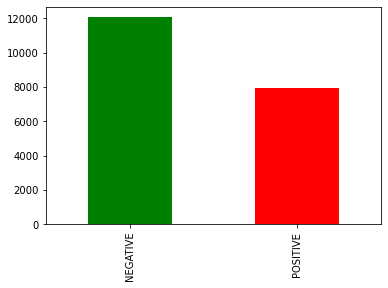

In [8]:
# Count the number of occurrences of each sentiment category
import matplotlib as plt
senti_distribution = result['Label'].value_counts()

# Display the distribution
print(senti_distribution)

senti_distribution.plot(kind='bar', color=['green', 'red'])


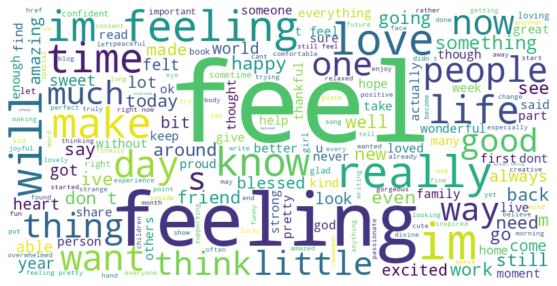

In [9]:
pos = result[result['Label'] == 'POSITIVE']['sentence'].tolist()
# print(pos)
positive_words = ' '.join([word for word in pos])
# print(positive_words)

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud for positive sentiment
pos_wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=None).generate(positive_words)


plt.figure(figsize=(10, 5))
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


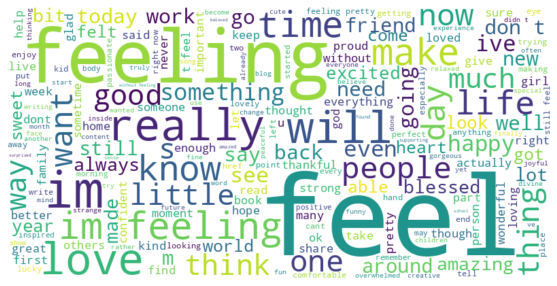

In [10]:
neg = result[result['Label'] == 'NEGATIVE']['sentence'].tolist()
neg_words = ' '.join([word for word in neg])


# Generate a word cloud for positive sentiment
pos_wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=None).generate(positive_words)


plt.figure(figsize=(10, 5))
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
all_words = []
all_counts = []
all_counts_sort = []
for sentence in neg:
    sentence = sentence.split()
    for word in sentence:
        if word not in all_words:
            all_words.append(word)
            all_counts.append(0)
        else:
            index = all_words.index(word)
            all_counts[index] += 1

# print(all_words)
# print(all_counts)

all_counts_sort = all_counts
all_counts_sort.sort(reverse=True)
# print(all_counts_sort)

top_neg_words = []
top_neg_counts = []
for i in range(0,21):
    if all_counts_sort[i] not in top_neg_counts:
        top_neg_counts.append(all_counts_sort[i])
        index = all_counts.index(all_counts_sort[i])
        if all_words[index] not in top_neg_words:
            top_neg_words.append(all_words[index])
print(top_neg_words)
print(top_neg_counts)

['im', 'grabbing', 'a', 'minute', 'to', 'post', 'i', 'feel', 'greedy', 'wrong', 'am', 'feeling', 'grouchy', 'ive', 'been', 'little', 'burdened', 'lately', 'wasnt', 'sure', 'why']
[19532, 8275, 6658, 6569, 5988, 4617, 4004, 3703, 3635, 3140, 2406, 2355, 2309, 1914, 1867, 1815, 1756, 1732, 1705, 1592, 1578]


In [12]:
all_words = []
all_counts = []
all_counts_sort = []
for sentence in pos:
    sentence = sentence.split()
    for word in sentence:
        if word not in all_words:
            all_words.append(word)
            all_counts.append(0)
        else:
            index = all_words.index(word)
            all_counts[index] += 1

# print(all_words)
# print(all_counts)

all_counts_sort = all_counts
all_counts_sort.sort(reverse=True)
# print(all_counts_sort)

top_pos_words = []
top_pos_counts = []
for i in range(0,21):
    if all_counts_sort[i] not in top_pos_counts:
        top_pos_counts.append(all_counts_sort[i])
        index = all_counts.index(all_counts_sort[i])
        if all_words[index] not in top_pos_words:
            top_pos_words.append(all_words[index])
print(top_pos_words)
print(top_pos_counts)

['i', 'didnt', 'feel', 'humiliated', 'can', 'go', 'from', 'feeling', 'so', 'hopeless', 'to', 'damned', 'hopeful', 'just', 'being', 'around', 'someone', 'who', 'cares', 'and', 'is']
[12708, 5661, 5336, 4637, 4472, 3129, 2609, 2545, 2425, 2184, 1831, 1611, 1263, 1259, 1258, 1209, 1185, 1165, 1161, 1160, 1145]


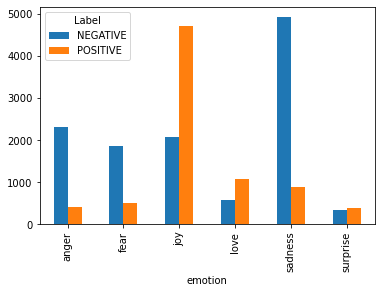

In [13]:
df_tb= result.groupby(['emotion', 'Label']).size().unstack()

plot = df_tb.plot(kind = 'bar')
fig = plot.get_figure()
fig.savefig("bert_removestop.png")